<a href="https://colab.research.google.com/github/hitallocavas/covid-19-data-analysis/blob/main/covid_19_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise Covid 19

*   Hitallo Cavalcanti
*   Leandro Moura




###Inicializando

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
from sklearn import preprocessing
from mpl_toolkits import mplot3d
from sklearn.neighbors import LocalOutlierFactor
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff

In [ ]:
country_profile_variables=pd.read_csv("https://raw.githubusercontent.com/hitallocavas/covid-19-data-analysis/main/country_profile_variables.csv",encoding = "ISO-8859-1")
kiva_country_profile_variables=pd.read_csv("https://raw.githubusercontent.com/hitallocavas/covid-19-data-analysis/main/kiva_country_profile_variables.csv",encoding = "ISO-8859-1")
country_vaccinations=pd.read_csv("https://raw.githubusercontent.com/hitallocavas/covid-19-data-analysis/main/country_vaccinations.csv",encoding = "ISO-8859-1")

In [ ]:
# plt.rcParams['figure.figsize'] = [8, 15]
plt.rcParams["figure.figsize"] = [5, 5]

##Conhecendo os dados

###Conhecendo as colunas

country_profile_variables.columns #as é igual à kiva_country_profile_variables. 

In [ ]:
country_profile_variables.columns

Index(['country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, curren

In [ ]:
country_vaccinations.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

###Imprimindo os dados

In [ ]:
country_vaccinations

country  ...                                     source_website
0      Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
1      Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
2      Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
3      Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
4      Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
...        ...  ...                                                ...
4673  Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1366477055...
4674  Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1366477055...
4675  Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1366477055...
4676  Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1366477055...
4677  Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1366477055...

[4678 rows x 15 columns]

In [ ]:
country_profile_variables

country  ... Net Official Development Assist. received (% of GNI)
0                  Afghanistan  ...                                                -99  
1                      Albania  ...                                                -99  
2                      Algeria  ...                                                -99  
3               American Samoa  ...                                                -99  
4                      Andorra  ...                                                -99  
..                         ...  ...                                                ...  
224  Wallis and Futuna Islands  ...                                                -99  
225             Western Sahara  ...                                                -99  
226                      Yemen  ...                                                -99  
227                     Zambia  ...                                                -99  
228                   Zimbabwe  ...                                                -99  

[229 rows x 50 columns]

In [ ]:
kiva_country_profile_variables

country  ... Net Official Development Assist. received (% of GNI)
0      Afghanistan  ...                                                -99  
1          Albania  ...                                                -99  
2          Armenia  ...                                                -99  
3       Azerbaijan  ...                                                -99  
4           Belize  ...                                                -99  
..             ...  ...                                                ...  
81         Vietnam  ...                                                -99  
82  Virgin Islands  ...                                                -99  
83           Yemen  ...                                                -99  
84          Zambia  ...                                                -99  
85        Zimbabwe  ...                                                -99  

[86 rows x 50 columns]

### Não há NAs em (kiva_)country_profile_variables, mas...

In [ ]:
country_profile_variables.isna().drop_duplicates()

country  ...  Net Official Development Assist. received (% of GNI)
0    False  ...                                              False   

[1 rows x 50 columns]

In [ ]:
kiva_country_profile_variables.isna().drop_duplicates()

country  ...  Net Official Development Assist. received (% of GNI)
0    False  ...                                              False   

[1 rows x 50 columns]

>Verificando se o -99 faz papel de NA através da moda.

In [ ]:
columns_dict = {}
i = 0
for name in country_profile_variables.columns:
  columns_dict[name] = i
  columns_dict[i] = name
  i+=1

columns_dict

{0: 'country',
 1: 'Region',
 10: 'Economy: Industry (% of GVA)',
 11: 'Economy: Services and other activity (% of GVA)',
 12: 'Employment: Agriculture (% of employed)',
 13: 'Employment: Industry (% of employed)',
 14: 'Employment: Services (% of employed)',
 15: 'Unemployment (% of labour force)',
 16: 'Labour force participation (female/male pop. %)',
 17: 'Agricultural production index (2004-2006=100)',
 18: 'Food production index (2004-2006=100)',
 19: 'International trade: Exports (million US$)',
 2: 'Surface area (km2)',
 20: 'International trade: Imports (million US$)',
 21: 'International trade: Balance (million US$)',
 22: 'Balance of payments, current account (million US$)',
 23: 'Population growth rate (average annual %)',
 24: 'Urban population (% of total population)',
 25: 'Urban population growth rate (average annual %)',
 26: 'Fertility rate, total (live births per woman)',
 27: 'Life expectancy at birth (females/males, years)',
 28: 'Population age distribution (0-14 

In [ ]:
country_profile_variables.columns = country_profile_variables.columns.map(columns_dict)

In [ ]:
#o drop é para remover as colunas que não possuem moda
country_profile_variables.drop(columns=[0, 3, 29]).mode()

1    2    4      5     6   ...    45           46   47   48    49
0  Caribbean  -99  4.0  100.2 -99.0  ... -99.0  100.0/100.0  -99  -99 -99.0
1        NaN  NaN  NaN    NaN   NaN  ...   NaN          NaN  NaN  NaN   NaN
2        NaN  NaN  NaN    NaN   NaN  ...   NaN          NaN  NaN  NaN   NaN

[3 rows x 47 columns]

In [ ]:
kiva_country_profile_variables.columns = kiva_country_profile_variables.columns.map(columns_dict)

In [ ]:
kiva_country_profile_variables.drop(columns=[0, 2, 4, 16, 29]).mode()

1       3     5     6   ...           46           47    48    49
0   EasternAfrica  2930.0  99.5 -99.0  ...  100.0/100.0  100.0/100.0 -99.0 -99.0
1             NaN     NaN   NaN   NaN  ...          NaN          NaN   NaN   NaN
2             NaN     NaN   NaN   NaN  ...          NaN          NaN   NaN   NaN
3             NaN     NaN   NaN   NaN  ...          NaN          NaN   NaN   NaN
4             NaN     NaN   NaN   NaN  ...          NaN          NaN   NaN   NaN
5             NaN     NaN   NaN   NaN  ...          NaN          NaN   NaN   NaN
6             NaN     NaN   NaN   NaN  ...          NaN          NaN   NaN   NaN
7             NaN     NaN   NaN   NaN  ...          NaN          NaN   NaN   NaN
8             NaN     NaN   NaN   NaN  ...          NaN          NaN   NaN   NaN
9             NaN     NaN   NaN   NaN  ...          NaN          NaN   NaN   NaN
10            NaN     NaN   NaN   NaN  ...          NaN          NaN   NaN   NaN

[11 rows x 45 columns]

In [ ]:
kiva_country_profile_variables.columns = kiva_country_profile_variables.columns.map(columns_dict)
country_profile_variables.columns = country_profile_variables.columns.map(columns_dict)

>Percebe-se que o -99 aparece com frequência em algumas colunas da tabela. Na country_profile_variables, observa-se, por exemplo, nas colunas de 6 a 14, já em kiva_country_profile_variables em 19 a 22. Há outros valores que são recorrentes e parecem não informar valor, como na coluna 34 ou 36 do kiva_country onde aparecem, respectivamente, "..." e ".../...". A verificar se faz sentindo, nestas colunas, o valor -99.

In [ ]:
columns_dict[6]

'GDP: Gross domestic product (million current US$)'

In [ ]:
columns_dict[7]

'GDP growth rate (annual %, const. 2005 prices)'

In [ ]:
columns_dict[8]

'GDP per capita (current US$)'

In [ ]:
columns_dict[19]

'International trade: Exports (million US$)'

In [ ]:
columns_dict[20]

'International trade: Imports (million US$)'

In [ ]:
columns_dict[21]

'International trade: Balance (million US$)'

####Conclusão
>Estes diferentes contextos indicam que as colunas reference-se a características econômicas e demográficas. Assim, por conhecimento do domínio, assume-se que é desprezível a chance da moda, ao acaso, ser -99, além deste valor ser irreal para o contexto do domínio. Desta forma, concluí-se que -99 e afins("..." e ".../...") estão fazendo o papel de NAs nestes conjunto de dados.

>Além disto, esta falta de uniformidade se tornaria um desafio para tirar itens repetidos quando concatenadas os conjuntos de dados de kiva_ e country_profile_variables. Isto porque os tipos de objetos das tabelas poderiam ser diferentes, pois o infer_objects do pandas se confundiria por causa dos caracteres estranhos presente em uma das tabelas e em outra não. Abaixo segue um exemplo:

In [ ]:
country_profile_variables.dtypes == kiva_country_profile_variables.dtypes 

country                                                        True
Region                                                         True
Surface area (km2)                                            False
Population in thousands (2017)                                 True
Population density (per km2, 2017)                             True
Sex ratio (m per 100 f, 2017)                                  True
GDP: Gross domestic product (million current US$)              True
GDP growth rate (annual %, const. 2005 prices)                 True
GDP per capita (current US$)                                   True
Economy: Agriculture (% of GVA)                               False
Economy: Industry (% of GVA)                                   True
Economy: Services and other activity (% of GVA)                True
Employment: Agriculture (% of employed)                       False
Employment: Industry (% of employed)                          False
Employment: Services (% of employed)            

####Dividindo colunas

In [ ]:
country_profile_variables.columns = country_profile_variables.columns.map(columns_dict)
kiva_country_profile_variables.columns = kiva_country_profile_variables.columns.map(columns_dict)
country_profile_variables
#colunas a serem quebradas: 16, 27, 28, 29, 35, 36, 37, 43, 46, 47

0               1        2   ...           47     48  49
0                  Afghanistan    SouthernAsia   652864  ...    45.1/27.0  21.43 -99
1                      Albania  SouthernEurope    28748  ...    95.5/90.2   2.96 -99
2                      Algeria  NorthernAfrica  2381741  ...    89.8/82.2   0.05 -99
3               American Samoa       Polynesia      199  ...    62.5/62.5    -99 -99
4                      Andorra  SouthernEurope      468  ...  100.0/100.0    -99 -99
..                         ...             ...      ...  ...          ...    ...  ..
224  Wallis and Futuna Islands       Polynesia      142  ...          -99    -99 -99
225             Western Sahara  NorthernAfrica   266000  ...          -99    -99 -99
226                      Yemen     WesternAsia   527968  ...    92.5/34.1   2.99 -99
227                     Zambia   EasternAfrica   752612  ...    55.6/35.7   3.96 -99
228                   Zimbabwe   EasternAfrica   390757  ...    49.3/30.8   6.00 -99

[229 rows x 50 columns]

Renomar as colunas para o mesmo nome pode implicar em algumas falhas para algoritmos que utilize o nome das colunas como critério de identificação. Portanto, será necessário diferenciá-las. Para isto, será utilizado um mapeamento no próprio dicionário para fazer o redicionamento.

In [ ]:
for i in [16, 27, 28, 29, 35, 36, 37, 43, 46, 47]:
  columns_dict[i + 60] = columns_dict[i] + ' first'
  columns_dict[i + 120] = columns_dict[i] + ' second'
  columns_dict[columns_dict[i] + ' first'] = i + 60
  columns_dict[columns_dict[i] + ' second'] = i + 120
  kiva_country_profile_variables = pd.concat([kiva_country_profile_variables.drop(columns=[i]), kiva_country_profile_variables[i].str.split("/", expand=True).rename(columns={0:i+60, 1:i+120})], axis=1)
  country_profile_variables = pd.concat([country_profile_variables.drop(columns=[i]), country_profile_variables[i].str.split("/", expand=True).rename(columns={0:i+60, 1:i+120})], axis=1)

country_profile_variables.columns = country_profile_variables.columns.map(columns_dict)
kiva_country_profile_variables.columns = kiva_country_profile_variables.columns.map(columns_dict)

kiva_country_profile_variables = kiva_country_profile_variables.sort_index(axis=1)
country_profile_variables = country_profile_variables.sort_index(axis=1)

####Convertendo dados para NA

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
def myFunc(x):
  for i in range(x.size):
    try:
      x[i] = float(x[i])
      if (x[i] == -99.0):
        x[i] = np.nan
    except:
      if (x[i] == None or x[i] == '...'):
        x[i] = np.nan
      elif (x[i][0] == '~' or x[i][0] == '-'): #para o caso -~0
        x[i] = 0.0
  return x
country_profile_variables = country_profile_variables.transform(myFunc)
kiva_country_profile_variables = kiva_country_profile_variables.transform(myFunc)
country_profile_variables

Agricultural production index (2004-2006=100)  ...                                    country
0                                            125.0  ...                                Afghanistan
1                                            134.0  ...                                    Albania
2                                            160.0  ...                                    Algeria
3                                            112.0  ...                             American Samoa
4                                              NaN  ...                                    Andorra
5                                            175.0  ...                                     Angola
6                                              NaN  ...                                   Anguilla
7                                             88.0  ...                        Antigua and Barbuda
8                                            119.0  ...                                  Argentina
9                                            135.0  ...                                    Armenia
10                                             NaN  ...                                      Aruba
11                                           111.0  ...                                  Australia
12                                           108.0  ...                                    Austria
13                                           131.0  ...                                 Azerbaijan
14                                           132.0  ...                                    Bahamas
15                                           167.0  ...                                    Bahrain
16                                           141.0  ...                                 Bangladesh
17                                            88.0  ...                                   Barbados
18                                           122.0  ...                                    Belarus
19                                           108.0  ...                                    Belgium
20                                            97.0  ...                                     Belize
21                                           152.0  ...                                      Benin
22                                           115.0  ...                                    Bermuda
23                                            98.0  ...                                     Bhutan
24                                           142.0  ...           Bolivia (Plurinational State of)
25                                             NaN  ...           Bonaire, Sint Eustatius and Saba
26                                            96.0  ...                     Bosnia and Herzegovina
27                                           110.0  ...                                   Botswana
28                                           135.0  ...                                     Brazil
29                                           103.0  ...                     British Virgin Islands
30                                           157.0  ...                          Brunei Darussalam
31                                           117.0  ...                                   Bulgaria
32                                           131.0  ...                               Burkina Faso
33                                           109.0  ...                                    Burundi
34                                            98.0  ...                                 Cabo Verde
35                                           175.0  ...                                   Cambodia
36                                           155.0  ...                                   Cameroon
37                                           109.0  ...                                     Canada
38                                           104.0  ...                             Cayman Islands
39                                           

In [ ]:
kiva_country_profile_variables

Agricultural production index (2004-2006=100)  ...                               country
0                                           125.0  ...                           Afghanistan
1                                           134.0  ...                               Albania
2                                           135.0  ...                               Armenia
3                                           131.0  ...                            Azerbaijan
4                                            97.0  ...                                Belize
5                                           152.0  ...                                 Benin
6                                            98.0  ...                                Bhutan
7                                           142.0  ...                               Bolivia
8                                           135.0  ...                                Brazil
9                                           131.0  ...                          Burkina Faso
10                                          109.0  ...                               Burundi
11                                          175.0  ...                              Cambodia
12                                          155.0  ...                              Cameroon
13                                          111.0  ...                                 Chile
14                                          132.0  ...                                 China
15                                          114.0  ...                              Colombia
16                                          106.0  ...                                 Congo
17                                          127.0  ...                            Costa Rica
18                                          122.0  ...                         Cote D'Ivoire
19                                          136.0  ...                    Dominican Republic
20                                          118.0  ...                               Ecuador
21                                          120.0  ...                                 Egypt
22                                          111.0  ...                           El Salvador
23                                           85.0  ...                               Georgia
24                                          144.0  ...                                 Ghana
25                                           88.0  ...                                  Guam
26                                          158.0  ...                             Guatemala
27                                          163.0  ...                                 Haiti
28                                          122.0  ...                              Honduras
29                                          143.0  ...                                 India
30                                          139.0  ...                             Indonesia
31                                          123.0  ...                                  Iraq
32                                          112.0  ...                                Israel
33                                          134.0  ...                                Jordan
34                                          126.0  ...                                 Kenya
35                                          108.0  ...                            Kyrgyzstan
36                                          193.0  ...      Lao People's Democratic Republic
37                                           95.0  ...                               Lebanon
38                                          101.0  ...                               Lesotho
39                                          104.0  ...                               Liberia
40                                          119.0  ...                            Madagascar
41                                          149.0  ...                                Malawi
42   

In [ ]:
pd.reset_option("max_rows")

##Concatenando (kiva_)country_profile_variables

In [ ]:
country_profile_variables.shape[0]

229

In [ ]:
kiva_country_profile_variables.shape[0]

86

In [ ]:
kiva_country_profile_variables.infer_objects().dtypes == kiva_country_profile_variables.infer_objects().dtypes 

Agricultural production index (2004-2006=100)                        True
Balance of payments, current account (million US$)                   True
CO2 emission estimates (million tons/tons per capita)                True
Economy: Agriculture (% of GVA)                                      True
Economy: Industry (% of GVA)                                         True
Economy: Services and other activity (% of GVA)                      True
Education: Government expenditure (% of GDP)                         True
Education: Primary gross enrol. ratio (f/m per 100 pop.) first       True
Education: Primary gross enrol. ratio (f/m per 100 pop.) second      True
Education: Secondary gross enrol. ratio (f/m per 100 pop.) first     True
Education: Secondary gross enrol. ratio (f/m per 100 pop.) second    True
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first      True
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second     True
Employment: Agriculture (% of employed

>Como os tipos são diferentes em algumas colunas, foi necessário normalizá-las para poder utilizar corretamente o drop_duplicates

In [ ]:
country_profiles = pd.concat([kiva_country_profile_variables, country_profile_variables])
pd.set_option('display.max_rows', None)
country_profiles.sort_values(by=['country'])


Agricultural production index (2004-2006=100)  ...                                    country
0                                            125.0  ...                                Afghanistan
0                                            125.0  ...                                Afghanistan
1                                            134.0  ...                                    Albania
1                                            134.0  ...                                    Albania
2                                            160.0  ...                                    Algeria
3                                            112.0  ...                             American Samoa
4                                              NaN  ...                                    Andorra
5                                            175.0  ...                                     Angola
6                                              NaN  ...                                   Anguilla
7                                             88.0  ...                        Antigua and Barbuda
8                                            119.0  ...                                  Argentina
2                                            135.0  ...                                    Armenia
9                                            135.0  ...                                    Armenia
10                                             NaN  ...                                      Aruba
11                                           111.0  ...                                  Australia
12                                           108.0  ...                                    Austria
3                                            131.0  ...                                 Azerbaijan
13                                           131.0  ...                                 Azerbaijan
14                                           132.0  ...                                    Bahamas
15                                           167.0  ...                                    Bahrain
16                                           141.0  ...                                 Bangladesh
17                                            88.0  ...                                   Barbados
18                                           122.0  ...                                    Belarus
19                                           108.0  ...                                    Belgium
20                                            97.0  ...                                     Belize
4                                             97.0  ...                                     Belize
21                                           152.0  ...                                      Benin
5                                            152.0  ...                                      Benin
22                                           115.0  ...                                    Bermuda
6                                             98.0  ...                                     Bhutan
23                                            98.0  ...                                     Bhutan
7                                            142.0  ...                                    Bolivia
24                                           142.0  ...           Bolivia (Plurinational State of)
25                                             NaN  ...           Bonaire, Sint Eustatius and Saba
26                                            96.0  ...                     Bosnia and Herzegovina
27                                           110.0  ...                                   Botswana
8                                            135.0  ...                                     Brazil
28                                           135.0  ...                                     Brazil
29                                           103.0  ...                     British Virgin Islands
30                                           

In [ ]:
pd.reset_option("max_rows")

###Tratando linhas repetidas

In [ ]:
country_profiles['country'].mode()

0     Afghanistan
1         Albania
2         Armenia
3      Azerbaijan
4          Belize
         ...     
71        Ukraine
72        Vanuatu
73          Yemen
74         Zambia
75       Zimbabwe
Length: 76, dtype: object

In [ ]:
country_profiles = country_profiles.drop_duplicates().sort_values(by='country').reset_index(drop=True)
country_profiles['country'].mode()

0                    Afghanistan
1                        Albania
2                        Algeria
3                 American Samoa
4                        Andorra
                 ...            
234    Wallis and Futuna Islands
235               Western Sahara
236                        Yemen
237                       Zambia
238                     Zimbabwe
Length: 239, dtype: object

In [ ]:
country_profiles

Agricultural production index (2004-2006=100)  ...                    country
0                                            125.0  ...                Afghanistan
1                                            134.0  ...                    Albania
2                                            160.0  ...                    Algeria
3                                            112.0  ...             American Samoa
4                                              NaN  ...                    Andorra
..                                             ...  ...                        ...
234                                          115.0  ...  Wallis and Futuna Islands
235                                          100.0  ...             Western Sahara
236                                          136.0  ...                      Yemen
237                                          179.0  ...                     Zambia
238                                           99.0  ...                   Zimbabwe

[239 rows x 60 columns]

###Inferindo tipos
>Alguns algoritmos utilizam a informação do tipo para selecionar a tabela. Alguns itens foram representados como objetos na tabela anterior por possuírem símbolos como '/' ou '~'. Agora que as colunas foram devidamente dividias, cada coluna representa um número, a excelção das que são nome. Assim, o que antes era objeto agora pode ser inferido como número pelo pandas. Isto é importante para que os algoritmos que utilizem apenas números também utilizem estas tabelas.

>OBS: a etapa de divisão da coluna teria sido melhor se fosse feita após concatenação. Porém, pelo fluxo de trabalho, acabou ficando desse jeito.

In [ ]:
country_profiles.dtypes

Agricultural production index (2004-2006=100)                        float64
Balance of payments, current account (million US$)                    object
CO2 emission estimates (million tons/tons per capita)                float64
Economy: Agriculture (% of GVA)                                       object
Economy: Industry (% of GVA)                                         float64
Economy: Services and other activity (% of GVA)                      float64
Education: Government expenditure (% of GDP)                          object
Education: Primary gross enrol. ratio (f/m per 100 pop.) first        object
Education: Primary gross enrol. ratio (f/m per 100 pop.) second       object
Education: Secondary gross enrol. ratio (f/m per 100 pop.) first      object
Education: Secondary gross enrol. ratio (f/m per 100 pop.) second     object
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first       object
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second      object

In [ ]:
country_profiles = country_profiles.infer_objects()
country_profiles.dtypes

Agricultural production index (2004-2006=100)                        float64
Balance of payments, current account (million US$)                   float64
CO2 emission estimates (million tons/tons per capita)                float64
Economy: Agriculture (% of GVA)                                      float64
Economy: Industry (% of GVA)                                         float64
Economy: Services and other activity (% of GVA)                      float64
Education: Government expenditure (% of GDP)                         float64
Education: Primary gross enrol. ratio (f/m per 100 pop.) first       float64
Education: Primary gross enrol. ratio (f/m per 100 pop.) second      float64
Education: Secondary gross enrol. ratio (f/m per 100 pop.) first     float64
Education: Secondary gross enrol. ratio (f/m per 100 pop.) second    float64
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first      float64
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second     float64

##Lidando com NAs

In [ ]:
country_vaccinations[country_vaccinations["iso_code"] == "BRA"].head(25)

country  ...                      source_website
552  Brazil  ...  https://coronavirusbra1.github.io/
553  Brazil  ...  https://coronavirusbra1.github.io/
554  Brazil  ...  https://coronavirusbra1.github.io/
555  Brazil  ...  https://coronavirusbra1.github.io/
556  Brazil  ...  https://coronavirusbra1.github.io/
557  Brazil  ...  https://coronavirusbra1.github.io/
558  Brazil  ...  https://coronavirusbra1.github.io/
559  Brazil  ...  https://coronavirusbra1.github.io/
560  Brazil  ...  https://coronavirusbra1.github.io/
561  Brazil  ...  https://coronavirusbra1.github.io/
562  Brazil  ...  https://coronavirusbra1.github.io/
563  Brazil  ...  https://coronavirusbra1.github.io/
564  Brazil  ...  https://coronavirusbra1.github.io/
565  Brazil  ...  https://coronavirusbra1.github.io/
566  Brazil  ...  https://coronavirusbra1.github.io/
567  Brazil  ...  https://coronavirusbra1.github.io/
568  Brazil  ...  https://coronavirusbra1.github.io/
569  Brazil  ...  https://coronavirusbra1.github.io/
570  Brazil  ...  https://coronavirusbra1.github.io/
571  Brazil  ...  https://coronavirusbra1.github.io/
572  Brazil  ...  https://coronavirusbra1.github.io/
573  Brazil  ...  https://coronavirusbra1.github.io/
574  Brazil  ...  https://coronavirusbra1.github.io/
575  Brazil  ...  https://coronavirusbra1.github.io/
576  Brazil  ...  https://coronavirusbra1.github.io/

[25 rows x 15 columns]

In [ ]:
country_vaccinations[country_vaccinations["iso_code"] == "USA"].head(25)

country  ...                                     source_website
4508  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4509  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4510  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4511  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4512  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4513  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4514  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4515  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4516  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4517  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4518  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4519  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4520  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4521  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4522  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4523  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4524  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4525  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4526  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4527  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4528  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4529  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4530  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4531  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4532  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...

[25 rows x 15 columns]

In [ ]:
pd.set_option('display.max_rows', None)
country_vaccinations.groupby("iso_code").last()["country"]
#Lembrar-se de resetar display.max_rows

iso_code
AIA                         Anguilla
ALB                          Albania
AND                          Andorra
ARE             United Arab Emirates
ARG                        Argentina
AUS                        Australia
AUT                          Austria
AZE                       Azerbaijan
BEL                          Belgium
BGD                       Bangladesh
BGR                         Bulgaria
BHR                          Bahrain
BLR                          Belarus
BMU                          Bermuda
BOL                          Bolivia
BRA                           Brazil
BRB                         Barbados
CAN                           Canada
CHE                      Switzerland
CHL                            Chile
CHN                            China
COL                         Colombia
CRI                       Costa Rica
CYM                   Cayman Islands
CYP                           Cyprus
CZE                          Czechia
DEU                          

In [ ]:
pd.reset_option("max_rows")

In [ ]:
country_vaccinations[country_vaccinations["iso_code"] == "ALB"].head(25)

country  ...                                     source_website
0   Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
1   Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
2   Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
3   Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
4   Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
5   Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
6   Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
7   Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
8   Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
9   Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
10  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
11  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
12  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
13  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
14  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
15  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
16  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
17  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
18  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
19  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
20  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
21  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
22  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
23  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...
24  Albania  ...  https://shendetesia.gov.al/covid19-ministria-e...

[25 rows x 15 columns]

In [ ]:
country_vaccinations[country_vaccinations["iso_code"] == "CHN"].head(25)

country  ...                                     source_website
860   China  ...  https://www.reuters.com/article/health-coronav...
861   China  ...  https://www.reuters.com/article/health-coronav...
862   China  ...  https://www.reuters.com/article/health-coronav...
863   China  ...  https://www.reuters.com/article/health-coronav...
864   China  ...  https://www.reuters.com/article/health-coronav...
865   China  ...  https://www.reuters.com/article/health-coronav...
866   China  ...  https://www.reuters.com/article/health-coronav...
867   China  ...  https://www.reuters.com/article/health-coronav...
868   China  ...  https://www.reuters.com/article/health-coronav...
869   China  ...  https://www.reuters.com/article/health-coronav...
870   China  ...  https://www.reuters.com/article/health-coronav...
871   China  ...  https://www.reuters.com/article/health-coronav...
872   China  ...  https://www.reuters.com/article/health-coronav...
873   China  ...  https://www.reuters.com/article/health-coronav...
874   China  ...  https://www.reuters.com/article/health-coronav...
875   China  ...  https://www.reuters.com/article/health-coronav...
876   China  ...  https://www.reuters.com/article/health-coronav...
877   China  ...  https://www.reuters.com/article/health-coronav...
878   China  ...  https://www.reuters.com/article/health-coronav...
879   China  ...  https://www.reuters.com/article/health-coronav...
880   China  ...  https://www.reuters.com/article/health-coronav...
881   China  ...  https://www.reuters.com/article/health-coronav...
882   China  ...  https://www.reuters.com/article/health-coronav...
883   China  ...  https://www.reuters.com/article/health-coronav...
884   China  ...  https://www.reuters.com/article/health-coronav...

[25 rows x 15 columns]

In [ ]:
country_vaccinations[country_vaccinations["iso_code"] == "IND"].head(25)

country  ...                                     source_website
1974   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1975   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1976   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1977   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1978   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1979   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1980   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1981   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1982   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1983   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1984   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1985   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1986   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1987   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1988   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1989   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1990   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1991   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1992   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1993   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1994   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1995   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1996   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1997   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1998   India  ...  https://www.mohfw.gov.in/pdf/CumulativeCovidVa...

[25 rows x 15 columns]

In [ ]:
country_vaccinations[country_vaccinations["iso_code"] == "RUS"].head(25)

country  ...                           source_website
3603  Russia  ...  https://gogov.ru/articles/covid-v-stats
3604  Russia  ...  https://gogov.ru/articles/covid-v-stats
3605  Russia  ...  https://gogov.ru/articles/covid-v-stats
3606  Russia  ...  https://gogov.ru/articles/covid-v-stats
3607  Russia  ...  https://gogov.ru/articles/covid-v-stats
3608  Russia  ...  https://gogov.ru/articles/covid-v-stats
3609  Russia  ...  https://gogov.ru/articles/covid-v-stats
3610  Russia  ...  https://gogov.ru/articles/covid-v-stats
3611  Russia  ...  https://gogov.ru/articles/covid-v-stats
3612  Russia  ...  https://gogov.ru/articles/covid-v-stats
3613  Russia  ...  https://gogov.ru/articles/covid-v-stats
3614  Russia  ...  https://gogov.ru/articles/covid-v-stats
3615  Russia  ...  https://gogov.ru/articles/covid-v-stats
3616  Russia  ...  https://gogov.ru/articles/covid-v-stats
3617  Russia  ...  https://gogov.ru/articles/covid-v-stats
3618  Russia  ...  https://gogov.ru/articles/covid-v-stats
3619  Russia  ...  https://gogov.ru/articles/covid-v-stats
3620  Russia  ...  https://gogov.ru/articles/covid-v-stats
3621  Russia  ...  https://gogov.ru/articles/covid-v-stats
3622  Russia  ...  https://gogov.ru/articles/covid-v-stats
3623  Russia  ...  https://gogov.ru/articles/covid-v-stats
3624  Russia  ...  https://gogov.ru/articles/covid-v-stats
3625  Russia  ...  https://gogov.ru/articles/covid-v-stats
3626  Russia  ...  https://gogov.ru/articles/covid-v-stats
3627  Russia  ...  https://gogov.ru/articles/covid-v-stats

[25 rows x 15 columns]

In [ ]:
country_vaccinations[country_vaccinations["iso_code"] == "AUT"].head(25)

country  ...                                     source_website
189  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
190  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
191  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
192  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
193  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
194  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
195  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
196  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
197  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
198  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
199  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
200  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
201  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
202  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
203  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
204  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
205  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
206  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
207  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
208  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
209  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
210  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
211  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
212  Austria  ...  https://info.gesundheitsministerium.gv.at/open...
213  Austria  ...  https://info.gesundheitsministerium.gv.at/open...

[25 rows x 15 columns]

###Lidando com NAs de total_vaccinations
>total de vacinas é cumulativo. Desta forma, é possível trocar os NAs que estiverem entre duas linhas preenchidas na coluna total_vaccinations pela interpolação das mesmas. A interpolação será linear porque assume-se que a capacidade de vacinação diaria dos países não crescem de maneira significativa de um dia para o outro, a menos que ocorra algum evento, como a chegada de uma nova remersa de vacinas.

>É preciso, no entanto, cuidar para os casos em que o primeiro dia é NA, pois isto resultará numa interpolação errônea. Para tanto, substituirei todos os NAs dos primeiros dias por 0.

In [ ]:
country_vaccinations.groupby('iso_code').head(1)[country_vaccinations.groupby('iso_code').head(1)["total_vaccinations"].isna()]

country  ...                                     source_website
189   Austria  ...  https://info.gesundheitsministerium.gv.at/open...
677    Canada  ...  https://health-infobase.canada.ca/covid-19/vac...
2475   Latvia  ...  https://data.gov.lv/dati/eng/dataset/covid19-v...

[3 rows x 15 columns]

>Como pode ser observado, há três casos em que a interpolação iria apresentar um resultado diferente do esperado. Isto porque espera-se que o primeiro dia seja zero, e nestes casos, o primeiro dia seria a interpolação do primerio número válido anterior à linha e do próximo número válido. Assim, ao setar estes números para zero, espera-se resolver este problema.

In [ ]:
for row in country_vaccinations.groupby('iso_code').head(1)[country_vaccinations.groupby('iso_code').head(1)["total_vaccinations"].isna()].loc[:,"total_vaccinations"].index:
  country_vaccinations.loc[row, "total_vaccinations"] = 0

country_vaccinations.groupby('iso_code').head(1)[country_vaccinations.groupby('iso_code').head(1)["total_vaccinations"].isna()]

Empty DataFrame
Columns: [country, iso_code, date, total_vaccinations, people_vaccinated, people_fully_vaccinated, daily_vaccinations_raw, daily_vaccinations, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, daily_vaccinations_per_million, vaccines, source_name, source_website]
Index: []

In [ ]:
country_vaccinations["total_vaccinations"] = country_vaccinations["total_vaccinations"].interpolate().astype(int).astype(float)

In [ ]:
country_vaccinations[country_vaccinations["iso_code"] == "USA"].head(25)

country  ...                                     source_website
4508  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4509  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4510  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4511  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4512  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4513  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4514  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4515  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4516  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4517  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4518  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4519  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4520  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4521  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4522  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4523  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4524  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4525  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4526  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4527  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4528  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4529  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4530  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4531  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
4532  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...

[25 rows x 15 columns]

In [ ]:
country_vaccinations[country_vaccinations["iso_code"] == "BRA"].head(25)

country  ...                      source_website
552  Brazil  ...  https://coronavirusbra1.github.io/
553  Brazil  ...  https://coronavirusbra1.github.io/
554  Brazil  ...  https://coronavirusbra1.github.io/
555  Brazil  ...  https://coronavirusbra1.github.io/
556  Brazil  ...  https://coronavirusbra1.github.io/
557  Brazil  ...  https://coronavirusbra1.github.io/
558  Brazil  ...  https://coronavirusbra1.github.io/
559  Brazil  ...  https://coronavirusbra1.github.io/
560  Brazil  ...  https://coronavirusbra1.github.io/
561  Brazil  ...  https://coronavirusbra1.github.io/
562  Brazil  ...  https://coronavirusbra1.github.io/
563  Brazil  ...  https://coronavirusbra1.github.io/
564  Brazil  ...  https://coronavirusbra1.github.io/
565  Brazil  ...  https://coronavirusbra1.github.io/
566  Brazil  ...  https://coronavirusbra1.github.io/
567  Brazil  ...  https://coronavirusbra1.github.io/
568  Brazil  ...  https://coronavirusbra1.github.io/
569  Brazil  ...  https://coronavirusbra1.github.io/
570  Brazil  ...  https://coronavirusbra1.github.io/
571  Brazil  ...  https://coronavirusbra1.github.io/
572  Brazil  ...  https://coronavirusbra1.github.io/
573  Brazil  ...  https://coronavirusbra1.github.io/
574  Brazil  ...  https://coronavirusbra1.github.io/
575  Brazil  ...  https://coronavirusbra1.github.io/
576  Brazil  ...  https://coronavirusbra1.github.io/

[25 rows x 15 columns]

In [ ]:
country_vaccinations[country_vaccinations["iso_code"] == "CHN"]

country  ...                                     source_website
860   China  ...  https://www.reuters.com/article/health-coronav...
861   China  ...  https://www.reuters.com/article/health-coronav...
862   China  ...  https://www.reuters.com/article/health-coronav...
863   China  ...  https://www.reuters.com/article/health-coronav...
864   China  ...  https://www.reuters.com/article/health-coronav...
865   China  ...  https://www.reuters.com/article/health-coronav...
866   China  ...  https://www.reuters.com/article/health-coronav...
867   China  ...  https://www.reuters.com/article/health-coronav...
868   China  ...  https://www.reuters.com/article/health-coronav...
869   China  ...  https://www.reuters.com/article/health-coronav...
870   China  ...  https://www.reuters.com/article/health-coronav...
871   China  ...  https://www.reuters.com/article/health-coronav...
872   China  ...  https://www.reuters.com/article/health-coronav...
873   China  ...  https://www.reuters.com/article/health-coronav...
874   China  ...  https://www.reuters.com/article/health-coronav...
875   China  ...  https://www.reuters.com/article/health-coronav...
876   China  ...  https://www.reuters.com/article/health-coronav...
877   China  ...  https://www.reuters.com/article/health-coronav...
878   China  ...  https://www.reuters.com/article/health-coronav...
879   China  ...  https://www.reuters.com/article/health-coronav...
880   China  ...  https://www.reuters.com/article/health-coronav...
881   China  ...  https://www.reuters.com/article/health-coronav...
882   China  ...  https://www.reuters.com/article/health-coronav...
883   China  ...  https://www.reuters.com/article/health-coronav...
884   China  ...  https://www.reuters.com/article/health-coronav...
885   China  ...  https://www.reuters.com/article/health-coronav...
886   China  ...  https://www.reuters.com/article/health-coronav...
887   China  ...  https://www.reuters.com/article/health-coronav...
888   China  ...  https://www.reuters.com/article/health-coronav...
889   China  ...  https://www.reuters.com/article/health-coronav...
890   China  ...  https://www.reuters.com/article/health-coronav...
891   China  ...  https://www.reuters.com/article/health-coronav...
892   China  ...  https://www.reuters.com/article/health-coronav...
893   China  ...  https://www.reuters.com/article/health-coronav...
894   China  ...  https://www.reuters.com/article/health-coronav...
895   China  ...  https://www.reuters.com/article/health-coronav...
896   China  ...  https://www.reuters.com/article/health-coronav...
897   China  ...  https://www.reuters.com/article/health-coronav...
898   China  ...  https://www.reuters.com/article/health-coronav...
899   China  ...  https://www.reuters.com/article/health-coronav...
900   China  ...  https://www.reuters.com/article/health-coronav...
901   China  ...  https://www.reuters.com/article/health-coronav...
902   China  ...  https://www.reuters.com/article/health-coronav...
903   China  ...  https://www.reuters.com/article/health-coronav...
904   China  ...  https://www.reuters.com/article/health-coronav...
905   China  ...  https://www.reuters.com/article/health-coronav...
906   China  ...  https://www.reuters.com/article/health-coronav...
907   China  ...  https://www.reuters.com/article/health-coronav...
908   China  ...  https://www.reuters.com/article/health-coronav...
909   China  ...  https://www.reuters.com/article/health-coronav...
910   China  ...  https://www.reuters.com/article/health-coronav...
911   China  ...  https://www.reuters.com/article/health-coronav...
912   China  ...  https://www.reuters.com/article/health-coronav...
913   China  ...  https://www.reuters.com/article/health-coronav...
914   China  ...  https://www.reuters.com/article/health-coronav...
915   China  ...  https://www.reuters.com/article/health-coronav...
916   China  ...  https://www.reuters.com/article/health-coronav...

[57 rows x 15 columns]

###Acerca dos NAs de people_fully_vaccinated
>Em "conhecendo os dados", observou-se, em alguns casos, que total_vaccinations = people_vaccninated + people_fully_vaccinated. Porém, esta regra só é válida para vacinações com duas doses. Isto porque, na primeira dose, conta-se um para a quantidade de vacinas aplicadas (total_vaccinations) e a pessoa entra para a lista de pessoas vacinadas (people_vacinated). Na segunda dose, conta-se mais uma vacina na quantidade de vacinas aplicadas, a pessoa sendo contada na lista de pessoas vacinadas, mas também entra na lista de pessoas completamente vacinadas (people_fully_vaccinated). Portanto, uma estratégia usando esta observação poderia ser válida agora, ela não seria para todo caso, uma vez que, por exemplo, doses únicas (já há vacinas com esta característica) faria uma única dose ser contada duas vezes.


##Extraindo Informações de Dados

###Países com maior e menor porcentagem de vacinação por centena de habitante

>Em country_vaccination já há esta informação. Porém, países se repetem por dia e também estão ordenados alfabeticamente em relação à seus nomes. Para ter este obter esta informação será necessário filtro de última linha agrupada por países na tabela e ordenação da coluna.

In [ ]:
country_vaccinations.groupby("country").last().sort_values(by=['total_vaccinations_per_hundred'], ascending=False).head(25)['total_vaccinations_per_hundred']

country
Gibraltar                   109.25
Israel                       94.88
Seychelles                   80.78
United Arab Emirates         60.95
Falkland Islands             49.73
Wales                        32.65
Cayman Islands               32.12
England                      31.65
United Kingdom               31.07
Scotland                     30.94
Guernsey                     29.90
Northern Ireland             29.50
Jersey                       29.00
Bermuda                      27.42
Isle of Man                  25.87
United States                22.99
Maldives                     21.67
Serbia                       21.11
Anguilla                     18.41
Chile                        18.26
Malta                        18.03
Bahrain                      17.70
Turks and Caicos Islands     16.62
Faeroe Islands               13.74
Barbados                     12.79
Name: total_vaccinations_per_hundred, dtype: float64

In [ ]:
country_vaccinations.groupby("country").last().sort_values(by=['total_vaccinations_per_hundred'], ascending=False).tail(25)['total_vaccinations_per_hundred']

country
Belarus                0.22
Montenegro             0.21
Myanmar                0.19
Algeria                0.17
Senegal                0.16
Zimbabwe               0.14
Australia              0.13
Kazakhstan             0.12
South Africa           0.12
San Marino             0.10
Bolivia                0.09
El Salvador            0.09
Malaysia               0.08
Cambodia               0.08
South Korea            0.04
Trinidad and Tobago    0.03
Pakistan               0.03
Japan                  0.03
New Zealand            0.03
Ukraine                0.01
Guatemala              0.01
Iran                   0.01
Paraguay               0.01
Egypt                  0.00
Venezuela              0.00
Name: total_vaccinations_per_hundred, dtype: float64

####Analisando Gibraltar

In [ ]:
#Não encontrado Gibraltar em kiva_country_profile_variables
country_profile_variables[country_profile_variables["country"] == "Gibraltar"]

Agricultural production index (2004-2006=100)  ...    country
80                                            NaN  ...  Gibraltar

[1 rows x 60 columns]

In [ ]:
country_vaccinations[country_vaccinations["country"] == "Gibraltar"].tail(1)

country  ...                                     source_website
1728  Gibraltar  ...  https://twitter.com/GibraltarGov/status/136636...

[1 rows x 15 columns]

>O estranho índice de 109% de vacinação em Gibraltar é explicado porque conta-se cada aplicação da vacina mesmo que existam vacina cuja eficiência máxima é alcançada através de duas aplicações. Assim, o número de aplicações ultrapassa o número de pessoas, embora isto não signifique que todas as pessoas estão com a proteção máxima conferida pela vacina. Este índice encontra-se em "people_fully_vaccinated_per_hundred", e é de  39.45% da população. Este resultado está de acordo com o observado nos dados do country_profile-variables, onde estima-se que em 2017 haviam 35 milhões de pessoas em Gibraltar.

###Países com maior e menor porcentagem de vacinação completa por centena de habitante
>Semelhante à seção anterior, esta informação já está contida no conjunto de dados. Basta ordená-la e filtrá-la para visualização.

In [ ]:
country_vaccinations.groupby("country").last().sort_values(by=['people_fully_vaccinated_per_hundred'], ascending=False).head(25)['people_fully_vaccinated_per_hundred']

country
Israel                  39.74
Gibraltar               39.45
Seychelles              23.95
United Arab Emirates    22.12
Cayman Islands          11.80
Isle of Man              9.03
Guernsey                 7.96
Bermuda                  7.66
United States            7.61
Serbia                   7.52
Malta                    6.35
Faeroe Islands           5.16
Iceland                  3.69
Wales                    3.29
Jersey                   3.25
Romania                  3.19
Denmark                  3.18
Poland                   3.15
Greece                   3.14
Norway                   2.99
Ireland                  2.84
Spain                    2.70
Lithuania                2.69
Belgium                  2.66
Hungary                  2.62
Name: people_fully_vaccinated_per_hundred, dtype: float64

In [ ]:
country_vaccinations.groupby("country").last().sort_values(by=['people_fully_vaccinated_per_hundred'], na_position='first', ascending=False).tail(25)['people_fully_vaccinated_per_hundred']

country
Luxembourg        1.71
Croatia           1.46
Finland           1.46
Scotland          1.44
United Kingdom    1.20
Canada            1.15
England           1.07
Latvia            0.91
Costa Rica        0.91
Brazil            0.90
Kuwait            0.89
Russia            0.75
Argentina         0.65
Bulgaria          0.56
Morocco           0.44
Mexico            0.44
Indonesia         0.37
Oman              0.37
Chile             0.30
Jordan            0.29
India             0.18
South Africa      0.12
Ecuador           0.04
Albania           0.02
Kazakhstan        0.01
Name: people_fully_vaccinated_per_hundred, dtype: float64

In [ ]:
country_vaccinations.groupby("country")["people_fully_vaccinated_per_hundred"].last().isna().count()

118

In [ ]:
country_vaccinations.groupby("country").last().dropna().sort_values(by=['people_fully_vaccinated_per_hundred'], ascending=False).tail(25)['people_fully_vaccinated_per_hundred']

country
Sweden            2.44
Austria           2.35
France            2.34
Italy             2.33
Czechia           2.27
Turkey            2.13
Singapore         1.88
Luxembourg        1.71
Finland           1.46
Croatia           1.46
United Kingdom    1.20
Canada            1.15
Latvia            0.91
Brazil            0.90
Argentina         0.65
Bulgaria          0.56
Morocco           0.44
Mexico            0.44
Oman              0.37
Indonesia         0.37
Chile             0.30
India             0.18
South Africa      0.12
Ecuador           0.04
Albania           0.02
Name: people_fully_vaccinated_per_hundred, dtype: float64

>Nesta seção observa-se os países que mais vacinaram completamente sua população em porcentual. Isreal é o primeiro, em seguida Gibraltar. Também se vê os países que menos vacinaram completamente até agora, mas que já vacinaram completamente. A contagem dos países que não vacinaram compeltamente ninguém até agora é de 118. Este valor foi obtido através da contagem dos NAs na coluna "people_fully_vaccinated_per_hundred".

>A verificação abaixo é uma pequena tentativa de achar alguma incongruência neste conjunto de dados apoiando-se no fato de que há uma redundância nas colunas people_fully_vaccinated e people_fully_vaccinated_per_hundred. Foi verificado que sempre que uma não é NA, a outra também não é.

In [ ]:
country_vaccinations[(country_vaccinations["people_fully_vaccinated"].isnull() & country_vaccinations["people_fully_vaccinated_per_hundred"].notnull()) | 
                     (country_vaccinations["people_fully_vaccinated"].notnull() & country_vaccinations["people_fully_vaccinated_per_hundred"].isnull())]

Empty DataFrame
Columns: [country, iso_code, date, total_vaccinations, people_vaccinated, people_fully_vaccinated, daily_vaccinations_raw, daily_vaccinations, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, daily_vaccinations_per_million, vaccines, source_name, source_website]
Index: []

###25 Países com maior e menor média de vacinados por dia

In [ ]:
mean_vaccinations_by_country = country_vaccinations[country_vaccinations['total_vaccinations'].notna()].groupby('country').mean()

In [ ]:
mean_vaccinations_by_country.sort_values(by='total_vaccinations', ascending=False).head(25)['total_vaccinations'].apply(lambda x: '{:.2f}'.format(x))

country
United States           27963811.82
China                   13665587.58
United Kingdom           7719022.88
England                  6583798.96
India                    6097110.33
Israel                   3898525.74
Brazil                   3750814.31
United Arab Emirates     3517731.71
Turkey                   3415373.15
Germany                  2563997.17
Russia                   2245735.47
Italy                    1911633.05
Spain                    1768712.11
France                   1611191.03
Morocco                  1395424.87
Poland                   1287551.02
Bangladesh               1030039.50
Canada                    982946.34
Indonesia                 978233.60
Chile                     873380.46
Mexico                    695294.46
Romania                   626284.39
Serbia                    575044.56
Scotland                  571028.99
Switzerland               448684.72
Name: total_vaccinations, dtype: object

In [ ]:
mean_vaccinations_by_country.sort_values(by='total_vaccinations').head(25)['total_vaccinations'].apply(lambda x: '{:.2f}'.format(x))

country
San Marino                    35.00
Venezuela                     78.17
Saint Helena                 107.00
Trinidad and Tobago          219.62
Paraguay                     500.00
Egypt                        657.14
Montenegro                   660.71
New Zealand                  730.00
Anguilla                     860.64
Guyana                       923.25
Guatemala                   1112.00
Falkland Islands            1142.94
Macao                       1179.18
Monaco                      1199.55
Liechtenstein               1320.23
Andorra                     1451.48
Mauritius                   1459.88
Albania                     1700.45
Greenland                   2584.00
Ukraine                     2769.50
El Salvador                 3000.00
Turks and Caicos Islands    3216.03
Bolivia                     4269.93
Cambodia                    4547.82
Northern Cyprus             4652.11
Name: total_vaccinations, dtype: object

##Estatísticas Decritivas

In [ ]:
mean_vaccinations_by_country.sort_values(by='total_vaccinations')['total_vaccinations'].apply(lambda x: '{:.2f}'.format(x))

country
San Marino                   35.00
Venezuela                    78.17
Saint Helena                107.00
Trinidad and Tobago         219.62
Paraguay                    500.00
                          ...     
India                   6097110.33
England                 6583798.96
United Kingdom          7719022.88
China                  13665587.58
United States          27963811.82
Name: total_vaccinations, Length: 118, dtype: object

In [ ]:
std_by_country = country_vaccinations[country_vaccinations['daily_vaccinations'].notna()].groupby('country').std()
std_by_country

total_vaccinations  ...  daily_vaccinations_per_million
country                            ...                                
Albania              2.564648e+03  ...                       99.001654
Algeria              2.325883e+04  ...                       20.492275
Andorra              5.476894e+02  ...                      242.231079
Anguilla             7.448729e+02  ...                     3836.475257
Argentina            2.719991e+05  ...                      177.232399
...                           ...  ...                             ...
United States        2.364978e+07  ...                     1619.134845
Uruguay                       NaN  ...                             NaN
Venezuela            4.980663e+01  ...                        0.000000
Wales                3.442500e+05  ...                     2964.412258
Zimbabwe             7.785920e+03  ...                       64.299442

[115 rows x 9 columns]

###Agregando dados de Country Profiles e Contry Vaccinations e extraindo correlações

In [ ]:
#correlação do histórico de dias
country_profiles_vaccination = pd.merge(country_profiles, country_vaccinations, on='country')
px.imshow(country_profiles_vaccination.corr(), color_continuous_scale='brbg', width=750, height=750)

In [ ]:
#correlação do último dia
px.imshow(country_profiles_vaccination.groupby(by='country').last().corr(), color_continuous_scale='brbg', width=750, height=750)

####Para checar colunas:

In [ ]:
columns_dict_corr = {}
i = 0
for name in country_profiles_vaccination.corr().columns:
  columns_dict_corr[i] = name
  i+=1

columns_dict_corr

{0: 'Agricultural production index (2004-2006=100)',
 1: 'Balance of payments, current account (million US$)',
 2: 'CO2 emission estimates (million tons/tons per capita)',
 3: 'Economy: Agriculture (% of GVA)',
 4: 'Economy: Industry (% of GVA)',
 5: 'Economy: Services and other activity (% of GVA)',
 6: 'Education: Government expenditure (% of GDP)',
 7: 'Education: Primary gross enrol. ratio (f/m per 100 pop.) first',
 8: 'Education: Primary gross enrol. ratio (f/m per 100 pop.) second',
 9: 'Education: Secondary gross enrol. ratio (f/m per 100 pop.) first',
 10: 'Education: Secondary gross enrol. ratio (f/m per 100 pop.) second',
 11: 'Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first',
 12: 'Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second',
 13: 'Employment: Agriculture (% of employed)',
 14: 'Employment: Industry (% of employed)',
 15: 'Employment: Services (% of employed)',
 16: 'Energy production, primary (Petajoules)',
 17: 'Energy supply per capi

####Conclusões
>A região de interesse da matriz de correlação é a que está entre as colunas 58 e 66 e entre as linhas 0 e 57. Isto porque esta é a região em que existe a interseção da tabela de dados geoeconômicos e da tabela de vacinas.

>É interessante notar que, em valores absolutos (colunas 58 a 62), a correlação é bem mais evidente que em valores porcentuais por indivíduo (colunas 63 a 66). Isto pode indicar que tais valores absolutos são despresíveis quando normalizados pela população dos países.

>Há uma altíssima correlação entre países com alta emissão de caborno (linha 2) e países com alto PIB (linha 25) com relação à quantidade de vacinas aplicadas na população em valores absolutos. Porém, no PIB per capita (linha 24) esta correlação não demonstra sua força, corroborando a conclusão anterior. Comportamento semelhante é observado no comércio internacional (linhas 32, 33 e 34).

>No último dia nota-se que economias baseadas em serviços (linha 5) está com uma correlação ligeriamente positiva nas vacinas por habiante em geral. Já economias indústrias (linha 4) e agrárias (linha 3) estão com correlações ligeiramente negativas. Algo semelhante se observa na relação de empregos na área de serviços (linha 15) com relação à empregos na área de indústria (linha 14) e agricultura (linha 13).

>A área (linha 53) e o tamanho da população (linha 49) apresentam uma correlação alta correlação positiva de vacinação. Porém, apresentam uma correlação ligeramente baixa de vacinação percentual. Isto pode indicar que países grandes tem maior dificuldade de vacinar suas populações quando comparado aos menores.

##Relação da vacinação por habitante por mulheres no parlamento
>Visualizando coluna "Seats held by woman in national parliaments %"


In [ ]:
column_name = 'Seats held by women in national parliaments %'
country_profiles[column_name]

0      27.7
1      22.9
2      31.6
3       NaN
4      32.1
       ... 
234     NaN
235     NaN
236     0.0
237    18.0
238    32.6
Name: Seats held by women in national parliaments %, Length: 239, dtype: float64

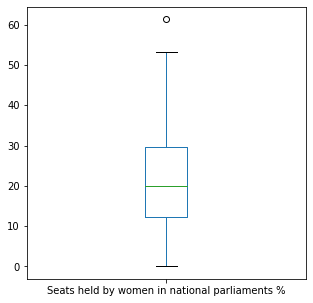

In [ ]:
country_profiles[column_name].plot.box(figsize=(5, 5))

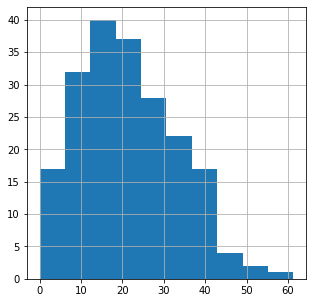

In [ ]:
country_profiles[column_name].hist(figsize=(5, 5))

###Retirando outliers e separando grupos
>A ideia é separar em dois grupos: um com países com baixa participação feminina no parlamento, outro com alta participação. Depois, verificar se a distribuição de vacinas aplicadas nestes países são equivalentes.

In [ ]:
def show_outliers(df, out_cols = None, T=1.5, verbose=True):
  # Copy of df
  new_df = df.copy()
  init_shape = new_df.shape
  # For each column
  if (out_cols is not None):
    for c in out_cols:
        q1 = new_df[c].quantile(.25)
        q3 = new_df[c].quantile(.75)
        col_iqr = q3 - q1
        col_max = q3 + T * col_iqr
        col_min = q1 - T * col_iqr
        # Filter data without outliers and ignoring nan
        filtered_df = new_df[(new_df[c] > col_max) | (new_df[c] < col_min)]
        if verbose:
            n_out = new_df.shape[0] - filtered_df.shape[0] 
            print(f" Columns {c} had {n_out} outliers removed")
        new_df = filtered_df
            
    if verbose:
        # Print shrink percentage
        lines_red = df.shape[0] - new_df.shape[0]
        print(f"Data reduced by {lines_red} lines, or {lines_red/df.shape[0]*100:.2f} %")
  else:
    q1 = new_df.quantile(.25)
    q3 = new_df.quantile(.75)
    col_iqr = q3 - q1
    col_max = q3 + T * col_iqr
    col_min = q1 - T * col_iqr
    # Filter data without outliers and ignoring nan
    filtered_df = new_df[(new_df > col_max) | (new_df < col_min)]
    if verbose:
        n_out = new_df.shape[0] - filtered_df.shape[0] 
        print(f" Serie had {n_out} outliers removed")
    new_df = filtered_df
            
    if verbose:
        # Print shrink percentage
        lines_red = df.shape[0] - new_df.shape[0]
        print(f"Data reduced by {lines_red} lines, or {lines_red/df.shape[0]*100:.2f} %")
  return new_df
#adapted from https://datascience.stackexchange.com/questions/73274/remove-outliers-from-dataframe-using-pandas-in-python

In [ ]:
def remove_outliers(df, out_cols = None, T=1.5, verbose=True):
  # Copy of df
  new_df = df.copy()
  init_shape = new_df.shape
  # For each column
  if (out_cols is not None):
    for c in out_cols:
        q1 = new_df[c].quantile(.25)
        q3 = new_df[c].quantile(.75)
        col_iqr = q3 - q1
        col_max = q3 + T * col_iqr
        col_min = q1 - T * col_iqr
        # Filter data without outliers and ignoring nan
        filtered_df = new_df[(new_df[c] <= col_max) & (new_df[c] >= col_min)]
        if verbose:
            n_out = new_df.shape[0] - filtered_df.shape[0] 
            print(f" Columns {c} had {n_out} outliers removed")
        new_df = filtered_df
            
    if verbose:
        # Print shrink percentage
        lines_red = df.shape[0] - new_df.shape[0]
        print(f"Data reduced by {lines_red} lines, or {lines_red/df.shape[0]*100:.2f} %")
  else:
    q1 = new_df.quantile(.25)
    q3 = new_df.quantile(.75)
    col_iqr = q3 - q1
    col_max = q3 + T * col_iqr
    col_min = q1 - T * col_iqr
    # Filter data without outliers and ignoring nan
    filtered_df = new_df[(new_df <= col_max) & (new_df >= col_min)]
    if verbose:
        n_out = new_df.shape[0] - filtered_df.shape[0] 
        print(f" Serie had {n_out} outliers removed")
    new_df = filtered_df
            
    if verbose:
        # Print shrink percentage
        lines_red = df.shape[0] - new_df.shape[0]
        print(f"Data reduced by {lines_red} lines, or {lines_red/df.shape[0]*100:.2f} %")
  return new_df
#adapted from https://datascience.stackexchange.com/questions/73274/remove-outliers-from-dataframe-using-pandas-in-python

In [ ]:
country_profiles[column_name].mode()

0    16.0
dtype: float64

In [ ]:
country_profiles[column_name].mean()

21.389999999999997

In [ ]:
country_profiles[column_name].median()

19.95

Dada a ordem de grandeza dos valores, vou considerar essa distribuição simétrica.

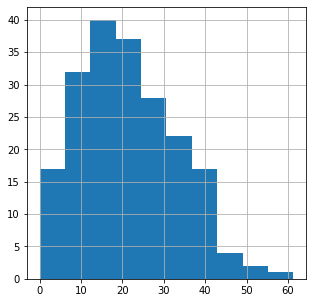

In [ ]:
country_profiles[column_name].hist()

In [ ]:
woman_paprliaments_without_outliers = remove_outliers(country_profiles, [column_name])

 Columns Seats held by women in national parliaments % had 40 outliers removed
Data reduced by 40 lines, or 16.74 %


In [ ]:
low_woman_paprliaments_without_outliers = woman_paprliaments_without_outliers[woman_paprliaments_without_outliers[column_name] <= woman_paprliaments_without_outliers[column_name].median()]
low_woman_paprliaments_without_outliers[column_name]

7      11.1
9       9.9
13     16.8
14     13.2
15      7.5
       ... 
226    19.1
228    16.0
229     0.0
236     0.0
237    18.0
Name: Seats held by women in national parliaments %, Length: 100, dtype: float64

A que menos se aproxima de uma simétrica é esta. Porém, tem poucos outliers pelo método de tukey. Então acredito que não haja problemas em deixar assim mesmo.

In [ ]:
low_woman_paprliaments_without_outliers[column_name].mode()

0    16.0
dtype: float64

In [ ]:
low_woman_paprliaments_without_outliers[column_name].median()

12.3

In [ ]:
low_woman_paprliaments_without_outliers[column_name].mean()

11.824000000000002

In [ ]:
total_vaccination_low_woman_parlament = country_vaccinations.groupby(by='iso_code').last()[country_vaccinations.groupby(by='iso_code').last()['country'].isin(low_woman_paprliaments_without_outliers['country'])]['total_vaccinations_per_hundred']
total_vaccination_low_woman_parlament.shape

(35,)

In [ ]:
high_woman_paprliaments_without_outliers = woman_paprliaments_without_outliers[woman_paprliaments_without_outliers[column_name] > woman_paprliaments_without_outliers[column_name].median()]
high_woman_paprliaments_without_outliers[column_name]

0      27.7
1      22.9
2      31.6
4      32.1
5      38.2
       ... 
227    20.2
230    22.2
231    26.7
232    26.7
238    32.6
Name: Seats held by women in national parliaments %, Length: 99, dtype: float64

In [ ]:
high_woman_paprliaments_without_outliers[column_name].median()

29.5

In [ ]:
high_woman_paprliaments_without_outliers[column_name].mode()

0    26.7
dtype: float64

In [ ]:
high_woman_paprliaments_without_outliers[column_name].mean()

30.649494949494933

In [ ]:
total_vaccination_high_woman_parlament = country_vaccinations.groupby(by='iso_code').last()[country_vaccinations.groupby(by='iso_code').last()['country'].isin(high_woman_paprliaments_without_outliers['country'])]['total_vaccinations_per_hundred']
total_vaccination_high_woman_parlament.shape

(60,)

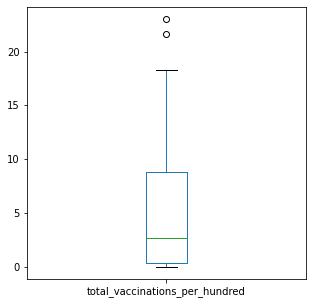

In [ ]:
total_vaccination_low_woman_parlament.plot.box()

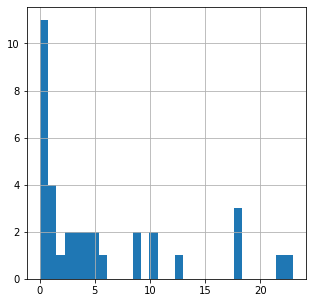

In [ ]:
total_vaccination_low_woman_parlament.hist(bins=30)

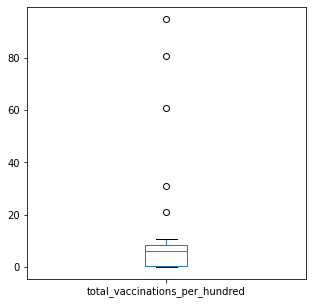

In [ ]:
total_vaccination_high_woman_parlament.plot.box()

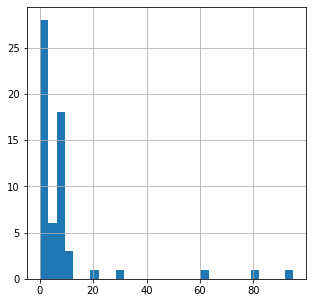

In [ ]:
total_vaccination_high_woman_parlament.hist(bins=30)

###Grupos separados, porém com outliers. Removendo outliers para realizar teste de hipótese
>Como verificado acima, principalmente o high_woman palarment tem outliers muito fortes quando verifica-se o total_vaccinations_per_hundred. A retirada destes outliers é importante para efetuar o teste de hipótese.

In [ ]:
total_vaccination_low_woman_parlament_without_outliers = remove_outliers(total_vaccination_low_woman_parlament)
total_vaccination_low_woman_parlament_without_outliers

 Serie had 2 outliers removed
Data reduced by 2 lines, or 5.71 %


iso_code
AZE     0.64
BGR     3.22
BHR    17.70
BRA     3.98
BRB    12.79
CHL    18.26
COL     0.29
CYP     8.70
EGY     0.00
GRC     8.84
GTM     0.01
HRV     5.19
HUN    10.09
IDN     0.98
IND     1.04
JOR     1.47
JPN     0.03
KWT     4.10
LBN     0.40
LIE     5.82
LKA     2.38
LVA     3.39
MLT    18.03
MMR     0.19
MUS     0.30
MYS     0.08
OMN     1.32
PAN     2.65
PRY     0.01
QAT     4.86
SAU     2.24
TUR    10.40
UKR     0.01
Name: total_vaccinations_per_hundred, dtype: float64

In [ ]:
total_vaccination_high_woman_parlament_without_outliers = remove_outliers(total_vaccination_high_woman_parlament)
total_vaccination_high_woman_parlament_without_outliers

 Serie had 5 outliers removed
Data reduced by 5 lines, or 8.33 %


iso_code
ALB     0.35
AND     3.09
ARG     2.32
AUS     0.13
AUT     7.44
BEL     6.93
BGD     1.89
BLR     0.22
BOL     0.09
CAN     5.18
CHE     8.65
CHN     2.82
CRI     2.94
CZE     6.29
DEU     7.63
DNK    10.61
DOM     0.24
DZA     0.17
ECU     0.24
ESP     8.19
EST     8.50
FIN     8.16
FRA     6.72
GUY     0.24
IRL     8.63
ISL     9.87
ITA     7.20
KAZ     0.12
KHM     0.08
LTU     8.99
LUX     6.04
MAR     9.75
MCO     6.12
MEX     1.96
MNE     0.21
NLD     5.65
NOR     9.06
NPL     1.38
NZL     0.03
PAK     0.03
PER     0.81
POL     8.94
PRT     8.52
ROU     7.91
SEN     0.16
SGP     6.15
SLV     0.09
SMR     0.10
SVK     8.39
SVN     8.39
SWE     7.14
TTO     0.03
URY     0.48
ZAF     0.12
ZWE     0.14
Name: total_vaccinations_per_hundred, dtype: float64

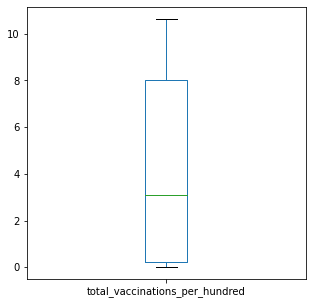

In [ ]:
total_vaccination_high_woman_parlament_without_outliers.plot.box()

In [ ]:
total_vaccination_high_woman_parlament_without_outliers.mean()

4.209636363636363

In [ ]:
total_vaccination_high_woman_parlament_without_outliers.std()

3.767060925107

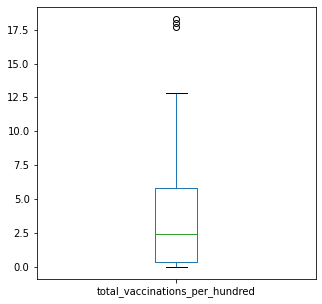

In [ ]:
total_vaccination_low_woman_parlament_without_outliers.plot.box()

 Serie had 3 outliers removed
Data reduced by 3 lines, or 9.09 %
 Serie had 1 outliers removed
Data reduced by 1 lines, or 3.33 %
 Serie had 2 outliers removed
Data reduced by 2 lines, or 6.90 %


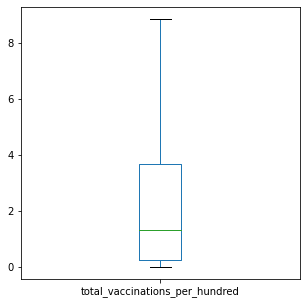

In [ ]:
total_vaccination_low_woman_parlament_without_outliers_again = remove_outliers(total_vaccination_low_woman_parlament_without_outliers)
total_vaccination_low_woman_parlament_without_outliers_again = remove_outliers(total_vaccination_low_woman_parlament_without_outliers_again)
total_vaccination_low_woman_parlament_without_outliers_again = remove_outliers(total_vaccination_low_woman_parlament_without_outliers_again)
total_vaccination_low_woman_parlament_without_outliers_again.plot.box()
#Remover outliers até não aparecer mais no boxplot?

In [ ]:
total_vaccination_low_woman_parlament_without_outliers_again.mean()

2.3014814814814812

In [ ]:
total_vaccination_low_woman_parlament_without_outliers_again.std()

2.588419035900699

In [ ]:
total_vaccination_low_woman_parlament_without_outliers.mean()

4.527575757575758

In [ ]:
total_vaccination_low_woman_parlament_without_outliers.std()

5.55117500529338

###Analisando grupos separados
>Como verificado, após a remoção dos outliers, os valores ficaram muito semelhantes. Porém, algumas considerações precisam ser feitas. A primeira é que houve muitos países com baixa quantidade de mulheres no parlamento que não encontraram correspondência no conjunto de dados das vacinações. Isto pode ter acontecido porque estes países não entraram no conjunto de dados por não terem iniciado ainda a vacinação. Abaixo, segue uma análise de como foi o processo de separação dos grupos em ambos os conjuntos de dados:

In [ ]:
pd.set_option('display.max_rows', None)
country_vaccinations.groupby(by='iso_code').last().merge(woman_paprliaments_without_outliers, on='country', how='outer', indicator=True)[['country', column_name, 'total_vaccinations_per_hundred', '_merge']].sort_values(by='country')
#https://stackoverflow.com/questions/28901683/pandas-get-rows-which-are-not-in-other-dataframe

country  ...      _merge
114                                Afghanistan  ...  right_only
1                                      Albania  ...        both
29                                     Algeria  ...        both
2                                      Andorra  ...        both
115                                     Angola  ...  right_only
0                                     Anguilla  ...   left_only
116                        Antigua and Barbuda  ...  right_only
4                                    Argentina  ...        both
117                                    Armenia  ...  right_only
5                                    Australia  ...        both
6                                      Austria  ...        both
7                                   Azerbaijan  ...        both
118                                    Bahamas  ...  right_only
11                                     Bahrain  ...        both
9                                   Bangladesh  ...        both
16                                    Barbados  ...        both
12                                     Belarus  ...        both
8                                      Belgium  ...        both
119                                     Belize  ...  right_only
120                                      Benin  ...  right_only
13                                     Bermuda  ...   left_only
121                                     Bhutan  ...  right_only
14                                     Bolivia  ...        both
122           Bolivia (Plurinational State of)  ...  right_only
123                     Bosnia and Herzegovina  ...  right_only
124                                   Botswana  ...  right_only
15                                      Brazil  ...        both
125                          Brunei Darussalam  ...  right_only
10                                    Bulgaria  ...        both
126                               Burkina Faso  ...  right_only
127                                    Burundi  ...  right_only
128                                 Cabo Verde  ...  right_only
60                                    Cambodia  ...        both
129                                   Cameroon  ...  right_only
17                                      Canada  ...        both
23                              Cayman Islands  ...   left_only
130                   Central African Republic  ...  right_only
131                                       Chad  ...  right_only
19                                       Chile  ...        both
20                                       China  ...        both
21                                    Colombia  ...        both
132                                    Comoros  ...  right_only
133                                      Congo  ...  right_only
22                                  Costa Rica  ...        both
134                              Cote D'Ivoire  ...  right_only
46                                     Croatia  ...        both
135                                       Cuba  ...  right_only
24                                      Cyprus  ...        both
25                                     Czechia  ...        both
136      Democratic People's Republic of Korea  ...  right_only
137           Democratic Republic of the Congo  ...  right_only
27                                     Denmark  ...        both
138                                   Djibouti  ...  right_only
139                                   Dominica  ...  right_only
28                          Dominican Republic  ...        both
30                                     Ecuador  ...        both
31                                       Egypt  ...        both
98                                 El Salvador  ...        both
140                          Equatorial Guinea  ...  right_only
141                                    Eritrea  ...  right_only
33                                     Estonia  ...        both
142                                   Ethiopia  ...  right_only
37     

> É possível perceber alguns países cujo nome não está igual nas duas listas. Isto resulta em uma perca de informação que pode ser útil recuperar a depender do contexto. Neste caso, como são poucos países, acredita-se que isto não será o suficiente para alterar os resultados da análise.

In [ ]:
country_vaccinations.groupby(by='iso_code').last().merge(low_woman_paprliaments_without_outliers, on='country', how='right', indicator=True)[['country', column_name, 'total_vaccinations_per_hundred']].sort_values(by='country').count()

country                                          100
Seats held by women in national parliaments %    100
total_vaccinations_per_hundred                    35
dtype: int64

In [ ]:
country_vaccinations.groupby(by='iso_code').last().merge(high_woman_paprliaments_without_outliers, on='country', how='right', indicator=True)[['country', column_name, 'total_vaccinations_per_hundred']].sort_values(by='country').count()

country                                          99
Seats held by women in national parliaments %    99
total_vaccinations_per_hundred                   60
dtype: int64

>Dos 100 países com parlamentos com baixa presença feminina, apenas 35 também tem o total de vacinação por cento. Enquanto que este valor é aproximadamente 40% maior para os países com alta presença feminina no parlamento. Se este resultado for porque não entra na tabela de vacinação os países que ainda não começaram a vacinar, esta ausência poderia afetar, caso, ao invés de não informado, houvesse o valor 0, uma média menor no total de vacinações por cento para países com baixa presença feminina no parlamento.

In [ ]:
show_outliers(total_vaccination_low_woman_parlament)

 Serie had 33 outliers removed
Data reduced by 33 lines, or 94.29 %


iso_code
MDV    21.67
USA    22.99
Name: total_vaccinations_per_hundred, dtype: float64

In [ ]:
show_outliers(total_vaccination_high_woman_parlament)

 Serie had 55 outliers removed
Data reduced by 55 lines, or 91.67 %


iso_code
ARE    60.95
GBR    31.07
ISR    94.88
SRB    21.11
SYC    80.78
Name: total_vaccinations_per_hundred, dtype: float64

In [ ]:
pd.reset_option("max_rows")

###Teste de hipótese
>Uma vez obtido a distribuição dos dois grups, aplicaremos o teste de hipótese para verificar se há alguma diferença significativa entre elas. A pergunta a ser respondida será: o total de vacinação por cento é diferente entre os países que tem alto e baixo índice de presença feminina no parlamento?

####Verificando a normalidade das distribuições e pareamento

In [ ]:
stats.shapiro(total_vaccination_low_woman_parlament_without_outliers)

(0.7832659482955933, 1.5727675418020226e-05)

In [ ]:
stats.shapiro(total_vaccination_high_woman_parlament_without_outliers)

(0.8351520299911499, 2.6330467335355934e-06)

>Os p-values deram menor que 0.00f5 (alpha = 0.01). Isto indica fortemente que estas distribuições não são normais ou, em outras palavras, que a hipótese nula, a distribuição em questão é igual a uma distribuição normal, é rejeitada com uma altíssima chance (1 - pvalue)*100%). Ainda, a chance de ambas as distribuições serem iguais é de pvalue.

>Acerca do pareamento, não são os mesmos países. Portanto, trata-se de distribuições não pareadas.

>Sob estas condições, segundo a tabela do slide da aula de teste de hipótese, utilizar o Mann-Whitney test

####Resultado do teste

In [ ]:
stats.mannwhitneyu(total_vaccination_low_woman_parlament_without_outliers, total_vaccination_high_woman_parlament_without_outliers)

MannwhitneyuResult(statistic=877.0, pvalue=0.3979737542951849)

>Como o pvalue é muito maior que 0.005 ou 0.025, isto significa que a hipótese nula não pode ser rejeitada. Em outras palavras, a chance dessas duas distribuições serem iguais é de (1-pvalue)*100%, o que neste caso dá algo em torno de 60%. Embora a chance da hipótese alternativa (serem iguais) ser maior que a da hipótese nula (serem diferentes), não podemos rejeitar a hipótese nula por não atender o critério de alpha satisfatório, que seria 2.5% ou 0.5%.

>Com um valor tão alto de pvalue, acredito ser desnecessário tentar organizar os dados para contar com países que entraram na tabela com nomes diferentes. Uma possível variação desta análise seria buscar todos os países do planeta e assumir aqueles que não tem registro de vacinação como zero. Então fazer o mesmo tratamento para verificar se as distribuições, com zeros inclusos, seriam diferentes.

In [ ]:
#Nenhum país da lista possui NA nos dados de interesse (último dia de total_vaccinations_per_hundred).
country_vaccinations.groupby(by='country').last()['total_vaccinations_per_hundred'][country_vaccinations.groupby(by='country').last()['total_vaccinations_per_hundred'].isna() == True]

Series([], Name: total_vaccinations_per_hundred, dtype: float64)

##Relação da vacinação por habiante e dados socioeconômico dos países
>O objetivo vai ser imitar uma estrutura parecida com o IDH. Serão criados três índices a partir dos dados socioeconômicos relacionados aos seguintes campos de análise: educação, saúde e renda. Os dados utilizados para a construção deste índice são os seguintes: 

>Educação:
* 34: 'Education: Government expenditure (% of GDP)',
* 95: 'Education: Primary gross enrol. ratio (f/m per 100 pop.) first',
* 155: 'Education: Primary gross enrol. ratio (f/m per 100 pop.) second',
* 96: 'Education: Secondary gross enrol. ratio (f/m per 100 pop.) first',
* 156: 'Education: Secondary gross enrol. ratio (f/m per 100 pop.) second',
* 97: 'Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first',
* 157: 'Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second',

>Saúde:
* 33: 'Health: Physicians (per 1000 pop.)',
* 32: 'Health: Total expenditure (% of GDP)'
* 31: 'Infant mortality rate (per 1000 live births',
* 87: 'Life expectancy at birth (females/males, years) first',
* 147: 'Life expectancy at birth (females/males, years) second',
* 107: 'Pop. using improved drinking water (urban/rural, %) first',
* 167: 'Pop. using improved drinking water (urban/rural, %) second',

>Renda:
* 8: 'GDP per capita (current US$)',
* 12: 'Employment: Agriculture (% of employed)',
* 13: 'Employment: Industry (% of employed)',
* 14: 'Employment: Services (% of employed)',
* 15: 'Unemployment (% of labour force)',

>A forma como estes dados serão utilizados será a seguinte: dados semelhantes serão utilizados para fazer uma média ponderada. Por exemplo, os dados que tem "first" e "second". O resultado será normalizado para compor o índice de cada uma destas categorias por meio da média normalizada. Estes três índices serão utilizados para tirar outliers.

In [ ]:
columns_dict

{0: 'country',
 1: 'Region',
 10: 'Economy: Industry (% of GVA)',
 103: 'Forested area (% of land area) first',
 106: 'Energy supply per capita (Gigajoules) first',
 107: 'Pop. using improved drinking water (urban/rural, %) first',
 11: 'Economy: Services and other activity (% of GVA)',
 12: 'Employment: Agriculture (% of employed)',
 13: 'Employment: Industry (% of employed)',
 136: 'Labour force participation (female/male pop. %) second',
 14: 'Employment: Services (% of employed)',
 147: 'Life expectancy at birth (females/males, years) second',
 148: 'Population age distribution (0-14 / 60+ years, %) second',
 149: 'International migrant stock (000/% of total pop.) second',
 15: 'Unemployment (% of labour force)',
 155: 'Education: Primary gross enrol. ratio (f/m per 100 pop.) second',
 156: 'Education: Secondary gross enrol. ratio (f/m per 100 pop.) second',
 157: 'Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second',
 16: 'Labour force participation (female/male pop. 

In [ ]:
country_profiles.columns = country_profiles.columns.map(columns_dict)
country_profiles

17       22      44    9   ...    15    24   25                         0 
0    125.0  -5121.0    63.0  23.3  ...   8.6  26.7  4.0                Afghanistan
1    134.0  -1222.0    84.0  22.4  ...  15.8  57.4  2.2                    Albania
2    160.0 -27229.0  5900.0  12.2  ...  11.4  70.7  2.8                    Algeria
3    112.0      NaN     NaN   NaN  ...   NaN  87.2 -0.1             American Samoa
4      NaN      NaN     1.0   0.5  ...   NaN  85.1  0.1                    Andorra
..     ...      ...     ...   ...  ...   ...   ...  ...                        ...
234  115.0      NaN     NaN   NaN  ...   NaN   0.0  0.0  Wallis and Futuna Islands
235  100.0      NaN     NaN   NaN  ...   6.8  80.9  3.3             Western Sahara
236  136.0  -3026.0   668.0  14.7  ...  16.1  34.6  4.0                      Yemen
237  179.0   -768.0   374.0   8.2  ...   7.4  40.9  4.3                     Zambia
238   99.0  -1521.0   482.0  13.0  ...   5.0  32.4  2.3                   Zimbabwe

[239 rows x 60 columns]

In [ ]:
IDH = pd.DataFrame()
IDH['education'] = (
    preprocessing.minmax_scale(country_profiles[34]) +
    preprocessing.minmax_scale(country_profiles[95] + country_profiles[155]
                               + 2 * country_profiles[96] + 2 * country_profiles[156]
                               + 3 * country_profiles[97] + 3 * country_profiles[157])) / 4
IDH['health'] = (
    preprocessing.minmax_scale(country_profiles[87] + country_profiles[147]) +
    preprocessing.minmax_scale(country_profiles[107] + country_profiles[167]) +
    preprocessing.minmax_scale(country_profiles[31]) +
    preprocessing.minmax_scale(country_profiles[32]) + 
    preprocessing.minmax_scale(country_profiles[33])) / 5
IDH["rent"] = (preprocessing.minmax_scale(
    country_profiles[12] + 2 * country_profiles[13] + 3 * country_profiles[14] - 4 * country_profiles[15]
    ) + preprocessing.minmax_scale(country_profiles[8])) / 2

IDH = IDH.dropna()
IDH

education    health      rent
0     0.109121  0.369639  0.186211
1     0.220144  0.466762  0.202821
8     0.301972  0.517112  0.477484
9     0.172056  0.450378  0.228555
11    0.334776  0.586805  0.600589
..         ...       ...       ...
222   0.292480  0.557857  0.596749
223   0.072261  0.242170  0.223296
224   0.295281  0.648802  0.634088
226   0.295281  0.648802  0.634088
238   0.207736  0.270276  0.198145

[80 rows x 3 columns]

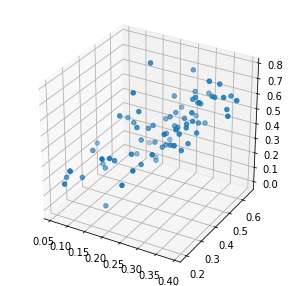

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(IDH['education'], IDH['health'], IDH['rent'])

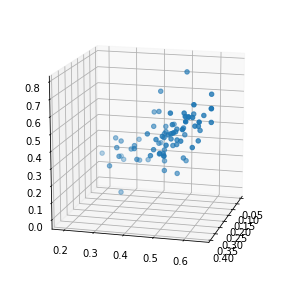

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(IDH['education'], IDH['health'], IDH['rent'])
ax.view_init(15, 15)

###Removendo outliers

In [ ]:
clf = LocalOutlierFactor(n_neighbors=3)
scores = clf.fit_predict(IDH)
IDH['scores'] = scores
IDH_outliers = IDH[IDH['scores'] == -1]
IDH = IDH[IDH['scores'] == 1].drop(['scores'], axis=1)
IDH

education    health      rent
0     0.109121  0.369639  0.186211
1     0.220144  0.466762  0.202821
8     0.301972  0.517112  0.477484
9     0.172056  0.450378  0.228555
11    0.334776  0.586805  0.600589
..         ...       ...       ...
222   0.292480  0.557857  0.596749
223   0.072261  0.242170  0.223296
224   0.295281  0.648802  0.634088
226   0.295281  0.648802  0.634088
238   0.207736  0.270276  0.198145

[76 rows x 3 columns]

In [ ]:
outliers_country_profile = country_profiles[country_profiles.index.isin(IDH_outliers.index)]
outliers_country_profile.columns = outliers_country_profile.columns.map(columns_dict)
outliers_country_profile['country']

121    Luxembourg
141    Mozambique
171       Romania
184        Serbia
Name: country, dtype: object

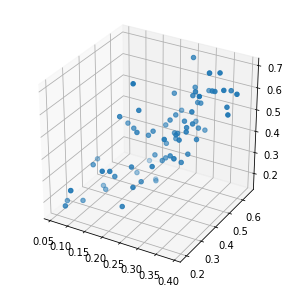

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(IDH['education'], IDH['health'], IDH['rent'])

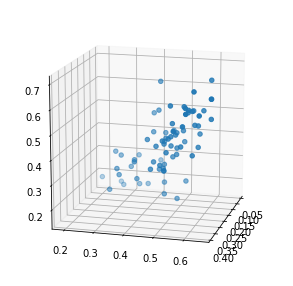

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(IDH['education'], IDH['health'], IDH['rent'])
ax.view_init(15, 15)

###Criando o índice e discretizando os países

In [ ]:
IDH

education    health      rent
0     0.109121  0.369639  0.186211
1     0.220144  0.466762  0.202821
8     0.301972  0.517112  0.477484
9     0.172056  0.450378  0.228555
11    0.334776  0.586805  0.600589
..         ...       ...       ...
222   0.292480  0.557857  0.596749
223   0.072261  0.242170  0.223296
224   0.295281  0.648802  0.634088
226   0.295281  0.648802  0.634088
238   0.207736  0.270276  0.198145

[76 rows x 3 columns]

In [ ]:
IDH['IDH']= (IDH['education'] + IDH['health'] + IDH['rent']) / 3
IDH_intervals = pd.cut(IDH['IDH'], bins=3).drop_duplicates().reset_index(drop=True)
IDH_intervals

0    (0.152, 0.282]
1    (0.282, 0.411]
2    (0.411, 0.541]
Name: IDH, dtype: category
Categories (3, interval[float64]): [(0.152, 0.282] < (0.282, 0.411] < (0.411, 0.541]]

In [ ]:
IDH['IDH_classes'] = IDH['IDH'].apply(lambda x: 'low' if x in IDH_intervals[0] else 'medium' if x in IDH_intervals[1] else 'hight')
IDH

education    health      rent       IDH IDH_classes
0     0.109121  0.369639  0.186211  0.221657         low
1     0.220144  0.466762  0.202821  0.296576      medium
8     0.301972  0.517112  0.477484  0.432189       hight
9     0.172056  0.450378  0.228555  0.283663      medium
11    0.334776  0.586805  0.600589  0.507390       hight
..         ...       ...       ...       ...         ...
222   0.292480  0.557857  0.596749  0.482362       hight
223   0.072261  0.242170  0.223296  0.179242         low
224   0.295281  0.648802  0.634088  0.526057       hight
226   0.295281  0.648802  0.634088  0.526057       hight
238   0.207736  0.270276  0.198145  0.225386         low

[76 rows x 5 columns]

###Teste de hipótese
* Verificar outliers
* Verificar normalidade
* Verificar se as distribuições do total de vacinas por cento desses grupos de países são iguais. Realizar 3 testes de hipóteses, cada um com um par das classes de IDH

### Verificando normalidade



Retornando os nomes das colunas para string

In [ ]:
country_profiles.columns = country_profiles.columns.map(columns_dict)

Fazendo separação de grupos de porcentagem total de vacinação por países.

In [ ]:
total_vaccinations_per_hundred_last = country_vaccinations.groupby(by='country').last()
total_vaccinatinos_profiles_idh = pd.merge(country_profiles, total_vaccinations_per_hundred_last, on = 'country')


Separando os grupos de vacinação por classes do IDH

In [ ]:
low_idh = IDH[IDH['IDH_classes'] == 'low']
medium_idh = IDH[IDH['IDH_classes'] == 'medium']
high_idh = IDH[IDH['IDH_classes'] == 'hight']


In [ ]:
total_vaccinatinos_profiles_idh_low = total_vaccinatinos_profiles_idh[total_vaccinatinos_profiles_idh.index.isin(low_idh.index)]
total_vaccinatinos_profiles_idh_medium = total_vaccinatinos_profiles_idh[total_vaccinatinos_profiles_idh.index.isin(medium_idh.index)]
total_vaccinatinos_profiles_idh_high = total_vaccinatinos_profiles_idh[total_vaccinatinos_profiles_idh.index.isin(high_idh.index)]

#### Testando normalidade de países com IDH baixo

Analisando os dados de porcentagem de vacinação dos países com IDH calculados como BAIXO, vemos que o país com índice 98 - Emirados Árabes Unidos - possui alta porcentagem de vacinação, configurando-se um outlier para a amostra.

In [ ]:
total_vaccinatinos_profiles_idh_low['total_vaccinations_per_hundred']

0      0.35
16     3.22
21     2.82
23     2.94
33     8.16
41    10.09
97     0.01
98    60.95
Name: total_vaccinations_per_hundred, dtype: float64

Removendo outliers, no caso, será feita a remoção do país cujo total de vacinação seja alto

In [ ]:
total_vaccinatinos_profiles_idh_low_withou_outliers = remove_outliers(total_vaccinatinos_profiles_idh_low, ['total_vaccinations_per_hundred'])

 Columns total_vaccinations_per_hundred had 1 outliers removed
Data reduced by 1 lines, or 12.50 %


Fazendo teste de normalidade para grupo com IDH baixo da variável ***total_vaccinations_per_hundred***

In [ ]:
stats.shapiro(total_vaccinatinos_profiles_idh_low_withou_outliers['total_vaccinations_per_hundred'])

(0.8734356760978699, 0.1988677829504013)

Para os testes de países cujo o IDH é baixo, os p-values deram maior que 0.00f5 (alpha = 0.01). Isto indica fortemente que estas distribuição é normal ou, em outras palavras, que a hipótese nula, a distribuição em questão é igual a uma distribuição normal, não pode ser rejeitada, por uma probabilidade de (1 - pvalue)*100%).

#### Testando normalidade de países com IDH médio

Analisando os dados de porcentagem de vacinação dos países com IDH calculados como médio, vemos que o país com índice 99 - Inglaterra - possui porcentagem de vacinação discrepante em relação a mediana, configurando-se um outlier para a amostra.

In [ ]:
total_vaccinatinos_profiles_idh_medium['total_vaccinations_per_hundred']

1      0.17
9      1.89
15     3.98
29     0.24
32     8.50
35     7.63
53     3.39
63     6.12
79     7.91
95    10.40
99    31.07
Name: total_vaccinations_per_hundred, dtype: float64

Removendo outliers, no caso, será feita a remoção do país cujo total de vacinação seja discrepante

In [ ]:
show_outliers(total_vaccinatinos_profiles_idh_medium, ['total_vaccinations_per_hundred'])

 Columns total_vaccinations_per_hundred had 10 outliers removed
Data reduced by 10 lines, or 90.91 %


Agricultural production index (2004-2006=100)  ...                                     source_website
99                                          108.0  ...  https://coronavirus.data.gov.uk/details/health...

[1 rows x 74 columns]

In [ ]:
total_vaccinatinos_profiles_idh_medium_withou_outliers = remove_outliers(total_vaccinatinos_profiles_idh_medium, ['total_vaccinations_per_hundred'])

 Columns total_vaccinations_per_hundred had 1 outliers removed
Data reduced by 1 lines, or 9.09 %


Fazendo teste de normalidade para grupo com IDH médio da variável ***total_vaccinations_per_hundred***

In [ ]:
stats.shapiro(total_vaccinatinos_profiles_idh_medium_withou_outliers['total_vaccinations_per_hundred'])

(0.9366109371185303, 0.5159540772438049)

Para os testes de países cujo o IDH é médio, os p-values deram maior que 0.00f5 (alpha = 0.01). Isto indica fortemente que estas distribuição é normal ou, em outras palavras, que a hipótese nula, a distribuição em questão é igual a uma distribuição normal, não pode ser rejeitada, por uma probabilidade de (1 - pvalue)*100%).

#### Testando normalidade de países com IDH alto

Analisando os dados de porcentagem de vacinação dos países com IDH calculados como alta, vemos que o país com índice 19 - Ilhas Cayman - possui porcentagem bastante discrepante em relação a mediana

In [ ]:
total_vaccinatinos_profiles_idh_high['total_vaccinations_per_hundred']

8      17.70
11      0.22
12      6.93
18      5.18
19     32.12
51      0.12
55      5.82
56      8.99
59     21.67
68      5.65
73      2.65
74      0.01
80      1.76
96     16.62
101     0.48
Name: total_vaccinations_per_hundred, dtype: float64

Removendo outliers, no caso, será feita a remoção do país cujo total de vacinação seja muito distante da média

In [ ]:
show_outliers(total_vaccinatinos_profiles_idh_high, ['total_vaccinations_per_hundred'])

 Columns total_vaccinations_per_hundred had 14 outliers removed
Data reduced by 14 lines, or 93.33 %


Agricultural production index (2004-2006=100)  ...                                     source_website
19                                          104.0  ...  https://www.exploregov.ky/coronavirus-statisti...

[1 rows x 74 columns]

In [ ]:
total_vaccinatinos_profiles_idh_high_withou_outliers = remove_outliers(total_vaccinatinos_profiles_idh_high, ['total_vaccinations_per_hundred'])

 Columns total_vaccinations_per_hundred had 1 outliers removed
Data reduced by 1 lines, or 6.67 %


Fazendo teste de normalidade para grupo com IDH alto da variável ***total_vaccinations_per_hundred***

In [ ]:
stats.shapiro(total_vaccinatinos_profiles_idh_high_withou_outliers['total_vaccinations_per_hundred'])

(0.8445433378219604, 0.018742278218269348)

Para os testes de países cujo o IDH é alto, os p-values deram menor que 0.00f5 (alpha = 0.01). Isto indica fortemente que esta distribuição não é normal ou, em outras palavras, que a hipótese nula, em que a distribuição em questão é igual a uma distribuição normal, pode ser rejeitada, por uma probabilidade de (1 - pvalue)*100%).

### Testando Grupos de distribuições

#### Testando países com IDH baixo e médio

In [ ]:
stats.mannwhitneyu(total_vaccinatinos_profiles_idh_low_withou_outliers['total_vaccinations_per_hundred'], total_vaccinatinos_profiles_idh_medium_withou_outliers['total_vaccinations_per_hundred'])

MannwhitneyuResult(statistic=28.0, pvalue=0.26293109434238304)

>Como o pvalue é muito maior que 0.005 ou 0.025, isto significa que a hipótese nula não pode ser rejeitada. Em outras palavras, a chance dessas duas distribuições serem iguais é de (1-pvalue)*100%, o que neste caso dá algo em torno de 75%. Embora a chance da hipótese alternativa (serem iguais) ser maior que a da hipótese nula (serem diferentes), não podemos rejeitar a hipótese nula por não atender o critério de alpha satisfatório, que seria 2.5% ou 0.5%.


#### Testando países com IDH baixo e alto

In [ ]:
stats.mannwhitneyu(total_vaccinatinos_profiles_idh_low_withou_outliers['total_vaccinations_per_hundred'], total_vaccinatinos_profiles_idh_high_withou_outliers['total_vaccinations_per_hundred'])

MannwhitneyuResult(statistic=42.5, pvalue=0.3271582764029293)

>Como o pvalue é muito maior que 0.005 ou 0.025, isto significa que a hipótese nula não pode ser rejeitada. Em outras palavras, a chance dessas duas distribuições serem iguais é de (1-pvalue)*100%, o que neste caso dá algo em torno de 70%. Embora a chance da hipótese alternativa (serem iguais) ser maior que a da hipótese nula (serem diferentes), não podemos rejeitar a hipótese nula por não atender o critério de alpha satisfatório, que seria 2.5% ou 0.5%.


In [ ]:
total_vaccinatinos_profiles_idh_medium_withou_outliers['total_vaccinations_per_hundred']

1      0.17
9      1.89
15     3.98
29     0.24
32     8.50
35     7.63
53     3.39
63     6.12
79     7.91
95    10.40
Name: total_vaccinations_per_hundred, dtype: float64

#### Testando países com IDH médio e alto

In [ ]:
stats.mannwhitneyu(total_vaccinatinos_profiles_idh_medium_withou_outliers['total_vaccinations_per_hundred'], total_vaccinatinos_profiles_idh_high_withou_outliers['total_vaccinations_per_hundred'])

MannwhitneyuResult(statistic=68.0, pvalue=0.46500549665684865)

>Como o pvalue é muito maior que 0.005 ou 0.025, isto significa que a hipótese nula não pode ser rejeitada. Em outras palavras, a chance dessas duas distribuições serem iguais é de (1-pvalue)*100%, o que neste caso dá algo em torno de 55%. Embora a chance da hipótese alternativa (serem iguais) ser maior que a da hipótese nula (serem diferentes), não podemos rejeitar a hipótese nula por não atender o critério de alpha satisfatório, que seria 2.5% ou 0.5%.


##Visualizando Dados

Gráfico de vacinação diária no Brasil. Podemos perceber que há uma variação.
Do dia 17/01 até o dia o dia 01/02 a quantidade de pessoas vacinadas por dia só aumentou, depois ficou oscilando

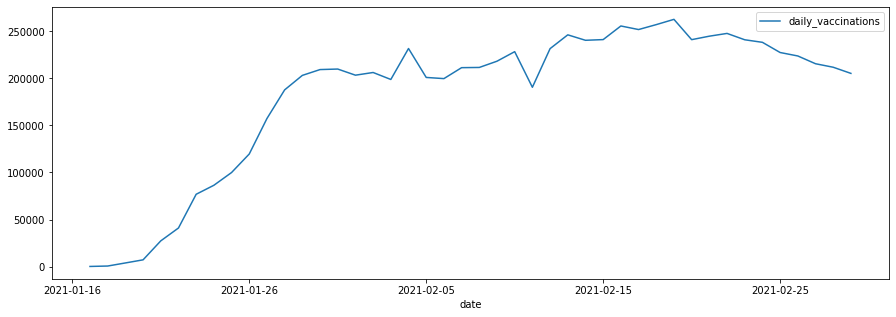

In [ ]:
br_vaccionations = country_vaccinations[country_vaccinations['country'] == 'Brazil']
br_vaccionations.plot(x='date', y='daily_vaccinations', figsize=(15,5))

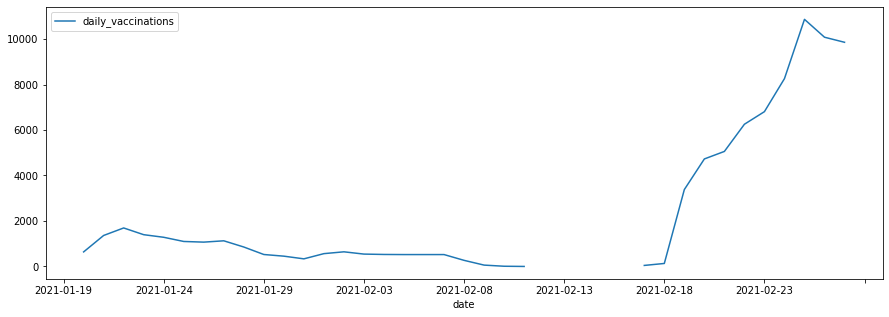

In [ ]:
panama_vaccinations = country_vaccinations[country_vaccinations['country'] == 'Panama']
panama_vaccinations.plot(x='date', y='daily_vaccinations', figsize=(15,5))

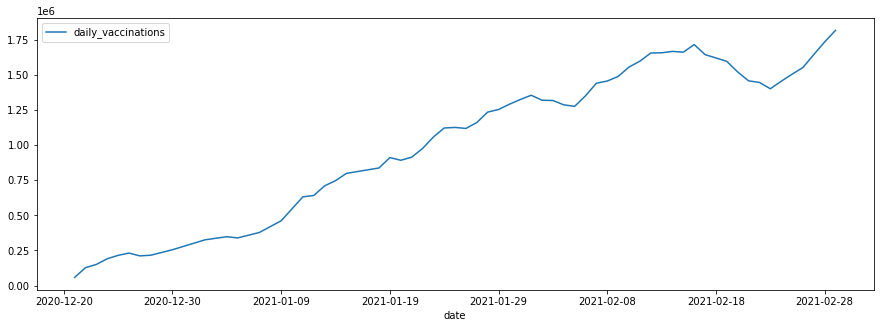

In [ ]:
usa_vaccinations = country_vaccinations[country_vaccinations['country'] == 'United States']
usa_vaccinations.plot(x='date', y='daily_vaccinations', figsize=(15,5))

### Visualizando dados Geograficamente

Para plotarmos os gráficos geográficos utilizaremos o último registro de cada país pois este possui valores que agrega somatório de histórico dos valores anteriores.

In [ ]:
country_vaccinations_last = country_vaccinations.groupby('country').last()
country_profiles_vaccination = pd.merge(country_vaccinations_last, country_profiles, on='country')

O próximo gráfico a plotar o geográfico mundial acerca da porcentagem de pessoas vacinadas em cada país do mundo. 

In [ ]:
total_vaccinations_per_hundred_dict = dict(type='choropleth',
                                           locations=country_profiles_vaccination['iso_code'],
                                           z = country_profiles_vaccination['total_vaccinations_per_hundred'],
                                           text = country_profiles_vaccination['country'],
                                           colorbar = {'title': 'Porcentagem de Vacinações por País'})

layout = dict(title = 'Porcentagem Vacinações do Mundo',
              geo = dict(showframe = False, projection={'type':'mercator'}), autosize=False,width=1280,height=500,
              margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad = 4))

choromap = go.Figure(data=[total_vaccinations_per_hundred_dict], layout=layout)

iplot(choromap)

Olhando o gráfico acima, podemos perceber as seguintes situações:
1. Israel está ligeramente avançado na vacinação, atingindo mais que 94% da população
2. Na América do Sul, o Chile é o mais bem vacinado, chegando a aproximadamente 18% da população vacinada.
3. Os Emirados árabes unidos estão com 60% da população vacinada, chegando perto do total, por ser um país pequeno.
4. Na Europa, o Reino Unido aparece com quase 32% da população vacinada. Do continente, junto a Israel, possui os melhores números.

### Quem está vacinando mais, em quantidade?

In [ ]:
total_vaccinations_dict = dict(type='choropleth',
                                           locations=country_profiles_vaccination['iso_code'],
                                           z = country_profiles_vaccination['total_vaccinations'],
                                           text = country_profiles_vaccination['country'],
                                           colorbar = {'title': 'Total de Vacinações por País'})

layout = dict(title = 'Total Vacinações do Mundo por País',
              geo = dict(showframe = False, projection={'type':'mercator'}), autosize=False,width=1280,height=500,
              margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad = 4))

choromap = go.Figure(data=[total_vaccinations_dict], layout=layout)

iplot(choromap)

Olhando para os dados, podemos perceber o seguinte:
1. Os Estados Unidos é o que mais está vacinando, com quase 77 mi de vacinados.
2. A China, com 40 mi de vacinados, está também com um número alto de vacinados.
3. Índia e Reino Unido estão com números intermediários, chegando a aproximadamente 20 milhões de vacinados.
4. Na América do Sul, o Brasil aparece com uma quantidade de aproximadamente 8.5 mi de vacinados. Número impressionante, comparado com a situação do país.

### Olhando para os dados, quem pode acabar mais rápido?

In [ ]:
country_profiles_vaccination

country  ... Urban population growth rate (average annual %)
0                 Albania  ...                                             2.2
1                 Algeria  ...                                             2.8
2                 Andorra  ...                                             0.1
3                Anguilla  ...                                             1.2
4               Argentina  ...                                             1.0
..                    ...  ...                                             ...
98   United Arab Emirates  ...                                             2.9
99         United Kingdom  ...                                             0.9
100         United States  ...                                             1.0
101               Uruguay  ...                                             0.5
102              Zimbabwe  ...                                             2.3

[103 rows x 74 columns]

In [ ]:
country_profiles_vaccination = pd.merge(country_profiles_vaccination,country_vaccinations[['country', 'date']].groupby('country').count(), on='country')

In [ ]:
country_profiles_vaccination['projection_of_remaining_days'] = country_profiles_vaccination['Population in thousands (2017)'] * 1000 * country_profiles_vaccination['date_y'] / country_profiles_vaccination['total_vaccinations']

In [ ]:
projection_of_remaining_days_dict = dict(type='choropleth',
                                           locations=country_profiles_vaccination['iso_code'],
                                           z = country_profiles_vaccination['projection_of_remaining_days'],
                                           text = country_profiles_vaccination['country'],
                                           colorbar = {'title': 'Projeção de dias restantes por País para Completar a população'})

layout = dict(title = 'Projeção de dias restantes por País',
              geo = dict(showframe = False, projection={'type':'mercator'}), autosize=False,width=1280,height=500,
              margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad = 4))

choromap = go.Figure(data=[projection_of_remaining_days_dict], layout=layout)

iplot(choromap)

Após a visualização, o Egito acabou se tornando um outlier muito grande para a visualização, pois tem poucos registros de vacinados para uma grande quantidade de dias. Iremos removê-lo e novamente plotar.

In [ ]:
country_profiles_vaccination_without_outlier = country_profiles_vaccination.set_index("country")
country_profiles_vaccination_without_outlier = country_profiles_vaccination_without_outlier.drop("Egypt", axis=0)

In [ ]:
projection_of_remaining_days_dict = dict(type='choropleth',
                                           locations=country_profiles_vaccination_without_outlier['iso_code'],
                                           z = country_profiles_vaccination_without_outlier['projection_of_remaining_days'],
                                           text = country_profiles_vaccination_without_outlier.index,
                                           colorbar = {'title': 'Projeção de dias restantes por País para Completar a população'})

layout = dict(title = 'Projeção de dias restantes por País',
              geo = dict(showframe = False, projection={'type':'mercator'}), autosize=False,width=1280,height=500,
              margin=go.layout.Margin(l=50, r=50, b=100, t=100, pad = 4))

choromap = go.Figure(data=[projection_of_remaining_days_dict], layout=layout)

iplot(choromap)

Com base no gráfico acima, podemos considerar que os países com maior porcentagem populacional vacinada estão mais próximos de concluir a vacinação, levando em conta a continuidade do rítmo que está (o que esperamos que não se mantenha, mas sim, aumente abruptamente).

#Predição covid 19

In [ ]:
!pip install mlflow --quiet

     |████████████████████████████████| 14.2MB 300kB/s 
     |████████████████████████████████| 1.1MB 47.1MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 163kB 48.6MB/s 
     |████████████████████████████████| 153kB 28.4MB/s 
     |████████████████████████████████| 378kB 36.9MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import svm, preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import mlflow
from numpy import mean, std
from scipy.spatial.distance import mahalanobis
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##PIB per capita

###Critério de escolha


In [ ]:
country_profiles.isna().sum()

Agricultural production index (2004-2006=100)                         18
Balance of payments, current account (million US$)                    51
CO2 emission estimates (million tons/tons per capita)                 21
Economy: Agriculture (% of GVA)                                       24
Economy: Industry (% of GVA)                                          22
Economy: Services and other activity (% of GVA)                       22
Education: Government expenditure (% of GDP)                          83
Education: Primary gross enrol. ratio (f/m per 100 pop.) first        44
Education: Primary gross enrol. ratio (f/m per 100 pop.) second       44
Education: Secondary gross enrol. ratio (f/m per 100 pop.) first      57
Education: Secondary gross enrol. ratio (f/m per 100 pop.) second     57
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) first       73
Education: Tertiary gross enrol. ratio (f/m per 100 pop.) second      73
Employment: Agriculture (% of employed)            

>Acima, verifica-se a quantidade de NAs na tabela country_profile_variables. O critério que será utilizado para escolher a coluna que será realizada o primeiro teste de predição será uma que não possua muito NAs e que possa ter uma conexão semantica com outras colunas. Isto porque os poucos NAs e escolher colunas relacionadas ao problema podem ajudar no treinamento. Verificou-se que uma coluna canditada é a 'GDP per capita (current US$)', ou seja, o PIB per capita em dólaras, porque ela possuí poucos NAs e também pode possuir uma relação direta com dados socioeconômicos.

###Escolhendo configurações

In [ ]:
country_profiles[country_profiles['GDP per capita (current US$)'].isna()].isna().sum().sort_values()

country                                                               0
Urban population (% of total population)                              0
Region                                                                0
Population in thousands (2017)                                        0
Population growth rate (average annual %)                             0
Population density (per km2, 2017)                                    0
Urban population growth rate (average annual %)                       0
International migrant stock (000/% of total pop.) first               0
International migrant stock (000/% of total pop.) second              0
Individuals using the Internet (per 100 inhabitants)                  1
Threatened species (number)                                           2
Surface area (km2)                                                    2
Sex ratio (m per 100 f, 2017)                                         2
Population age distribution (0-14 / 60+ years, %) second        

>Acima, buscou-se avaliar o perfil das linhas que possuem NAs na coluna de PIB per capita. Para prever o PIB per capita, acredita-se que será mais interessante colunas com indicadores socioeconômicos. Também, será preferível colunas que poussam poucos ou nenhum NA. Seguindo estes critérios, destacam-se as seguintes colunas:

* Individuals using the Internet (per 100 inhabitants)                  1
* Life expectancy at birth (females/males, years) second                8
* Food production index (2004-2006=100)                                 8
* Life expectancy at birth (females/males, years) first                 8
* Agricultural production index (2004-2006=100)                         8
* Energy production, primary (Petajoules)                               9

>Afinal, estas colunas representam dados socioeconômicos e também possuem poucos NAs. Além disto, também é possível verificar se a adição de algumas colunas extras podem ajudar na predição. Seguem:

* Urban population (% of total population)                              0
* Population growth rate (average annual %)                             0
* Population density (per km2, 2017)                                    0

> A partir dai, os dados faltantes passam a ser próximo da metade da quantidade de PIB per capita faltante. Por isso, conclui-se que não vale a pena tentar tais colunas.

> Próximo passo é escolher um modelo de regressão. Para isto, será visualizado os dados para saber se eles são lineares ou não.



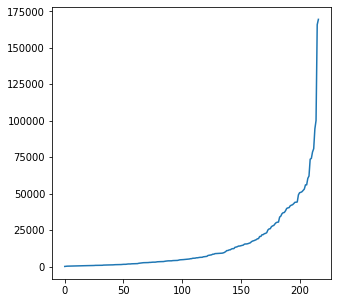

In [ ]:
country_profiles['GDP per capita (current US$)'].sort_values().reset_index(drop=True).plot()

>Ou seja, claramente o dado não é linear. Escolhendo opções de regressão:

* [SVM](https://scikit-learn.org/stable/modules/svm.html#regression)
* [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* [Neural Network](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#regression)
* [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression)
* [Gaussian Process ](https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-regression-gpr)


###Treino, teste e validação

#### Aplicando modelos em 6 dimensões
> Serão feitos dois testes. Um com as 6 primeiras colunas escolhidas na etapa anterior, e outra, repetindo os mesmos passos, porém incluindo as três colunas de informação extra. Separando dados em dados de treino, teste e validação:

In [ ]:
mlflow.create_experiment("first_experiment")

'4'

In [ ]:
def run_model(model, x_train, y_train, x_test, y_test, name):
  try:
    result_train = pd.DataFrame()
    result_test = pd.DataFrame()
    result_train['y_expected'] = y_train
    result_test['y_expected'] = y_test
    with mlflow.start_run(experiment_id=3):
      model.fit(x_train, y_train)
      result_train['y_predict'] = model.predict(x_train)
      result_test['y_predict'] = model.predict(x_test)
      (rmse_test, mae_test, r2_test) = eval_metrics(result_test['y_expected'], result_test['y_predict'])
      (rmse_train, mae_train, r2_train) = eval_metrics(result_train['y_expected'], result_train['y_predict'])
      mlflow.log_metric("rmse_train", rmse_train)
      mlflow.log_metric("rmse_test", rmse_test)
      mlflow.log_metric("r2_train", r2_train)
      mlflow.log_metric("r2_test", r2_test)
      mlflow.log_metric("mae_train", mae_train)
      mlflow.log_metric("mae_test", mae_test)
      mlflow.set_tag("name", name)
      param_list = model.get_params(deep=True)
      print(r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test, param_list)
      for param_key in param_list:
        mlflow.log_param(param_key, param_list[param_key])
    result_train.boxplot()
    result_test.boxplot()
  except Exception as e:
    print("error")
    print(e)

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [ ]:
def d6():
  global X_train, X_test, y_train, y_test, X_val, X_test, y_val, y_test, X_na, X
  X_na = country_profiles[['Individuals using the Internet (per 100 inhabitants)', 'Life expectancy at birth (females/males, years) second', 'Food production index (2004-2006=100)', 'Life expectancy at birth (females/males, years) first', 'Agricultural production index (2004-2006=100)', 'Energy production, primary (Petajoules)']][country_profiles['GDP per capita (current US$)'].isna()]
  X = country_profiles[['Individuals using the Internet (per 100 inhabitants)', 'Life expectancy at birth (females/males, years) second', 'Food production index (2004-2006=100)', 'Life expectancy at birth (females/males, years) first', 'Agricultural production index (2004-2006=100)', 'Energy production, primary (Petajoules)']][~country_profiles['GDP per capita (current US$)'].isna()].dropna()
  y = country_profiles['GDP per capita (current US$)'][country_profiles.index.isin(X.index)]
  X = preprocessing.scale(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
  print("d6")
d6()

d6


##### SVM

In [ ]:
run_model(svm.SVR(), X_train, y_train, X_test, y_test, 'SVR 6f')

In [ ]:
for dregree in [1, 2, 3, 4, 5]:
  run_model(svm.SVR(kernel='poly', degree=dregree), X_train, y_train, X_test, y_test, 'SVR 6f poly')

##### RandomForestRegressor

In [ ]:
for criterion in ["mse", "mae"]:
  for max_depth in [None, 1, 5, 10, 15]:
    for min_samples_leaf in [1, 5, 25]:
      for n_estimators in [5, 25, 50, 100, 250, 500]:
        run_model(RandomForestRegressor(n_estimators = n_estimators, criterion = criterion, max_depth = max_depth, min_samples_leaf = min_samples_leaf, random_state=0), X_train, y_train, X_test, y_test, 'RandomForestRegressor 6f')

##### MLPRegressor

In [ ]:
for activation in ["identity", "logistic", "tanh", "relu"]:
      for solver in ["lbfgs", "sgd", "adam"]:
         for learning_rate in ["constant", "invscaling", "adaptive"]:
            run_model(MLPRegressor(hidden_layer_sizes=(3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(3, 3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(3, 3, 3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(3, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(3, 12, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(3, 12, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(6, 6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(6, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(6, 6, 6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(12, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(12, 12, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(12, 25, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(25, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(25, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(25, 25, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(75, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(75, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(75, 75, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(100, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')
            run_model(MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 6f')

##### KNeighborsRegressor

In [ ]:
for n in [1, 3, 5, 10, 15]:
  for w in ["uniform", "distance"]:
    for p in [1, 2, 3, 4, 5]:
      for algorithm in ["ball_tree", "kd_tree", "brute"]:
        run_model(KNeighborsRegressor(n_neighbors=n, weights=w, p=p, algorithm=algorithm), X_train, y_train, X_test, y_test, 'KNeighborsRegressor 6f')

##### GaussianProcessRegressor

In [ ]:
run_model(GaussianProcessRegressor(normalize_y=True ,random_state=0), X_train, y_train, X_test, y_test, 'GaussianProcessRegressor normalize_y 6f')
print(run_model(GaussianProcessRegressor(random_state=0), X_train, y_train, X_test, y_test, 'GaussianProcessRegressor 6f'))

#### Aplicando modelos em 9 dimensões

In [ ]:
def d9():
  global X_train, X_test, y_train, y_test, X_val, X_test, y_val, y_test, X_na
  X_na = country_profiles[['Individuals using the Internet (per 100 inhabitants)', 'Life expectancy at birth (females/males, years) second', 'Food production index (2004-2006=100)', 'Life expectancy at birth (females/males, years) first', 'Agricultural production index (2004-2006=100)', 'Energy production, primary (Petajoules)', 'Urban population (% of total population)', 'Population growth rate (average annual %)', 'Population density (per km2, 2017)']][country_profiles['GDP per capita (current US$)'].isna()]
  X = country_profiles[['Individuals using the Internet (per 100 inhabitants)', 'Life expectancy at birth (females/males, years) second', 'Food production index (2004-2006=100)', 'Life expectancy at birth (females/males, years) first', 'Agricultural production index (2004-2006=100)', 'Energy production, primary (Petajoules)', 'Urban population (% of total population)', 'Population growth rate (average annual %)', 'Population density (per km2, 2017)']][~country_profiles['GDP per capita (current US$)'].isna()].dropna()
  y = country_profiles['GDP per capita (current US$)'][country_profiles.index.isin(X.index)]
  X = preprocessing.scale(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
  print("d9")
d9()

##### SVM

In [ ]:
run_model(svm.SVR(), X_train, y_train, X_test, y_test, 'SVR 9f')

In [ ]:
for dregree in [1, 2, 3, 4, 5]:
  run_model(svm.SVR(kernel='poly', degree=dregree), X_train, y_train, X_test, y_test, 'SVR 9f poly')

#####RandomForestRegressor

In [ ]:
for criterion in ["mse", "mae"]:
      for max_depth in [None, 1, 5, 10, 15]:
         for min_samples_leaf in [1, 5, 25]:
            for n_estimators in [5, 25, 50, 100, 250, 500]:
              run_model(RandomForestRegressor(n_estimators = n_estimators, criterion = criterion, max_depth = max_depth, min_samples_leaf = min_samples_leaf, random_state=0), X_train, y_train, X_test, y_test, 'RandomForestRegressor 9f')

##### MLPRegressor

In [ ]:
for activation in ["identity", "logistic", "tanh", "relu"]:
      for solver in ["lbfgs", "sgd", "adam"]:
         for learning_rate in ["constant", "invscaling", "adaptive"]:
            run_model(MLPRegressor(hidden_layer_sizes=(3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(3, 3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(3, 3, 3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(3, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(3, 12, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(3, 12, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(6, 6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(6, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(6, 6, 6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(12, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(12, 12, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(12, 25, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(25, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(25, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(25, 25, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(75, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(75, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(75, 75, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(100, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')
            run_model(MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 9f')

##### KNeighborsRegressor

In [ ]:
for n in [1, 3, 5, 10, 15]:
  for w in ["uniform", "distance"]:
    for p in [1, 2, 3, 4, 5]:
      for algorithm in ["ball_tree", "kd_tree", "brute"]:
        run_model(KNeighborsRegressor(n_neighbors=n, weights=w, p=p, algorithm=algorithm), X_train, y_train, X_test, y_test, 'KNeighborsRegressor 9f')

##### GaussianProcessRegressor

In [ ]:
run_model(GaussianProcessRegressor(normalize_y=True ,random_state=0), X_train, y_train, X_test, y_test, 'GaussianProcessRegressor normalize_y 9f')
run_model(GaussianProcessRegressor(random_state=0), X_train, y_train, X_test, y_test, 'GaussianProcessRegressor 9f')

#### Aplicando modelos em 3 dimensões
> Os resultados não pareceram satisfatórios. Uma das hipóteses é que existem poucos dados para a quantidade de dimensões. Portanto, das 6 dimensões iniciais, serão escolhidas 3 e reaplicaremos os modelos.

In [ ]:
def d3():
  global X_train, X_test, y_train, y_test, X_val, X_test, y_val, y_test, X_na
  X_na = country_profiles[['Individuals using the Internet (per 100 inhabitants)', 'Food production index (2004-2006=100)', 'Energy production, primary (Petajoules)']][country_profiles['GDP per capita (current US$)'].isna()]
  X = country_profiles[['Individuals using the Internet (per 100 inhabitants)', 'Food production index (2004-2006=100)', 'Energy production, primary (Petajoules)']][~country_profiles['GDP per capita (current US$)'].isna()].dropna()
  y = country_profiles['GDP per capita (current US$)'][country_profiles.index.isin(X.index)]
  X = preprocessing.scale(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
  print("d3")
d3()

d3


##### SVM

In [ ]:
run_model(svm.SVR(), X_train, y_train, X_test, y_test, 'SVM 3f')

In [ ]:
for dregree in [1, 2, 3, 4, 5]:
  run_model(svm.SVR(kernel='poly', degree=dregree), X_train, y_train, X_test, y_test, 'SVM 3f poly')

##### RandomForestRegressor

In [ ]:
for criterion in ["mse", "mae"]:
      for max_depth in [None, 1, 5, 10, 15]:
         for min_samples_leaf in [1, 5, 25]:
            for n_estimators in [5, 25, 50, 100, 250, 500]:
              run_model(RandomForestRegressor(n_estimators = n_estimators, criterion = criterion, max_depth = max_depth, min_samples_leaf = min_samples_leaf, random_state=0), X_train, y_train, X_test, y_test, 'RandomForestRegressor 3f')

##### MLPRegressor

In [ ]:
for activation in ["identity", "logistic", "tanh", "relu"]:
  for solver in ["lbfgs", "sgd", "adam"]:
    for learning_rate in ["constant", "invscaling", "adaptive"]:
      run_model(MLPRegressor(hidden_layer_sizes=(3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(3, 3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(3, 3, 3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(3, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(3, 12, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(3, 12, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(6, 6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(6, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(6, 6, 6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(12, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(12, 12, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(12, 25, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(25, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(25, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(25, 25, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(75, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(75, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(75, 75, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(100, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')
      run_model(MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), X_train, y_train, X_test, y_test, 'MLPRegressor 3f')

##### KNeighborsRegressor

In [ ]:
for n in [1, 3, 5, 10, 15]:
  for w in ["uniform", "distance"]:
    for p in [1, 2, 3, 4, 5]:
      for algorithm in ["ball_tree", "kd_tree", "brute"]:
        run_model(KNeighborsRegressor(n_neighbors=n, weights=w, p=p, algorithm=algorithm), X_train, y_train, X_test, y_test, 'KNeighborsRegressor 3f')

##### GaussianProcessRegressor

In [ ]:
run_model(GaussianProcessRegressor(normalize_y=True ,random_state=0), X_train, y_train, X_test, y_test, 'GaussianProcessRegressor normalize_y 3f')
run_model(GaussianProcessRegressor(random_state=0), X_train, y_train, X_test, y_test, 'GaussianProcessRegressor 3f')

#### Resultado da busca de parâmetros
> A busca por parâmetro foi ordenada pelo MLFlow através do critério de r2_test. Esta ordenação demonstrou que os resultados foram obtidos através do MLPRegressor (0.857), seguido pelo RandomForestRegressor (0.796) e pelo KNeighborsRegressor (0.730) respectivamente. Houve muitos parâmetros com resultados parecidos para os três modelos. Portanto, serão escolhidos 4 conjuntos de parâmetros para cada modelo para utilizá-los no teste de validação. Será escolhido o modelo cujo a validação esteja de acordo com o esperado para, assim, assegurar que a chance de haver algum tipo de overfitting é muito baixa.

> Para rodar os comandos abaixo, é preciso fazê-lo na ordem manualmente.

d6
0.8993965604031097 0.5170846728038939 5430.780323130528 16988.810359198742 3412.3891837125148 7949.899775856489 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
0.8993965604031097 0.5170846728038939 5430.780323130528 16988.810359198742 3412.3891837125148 7949.899775856489 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 

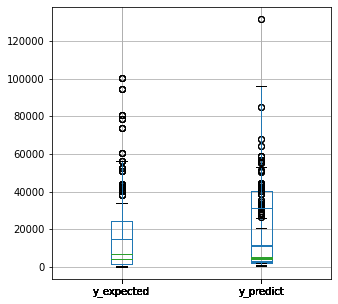

In [ ]:
#6 dimensões
d6()
run_model(MLPRegressor(hidden_layer_sizes=(3, 12, 75), activation = "relu", solver = "lbfgs", learning_rate = "constant", max_iter=1000, random_state=0), X_train, y_train, X_val, y_val, 'MLPRegressor 1')
run_model(MLPRegressor(hidden_layer_sizes=(3, 12, 75), activation = "relu", solver = "lbfgs", learning_rate = "invscaling", max_iter=1000, random_state=0), X_train, y_train, X_val, y_val, 'MLPRegressor 2')
run_model(MLPRegressor(hidden_layer_sizes=(3, 12, 75), activation = "relu", solver = "lbfgs", learning_rate = "constant", max_iter=1000, random_state=0), X_train, y_train, X_val, y_val, 'MLPRegressor 4')
run_model(KNeighborsRegressor(n_neighbors=5, weights="uniform", p=1, algorithm="brute"), X_train, y_train, X_val, y_val, 'KNeighborsRegressor 1')
run_model(KNeighborsRegressor(n_neighbors=5, weights="uniform", p=1, algorithm="kd_tree"), X_train, y_train, X_val, y_val, 'KNeighborsRegressor 2')
run_model(KNeighborsRegressor(n_neighbors=5, weights="uniform", p=1, algorithm="ball_tree"), X_train, y_train, X_val, y_val, 'KNeighborsRegressor 3')


In [ ]:
#9 dimensões
d9()
run_model(MLPRegressor(hidden_layer_sizes=(3, 12, 75), activation = "relu", solver = "lbfgs", learning_rate = "adaptive", max_iter=1000, random_state=0), X_train, y_train, X_val, y_val, 'MLPRegressor 3')
run_model(KNeighborsRegressor(n_neighbors=3, weights="uniform", p=2, algorithm="ball_tree"), X_train, y_train, X_val, y_val, 'KNeighborsRegressor 4')

In [ ]:
#3 dimensões
d3()
run_model(RandomForestRegressor(n_estimators = 25, criterion = "mae", max_depth = 5, min_samples_leaf = 2, random_state=0), X_train, y_train, X_val, y_val, 'RandomForestRegressor 1')
run_model(RandomForestRegressor(n_estimators = 500, criterion = "mae", max_depth = 5, min_samples_leaf = 2, random_state=0), X_train, y_train, X_val, y_val, 'RandomForestRegressor 2')
run_model(RandomForestRegressor(n_estimators = 50, criterion = "mse", max_depth = 5, min_samples_leaf = 2, random_state=0), X_train, y_train, X_val, y_val, 'RandomForestRegressor 3')
run_model(RandomForestRegressor(n_estimators = 250, criterion = "mae", max_depth = 5, min_samples_leaf = 2, random_state=0), X_train, y_train, X_val, y_val, 'RandomForestRegressor 4')

##### resultados
> O MLPRegressor conseguiu generalizar melhor que o RandomForestRegressor. De todos, o KNeighborsRegressor apresentou o pior resultado. Entre os MLPRegressors será escolhido o primeiro. Isto porque, além dele apresentar resultados muito próximo do melhor, isto pode variar a depender do random_state e ele apresenta-se mais simples, tendo apenas três camadas intermediárias e atuando nas seis dimensões. Portando, as predições serão feitas nele.

#### Predições

In [ ]:
d6()
predict_model = MLPRegressor(hidden_layer_sizes=(3), activation = "relu", solver = "lbfgs", learning_rate = "constant", max_iter=1000, random_state=0).fit(X_train, y_train)
results = pd.DataFrame()
results = X_na.dropna()
results["y_predict"] = predict_model.predict(results)
results

d6


Individuals using the Internet (per 100 inhabitants)  ...     y_predict
71                                                21.0     ...  7.453374e+06
75                                                73.0     ...  3.016643e+06
86                                                73.0     ...  3.603810e+06
129                                               48.0     ...  4.623464e+06
153                                               52.0     ...  3.561997e+06
234                                               89.0     ...  2.627192e+06

[6 rows x 7 columns]

In [ ]:
country_profiles[country_profiles.index.isin(results.index)]['country']

> Todos estes países possuem o PIB per capita em torno de 10^4, exceto o 224 que possuí algo em torno de 10^3. Como visto acima, os valores do PIB per capita estão na ordem de 10^6. Isto claramente está fora do esperado. Assim, tentaremos outros modelos para ver se será obtido resultados melhores.

In [ ]:
d6()
predict_model = KNeighborsRegressor(n_neighbors=5, weights="uniform", p=1, algorithm="brute").fit(X_train, y_train)
results = pd.DataFrame()
results = X_na.dropna()
results["y_predict"] = predict_model.predict(results)
results

d6


Individuals using the Internet (per 100 inhabitants)  ...  y_predict
71                                                21.0     ...   29323.94
75                                                73.0     ...   29323.94
86                                                73.0     ...   29323.94
129                                               48.0     ...   29323.94
153                                               52.0     ...   29323.94
234                                               89.0     ...   29323.94

[6 rows x 7 columns]

In [ ]:
d3()
predict_model = RandomForestRegressor(n_estimators = 25, criterion = "mae", max_depth = 5, min_samples_leaf = 2, random_state=0).fit(X_train, y_train)
results = pd.DataFrame()
results = X_na.dropna()
results["y_predict"] = predict_model.predict(results)
results

d3


Individuals using the Internet (per 100 inhabitants)  ...  y_predict
70                                                23.0     ...  39420.704
71                                                21.0     ...  39420.704
75                                                73.0     ...  39420.704
86                                                73.0     ...  39420.704
129                                               48.0     ...  39420.704
153                                               52.0     ...  39420.704
177                                               12.0     ...  39420.704
234                                               89.0     ...  39420.704

[8 rows x 4 columns]

##### Distância de Mahalanobis

In [ ]:
d6()
X = country_profiles[['Individuals using the Internet (per 100 inhabitants)', 'Life expectancy at birth (females/males, years) second', 'Food production index (2004-2006=100)', 'Life expectancy at birth (females/males, years) first', 'Agricultural production index (2004-2006=100)', 'Energy production, primary (Petajoules)']].dropna()
Sx = X.cov().values
Sx = sp.linalg.inv(Sx)
mean = X.mean().values
def mahalanobisR(X,meanCol,IC):
    m = []
    index = []
    for i in range(X.shape[0]):
      index.append(X.index[i])
      m.append(mahalanobis(X.iloc[i,:],meanCol,IC) ** 2)
    return(pd.DataFrame({'m_distance': m}, columns=['m_distance'], index=index))

mR = mahalanobisR(X,mean,Sx)
mR[mR.index.isin(X_na.dropna().index)]

d6


m_distance
71     2.190380
75     2.546519
86     2.318794
129    3.524316
153    0.972149
234    1.381957

In [ ]:
mR

##### Conclusão
> As duas predições seguintem foram um pouco mais realistas. Porém, ambas apresentaram uma predição constante. Isto pode indicar que os modelos estão considerando que estes fazem parte de um mesmo caso extremo. Para averiguar isto, foi verificada a distância Mahalanobis destes casos e verificou-se que tratam-se de casos comuns. Portanto, chegou-se a conclusão de que os modelos escolhidos foram super-ajustados tanto para o treinamento quanto para o teste, demonstrando-se incapaz de generalizar-se para a validação e apresentando resultados ruins para para predição. Para contornar isto, serão feitos os mesmos testes, porém utilizando a abordagem k-fold.

### Refazendo com k-fold

In [ ]:
mlflow.create_experiment("looking_kfold")

'4'

In [ ]:
def run_model_kfold(model, name):
  global kfold
  try:
    with mlflow.start_run(experiment_id=4):
      ae_Test = []
      ae_Train = []
      mae_Test = []
      mae_Train = []
      r2_Test = []
      r2_Train = []
      for X_train, X_test, y_train, y_test in kfold:
        result_train = pd.DataFrame()
        result_test = pd.DataFrame()

        model.fit(X_train, y_train)

        result_train['y_expected'] = y_train
        result_test['y_expected'] = y_test
        result_train['y_predict'] = model.predict(X_train)
        result_test['y_predict'] = model.predict(X_test)

        (ae_train, mae_train, r2_train) = eval_metrics_kfold(result_train['y_expected'], result_train['y_predict'])
        (ae_test, mae_test, r2_test) = eval_metrics_kfold(result_test['y_expected'], result_test['y_predict'])

        ae_Test.append(ae_test)
        ae_Train.append(ae_train)
        mae_Test.append(mae_test)
        mae_Train.append(mae_train)
        r2_Test.append(r2_test)
        r2_Train.append(r2_train)

      mean_r2_test = mean(r2_Test)
      std_r2_test = std(r2_Test)
      mean_r2_train = mean(r2_Train)
      std_r2_train = std(r2_Train)
      mean_ae_test = mean(ae_Test)
      std_ae_test = std(ae_Test)
      mean_ae_train = mean(ae_Train)
      std_ae_train = std(ae_Train)
      mean_mae_test = mean(mae_Test)
      std_mae_test = std(mae_Test)
      mean_mae_train = mean(mae_Train)
      std_mae_train = std(mae_Train)

      mlflow.log_metric("mean_r2_test", mean_r2_test)
      mlflow.log_metric("std_r2_test", std_r2_test)
      mlflow.log_metric("mean_r2_train", mean_r2_train)
      mlflow.log_metric("std_r2_train", std_r2_train)
      mlflow.log_metric("mean_ae_test", mean_ae_test)
      mlflow.log_metric("std_ae_test", std_ae_test)
      mlflow.log_metric("mean_ae_train", mean_ae_train)
      mlflow.log_metric("std_ae_train", std_ae_train)
      mlflow.log_metric("mean_mae_test", mean_mae_test)
      mlflow.log_metric("std_mae_test", std_mae_test)
      mlflow.log_metric("mean_mae_train", mean_mae_train)
      mlflow.log_metric("std_mae_train", std_mae_train)

      mlflow.set_tag("name", name)
      param_list = model.get_params(deep=True)
      print('|>m_r2_te:', mean_r2_test, '|s_r2_te:', std_r2_test, '|>m_r2_tr:', mean_r2_train, '|s_r2_tr:', std_r2_train, '|>m_ae_te:', mean_ae_test, '|s_ae_te:', std_ae_test, '|>m_ae_tr:', mean_ae_train, '|s_ae_tr:', std_ae_train, '|>m_mae_te:', mean_mae_test, '|s_mae_te:', std_mae_test, '|>m_mae_tr:', mean_mae_train, '|s_mae_tr:', std_mae_train, param_list)
      for param_key in param_list:
        mlflow.log_param(param_key, param_list[param_key])
  except Exception as e:
    print("error")
    print(e)

def eval_metrics_kfold(actual, pred):
  ae = 0
  for i in actual.index:
    ae += pred[i] - actual[i]
  ae /= actual.shape[0]
  mae = mean_absolute_error(actual, pred)
  r2 = r2_score(actual, pred)
  return ae, mae, r2

#### Aplicando modelos em 6 dimensões


In [ ]:
def d6_kfold():
  global X_val, y_val, X_na, X_train, y_train, X, kfold
  X_na = country_profiles[['Individuals using the Internet (per 100 inhabitants)', 'Life expectancy at birth (females/males, years) second', 'Food production index (2004-2006=100)', 'Life expectancy at birth (females/males, years) first', 'Agricultural production index (2004-2006=100)', 'Energy production, primary (Petajoules)']][country_profiles['GDP per capita (current US$)'].isna()]
  X = country_profiles[['Individuals using the Internet (per 100 inhabitants)', 'Life expectancy at birth (females/males, years) second', 'Food production index (2004-2006=100)', 'Life expectancy at birth (females/males, years) first', 'Agricultural production index (2004-2006=100)', 'Energy production, primary (Petajoules)']][~country_profiles['GDP per capita (current US$)'].isna()].dropna()
  y = country_profiles['GDP per capita (current US$)'][country_profiles.index.isin(X.index)]
  X[['Individuals using the Internet (per 100 inhabitants)', 'Life expectancy at birth (females/males, years) second', 'Food production index (2004-2006=100)', 'Life expectancy at birth (females/males, years) first', 'Agricultural production index (2004-2006=100)', 'Energy production, primary (Petajoules)']] = preprocessing.scale(X)
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
  kfold = []
  X_array = np.array(X_train)
  y_array = np.array(y_train)
  for train_index, test_index in KFold(n_splits=5).split(X_train):
    kfold.append((X_array[train_index], X_array[test_index], y_array[train_index], y_array[test_index]))
  print("d6_kfold")
d6_kfold()

d6_kfold


#####SVM

In [ ]:
run_model_kfold(svm.SVR(), 'SVR 6f')

|>m_r2_te: -0.22286048196682118 |s_r2_te: 0.11416036896402033 |>m_r2_tr: -0.20104260264114687 |s_r2_tr: 0.014102522203217402 |>m_ae_te: -7870.410347011626 |s_ae_te: 2387.979141616453 |>m_ae_tr: -7870.439676837117 |s_ae_tr: 238.57477005387312 |>m_mae_te: 10741.577063971386 |s_mae_te: 1609.5415976976558 |>m_mae_tr: 10644.852882241405 |s_mae_tr: 390.44913272565697 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
for dregree in [1, 2, 3, 4, 5]:
  run_model_kfold(svm.SVR(kernel='poly', degree=dregree), 'SVR 6f poly')

|>m_r2_te: -0.2208866959011852 |s_r2_te: 0.1140436991054505 |>m_r2_tr: -0.19904835667659926 |s_r2_tr: 0.013424373215999638 |>m_ae_te: -7867.565935117836 |s_ae_te: 2381.565708215279 |>m_ae_tr: -7867.751976724447 |s_ae_tr: 236.99257636988946 |>m_mae_te: 10725.177669836248 |s_mae_te: 1609.3547507198705 |>m_mae_tr: 10629.331369851508 |s_mae_tr: 389.90830554322406 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
|>m_r2_te: -0.2238062483020043 |s_r2_te: 0.11437688389204315 |>m_r2_tr: -0.20188548881984478 |s_r2_tr: 0.014229194630007928 |>m_ae_te: -7870.473574520956 |s_ae_te: 2390.602091188904 |>m_ae_tr: -7870.853570777706 |s_ae_tr: 239.59106218460755 |>m_mae_te: 10748.570171503829 |s_mae_te: 1609.6742867013718 |>m_mae_tr: 10650.728476403969 |s_mae_tr: 390.7548262437854 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel':

##### RandomForestRegressor

In [ ]:
for criterion in ["mse", "mae"]:
  for max_depth in [None, 1, 5, 10, 15]:
    for min_samples_leaf in [1, 5, 25]:
      for n_estimators in [5, 25, 50, 100, 250, 500]:
        run_model_kfold(RandomForestRegressor(n_estimators = n_estimators, criterion = criterion, max_depth = max_depth, min_samples_leaf = min_samples_leaf, random_state=0), 'RandomForestRegressor 6f')

|>m_r2_te: 0.704355361416364 |s_r2_te: 0.0895234295743081 |>m_r2_tr: 0.9413108160264485 |s_r2_tr: 0.021164806856851154 |>m_ae_te: -328.8131428571429 |s_ae_te: 1591.965275138454 |>m_ae_tr: 111.98757142857133 |s_ae_tr: 205.03347858890078 |>m_mae_te: 5392.362571428572 |s_mae_te: 1165.5012497529258 |>m_mae_tr: 2079.4987857142855 |s_mae_tr: 329.8112148382642 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
|>m_r2_te: 0.7892261462974666 |s_r2_te: 0.04114645042696851 |>m_r2_tr: 0.9610256133471309 |s_r2_tr: 0.007848488109271357 |>m_ae_te: -318.9873999999997 |s_ae_te: 1647.1827168717175 |>m_ae_tr: -260.0032214285708 |s_ae_tr: 160.8003522822308 |>m_mae_te: 4

##### MLPRegressor

In [ ]:
for activation in ["identity", "logistic", "tanh", "relu"]:
  for solver in ["lbfgs", "sgd", "adam"]:
    for learning_rate in ["constant", "invscaling", "adaptive"]:
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 3, 3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 12, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 12, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(6, 6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(6, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(6, 6, 6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(12, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(12, 12, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(12, 25, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(25, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(25, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(25, 25, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(75, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(75, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(75, 75, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(100, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 6f')

|>m_r2_te: 0.5651652546866679 |s_r2_te: 0.09259806465799118 |>m_r2_tr: 0.618247752773506 |s_r2_tr: 0.017135589427110298 |>m_ae_te: -87.41863578607968 |s_ae_te: 1318.4057686111819 |>m_ae_tr: 0.007780690855778971 |s_ae_tr: 0.04098682194015262 |>m_mae_te: 7384.66253732342 |s_mae_te: 1414.5637613867743 |>m_mae_tr: 7018.404612916094 |s_mae_tr: 353.43975570204157 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.5651658944533282 |s_r2_te: 0.09259968585237666 |>m_r2_tr: 0.6182477520132263 |s_r2_tr: 0.01713558921730239 |>m_ae_te: -87.24844307784501 |s_ae_te:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extm

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarn

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extm

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarn

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarn

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarn

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarn

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

inva

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

o

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarn

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

inva

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

inva

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overfl

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarn

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarn

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extm

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

o

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

o

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invali

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarn

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:105: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/s

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

o

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarn

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.5695614266539535 |s_r2_te: 0.16970827282748585 |>m_r2_tr: -0.5184821442876205 |s_r2_tr: 0.04006634848820396 |>m_ae_te: -12613.431364428983 |s_ae_te: 1993.1228204112178 |>m_ae_tr: -12613.42965037662 |s_ae_tr: 498.2798764127169 |>m_mae_te: 12613.431364428983 |s_mae_te: 1993.1228204112178 |>m_mae_tr: 12613.429650376622 |s_mae_tr: 498.27987641271636 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694200605192102 |s_r2_te: 0.16967551978507728 |>m_r2_tr: -0.5183501785293647 |s_r2_tr: 0.04005877362470558 |>m_ae_te: -12612.900887881038 |s_ae_te: 1993.1142968791276 |>m_ae_tr: -12612.899756304121 |s_ae_tr: 498.2764824095551 |>m_mae_te: 12612.900887881036 |s_mae_te: 1993.1142968791269 |>m_mae_tr: 12612.89975630412 |s_mae_tr: 498.27648240955585 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692874316939314 |s_r2_te: 0.1696478273491178 |>m_r2_tr: -0.5182236805438392 |s_r2_tr: 0.040050752244696786 |>m_ae_te: -12612.498380512177 |s_ae_te: 1992.8812767432216 |>m_ae_tr: -12612.489079511508 |s_ae_tr: 498.2278266949434 |>m_mae_te: 12612.498380512177 |s_mae_te: 1992.8812767432198 |>m_mae_tr: 12612.48907951151 |s_mae_tr: 498.2278266949417 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687076175671542 |s_r2_te: 0.16952149124002733 |>m_r2_tr: -0.5176812760007733 |s_r2_tr: 0.040021921742079684 |>m_ae_te: -12611.150499149104 |s_ae_te: 1992.129492673786 |>m_ae_tr: -12611.138739480037 |s_ae_tr: 498.0427781496439 |>m_mae_te: 12611.150499149104 |s_mae_te: 1992.129492673786 |>m_mae_tr: 12611.138739480037 |s_mae_tr: 498.04277814964263 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672858949271742 |s_r2_te: 0.16922786451021532 |>m_r2_tr: -0.5163349891478358 |s_r2_tr: 0.039951943885700864 |>m_ae_te: -12608.443949426814 |s_ae_te: 1990.5459669081397 |>m_ae_tr: -12608.438021896161 |s_ae_tr: 497.64071593717773 |>m_mae_te: 12608.443949426815 |s_mae_te: 1990.5459669081392 |>m_mae_tr: 12608.438021896163 |s_mae_tr: 497.6407159371783 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5661985710893218 |s_r2_te: 0.16898482412166974 |>m_r2_tr: -0.5153173765641326 |s_r2_tr: 0.03988794364441654 |>m_ae_te: -12606.284960506735 |s_ae_te: 1989.4735560740219 |>m_ae_tr: -12606.269889854364 |s_ae_tr: 497.39427895930885 |>m_mae_te: 12606.284960506735 |s_mae_te: 1989.4735560740214 |>m_mae_tr: 12606.269889854366 |s_mae_tr: 497.3942789593076 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693603044066725 |s_r2_te: 0.16966370323382018 |>m_r2_tr: -0.5182920779247577 |s_r2_tr: 0.04005674625355488 |>m_ae_te: -12613.421415415565 |s_ae_te: 1993.075245209587 |>m_ae_tr: -12613.421296786524 |s_ae_tr: 498.2666146508068 |>m_mae_te: 12613.421415415563 |s_mae_te: 1993.075245209587 |>m_mae_tr: 12613.421296786528 |s_mae_tr: 498.26661465080764 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687537320257752 |s_r2_te: 0.1695310225847708 |>m_r2_tr: -0.5177221937847623 |s_r2_tr: 0.04002712023060048 |>m_ae_te: -12611.71025612405 |s_ae_te: 1992.7004068756207 |>m_ae_tr: -12611.71396703909 |s_ae_tr: 498.1708401808647 |>m_mae_te: 12611.71025612405 |s_mae_te: 1992.700406875619 |>m_mae_tr: 12611.71396703909 |s_mae_tr: 498.1708401808647 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685826829780634 |s_r2_te: 0.16948743143705136 |>m_r2_tr: -0.5175710803140069 |s_r2_tr: 0.04001887198566424 |>m_ae_te: -12611.977898424559 |s_ae_te: 1992.280122716312 |>m_ae_tr: -12611.973599700777 |s_ae_tr: 498.0644473579129 |>m_mae_te: 12611.977898424555 |s_mae_te: 1992.2801227163118 |>m_mae_tr: 12611.973599700774 |s_mae_tr: 498.0644473579117 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5574018298490031 |s_r2_te: 0.16698054764068931 |>m_r2_tr: -0.5071811671134044 |s_r2_tr: 0.03944556007126579 |>m_ae_te: -12558.748711476734 |s_ae_te: 1984.368349925645 |>m_ae_tr: -12558.69491833804 |s_ae_tr: 496.0738266067886 |>m_mae_te: 12558.748711476734 |s_mae_te: 1984.3683499256447 |>m_mae_tr: 12558.694918338042 |s_mae_tr: 496.0738266067886 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5309647950793235 |s_r2_te: 0.16102093185909025 |>m_r2_tr: -0.4826169262892138 |s_r2_tr: 0.03794559124760602 |>m_ae_te: -12421.278410767214 |s_ae_te: 1953.228374126579 |>m_ae_tr: -12421.509152347233 |s_ae_tr: 489.0600881119582 |>m_mae_te: 12421.278410767214 |s_mae_te: 1953.2283741265783 |>m_mae_tr: 12421.509152347233 |s_mae_tr: 489.0600881119581 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5688153688105293 |s_r2_te: 0.16956657365454192 |>m_r2_tr: -0.5177670489079065 |s_r2_tr: 0.04002766005888751 |>m_ae_te: -12611.244192469883 |s_ae_te: 1991.985337194505 |>m_ae_tr: -12611.23811366393 |s_ae_tr: 497.994519502599 |>m_mae_te: 12611.244192469883 |s_mae_te: 1991.985337194505 |>m_mae_tr: 12611.238113663934 |s_mae_tr: 497.99451950260203 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5681110779250902 |s_r2_te: 0.16940773188849542 |>m_r2_tr: -0.5171182560502849 |s_r2_tr: 0.039988443939705104 |>m_ae_te: -12608.108214122107 |s_ae_te: 1991.2800819587133 |>m_ae_tr: -12608.1091875226 |s_ae_tr: 497.82121288720845 |>m_mae_te: 12608.108214122109 |s_mae_te: 1991.2800819587146 |>m_mae_tr: 12608.109187522601 |s_mae_tr: 497.82121288720737 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5646494896574125 |s_r2_te: 0.16875897327173678 |>m_r2_tr: -0.5138088686743081 |s_r2_tr: 0.03981180725356662 |>m_ae_te: -12599.738665339735 |s_ae_te: 1986.262092531022 |>m_ae_tr: -12599.763596116085 |s_ae_tr: 496.5678313443578 |>m_mae_te: 12599.738665339735 |s_mae_te: 1986.2620925310223 |>m_mae_tr: 12599.763596116087 |s_mae_tr: 496.5678313443602 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5668602987408702 |s_r2_te: 0.16915316903882532 |>m_r2_tr: -0.5159061336692806 |s_r2_tr: 0.03993839845033085 |>m_ae_te: -12605.02599726453 |s_ae_te: 1989.5454710718775 |>m_ae_tr: -12605.02434665049 |s_ae_tr: 498.00570222149065 |>m_mae_te: 12605.025997264529 |s_mae_te: 1989.545471071879 |>m_mae_tr: 12605.024346650493 |s_mae_tr: 498.00570222149156 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5554966500446253 |s_r2_te: 0.16680485646480647 |>m_r2_tr: -0.5050407805224969 |s_r2_tr: 0.03927582282139267 |>m_ae_te: -12573.892907397076 |s_ae_te: 1976.3429978594745 |>m_ae_tr: -12573.867363402971 |s_ae_tr: 494.57841925644976 |>m_mae_te: 12573.892907397078 |s_mae_te: 1976.342997859474 |>m_mae_tr: 12573.86736340297 |s_mae_tr: 494.5784192564467 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.34874785351764015 |s_r2_te: 0.12399385720033974 |>m_r2_tr: -0.3092891630327073 |s_r2_tr: 0.028818494076949083 |>m_ae_te: -11907.992685120264 |s_ae_te: 1730.5938982233426 |>m_ae_tr: -11902.380264862564 |s_ae_tr: 435.1200167234995 |>m_mae_te: 11954.091113478155 |s_mae_te: 1697.6738787742418 |>m_mae_tr: 11947.164987384951 |s_mae_tr: 427.24118520717997 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5571284109434326 |s_r2_te: 0.1670664654799245 |>m_r2_tr: -0.5067232972252121 |s_r2_tr: 0.03936431119749439 |>m_ae_te: -12579.782407764706 |s_ae_te: 1980.8267111048258 |>m_ae_tr: -12579.40797762687 |s_ae_tr: 495.50099507929934 |>m_mae_te: 12579.782407764707 |s_mae_te: 1980.8267111048265 |>m_mae_tr: 12579.407977626872 |s_mae_tr: 495.5009950792983 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5343468103116878 |s_r2_te: 0.16198509802630623 |>m_r2_tr: -0.4853217290530023 |s_r2_tr: 0.038163910119700446 |>m_ae_te: -12517.090460902671 |s_ae_te: 1957.9285813082738 |>m_ae_tr: -12517.367511064702 |s_ae_tr: 489.9984992693866 |>m_mae_te: 12517.090460902667 |s_mae_te: 1957.9285813082727 |>m_mae_tr: 12517.367511064702 |s_mae_tr: 489.9984992693859 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4065025649327013 |s_r2_te: 0.13443344589255124 |>m_r2_tr: -0.362832237465316 |s_r2_tr: 0.03093776259363286 |>m_ae_te: -12111.42882818238 |s_ae_te: 1812.7959812765507 |>m_ae_tr: -12101.355735813273 |s_ae_tr: 475.18482746080485 |>m_mae_te: 12138.8283445223 |s_mae_te: 1793.6446451532936 |>m_mae_tr: 12126.77685092403 |s_mae_tr: 472.1572265787811 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.46884745657702764 |s_r2_te: 0.148125496427822 |>m_r2_tr: -0.42312842942613305 |s_r2_tr: 0.03481450570428012 |>m_ae_te: -12381.035739957602 |s_ae_te: 1876.578470593081 |>m_ae_tr: -12377.746865847477 |s_ae_tr: 470.04899604424685 |>m_mae_te: 12381.035739957602 |s_mae_te: 1876.578470593081 |>m_mae_tr: 12377.746865847474 |s_mae_tr: 470.04899604424907 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4375466787273437 |s_r2_te: 0.14151440951376945 |>m_r2_tr: -0.3934793343493816 |s_r2_tr: 0.03290609389490128 |>m_ae_te: -12295.342533573154 |s_ae_te: 1840.85517725026 |>m_ae_tr: -12290.925418928893 |s_ae_tr: 460.754915797452 |>m_mae_te: 12300.232322526517 |s_mae_te: 1837.0358873152456 |>m_mae_tr: 12295.389921764563 |s_mae_tr: 459.93064133158094 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.33712865084621624 |s_r2_te: 0.11953140598603317 |>m_r2_tr: 0.41441877710145897 |s_r2_tr: 0.032087687535651575 |>m_ae_te: -6487.912400267291 |s_ae_te: 1265.3245720542725 |>m_ae_tr: -6009.789266723728 |s_ae_tr: 652.2273806243197 |>m_mae_te: 9468.397797436846 |s_mae_te: 1668.710037028214 |>m_mae_tr: 9122.151212669452 |s_mae_tr: 470.65578149689264 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.40139330829496966 |s_r2_te: 0.13371392648143549 |>m_r2_tr: -0.35804184648318327 |s_r2_tr: 0.030656592863967113 |>m_ae_te: -12233.845141643069 |s_ae_te: 1787.0841217884374 |>m_ae_tr: -12222.683154428543 |s_ae_tr: 452.7615676983551 |>m_mae_te: 12256.300973130645 |s_mae_te: 1770.6328844787422 |>m_mae_tr: 12243.484453487346 |s_mae_tr: 449.1962980260839 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.4709175000053388 |s_r2_te: 0.109899903602225 |>m_r2_tr: 0.523933948708958 |s_r2_tr: 0.019132691533592004 |>m_ae_te: -3806.1097003430195 |s_ae_te: 1620.457042997357 |>m_ae_tr: -3393.865534830664 |s_ae_tr: 487.1254393241467 |>m_mae_te: 8553.241036102983 |s_mae_te: 1729.8207874883515 |>m_mae_tr: 8275.89024729365 |s_mae_tr: 442.44603994754834 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695614266539535 |s_r2_te: 0.16970827282748585 |>m_r2_tr: -0.5184821442876205 |s_r2_tr: 0.04006634848820396 |>m_ae_te: -12613.431364428983 |s_ae_te: 1993.1228204112178 |>m_ae_tr: -12613.42965037662 |s_ae_tr: 498.2798764127169 |>m_mae_te: 12613.431364428983 |s_mae_te: 1993.1228204112178 |>m_mae_tr: 12613.429650376622 |s_mae_tr: 498.27987641271636 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694200605192102 |s_r2_te: 0.16967551978507728 |>m_r2_tr: -0.5183501785293647 |s_r2_tr: 0.04005877362470558 |>m_ae_te: -12612.900887881038 |s_ae_te: 1993.1142968791276 |>m_ae_tr: -12612.899756304121 |s_ae_tr: 498.2764824095551 |>m_mae_te: 12612.900887881036 |s_mae_te: 1993.1142968791269 |>m_mae_tr: 12612.89975630412 |s_mae_tr: 498.27648240955585 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692874316939314 |s_r2_te: 0.1696478273491178 |>m_r2_tr: -0.5182236805438392 |s_r2_tr: 0.040050752244696786 |>m_ae_te: -12612.498380512177 |s_ae_te: 1992.8812767432216 |>m_ae_tr: -12612.489079511508 |s_ae_tr: 498.2278266949434 |>m_mae_te: 12612.498380512177 |s_mae_te: 1992.8812767432198 |>m_mae_tr: 12612.48907951151 |s_mae_tr: 498.2278266949417 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687076175671542 |s_r2_te: 0.16952149124002733 |>m_r2_tr: -0.5176812760007733 |s_r2_tr: 0.040021921742079684 |>m_ae_te: -12611.150499149104 |s_ae_te: 1992.129492673786 |>m_ae_tr: -12611.138739480037 |s_ae_tr: 498.0427781496439 |>m_mae_te: 12611.150499149104 |s_mae_te: 1992.129492673786 |>m_mae_tr: 12611.138739480037 |s_mae_tr: 498.04277814964263 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672858949271742 |s_r2_te: 0.16922786451021532 |>m_r2_tr: -0.5163349891478358 |s_r2_tr: 0.039951943885700864 |>m_ae_te: -12608.443949426814 |s_ae_te: 1990.5459669081397 |>m_ae_tr: -12608.438021896161 |s_ae_tr: 497.64071593717773 |>m_mae_te: 12608.443949426815 |s_mae_te: 1990.5459669081392 |>m_mae_tr: 12608.438021896163 |s_mae_tr: 497.6407159371783 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5661985710893218 |s_r2_te: 0.16898482412166974 |>m_r2_tr: -0.5153173765641326 |s_r2_tr: 0.03988794364441654 |>m_ae_te: -12606.284960506735 |s_ae_te: 1989.4735560740219 |>m_ae_tr: -12606.269889854364 |s_ae_tr: 497.39427895930885 |>m_mae_te: 12606.284960506735 |s_mae_te: 1989.4735560740214 |>m_mae_tr: 12606.269889854366 |s_mae_tr: 497.3942789593076 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693603044066725 |s_r2_te: 0.16966370323382018 |>m_r2_tr: -0.5182920779247577 |s_r2_tr: 0.04005674625355488 |>m_ae_te: -12613.421415415565 |s_ae_te: 1993.075245209587 |>m_ae_tr: -12613.421296786524 |s_ae_tr: 498.2666146508068 |>m_mae_te: 12613.421415415563 |s_mae_te: 1993.075245209587 |>m_mae_tr: 12613.421296786528 |s_mae_tr: 498.26661465080764 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687537320257752 |s_r2_te: 0.1695310225847708 |>m_r2_tr: -0.5177221937847623 |s_r2_tr: 0.04002712023060048 |>m_ae_te: -12611.71025612405 |s_ae_te: 1992.7004068756207 |>m_ae_tr: -12611.71396703909 |s_ae_tr: 498.1708401808647 |>m_mae_te: 12611.71025612405 |s_mae_te: 1992.700406875619 |>m_mae_tr: 12611.71396703909 |s_mae_tr: 498.1708401808647 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685826829780634 |s_r2_te: 0.16948743143705136 |>m_r2_tr: -0.5175710803140069 |s_r2_tr: 0.04001887198566424 |>m_ae_te: -12611.977898424559 |s_ae_te: 1992.280122716312 |>m_ae_tr: -12611.973599700777 |s_ae_tr: 498.0644473579129 |>m_mae_te: 12611.977898424555 |s_mae_te: 1992.2801227163118 |>m_mae_tr: 12611.973599700774 |s_mae_tr: 498.0644473579117 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5574018298490031 |s_r2_te: 0.16698054764068931 |>m_r2_tr: -0.5071811671134044 |s_r2_tr: 0.03944556007126579 |>m_ae_te: -12558.748711476734 |s_ae_te: 1984.368349925645 |>m_ae_tr: -12558.69491833804 |s_ae_tr: 496.0738266067886 |>m_mae_te: 12558.748711476734 |s_mae_te: 1984.3683499256447 |>m_mae_tr: 12558.694918338042 |s_mae_tr: 496.0738266067886 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5309647950793235 |s_r2_te: 0.16102093185909025 |>m_r2_tr: -0.4826169262892138 |s_r2_tr: 0.03794559124760602 |>m_ae_te: -12421.278410767214 |s_ae_te: 1953.228374126579 |>m_ae_tr: -12421.509152347233 |s_ae_tr: 489.0600881119582 |>m_mae_te: 12421.278410767214 |s_mae_te: 1953.2283741265783 |>m_mae_tr: 12421.509152347233 |s_mae_tr: 489.0600881119581 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5688153688105293 |s_r2_te: 0.16956657365454192 |>m_r2_tr: -0.5177670489079065 |s_r2_tr: 0.04002766005888751 |>m_ae_te: -12611.244192469883 |s_ae_te: 1991.985337194505 |>m_ae_tr: -12611.23811366393 |s_ae_tr: 497.994519502599 |>m_mae_te: 12611.244192469883 |s_mae_te: 1991.985337194505 |>m_mae_tr: 12611.238113663934 |s_mae_tr: 497.99451950260203 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5681110779250902 |s_r2_te: 0.16940773188849542 |>m_r2_tr: -0.5171182560502849 |s_r2_tr: 0.039988443939705104 |>m_ae_te: -12608.108214122107 |s_ae_te: 1991.2800819587133 |>m_ae_tr: -12608.1091875226 |s_ae_tr: 497.82121288720845 |>m_mae_te: 12608.108214122109 |s_mae_te: 1991.2800819587146 |>m_mae_tr: 12608.109187522601 |s_mae_tr: 497.82121288720737 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5646494896574125 |s_r2_te: 0.16875897327173678 |>m_r2_tr: -0.5138088686743081 |s_r2_tr: 0.03981180725356662 |>m_ae_te: -12599.738665339735 |s_ae_te: 1986.262092531022 |>m_ae_tr: -12599.763596116085 |s_ae_tr: 496.5678313443578 |>m_mae_te: 12599.738665339735 |s_mae_te: 1986.2620925310223 |>m_mae_tr: 12599.763596116087 |s_mae_tr: 496.5678313443602 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5668602987408702 |s_r2_te: 0.16915316903882532 |>m_r2_tr: -0.5159061336692806 |s_r2_tr: 0.03993839845033085 |>m_ae_te: -12605.02599726453 |s_ae_te: 1989.5454710718775 |>m_ae_tr: -12605.02434665049 |s_ae_tr: 498.00570222149065 |>m_mae_te: 12605.025997264529 |s_mae_te: 1989.545471071879 |>m_mae_tr: 12605.024346650493 |s_mae_tr: 498.00570222149156 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5554966500446253 |s_r2_te: 0.16680485646480647 |>m_r2_tr: -0.5050407805224969 |s_r2_tr: 0.03927582282139267 |>m_ae_te: -12573.892907397076 |s_ae_te: 1976.3429978594745 |>m_ae_tr: -12573.867363402971 |s_ae_tr: 494.57841925644976 |>m_mae_te: 12573.892907397078 |s_mae_te: 1976.342997859474 |>m_mae_tr: 12573.86736340297 |s_mae_tr: 494.5784192564467 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.34874785351764015 |s_r2_te: 0.12399385720033974 |>m_r2_tr: -0.3092891630327073 |s_r2_tr: 0.028818494076949083 |>m_ae_te: -11907.992685120264 |s_ae_te: 1730.5938982233426 |>m_ae_tr: -11902.380264862564 |s_ae_tr: 435.1200167234995 |>m_mae_te: 11954.091113478155 |s_mae_te: 1697.6738787742418 |>m_mae_tr: 11947.164987384951 |s_mae_tr: 427.24118520717997 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5571284109434326 |s_r2_te: 0.1670664654799245 |>m_r2_tr: -0.5067232972252121 |s_r2_tr: 0.03936431119749439 |>m_ae_te: -12579.782407764706 |s_ae_te: 1980.8267111048258 |>m_ae_tr: -12579.40797762687 |s_ae_tr: 495.50099507929934 |>m_mae_te: 12579.782407764707 |s_mae_te: 1980.8267111048265 |>m_mae_tr: 12579.407977626872 |s_mae_tr: 495.5009950792983 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5343468103116878 |s_r2_te: 0.16198509802630623 |>m_r2_tr: -0.4853217290530023 |s_r2_tr: 0.038163910119700446 |>m_ae_te: -12517.090460902671 |s_ae_te: 1957.9285813082738 |>m_ae_tr: -12517.367511064702 |s_ae_tr: 489.9984992693866 |>m_mae_te: 12517.090460902667 |s_mae_te: 1957.9285813082727 |>m_mae_tr: 12517.367511064702 |s_mae_tr: 489.9984992693859 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4065025649327013 |s_r2_te: 0.13443344589255124 |>m_r2_tr: -0.362832237465316 |s_r2_tr: 0.03093776259363286 |>m_ae_te: -12111.42882818238 |s_ae_te: 1812.7959812765507 |>m_ae_tr: -12101.355735813273 |s_ae_tr: 475.18482746080485 |>m_mae_te: 12138.8283445223 |s_mae_te: 1793.6446451532936 |>m_mae_tr: 12126.77685092403 |s_mae_tr: 472.1572265787811 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.46884745657702764 |s_r2_te: 0.148125496427822 |>m_r2_tr: -0.42312842942613305 |s_r2_tr: 0.03481450570428012 |>m_ae_te: -12381.035739957602 |s_ae_te: 1876.578470593081 |>m_ae_tr: -12377.746865847477 |s_ae_tr: 470.04899604424685 |>m_mae_te: 12381.035739957602 |s_mae_te: 1876.578470593081 |>m_mae_tr: 12377.746865847474 |s_mae_tr: 470.04899604424907 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4375466787273437 |s_r2_te: 0.14151440951376945 |>m_r2_tr: -0.3934793343493816 |s_r2_tr: 0.03290609389490128 |>m_ae_te: -12295.342533573154 |s_ae_te: 1840.85517725026 |>m_ae_tr: -12290.925418928893 |s_ae_tr: 460.754915797452 |>m_mae_te: 12300.232322526517 |s_mae_te: 1837.0358873152456 |>m_mae_tr: 12295.389921764563 |s_mae_tr: 459.93064133158094 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.33712865084621624 |s_r2_te: 0.11953140598603317 |>m_r2_tr: 0.41441877710145897 |s_r2_tr: 0.032087687535651575 |>m_ae_te: -6487.912400267291 |s_ae_te: 1265.3245720542725 |>m_ae_tr: -6009.789266723728 |s_ae_tr: 652.2273806243197 |>m_mae_te: 9468.397797436846 |s_mae_te: 1668.710037028214 |>m_mae_tr: 9122.151212669452 |s_mae_tr: 470.65578149689264 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.40139330829496966 |s_r2_te: 0.13371392648143549 |>m_r2_tr: -0.35804184648318327 |s_r2_tr: 0.030656592863967113 |>m_ae_te: -12233.845141643069 |s_ae_te: 1787.0841217884374 |>m_ae_tr: -12222.683154428543 |s_ae_tr: 452.7615676983551 |>m_mae_te: 12256.300973130645 |s_mae_te: 1770.6328844787422 |>m_mae_tr: 12243.484453487346 |s_mae_tr: 449.1962980260839 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.4709175000053388 |s_r2_te: 0.109899903602225 |>m_r2_tr: 0.523933948708958 |s_r2_tr: 0.019132691533592004 |>m_ae_te: -3806.1097003430195 |s_ae_te: 1620.457042997357 |>m_ae_tr: -3393.865534830664 |s_ae_tr: 487.1254393241467 |>m_mae_te: 8553.241036102983 |s_mae_te: 1729.8207874883515 |>m_mae_tr: 8275.89024729365 |s_mae_tr: 442.44603994754834 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695614266539535 |s_r2_te: 0.16970827282748585 |>m_r2_tr: -0.5184821442876205 |s_r2_tr: 0.04006634848820396 |>m_ae_te: -12613.431364428983 |s_ae_te: 1993.1228204112178 |>m_ae_tr: -12613.42965037662 |s_ae_tr: 498.2798764127169 |>m_mae_te: 12613.431364428983 |s_mae_te: 1993.1228204112178 |>m_mae_tr: 12613.429650376622 |s_mae_tr: 498.27987641271636 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694200605192102 |s_r2_te: 0.16967551978507728 |>m_r2_tr: -0.5183501785293647 |s_r2_tr: 0.04005877362470558 |>m_ae_te: -12612.900887881038 |s_ae_te: 1993.1142968791276 |>m_ae_tr: -12612.899756304121 |s_ae_tr: 498.2764824095551 |>m_mae_te: 12612.900887881036 |s_mae_te: 1993.1142968791269 |>m_mae_tr: 12612.89975630412 |s_mae_tr: 498.27648240955585 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692874316939314 |s_r2_te: 0.1696478273491178 |>m_r2_tr: -0.5182236805438392 |s_r2_tr: 0.040050752244696786 |>m_ae_te: -12612.498380512177 |s_ae_te: 1992.8812767432216 |>m_ae_tr: -12612.489079511508 |s_ae_tr: 498.2278266949434 |>m_mae_te: 12612.498380512177 |s_mae_te: 1992.8812767432198 |>m_mae_tr: 12612.48907951151 |s_mae_tr: 498.2278266949417 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687076175671542 |s_r2_te: 0.16952149124002733 |>m_r2_tr: -0.5176812760007733 |s_r2_tr: 0.040021921742079684 |>m_ae_te: -12611.150499149104 |s_ae_te: 1992.129492673786 |>m_ae_tr: -12611.138739480037 |s_ae_tr: 498.0427781496439 |>m_mae_te: 12611.150499149104 |s_mae_te: 1992.129492673786 |>m_mae_tr: 12611.138739480037 |s_mae_tr: 498.04277814964263 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672858949271742 |s_r2_te: 0.16922786451021532 |>m_r2_tr: -0.5163349891478358 |s_r2_tr: 0.039951943885700864 |>m_ae_te: -12608.443949426814 |s_ae_te: 1990.5459669081397 |>m_ae_tr: -12608.438021896161 |s_ae_tr: 497.64071593717773 |>m_mae_te: 12608.443949426815 |s_mae_te: 1990.5459669081392 |>m_mae_tr: 12608.438021896163 |s_mae_tr: 497.6407159371783 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5661985710893218 |s_r2_te: 0.16898482412166974 |>m_r2_tr: -0.5153173765641326 |s_r2_tr: 0.03988794364441654 |>m_ae_te: -12606.284960506735 |s_ae_te: 1989.4735560740219 |>m_ae_tr: -12606.269889854364 |s_ae_tr: 497.39427895930885 |>m_mae_te: 12606.284960506735 |s_mae_te: 1989.4735560740214 |>m_mae_tr: 12606.269889854366 |s_mae_tr: 497.3942789593076 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693603044066725 |s_r2_te: 0.16966370323382018 |>m_r2_tr: -0.5182920779247577 |s_r2_tr: 0.04005674625355488 |>m_ae_te: -12613.421415415565 |s_ae_te: 1993.075245209587 |>m_ae_tr: -12613.421296786524 |s_ae_tr: 498.2666146508068 |>m_mae_te: 12613.421415415563 |s_mae_te: 1993.075245209587 |>m_mae_tr: 12613.421296786528 |s_mae_tr: 498.26661465080764 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687537320257752 |s_r2_te: 0.1695310225847708 |>m_r2_tr: -0.5177221937847623 |s_r2_tr: 0.04002712023060048 |>m_ae_te: -12611.71025612405 |s_ae_te: 1992.7004068756207 |>m_ae_tr: -12611.71396703909 |s_ae_tr: 498.1708401808647 |>m_mae_te: 12611.71025612405 |s_mae_te: 1992.700406875619 |>m_mae_tr: 12611.71396703909 |s_mae_tr: 498.1708401808647 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685826829780634 |s_r2_te: 0.16948743143705136 |>m_r2_tr: -0.5175710803140069 |s_r2_tr: 0.04001887198566424 |>m_ae_te: -12611.977898424559 |s_ae_te: 1992.280122716312 |>m_ae_tr: -12611.973599700777 |s_ae_tr: 498.0644473579129 |>m_mae_te: 12611.977898424555 |s_mae_te: 1992.2801227163118 |>m_mae_tr: 12611.973599700774 |s_mae_tr: 498.0644473579117 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5574018298490031 |s_r2_te: 0.16698054764068931 |>m_r2_tr: -0.5071811671134044 |s_r2_tr: 0.03944556007126579 |>m_ae_te: -12558.748711476734 |s_ae_te: 1984.368349925645 |>m_ae_tr: -12558.69491833804 |s_ae_tr: 496.0738266067886 |>m_mae_te: 12558.748711476734 |s_mae_te: 1984.3683499256447 |>m_mae_tr: 12558.694918338042 |s_mae_tr: 496.0738266067886 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5309647950793235 |s_r2_te: 0.16102093185909025 |>m_r2_tr: -0.4826169262892138 |s_r2_tr: 0.03794559124760602 |>m_ae_te: -12421.278410767214 |s_ae_te: 1953.228374126579 |>m_ae_tr: -12421.509152347233 |s_ae_tr: 489.0600881119582 |>m_mae_te: 12421.278410767214 |s_mae_te: 1953.2283741265783 |>m_mae_tr: 12421.509152347233 |s_mae_tr: 489.0600881119581 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5688153688105293 |s_r2_te: 0.16956657365454192 |>m_r2_tr: -0.5177670489079065 |s_r2_tr: 0.04002766005888751 |>m_ae_te: -12611.244192469883 |s_ae_te: 1991.985337194505 |>m_ae_tr: -12611.23811366393 |s_ae_tr: 497.994519502599 |>m_mae_te: 12611.244192469883 |s_mae_te: 1991.985337194505 |>m_mae_tr: 12611.238113663934 |s_mae_tr: 497.99451950260203 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5681110779250902 |s_r2_te: 0.16940773188849542 |>m_r2_tr: -0.5171182560502849 |s_r2_tr: 0.039988443939705104 |>m_ae_te: -12608.108214122107 |s_ae_te: 1991.2800819587133 |>m_ae_tr: -12608.1091875226 |s_ae_tr: 497.82121288720845 |>m_mae_te: 12608.108214122109 |s_mae_te: 1991.2800819587146 |>m_mae_tr: 12608.109187522601 |s_mae_tr: 497.82121288720737 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5646494896574125 |s_r2_te: 0.16875897327173678 |>m_r2_tr: -0.5138088686743081 |s_r2_tr: 0.03981180725356662 |>m_ae_te: -12599.738665339735 |s_ae_te: 1986.262092531022 |>m_ae_tr: -12599.763596116085 |s_ae_tr: 496.5678313443578 |>m_mae_te: 12599.738665339735 |s_mae_te: 1986.2620925310223 |>m_mae_tr: 12599.763596116087 |s_mae_tr: 496.5678313443602 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5668602987408702 |s_r2_te: 0.16915316903882532 |>m_r2_tr: -0.5159061336692806 |s_r2_tr: 0.03993839845033085 |>m_ae_te: -12605.02599726453 |s_ae_te: 1989.5454710718775 |>m_ae_tr: -12605.02434665049 |s_ae_tr: 498.00570222149065 |>m_mae_te: 12605.025997264529 |s_mae_te: 1989.545471071879 |>m_mae_tr: 12605.024346650493 |s_mae_tr: 498.00570222149156 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5554966500446253 |s_r2_te: 0.16680485646480647 |>m_r2_tr: -0.5050407805224969 |s_r2_tr: 0.03927582282139267 |>m_ae_te: -12573.892907397076 |s_ae_te: 1976.3429978594745 |>m_ae_tr: -12573.867363402971 |s_ae_tr: 494.57841925644976 |>m_mae_te: 12573.892907397078 |s_mae_te: 1976.342997859474 |>m_mae_tr: 12573.86736340297 |s_mae_tr: 494.5784192564467 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.34874785351764015 |s_r2_te: 0.12399385720033974 |>m_r2_tr: -0.3092891630327073 |s_r2_tr: 0.028818494076949083 |>m_ae_te: -11907.992685120264 |s_ae_te: 1730.5938982233426 |>m_ae_tr: -11902.380264862564 |s_ae_tr: 435.1200167234995 |>m_mae_te: 11954.091113478155 |s_mae_te: 1697.6738787742418 |>m_mae_tr: 11947.164987384951 |s_mae_tr: 427.24118520717997 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5571284109434326 |s_r2_te: 0.1670664654799245 |>m_r2_tr: -0.5067232972252121 |s_r2_tr: 0.03936431119749439 |>m_ae_te: -12579.782407764706 |s_ae_te: 1980.8267111048258 |>m_ae_tr: -12579.40797762687 |s_ae_tr: 495.50099507929934 |>m_mae_te: 12579.782407764707 |s_mae_te: 1980.8267111048265 |>m_mae_tr: 12579.407977626872 |s_mae_tr: 495.5009950792983 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5343468103116878 |s_r2_te: 0.16198509802630623 |>m_r2_tr: -0.4853217290530023 |s_r2_tr: 0.038163910119700446 |>m_ae_te: -12517.090460902671 |s_ae_te: 1957.9285813082738 |>m_ae_tr: -12517.367511064702 |s_ae_tr: 489.9984992693866 |>m_mae_te: 12517.090460902667 |s_mae_te: 1957.9285813082727 |>m_mae_tr: 12517.367511064702 |s_mae_tr: 489.9984992693859 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4065025649327013 |s_r2_te: 0.13443344589255124 |>m_r2_tr: -0.362832237465316 |s_r2_tr: 0.03093776259363286 |>m_ae_te: -12111.42882818238 |s_ae_te: 1812.7959812765507 |>m_ae_tr: -12101.355735813273 |s_ae_tr: 475.18482746080485 |>m_mae_te: 12138.8283445223 |s_mae_te: 1793.6446451532936 |>m_mae_tr: 12126.77685092403 |s_mae_tr: 472.1572265787811 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.46884745657702764 |s_r2_te: 0.148125496427822 |>m_r2_tr: -0.42312842942613305 |s_r2_tr: 0.03481450570428012 |>m_ae_te: -12381.035739957602 |s_ae_te: 1876.578470593081 |>m_ae_tr: -12377.746865847477 |s_ae_tr: 470.04899604424685 |>m_mae_te: 12381.035739957602 |s_mae_te: 1876.578470593081 |>m_mae_tr: 12377.746865847474 |s_mae_tr: 470.04899604424907 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4375466787273437 |s_r2_te: 0.14151440951376945 |>m_r2_tr: -0.3934793343493816 |s_r2_tr: 0.03290609389490128 |>m_ae_te: -12295.342533573154 |s_ae_te: 1840.85517725026 |>m_ae_tr: -12290.925418928893 |s_ae_tr: 460.754915797452 |>m_mae_te: 12300.232322526517 |s_mae_te: 1837.0358873152456 |>m_mae_tr: 12295.389921764563 |s_mae_tr: 459.93064133158094 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.33712865084621624 |s_r2_te: 0.11953140598603317 |>m_r2_tr: 0.41441877710145897 |s_r2_tr: 0.032087687535651575 |>m_ae_te: -6487.912400267291 |s_ae_te: 1265.3245720542725 |>m_ae_tr: -6009.789266723728 |s_ae_tr: 652.2273806243197 |>m_mae_te: 9468.397797436846 |s_mae_te: 1668.710037028214 |>m_mae_tr: 9122.151212669452 |s_mae_tr: 470.65578149689264 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.40139330829496966 |s_r2_te: 0.13371392648143549 |>m_r2_tr: -0.35804184648318327 |s_r2_tr: 0.030656592863967113 |>m_ae_te: -12233.845141643069 |s_ae_te: 1787.0841217884374 |>m_ae_tr: -12222.683154428543 |s_ae_tr: 452.7615676983551 |>m_mae_te: 12256.300973130645 |s_mae_te: 1770.6328844787422 |>m_mae_tr: 12243.484453487346 |s_mae_tr: 449.1962980260839 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.4709175000053388 |s_r2_te: 0.109899903602225 |>m_r2_tr: 0.523933948708958 |s_r2_tr: 0.019132691533592004 |>m_ae_te: -3806.1097003430195 |s_ae_te: 1620.457042997357 |>m_ae_tr: -3393.865534830664 |s_ae_tr: 487.1254393241467 |>m_mae_te: 8553.241036102983 |s_mae_te: 1729.8207874883515 |>m_mae_tr: 8275.89024729365 |s_mae_tr: 442.44603994754834 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.3113416936985383 |s_r2_te: 0.08278380959325556 |>m_r2_tr: 0.41993523152824175 |s_r2_tr: 0.18523969965477705 |>m_ae_te: -84.48040112498813 |s_ae_te: 1141.2073519974945 |>m_ae_tr: -101.96521562727114 |s_ae_tr: 216.84919085673047 |>m_mae_te: 9141.981850901557 |s_mae_te: 1810.9606837243946 |>m_mae_tr: 8467.41002253365 |s_mae_tr: 1720.8707043322795 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4630349513516351 |s_r2_te: 0.1795187071417998 |>m_r2_tr: 0.5500393311321587 |s_r2_tr: 0.1798154659925888 |>m_ae_te: -869.3314799015998 |s_ae_te: 640.5510262376283 |>m_ae_tr: -135.53727973710946 |s_ae_tr: 290.55102050580325 |>m_mae_te: 7878.550952816445 |s_mae_te: 2138.5261680530207 |>m_mae_tr: 7351.272805235458 |s_mae_tr: 1907.931050498245 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6003502630860887 |s_r2_te: 0.04613707579789283 |>m_r2_tr: 0.7039465125609817 |s_r2_tr: 0.02295111377708604 |>m_ae_te: 990.4219535816688 |s_ae_te: 1938.5393730288229 |>m_ae_tr: 77.31390360985026 |s_ae_tr: 360.1906552568448 |>m_mae_te: 7074.61854010258 |s_mae_te: 1323.8771791120573 |>m_mae_tr: 5745.8848965821635 |s_mae_tr: 306.77147594222225 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6395413660225854 |s_r2_te: 0.06677972030100258 |>m_r2_tr: 0.7558493083558944 |s_r2_tr: 0.03486346584784771 |>m_ae_te: 65.97058570800921 |s_ae_te: 2256.510297039556 |>m_ae_tr: -3.0949973378042843 |s_ae_tr: 372.1009501564346 |>m_mae_te: 6630.681613566603 |s_mae_te: 1593.451375144998 |>m_mae_tr: 5299.907652405462 |s_mae_tr: 281.96914712419283 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.7091718174732385 |s_r2_te: 0.06500347908837907 |>m_r2_tr: 0.8111794044515971 |s_r2_tr: 0.029173092574225193 |>m_ae_te: 181.9819139778829 |s_ae_te: 1744.244326610681 |>m_ae_tr: 355.08527746182415 |s_ae_tr: 640.357939935319 |>m_mae_te: 5610.847636915483 |s_mae_te: 908.4568872681983 |>m_mae_tr: 4547.247609866563 |s_mae_tr: 333.02120077932 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6941968238230004 |s_r2_te: 0.05149169489437827 |>m_r2_tr: 0.8315970925319067 |s_r2_tr: 0.023226618583503254 |>m_ae_te: 492.56592374326476 |s_ae_te: 1865.2606238171365 |>m_ae_tr: 349.4710332216943 |s_ae_tr: 648.7132273209701 |>m_mae_te: 5645.20154044172 |s_mae_te: 712.2515309075123 |>m_mae_tr: 4119.646983071336 |s_mae_tr: 386.1961849870546 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.46379155381203263 |s_r2_te: 0.05014124044566927 |>m_r2_tr: 0.5471898660603398 |s_r2_tr: 0.10926879852096502 |>m_ae_te: -686.1545983419369 |s_ae_te: 72

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.20390453872448439 |s_r2_te: 0.22209101013948462 |>m_r2_tr: 0.30589549113577524 |s_r2_tr: 0.25215911723065426 |>m_ae_te: -505.0125872371952 |s_ae_te: 2688.343061614309 |>m_ae_tr: -0.7393835399163354 |s_ae_tr: 1.4511533547267024 |>m_mae_te: 10655.385371784254 |s_mae_te: 1908.5708560705052 |>m_mae_tr: 9579.213125146804 |s_mae_tr: 2562.881337139869 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.6205692235483228 |s_r2_te: 0.04047944579505318 |>m_r2_tr: 0.6115651870850306 |s_r2_tr: 0.08617992673561026 |>m_ae_te: -65.56350389601465 |s_ae_te: 1425.3027724329452 |>m_ae_tr: -21.882463648113834 |s_ae_tr: 47.7553353863409 |>m_mae_te: 6801.26204421227 |s_mae_te: 1083.9969448567713 |>m_mae_tr: 6572.05832153867 |s_mae_tr: 823.1929819482859 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.4609433826466189 |s_r2_te: 0.2683889955002598 |>m_r2_tr: 0.5476505417968748 |s_r2_tr: 0.3224924873167006 |>m_ae_te: 796.1702161025996 |s_ae_te: 2067.879321328948 |>m_ae_tr: -32.621228445714564 |s_ae_tr: 241.37594540281248 |>m_mae_te: 8083.44429124387 |s_mae_te: 1769.590823937973 |>m_mae_tr: 6921.478422552793 |s_mae_tr: 3703.1156884620796 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.30361134519651795 |s_r2_te: 0.1651895207535552 |>m_r2_tr: 0.47169375426657023 |s_r2_tr: 0.1999549142993937 |>m_ae_te: -804.9229157067082 |s_ae_te: 1409.2890936777212 |>m_ae_tr: -263.3556870326151 |s_ae_tr: 518.2404935816467 |>m_mae_te: 9442.519983069269 |s_mae_te: 2347.3509085152964 |>m_mae_tr: 7733.219279128485 |s_mae_tr: 1626.8761199407295 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.15754049709565363 |s_r2_te: 0.24265789135326765 |>m_r2_tr: 0.22883110283739558 |s_r2_tr: 0.28098381728224575 |>m_ae_te: 759.478566324525 |s_ae_te: 1381.6619494880335 |>m_ae_tr: 5.9747207586250815 |s_ae_tr: 21.753695788505464 |>m_mae_te: 10347.16634202886 |s_mae_te: 1962.563900533444 |>m_mae_tr: 10538.076189276002 |s_mae_tr: 3007.9662520306633 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.022286824286730143 |s_r2_te: 0.024867921204121107 |>m_r2_tr: -1.0883054457622166e-10 |s_r2_tr: 7.739220833702343e-11 |>m_ae_te: 0.168601901

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.47119405431017025 |s_r2_te: 0.13814284682699662 |>m_r2_tr: 0.49798455720279067 |s_r2_tr: 0.19074442864972496 |>m_ae_te: -586.338062446079 |s_ae_te: 511.93564933641886 |>m_ae_tr: 477.54581401657396 |s_ae_tr: 1225.5203260487556 |>m_mae_te: 8636.872516711472 |s_mae_te: 2373.266828507265 |>m_mae_tr: 8097.481414032603 |s_mae_tr: 2059.4809004487915 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.6124148039467526 |s_r2_te: 0.1948900869721005 |>m_r2_tr: 0.646059139364154 |s_r2_tr: 0.06163314599593282 |>m_ae_te: -280.09433352218196 |s_ae_te: 1305.9175753224235 |>m_ae_tr: 531.8109638322227 |s_ae_tr: 1003.2704205850548 |>m_mae_te: 7073.746839172347 |s_mae_te: 2306.4435158811257 |>m_mae_tr: 6774.530589121571 |s_mae_tr: 1150.837064470859 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.4034119156956608 |s_r2_te: 0.08929173322179103 |>m_r2_tr: 0.5487564709887074 |s_r2_tr: 0.1609056149120284 |>m_ae_te: -59.162393131062686 |s_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6609131578336207 |s_r2_te: 0.09877733493304196 |>m_r2_tr: 0.6904739206092187 |s_r2_tr: 0.07943161937220207 |>m_ae_te: -1065.7974081557318 |s_ae_te: 456.94435090462315 |>m_ae_tr: -10.10722864760557 |s_ae_tr: 33.495140839684744 |>m_mae_te: 5731.951091415203 |s_mae_te: 1060.2151948183262 |>m_mae_tr: 6063.919156022288 |s_mae_tr: 1118.5496443787185 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.022285006799508934 |s_r2_te: 0.024868166343462686 |>m_r2_tr: -5.5067062021407766e-15 |s_r2_tr: 5.857939004215903e-16 |>m_ae_te: -0.00130172

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.5018924711790674 |s_r2_te: 0.1506737998290945 |>m_r2_tr: 0.6433792718554627 |s_r2_tr: 0.08076897354495297 |>m_ae_te: 850.0378616477983 |s_ae_te: 1193.024990066877 |>m_ae_tr: -2.0780706430957734 |s_ae_tr: 91.45202961332697 |>m_mae_te: 7554.520889460393 |s_mae_te: 1801.6331420261458 |>m_mae_tr: 6357.252352312091 |s_mae_tr: 942.7101206759728 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/u

|>m_r2_te: 0.6389103383672874 |s_r2_te: 0.09361718432267956 |>m_r2_tr: 0.6797661431039853 |s_r2_tr: 0.10471853413286492 |>m_ae_te: 472.0612118980859 |s_ae_te: 759.6555761172699 |>m_ae_tr: 14.401013890595124 |s_ae_tr: 67.31929250779652 |>m_mae_te: 6312.907897252594 |s_mae_te: 1081.7328123345687 |>m_mae_tr: 5812.087969576767 |s_mae_tr: 938.6556876309568 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.3491557057627075 |s_r2_te: 0.19541195296076863 |>m_r2_tr: 0.4927841843599096 |s_r2_tr: 0.2589360387178248 |>m_ae_te: 286.66560056045665 |s_ae_te

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.45532630584830186 |s_r2_te: 0.15783983813500616 |>m_r2_tr: 0.6812545929578636 |s_r2_tr: 0.03436233868706874 |>m_ae_te: 270.15182254676006 |s_ae_te: 2145.799498465097 |>m_ae_tr: 17.874109085921642 |s_ae_tr: 35.63554538349923 |>m_mae_te: 7087.909535034203 |s_mae_te: 369.1868663877714 |>m_mae_tr: 5942.058868400711 |s_mae_tr: 594.3461805700972 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.20950592193277026 |s_r2_te: 0.20098566722506045 |>m_r2_tr: 0.2587750726406184 |s_r2_tr: 0.23745805275976484 |>m_ae_te: -204.4036509722232 |s_a

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.3113416936985383 |s_r2_te: 0.08278380959325556 |>m_r2_tr: 0.41993523152824175 |s_r2_tr: 0.18523969965477705 |>m_ae_te: -84.48040112498813 |s_ae_te: 1141.2073519974945 |>m_ae_tr: -101.96521562727114 |s_ae_tr: 216.84919085673047 |>m_mae_te: 9141.981850901557 |s_mae_te: 1810.9606837243946 |>m_mae_tr: 8467.41002253365 |s_mae_tr: 1720.8707043322795 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4630349513516351 |s_r2_te: 0.1795187071417998 |>m_r2_tr: 0.5500393311321587 |s_r2_tr: 0.1798154659925888 |>m_ae_te: -869.3314799015998 |s_ae_te: 640.5510262376283 |>m_ae_tr: -135.53727973710946 |s_ae_tr: 290.55102050580325 |>m_mae_te: 7878.550952816445 |s_mae_te: 2138.5261680530207 |>m_mae_tr: 7351.272805235458 |s_mae_tr: 1907.931050498245 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6003502630860887 |s_r2_te: 0.04613707579789283 |>m_r2_tr: 0.7039465125609817 |s_r2_tr: 0.02295111377708604 |>m_ae_te: 990.4219535816688 |s_ae_te: 1938.5393730288229 |>m_ae_tr: 77.31390360985026 |s_ae_tr: 360.1906552568448 |>m_mae_te: 7074.61854010258 |s_mae_te: 1323.8771791120573 |>m_mae_tr: 5745.8848965821635 |s_mae_tr: 306.77147594222225 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6395413660225854 |s_r2_te: 0.06677972030100258 |>m_r2_tr: 0.7558493083558944 |s_r2_tr: 0.03486346584784771 |>m_ae_te: 65.97058570800921 |s_ae_te: 2256.510297039556 |>m_ae_tr: -3.0949973378042843 |s_ae_tr: 372.1009501564346 |>m_mae_te: 6630.681613566603 |s_mae_te: 1593.451375144998 |>m_mae_tr: 5299.907652405462 |s_mae_tr: 281.96914712419283 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.7091718174732385 |s_r2_te: 0.06500347908837907 |>m_r2_tr: 0.8111794044515971 |s_r2_tr: 0.029173092574225193 |>m_ae_te: 181.9819139778829 |s_ae_te: 1744.244326610681 |>m_ae_tr: 355.08527746182415 |s_ae_tr: 640.357939935319 |>m_mae_te: 5610.847636915483 |s_mae_te: 908.4568872681983 |>m_mae_tr: 4547.247609866563 |s_mae_tr: 333.02120077932 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6941968238230004 |s_r2_te: 0.05149169489437827 |>m_r2_tr: 0.8315970925319067 |s_r2_tr: 0.023226618583503254 |>m_ae_te: 492.56592374326476 |s_ae_te: 1865.2606238171365 |>m_ae_tr: 349.4710332216943 |s_ae_tr: 648.7132273209701 |>m_mae_te: 5645.20154044172 |s_mae_te: 712.2515309075123 |>m_mae_tr: 4119.646983071336 |s_mae_tr: 386.1961849870546 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.46379155381203263 |s_r2_te: 0.05014124044566927 |>m_r2_tr: 0.5471898660603398 |s_r2_tr: 0.10926879852096502 |>m_ae_te: -686.1545983419369 |s_ae_te: 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.20390453872448439 |s_r2_te: 0.22209101013948462 |>m_r2_tr: 0.30589549113577524 |s_r2_tr: 0.25215911723065426 |>m_ae_te: -505.0125872371952 |s_ae_te: 2688.343061614309 |>m_ae_tr: -0.7393835399163354 |s_ae_tr: 1.4511533547267024 |>m_mae_te: 10655.385371784254 |s_mae_te: 1908.5708560705052 |>m_mae_tr: 9579.213125146804 |s_mae_tr: 2562.881337139869 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.6205692235483228 |s_r2_te: 0.04047944579505318 |>m_r2_tr: 0.6115651870850306 |s_r2_tr: 0.08617992673561026 |>m_ae_te: -65.56350389601465 |s_ae_te: 1425.3027724329452 |>m_ae_tr: -21.882463648113834 |s_ae_tr: 47.7553353863409 |>m_mae_te: 6801.26204421227 |s_mae_te: 1083.9969448567713 |>m_mae_tr: 6572.05832153867 |s_mae_tr: 823.1929819482859 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.4609433826466189 |s_r2_te: 0.2683889955002598 |>m_r2_tr: 0.5476505417968748 |s_r2_tr: 0.3224924873167006 |>m_ae_te: 796.1702161025996 |s_ae_te: 2067.879321328948 |>m_ae_tr: -32.621228445714564 |s_ae_tr: 241.37594540281248 |>m_mae_te: 8083.44429124387 |s_mae_te: 1769.590823937973 |>m_mae_tr: 6921.478422552793 |s_mae_tr: 3703.1156884620796 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.30361134519651795 |s_r2_te: 0.1651895207535552 |>m_r2_tr: 0.47169375426657023 |s_r2_tr: 0.1999549142993937 |>m_ae_te: -804.9229157067082 |s_ae_te: 1409.2890936777212 |>m_ae_tr: -263.3556870326151 |s_ae_tr: 518.2404935816467 |>m_mae_te: 9442.519983069269 |s_mae_te: 2347.3509085152964 |>m_mae_tr: 7733.219279128485 |s_mae_tr: 1626.8761199407295 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.15754049709565363 |s_r2_te: 0.24265789135326765 |>m_r2_tr: 0.22883110283739558 |s_r2_tr: 0.28098381728224575 |>m_ae_te: 759.478566324525 |s_ae_te: 1381.6619494880335 |>m_ae_tr: 5.9747207586250815 |s_ae_tr: 21.753695788505464 |>m_mae_te: 10347.16634202886 |s_mae_te: 1962.563900533444 |>m_mae_tr: 10538.076189276002 |s_mae_tr: 3007.9662520306633 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.022286824286730143 |s_r2_te: 0.024867921204121107 |>m_r2_tr: -1.0883054457622166e-10 |s_r2_tr: 7.739220833702343e-11 |>m_ae_te: 0.1686019

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.47119405431017025 |s_r2_te: 0.13814284682699662 |>m_r2_tr: 0.49798455720279067 |s_r2_tr: 0.19074442864972496 |>m_ae_te: -586.338062446079 |s_ae_te: 511.93564933641886 |>m_ae_tr: 477.54581401657396 |s_ae_tr: 1225.5203260487556 |>m_mae_te: 8636.872516711472 |s_mae_te: 2373.266828507265 |>m_mae_tr: 8097.481414032603 |s_mae_tr: 2059.4809004487915 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.6124148039467526 |s_r2_te: 0.1948900869721005 |>m_r2_tr: 0.646059139364154 |s_r2_tr: 0.06163314599593282 |>m_ae_te: -280.09433352218196 |s_ae_te: 1305.9175753224235 |>m_ae_tr: 531.8109638322227 |s_ae_tr: 1003.2704205850548 |>m_mae_te: 7073.746839172347 |s_mae_te: 2306.4435158811257 |>m_mae_tr: 6774.530589121571 |s_mae_tr: 1150.837064470859 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.4034119156956608 |s_r2_te: 0.08929173322179103 |>m_r2_tr: 0.5487564709887074 |s_r2_tr: 0.1609056149120284 |>m_ae_te: -59.162393131062686 |

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6609131578336207 |s_r2_te: 0.09877733493304196 |>m_r2_tr: 0.6904739206092187 |s_r2_tr: 0.07943161937220207 |>m_ae_te: -1065.7974081557318 |s_ae_te: 456.94435090462315 |>m_ae_tr: -10.10722864760557 |s_ae_tr: 33.495140839684744 |>m_mae_te: 5731.951091415203 |s_mae_te: 1060.2151948183262 |>m_mae_tr: 6063.919156022288 |s_mae_tr: 1118.5496443787185 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.022285006799508934 |s_r2_te: 0.024868166343462686 |>m_r2_tr: -5.5067062021407766e-15 |s_r2_tr: 5.857939004215903e-16 |>m_ae_te: -0.001301

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.5018924711790674 |s_r2_te: 0.1506737998290945 |>m_r2_tr: 0.6433792718554627 |s_r2_tr: 0.08076897354495297 |>m_ae_te: 850.0378616477983 |s_ae_te: 1193.024990066877 |>m_ae_tr: -2.0780706430957734 |s_ae_tr: 91.45202961332697 |>m_mae_te: 7554.520889460393 |s_mae_te: 1801.6331420261458 |>m_mae_tr: 6357.252352312091 |s_mae_tr: 942.7101206759728 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/u

|>m_r2_te: 0.6389103383672874 |s_r2_te: 0.09361718432267956 |>m_r2_tr: 0.6797661431039853 |s_r2_tr: 0.10471853413286492 |>m_ae_te: 472.0612118980859 |s_ae_te: 759.6555761172699 |>m_ae_tr: 14.401013890595124 |s_ae_tr: 67.31929250779652 |>m_mae_te: 6312.907897252594 |s_mae_te: 1081.7328123345687 |>m_mae_tr: 5812.087969576767 |s_mae_tr: 938.6556876309568 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.3491557057627075 |s_r2_te: 0.19541195296076863 |>m_r2_tr: 0.4927841843599096 |s_r2_tr: 0.2589360387178248 |>m_ae_te: 286.66560056045665 |s_ae_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.45532630584830186 |s_r2_te: 0.15783983813500616 |>m_r2_tr: 0.6812545929578636 |s_r2_tr: 0.03436233868706874 |>m_ae_te: 270.15182254676006 |s_ae_te: 2145.799498465097 |>m_ae_tr: 17.874109085921642 |s_ae_tr: 35.63554538349923 |>m_mae_te: 7087.909535034203 |s_mae_te: 369.1868663877714 |>m_mae_tr: 5942.058868400711 |s_mae_tr: 594.3461805700972 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.20950592193277026 |s_r2_te: 0.20098566722506045 |>m_r2_tr: 0.2587750726406184 |s_r2_tr: 0.23745805275976484 |>m_ae_te: -204.4036509722232 |s

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.3113416936985383 |s_r2_te: 0.08278380959325556 |>m_r2_tr: 0.41993523152824175 |s_r2_tr: 0.18523969965477705 |>m_ae_te: -84.48040112498813 |s_ae_te: 1141.2073519974945 |>m_ae_tr: -101.96521562727114 |s_ae_tr: 216.84919085673047 |>m_mae_te: 9141.981850901557 |s_mae_te: 1810.9606837243946 |>m_mae_tr: 8467.41002253365 |s_mae_tr: 1720.8707043322795 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4630349513516351 |s_r2_te: 0.1795187071417998 |>m_r2_tr: 0.5500393311321587 |s_r2_tr: 0.1798154659925888 |>m_ae_te: -869.3314799015998 |s_ae_te: 640.5510262376283 |>m_ae_tr: -135.53727973710946 |s_ae_tr: 290.55102050580325 |>m_mae_te: 7878.550952816445 |s_mae_te: 2138.5261680530207 |>m_mae_tr: 7351.272805235458 |s_mae_tr: 1907.931050498245 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6003502630860887 |s_r2_te: 0.04613707579789283 |>m_r2_tr: 0.7039465125609817 |s_r2_tr: 0.02295111377708604 |>m_ae_te: 990.4219535816688 |s_ae_te: 1938.5393730288229 |>m_ae_tr: 77.31390360985026 |s_ae_tr: 360.1906552568448 |>m_mae_te: 7074.61854010258 |s_mae_te: 1323.8771791120573 |>m_mae_tr: 5745.8848965821635 |s_mae_tr: 306.77147594222225 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6395413660225854 |s_r2_te: 0.06677972030100258 |>m_r2_tr: 0.7558493083558944 |s_r2_tr: 0.03486346584784771 |>m_ae_te: 65.97058570800921 |s_ae_te: 2256.510297039556 |>m_ae_tr: -3.0949973378042843 |s_ae_tr: 372.1009501564346 |>m_mae_te: 6630.681613566603 |s_mae_te: 1593.451375144998 |>m_mae_tr: 5299.907652405462 |s_mae_tr: 281.96914712419283 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.7091718174732385 |s_r2_te: 0.06500347908837907 |>m_r2_tr: 0.8111794044515971 |s_r2_tr: 0.029173092574225193 |>m_ae_te: 181.9819139778829 |s_ae_te: 1744.244326610681 |>m_ae_tr: 355.08527746182415 |s_ae_tr: 640.357939935319 |>m_mae_te: 5610.847636915483 |s_mae_te: 908.4568872681983 |>m_mae_tr: 4547.247609866563 |s_mae_tr: 333.02120077932 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6941968238230004 |s_r2_te: 0.05149169489437827 |>m_r2_tr: 0.8315970925319067 |s_r2_tr: 0.023226618583503254 |>m_ae_te: 492.56592374326476 |s_ae_te: 1865.2606238171365 |>m_ae_tr: 349.4710332216943 |s_ae_tr: 648.7132273209701 |>m_mae_te: 5645.20154044172 |s_mae_te: 712.2515309075123 |>m_mae_tr: 4119.646983071336 |s_mae_tr: 386.1961849870546 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.46379155381203263 |s_r2_te: 0.05014124044566927 |>m_r2_tr: 0.5471898660603398 |s_r2_tr: 0.10926879852096502 |>m_ae_te: -686.1545983419369 |s_ae_te: 72

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.20390453872448439 |s_r2_te: 0.22209101013948462 |>m_r2_tr: 0.30589549113577524 |s_r2_tr: 0.25215911723065426 |>m_ae_te: -505.0125872371952 |s_ae_te: 2688.343061614309 |>m_ae_tr: -0.7393835399163354 |s_ae_tr: 1.4511533547267024 |>m_mae_te: 10655.385371784254 |s_mae_te: 1908.5708560705052 |>m_mae_tr: 9579.213125146804 |s_mae_tr: 2562.881337139869 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.6205692235483228 |s_r2_te: 0.04047944579505318 |>m_r2_tr: 0.6115651870850306 |s_r2_tr: 0.08617992673561026 |>m_ae_te: -65.56350389601465 |s_ae_te: 1425.3027724329452 |>m_ae_tr: -21.882463648113834 |s_ae_tr: 47.7553353863409 |>m_mae_te: 6801.26204421227 |s_mae_te: 1083.9969448567713 |>m_mae_tr: 6572.05832153867 |s_mae_tr: 823.1929819482859 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.4609433826466189 |s_r2_te: 0.2683889955002598 |>m_r2_tr: 0.5476505417968748 |s_r2_tr: 0.3224924873167006 |>m_ae_te: 796.1702161025996 |s_ae_te: 2067.879321328948 |>m_ae_tr: -32.621228445714564 |s_ae_tr: 241.37594540281248 |>m_mae_te: 8083.44429124387 |s_mae_te: 1769.590823937973 |>m_mae_tr: 6921.478422552793 |s_mae_tr: 3703.1156884620796 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.30361134519651795 |s_r2_te: 0.1651895207535552 |>m_r2_tr: 0.47169375426657023 |s_r2_tr: 0.1999549142993937 |>m_ae_te: -804.9229157067082 |s_ae_te: 1409.2890936777212 |>m_ae_tr: -263.3556870326151 |s_ae_tr: 518.2404935816467 |>m_mae_te: 9442.519983069269 |s_mae_te: 2347.3509085152964 |>m_mae_tr: 7733.219279128485 |s_mae_tr: 1626.8761199407295 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.15754049709565363 |s_r2_te: 0.24265789135326765 |>m_r2_tr: 0.22883110283739558 |s_r2_tr: 0.28098381728224575 |>m_ae_te: 759.478566324525 |s_ae_te: 1381.6619494880335 |>m_ae_tr: 5.9747207586250815 |s_ae_tr: 21.753695788505464 |>m_mae_te: 10347.16634202886 |s_mae_te: 1962.563900533444 |>m_mae_tr: 10538.076189276002 |s_mae_tr: 3007.9662520306633 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.022286824286730143 |s_r2_te: 0.024867921204121107 |>m_r2_tr: -1.0883054457622166e-10 |s_r2_tr: 7.739220833702343e-11 |>m_ae_te: 0.168601901

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.47119405431017025 |s_r2_te: 0.13814284682699662 |>m_r2_tr: 0.49798455720279067 |s_r2_tr: 0.19074442864972496 |>m_ae_te: -586.338062446079 |s_ae_te: 511.93564933641886 |>m_ae_tr: 477.54581401657396 |s_ae_tr: 1225.5203260487556 |>m_mae_te: 8636.872516711472 |s_mae_te: 2373.266828507265 |>m_mae_tr: 8097.481414032603 |s_mae_tr: 2059.4809004487915 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.6124148039467526 |s_r2_te: 0.1948900869721005 |>m_r2_tr: 0.646059139364154 |s_r2_tr: 0.06163314599593282 |>m_ae_te: -280.09433352218196 |s_ae_te: 1305.9175753224235 |>m_ae_tr: 531.8109638322227 |s_ae_tr: 1003.2704205850548 |>m_mae_te: 7073.746839172347 |s_mae_te: 2306.4435158811257 |>m_mae_tr: 6774.530589121571 |s_mae_tr: 1150.837064470859 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.4034119156956608 |s_r2_te: 0.08929173322179103 |>m_r2_tr: 0.5487564709887074 |s_r2_tr: 0.1609056149120284 |>m_ae_te: -59.162393131062686 |s_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6609131578336207 |s_r2_te: 0.09877733493304196 |>m_r2_tr: 0.6904739206092187 |s_r2_tr: 0.07943161937220207 |>m_ae_te: -1065.7974081557318 |s_ae_te: 456.94435090462315 |>m_ae_tr: -10.10722864760557 |s_ae_tr: 33.495140839684744 |>m_mae_te: 5731.951091415203 |s_mae_te: 1060.2151948183262 |>m_mae_tr: 6063.919156022288 |s_mae_tr: 1118.5496443787185 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.022285006799508934 |s_r2_te: 0.024868166343462686 |>m_r2_tr: -5.5067062021407766e-15 |s_r2_tr: 5.857939004215903e-16 |>m_ae_te: -0.00130172

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.5018924711790674 |s_r2_te: 0.1506737998290945 |>m_r2_tr: 0.6433792718554627 |s_r2_tr: 0.08076897354495297 |>m_ae_te: 850.0378616477983 |s_ae_te: 1193.024990066877 |>m_ae_tr: -2.0780706430957734 |s_ae_tr: 91.45202961332697 |>m_mae_te: 7554.520889460393 |s_mae_te: 1801.6331420261458 |>m_mae_tr: 6357.252352312091 |s_mae_tr: 942.7101206759728 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/u

|>m_r2_te: 0.6389103383672874 |s_r2_te: 0.09361718432267956 |>m_r2_tr: 0.6797661431039853 |s_r2_tr: 0.10471853413286492 |>m_ae_te: 472.0612118980859 |s_ae_te: 759.6555761172699 |>m_ae_tr: 14.401013890595124 |s_ae_tr: 67.31929250779652 |>m_mae_te: 6312.907897252594 |s_mae_te: 1081.7328123345687 |>m_mae_tr: 5812.087969576767 |s_mae_tr: 938.6556876309568 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.3491557057627075 |s_r2_te: 0.19541195296076863 |>m_r2_tr: 0.4927841843599096 |s_r2_tr: 0.2589360387178248 |>m_ae_te: 286.66560056045665 |s_ae_te

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.45532630584830186 |s_r2_te: 0.15783983813500616 |>m_r2_tr: 0.6812545929578636 |s_r2_tr: 0.03436233868706874 |>m_ae_te: 270.15182254676006 |s_ae_te: 2145.799498465097 |>m_ae_tr: 17.874109085921642 |s_ae_tr: 35.63554538349923 |>m_mae_te: 7087.909535034203 |s_mae_te: 369.1868663877714 |>m_mae_tr: 5942.058868400711 |s_mae_tr: 594.3461805700972 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.20950592193277026 |s_r2_te: 0.20098566722506045 |>m_r2_tr: 0.2587750726406184 |s_r2_tr: 0.23745805275976484 |>m_ae_te: -204.4036509722232 |s_a

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.16839904731165906 |s_r2_te: 0.11175650148134338 |>m_r2_tr: 0.19674699378480384 |s_r2_tr: 0.09504086213031261 |>m_ae_te: 765.2704328769985 |s_ae_te: 2098.2094441059385 |>m_ae_tr: 604.4614778744517 |s_ae_tr: 172.17652367321722 |>m_mae_te: 11241.386745574866 |s_mae_te: 1638.3993184500605 |>m_mae_tr: 10895.722321391993 |s_mae_tr: 1075.2109446661982 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.32721836425257395 |s_r2_te: 0.11371918447471524 |>m_r2_tr: 0.3190614789924856 |s_r2_tr: 0.1036158613728368 |>m_ae_te: 82.22276291520845 |s_ae_te: 716.7282621619757 |>m_ae_tr: 107.47850394012127 |s_ae_tr: 1127.9019934308394 |>m_mae_te: 9636.315802959514 |s_mae_te: 1448.1493508465505 |>m_mae_tr: 9679.825263115592 |s_mae_tr: 957.4911402491567 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.4211872680308673 |s_r2_te: 0.1267762999493287 |>m_r2_tr: 0.3987391083237357 |s_r2_tr: 0.06398116601132303 |>m_ae_te: 974.8597814370116 |s_ae_te: 767.0226

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.594080869097642 |s_r2_te: 0.11343111416212971 |>m_r2_tr: 0.6097733099002018 |s_r2_tr: 0.1103176535556766 |>m_ae_te: -242.25621338989814 |s_ae_te: 615.1817995173081 |>m_ae_tr: 353.0837296939213 |s_ae_tr: 494.3941699948809 |>m_mae_te: 6534.322052259495 |s_mae_te: 1897.293650103605 |>m_mae_tr: 6339.101918283045 |s_mae_tr: 1159.2429990538762 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.6661882792276843 |s_r2_te: 0.0921816775000135 |>m_r2_tr: 0.6874907897818717 |s_r2_tr: 0.02711640458292441 |>m_ae_te: 343.8535900731798 |s_ae_te: 624.55492

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.038462090255348726 |s_r2_te: 0.09928852798320838 |>m_r2_tr: 0.07004732798203137 |s_r2_tr: 0.10396537536821054 |>m_ae_te: 769.4057712011091 |s_ae_te: 2541.924581596096 |>m_ae_tr: 681.04698615137 |s_ae_tr: 405.02275140516895 |>m_mae_te: 12409.892181950025 |s_mae_te: 2034.1252080706017 |>m_mae_tr: 12117.498339153906 |s_mae_tr: 1258.2438868626175 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.05930047671800316 |s_r2_te: 0.055833320254675474 |>m_r2_tr: -0.02106717885245222 |s_r2_tr: 0.0016429459539443482 |>m_ae_te: 2542.1353723446377

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.003957191784402858 |s_r2_te: 0.061339625627990085 |>m_r2_tr: 0.029341354971825127 |s_r2_tr: 0.06327938350300308 |>m_ae_te: 794.5794920314371 |s_ae_te: 2571.843693214013 |>m_ae_tr: 673.6682405679234 |s_ae_tr: 335.1031579886331 |>m_mae_te: 12644.544579410844 |s_mae_te: 1261.3050589718416 |>m_mae_tr: 12658.682836471182 |s_mae_tr: 1055.6341431307278 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.04702676367847451 |s_r2_te: 0.09807105433047479 |>m_r2_tr: 0.08478578212378249 |s_r2_tr: 0.10082883789105003 |>m_ae_te: 51.15074598516859 |s_ae_te: 2621.1612368643146 |>m_ae_tr: -40.59041318998709 |s_ae_tr: 163.12972608707295 |>m_mae_te: 11913.894232108447 |s_mae_te: 1778.6269153033422 |>m_mae_tr: 11804.022707606058 |s_mae_tr: 996.2249711132503 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.028872277328910245 |s_r2_te: 0.02497780757167721 |>m_r2_tr: -0.0019441199396560637 |s_r2_tr: 0.00029392037090747783 |>m_ae_te: 770.81928566

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.017291891934569502 |s_r2_te: 0.07438576630017751 |>m_r2_tr: 0.03330078224229636 |s_r2_tr: 0.06414093849065827 |>m_ae_te: -100.82959955496501 |s_ae_te: 2409.835619494871 |>m_ae_tr: -152.55030951810622 |s_ae_tr: 224.86000909292434 |>m_mae_te: 12254.679775361972 |s_mae_te: 1787.2483205943802 |>m_mae_tr: 12215.51669384704 |s_mae_tr: 643.3769766746224 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.02086050944134672 |s_r2_te: 0.029379858294231544 |>m_r2_tr: -0.0008020769150189011 |s_r2_tr: 6.233983992572234e-05 |>m_ae_te: -495.96547

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4429710170559306 |s_r2_te: 0.14093787807031782 |>m_r2_tr: -0.40334556664028653 |s_r2_tr: 0.03126769348820971 |>m_ae_te: -11160.591810201131 |s_ae_te: 2018.4276399930952 |>m_ae_tr: -11143.395586425113 |s_ae_tr: 458.54895634130725 |>m_mae_te: 11458.68838953238 |s_mae_te: 1931.8197404947746 |>m_mae_tr: 11428.122361283542 |s_mae_tr: 428.443712183562 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.380711451030953 |s_r2_te: 0.12810196097551735 |>m_r2_tr: -0.3465097720252289 |s_r2_tr: 0.027313455468729476 |>m_ae_te: -10473.021561071571 |s_ae_te: 2001.3759488212722 |>m_ae_tr: -10469.303946994782 |s_ae_tr: 436.9062425533885 |>m_mae_te: 11019.052937014343 |s_mae_te: 1847.3045474078767 |>m_mae_tr: 10972.076576824265 |s_mae_tr: 408.13604393868735 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.2576075760206551 |s_r2_te: 0.10831352439050164 |>m_r2_tr: -0.2326441570686074 |s_r2_tr: 0.019661649465440634 |>m_ae_te: -9150.455784392429 |s_ae_te: 1926.4415438779317 |>m_ae_tr: -9120.417194658672 |s_ae_tr: 395.36134692556925 |>m_mae_te: 10329.828241309464 |s_mae_te: 1697.8236924592786 |>m_mae_tr: 10214.65441779445 |s_mae_tr: 344.2305447223223 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.07020338941734408 |s_r2_te: 0.09067260206841458 |>m_r2_tr: -0.0579292333651773 |s_r2_tr: 0.008429368143817064 |>m_ae_te: -7034.906306323659 |s_ae_te: 1804.4753074597133 |>m_ae_tr: -6950.786258413536 |s_ae_tr: 335.7805989193295 |>m_mae_te: 9689.818865615885 |s_mae_te: 1606.2794327820593 |>m_mae_tr: 9555.344637046845 |s_mae_tr: 302.16739861180633 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.2525110902527793 |s_r2_te: 0.09963943956753316 |>m_r2_tr: 0.2690175903001889 |s_r2_tr: 0.032971799138918505 |>m_ae_te: -3295.4937046916943 |s_ae_te: 1459.5413391738045 |>m_ae_tr: -3297.877872241529 |s_ae_tr: 497.3928495254173 |>m_mae_te: 8665.80274260937 |s_mae_te: 1566.048467312884 |>m_mae_tr: 8134.48414067081 |s_mae_tr: 629.9189904700901 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.34733941480953884 |s_r2_te: 0.10902018167873428 |>m_r2_tr: 0.36023078102864153 |s_r2_tr: 0.045470267502774483 |>m_ae_te: -2686.5693541510595 |s_ae_te: 1058.8295228183329 |>m_ae_tr: -2555.3592402859804 |s_ae_tr: 417.1355820496405 |>m_mae_te: 8169.585262105412 |s_mae_te: 1573.1707592779053 |>m_mae_tr: 7592.722004226607 |s_mae_tr: 504.7988671405534 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47067638768038667 |s_r2_te: 0.1463881594943084 |>m_r2_tr: -0.4295285366749404 |s_r2_tr: 0.03318759596212342 |>m_ae_te: -11478.716987301616 |s_ae_te: 2038.4471431329 |>m_ae_tr: -11478.716987301628 |s_ae_tr: 453.2190556141656 |>m_mae_te: 11653.434942976604 |s_mae_te: 1974.004662377277 |>m_mae_tr: 11647.905243663743 |s_mae_tr: 457.42696469686297 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4985295904162935 |s_r2_te: 0.15266659235524796 |>m_r2_tr: -0.454632466975578 |s_r2_tr: 0.03512628269474175 |>m_ae_te: -11809.401394461389 |s_ae_te: 2025.1734037083131 |>m_ae_tr: -11809.401394461322 |s_ae_tr: 466.49275064609526 |>m_mae_te: 11875.601914636867 |s_mae_te: 1991.1826560617635 |>m_mae_tr: 11873.442930732544 |s_mae_tr: 467.6566771114827 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.2619913958533019 |s_r2_te: 0.10714565181026342 |>m_r2_tr: -0.23966247143957525 |s_r2_tr: 0.018556898329177524 |>m_ae_te: -8574.259736073098 |s_ae_te: 2152.0718855510418 |>m_ae_tr: -8574.259735682794 |s_ae_tr: 339.59507520656865 |>m_mae_te: 10712.03227397847 |s_mae_te: 1646.9855279398637 |>m_mae_tr: 10683.95140201497 |s_mae_tr: 391.0343811713603 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.11913367529159649 |s_r2_te: 0.08409267883417164 |>m_r2_tr: -0.10605537450842437 |s_r2_tr: 0.008223430745691115 |>m_ae_te: -5703.800415353736 |s_ae_te: 2264.639582012684 |>m_ae_tr: -5703.800415353022 |s_ae_tr: 227.02657449394067 |>m_mae_te: 10924.783354017583 |s_mae_te: 1367.159551440056 |>m_mae_tr: 10914.851300833074 |s_mae_tr: 407.7685898689453 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.020796595140831986 |s_r2_te: 0.032272677068062416 |>m_r2_tr: -0.00184497968347479 |s_r2_tr: 0.00014543316764453502 |>m_ae_te: -752.3058981734569 |s_ae_te: 2460.7100810424204 |>m_ae_tr: -752.3058981732732 |s_ae_tr: 30.956089904615094 |>m_mae_te: 12379.1107330725 |s_mae_te: 1419.564728163576 |>m_mae_tr: 12347.418219697993 |s_mae_tr: 522.8123469374931 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.41800532961041925 |s_r2_te: 0.1351829347723043 |>m_r2_tr: -0.3819256270078902 |s_r2_tr: 0.029499880807025907 |>m_ae_te: -10823.672573203565 |s_ae_te: 2064.1113599815044 |>m_ae_tr: -10823.558704457662 |s_ae_tr: 427.7648113424612 |>m_mae_te: 11312.320904588714 |s_mae_te: 1900.8912793581903 |>m_mae_tr: 11299.25876764716 |s_mae_tr: 433.39277533699004 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.29198385042397923 |s_r2_te: 0.11197066619851798 |>m_r2_tr: -0.2671763187766344 |s_r2_tr: 0.020638540042504004 |>m_ae_te: -9053.15247093592 |s_ae_te: 2132.3875732067536 |>m_ae_tr: -9053.151918515727 |s_ae_tr: 359.280414476149 |>m_mae_te: 10772.6928842302 |s_mae_te: 1702.1592169755104 |>m_mae_tr: 10747.63044914886 |s_mae_tr: 395.2626326902368 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.39283302286765265 |s_r2_te: 0.13010971520311107 |>m_r2_tr: -0.35911053078905947 |s_r2_tr: 0.027765925339265453 |>m_ae_te: -10495.711751291816 |s_ae_te: 2076.3644003526165 |>m_ae_tr: -10495.711751291703 |s_ae_tr: 415.3017568600044 |>m_mae_te: 11175.522495977315 |s_mae_te: 1858.1195587396658 |>m_mae_tr: 11160.741678777129 |s_mae_tr: 423.8995314068921 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.32684141002273315 |s_r2_te: 0.1179024148664173 |>m_r2_tr: -0.2990734847676991 |s_r2_tr: 0.023117231307563362 |>m_ae_te: -9578.265131368818 |s_ae_te: 2112.8417544088566 |>m_ae_tr: -9578.265131366172 |s_ae_tr: 378.82441395253636 |>m_mae_te: 10875.083729990229 |s_mae_te: 1757.1111832827494 |>m_mae_tr: 10856.6034756101 |s_mae_tr: 400.5404887401521 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.2611425560589682 |s_r2_te: 0.1068397537077901 |>m_r2_tr: -0.2388709928911275 |s_r2_tr: 0.01856207146633252 |>m_ae_te: -8560.137406739454 |s_ae_te: 2148.927913504422 |>m_ae_tr: -8560.137406739454 |s_ae_tr: 342.7393264992384 |>m_mae_te: 10710.615806355223 |s_mae_te: 1644.2446656726465 |>m_mae_tr: 10682.76228535024 |s_mae_tr: 391.3622054141926 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.020821781780481042 |s_r2_te: 0.03252698025250554 |>m_r2_tr: -0.0019481667087482446 |s_r2_tr: 0.00015298804711849667 |>m_ae_te: -773.0552457261281 |s_ae_te: 2460.145257954419 |>m_ae_tr: -773.0552457261281 |s_ae_tr: 31.520907072451397 |>m_mae_te: 12371.66711149005 |s_mae_te: 1419.3122892653105 |>m_mae_tr: 12340.15636144445 |s_mae_tr: 522.4599491280818 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.16483893141997483 |s_r2_te: 0.08867843255353274 |>m_r2_tr: -0.14970680675335343 |s_r2_tr: 0.013976543255614284 |>m_ae_te: -6791.14661673075 |s_ae_te: 2183.449819312341 |>m_ae_tr: -6794.019178533155 |s_ae_tr: 302.9708629666612 |>m_mae_te: 10736.776815909412 |s_mae_te: 1424.2149891797012 |>m_mae_tr: 10708.919875963265 |s_mae_tr: 396.7177565388052 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.026654817678030397 |s_r2_te: 0.0748716124229531 |>m_r2_tr: 0.03776996578571108 |s_r2_tr: 0.044727763244258936 |>m_ae_te: -1959.7427357165711 |s_ae_te: 2236.2845921905287 |>m_ae_tr: -1875.2978585340036 |s_ae_tr: 940.4560989815291 |>m_mae_te: 11465.821513235507 |s_mae_te: 1520.0140586081268 |>m_mae_tr: 11431.070033005175 |s_mae_tr: 991.2463174237961 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.1945622617417651 |s_r2_te: 0.09287951242411342 |>m_r2_tr: -0.1777361448387058 |s_r2_tr: 0.016178342282317903 |>m_ae_te: -7382.444150105318 |s_ae_te: 2133.3952435498104 |>m_ae_tr: -7382.444150142398 |s_ae_tr: 358.9954200854339 |>m_mae_te: 10694.701883850072 |s_mae_te: 1491.0043220344405 |>m_mae_tr: 10670.736942626772 |s_mae_tr: 379.87124849226274 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.02858748539493079 |s_r2_te: 0.04874622331943338 |>m_r2_tr: -0.013866095899741504 |s_r2_tr: 0.0010728935521251023 |>m_ae_te: -2062.4125218901377 |s_ae_te: 2409.8626379482866 |>m_ae_tr: -2062.4125218898953 |s_ae_tr: 81.80360630382829 |>m_mae_te: 11917.360116684704 |s_mae_te: 1407.4471510647672 |>m_mae_tr: 11896.985384486505 |s_mae_tr: 492.6276421296844 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.014018088168043463 |s_r2_te: 0.0332188122505011 |>m_r2_tr: 0.0015971123660419861 |s_r2_tr: 0.006457089943662914 |>m_ae_te: -954.741882706124 |s_ae_te: 2384.5201788625723 |>m_ae_tr: -956.5622874462406 |s_ae_tr: 90.49439146412824 |>m_mae_te: 12265.702405926482 |s_mae_te: 1453.0130681816686 |>m_mae_tr: 12227.544645304184 |s_mae_tr: 475.91652429672934 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.02783056838110478 |s_r2_te: 0.04786480436808924 |>m_r2_tr: -0.012949840863794072 |s_r2_tr: 0.0010050706315121011 |>m_ae_te: -1993.133505959871 |s_ae_te: 2411.4255116562726 |>m_ae_tr: -1993.133505959871 |s_ae_tr: 80.24304341314269 |>m_mae_te: 11940.212547352998 |s_mae_te: 1408.9187428226296 |>m_mae_tr: 11919.524990657923 |s_mae_tr: 493.5409076979928 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.015458945474167063 |s_r2_te: 0.04126766425964963 |>m_r2_tr: -0.00018822159654803273 |s_r2_tr: 0.006127690517261541 |>m_ae_te: -1210.8825880527183 |s_ae_te: 2422.8861886407944 |>m_ae_tr: -1198.8820133637123 |s_ae_tr: 62.750454404827785 |>m_mae_te: 12182.17077605254 |s_mae_te: 1469.3554200421381 |>m_mae_tr: 12144.411910783241 |s_mae_tr: 453.7031015290584 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.020391467807604747 |s_r2_te: 0.03114459657383637 |>m_r2_tr: -0.0016345699957601046 |s_r2_tr: 0.00022113890882804923 |>m_ae_te: -707.2134741265633 |s_ae_te: 2438.529341398396 |>m_ae_tr: -707.2134741265614 |s_ae_tr: 53.66961712761197 |>m_mae_te: 12393.53069872984 |s_mae_te: 1422.990463366941 |>m_mae_tr: 12363.467172521923 |s_mae_tr: 516.4330327706948 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.16839904731165906 |s_r2_te: 0.11175650148134338 |>m_r2_tr: 0.19674699378480384 |s_r2_tr: 0.09504086213031261 |>m_ae_te: 765.2704328769985 |s_ae_te: 2098.2094441059385 |>m_ae_tr: 604.4614778744517 |s_ae_tr: 172.17652367321722 |>m_mae_te: 11241.386745574866 |s_mae_te: 1638.3993184500605 |>m_mae_tr: 10895.722321391993 |s_mae_tr: 1075.2109446661982 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.38718778879524857 |s_r2_te: 0.1496943269339875 |>m_r2_tr: 0.3683559964835458 |s_r2_tr: 0.11241524289967986 |>m_ae_te: 400.5297712937453 |s_ae_te: 998.0194954922856 |>m_ae_tr: 427.8309940517596 |s_ae_tr: 768.4592549151178 |>m_mae_te: 9353.90122815068 |s_mae_te: 1654.1926230034078 |>m_mae_tr: 9351.247134992062 |s_mae_tr: 1079.104455438509 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.45967843740685527 |s_r2_te: 0.1261356363229648 |>m_r2_tr: 0.43491617046931114 |s_r2_tr: 0.07520853017518189 |>m_ae_te: 713.1930318158895 |s_ae_te: 737.6478103718036 |>m_ae_tr: 826.3299638849574 |s_ae_tr: 308.86689738871513 |>m_mae_te: 8569.058733719845 |s_mae_te: 1842.3691650805151 |>m_mae_tr: 8569.311596855414 |s_mae_tr: 842.0024094181649 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.6131536840334839 |s_r2_te: 0.0775034984526373 |>m_r2_tr: 0.6307240115730954 |s_r2_tr: 0.07358540898426578 |>m_ae_te: -198.39677838188965 |s_ae_te: 407.9523960560307 |>m_ae_tr: 180.88157436204335 |s_ae_tr: 280.62122555175966 |>m_mae_te: 6399.482692434098 |s_mae_te: 1458.8713325189794 |>m_mae_tr: 6094.746141891413 |s_mae_tr: 819.9057473920587 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.6723985436945977 |s_r2_te: 0.08892369530525235 |>m_r2_tr: 0.7023993829571309 |s_r2_tr: 0.03267483985038063 |>m_ae_te: 164.98579388825573 |s_ae_te: 798.2991842272214 |>m_ae_tr: -41.951366989466905 |s_ae_tr: 116.12246269463256 |>m_mae_te: 5714.874278686114 |s_mae_te: 1095.4965917333673 |>m_mae_tr: 5200.963557121207 |s_mae_tr: 553.9715765734226 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.6305423050330422 |s_r2_te: 0.09154381098038751 |>m_r2_tr: 0.6567304703624023 |s_r2_tr: 0.06416869621740744 |>m_ae_te: -256.2273697914902 |s_ae_te: 138.76233371676184 |>m_ae_tr: 3.960462746073587 |s_ae_tr: 307.6153764193486 |>m_mae_te: 6333.371223492019 |s_mae_te: 1457.6555115916046 |>m_mae_tr: 5779.896008941509 |s_mae_tr: 570.051564934187 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.02228577249054702 |s_r2_te: 0.02486712427342489 |>m_r2_tr: -8.050089483901956e-11 |s_r2_tr: 6.222711964909019e-12 |>m_ae_te: 0.15713652400779948 |s_ae_te: 2491.672397002637 |>m_ae_tr: 0.15713652408980058 |s_ae_tr: 0.006242693945431554 |>m_mae_te: 12656.81736659077 |s_mae_te: 1430.649901271036 |>m_mae_tr: 12627.645325522684 |s_mae_tr: 540.5122781613152 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.0228449578252365 |s_r2_te: 0.024251772138832426 |>m_r2_tr: -3.64770278932891e-05 |s_r2_tr: 2.8828116657021603e-06 |>m_ae_te: 105.78655

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.029345839500317928 |s_r2_te: 0.026556680041386158 |>m_r2_tr: -0.0010515912811508432 |s_r2_tr: 0.0005153922124700768 |>m_ae_te: 527.5481049266514 |s_ae_te: 2705.9897125801413 |>m_ae_tr: 527.5481044732481 |s_ae_tr: 220.42185571061043 |>m_mae_te: 12889.466496813475 |s_mae_te: 1406.9561184894208 |>m_mae_tr: 12828.2170362761 |s_mae_tr: 616.1400315354549 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.06529760656062059 |s_r2_te: 0.11653069518778349 |>m_r2_tr: 0.09406051958249148 |s_r2_tr: 0.10306155936403717 |>m_ae_te: -572.5615269605996 |s_ae_te: 3288.6612382104804 |>m_ae_tr: -609.1756411410659 |s_ae_tr: 1130.4586508962832 |>m_mae_te: 11682.231390003495 |s_mae_te: 1950.0856488297118 |>m_mae_tr: 11383.685266076991 |s_mae_tr: 941.6308273674739 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.03009524892407094 |s_r2_te: 0.025842104305545198 |>m_r2_tr: -0.0027534284126647266 |s_r2_tr: 0.00024352863533349723 |>m_ae_te: 918.93967285

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.02097491123800894 |s_r2_te: 0.04833785483046361 |>m_r2_tr: 0.023081593868279016 |s_r2_tr: 0.06641172059862244 |>m_ae_te: -1294.6277505612802 |s_ae_te: 1608.4762238372496 |>m_ae_tr: -1415.538998013943 |s_ae_tr: 711.3813860361413 |>m_mae_te: 11774.294652336766 |s_mae_te: 1157.2199852315703 |>m_mae_tr: 11896.784125755508 |s_mae_tr: 684.4698850582024 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.04908730953045863 |s_r2_te: 0.10345396461395956 |>m_r2_tr: 0.0839176525063197 |s_r2_tr: 0.10216594608805153 |>m_ae_te: -659.0743194297008 |s_ae_te: 2843.345726058667 |>m_ae_tr: -749.4924301672092 |s_ae_tr: 746.3585484578883 |>m_mae_te: 11626.696341478757 |s_mae_te: 1625.5280577736864 |>m_mae_tr: 11520.646863674494 |s_mae_tr: 805.8484080511446 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.026644030793083927 |s_r2_te: 0.0471273330424296 |>m_r2_tr: -0.01019082791245296 |s_r2_tr: 0.0006102745954067565 |>m_ae_te: -1767.81453700756 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.006910059340963381 |s_r2_te: 0.07931891210461813 |>m_r2_tr: 0.030741868764510082 |s_r2_tr: 0.06569436783844249 |>m_ae_te: -199.36669539501727 |s_ae_te: 2884.5672212490435 |>m_ae_tr: -242.65684540779134 |s_ae_tr: 914.0810223624911 |>m_mae_te: 12199.414445364642 |s_mae_te: 1673.0330546892687 |>m_mae_tr: 12201.745564086536 |s_mae_tr: 837.297237041089 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.024238021779488906 |s_r2_te: 0.04277811837938372 |>m_r2_tr: -0.008195602836900528 |s_r2_tr: 0.0006329736402961105 |>m_ae_te: -1585.5936

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697166273196101 |s_r2_te: 0.16973729970171597 |>m_r2_tr: -0.518630368287224 |s_r2_tr: 0.04007408110466902 |>m_ae_te: -12613.40470310725 |s_ae_te: 1993.305434437484 |>m_ae_tr: -12613.402791933195 |s_ae_tr: 498.32583496618736 |>m_mae_te: 12613.40470310725 |s_mae_te: 1993.3054344374855 |>m_mae_tr: 12613.402791933195 |s_mae_tr: 498.32583496618696 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569718777370688 |s_r2_te: 0.16973837784645365 |>m_r2_tr: -0.5186314305681128 |s_r2_tr: 0.04007418689758566 |>m_ae_te: -12613.531353774715 |s_ae_te: 1993.2965254329624 |>m_ae_tr: -12613.527661464992 |s_ae_tr: 498.32590741762004 |>m_mae_te: 12613.531353774713 |s_mae_te: 1993.2965254329624 |>m_mae_tr: 12613.527661464994 |s_mae_tr: 498.32590741762107 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569633692315362 |s_r2_te: 0.16971702069795694 |>m_r2_tr: -0.5185541309851864 |s_r2_tr: 0.04006964837801255 |>m_ae_te: -12612.68253947896 |s_ae_te: 1993.2839095576335 |>m_ae_tr: -12612.677605861581 |s_ae_tr: 498.32113874978614 |>m_mae_te: 12612.682539478963 |s_mae_te: 1993.2839095576364 |>m_mae_tr: 12612.677605861581 |s_mae_tr: 498.32113874978666 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694892694357627 |s_r2_te: 0.16968021643715278 |>m_r2_tr: -0.5184232542438781 |s_r2_tr: 0.04006208747058313 |>m_ae_te: -12611.374967048734 |s_ae_te: 1993.2482507285988 |>m_ae_tr: -12611.368639798811 |s_ae_tr: 498.3113387405757 |>m_mae_te: 12611.37496704873 |s_mae_te: 1993.2482507285997 |>m_mae_tr: 12611.368639798811 |s_mae_tr: 498.3113387405753 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687772908587186 |s_r2_te: 0.16950316728566314 |>m_r2_tr: -0.5177706205651925 |s_r2_tr: 0.0400235790731403 |>m_ae_te: -12605.234496561048 |s_ae_te: 1993.0235919451422 |>m_ae_tr: -12605.198690125344 |s_ae_tr: 498.24838117401487 |>m_mae_te: 12605.234496561048 |s_mae_te: 1993.0235919451418 |>m_mae_tr: 12605.198690125344 |s_mae_tr: 498.24838117401805 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685579443662283 |s_r2_te: 0.16944621730662593 |>m_r2_tr: -0.5175706248800924 |s_r2_tr: 0.040011596206380465 |>m_ae_te: -12603.233701173765 |s_ae_te: 1992.975654346367 |>m_ae_tr: -12603.18652662204 |s_ae_tr: 498.2337214309796 |>m_mae_te: 12603.233701173765 |s_mae_te: 1992.9756543463668 |>m_mae_tr: 12603.186526622037 |s_mae_tr: 498.23372143098163 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697222376836907 |s_r2_te: 0.16973801419642298 |>m_r2_tr: -0.5186362067622585 |s_r2_tr: 0.04007443578131706 |>m_ae_te: -12613.347335105276 |s_ae_te: 1993.3278547261716 |>m_ae_tr: -12613.346613750142 |s_ae_tr: 498.3319584204267 |>m_mae_te: 12613.347335105276 |s_mae_te: 1993.3278547261718 |>m_mae_tr: 12613.34661375014 |s_mae_tr: 498.3319584204263 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697712452327559 |s_r2_te: 0.16975056373752592 |>m_r2_tr: -0.5186805414307368 |s_r2_tr: 0.04007703799607109 |>m_ae_te: -12613.854868652208 |s_ae_te: 1993.3322198285932 |>m_ae_tr: -12613.854774595668 |s_ae_tr: 498.3330727329128 |>m_mae_te: 12613.854868652208 |s_mae_te: 1993.3322198285932 |>m_mae_tr: 12613.85477459567 |s_mae_tr: 498.33307273291393 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569663058353682 |s_r2_te: 0.16972268644856253 |>m_r2_tr: -0.5185830523469334 |s_r2_tr: 0.04007132156877395 |>m_ae_te: -12612.68618795074 |s_ae_te: 1993.3270758840263 |>m_ae_tr: -12612.68594224023 |s_ae_tr: 498.3315921183578 |>m_mae_te: 12612.68618795074 |s_mae_te: 1993.327075884025 |>m_mae_tr: 12612.685942240225 |s_mae_tr: 498.331592118359 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695359345245183 |s_r2_te: 0.16968969078211335 |>m_r2_tr: -0.5184686381379885 |s_r2_tr: 0.0400646147436302 |>m_ae_te: -12611.293069801382 |s_ae_te: 1993.3289734602254 |>m_ae_tr: -12611.292698547375 |s_ae_tr: 498.3320873918592 |>m_mae_te: 12611.293069801379 |s_mae_te: 1993.3289734602229 |>m_mae_tr: 12611.292698547377 |s_mae_tr: 498.3320873918581 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685582792347571 |s_r2_te: 0.16943690711773107 |>m_r2_tr: -0.5175881467211365 |s_r2_tr: 0.04001299938498521 |>m_ae_te: -12600.654196866251 |s_ae_te: 1993.3148382050815 |>m_ae_tr: -12600.652383402936 |s_ae_tr: 498.32784581724417 |>m_mae_te: 12600.654196866251 |s_mae_te: 1993.3148382050815 |>m_mae_tr: 12600.652383402932 |s_mae_tr: 498.3278458172451 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696844178855567 |s_r2_te: 0.16972842454950635 |>m_r2_tr: -0.5186019154613698 |s_r2_tr: 0.04007242465103195 |>m_ae_te: -12612.963978916154 |s_ae_te: 1993.3196072602536 |>m_ae_tr: -12612.962915867745 |s_ae_tr: 498.33006533935276 |>m_mae_te: 12612.963978916156 |s_mae_te: 1993.3196072602539 |>m_mae_tr: 12612.962915867742 |s_mae_tr: 498.33006533935236 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696163370712253 |s_r2_te: 0.16971093159336123 |>m_r2_tr: -0.5185405404478892 |s_r2_tr: 0.04006885545296657 |>m_ae_te: -12612.239341135417 |s_ae_te: 1993.3158118439792 |>m_ae_tr: -12612.238137850389 |s_ae_tr: 498.32905409330505 |>m_mae_te: 12612.239341135417 |s_mae_te: 1993.3158118439792 |>m_mae_tr: 12612.238137850389 |s_mae_tr: 498.3290540933025 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697456941600355 |s_r2_te: 0.1697439793590376 |>m_r2_tr: -0.518657505113867 |s_r2_tr: 0.040075689368248006 |>m_ae_te: -12613.580442930146 |s_ae_te: 1993.3308927783817 |>m_ae_tr: -12613.580281364526 |s_ae_tr: 498.33275705196365 |>m_mae_te: 12613.580442930146 |s_mae_te: 1993.330892778381 |>m_mae_tr: 12613.580281364524 |s_mae_tr: 498.33275705195945 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695640316803552 |s_r2_te: 0.16969769682274274 |>m_r2_tr: -0.5184931012208019 |s_r2_tr: 0.04006608951632981 |>m_ae_te: -12611.710416156728 |s_ae_te: 1993.311329212817 |>m_ae_tr: -12611.708548973285 |s_ae_tr: 498.3284314501935 |>m_mae_te: 12611.710416156728 |s_mae_te: 1993.311329212817 |>m_mae_tr: 12611.708548973289 |s_mae_tr: 498.32843145019524 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695967315549801 |s_r2_te: 0.16970548118898146 |>m_r2_tr: -0.5185233128802751 |s_r2_tr: 0.04006782815158477 |>m_ae_te: -12611.965536798223 |s_ae_te: 1993.3284960647004 |>m_ae_tr: -12611.965123872325 |s_ae_tr: 498.33239394206254 |>m_mae_te: 12611.965536798223 |s_mae_te: 1993.3284960646984 |>m_mae_tr: 12611.965123872327 |s_mae_tr: 498.3323939420627 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685118531039347 |s_r2_te: 0.1694249285826156 |>m_r2_tr: -0.5175463302475193 |s_r2_tr: 0.040010547543064025 |>m_ae_te: -12600.139563528348 |s_ae_te: 1993.31593447585 |>m_ae_tr: -12600.138235081942 |s_ae_tr: 498.3321388980827 |>m_mae_te: 12600.139563528346 |s_mae_te: 1993.31593447585 |>m_mae_tr: 12600.138235081939 |s_mae_tr: 498.33213889808025 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569233492769173 |s_r2_te: 0.16961214511930528 |>m_r2_tr: -0.5181949766090499 |s_r2_tr: 0.040048609133240556 |>m_ae_te: -12608.190553194034 |s_ae_te: 1993.2947870096796 |>m_ae_tr: -12608.184530221657 |s_ae_tr: 498.32643455181 |>m_mae_te: 12608.190553194034 |s_mae_te: 1993.2947870096793 |>m_mae_tr: 12608.184530221657 |s_mae_tr: 498.32643455181085 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5683325714602505 |s_r2_te: 0.16938020626108577 |>m_r2_tr: -0.5173815860227673 |s_r2_tr: 0.040000960490068044 |>m_ae_te: -12598.657489987309 |s_ae_te: 1993.230817171937 |>m_ae_tr: -12598.641362222157 |s_ae_tr: 498.3181459866417 |>m_mae_te: 12598.657489987305 |s_mae_te: 1993.2308171719376 |>m_mae_tr: 12598.641362222157 |s_mae_tr: 498.3181459866423 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693518141472423 |s_r2_te: 0.16964196962893785 |>m_r2_tr: -0.518302926228494 |s_r2_tr: 0.04005489960722535 |>m_ae_te: -12609.276579628655 |s_ae_te: 1993.3293148826724 |>m_ae_tr: -12609.276143055866 |s_ae_tr: 498.3333713935952 |>m_mae_te: 12609.276579628655 |s_mae_te: 1993.3293148826724 |>m_mae_tr: 12609.276143055868 |s_mae_tr: 498.3333713935923 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5683932465678834 |s_r2_te: 0.1693944296530353 |>m_r2_tr: -0.5174389763126779 |s_r2_tr: 0.040004246994526635 |>m_ae_te: -12598.895021264518 |s_ae_te: 1993.2923127832826 |>m_ae_tr: -12598.89069193071 |s_ae_tr: 498.3398996027493 |>m_mae_te: 12598.895021264518 |s_mae_te: 1993.2923127832833 |>m_mae_tr: 12598.89069193071 |s_mae_tr: 498.33989960274954 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5679815270360971 |s_r2_te: 0.16928807266145107 |>m_r2_tr: -0.5170680543699092 |s_r2_tr: 0.039982509799570326 |>m_ae_te: -12594.422042181573 |s_ae_te: 1993.2804417884922 |>m_ae_tr: -12594.416589592895 |s_ae_tr: 498.34126360269516 |>m_mae_te: 12594.422042181573 |s_mae_te: 1993.280441788494 |>m_mae_tr: 12594.416589592895 |s_mae_tr: 498.3412636026949 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684242146064252 |s_r2_te: 0.16940171760724004 |>m_r2_tr: -0.5174680965040587 |s_r2_tr: 0.040005972876368846 |>m_ae_te: -12599.10445429859 |s_ae_te: 1993.3317674608477 |>m_ae_tr: -12599.10431834067 |s_ae_tr: 498.3333566179883 |>m_mae_te: 12599.104454298587 |s_mae_te: 1993.3317674608502 |>m_mae_tr: 12599.10431834067 |s_mae_tr: 498.33335661799134 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5680825827321374 |s_r2_te: 0.1693138313919456 |>m_r2_tr: -0.5171596232153771 |s_r2_tr: 0.03998793022954735 |>m_ae_te: -12595.46075514041 |s_ae_te: 1993.2995783235867 |>m_ae_tr: -12595.456617036825 |s_ae_tr: 498.3401410133527 |>m_mae_te: 12595.460755140408 |s_mae_te: 1993.2995783235867 |>m_mae_tr: 12595.456617036825 |s_mae_tr: 498.34014101335475 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5679042166471879 |s_r2_te: 0.16926713474307947 |>m_r2_tr: -0.5170000313737967 |s_r2_tr: 0.039978545756535755 |>m_ae_te: -12593.403477241165 |s_ae_te: 1993.3309942421909 |>m_ae_tr: -12593.403373117933 |s_ae_tr: 498.33450831524 |>m_mae_te: 12593.403477241165 |s_mae_te: 1993.330994242191 |>m_mae_tr: 12593.403373117933 |s_mae_tr: 498.3345083152422 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697166273196101 |s_r2_te: 0.16973729970171597 |>m_r2_tr: -0.518630368287224 |s_r2_tr: 0.04007408110466902 |>m_ae_te: -12613.40470310725 |s_ae_te: 1993.305434437484 |>m_ae_tr: -12613.402791933195 |s_ae_tr: 498.32583496618736 |>m_mae_te: 12613.40470310725 |s_mae_te: 1993.3054344374855 |>m_mae_tr: 12613.402791933195 |s_mae_tr: 498.32583496618696 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569718777370688 |s_r2_te: 0.16973837784645365 |>m_r2_tr: -0.5186314305681128 |s_r2_tr: 0.04007418689758566 |>m_ae_te: -12613.531353774715 |s_ae_te: 1993.2965254329624 |>m_ae_tr: -12613.527661464992 |s_ae_tr: 498.32590741762004 |>m_mae_te: 12613.531353774713 |s_mae_te: 1993.2965254329624 |>m_mae_tr: 12613.527661464994 |s_mae_tr: 498.32590741762107 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569633692315362 |s_r2_te: 0.16971702069795694 |>m_r2_tr: -0.5185541309851864 |s_r2_tr: 0.04006964837801255 |>m_ae_te: -12612.68253947896 |s_ae_te: 1993.2839095576335 |>m_ae_tr: -12612.677605861581 |s_ae_tr: 498.32113874978614 |>m_mae_te: 12612.682539478963 |s_mae_te: 1993.2839095576364 |>m_mae_tr: 12612.677605861581 |s_mae_tr: 498.32113874978666 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694892694357627 |s_r2_te: 0.16968021643715278 |>m_r2_tr: -0.5184232542438781 |s_r2_tr: 0.04006208747058313 |>m_ae_te: -12611.374967048734 |s_ae_te: 1993.2482507285988 |>m_ae_tr: -12611.368639798811 |s_ae_tr: 498.3113387405757 |>m_mae_te: 12611.37496704873 |s_mae_te: 1993.2482507285997 |>m_mae_tr: 12611.368639798811 |s_mae_tr: 498.3113387405753 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687772908587186 |s_r2_te: 0.16950316728566314 |>m_r2_tr: -0.5177706205651925 |s_r2_tr: 0.0400235790731403 |>m_ae_te: -12605.234496561048 |s_ae_te: 1993.0235919451422 |>m_ae_tr: -12605.198690125344 |s_ae_tr: 498.24838117401487 |>m_mae_te: 12605.234496561048 |s_mae_te: 1993.0235919451418 |>m_mae_tr: 12605.198690125344 |s_mae_tr: 498.24838117401805 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685579443662283 |s_r2_te: 0.16944621730662593 |>m_r2_tr: -0.5175706248800924 |s_r2_tr: 0.040011596206380465 |>m_ae_te: -12603.233701173765 |s_ae_te: 1992.975654346367 |>m_ae_tr: -12603.18652662204 |s_ae_tr: 498.2337214309796 |>m_mae_te: 12603.233701173765 |s_mae_te: 1992.9756543463668 |>m_mae_tr: 12603.186526622037 |s_mae_tr: 498.23372143098163 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697222376836907 |s_r2_te: 0.16973801419642298 |>m_r2_tr: -0.5186362067622585 |s_r2_tr: 0.04007443578131706 |>m_ae_te: -12613.347335105276 |s_ae_te: 1993.3278547261716 |>m_ae_tr: -12613.346613750142 |s_ae_tr: 498.3319584204267 |>m_mae_te: 12613.347335105276 |s_mae_te: 1993.3278547261718 |>m_mae_tr: 12613.34661375014 |s_mae_tr: 498.3319584204263 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697712452327559 |s_r2_te: 0.16975056373752592 |>m_r2_tr: -0.5186805414307368 |s_r2_tr: 0.04007703799607109 |>m_ae_te: -12613.854868652208 |s_ae_te: 1993.3322198285932 |>m_ae_tr: -12613.854774595668 |s_ae_tr: 498.3330727329128 |>m_mae_te: 12613.854868652208 |s_mae_te: 1993.3322198285932 |>m_mae_tr: 12613.85477459567 |s_mae_tr: 498.33307273291393 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569663058353682 |s_r2_te: 0.16972268644856253 |>m_r2_tr: -0.5185830523469334 |s_r2_tr: 0.04007132156877395 |>m_ae_te: -12612.68618795074 |s_ae_te: 1993.3270758840263 |>m_ae_tr: -12612.68594224023 |s_ae_tr: 498.3315921183578 |>m_mae_te: 12612.68618795074 |s_mae_te: 1993.327075884025 |>m_mae_tr: 12612.685942240225 |s_mae_tr: 498.331592118359 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695359345245183 |s_r2_te: 0.16968969078211335 |>m_r2_tr: -0.5184686381379885 |s_r2_tr: 0.0400646147436302 |>m_ae_te: -12611.293069801382 |s_ae_te: 1993.3289734602254 |>m_ae_tr: -12611.292698547375 |s_ae_tr: 498.3320873918592 |>m_mae_te: 12611.293069801379 |s_mae_te: 1993.3289734602229 |>m_mae_tr: 12611.292698547377 |s_mae_tr: 498.3320873918581 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685582792347571 |s_r2_te: 0.16943690711773107 |>m_r2_tr: -0.5175881467211365 |s_r2_tr: 0.04001299938498521 |>m_ae_te: -12600.654196866251 |s_ae_te: 1993.3148382050815 |>m_ae_tr: -12600.652383402936 |s_ae_tr: 498.32784581724417 |>m_mae_te: 12600.654196866251 |s_mae_te: 1993.3148382050815 |>m_mae_tr: 12600.652383402932 |s_mae_tr: 498.3278458172451 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696844178855567 |s_r2_te: 0.16972842454950635 |>m_r2_tr: -0.5186019154613698 |s_r2_tr: 0.04007242465103195 |>m_ae_te: -12612.963978916154 |s_ae_te: 1993.3196072602536 |>m_ae_tr: -12612.962915867745 |s_ae_tr: 498.33006533935276 |>m_mae_te: 12612.963978916156 |s_mae_te: 1993.3196072602539 |>m_mae_tr: 12612.962915867742 |s_mae_tr: 498.33006533935236 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696163370712253 |s_r2_te: 0.16971093159336123 |>m_r2_tr: -0.5185405404478892 |s_r2_tr: 0.04006885545296657 |>m_ae_te: -12612.239341135417 |s_ae_te: 1993.3158118439792 |>m_ae_tr: -12612.238137850389 |s_ae_tr: 498.32905409330505 |>m_mae_te: 12612.239341135417 |s_mae_te: 1993.3158118439792 |>m_mae_tr: 12612.238137850389 |s_mae_tr: 498.3290540933025 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697456941600355 |s_r2_te: 0.1697439793590376 |>m_r2_tr: -0.518657505113867 |s_r2_tr: 0.040075689368248006 |>m_ae_te: -12613.580442930146 |s_ae_te: 1993.3308927783817 |>m_ae_tr: -12613.580281364526 |s_ae_tr: 498.33275705196365 |>m_mae_te: 12613.580442930146 |s_mae_te: 1993.330892778381 |>m_mae_tr: 12613.580281364524 |s_mae_tr: 498.33275705195945 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695640316803552 |s_r2_te: 0.16969769682274274 |>m_r2_tr: -0.5184931012208019 |s_r2_tr: 0.04006608951632981 |>m_ae_te: -12611.710416156728 |s_ae_te: 1993.311329212817 |>m_ae_tr: -12611.708548973285 |s_ae_tr: 498.3284314501935 |>m_mae_te: 12611.710416156728 |s_mae_te: 1993.311329212817 |>m_mae_tr: 12611.708548973289 |s_mae_tr: 498.32843145019524 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695967315549801 |s_r2_te: 0.16970548118898146 |>m_r2_tr: -0.5185233128802751 |s_r2_tr: 0.04006782815158477 |>m_ae_te: -12611.965536798223 |s_ae_te: 1993.3284960647004 |>m_ae_tr: -12611.965123872325 |s_ae_tr: 498.33239394206254 |>m_mae_te: 12611.965536798223 |s_mae_te: 1993.3284960646984 |>m_mae_tr: 12611.965123872327 |s_mae_tr: 498.3323939420627 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685118531039347 |s_r2_te: 0.1694249285826156 |>m_r2_tr: -0.5175463302475193 |s_r2_tr: 0.040010547543064025 |>m_ae_te: -12600.139563528348 |s_ae_te: 1993.31593447585 |>m_ae_tr: -12600.138235081942 |s_ae_tr: 498.3321388980827 |>m_mae_te: 12600.139563528346 |s_mae_te: 1993.31593447585 |>m_mae_tr: 12600.138235081939 |s_mae_tr: 498.33213889808025 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569233492769173 |s_r2_te: 0.16961214511930528 |>m_r2_tr: -0.5181949766090499 |s_r2_tr: 0.040048609133240556 |>m_ae_te: -12608.190553194034 |s_ae_te: 1993.2947870096796 |>m_ae_tr: -12608.184530221657 |s_ae_tr: 498.32643455181 |>m_mae_te: 12608.190553194034 |s_mae_te: 1993.2947870096793 |>m_mae_tr: 12608.184530221657 |s_mae_tr: 498.32643455181085 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5683325714602505 |s_r2_te: 0.16938020626108577 |>m_r2_tr: -0.5173815860227673 |s_r2_tr: 0.040000960490068044 |>m_ae_te: -12598.657489987309 |s_ae_te: 1993.230817171937 |>m_ae_tr: -12598.641362222157 |s_ae_tr: 498.3181459866417 |>m_mae_te: 12598.657489987305 |s_mae_te: 1993.2308171719376 |>m_mae_tr: 12598.641362222157 |s_mae_tr: 498.3181459866423 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693518141472423 |s_r2_te: 0.16964196962893785 |>m_r2_tr: -0.518302926228494 |s_r2_tr: 0.04005489960722535 |>m_ae_te: -12609.276579628655 |s_ae_te: 1993.3293148826724 |>m_ae_tr: -12609.276143055866 |s_ae_tr: 498.3333713935952 |>m_mae_te: 12609.276579628655 |s_mae_te: 1993.3293148826724 |>m_mae_tr: 12609.276143055868 |s_mae_tr: 498.3333713935923 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5683932465678834 |s_r2_te: 0.1693944296530353 |>m_r2_tr: -0.5174389763126779 |s_r2_tr: 0.040004246994526635 |>m_ae_te: -12598.895021264518 |s_ae_te: 1993.2923127832826 |>m_ae_tr: -12598.89069193071 |s_ae_tr: 498.3398996027493 |>m_mae_te: 12598.895021264518 |s_mae_te: 1993.2923127832833 |>m_mae_tr: 12598.89069193071 |s_mae_tr: 498.33989960274954 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5679815270360971 |s_r2_te: 0.16928807266145107 |>m_r2_tr: -0.5170680543699092 |s_r2_tr: 0.039982509799570326 |>m_ae_te: -12594.422042181573 |s_ae_te: 1993.2804417884922 |>m_ae_tr: -12594.416589592895 |s_ae_tr: 498.34126360269516 |>m_mae_te: 12594.422042181573 |s_mae_te: 1993.280441788494 |>m_mae_tr: 12594.416589592895 |s_mae_tr: 498.3412636026949 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684242146064252 |s_r2_te: 0.16940171760724004 |>m_r2_tr: -0.5174680965040587 |s_r2_tr: 0.040005972876368846 |>m_ae_te: -12599.10445429859 |s_ae_te: 1993.3317674608477 |>m_ae_tr: -12599.10431834067 |s_ae_tr: 498.3333566179883 |>m_mae_te: 12599.104454298587 |s_mae_te: 1993.3317674608502 |>m_mae_tr: 12599.10431834067 |s_mae_tr: 498.33335661799134 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5680825827321374 |s_r2_te: 0.1693138313919456 |>m_r2_tr: -0.5171596232153771 |s_r2_tr: 0.03998793022954735 |>m_ae_te: -12595.46075514041 |s_ae_te: 1993.2995783235867 |>m_ae_tr: -12595.456617036825 |s_ae_tr: 498.3401410133527 |>m_mae_te: 12595.460755140408 |s_mae_te: 1993.2995783235867 |>m_mae_tr: 12595.456617036825 |s_mae_tr: 498.34014101335475 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5679042166471879 |s_r2_te: 0.16926713474307947 |>m_r2_tr: -0.5170000313737967 |s_r2_tr: 0.039978545756535755 |>m_ae_te: -12593.403477241165 |s_ae_te: 1993.3309942421909 |>m_ae_tr: -12593.403373117933 |s_ae_tr: 498.33450831524 |>m_mae_te: 12593.403477241165 |s_mae_te: 1993.330994242191 |>m_mae_tr: 12593.403373117933 |s_mae_tr: 498.3345083152422 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697166273196101 |s_r2_te: 0.16973729970171597 |>m_r2_tr: -0.518630368287224 |s_r2_tr: 0.04007408110466902 |>m_ae_te: -12613.40470310725 |s_ae_te: 1993.305434437484 |>m_ae_tr: -12613.402791933195 |s_ae_tr: 498.32583496618736 |>m_mae_te: 12613.40470310725 |s_mae_te: 1993.3054344374855 |>m_mae_tr: 12613.402791933195 |s_mae_tr: 498.32583496618696 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569718777370688 |s_r2_te: 0.16973837784645365 |>m_r2_tr: -0.5186314305681128 |s_r2_tr: 0.04007418689758566 |>m_ae_te: -12613.531353774715 |s_ae_te: 1993.2965254329624 |>m_ae_tr: -12613.527661464992 |s_ae_tr: 498.32590741762004 |>m_mae_te: 12613.531353774713 |s_mae_te: 1993.2965254329624 |>m_mae_tr: 12613.527661464994 |s_mae_tr: 498.32590741762107 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569633692315362 |s_r2_te: 0.16971702069795694 |>m_r2_tr: -0.5185541309851864 |s_r2_tr: 0.04006964837801255 |>m_ae_te: -12612.68253947896 |s_ae_te: 1993.2839095576335 |>m_ae_tr: -12612.677605861581 |s_ae_tr: 498.32113874978614 |>m_mae_te: 12612.682539478963 |s_mae_te: 1993.2839095576364 |>m_mae_tr: 12612.677605861581 |s_mae_tr: 498.32113874978666 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694892694357627 |s_r2_te: 0.16968021643715278 |>m_r2_tr: -0.5184232542438781 |s_r2_tr: 0.04006208747058313 |>m_ae_te: -12611.374967048734 |s_ae_te: 1993.2482507285988 |>m_ae_tr: -12611.368639798811 |s_ae_tr: 498.3113387405757 |>m_mae_te: 12611.37496704873 |s_mae_te: 1993.2482507285997 |>m_mae_tr: 12611.368639798811 |s_mae_tr: 498.3113387405753 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687772908587186 |s_r2_te: 0.16950316728566314 |>m_r2_tr: -0.5177706205651925 |s_r2_tr: 0.0400235790731403 |>m_ae_te: -12605.234496561048 |s_ae_te: 1993.0235919451422 |>m_ae_tr: -12605.198690125344 |s_ae_tr: 498.24838117401487 |>m_mae_te: 12605.234496561048 |s_mae_te: 1993.0235919451418 |>m_mae_tr: 12605.198690125344 |s_mae_tr: 498.24838117401805 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685579443662283 |s_r2_te: 0.16944621730662593 |>m_r2_tr: -0.5175706248800924 |s_r2_tr: 0.040011596206380465 |>m_ae_te: -12603.233701173765 |s_ae_te: 1992.975654346367 |>m_ae_tr: -12603.18652662204 |s_ae_tr: 498.2337214309796 |>m_mae_te: 12603.233701173765 |s_mae_te: 1992.9756543463668 |>m_mae_tr: 12603.186526622037 |s_mae_tr: 498.23372143098163 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697222376836907 |s_r2_te: 0.16973801419642298 |>m_r2_tr: -0.5186362067622585 |s_r2_tr: 0.04007443578131706 |>m_ae_te: -12613.347335105276 |s_ae_te: 1993.3278547261716 |>m_ae_tr: -12613.346613750142 |s_ae_tr: 498.3319584204267 |>m_mae_te: 12613.347335105276 |s_mae_te: 1993.3278547261718 |>m_mae_tr: 12613.34661375014 |s_mae_tr: 498.3319584204263 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697712452327559 |s_r2_te: 0.16975056373752592 |>m_r2_tr: -0.5186805414307368 |s_r2_tr: 0.04007703799607109 |>m_ae_te: -12613.854868652208 |s_ae_te: 1993.3322198285932 |>m_ae_tr: -12613.854774595668 |s_ae_tr: 498.3330727329128 |>m_mae_te: 12613.854868652208 |s_mae_te: 1993.3322198285932 |>m_mae_tr: 12613.85477459567 |s_mae_tr: 498.33307273291393 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569663058353682 |s_r2_te: 0.16972268644856253 |>m_r2_tr: -0.5185830523469334 |s_r2_tr: 0.04007132156877395 |>m_ae_te: -12612.68618795074 |s_ae_te: 1993.3270758840263 |>m_ae_tr: -12612.68594224023 |s_ae_tr: 498.3315921183578 |>m_mae_te: 12612.68618795074 |s_mae_te: 1993.327075884025 |>m_mae_tr: 12612.685942240225 |s_mae_tr: 498.331592118359 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695359345245183 |s_r2_te: 0.16968969078211335 |>m_r2_tr: -0.5184686381379885 |s_r2_tr: 0.0400646147436302 |>m_ae_te: -12611.293069801382 |s_ae_te: 1993.3289734602254 |>m_ae_tr: -12611.292698547375 |s_ae_tr: 498.3320873918592 |>m_mae_te: 12611.293069801379 |s_mae_te: 1993.3289734602229 |>m_mae_tr: 12611.292698547377 |s_mae_tr: 498.3320873918581 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685582792347571 |s_r2_te: 0.16943690711773107 |>m_r2_tr: -0.5175881467211365 |s_r2_tr: 0.04001299938498521 |>m_ae_te: -12600.654196866251 |s_ae_te: 1993.3148382050815 |>m_ae_tr: -12600.652383402936 |s_ae_tr: 498.32784581724417 |>m_mae_te: 12600.654196866251 |s_mae_te: 1993.3148382050815 |>m_mae_tr: 12600.652383402932 |s_mae_tr: 498.3278458172451 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696844178855567 |s_r2_te: 0.16972842454950635 |>m_r2_tr: -0.5186019154613698 |s_r2_tr: 0.04007242465103195 |>m_ae_te: -12612.963978916154 |s_ae_te: 1993.3196072602536 |>m_ae_tr: -12612.962915867745 |s_ae_tr: 498.33006533935276 |>m_mae_te: 12612.963978916156 |s_mae_te: 1993.3196072602539 |>m_mae_tr: 12612.962915867742 |s_mae_tr: 498.33006533935236 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696163370712253 |s_r2_te: 0.16971093159336123 |>m_r2_tr: -0.5185405404478892 |s_r2_tr: 0.04006885545296657 |>m_ae_te: -12612.239341135417 |s_ae_te: 1993.3158118439792 |>m_ae_tr: -12612.238137850389 |s_ae_tr: 498.32905409330505 |>m_mae_te: 12612.239341135417 |s_mae_te: 1993.3158118439792 |>m_mae_tr: 12612.238137850389 |s_mae_tr: 498.3290540933025 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697456941600355 |s_r2_te: 0.1697439793590376 |>m_r2_tr: -0.518657505113867 |s_r2_tr: 0.040075689368248006 |>m_ae_te: -12613.580442930146 |s_ae_te: 1993.3308927783817 |>m_ae_tr: -12613.580281364526 |s_ae_tr: 498.33275705196365 |>m_mae_te: 12613.580442930146 |s_mae_te: 1993.330892778381 |>m_mae_tr: 12613.580281364524 |s_mae_tr: 498.33275705195945 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695640316803552 |s_r2_te: 0.16969769682274274 |>m_r2_tr: -0.5184931012208019 |s_r2_tr: 0.04006608951632981 |>m_ae_te: -12611.710416156728 |s_ae_te: 1993.311329212817 |>m_ae_tr: -12611.708548973285 |s_ae_tr: 498.3284314501935 |>m_mae_te: 12611.710416156728 |s_mae_te: 1993.311329212817 |>m_mae_tr: 12611.708548973289 |s_mae_tr: 498.32843145019524 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695967315549801 |s_r2_te: 0.16970548118898146 |>m_r2_tr: -0.5185233128802751 |s_r2_tr: 0.04006782815158477 |>m_ae_te: -12611.965536798223 |s_ae_te: 1993.3284960647004 |>m_ae_tr: -12611.965123872325 |s_ae_tr: 498.33239394206254 |>m_mae_te: 12611.965536798223 |s_mae_te: 1993.3284960646984 |>m_mae_tr: 12611.965123872327 |s_mae_tr: 498.3323939420627 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685118531039347 |s_r2_te: 0.1694249285826156 |>m_r2_tr: -0.5175463302475193 |s_r2_tr: 0.040010547543064025 |>m_ae_te: -12600.139563528348 |s_ae_te: 1993.31593447585 |>m_ae_tr: -12600.138235081942 |s_ae_tr: 498.3321388980827 |>m_mae_te: 12600.139563528346 |s_mae_te: 1993.31593447585 |>m_mae_tr: 12600.138235081939 |s_mae_tr: 498.33213889808025 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569233492769173 |s_r2_te: 0.16961214511930528 |>m_r2_tr: -0.5181949766090499 |s_r2_tr: 0.040048609133240556 |>m_ae_te: -12608.190553194034 |s_ae_te: 1993.2947870096796 |>m_ae_tr: -12608.184530221657 |s_ae_tr: 498.32643455181 |>m_mae_te: 12608.190553194034 |s_mae_te: 1993.2947870096793 |>m_mae_tr: 12608.184530221657 |s_mae_tr: 498.32643455181085 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5683325714602505 |s_r2_te: 0.16938020626108577 |>m_r2_tr: -0.5173815860227673 |s_r2_tr: 0.040000960490068044 |>m_ae_te: -12598.657489987309 |s_ae_te: 1993.230817171937 |>m_ae_tr: -12598.641362222157 |s_ae_tr: 498.3181459866417 |>m_mae_te: 12598.657489987305 |s_mae_te: 1993.2308171719376 |>m_mae_tr: 12598.641362222157 |s_mae_tr: 498.3181459866423 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693518141472423 |s_r2_te: 0.16964196962893785 |>m_r2_tr: -0.518302926228494 |s_r2_tr: 0.04005489960722535 |>m_ae_te: -12609.276579628655 |s_ae_te: 1993.3293148826724 |>m_ae_tr: -12609.276143055866 |s_ae_tr: 498.3333713935952 |>m_mae_te: 12609.276579628655 |s_mae_te: 1993.3293148826724 |>m_mae_tr: 12609.276143055868 |s_mae_tr: 498.3333713935923 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5683932465678834 |s_r2_te: 0.1693944296530353 |>m_r2_tr: -0.5174389763126779 |s_r2_tr: 0.040004246994526635 |>m_ae_te: -12598.895021264518 |s_ae_te: 1993.2923127832826 |>m_ae_tr: -12598.89069193071 |s_ae_tr: 498.3398996027493 |>m_mae_te: 12598.895021264518 |s_mae_te: 1993.2923127832833 |>m_mae_tr: 12598.89069193071 |s_mae_tr: 498.33989960274954 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5679815270360971 |s_r2_te: 0.16928807266145107 |>m_r2_tr: -0.5170680543699092 |s_r2_tr: 0.039982509799570326 |>m_ae_te: -12594.422042181573 |s_ae_te: 1993.2804417884922 |>m_ae_tr: -12594.416589592895 |s_ae_tr: 498.34126360269516 |>m_mae_te: 12594.422042181573 |s_mae_te: 1993.280441788494 |>m_mae_tr: 12594.416589592895 |s_mae_tr: 498.3412636026949 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684242146064252 |s_r2_te: 0.16940171760724004 |>m_r2_tr: -0.5174680965040587 |s_r2_tr: 0.040005972876368846 |>m_ae_te: -12599.10445429859 |s_ae_te: 1993.3317674608477 |>m_ae_tr: -12599.10431834067 |s_ae_tr: 498.3333566179883 |>m_mae_te: 12599.104454298587 |s_mae_te: 1993.3317674608502 |>m_mae_tr: 12599.10431834067 |s_mae_tr: 498.33335661799134 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5680825827321374 |s_r2_te: 0.1693138313919456 |>m_r2_tr: -0.5171596232153771 |s_r2_tr: 0.03998793022954735 |>m_ae_te: -12595.46075514041 |s_ae_te: 1993.2995783235867 |>m_ae_tr: -12595.456617036825 |s_ae_tr: 498.3401410133527 |>m_mae_te: 12595.460755140408 |s_mae_te: 1993.2995783235867 |>m_mae_tr: 12595.456617036825 |s_mae_tr: 498.34014101335475 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5679042166471879 |s_r2_te: 0.16926713474307947 |>m_r2_tr: -0.5170000313737967 |s_r2_tr: 0.039978545756535755 |>m_ae_te: -12593.403477241165 |s_ae_te: 1993.3309942421909 |>m_ae_tr: -12593.403373117933 |s_ae_tr: 498.33450831524 |>m_mae_te: 12593.403477241165 |s_mae_te: 1993.330994242191 |>m_mae_tr: 12593.403373117933 |s_mae_tr: 498.3345083152422 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.3516145834327305 |s_r2_te: 0.15675213167338634 |>m_r2_tr: 0.4304623696615587 |s_r2_tr: 0.16644020408410748 |>m_ae_te: 401.75527840684674 |s_ae_te: 1053.953365571964 |>m_ae_tr: -8.114305716986305 |s_ae_tr: 16.433773671006243 |>m_mae_te: 8758.113673951986 |s_mae_te: 2097.73914469866 |>m_mae_tr: 7942.5933739928205 |s_mae_tr: 1461.4191424704109 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.29330812173876736 |s_r2_te: 0.14131600699597044 |>m_r2_tr: 0.35474360651727427 |s_r2_tr: 0.15034861872899938 |>m_ae_te: -933.371790868038 |s_ae_te: 858.3630349322962 |>m_ae_tr: -110.89819538357096 |s_ae_tr: 232.2018294758439 |>m_mae_te: 10079.635161222643 |s_mae_te: 1979.097971794235 |>m_mae_tr: 9042.397458887825 |s_mae_tr: 1539.7194243152092 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3549419887504218 |s_r2_te: 0.11053201914790693 |>m_r2_tr: 0.4455444265701664 |s_r2_tr: 0.05364010810021386 |>m_ae_te: 900.5194785625117 |s_ae_te: 1405.9561907497884 |>m_ae_tr: 124.49421774520377 |s_ae_tr: 202.31424389626883 |>m_mae_te: 10154.428257974052 |s_mae_te: 1400.8566855090885 |>m_mae_tr: 8929.529543945955 |s_mae_tr: 313.27131617522167 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.573735316302159 |s_r2_te: 0.09582806582211927 |>m_r2_tr: 0.6106523923996777 |s_r2_tr: 0.10030699428252893 |>m_ae_te: 218.87637164176348 |s_ae_te: 1128.5085279931195 |>m_ae_tr: -402.11487765612065 |s_ae_tr: 606.8093958771769 |>m_mae_te: 7160.8024247019375 |s_mae_te: 1264.8870453277107 |>m_mae_tr: 7106.092464389296 |s_mae_tr: 1146.1766385484761 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4912733870098055 |s_r2_te: 0.07109342848188702 |>m_r2_tr: 0.639862307743788 |s_r2_tr: 0.08919007884212346 |>m_ae_te: -1098.385814561976 |s_ae_te: 1405.4102397457752 |>m_ae_tr: -461.9610234693111 |s_ae_tr: 901.3814659395015 |>m_mae_te: 8721.175286576254 |s_mae_te: 1618.3738043917476 |>m_mae_tr: 6954.013051690282 |s_mae_tr: 1227.3777059898641 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.5001443749954351 |s_r2_te: 0.06115629796356263 |>m_r2_tr: 0.5771732072405609 |s_r2_tr: 0.043818778538715825 |>m_ae_te: 177.5152283422412 |s_ae_te: 1094.314739552892 |>m_ae_tr: -726.7774792472986 |s_ae_tr: 1484.1877690848785 |>m_mae_te: 8976.7608346961 |s_mae_te: 1965.9248252602727 |>m_mae_tr: 7820.845961466119 |s_mae_tr: 329.99026740285166 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.02228501394795055 |s_r2_te: 0.024868158817453738 |>m_r2_tr: -4.4408920985006264e-17 |s_r2_tr: 2.5894628196555756e-16 |>m_ae_te: -1.4903053254045062e-05 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2491048969786705 |s_r2_te: 0.12930761780462333 |>m_r2_tr: 0.24271164986206517 |s_r2_tr: 0.11657225909082626 |>m_ae_te: -131.0214009497068 |s_ae_te: 1614.9035788263898 |>m_ae_tr: -540.6182922895317 |s_ae_tr: 1096.4530571992113 |>m_mae_te: 9474.021662468875 |s_mae_te: 1496.6400383385874 |>m_mae_tr: 9688.086425879932 |s_mae_tr: 1635.1756399531262 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.16763496763268704 |s_r2_te: 0.0556262903048063 |>m_r2_tr: 0.1790749127346734 |s_r2_tr: 0.02121443594180862 |>m_ae_te: 238.54928837415022 |s_ae_te: 1626.520235395691 |>m_ae_tr: 47.26180818326931 |s_ae_tr: 96.93286135848174 |>m_mae_te: 10619.093038170338 |s_mae_te: 1586.2466455915985 |>m_mae_tr: 10421.670424697426 |s_mae_tr: 587.8929118895661 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.01693878483525102 |s_r2_te: 0.05918847993942623 |>m_r2_tr: 0.034229326694921444 |s_r2_tr: 0.06779626967352054 |>m_ae_te: 503.95933544289556 |s_a

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.24824303936250852 |s_r2_te: 0.17977866016153657 |>m_r2_tr: 0.3569466195904544 |s_r2_tr: 0.153519603566163 |>m_ae_te: 1584.5900527832368 |s_ae_te: 1146.7918775090204 |>m_ae_tr: -3.609042084531141 |s_ae_tr: 17.109607904274746 |>m_mae_te: 9802.123916911192 |s_mae_te: 1708.258758375739 |>m_mae_tr: 8814.146302236224 |s_mae_tr: 1556.3176460915406 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.13598985969034 |s_r2_te: 0.06317706529844688 |>m_r2_tr: 0.19583304540538177 |s_r2_tr: 0.06420091542972206 |>m_ae_te: 623.9676598642917 |s_ae_te: 2082.2778246674943 |>m_ae_tr: 0.014949869442325386 |s_ae_tr: 0.0294901805048704 |>m_mae_te: 11103.851683857618 |s_mae_te: 1678.9363282984273 |>m_mae_tr: 10365.107731118951 |s_mae_tr: 168.65900617582145 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.23474292940406283 |s_r2_te: 0.08325208791815918 |>m_r2_tr: 0.2809631509878489 |s_r2_tr: 0.129181196453219 |>m_ae_te: -840.1906197737587 |s_ae_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.12287428311228558 |s_r2_te: 0.202648503729755 |>m_r2_tr: 0.20236129423224183 |s_r2_tr: 0.15826241634064928 |>m_ae_te: -440.67094785613864 |s_ae_te: 2515.6014366162763 |>m_ae_tr: -337.70403463004976 |s_ae_tr: 1727.571667646893 |>m_mae_te: 11626.593297092259 |s_mae_te: 2024.0722438690163 |>m_mae_tr: 10619.560829899425 |s_mae_tr: 1895.5232109985927 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.28769905428594383 |s_r2_te: 0.10200228263520085 |>m_r2_tr: 0.41179004281396814 |s_r2_tr: 0.06905975932045047 |>m_ae_te: 1093.0698372680683 |s_ae_te: 1615.0464926625768 |>m_ae_tr: 182.37332012718764 |s_ae_tr: 512.1462679263525 |>m_mae_te: 9581.984773321265 |s_mae_te: 1321.15814310614 |>m_mae_tr: 8401.879071181073 |s_mae_tr: 996.2895848199419 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3024821499506529 |s_r2_te: 0.19511435143938397 |>m_r2_tr: 0.4522515990893984 |s_r2_tr: 0.17136787704900275 |>m_ae_te: -1394.291983032955 |s_ae_te: 2869.097712454727 |>m_ae_tr: -132.86345070984402 |s_ae_tr: 1108.8482871860863 |>m_mae_te: 9256.378893628535 |s_mae_te: 1673.5140811308763 |>m_mae_tr: 8327.207553781944 |s_mae_tr: 1702.2934763662709 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.19810890737590753 |s_r2_te: 0.14953693084259592 |>m_r2_tr: 0.2514830470610182 |s_r2_tr: 0.05676816870118691 |>m_ae_te: -1457.0451978144652 |s_ae_te: 3368.8126710562283 |>m_ae_tr: -905.8943606187798 |s_ae_tr: 1927.3176608156423 |>m_mae_te: 10017.18935721343 |s_mae_te: 2204.811263091887 |>m_mae_tr: 9717.279585955836 |s_mae_tr: 964.1724744441639 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2546799065812464 |s_r2_te: 0.060538379041776676 |>m_r2_tr: 0.3407856693384089 |s_r2_tr: 0.12747456998101256 |>m_ae_te: 334.58770446607497 |s_ae_te: 1156.1720636049156 |>m_ae_tr: 45.88361252209963 |s_ae_tr: 428.892849482294 |>m_mae_te: 10377.137236834871 |s_mae_te: 1682.5122562445308 |>m_mae_tr: 9251.778279194701 |s_mae_tr: 945.5513334410359 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2513792020218923 |s_r2_te: 0.060701747266958234 |>m_r2_tr: 0.27966802763177434 |s_r2_tr: 0.06850188271655051 |>m_ae_te: -175.21985761316347 |s_ae_te: 1392.5075262934984 |>m_ae_tr: 103.97913514536197 |s_ae_tr: 473.3445148209975 |>m_mae_te: 10314.799734496482 |s_mae_te: 1636.433788514943 |>m_mae_tr: 9972.540610781434 |s_mae_tr: 634.6408841894812 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.043075023797344916 |s_r2_te: 0.05584778078963021 |>m_r2_tr: 0.10147425585086947 |s_r2_tr: 0.0474760820119325 |>m_ae_te: -423.5731952141752 |s_ae_te: 2867.801801292245 |>m_ae_tr: -335.984514389437 |s_ae_tr: 640.875042201374 |>m_mae_te: 12342.70388363348 |s_mae_te: 1557.487486194947 |>m_mae_tr: 11579.393226940168 |s_mae_tr: 625.9579975243046 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.19728205207307054 |s_r2_te: 0.23900519269652942 |>m_r2_tr: 0.3518399126747068 |s_r2_tr: 0.11356213069355685 |>m_ae_te: 53.94174610301593 |s_ae_te: 1491.9946838642015 |>m_ae_tr: -195.89194089320364 |s_ae_tr: 1249.0588427161722 |>m_mae_te: 10123.775407478908 |s_mae_te: 2083.1485962887637 |>m_mae_tr: 9046.255107238116 |s_mae_tr: 1107.143645792501 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.24114355118864048 |s_r2_te: 0.2827259001398597 |>m_r2_tr: 0.34895276801630554 |s_r2_tr: 0.23229031742012787 |>m_ae_te: 384.8558066062039 |s_ae_te: 2584.7426139339177 |>m_ae_tr: 756.0671226935449 |s_ae_tr: 822.423307402972 |>m_mae_te: 10344.980860230562 |s_mae_te: 3150.560174234131 |>m_mae_tr: 9619.937798948871 |s_mae_tr: 2018.8791944711402 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.3516145834327305 |s_r2_te: 0.15675213167338634 |>m_r2_tr: 0.4304623696615587 |s_r2_tr: 0.16644020408410748 |>m_ae_te: 401.75527840684674 |s_ae_te: 1053.953365571964 |>m_ae_tr: -8.114305716986305 |s_ae_tr: 16.433773671006243 |>m_mae_te: 8758.113673951986 |s_mae_te: 2097.73914469866 |>m_mae_tr: 7942.5933739928205 |s_mae_tr: 1461.4191424704109 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.29330812173876736 |s_r2_te: 0.14131600699597044 |>m_r2_tr: 0.35474360651727427 |s_r2_tr: 0.15034861872899938 |>m_ae_te: -933.371790868038 |s_ae_te: 858.3630349322962 |>m_ae_tr: -110.89819538357096 |s_ae_tr: 232.2018294758439 |>m_mae_te: 10079.635161222643 |s_mae_te: 1979.097971794235 |>m_mae_tr: 9042.397458887825 |s_mae_tr: 1539.7194243152092 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3549419887504218 |s_r2_te: 0.11053201914790693 |>m_r2_tr: 0.4455444265701664 |s_r2_tr: 0.05364010810021386 |>m_ae_te: 900.5194785625117 |s_ae_te: 1405.9561907497884 |>m_ae_tr: 124.49421774520377 |s_ae_tr: 202.31424389626883 |>m_mae_te: 10154.428257974052 |s_mae_te: 1400.8566855090885 |>m_mae_tr: 8929.529543945955 |s_mae_tr: 313.27131617522167 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.573735316302159 |s_r2_te: 0.09582806582211927 |>m_r2_tr: 0.6106523923996777 |s_r2_tr: 0.10030699428252893 |>m_ae_te: 218.87637164176348 |s_ae_te: 1128.5085279931195 |>m_ae_tr: -402.11487765612065 |s_ae_tr: 606.8093958771769 |>m_mae_te: 7160.8024247019375 |s_mae_te: 1264.8870453277107 |>m_mae_tr: 7106.092464389296 |s_mae_tr: 1146.1766385484761 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4912733870098055 |s_r2_te: 0.07109342848188702 |>m_r2_tr: 0.639862307743788 |s_r2_tr: 0.08919007884212346 |>m_ae_te: -1098.385814561976 |s_ae_te: 1405.4102397457752 |>m_ae_tr: -461.9610234693111 |s_ae_tr: 901.3814659395015 |>m_mae_te: 8721.175286576254 |s_mae_te: 1618.3738043917476 |>m_mae_tr: 6954.013051690282 |s_mae_tr: 1227.3777059898641 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.5001443749954351 |s_r2_te: 0.06115629796356263 |>m_r2_tr: 0.5771732072405609 |s_r2_tr: 0.043818778538715825 |>m_ae_te: 177.5152283422412 |s_ae_te: 1094.314739552892 |>m_ae_tr: -726.7774792472986 |s_ae_tr: 1484.1877690848785 |>m_mae_te: 8976.7608346961 |s_mae_te: 1965.9248252602727 |>m_mae_tr: 7820.845961466119 |s_mae_tr: 329.99026740285166 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.02228501394795055 |s_r2_te: 0.024868158817453738 |>m_r2_tr: -4.4408920985006264e-17 |s_r2_tr: 2.5894628196555756e-16 |>m_ae_te: -1.4903053254045062e-0

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2491048969786705 |s_r2_te: 0.12930761780462333 |>m_r2_tr: 0.24271164986206517 |s_r2_tr: 0.11657225909082626 |>m_ae_te: -131.0214009497068 |s_ae_te: 1614.9035788263898 |>m_ae_tr: -540.6182922895317 |s_ae_tr: 1096.4530571992113 |>m_mae_te: 9474.021662468875 |s_mae_te: 1496.6400383385874 |>m_mae_tr: 9688.086425879932 |s_mae_tr: 1635.1756399531262 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.16763496763268704 |s_r2_te: 0.0556262903048063 |>m_r2_tr: 0.1790749127346734 |s_r2_tr: 0.02121443594180862 |>m_ae_te: 238.54928837415022 |s_ae_te: 1626.520235395691 |>m_ae_tr: 47.26180818326931 |s_ae_tr: 96.93286135848174 |>m_mae_te: 10619.093038170338 |s_mae_te: 1586.2466455915985 |>m_mae_tr: 10421.670424697426 |s_mae_tr: 587.8929118895661 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.01693878483525102 |s_r2_te: 0.05918847993942623 |>m_r2_tr: 0.034229326694921444 |s_r2_tr: 0.06779626967352054 |>m_ae_te: 503.95933544289556 |s

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.24824303936250852 |s_r2_te: 0.17977866016153657 |>m_r2_tr: 0.3569466195904544 |s_r2_tr: 0.153519603566163 |>m_ae_te: 1584.5900527832368 |s_ae_te: 1146.7918775090204 |>m_ae_tr: -3.609042084531141 |s_ae_tr: 17.109607904274746 |>m_mae_te: 9802.123916911192 |s_mae_te: 1708.258758375739 |>m_mae_tr: 8814.146302236224 |s_mae_tr: 1556.3176460915406 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.13598985969034 |s_r2_te: 0.06317706529844688 |>m_r2_tr: 0.19583304540538177 |s_r2_tr: 0.06420091542972206 |>m_ae_te: 623.9676598642917 |s_ae_te: 2082.2778246674943 |>m_ae_tr: 0.014949869442325386 |s_ae_tr: 0.0294901805048704 |>m_mae_te: 11103.851683857618 |s_mae_te: 1678.9363282984273 |>m_mae_tr: 10365.107731118951 |s_mae_tr: 168.65900617582145 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.23474292940406283 |s_r2_te: 0.08325208791815918 |>m_r2_tr: 0.2809631509878489 |s_r2_tr: 0.129181196453219 |>m_ae_te: -840.1906197737587 |s_a

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.12287428311228558 |s_r2_te: 0.202648503729755 |>m_r2_tr: 0.20236129423224183 |s_r2_tr: 0.15826241634064928 |>m_ae_te: -440.67094785613864 |s_ae_te: 2515.6014366162763 |>m_ae_tr: -337.70403463004976 |s_ae_tr: 1727.571667646893 |>m_mae_te: 11626.593297092259 |s_mae_te: 2024.0722438690163 |>m_mae_tr: 10619.560829899425 |s_mae_tr: 1895.5232109985927 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.28769905428594383 |s_r2_te: 0.10200228263520085 |>m_r2_tr: 0.41179004281396814 |s_r2_tr: 0.06905975932045047 |>m_ae_te: 1093.0698372680683 |s_ae_te: 1615.0464926625768 |>m_ae_tr: 182.37332012718764 |s_ae_tr: 512.1462679263525 |>m_mae_te: 9581.984773321265 |s_mae_te: 1321.15814310614 |>m_mae_tr: 8401.879071181073 |s_mae_tr: 996.2895848199419 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3024821499506529 |s_r2_te: 0.19511435143938397 |>m_r2_tr: 0.4522515990893984 |s_r2_tr: 0.17136787704900275 |>m_ae_te: -1394.291983032955 |s_ae_te: 2869.097712454727 |>m_ae_tr: -132.86345070984402 |s_ae_tr: 1108.8482871860863 |>m_mae_te: 9256.378893628535 |s_mae_te: 1673.5140811308763 |>m_mae_tr: 8327.207553781944 |s_mae_tr: 1702.2934763662709 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.19810890737590753 |s_r2_te: 0.14953693084259592 |>m_r2_tr: 0.2514830470610182 |s_r2_tr: 0.05676816870118691 |>m_ae_te: -1457.0451978144652 |s_ae_te: 3368.8126710562283 |>m_ae_tr: -905.8943606187798 |s_ae_tr: 1927.3176608156423 |>m_mae_te: 10017.18935721343 |s_mae_te: 2204.811263091887 |>m_mae_tr: 9717.279585955836 |s_mae_tr: 964.1724744441639 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2546799065812464 |s_r2_te: 0.060538379041776676 |>m_r2_tr: 0.3407856693384089 |s_r2_tr: 0.12747456998101256 |>m_ae_te: 334.58770446607497 |s_ae_te: 1156.1720636049156 |>m_ae_tr: 45.88361252209963 |s_ae_tr: 428.892849482294 |>m_mae_te: 10377.137236834871 |s_mae_te: 1682.5122562445308 |>m_mae_tr: 9251.778279194701 |s_mae_tr: 945.5513334410359 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2513792020218923 |s_r2_te: 0.060701747266958234 |>m_r2_tr: 0.27966802763177434 |s_r2_tr: 0.06850188271655051 |>m_ae_te: -175.21985761316347 |s_ae_te: 1392.5075262934984 |>m_ae_tr: 103.97913514536197 |s_ae_tr: 473.3445148209975 |>m_mae_te: 10314.799734496482 |s_mae_te: 1636.433788514943 |>m_mae_tr: 9972.540610781434 |s_mae_tr: 634.6408841894812 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.043075023797344916 |s_r2_te: 0.05584778078963021 |>m_r2_tr: 0.10147425585086947 |s_r2_tr: 0.0474760820119325 |>m_ae_te: -423.5731952141752 |s_ae_te: 2867.801801292245 |>m_ae_tr: -335.984514389437 |s_ae_tr: 640.875042201374 |>m_mae_te: 12342.70388363348 |s_mae_te: 1557.487486194947 |>m_mae_tr: 11579.393226940168 |s_mae_tr: 625.9579975243046 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.19728205207307054 |s_r2_te: 0.23900519269652942 |>m_r2_tr: 0.3518399126747068 |s_r2_tr: 0.11356213069355685 |>m_ae_te: 53.94174610301593 |s_ae_te: 1491.9946838642015 |>m_ae_tr: -195.89194089320364 |s_ae_tr: 1249.0588427161722 |>m_mae_te: 10123.775407478908 |s_mae_te: 2083.1485962887637 |>m_mae_tr: 9046.255107238116 |s_mae_tr: 1107.143645792501 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.24114355118864048 |s_r2_te: 0.2827259001398597 |>m_r2_tr: 0.34895276801630554 |s_r2_tr: 0.23229031742012787 |>m_ae_te: 384.8558066062039 |s_ae_te: 2584.7426139339177 |>m_ae_tr: 756.0671226935449 |s_ae_tr: 822.423307402972 |>m_mae_te: 10344.980860230562 |s_mae_te: 3150.560174234131 |>m_mae_tr: 9619.937798948871 |s_mae_tr: 2018.8791944711402 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.3516145834327305 |s_r2_te: 0.15675213167338634 |>m_r2_tr: 0.4304623696615587 |s_r2_tr: 0.16644020408410748 |>m_ae_te: 401.75527840684674 |s_ae_te: 1053.953365571964 |>m_ae_tr: -8.114305716986305 |s_ae_tr: 16.433773671006243 |>m_mae_te: 8758.113673951986 |s_mae_te: 2097.73914469866 |>m_mae_tr: 7942.5933739928205 |s_mae_tr: 1461.4191424704109 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.29330812173876736 |s_r2_te: 0.14131600699597044 |>m_r2_tr: 0.35474360651727427 |s_r2_tr: 0.15034861872899938 |>m_ae_te: -933.371790868038 |s_ae_te: 858.3630349322962 |>m_ae_tr: -110.89819538357096 |s_ae_tr: 232.2018294758439 |>m_mae_te: 10079.635161222643 |s_mae_te: 1979.097971794235 |>m_mae_tr: 9042.397458887825 |s_mae_tr: 1539.7194243152092 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3549419887504218 |s_r2_te: 0.11053201914790693 |>m_r2_tr: 0.4455444265701664 |s_r2_tr: 0.05364010810021386 |>m_ae_te: 900.5194785625117 |s_ae_te: 1405.9561907497884 |>m_ae_tr: 124.49421774520377 |s_ae_tr: 202.31424389626883 |>m_mae_te: 10154.428257974052 |s_mae_te: 1400.8566855090885 |>m_mae_tr: 8929.529543945955 |s_mae_tr: 313.27131617522167 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.573735316302159 |s_r2_te: 0.09582806582211927 |>m_r2_tr: 0.6106523923996777 |s_r2_tr: 0.10030699428252893 |>m_ae_te: 218.87637164176348 |s_ae_te: 1128.5085279931195 |>m_ae_tr: -402.11487765612065 |s_ae_tr: 606.8093958771769 |>m_mae_te: 7160.8024247019375 |s_mae_te: 1264.8870453277107 |>m_mae_tr: 7106.092464389296 |s_mae_tr: 1146.1766385484761 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4912733870098055 |s_r2_te: 0.07109342848188702 |>m_r2_tr: 0.639862307743788 |s_r2_tr: 0.08919007884212346 |>m_ae_te: -1098.385814561976 |s_ae_te: 1405.4102397457752 |>m_ae_tr: -461.9610234693111 |s_ae_tr: 901.3814659395015 |>m_mae_te: 8721.175286576254 |s_mae_te: 1618.3738043917476 |>m_mae_tr: 6954.013051690282 |s_mae_tr: 1227.3777059898641 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.5001443749954351 |s_r2_te: 0.06115629796356263 |>m_r2_tr: 0.5771732072405609 |s_r2_tr: 0.043818778538715825 |>m_ae_te: 177.5152283422412 |s_ae_te: 1094.314739552892 |>m_ae_tr: -726.7774792472986 |s_ae_tr: 1484.1877690848785 |>m_mae_te: 8976.7608346961 |s_mae_te: 1965.9248252602727 |>m_mae_tr: 7820.845961466119 |s_mae_tr: 329.99026740285166 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.02228501394795055 |s_r2_te: 0.024868158817453738 |>m_r2_tr: -4.4408920985006264e-17 |s_r2_tr: 2.5894628196555756e-16 |>m_ae_te: -1.4903053254045062e-05 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2491048969786705 |s_r2_te: 0.12930761780462333 |>m_r2_tr: 0.24271164986206517 |s_r2_tr: 0.11657225909082626 |>m_ae_te: -131.0214009497068 |s_ae_te: 1614.9035788263898 |>m_ae_tr: -540.6182922895317 |s_ae_tr: 1096.4530571992113 |>m_mae_te: 9474.021662468875 |s_mae_te: 1496.6400383385874 |>m_mae_tr: 9688.086425879932 |s_mae_tr: 1635.1756399531262 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.16763496763268704 |s_r2_te: 0.0556262903048063 |>m_r2_tr: 0.1790749127346734 |s_r2_tr: 0.02121443594180862 |>m_ae_te: 238.54928837415022 |s_ae_te: 1626.520235395691 |>m_ae_tr: 47.26180818326931 |s_ae_tr: 96.93286135848174 |>m_mae_te: 10619.093038170338 |s_mae_te: 1586.2466455915985 |>m_mae_tr: 10421.670424697426 |s_mae_tr: 587.8929118895661 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.01693878483525102 |s_r2_te: 0.05918847993942623 |>m_r2_tr: 0.034229326694921444 |s_r2_tr: 0.06779626967352054 |>m_ae_te: 503.95933544289556 |s_a

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.24824303936250852 |s_r2_te: 0.17977866016153657 |>m_r2_tr: 0.3569466195904544 |s_r2_tr: 0.153519603566163 |>m_ae_te: 1584.5900527832368 |s_ae_te: 1146.7918775090204 |>m_ae_tr: -3.609042084531141 |s_ae_tr: 17.109607904274746 |>m_mae_te: 9802.123916911192 |s_mae_te: 1708.258758375739 |>m_mae_tr: 8814.146302236224 |s_mae_tr: 1556.3176460915406 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.13598985969034 |s_r2_te: 0.06317706529844688 |>m_r2_tr: 0.19583304540538177 |s_r2_tr: 0.06420091542972206 |>m_ae_te: 623.9676598642917 |s_ae_te: 2082.2778246674943 |>m_ae_tr: 0.014949869442325386 |s_ae_tr: 0.0294901805048704 |>m_mae_te: 11103.851683857618 |s_mae_te: 1678.9363282984273 |>m_mae_tr: 10365.107731118951 |s_mae_tr: 168.65900617582145 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.23474292940406283 |s_r2_te: 0.08325208791815918 |>m_r2_tr: 0.2809631509878489 |s_r2_tr: 0.129181196453219 |>m_ae_te: -840.1906197737587 |s_ae_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.12287428311228558 |s_r2_te: 0.202648503729755 |>m_r2_tr: 0.20236129423224183 |s_r2_tr: 0.15826241634064928 |>m_ae_te: -440.67094785613864 |s_ae_te: 2515.6014366162763 |>m_ae_tr: -337.70403463004976 |s_ae_tr: 1727.571667646893 |>m_mae_te: 11626.593297092259 |s_mae_te: 2024.0722438690163 |>m_mae_tr: 10619.560829899425 |s_mae_tr: 1895.5232109985927 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.28769905428594383 |s_r2_te: 0.10200228263520085 |>m_r2_tr: 0.41179004281396814 |s_r2_tr: 0.06905975932045047 |>m_ae_te: 1093.0698372680683 |s_ae_te: 1615.0464926625768 |>m_ae_tr: 182.37332012718764 |s_ae_tr: 512.1462679263525 |>m_mae_te: 9581.984773321265 |s_mae_te: 1321.15814310614 |>m_mae_tr: 8401.879071181073 |s_mae_tr: 996.2895848199419 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3024821499506529 |s_r2_te: 0.19511435143938397 |>m_r2_tr: 0.4522515990893984 |s_r2_tr: 0.17136787704900275 |>m_ae_te: -1394.291983032955 |s_ae_te: 2869.097712454727 |>m_ae_tr: -132.86345070984402 |s_ae_tr: 1108.8482871860863 |>m_mae_te: 9256.378893628535 |s_mae_te: 1673.5140811308763 |>m_mae_tr: 8327.207553781944 |s_mae_tr: 1702.2934763662709 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.19810890737590753 |s_r2_te: 0.14953693084259592 |>m_r2_tr: 0.2514830470610182 |s_r2_tr: 0.05676816870118691 |>m_ae_te: -1457.0451978144652 |s_ae_te: 3368.8126710562283 |>m_ae_tr: -905.8943606187798 |s_ae_tr: 1927.3176608156423 |>m_mae_te: 10017.18935721343 |s_mae_te: 2204.811263091887 |>m_mae_tr: 9717.279585955836 |s_mae_tr: 964.1724744441639 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2546799065812464 |s_r2_te: 0.060538379041776676 |>m_r2_tr: 0.3407856693384089 |s_r2_tr: 0.12747456998101256 |>m_ae_te: 334.58770446607497 |s_ae_te: 1156.1720636049156 |>m_ae_tr: 45.88361252209963 |s_ae_tr: 428.892849482294 |>m_mae_te: 10377.137236834871 |s_mae_te: 1682.5122562445308 |>m_mae_tr: 9251.778279194701 |s_mae_tr: 945.5513334410359 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2513792020218923 |s_r2_te: 0.060701747266958234 |>m_r2_tr: 0.27966802763177434 |s_r2_tr: 0.06850188271655051 |>m_ae_te: -175.21985761316347 |s_ae_te: 1392.5075262934984 |>m_ae_tr: 103.97913514536197 |s_ae_tr: 473.3445148209975 |>m_mae_te: 10314.799734496482 |s_mae_te: 1636.433788514943 |>m_mae_tr: 9972.540610781434 |s_mae_tr: 634.6408841894812 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.043075023797344916 |s_r2_te: 0.05584778078963021 |>m_r2_tr: 0.10147425585086947 |s_r2_tr: 0.0474760820119325 |>m_ae_te: -423.5731952141752 |s_ae_te: 2867.801801292245 |>m_ae_tr: -335.984514389437 |s_ae_tr: 640.875042201374 |>m_mae_te: 12342.70388363348 |s_mae_te: 1557.487486194947 |>m_mae_tr: 11579.393226940168 |s_mae_tr: 625.9579975243046 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.19728205207307054 |s_r2_te: 0.23900519269652942 |>m_r2_tr: 0.3518399126747068 |s_r2_tr: 0.11356213069355685 |>m_ae_te: 53.94174610301593 |s_ae_te: 1491.9946838642015 |>m_ae_tr: -195.89194089320364 |s_ae_tr: 1249.0588427161722 |>m_mae_te: 10123.775407478908 |s_mae_te: 2083.1485962887637 |>m_mae_tr: 9046.255107238116 |s_mae_tr: 1107.143645792501 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.24114355118864048 |s_r2_te: 0.2827259001398597 |>m_r2_tr: 0.34895276801630554 |s_r2_tr: 0.23229031742012787 |>m_ae_te: 384.8558066062039 |s_ae_te: 2584.7426139339177 |>m_ae_tr: 756.0671226935449 |s_ae_tr: 822.423307402972 |>m_mae_te: 10344.980860230562 |s_mae_te: 3150.560174234131 |>m_mae_tr: 9619.937798948871 |s_mae_tr: 2018.8791944711402 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.2700227730662044 |s_r2_te: 0.14621156205916241 |>m_r2_tr: 0.265614360508068 |s_r2_tr: 0.07637786601101436 |>m_ae_te: 213.46636441532897 |s_ae_te: 1799.8727629988814 |>m_ae_tr: -191.0913943127626 |s_ae_tr: 271.202569655687 |>m_mae_te: 9897.277456816675 |s_mae_te: 1808.6926667690284 |>m_mae_tr: 9634.383924738348 |s_mae_tr: 968.3339567665524 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.1682849888325098 |s_r2_te: 0.10374485006802181 |>m_r2_tr: 0.19055578831143044 |s_r2_tr: 0.06152288843612465 |>m_ae_te: -2592.578217353291 |s_ae_te: 1688.71992

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.2815527489258635 |s_r2_te: 0.03765292612517159 |>m_r2_tr: 0.2919396042356014 |s_r2_tr: 0.07589314396115544 |>m_ae_te: -1315.7226816943673 |s_ae_te: 1757.3724171313802 |>m_ae_tr: -1249.1451496915415 |s_ae_tr: 1030.8016539507541 |>m_mae_te: 10049.249402429145 |s_mae_te: 1176.831343620148 |>m_mae_tr: 9651.741871473172 |s_mae_tr: 620.7095553540892 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.2571452719469683 |s_r2_te: 0.0629661058616005 |>m_r2_tr: 0.29712859780529255 |s_r2_tr: 0.06975844294714163 |>m_ae_te: -62.05569833433147 |s_ae_te: 1905.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.16183284190881553 |s_r2_te: 0.07266054735074756 |>m_r2_tr: 0.180117328792894 |s_r2_tr: 0.11407322277050962 |>m_ae_te: -324.34981597638733 |s_ae_te: 1529.610877727007 |>m_ae_tr: 0.42920833299328365 |s_ae_tr: 126.26133120793476 |>m_mae_te: 10678.09504759379 |s_mae_te: 1209.5285360985397 |>m_mae_tr: 10640.508088552686 |s_mae_tr: 1446.636707362082 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.03855760659030212 |s_r2_te: 0.030545179015406553 |>m_r2_tr: -0.024840479824240803 |s_r2_tr: 0.04960720327970222 |>m_ae_te: -1135.6998039401674 |s_a

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.12282243289137748 |s_r2_te: 0.20448145925770986 |>m_r2_tr: 0.16930615001717894 |s_r2_tr: 0.1325048538902585 |>m_ae_te: 823.5779055532414 |s_ae_te: 2052.8727886134193 |>m_ae_tr: 587.0404340471953 |s_ae_tr: 1115.0818021431255 |>m_mae_te: 11683.235397727196 |s_mae_te: 2521.434771671074 |>m_mae_tr: 10858.84793377602 |s_mae_tr: 1256.9560568242528 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.14345671575665 |s_r2_te: 0.24603051216150784 |>m_r2_tr: 0.2459994456259776 |s_r2_tr: 0.10185762287306778 |>m_ae_te: 0.34375229964216486 |s_ae_te: 1251.341037085052 |>m_ae_tr: -912.6635152944679 |s_ae_tr: 1715.6960663445375 |>m_mae_te: 10865.5071275831 |s_mae_te: 2086.9534046824597 |>m_mae_tr: 9911.875795939759 |s_mae_tr: 1276.8184465054926 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.08212747739816255 |s_r2_te: 0.11816653940974015 |>m_r2_tr: 0.1722619068403221 |s_r2_tr: 0.08692113954591975 |>m_ae_te: 847.1443383088566 |s_ae_te: 1906.5108973033755 |>m_ae_tr: -10.638023627126026 |s_ae_tr: 27.029901317326445 |>m_mae_te: 11558.510557271296 |s_mae_te: 594.2107212651607 |>m_mae_tr: 10691.4731334817 |s_mae_tr: 1371.811625401032 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.08293264267071436 |s_r2_te: 0.07221263338140113 |>m_r2_tr: 0.11389510597525423 |s_r2_tr: 0.0706650451424966 |>m_ae_te: -232.89668459418698 |s_ae_te: 1904.8374544065055 |>m_ae_tr: 217.04086857078477 |s_ae_tr: 471.8704212561881 |>m_mae_te: 11581.102811422998 |s_mae_te: 1872.8971993898233 |>m_mae_tr: 11510.164035750044 |s_mae_tr: 740.4909886523791 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.09909932310813944 |s_r2_te: 0.15127085236595203 |>m_r2_tr: 0.11108177294425506 |s_r2_tr: 0.1138608791785919 |>m_ae_te: -2819.7673256990747 |s_ae_te

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.08333006967426966 |s_r2_te: 0.12691871137408875 |>m_r2_tr: 0.11865628983398264 |s_r2_tr: 0.08705600247302928 |>m_ae_te: 615.1663729921589 |s_ae_te: 1897.6793387864595 |>m_ae_tr: 394.03728593908914 |s_ae_tr: 398.7113950815811 |>m_mae_te: 11976.656545995607 |s_mae_te: 2398.6059604149655 |>m_mae_tr: 11395.646639896606 |s_mae_tr: 1320.6221806183314 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.18869243138344172 |s_r2_te: 0.15300747034241277 |>m_r2_tr: 0.2416695871765877 |s_r2_tr: 0.12157292876080529 |>m_ae_te: -3242.164696717136 |s_ae_te: 4649.933212991831 |>m_ae_tr: -3286.353156407634 |s_ae_tr: 3181.975216052472 |>m_mae_te: 10795.097615831326 |s_mae_te: 1661.9416855745865 |>m_mae_tr: 10149.16428013665 |s_mae_tr: 856.8338056725096 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.08516698687712727 |s_r2_te: 0.06863840060887275 |>m_r2_tr: 0.08522125390677882 |s_r2_tr: 0.06902952445284563 |>m_ae_te: -3104.856312000008 |s_ae_te: 3042.385359197374 |>m_ae_tr: -2743.789564467621 |s_ae_tr: 3083.206093221676 |>m_mae_te: 10487.122410033375 |s_mae_te: 1327.073108958867 |>m_mae_tr: 10806.885924984348 |s_mae_tr: 747.7347009503482 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.0937117637975858 |s_r2_te: 0.3359306639295635 |>m_r2_tr: 0.1672190186422077 |s_r2_tr: 0.30797004153514446 |>m_ae_te: -2673.753946266511 |s_ae_te: 1724.798939438754 |>m_ae_tr: -3436.645233340451 |s_ae_tr: 2161.288846426009 |>m_mae_te: 10685.766811658445 |s_mae_te: 2273.290415709531 |>m_mae_tr: 10591.853134974153 |s_mae_tr: 2767.142498751533 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.22917692859957026 |s_r2_te: 0.16697864205667023 |>m_r2_tr: 0.23788966629903935 |s_r2_tr: 0.16945410026842733 |>m_ae_te: -1789.805476722692 |s_ae_t

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.23307934036656813 |s_r2_te: 0.1936251933927063 |>m_r2_tr: 0.23630418779465345 |s_r2_tr: 0.1612108600196764 |>m_ae_te: -2776.4146873687346 |s_ae_te: 1412.4763714158685 |>m_ae_tr: -2315.437165192543 |s_ae_tr: 1713.7878778645647 |>m_mae_te: 10436.758813086577 |s_mae_te: 1978.514679699372 |>m_mae_tr: 10238.82326164897 |s_mae_tr: 1071.9067950523922 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.13606073115603864 |s_r2_te: 0.09710967413210674 |>m_r2_tr: 0.17260338720784485 |s_r2_tr: 0.12989277494077636 |>m_ae_te: -3330.5373693983443 |s_ae_te: 2783.8703259622066 |>m_ae_tr: -3336.6245147796008 |s_ae_tr: 2123.9335682119204 |>m_mae_te: 9977.495341187709 |s_mae_te: 724.2379327329598 |>m_mae_tr: 10035.700602913621 |s_mae_tr: 719.3872662414408 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.24709321586575514 |s_r2_te: 0.06339008804880623 |>m_r2_tr: 0.28665943102192565 |s_r2_tr: 0.07685246826093532 |>m_ae_te: -2399.7971241538335 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.3421193080241167 |s_r2_te: 0.21413333273855686 |>m_r2_tr: 0.45708249898897185 |s_r2_tr: 0.10783213683639274 |>m_ae_te: -592.6539752177086 |s_ae_te: 1362.405761093313 |>m_ae_tr: -661.5854767748086 |s_ae_tr: 541.3399176492233 |>m_mae_te: 9489.25244081793 |s_mae_te: 1681.1521903808343 |>m_mae_tr: 8434.694067821958 |s_mae_tr: 1439.3798046665063 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.15202765881149236 |s_r2_te: 0.2559518883502884 |>m_r2_tr: 0.21916143221157203 |s_r2_tr: 0.1526717680652331 |>m_ae_te: -1885.260191024218 |s_ae_te: 2

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.07505438739132189 |s_r2_te: 0.13950640837669048 |>m_r2_tr: 0.18224377344483272 |s_r2_tr: 0.08166888760296336 |>m_ae_te: -2684.966922577042 |s_ae_te: 3531.048685991237 |>m_ae_tr: -2054.5086060422636 |s_ae_tr: 2426.8651142737685 |>m_mae_te: 11638.765847478518 |s_mae_te: 945.8871813510482 |>m_mae_tr: 10736.67805418064 |s_mae_tr: 953.6616910187345 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4525549540033035 |s_r2_te: 0.1432674393953779 |>m_r2_tr: -0.41255789608127175 |s_r2_tr: 0.03200477630816228 |>m_ae_te: -11418.798565742756 |s_ae_te: 2006.2908995750427 |>m_ae_tr: -11412.132468795651 |s_ae_tr: 435.95857962919547 |>m_mae_te: 11508.831221763918 |s_mae_te: 1964.0830372960545 |>m_mae_tr: 11498.626961050131 |s_mae_tr: 437.93749676198644 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.40006210153495336 |s_r2_te: 0.13341489454926206 |>m_r2_tr: -0.36344410605182925 |s_r2_tr: 0.030297331897562816 |>m_ae_te: -11138.30735939767 |s_ae_te: 1910.4689482115514 |>m_ae_tr: -11106.05070073218 |s_ae_tr: 479.26112156985545 |>m_mae_te: 11210.474961582415 |s_mae_te: 1881.5087706892887 |>m_mae_tr: 11183.534369872978 |s_mae_tr: 459.9700451097463 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.29759520504814313 |s_r2_te: 0.11530703880707235 |>m_r2_tr: -0.2688056666619577 |s_r2_tr: 0.02328097785422874 |>m_ae_te: -10099.024723389743 |s_ae_te: 1839.7676388322345 |>m_ae_tr: -10100.81543135673 |s_ae_tr: 450.2748698144277 |>m_mae_te: 10476.388809214146 |s_mae_te: 1740.6718945621506 |>m_mae_tr: 10436.267815282637 |s_mae_tr: 434.443430427801 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.10647513594846517 |s_r2_te: 0.0934722113340373 |>m_r2_tr: -0.09207156950606761 |s_r2_tr: 0.01190325305298519 |>m_ae_te: -7846.8443583575445 |s_ae_te: 1773.430648076777 |>m_ae_tr: -7784.623524033726 |s_ae_tr: 296.5228217708187 |>m_mae_te: 9602.086530725084 |s_mae_te: 1550.011105623696 |>m_mae_tr: 9482.549921906357 |s_mae_tr: 316.22400667032883 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.18693355755587993 |s_r2_te: 0.08201401678671418 |>m_r2_tr: 0.19128696523979577 |s_r2_tr: 0.012485960806261751 |>m_ae_te: -4209.020016309137 |s_ae_te: 1309.6581213530894 |>m_ae_tr: -4164.933582194191 |s_ae_tr: 243.29784610367764 |>m_mae_te: 9006.654743776246 |s_mae_te: 1635.2571802060845 |>m_mae_tr: 8677.485302972455 |s_mae_tr: 490.54436530725206 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.27855566339760074 |s_r2_te: 0.09373062042750725 |>m_r2_tr: 0.2846969294304833 |s_r2_tr: 0.03305666206433435 |>m_ae_te: -3285.230905021725 |s_ae_te: 1037.0322268742873 |>m_ae_tr: -3258.4710083224118 |s_ae_tr: 321.3871680872144 |>m_mae_te: 8587.732121036326 |s_mae_te: 1625.8195650921339 |>m_mae_tr: 8100.981679040512 |s_mae_tr: 441.0041690042541 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4599723791311748 |s_r2_te: 0.14394911236110658 |>m_r2_tr: -0.4199579411808824 |s_r2_tr: 0.03253848251588714 |>m_ae_te: -11349.931879631295 |s_ae_te: 2046.0285245514815 |>m_ae_tr: -11349.931879714764 |s_ae_tr: 445.6668206161466 |>m_mae_te: 11577.695422094548 |s_mae_te: 1964.255510156039 |>m_mae_tr: 11569.832121909229 |s_mae_tr: 452.0819672442305 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4522420039334616 |s_r2_te: 0.142368657267087 |>m_r2_tr: -0.4129165625010292 |s_r2_tr: 0.031897702809648945 |>m_ae_te: -11254.511876486396 |s_ae_te: 2048.7887076870684 |>m_ae_tr: -11254.511247397677 |s_ae_tr: 442.88407185818573 |>m_mae_te: 11524.236074876279 |s_mae_te: 1952.8356916797115 |>m_mae_tr: 11514.820477780351 |s_mae_tr: 448.66898465551265 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.2707809373796078 |s_r2_te: 0.11072404331072944 |>m_r2_tr: -0.24803797870897867 |s_r2_tr: 0.02191079637260312 |>m_ae_te: -9240.78653937809 |s_ae_te: 1986.918974996555 |>m_ae_tr: -9221.689280700164 |s_ae_tr: 394.9609562780609 |>m_mae_te: 10439.17314559214 |s_mae_te: 1758.3204363391 |>m_mae_tr: 10445.55432419546 |s_mae_tr: 412.4000535416569 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.1529807186734628 |s_r2_te: 0.08565509989765732 |>m_r2_tr: -0.12169110140608361 |s_r2_tr: 0.01711736368405573 |>m_ae_te: -6956.624337895012 |s_ae_te: 1880.2442081667057 |>m_ae_tr: -7066.694193707861 |s_ae_tr: 879.9047313691502 |>m_mae_te: 10552.136854267083 |s_mae_te: 1582.3446514091472 |>m_mae_tr: 10282.287803811956 |s_mae_tr: 371.39132325542863 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.003408187587550815 |s_r2_te: 0.052856842840390515 |>m_r2_tr: 0.013267038357003403 |s_r2_tr: 0.01612339575711555 |>m_ae_te: -1599.0855878549733 |s_ae_te: 2284.190706484033 |>m_ae_tr: -1582.0379890270108 |s_ae_tr: 172.88164518266012 |>m_mae_te: 11856.172133626585 |s_mae_te: 1535.013334313829 |>m_mae_tr: 11847.832632470085 |s_mae_tr: 503.4609552650107 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3781602713127693 |s_r2_te: 0.127079270543196 |>m_r2_tr: -0.34663449641424793 |s_r2_tr: 0.027491528413675633 |>m_ae_te: -10410.41696721798 |s_ae_te: 2067.637571449527 |>m_ae_tr: -10424.884179514915 |s_ae_tr: 435.88884450569833 |>m_mae_te: 11068.69431687383 |s_mae_te: 1868.8951330800442 |>m_mae_tr: 11035.111349283286 |s_mae_tr: 403.3191578585344 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.2705831235357588 |s_r2_te: 0.10968456952726714 |>m_r2_tr: -0.2471663085859436 |s_r2_tr: 0.020182005948938434 |>m_ae_te: -9069.627025885677 |s_ae_te: 2090.0487147190097 |>m_ae_tr: -9093.691566869611 |s_ae_tr: 324.15751151616877 |>m_mae_te: 10523.690737925286 |s_mae_te: 1705.13214026763 |>m_mae_tr: 10457.125706358258 |s_mae_tr: 420.19259575680775 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3841364099027333 |s_r2_te: 0.12838057516101223 |>m_r2_tr: -0.3518037270239046 |s_r2_tr: 0.027423793039072997 |>m_ae_te: -10492.017949805795 |s_ae_te: 2067.778189568315 |>m_ae_tr: -10507.00984677113 |s_ae_tr: 458.55870889571116 |>m_mae_te: 11079.524278984638 |s_mae_te: 1861.5869149322093 |>m_mae_tr: 11063.892998118597 |s_mae_tr: 412.36166660313154 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.28604782779077687 |s_r2_te: 0.11352969131702416 |>m_r2_tr: -0.24792228525146637 |s_r2_tr: 0.0222589033068437 |>m_ae_te: -9488.600168847299 |s_ae_te: 1975.799493538336 |>m_ae_tr: -9455.556883443514 |s_ae_tr: 415.3671381673807 |>m_mae_te: 10447.790727512998 |s_mae_te: 1666.1456620486224 |>m_mae_tr: 10295.590535906169 |s_mae_tr: 425.4019000833243 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.29382219355827055 |s_r2_te: 0.11276691614416014 |>m_r2_tr: -0.25993768867527517 |s_r2_tr: 0.028338177567181853 |>m_ae_te: -9687.066588298538 |s_ae_te: 1981.2864799612785 |>m_ae_tr: -9723.503198588196 |s_ae_tr: 720.1898056888845 |>m_mae_te: 10611.65346636826 |s_mae_te: 1628.8433539010605 |>m_mae_tr: 10539.443071468448 |s_mae_tr: 491.8622392869678 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.02389656486098739 |s_r2_te: 0.2653220692421122 |>m_r2_tr: 0.030333804190231593 |s_r2_tr: 0.2584585305512187 |>m_ae_te: -5573.564572115191 |s_ae_te: 3222.7799059448016 |>m_ae_tr: -5937.504316909081 |s_ae_tr: 3301.1595361804184 |>m_mae_te: 9947.751771008687 |s_mae_te: 1063.141806795129 |>m_mae_tr: 9686.776020509491 |s_mae_tr: 1654.917671919304 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.12570046374337193 |s_r2_te: 0.08228963139833324 |>m_r2_tr: -0.0963613517794577 |s_r2_tr: 0.018823329032776483 |>m_ae_te: -7293.468784363514 |s_ae_te: 2014.9716997373673 |>m_ae_tr: -7283.875006245702 |s_ae_tr: 838.2735938300282 |>m_mae_te: 10311.279642154876 |s_mae_te: 1280.8304082803654 |>m_mae_tr: 10017.085394636004 |s_mae_tr: 615.8588323065644 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.17214459867648252 |s_r2_te: 0.06576384124588275 |>m_r2_tr: 0.18430505256464388 |s_r2_tr: 0.04261025247678212 |>m_ae_te: -3768.7001677957473 |s_ae_te: 1499.3449863774717 |>m_ae_tr: -3906.0490926582725 |s_ae_tr: 479.7160957709018 |>m_mae_te: 9091.078826399562 |s_mae_te: 1401.7617308916997 |>m_mae_tr: 8754.05965943103 |s_mae_tr: 1074.60470360608 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.18877378500864786 |s_r2_te: 0.11605357826692031 |>m_r2_tr: -0.16135838324538637 |s_r2_tr: 0.05442881271160641 |>m_ae_te: -8580.756316973091 |s_ae_te: 1759.548846828399 |>m_ae_tr: -8492.413018174047 |s_ae_tr: 1425.6911699587013 |>m_mae_te: 10492.059109684484 |s_mae_te: 1277.2902776046164 |>m_mae_tr: 10491.491007048613 |s_mae_tr: 635.1684541915279 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.19555113699664395 |s_r2_te: 0.1181604950202102 |>m_r2_tr: 0.18630365370205854 |s_r2_tr: 0.04101405959254903 |>m_ae_te: -4561.690682339554 |s_ae_te: 1175.3274789481488 |>m_ae_tr: -4589.619143594477 |s_ae_tr: 494.4353910799964 |>m_mae_te: 8628.532644375358 |s_mae_te: 1954.8940942591612 |>m_mae_tr: 8240.129201209313 |s_mae_tr: 560.0076045661515 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.18448163000447215 |s_r2_te: 0.08995557768943727 |>m_r2_tr: 0.20702698400486258 |s_r2_tr: 0.043133280945438744 |>m_ae_te: -3123.5822298448693 |s_ae_te: 1909.8868078178034 |>m_ae_tr: -3053.395375054176 |s_ae_tr: 576.3142894329479 |>m_mae_te: 9522.282426517599 |s_mae_te: 1696.7253985066777 |>m_mae_tr: 8971.277784061007 |s_mae_tr: 486.3560778849749 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.07261501789149831 |s_r2_te: 0.06327854399811253 |>m_r2_tr: 0.060127196741335154 |s_r2_tr: 0.08524935645510379 |>m_ae_te: -6146.4968136739135 |s_ae_te: 1268.0174918287103 |>m_ae_tr: -6078.449542267027 |s_ae_tr: 1986.2715113417948 |>m_mae_te: 9689.620661871524 |s_mae_te: 1830.2600026591774 |>m_mae_tr: 9798.191728112772 |s_mae_tr: 1413.4467108247338 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.22372153198480849 |s_r2_te: 0.0806856001477886 |>m_r2_tr: 0.23870722668791902 |s_r2_tr: 0.04008940944679527 |>m_ae_te: -3083.2628189675584 |s_ae_te: 1430.4531358606587 |>m_ae_tr: -3033.152158022157 |s_ae_tr: 638.6133608252604 |>m_mae_te: 9281.748569475438 |s_mae_te: 1561.1461076158255 |>m_mae_tr: 8733.76861818363 |s_mae_tr: 600.3408554005873 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.04985877666287377 |s_r2_te: 0.23604149209092853 |>m_r2_tr: 0.08699081938352984 |s_r2_tr: 0.17633308675967918 |>m_ae_te: -5319.509814954613 |s_ae_te: 2746.582011235617 |>m_ae_tr: -5720.054538057309 |s_ae_tr: 2712.251172935712 |>m_mae_te: 10026.812123678119 |s_mae_te: 1206.4929865742877 |>m_mae_tr: 9618.97058196492 |s_mae_tr: 1824.729122301794 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.2552869472997855 |s_r2_te: 0.1406141208322787 |>m_r2_tr: 0.24900598616726546 |s_r2_tr: 0.08199354410548743 |>m_ae_te: 106.8892747929383 |s_ae_te: 1860.527800351141 |>m_ae_tr: -509.7515750000578 |s_ae_tr: 741.6498992071282 |>m_mae_te: 9940.268901933807 |s_mae_te: 1757.0145270922521 |>m_mae_tr: 9717.236391261249 |s_mae_tr: 1028.2500436660573 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.17882774598594053 |s_r2_te: 0.07941034848273952 |>m_r2_tr: 0.20543841138379912 |s_r2_tr: 0.054311042491653694 |>m_ae_te: -1518.9461863188203 |s_ae_te: 1730.1695469077522 |>m_ae_tr: -1233.6391369774112 |s_ae_tr: 938.9420191324798 |>m_mae_te: 10457.85666555214 |s_mae_te: 1676.5551033012218 |>m_mae_tr: 10089.975316140699 |s_mae_tr: 617.7175535217636 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.30933996504776046 |s_r2_te: 0.05397851069813549 |>m_r2_tr: 0.3245032248641366 |s_r2_tr: 0.06851536609455618 |>m_ae_te: -721.3985076689231 |s_ae_te: 1786.0597209873808 |>m_ae_tr: -582.3336148274354 |s_ae_tr: 552.8166051085374 |>m_mae_te: 9998.670851317069 |s_mae_te: 1300.4639144352955 |>m_mae_tr: 9440.829222319651 |s_mae_tr: 454.64130628804554 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.3266903106955971 |s_r2_te: 0.01204296300930762 |>m_r2_tr: 0.362686834282272 |s_r2_tr: 0.09080914582775455 |>m_ae_te: -639.0678143095607 |s_ae_te: 1504.2442455432367 |>m_ae_tr: -347.23648683913626 |s_ae_tr: 169.70869636625764 |>m_mae_te: 9617.346518638105 |s_mae_te: 871.1513005331503 |>m_mae_tr: 9105.075150345914 |s_mae_tr: 862.9221588022716 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.5556660246618484 |s_r2_te: 0.10891161340235232 |>m_r2_tr: 0.5943259534275998 |s_r2_tr: 0.08487446550304875 |>m_ae_te: -236.491264126145 |s_ae_te: 852.89086

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.527397528907207 |s_r2_te: 0.10685067393414396 |>m_r2_tr: 0.5303136431082771 |s_r2_tr: 0.07097349338394135 |>m_ae_te: -51.54032391249016 |s_ae_te: 672.1767299195819 |>m_ae_tr: -186.81573125949774 |s_ae_tr: 263.1829521739372 |>m_mae_te: 7652.119786899617 |s_mae_te: 1348.75435242477 |>m_mae_tr: 7368.230886043188 |s_mae_tr: 690.3049813789269 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.16183284190881553 |s_r2_te: 0.07266054735074756 |>m_r2_tr: 0.180117328792894 |s_r2_tr: 0.11407322277050962 |>m_ae_te: -324.34981597638733 |s_ae_te: 1529.610877727007 |>m_ae_tr: 0.42920833299328365 |s_ae_tr: 126.26133120793476 |>m_mae_te: 10678.09504759379 |s_mae_te: 1209.5285360985397 |>m_mae_tr: 10640.508088552686 |s_mae_tr: 1446.636707362082 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.02787610304065824 |s_r2_te: 0.02176092834954436 |>m_r2_tr: -0.008207146392647635 |s_r2_tr: 0.016287405021301035 |>m_ae_te: -612.4471108857816 |s_ae_te: 2848.051142432048 |>m_ae_tr: -567.6345417524069 |s_ae_tr: 1400.0509507808565 |>m_mae_te: 12371.933656732039 |s_mae_te: 1483.3306771111168 |>m_mae_tr: 12456.249070649883 |s_mae_tr: 721.6308563521751 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.1457991262711919 |s_r2_te: 0.1889187617439419 |>m_r2_tr: 0.18721090438949745 |s_r2_tr: 0.11317936908824694 |>m_ae_te: 303.9122586360523 |s_ae_te: 1592.977986756228 |>m_ae_tr: 136.66421495617422 |s_ae_tr: 158.00492207298404 |>m_mae_te: 11244.91616021248 |s_mae_te: 2542.6784640965047 |>m_mae_tr: 10489.784370271289 |s_mae_tr: 1083.7642735908098 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.20063677902967933 |s_r2_te: 0.15209703788077675 |>m_r2_tr: 0.27004660930891783 |s_r2_tr: 0.07892812307065351 |>m_ae_te: 204.1493762207465 |s_ae_te: 1181.4530430686184 |>m_ae_tr: -682.5359871784764 |s_ae_tr: 1545.1549722935285 |>m_mae_te: 10390.67817128593 |s_mae_te: 1684.3513297014067 |>m_mae_tr: 9576.19465100652 |s_mae_tr: 1057.5924558870197 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.08223626744529422 |s_r2_te: 0.1182020595058129 |>m_r2_tr: 0.17252464124987701 |s_r2_tr: 0.087065222159336 |>m_ae_te: 858.487148462735 |s_ae_te: 1902.8637234521261 |>m_ae_tr: 1.6085013560448218 |s_ae_tr: 4.059151677532196 |>m_mae_te: 11555.540088573742 |s_mae_te: 593.7311362827108 |>m_mae_tr: 10686.729731717567 |s_mae_tr: 1373.7820028449273 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.08996161526348763 |s_r2_te: 0.0768669990384894 |>m_r2_tr: 0.12118543140254952 |s_r2_tr: 0.07276416074262014 |>m_ae_te: -231.3984786509218 |s_ae_te: 1880.6024266236182 |>m_ae_tr: 252.87261475378287 |s_ae_tr: 313.2947195466654 |>m_mae_te: 11506.584547060924 |s_mae_te: 1743.2445102867584 |>m_mae_tr: 11433.5036461915 |s_mae_tr: 748.5637459063411 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.15117457259786352 |s_r2_te: 0.10743525920147685 |>m_r2_tr: 0.17607960619706234 |s_r2_tr: 0.11160830726219778 |>m_ae_te: -1701.1991272499768 |s_ae_te: 1241.3420334309471 |>m_ae_tr: -1398.6146315201645 |s_ae_tr: 1062.5077498400876 |>m_mae_te: 10987.098967218486 |s_mae_te: 1622.8958619335533 |>m_mae_tr: 10570.184578729375 |s_mae_tr: 1043.9935375978284 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.08414183033048983 |s_r2_te: 0.1263637205519419 |>m_r2_tr: 0.11920118294899015 |s_r2_tr: 0.08647784973297586 |>m_ae_te: 561.1145461344389 |s_ae_te: 1847.3263240662031 |>m_ae_tr: 337.45039240739516 |s_ae_tr: 322.0425925388951 |>m_mae_te: 11946.228488138919 |s_mae_te: 2369.192237410742 |>m_mae_tr: 11369.394918035134 |s_mae_tr: 1298.2976730132007 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.20143200023042018 |s_r2_te: 0.14482735148435605 |>m_r2_tr: 0.26885263600238274 |s_r2_tr: 0.09834271139301573 |>m_ae_te: -2702.162029048595 |s_ae_te: 4031.0844558953504 |>m_ae_tr: -2540.9146008767975 |s_ae_tr: 2272.658089623534 |>m_mae_te: 10653.158629020727 |s_mae_te: 1551.12773170032 |>m_mae_tr: 9998.377991887115 |s_mae_tr: 700.7522953922553 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.10033867130611304 |s_r2_te: 0.06443253675540773 |>m_r2_tr: 0.08894340547570219 |s_r2_tr: 0.07786915513414468 |>m_ae_te: -2249.3454358437925 |s_ae_te: 2451.9358691213183 |>m_ae_tr: -1985.0801303994947 |s_ae_tr: 2609.814616229755 |>m_mae_te: 10906.5947078883 |s_mae_te: 1238.3785560663468 |>m_mae_tr: 11029.475718213018 |s_mae_tr: 580.6991927516382 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.25702546321804604 |s_r2_te: 0.19559052951032418 |>m_r2_tr: 0.29275130073262534 |s_r2_tr: 0.20188957752675687 |>m_ae_te: -2991.7976893163714 |s_ae_te: 1673.4287631024345 |>m_ae_tr: -3493.941530027485 |s_ae_tr: 1657.133014191535 |>m_mae_te: 9526.820185775821 |s_mae_te: 1709.2773571255527 |>m_mae_tr: 9600.62186174952 |s_mae_tr: 1635.05812264141 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.2596649822156314 |s_r2_te: 0.15086437170213762 |>m_r2_tr: 0.29142423048591615 |s_r2_tr: 0.10533637656055134 |>m_ae_te: -1940.4472141089457 |s_ae_te: 2452.838460677217 |>m_ae_tr: -2717.8294177173457 |s_ae_tr: 2282.263766420787 |>m_mae_te: 9499.47061348175 |s_mae_te: 795.0151000497142 |>m_mae_tr: 9753.712598174767 |s_mae_tr: 1357.1849181659788 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.364729643252096 |s_r2_te: 0.18714996949513305 |>m_r2_tr: 0.3971421653191113 |s_r2_tr: 0.10016984098491351 |>m_ae_te: -1270.1200711022775 |s_ae_te: 961.1787591863817 |>m_ae_tr: -1228.349011023226 |s_ae_tr: 659.1295327829905 |>m_mae_te: 9394.57415607644 |s_mae_te: 1413.8922860196722 |>m_mae_tr: 8968.556946245102 |s_mae_tr: 1096.8821801181589 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.147712983232207 |s_r2_te: 0.09938379967470223 |>m_r2_tr: 0.21498530124510734 |s_r2_tr: 0.12866103469661871 |>m_ae_te: -3188.3031025591617 |s_ae_te: 2872.66035837712 |>m_ae_tr: -2919.469473495976 |s_ae_tr: 1459.3479551729918 |>m_mae_te: 10600.21888829945 |s_mae_te: 1186.7447181486496 |>m_mae_tr: 10109.443020936887 |s_mae_tr: 842.1238755672256 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.32212923063616444 |s_r2_te: 0.13497579513517846 |>m_r2_tr: 0.344339309888356 |s_r2_tr: 0.1264216752674168 |>m_ae_te: -1997.7164194851819 |s_ae_te: 2286.9177550394493 |>m_ae_tr: -2121.5824985312506 |s_ae_tr: 1497.1844909985664 |>m_mae_te: 9619.089461488806 |s_mae_te: 951.219747755611 |>m_mae_tr: 9553.320878381204 |s_mae_tr: 1193.9599798534875 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.3651519232097035 |s_r2_te: 0.22594498865847226 |>m_r2_tr: 0.49836362320548655 |s_r2_tr: 0.08632740485124946 |>m_ae_te: -87.67696513223181 |s_ae_te: 1942.8539184735134 |>m_ae_tr: -480.5784709141882 |s_ae_tr: 554.7878559346952 |>m_mae_te: 9317.470667560876 |s_mae_te: 1534.8596650691152 |>m_mae_tr: 8015.474829084496 |s_mae_tr: 1435.798404325621 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.24482869749640948 |s_r2_te: 0.1838698733622794 |>m_r2_tr: 0.2369065301311455 |s_r2_tr: 0.1685667273692321 |>m_ae_te: -2069.8925937809972 |s_ae_te: 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.1967745276753185 |s_r2_te: 0.32811116867770523 |>m_r2_tr: 0.2977833836259293 |s_r2_tr: 0.2282050911111626 |>m_ae_te: -3509.374415283625 |s_ae_te: 2275.6112577728554 |>m_ae_tr: -3235.754838411702 |s_ae_tr: 1389.7339995973502 |>m_mae_te: 10260.004148742337 |s_mae_te: 1662.2618590964971 |>m_mae_tr: 9798.792416733471 |s_mae_tr: 2942.378851546991 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.08881279097714259 |s_r2_te: 0.1114411808725573 |>m_r2_tr: 0.19114616828465106 |s_r2_tr: 0.11793561336192701 |>m_ae_te: -3046.2374775553067 |s_ae_te: 3520.8545145639578 |>m_ae_tr: -2525.5672341996847 |s_ae_tr: 2534.503676934508 |>m_mae_te: 11202.269900797048 |s_mae_te: 1328.4313760217292 |>m_mae_tr: 10258.347667178468 |s_mae_tr: 577.1038950935005 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697139378397753 |s_r2_te: 0.16973818206700372 |>m_r2_tr: -0.5186224783047815 |s_r2_tr: 0.040072870802881695 |>m_ae_te: -12613.74093700428 |s_ae_te: 1993.2088760545694 |>m_ae_tr: -12613.721658748567 |s_ae_tr: 498.3167464531222 |>m_mae_te: 12613.74093700428 |s_mae_te: 1993.2088760545707 |>m_mae_tr: 12613.721658748565 |s_mae_tr: 498.3167464531235 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569616991564326 |s_r2_te: 0.1697133036943102 |>m_r2_tr: -0.5185342309196678 |s_r2_tr: 0.040067611369960614 |>m_ae_te: -12613.330944797559 |s_ae_te: 1993.1850003090385 |>m_ae_tr: -12613.313322829204 |s_ae_tr: 498.299672199043 |>m_mae_te: 12613.330944797557 |s_mae_te: 1993.1850003090376 |>m_mae_tr: 12613.313322829208 |s_mae_tr: 498.2996721990426 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695151986381093 |s_r2_te: 0.169691161285789 |>m_r2_tr: -0.5184352105493613 |s_r2_tr: 0.04006104499172852 |>m_ae_te: -12612.782827824416 |s_ae_te: 1993.0406599745206 |>m_ae_tr: -12612.737858390321 |s_ae_tr: 498.2734486106719 |>m_mae_te: 12612.782827824416 |s_mae_te: 1993.0406599745206 |>m_mae_tr: 12612.737858390321 |s_mae_tr: 498.27344861066956 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692328387909666 |s_r2_te: 0.1696213351035088 |>m_r2_tr: -0.518165596473642 |s_r2_tr: 0.040045888428284486 |>m_ae_te: -12612.012507382358 |s_ae_te: 1992.5177635510609 |>m_ae_tr: -12611.916580384766 |s_ae_tr: 498.1757551683142 |>m_mae_te: 12612.01250738236 |s_mae_te: 1992.5177635510609 |>m_mae_tr: 12611.916580384765 |s_mae_tr: 498.17575516831783 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684160772946816 |s_r2_te: 0.1694434430038523 |>m_r2_tr: -0.5173721199758067 |s_r2_tr: 0.040002327393187 |>m_ae_te: -12610.001641074015 |s_ae_te: 1991.3751454086603 |>m_ae_tr: -12609.760753767116 |s_ae_tr: 497.90075647412345 |>m_mae_te: 12610.001641074015 |s_mae_te: 1991.3751454086603 |>m_mae_tr: 12609.760753767117 |s_mae_tr: 497.9007564741229 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5678924708523898 |s_r2_te: 0.16931378671127892 |>m_r2_tr: -0.5168582207574486 |s_r2_tr: 0.03996953184826127 |>m_ae_te: -12608.669333971342 |s_ae_te: 1990.6028109020297 |>m_ae_tr: -12608.229245984618 |s_ae_tr: 497.7502507245291 |>m_mae_te: 12608.669333971342 |s_mae_te: 1990.6028109020294 |>m_mae_tr: 12608.229245984618 |s_mae_tr: 497.75025072452894 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696675984115643 |s_r2_te: 0.1697258307376941 |>m_r2_tr: -0.5185779419548278 |s_r2_tr: 0.04007087322213246 |>m_ae_te: -12613.318075346298 |s_ae_te: 1993.2190255361297 |>m_ae_tr: -12613.285992396486 |s_ae_tr: 498.3263147520923 |>m_mae_te: 12613.318075346295 |s_mae_te: 1993.2190255361297 |>m_mae_tr: 12613.285992396484 |s_mae_tr: 498.3263147520913 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696634919879656 |s_r2_te: 0.1697237641782174 |>m_r2_tr: -0.5185769021285059 |s_r2_tr: 0.04007066749585799 |>m_ae_te: -12612.985575047704 |s_ae_te: 1993.255139915873 |>m_ae_tr: -12612.964403535594 |s_ae_tr: 498.33977560160895 |>m_mae_te: 12612.985575047704 |s_mae_te: 1993.255139915873 |>m_mae_tr: 12612.964403535594 |s_mae_tr: 498.3397756016077 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694359960498002 |s_r2_te: 0.16967117680521532 |>m_r2_tr: -0.5183647747958394 |s_r2_tr: 0.04005843732858477 |>m_ae_te: -12612.093853963126 |s_ae_te: 1993.0183325500082 |>m_ae_tr: -12612.055317785522 |s_ae_tr: 498.3152742078395 |>m_mae_te: 12612.093853963126 |s_mae_te: 1993.018332550008 |>m_mae_tr: 12612.055317785524 |s_mae_tr: 498.31527420784124 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5686960553215624 |s_r2_te: 0.1694815428094482 |>m_r2_tr: -0.5177032589829527 |s_r2_tr: 0.0400196215693106 |>m_ae_te: -12602.389612095167 |s_ae_te: 1993.083548427016 |>m_ae_tr: -12602.33128760272 |s_ae_tr: 498.375688109078 |>m_mae_te: 12602.389612095167 |s_mae_te: 1993.0835484270158 |>m_mae_tr: 12602.331287602721 |s_mae_tr: 498.3756881090768 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672537845933856 |s_r2_te: 0.16911727217928726 |>m_r2_tr: -0.5163958170289223 |s_r2_tr: 0.03994408355754821 |>m_ae_te: -12587.558602153094 |s_ae_te: 1992.6775346813533 |>m_ae_tr: -12587.452558029307 |s_ae_tr: 498.4641256212268 |>m_mae_te: 12587.558602153094 |s_mae_te: 1992.6775346813533 |>m_mae_tr: 12587.452558029307 |s_mae_tr: 498.46412562122265 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696020964844155 |s_r2_te: 0.16971147410315116 |>m_r2_tr: -0.5185211843376475 |s_r2_tr: 0.040066488622887544 |>m_ae_te: -12612.87634418634 |s_ae_te: 1993.11443661176 |>m_ae_tr: -12612.841836983484 |s_ae_tr: 498.3126828257341 |>m_mae_te: 12612.87634418634 |s_mae_te: 1993.1144366117605 |>m_mae_tr: 12612.84183698348 |s_mae_tr: 498.3126828257343 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694217236974293 |s_r2_te: 0.1696697320449201 |>m_r2_tr: -0.5183507286564767 |s_r2_tr: 0.04005770020572671 |>m_ae_te: -12611.77868918287 |s_ae_te: 1992.7973655757753 |>m_ae_tr: -12611.727818798694 |s_ae_tr: 498.23209600582885 |>m_mae_te: 12611.778689182865 |s_mae_te: 1992.7973655757771 |>m_mae_tr: 12611.727818798694 |s_mae_tr: 498.2320960058283 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695686878669985 |s_r2_te: 0.16970862917402685 |>m_r2_tr: -0.5184894846832385 |s_r2_tr: 0.040066186574195306 |>m_ae_te: -12612.817308998376 |s_ae_te: 1992.8974191916564 |>m_ae_tr: -12612.769743362012 |s_ae_tr: 498.26219812369243 |>m_mae_te: 12612.817308998376 |s_mae_te: 1992.8974191916557 |>m_mae_tr: 12612.769743362009 |s_mae_tr: 498.26219812368964 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692909595981315 |s_r2_te: 0.1696422299527595 |>m_r2_tr: -0.5182289070983801 |s_r2_tr: 0.04005275919811374 |>m_ae_te: -12610.518872609206 |s_ae_te: 1992.702529405809 |>m_ae_tr: -12610.409526709394 |s_ae_tr: 498.35993214124954 |>m_mae_te: 12610.518872609206 |s_mae_te: 1992.7025294058085 |>m_mae_tr: 12610.409526709398 |s_mae_tr: 498.35993214124835 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569219483074035 |s_r2_te: 0.1696176855889949 |>m_r2_tr: -0.5181709146934985 |s_r2_tr: 0.04004722973025855 |>m_ae_te: -12608.411574692107 |s_ae_te: 1992.9608540110908 |>m_ae_tr: -12608.287265840787 |s_ae_tr: 498.4701668701487 |>m_mae_te: 12608.411574692107 |s_mae_te: 1992.9608540110903 |>m_mae_tr: 12608.287265840787 |s_mae_tr: 498.4701668701469 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672319525273837 |s_r2_te: 0.16910092732490037 |>m_r2_tr: -0.5163848181574848 |s_r2_tr: 0.039944300805070984 |>m_ae_te: -12586.456637744759 |s_ae_te: 1993.0049134914364 |>m_ae_tr: -12586.374739661363 |s_ae_tr: 498.4824927231048 |>m_mae_te: 12586.456637744759 |s_mae_te: 1993.0049134914373 |>m_mae_tr: 12586.374739661367 |s_mae_tr: 498.48249272310386 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.568828525581583 |s_r2_te: 0.16950869125255782 |>m_r2_tr: -0.5177897909602093 |s_r2_tr: 0.0400286230794029 |>m_ae_te: -12606.675846130509 |s_ae_te: 1992.1902659025277 |>m_ae_tr: -12606.278183778762 |s_ae_tr: 498.4066969766267 |>m_mae_te: 12606.675846130509 |s_mae_te: 1992.190265902528 |>m_mae_tr: 12606.278183778762 |s_mae_tr: 498.40669697662526 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5675193436690795 |s_r2_te: 0.16919736943501126 |>m_r2_tr: -0.5165486587544453 |s_r2_tr: 0.0399664721659133 |>m_ae_te: -12595.523096507444 |s_ae_te: 1990.0778351259112 |>m_ae_tr: -12594.38449478859 |s_ae_tr: 499.2180259433526 |>m_mae_te: 12595.523096507444 |s_mae_te: 1990.0778351259103 |>m_mae_tr: 12594.38449478859 |s_mae_tr: 499.218025943352 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5686631296778708 |s_r2_te: 0.16946315056895644 |>m_r2_tr: -0.5176811268726398 |s_r2_tr: 0.04002047815851769 |>m_ae_te: -12601.897134746483 |s_ae_te: 1993.2242004570883 |>m_ae_tr: -12601.875102516246 |s_ae_tr: 498.39664073755046 |>m_mae_te: 12601.897134746483 |s_mae_te: 1993.2242004570871 |>m_mae_tr: 12601.875102516247 |s_mae_tr: 498.3966407375538 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5673758272407264 |s_r2_te: 0.16917836430317584 |>m_r2_tr: -0.516466416959384 |s_r2_tr: 0.039947342858462374 |>m_ae_te: -12589.381396093391 |s_ae_te: 1991.6791443695988 |>m_ae_tr: -12588.857077995988 |s_ae_tr: 499.1977992218279 |>m_mae_te: 12589.381396093388 |s_mae_te: 1991.6791443695981 |>m_mae_tr: 12588.857077995988 |s_mae_tr: 499.1977992218266 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5667266036617618 |s_r2_te: 0.16901701603294195 |>m_r2_tr: -0.515875098349038 |s_r2_tr: 0.03991160211791943 |>m_ae_te: -12582.350299589325 |s_ae_te: 1991.5279557749893 |>m_ae_tr: -12581.78939441434 |s_ae_tr: 499.3167560322823 |>m_mae_te: 12582.350299589325 |s_mae_te: 1991.527955774989 |>m_mae_tr: 12581.78939441434 |s_mae_tr: 499.3167560322837 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.567315403228049 |s_r2_te: 0.1691165064992918 |>m_r2_tr: -0.5164683658975979 |s_r2_tr: 0.03994733810355982 |>m_ae_te: -12586.985875854176 |s_ae_te: 1993.2647134901167 |>m_ae_tr: -12586.978139875493 |s_ae_tr: 498.3832132308801 |>m_mae_te: 12586.985875854176 |s_mae_te: 1993.2647134901167 |>m_mae_tr: 12586.978139875495 |s_mae_tr: 498.38321323087973 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666509512718103 |s_r2_te: 0.16897871819343177 |>m_r2_tr: -0.5158290393754902 |s_r2_tr: 0.03991007012791478 |>m_ae_te: -12580.91072816647 |s_ae_te: 1992.121240832999 |>m_ae_tr: -12580.607658272176 |s_ae_tr: 499.0481180935629 |>m_mae_te: 12580.91072816647 |s_mae_te: 1992.1212408329984 |>m_mae_tr: 12580.607658272176 |s_mae_tr: 499.04811809356744 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666733369851131 |s_r2_te: 0.168950774952014 |>m_r2_tr: -0.515890430227478 |s_r2_tr: 0.03991345192268751 |>m_ae_te: -12579.92904942021 |s_ae_te: 1993.267438728388 |>m_ae_tr: -12579.923026049304 |s_ae_tr: 498.38490343217535 |>m_mae_te: 12579.929049420209 |s_mae_te: 1993.2674387283864 |>m_mae_tr: 12579.923026049302 |s_mae_tr: 498.3849034321782 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697139378397753 |s_r2_te: 0.16973818206700372 |>m_r2_tr: -0.5186224783047815 |s_r2_tr: 0.040072870802881695 |>m_ae_te: -12613.74093700428 |s_ae_te: 1993.2088760545694 |>m_ae_tr: -12613.721658748567 |s_ae_tr: 498.3167464531222 |>m_mae_te: 12613.74093700428 |s_mae_te: 1993.2088760545707 |>m_mae_tr: 12613.721658748565 |s_mae_tr: 498.3167464531235 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569616991564326 |s_r2_te: 0.1697133036943102 |>m_r2_tr: -0.5185342309196678 |s_r2_tr: 0.040067611369960614 |>m_ae_te: -12613.330944797559 |s_ae_te: 1993.1850003090385 |>m_ae_tr: -12613.313322829204 |s_ae_tr: 498.299672199043 |>m_mae_te: 12613.330944797557 |s_mae_te: 1993.1850003090376 |>m_mae_tr: 12613.313322829208 |s_mae_tr: 498.2996721990426 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695151986381093 |s_r2_te: 0.169691161285789 |>m_r2_tr: -0.5184352105493613 |s_r2_tr: 0.04006104499172852 |>m_ae_te: -12612.782827824416 |s_ae_te: 1993.0406599745206 |>m_ae_tr: -12612.737858390321 |s_ae_tr: 498.2734486106719 |>m_mae_te: 12612.782827824416 |s_mae_te: 1993.0406599745206 |>m_mae_tr: 12612.737858390321 |s_mae_tr: 498.27344861066956 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692328387909666 |s_r2_te: 0.1696213351035088 |>m_r2_tr: -0.518165596473642 |s_r2_tr: 0.040045888428284486 |>m_ae_te: -12612.012507382358 |s_ae_te: 1992.5177635510609 |>m_ae_tr: -12611.916580384766 |s_ae_tr: 498.1757551683142 |>m_mae_te: 12612.01250738236 |s_mae_te: 1992.5177635510609 |>m_mae_tr: 12611.916580384765 |s_mae_tr: 498.17575516831783 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684160772946816 |s_r2_te: 0.1694434430038523 |>m_r2_tr: -0.5173721199758067 |s_r2_tr: 0.040002327393187 |>m_ae_te: -12610.001641074015 |s_ae_te: 1991.3751454086603 |>m_ae_tr: -12609.760753767116 |s_ae_tr: 497.90075647412345 |>m_mae_te: 12610.001641074015 |s_mae_te: 1991.3751454086603 |>m_mae_tr: 12609.760753767117 |s_mae_tr: 497.9007564741229 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5678924708523898 |s_r2_te: 0.16931378671127892 |>m_r2_tr: -0.5168582207574486 |s_r2_tr: 0.03996953184826127 |>m_ae_te: -12608.669333971342 |s_ae_te: 1990.6028109020297 |>m_ae_tr: -12608.229245984618 |s_ae_tr: 497.7502507245291 |>m_mae_te: 12608.669333971342 |s_mae_te: 1990.6028109020294 |>m_mae_tr: 12608.229245984618 |s_mae_tr: 497.75025072452894 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696675984115643 |s_r2_te: 0.1697258307376941 |>m_r2_tr: -0.5185779419548278 |s_r2_tr: 0.04007087322213246 |>m_ae_te: -12613.318075346298 |s_ae_te: 1993.2190255361297 |>m_ae_tr: -12613.285992396486 |s_ae_tr: 498.3263147520923 |>m_mae_te: 12613.318075346295 |s_mae_te: 1993.2190255361297 |>m_mae_tr: 12613.285992396484 |s_mae_tr: 498.3263147520913 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696634919879656 |s_r2_te: 0.1697237641782174 |>m_r2_tr: -0.5185769021285059 |s_r2_tr: 0.04007066749585799 |>m_ae_te: -12612.985575047704 |s_ae_te: 1993.255139915873 |>m_ae_tr: -12612.964403535594 |s_ae_tr: 498.33977560160895 |>m_mae_te: 12612.985575047704 |s_mae_te: 1993.255139915873 |>m_mae_tr: 12612.964403535594 |s_mae_tr: 498.3397756016077 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694359960498002 |s_r2_te: 0.16967117680521532 |>m_r2_tr: -0.5183647747958394 |s_r2_tr: 0.04005843732858477 |>m_ae_te: -12612.093853963126 |s_ae_te: 1993.0183325500082 |>m_ae_tr: -12612.055317785522 |s_ae_tr: 498.3152742078395 |>m_mae_te: 12612.093853963126 |s_mae_te: 1993.018332550008 |>m_mae_tr: 12612.055317785524 |s_mae_tr: 498.31527420784124 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5686960553215624 |s_r2_te: 0.1694815428094482 |>m_r2_tr: -0.5177032589829527 |s_r2_tr: 0.0400196215693106 |>m_ae_te: -12602.389612095167 |s_ae_te: 1993.083548427016 |>m_ae_tr: -12602.33128760272 |s_ae_tr: 498.375688109078 |>m_mae_te: 12602.389612095167 |s_mae_te: 1993.0835484270158 |>m_mae_tr: 12602.331287602721 |s_mae_tr: 498.3756881090768 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672537845933856 |s_r2_te: 0.16911727217928726 |>m_r2_tr: -0.5163958170289223 |s_r2_tr: 0.03994408355754821 |>m_ae_te: -12587.558602153094 |s_ae_te: 1992.6775346813533 |>m_ae_tr: -12587.452558029307 |s_ae_tr: 498.4641256212268 |>m_mae_te: 12587.558602153094 |s_mae_te: 1992.6775346813533 |>m_mae_tr: 12587.452558029307 |s_mae_tr: 498.46412562122265 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696020964844155 |s_r2_te: 0.16971147410315116 |>m_r2_tr: -0.5185211843376475 |s_r2_tr: 0.040066488622887544 |>m_ae_te: -12612.87634418634 |s_ae_te: 1993.11443661176 |>m_ae_tr: -12612.841836983484 |s_ae_tr: 498.3126828257341 |>m_mae_te: 12612.87634418634 |s_mae_te: 1993.1144366117605 |>m_mae_tr: 12612.84183698348 |s_mae_tr: 498.3126828257343 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694217236974293 |s_r2_te: 0.1696697320449201 |>m_r2_tr: -0.5183507286564767 |s_r2_tr: 0.04005770020572671 |>m_ae_te: -12611.77868918287 |s_ae_te: 1992.7973655757753 |>m_ae_tr: -12611.727818798694 |s_ae_tr: 498.23209600582885 |>m_mae_te: 12611.778689182865 |s_mae_te: 1992.7973655757771 |>m_mae_tr: 12611.727818798694 |s_mae_tr: 498.2320960058283 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695686878669985 |s_r2_te: 0.16970862917402685 |>m_r2_tr: -0.5184894846832385 |s_r2_tr: 0.040066186574195306 |>m_ae_te: -12612.817308998376 |s_ae_te: 1992.8974191916564 |>m_ae_tr: -12612.769743362012 |s_ae_tr: 498.26219812369243 |>m_mae_te: 12612.817308998376 |s_mae_te: 1992.8974191916557 |>m_mae_tr: 12612.769743362009 |s_mae_tr: 498.26219812368964 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692909595981315 |s_r2_te: 0.1696422299527595 |>m_r2_tr: -0.5182289070983801 |s_r2_tr: 0.04005275919811374 |>m_ae_te: -12610.518872609206 |s_ae_te: 1992.702529405809 |>m_ae_tr: -12610.409526709394 |s_ae_tr: 498.35993214124954 |>m_mae_te: 12610.518872609206 |s_mae_te: 1992.7025294058085 |>m_mae_tr: 12610.409526709398 |s_mae_tr: 498.35993214124835 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569219483074035 |s_r2_te: 0.1696176855889949 |>m_r2_tr: -0.5181709146934985 |s_r2_tr: 0.04004722973025855 |>m_ae_te: -12608.411574692107 |s_ae_te: 1992.9608540110908 |>m_ae_tr: -12608.287265840787 |s_ae_tr: 498.4701668701487 |>m_mae_te: 12608.411574692107 |s_mae_te: 1992.9608540110903 |>m_mae_tr: 12608.287265840787 |s_mae_tr: 498.4701668701469 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672319525273837 |s_r2_te: 0.16910092732490037 |>m_r2_tr: -0.5163848181574848 |s_r2_tr: 0.039944300805070984 |>m_ae_te: -12586.456637744759 |s_ae_te: 1993.0049134914364 |>m_ae_tr: -12586.374739661363 |s_ae_tr: 498.4824927231048 |>m_mae_te: 12586.456637744759 |s_mae_te: 1993.0049134914373 |>m_mae_tr: 12586.374739661367 |s_mae_tr: 498.48249272310386 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.568828525581583 |s_r2_te: 0.16950869125255782 |>m_r2_tr: -0.5177897909602093 |s_r2_tr: 0.0400286230794029 |>m_ae_te: -12606.675846130509 |s_ae_te: 1992.1902659025277 |>m_ae_tr: -12606.278183778762 |s_ae_tr: 498.4066969766267 |>m_mae_te: 12606.675846130509 |s_mae_te: 1992.190265902528 |>m_mae_tr: 12606.278183778762 |s_mae_tr: 498.40669697662526 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5675193436690795 |s_r2_te: 0.16919736943501126 |>m_r2_tr: -0.5165486587544453 |s_r2_tr: 0.0399664721659133 |>m_ae_te: -12595.523096507444 |s_ae_te: 1990.0778351259112 |>m_ae_tr: -12594.38449478859 |s_ae_tr: 499.2180259433526 |>m_mae_te: 12595.523096507444 |s_mae_te: 1990.0778351259103 |>m_mae_tr: 12594.38449478859 |s_mae_tr: 499.218025943352 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5686631296778708 |s_r2_te: 0.16946315056895644 |>m_r2_tr: -0.5176811268726398 |s_r2_tr: 0.04002047815851769 |>m_ae_te: -12601.897134746483 |s_ae_te: 1993.2242004570883 |>m_ae_tr: -12601.875102516246 |s_ae_tr: 498.39664073755046 |>m_mae_te: 12601.897134746483 |s_mae_te: 1993.2242004570871 |>m_mae_tr: 12601.875102516247 |s_mae_tr: 498.3966407375538 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5673758272407264 |s_r2_te: 0.16917836430317584 |>m_r2_tr: -0.516466416959384 |s_r2_tr: 0.039947342858462374 |>m_ae_te: -12589.381396093391 |s_ae_te: 1991.6791443695988 |>m_ae_tr: -12588.857077995988 |s_ae_tr: 499.1977992218279 |>m_mae_te: 12589.381396093388 |s_mae_te: 1991.6791443695981 |>m_mae_tr: 12588.857077995988 |s_mae_tr: 499.1977992218266 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5667266036617618 |s_r2_te: 0.16901701603294195 |>m_r2_tr: -0.515875098349038 |s_r2_tr: 0.03991160211791943 |>m_ae_te: -12582.350299589325 |s_ae_te: 1991.5279557749893 |>m_ae_tr: -12581.78939441434 |s_ae_tr: 499.3167560322823 |>m_mae_te: 12582.350299589325 |s_mae_te: 1991.527955774989 |>m_mae_tr: 12581.78939441434 |s_mae_tr: 499.3167560322837 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.567315403228049 |s_r2_te: 0.1691165064992918 |>m_r2_tr: -0.5164683658975979 |s_r2_tr: 0.03994733810355982 |>m_ae_te: -12586.985875854176 |s_ae_te: 1993.2647134901167 |>m_ae_tr: -12586.978139875493 |s_ae_tr: 498.3832132308801 |>m_mae_te: 12586.985875854176 |s_mae_te: 1993.2647134901167 |>m_mae_tr: 12586.978139875495 |s_mae_tr: 498.38321323087973 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666509512718103 |s_r2_te: 0.16897871819343177 |>m_r2_tr: -0.5158290393754902 |s_r2_tr: 0.03991007012791478 |>m_ae_te: -12580.91072816647 |s_ae_te: 1992.121240832999 |>m_ae_tr: -12580.607658272176 |s_ae_tr: 499.0481180935629 |>m_mae_te: 12580.91072816647 |s_mae_te: 1992.1212408329984 |>m_mae_tr: 12580.607658272176 |s_mae_tr: 499.04811809356744 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666733369851131 |s_r2_te: 0.168950774952014 |>m_r2_tr: -0.515890430227478 |s_r2_tr: 0.03991345192268751 |>m_ae_te: -12579.92904942021 |s_ae_te: 1993.267438728388 |>m_ae_tr: -12579.923026049304 |s_ae_tr: 498.38490343217535 |>m_mae_te: 12579.929049420209 |s_mae_te: 1993.2674387283864 |>m_mae_tr: 12579.923026049302 |s_mae_tr: 498.3849034321782 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697139378397753 |s_r2_te: 0.16973818206700372 |>m_r2_tr: -0.5186224783047815 |s_r2_tr: 0.040072870802881695 |>m_ae_te: -12613.74093700428 |s_ae_te: 1993.2088760545694 |>m_ae_tr: -12613.721658748567 |s_ae_tr: 498.3167464531222 |>m_mae_te: 12613.74093700428 |s_mae_te: 1993.2088760545707 |>m_mae_tr: 12613.721658748565 |s_mae_tr: 498.3167464531235 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569616991564326 |s_r2_te: 0.1697133036943102 |>m_r2_tr: -0.5185342309196678 |s_r2_tr: 0.040067611369960614 |>m_ae_te: -12613.330944797559 |s_ae_te: 1993.1850003090385 |>m_ae_tr: -12613.313322829204 |s_ae_tr: 498.299672199043 |>m_mae_te: 12613.330944797557 |s_mae_te: 1993.1850003090376 |>m_mae_tr: 12613.313322829208 |s_mae_tr: 498.2996721990426 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695151986381093 |s_r2_te: 0.169691161285789 |>m_r2_tr: -0.5184352105493613 |s_r2_tr: 0.04006104499172852 |>m_ae_te: -12612.782827824416 |s_ae_te: 1993.0406599745206 |>m_ae_tr: -12612.737858390321 |s_ae_tr: 498.2734486106719 |>m_mae_te: 12612.782827824416 |s_mae_te: 1993.0406599745206 |>m_mae_tr: 12612.737858390321 |s_mae_tr: 498.27344861066956 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692328387909666 |s_r2_te: 0.1696213351035088 |>m_r2_tr: -0.518165596473642 |s_r2_tr: 0.040045888428284486 |>m_ae_te: -12612.012507382358 |s_ae_te: 1992.5177635510609 |>m_ae_tr: -12611.916580384766 |s_ae_tr: 498.1757551683142 |>m_mae_te: 12612.01250738236 |s_mae_te: 1992.5177635510609 |>m_mae_tr: 12611.916580384765 |s_mae_tr: 498.17575516831783 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684160772946816 |s_r2_te: 0.1694434430038523 |>m_r2_tr: -0.5173721199758067 |s_r2_tr: 0.040002327393187 |>m_ae_te: -12610.001641074015 |s_ae_te: 1991.3751454086603 |>m_ae_tr: -12609.760753767116 |s_ae_tr: 497.90075647412345 |>m_mae_te: 12610.001641074015 |s_mae_te: 1991.3751454086603 |>m_mae_tr: 12609.760753767117 |s_mae_tr: 497.9007564741229 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5678924708523898 |s_r2_te: 0.16931378671127892 |>m_r2_tr: -0.5168582207574486 |s_r2_tr: 0.03996953184826127 |>m_ae_te: -12608.669333971342 |s_ae_te: 1990.6028109020297 |>m_ae_tr: -12608.229245984618 |s_ae_tr: 497.7502507245291 |>m_mae_te: 12608.669333971342 |s_mae_te: 1990.6028109020294 |>m_mae_tr: 12608.229245984618 |s_mae_tr: 497.75025072452894 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696675984115643 |s_r2_te: 0.1697258307376941 |>m_r2_tr: -0.5185779419548278 |s_r2_tr: 0.04007087322213246 |>m_ae_te: -12613.318075346298 |s_ae_te: 1993.2190255361297 |>m_ae_tr: -12613.285992396486 |s_ae_tr: 498.3263147520923 |>m_mae_te: 12613.318075346295 |s_mae_te: 1993.2190255361297 |>m_mae_tr: 12613.285992396484 |s_mae_tr: 498.3263147520913 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696634919879656 |s_r2_te: 0.1697237641782174 |>m_r2_tr: -0.5185769021285059 |s_r2_tr: 0.04007066749585799 |>m_ae_te: -12612.985575047704 |s_ae_te: 1993.255139915873 |>m_ae_tr: -12612.964403535594 |s_ae_tr: 498.33977560160895 |>m_mae_te: 12612.985575047704 |s_mae_te: 1993.255139915873 |>m_mae_tr: 12612.964403535594 |s_mae_tr: 498.3397756016077 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694359960498002 |s_r2_te: 0.16967117680521532 |>m_r2_tr: -0.5183647747958394 |s_r2_tr: 0.04005843732858477 |>m_ae_te: -12612.093853963126 |s_ae_te: 1993.0183325500082 |>m_ae_tr: -12612.055317785522 |s_ae_tr: 498.3152742078395 |>m_mae_te: 12612.093853963126 |s_mae_te: 1993.018332550008 |>m_mae_tr: 12612.055317785524 |s_mae_tr: 498.31527420784124 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5686960553215624 |s_r2_te: 0.1694815428094482 |>m_r2_tr: -0.5177032589829527 |s_r2_tr: 0.0400196215693106 |>m_ae_te: -12602.389612095167 |s_ae_te: 1993.083548427016 |>m_ae_tr: -12602.33128760272 |s_ae_tr: 498.375688109078 |>m_mae_te: 12602.389612095167 |s_mae_te: 1993.0835484270158 |>m_mae_tr: 12602.331287602721 |s_mae_tr: 498.3756881090768 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672537845933856 |s_r2_te: 0.16911727217928726 |>m_r2_tr: -0.5163958170289223 |s_r2_tr: 0.03994408355754821 |>m_ae_te: -12587.558602153094 |s_ae_te: 1992.6775346813533 |>m_ae_tr: -12587.452558029307 |s_ae_tr: 498.4641256212268 |>m_mae_te: 12587.558602153094 |s_mae_te: 1992.6775346813533 |>m_mae_tr: 12587.452558029307 |s_mae_tr: 498.46412562122265 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696020964844155 |s_r2_te: 0.16971147410315116 |>m_r2_tr: -0.5185211843376475 |s_r2_tr: 0.040066488622887544 |>m_ae_te: -12612.87634418634 |s_ae_te: 1993.11443661176 |>m_ae_tr: -12612.841836983484 |s_ae_tr: 498.3126828257341 |>m_mae_te: 12612.87634418634 |s_mae_te: 1993.1144366117605 |>m_mae_tr: 12612.84183698348 |s_mae_tr: 498.3126828257343 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694217236974293 |s_r2_te: 0.1696697320449201 |>m_r2_tr: -0.5183507286564767 |s_r2_tr: 0.04005770020572671 |>m_ae_te: -12611.77868918287 |s_ae_te: 1992.7973655757753 |>m_ae_tr: -12611.727818798694 |s_ae_tr: 498.23209600582885 |>m_mae_te: 12611.778689182865 |s_mae_te: 1992.7973655757771 |>m_mae_tr: 12611.727818798694 |s_mae_tr: 498.2320960058283 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695686878669985 |s_r2_te: 0.16970862917402685 |>m_r2_tr: -0.5184894846832385 |s_r2_tr: 0.040066186574195306 |>m_ae_te: -12612.817308998376 |s_ae_te: 1992.8974191916564 |>m_ae_tr: -12612.769743362012 |s_ae_tr: 498.26219812369243 |>m_mae_te: 12612.817308998376 |s_mae_te: 1992.8974191916557 |>m_mae_tr: 12612.769743362009 |s_mae_tr: 498.26219812368964 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692909595981315 |s_r2_te: 0.1696422299527595 |>m_r2_tr: -0.5182289070983801 |s_r2_tr: 0.04005275919811374 |>m_ae_te: -12610.518872609206 |s_ae_te: 1992.702529405809 |>m_ae_tr: -12610.409526709394 |s_ae_tr: 498.35993214124954 |>m_mae_te: 12610.518872609206 |s_mae_te: 1992.7025294058085 |>m_mae_tr: 12610.409526709398 |s_mae_tr: 498.35993214124835 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569219483074035 |s_r2_te: 0.1696176855889949 |>m_r2_tr: -0.5181709146934985 |s_r2_tr: 0.04004722973025855 |>m_ae_te: -12608.411574692107 |s_ae_te: 1992.9608540110908 |>m_ae_tr: -12608.287265840787 |s_ae_tr: 498.4701668701487 |>m_mae_te: 12608.411574692107 |s_mae_te: 1992.9608540110903 |>m_mae_tr: 12608.287265840787 |s_mae_tr: 498.4701668701469 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672319525273837 |s_r2_te: 0.16910092732490037 |>m_r2_tr: -0.5163848181574848 |s_r2_tr: 0.039944300805070984 |>m_ae_te: -12586.456637744759 |s_ae_te: 1993.0049134914364 |>m_ae_tr: -12586.374739661363 |s_ae_tr: 498.4824927231048 |>m_mae_te: 12586.456637744759 |s_mae_te: 1993.0049134914373 |>m_mae_tr: 12586.374739661367 |s_mae_tr: 498.48249272310386 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.568828525581583 |s_r2_te: 0.16950869125255782 |>m_r2_tr: -0.5177897909602093 |s_r2_tr: 0.0400286230794029 |>m_ae_te: -12606.675846130509 |s_ae_te: 1992.1902659025277 |>m_ae_tr: -12606.278183778762 |s_ae_tr: 498.4066969766267 |>m_mae_te: 12606.675846130509 |s_mae_te: 1992.190265902528 |>m_mae_tr: 12606.278183778762 |s_mae_tr: 498.40669697662526 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5675193436690795 |s_r2_te: 0.16919736943501126 |>m_r2_tr: -0.5165486587544453 |s_r2_tr: 0.0399664721659133 |>m_ae_te: -12595.523096507444 |s_ae_te: 1990.0778351259112 |>m_ae_tr: -12594.38449478859 |s_ae_tr: 499.2180259433526 |>m_mae_te: 12595.523096507444 |s_mae_te: 1990.0778351259103 |>m_mae_tr: 12594.38449478859 |s_mae_tr: 499.218025943352 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5686631296778708 |s_r2_te: 0.16946315056895644 |>m_r2_tr: -0.5176811268726398 |s_r2_tr: 0.04002047815851769 |>m_ae_te: -12601.897134746483 |s_ae_te: 1993.2242004570883 |>m_ae_tr: -12601.875102516246 |s_ae_tr: 498.39664073755046 |>m_mae_te: 12601.897134746483 |s_mae_te: 1993.2242004570871 |>m_mae_tr: 12601.875102516247 |s_mae_tr: 498.3966407375538 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5673758272407264 |s_r2_te: 0.16917836430317584 |>m_r2_tr: -0.516466416959384 |s_r2_tr: 0.039947342858462374 |>m_ae_te: -12589.381396093391 |s_ae_te: 1991.6791443695988 |>m_ae_tr: -12588.857077995988 |s_ae_tr: 499.1977992218279 |>m_mae_te: 12589.381396093388 |s_mae_te: 1991.6791443695981 |>m_mae_tr: 12588.857077995988 |s_mae_tr: 499.1977992218266 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5667266036617618 |s_r2_te: 0.16901701603294195 |>m_r2_tr: -0.515875098349038 |s_r2_tr: 0.03991160211791943 |>m_ae_te: -12582.350299589325 |s_ae_te: 1991.5279557749893 |>m_ae_tr: -12581.78939441434 |s_ae_tr: 499.3167560322823 |>m_mae_te: 12582.350299589325 |s_mae_te: 1991.527955774989 |>m_mae_tr: 12581.78939441434 |s_mae_tr: 499.3167560322837 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.567315403228049 |s_r2_te: 0.1691165064992918 |>m_r2_tr: -0.5164683658975979 |s_r2_tr: 0.03994733810355982 |>m_ae_te: -12586.985875854176 |s_ae_te: 1993.2647134901167 |>m_ae_tr: -12586.978139875493 |s_ae_tr: 498.3832132308801 |>m_mae_te: 12586.985875854176 |s_mae_te: 1993.2647134901167 |>m_mae_tr: 12586.978139875495 |s_mae_tr: 498.38321323087973 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666509512718103 |s_r2_te: 0.16897871819343177 |>m_r2_tr: -0.5158290393754902 |s_r2_tr: 0.03991007012791478 |>m_ae_te: -12580.91072816647 |s_ae_te: 1992.121240832999 |>m_ae_tr: -12580.607658272176 |s_ae_tr: 499.0481180935629 |>m_mae_te: 12580.91072816647 |s_mae_te: 1992.1212408329984 |>m_mae_tr: 12580.607658272176 |s_mae_tr: 499.04811809356744 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666733369851131 |s_r2_te: 0.168950774952014 |>m_r2_tr: -0.515890430227478 |s_r2_tr: 0.03991345192268751 |>m_ae_te: -12579.92904942021 |s_ae_te: 1993.267438728388 |>m_ae_tr: -12579.923026049304 |s_ae_tr: 498.38490343217535 |>m_mae_te: 12579.929049420209 |s_mae_te: 1993.2674387283864 |>m_mae_tr: 12579.923026049302 |s_mae_tr: 498.3849034321782 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6859447786873624 |s_r2_te: 0.1097110908597453 |>m_r2_tr: 0.9032426611512548 |s_r2_tr: 0.013363641367149877 |>m_ae_te: 244.67693245364495 |s_ae_te: 2441.14622482646 |>m_ae_tr: -161.96081922349794 |s_ae_tr: 212.09572762886737 |>m_mae_te: 5341.675281052058 |s_mae_te: 916.8111765448856 |>m_mae_tr: 3378.47227706546 |s_mae_tr: 250.26541070295343 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -7.385820146839602 |s_r2_te: 15.4183506916092 |>m_r2_tr: 0.9067212021778296 |s_r2_tr: 0.05185644652518222 |>m_ae_te: 4098.21026438574 |s_ae_te: 5485.6347670188525 |>m_ae_tr: -168.745516140779 |s_ae_tr: 173.95798369153246 |>m_mae_te: 9486.37099626562 |s_mae_te: 4961.830712730641 |>m_mae_tr: 3195.160486781857 |s_mae_tr: 519.221762720711 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.41748836213164864 |s_r2_te: 2.1591996136902845 |>m_r2_tr: 0.9494177172543713 |s_r2_tr: 0.013604762463156266 |>m_ae_te: 1634.3351698008232 |s_ae_te: 3069.9100916754674 |>m_ae_tr: -85.65052267900549 |s_ae_tr: 100.11071806161549 |>m_mae_te: 6770.430459599849 |s_mae_te: 1822.9862609539014 |>m_mae_tr: 2588.396650606523 |s_mae_tr: 284.09411133927733 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.186878440689895 |s_r2_te: 3.4217234533536143 |>m_r2_tr: 0.9747160132024663 |s_r2_tr: 0.004880253053533185 |>m_ae_te: 3862.866152971699 |s_ae_te: 3446.6047521185574 |>m_ae_tr: 19.133135264085126 |s_ae_tr: 44.860224403888594 |>m_mae_te: 8808.591187015596 |s_mae_te: 1947.1214139329536 |>m_mae_tr: 1884.0092827302622 |s_mae_tr: 164.6952556544876 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.31143272903345204 |s_r2_te: 1.4580533368445006 |>m_r2_tr: 0.9916533492906746 |s_r2_tr: 0.0032008588240214075 |>m_ae_te: 1557.3973699216526 |s_ae_te: 3928.238601752865 |>m_ae_tr: -1.972838996927554 |s_ae_tr: 27.347610813473295 |>m_mae_te: 9467.522163385158 |s_mae_te: 1830.8305697811993 |>m_mae_tr: 1071.9161834610816 |s_mae_tr: 228.12105262537585 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -2.2581623783654177 |s_r2_te: 5.487826579075085 |>m_r2_tr: 0.9950116823191799 |s_r2_tr: 0.0035759612048349063 |>m_ae_te: 2313.9117776044613 |s_ae_te: 5402.74535681396 |>m_ae_tr: 10.054963928717115 |s_ae_tr: 28.84108827521914 |>m_mae_te: 9404.22194105495 |s_mae_te: 3887.249792026603 |>m_mae_tr: 735.000432490349 |s_mae_tr: 215.76238269667382 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6552766372060466 |s_r2_te: 0.104463212965106 |>m_r2_tr: 0.8982940966500383 |s_r2_tr: 0.051776517150129805 |>m_ae_te: 569.5655396366266 |s_ae_te: 2838.452121828547 |>m_ae_tr: 23.644651583047796 |s_ae_tr: 71.12549604053773 |>m_mae_te: 5670.573907531928 |s_mae_te: 921.374488212446 |>m_mae_tr: 3426.474459027441 |s_mae_tr: 515.2917458147255 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4326999962944432 |s_r2_te: 0.2509839488487563 |>m_r2_tr: 0.8684876074724668 |s_r2_tr: 0.04925859113628237 |>m_ae_te: 778.063499714099 |s_ae_te: 2087.5887663070607 |>m_ae_tr: 0.6328577455333934 |s_ae_tr: 83.98144587618704 |>m_mae_te: 7132.20689657581 |s_mae_te: 1933.3271019037154 |>m_mae_tr: 3880.2782886161403 |s_mae_tr: 504.5542455534414 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.665771822310184 |s_r2_te: 0.038874951457330394 |>m_r2_tr: 0.841911196090361 |s_r2_tr: 0.051889172783056214 |>m_ae_te: 653.6166102528722 |s_ae_te: 2090.994675797241 |>m_ae_tr: -57.85881329056748 |s_ae_tr: 117.23833022876914 |>m_mae_te: 5845.972471268009 |s_mae_te: 847.3717043872161 |>m_mae_tr: 4090.986442651602 |s_mae_tr: 612.2506189309676 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4988917420366038 |s_r2_te: 0.23052701478691767 |>m_r2_tr: 0.906337711705756 |s_r2_tr: 0.008622572354387478 |>m_ae_te: -215.34754305911298 |s_ae_te: 2722.8846502774322 |>m_ae_tr: -107.77084292371792 |s_ae_tr: 179.9934683286056 |>m_mae_te: 6565.379949911466 |s_mae_te: 1766.1866606750712 |>m_mae_tr: 3387.8146800878158 |s_mae_tr: 187.76322748169994 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.2170845486317075 |s_r2_te: 1.2611401562319287 |>m_r2_tr: 0.9046189949808051 |s_r2_tr: 0.01215440597678773 |>m_ae_te: 1634.6981089850813 |s_ae_te: 3479.6662883602276 |>m_ae_tr: -26.767392108553658 |s_ae_tr: 106.23356809235807 |>m_mae_te: 7236.2246504723835 |s_mae_te: 2032.3021256374645 |>m_mae_tr: 3388.754923719263 |s_mae_tr: 196.77580870760548 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.20503194698076693 |s_r2_te: 0.8465577595989617 |>m_r2_tr: 0.9339677856547539 |s_r2_tr: 0.017573104364658712 |>m_ae_te: 1377.0198598414304 |s_ae_te: 2805.2839573197525 |>m_ae_tr: -32.169284278743156 |s_ae_tr: 194.8057843503667 |>m_mae_te: 6458.885274559434 |s_mae_te: 803.3955218882209 |>m_mae_tr: 2790.217998946883 |s_mae_tr: 390.8374659251669 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6436720279459605 |s_r2_te: 0.12904936842578935 |>m_r2_tr: 0.9302700550456662 |s_r2_tr: 0.01009870695654961 |>m_ae_te: 881.913133624466 |s_ae_te: 2943.236026354938 |>m_ae_tr: -25.809475216052817 |s_ae_tr: 79.81907453897819 |>m_mae_te: 5893.086683309983 |s_mae_te: 1138.917429971971 |>m_mae_tr: 2900.321572828443 |s_mae_tr: 260.7605813081971 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -4.275725851410224 |s_r2_te: 9.96304392830441 |>m_r2_tr: 0.9427924135352915 |s_r2_tr: 0.007797577774938516 |>m_ae_te: 2847.926748455416 |s_ae_te: 4991.518560056699 |>m_ae_tr: 68.60772059972885 |s_ae_tr: 92.41185502788028 |>m_mae_te: 7735.688682836578 |s_mae_te: 4291.8415478862225 |>m_mae_tr: 2757.8982123338164 |s_mae_tr: 38.380545068812715 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.49322874757893925 |s_r2_te: 0.17088528863640315 |>m_r2_tr: 0.9602048590264864 |s_r2_tr: 0.018329037272203613 |>m_ae_te: 1199.3302444733922 |s_ae_te: 2846.0869412581033 |>m_ae_tr: -10.8448807014189 |s_ae_tr: 83.45638678107011 |>m_mae_te: 6630.815421910212 |s_mae_te: 1306.780794307633 |>m_mae_tr: 2199.401688192671 |s_mae_tr: 353.3719592193209 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.2973415196524913 |s_r2_te: 2.5090779527832816 |>m_r2_tr: 0.9213004416854474 |s_r2_tr: 0.06093208619742976 |>m_ae_te: 3361.679478330208 |s_ae_te: 5391.351693399886 |>m_ae_tr: -153.01448035897394 |s_ae_tr: 100.09201981025006 |>m_mae_te: 8503.98420299972 |s_mae_te: 4048.041263642395 |>m_mae_tr: 2722.410239805174 |s_mae_tr: 907.9772579720981 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -7.908772347385673 |s_r2_te: 16.936477586312233 |>m_r2_tr: 0.986527001183162 |s_r2_tr: 0.003678707797791601 |>m_ae_te: 4199.892853273731 |s_ae_te: 7529.992331537404 |>m_ae_tr: -0.46700387443314906 |s_ae_tr: 41.058580992348006 |>m_mae_te: 9991.621506491658 |s_mae_te: 6541.775934433491 |>m_mae_tr: 1369.0786400523496 |s_mae_tr: 244.46194560505648 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.19473674292644605 |s_r2_te: 0.6865684707554479 |>m_r2_tr: 0.9890540495618694 |s_r2_tr: 0.0066600710877444 |>m_ae_te: 1139.4853123436321 |s_ae_te: 3348.0544000448713 |>m_ae_tr: -12.75944335940603 |s_ae_tr: 37.20322890297434 |>m_mae_te: 7604.935669786796 |s_mae_te: 1481.7049713983868 |>m_mae_tr: 1184.4325888110945 |s_mae_tr: 358.52494759464247 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.1265639765352143 |s_r2_te: 1.1543045343231666 |>m_r2_tr: 0.991605890137631 |s_r2_tr: 0.0032908142020722036 |>m_ae_te: 1437.967890264834 |s_ae_te: 2831.743413070711 |>m_ae_tr: -20.47336772822201 |s_ae_tr: 40.385770843978676 |>m_mae_te: 7436.720835514165 |s_mae_te: 1446.483433996156 |>m_mae_tr: 1062.3848694477192 |s_mae_tr: 256.9412370989496 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -4.205608218746264 |s_r2_te: 9.599957160444758 |>m_r2_tr: 0.9921206639613829 |s_r2_tr: 0.005292536527232345 |>m_ae_te: 3123.6505393159655 |s_ae_te: 3695.4391967675047 |>m_ae_tr: -16.274539147585426 |s_ae_tr: 43.08757834945117 |>m_mae_te: 8448.210792106984 |s_mae_te: 3820.4612099852884 |>m_mae_tr: 953.1499957403103 |s_mae_tr: 259.4206910236877 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.02994995485023009 |s_r2_te: 0.974174782937918 |>m_r2_tr: 0.9953963214983436 |s_r2_tr: 0.0019089316462098781 |>m_ae_te: 2079.3503281464473 |s_ae_te: 3599.642238576253 |>m_ae_tr: -34.939084219442755 |s_ae_tr: 34.766807108663436 |>m_mae_te: 7487.378243405908 |s_mae_te: 1332.8289079843712 |>m_mae_tr: 764.7415404422034 |s_mae_tr: 169.58995038375807 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.5608044794120562 |s_r2_te: 1.7713453551950056 |>m_r2_tr: 0.9965960676774779 |s_r2_tr: 0.002357871969302002 |>m_ae_te: 1711.8642869506632 |s_ae_te: 5302.364748989973 |>m_ae_tr: -5.061907329637224 |s_ae_tr: 26.430774113256668 |>m_mae_te: 7886.186578546859 |s_mae_te: 2753.8922791700898 |>m_mae_tr: 625.441411163359 |s_mae_tr: 253.09443319705477 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.04402272192637222 |s_r2_te: 1.073956734295608 |>m_r2_tr: 0.9935445743076604 |s_r2_tr: 0.0038319005556562654 |>m_ae_te: 1110.9296596828556 |s_ae_te: 2594.820558330742 |>m_ae_tr: 5.122182020332582 |s_ae_tr: 23.007213772616005 |>m_mae_te: 6964.197766199402 |s_mae_te: 1345.6797239265595 |>m_mae_tr: 854.3116795343288 |s_mae_tr: 273.5919250142354 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3727345655213301 |s_r2_te: 0.20097906490657427 |>m_r2_tr: 0.9944791289556731 |s_r2_tr: 0.004606530049344281 |>m_ae_te: -64.08918604213814 |s_ae_te: 3209.8763722777508 |>m_ae_tr: -25.020916646075666 |s_ae_tr: 23.749208232017967 |>m_mae_te: 7524.3172395777965 |s_mae_te: 1883.1841933803305 |>m_mae_tr: 821.8650459384855 |s_mae_tr: 401.9693630287436 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.41343224371096843 |s_r2_te: 0.31475169144217136 |>m_r2_tr: 0.9985498974342093 |s_r2_tr: 0.0005804098853702847 |>m_ae_te: 896.1101442265681 |s_ae_te: 3349.148746412996 |>m_ae_tr: 14.6739888540273 |s_ae_tr: 4.7620267413653705 |>m_mae_te: 6679.7542387466 |s_mae_te: 1016.6246820050704 |>m_mae_tr: 425.9006660991642 |s_mae_tr: 105.60138992911065 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6859447786873624 |s_r2_te: 0.1097110908597453 |>m_r2_tr: 0.9032426611512548 |s_r2_tr: 0.013363641367149877 |>m_ae_te: 244.67693245364495 |s_ae_te: 2441.14622482646 |>m_ae_tr: -161.96081922349794 |s_ae_tr: 212.09572762886737 |>m_mae_te: 5341.675281052058 |s_mae_te: 916.8111765448856 |>m_mae_tr: 3378.47227706546 |s_mae_tr: 250.26541070295343 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -7.385820146839602 |s_r2_te: 15.4183506916092 |>m_r2_tr: 0.9067212021778296 |s_r2_tr: 0.05185644652518222 |>m_ae_te: 4098.21026438574 |s_ae_te: 5485.6347670188525 |>m_ae_tr: -168.745516140779 |s_ae_tr: 173.95798369153246 |>m_mae_te: 9486.37099626562 |s_mae_te: 4961.830712730641 |>m_mae_tr: 3195.160486781857 |s_mae_tr: 519.221762720711 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.41748836213164864 |s_r2_te: 2.1591996136902845 |>m_r2_tr: 0.9494177172543713 |s_r2_tr: 0.013604762463156266 |>m_ae_te: 1634.3351698008232 |s_ae_te: 3069.9100916754674 |>m_ae_tr: -85.65052267900549 |s_ae_tr: 100.11071806161549 |>m_mae_te: 6770.430459599849 |s_mae_te: 1822.9862609539014 |>m_mae_tr: 2588.396650606523 |s_mae_tr: 284.09411133927733 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.186878440689895 |s_r2_te: 3.4217234533536143 |>m_r2_tr: 0.9747160132024663 |s_r2_tr: 0.004880253053533185 |>m_ae_te: 3862.866152971699 |s_ae_te: 3446.6047521185574 |>m_ae_tr: 19.133135264085126 |s_ae_tr: 44.860224403888594 |>m_mae_te: 8808.591187015596 |s_mae_te: 1947.1214139329536 |>m_mae_tr: 1884.0092827302622 |s_mae_tr: 164.6952556544876 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.31143272903345204 |s_r2_te: 1.4580533368445006 |>m_r2_tr: 0.9916533492906746 |s_r2_tr: 0.0032008588240214075 |>m_ae_te: 1557.3973699216526 |s_ae_te: 3928.238601752865 |>m_ae_tr: -1.972838996927554 |s_ae_tr: 27.347610813473295 |>m_mae_te: 9467.522163385158 |s_mae_te: 1830.8305697811993 |>m_mae_tr: 1071.9161834610816 |s_mae_tr: 228.12105262537585 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -2.2581623783654177 |s_r2_te: 5.487826579075085 |>m_r2_tr: 0.9950116823191799 |s_r2_tr: 0.0035759612048349063 |>m_ae_te: 2313.9117776044613 |s_ae_te: 5402.74535681396 |>m_ae_tr: 10.054963928717115 |s_ae_tr: 28.84108827521914 |>m_mae_te: 9404.22194105495 |s_mae_te: 3887.249792026603 |>m_mae_tr: 735.000432490349 |s_mae_tr: 215.76238269667382 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6552766372060466 |s_r2_te: 0.104463212965106 |>m_r2_tr: 0.8982940966500383 |s_r2_tr: 0.051776517150129805 |>m_ae_te: 569.5655396366266 |s_ae_te: 2838.452121828547 |>m_ae_tr: 23.644651583047796 |s_ae_tr: 71.12549604053773 |>m_mae_te: 5670.573907531928 |s_mae_te: 921.374488212446 |>m_mae_tr: 3426.474459027441 |s_mae_tr: 515.2917458147255 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4326999962944432 |s_r2_te: 0.2509839488487563 |>m_r2_tr: 0.8684876074724668 |s_r2_tr: 0.04925859113628237 |>m_ae_te: 778.063499714099 |s_ae_te: 2087.5887663070607 |>m_ae_tr: 0.6328577455333934 |s_ae_tr: 83.98144587618704 |>m_mae_te: 7132.20689657581 |s_mae_te: 1933.3271019037154 |>m_mae_tr: 3880.2782886161403 |s_mae_tr: 504.5542455534414 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.665771822310184 |s_r2_te: 0.038874951457330394 |>m_r2_tr: 0.841911196090361 |s_r2_tr: 0.051889172783056214 |>m_ae_te: 653.6166102528722 |s_ae_te: 2090.994675797241 |>m_ae_tr: -57.85881329056748 |s_ae_tr: 117.23833022876914 |>m_mae_te: 5845.972471268009 |s_mae_te: 847.3717043872161 |>m_mae_tr: 4090.986442651602 |s_mae_tr: 612.2506189309676 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4988917420366038 |s_r2_te: 0.23052701478691767 |>m_r2_tr: 0.906337711705756 |s_r2_tr: 0.008622572354387478 |>m_ae_te: -215.34754305911298 |s_ae_te: 2722.8846502774322 |>m_ae_tr: -107.77084292371792 |s_ae_tr: 179.9934683286056 |>m_mae_te: 6565.379949911466 |s_mae_te: 1766.1866606750712 |>m_mae_tr: 3387.8146800878158 |s_mae_tr: 187.76322748169994 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.2170845486317075 |s_r2_te: 1.2611401562319287 |>m_r2_tr: 0.9046189949808051 |s_r2_tr: 0.01215440597678773 |>m_ae_te: 1634.6981089850813 |s_ae_te: 3479.6662883602276 |>m_ae_tr: -26.767392108553658 |s_ae_tr: 106.23356809235807 |>m_mae_te: 7236.2246504723835 |s_mae_te: 2032.3021256374645 |>m_mae_tr: 3388.754923719263 |s_mae_tr: 196.77580870760548 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.20503194698076693 |s_r2_te: 0.8465577595989617 |>m_r2_tr: 0.9339677856547539 |s_r2_tr: 0.017573104364658712 |>m_ae_te: 1377.0198598414304 |s_ae_te: 2805.2839573197525 |>m_ae_tr: -32.169284278743156 |s_ae_tr: 194.8057843503667 |>m_mae_te: 6458.885274559434 |s_mae_te: 803.3955218882209 |>m_mae_tr: 2790.217998946883 |s_mae_tr: 390.8374659251669 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6436720279459605 |s_r2_te: 0.12904936842578935 |>m_r2_tr: 0.9302700550456662 |s_r2_tr: 0.01009870695654961 |>m_ae_te: 881.913133624466 |s_ae_te: 2943.236026354938 |>m_ae_tr: -25.809475216052817 |s_ae_tr: 79.81907453897819 |>m_mae_te: 5893.086683309983 |s_mae_te: 1138.917429971971 |>m_mae_tr: 2900.321572828443 |s_mae_tr: 260.7605813081971 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -4.275725851410224 |s_r2_te: 9.96304392830441 |>m_r2_tr: 0.9427924135352915 |s_r2_tr: 0.007797577774938516 |>m_ae_te: 2847.926748455416 |s_ae_te: 4991.518560056699 |>m_ae_tr: 68.60772059972885 |s_ae_tr: 92.41185502788028 |>m_mae_te: 7735.688682836578 |s_mae_te: 4291.8415478862225 |>m_mae_tr: 2757.8982123338164 |s_mae_tr: 38.380545068812715 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.49322874757893925 |s_r2_te: 0.17088528863640315 |>m_r2_tr: 0.9602048590264864 |s_r2_tr: 0.018329037272203613 |>m_ae_te: 1199.3302444733922 |s_ae_te: 2846.0869412581033 |>m_ae_tr: -10.8448807014189 |s_ae_tr: 83.45638678107011 |>m_mae_te: 6630.815421910212 |s_mae_te: 1306.780794307633 |>m_mae_tr: 2199.401688192671 |s_mae_tr: 353.3719592193209 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.2973415196524913 |s_r2_te: 2.5090779527832816 |>m_r2_tr: 0.9213004416854474 |s_r2_tr: 0.06093208619742976 |>m_ae_te: 3361.679478330208 |s_ae_te: 5391.351693399886 |>m_ae_tr: -153.01448035897394 |s_ae_tr: 100.09201981025006 |>m_mae_te: 8503.98420299972 |s_mae_te: 4048.041263642395 |>m_mae_tr: 2722.410239805174 |s_mae_tr: 907.9772579720981 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -7.908772347385673 |s_r2_te: 16.936477586312233 |>m_r2_tr: 0.986527001183162 |s_r2_tr: 0.003678707797791601 |>m_ae_te: 4199.892853273731 |s_ae_te: 7529.992331537404 |>m_ae_tr: -0.46700387443314906 |s_ae_tr: 41.058580992348006 |>m_mae_te: 9991.621506491658 |s_mae_te: 6541.775934433491 |>m_mae_tr: 1369.0786400523496 |s_mae_tr: 244.46194560505648 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.19473674292644605 |s_r2_te: 0.6865684707554479 |>m_r2_tr: 0.9890540495618694 |s_r2_tr: 0.0066600710877444 |>m_ae_te: 1139.4853123436321 |s_ae_te: 3348.0544000448713 |>m_ae_tr: -12.75944335940603 |s_ae_tr: 37.20322890297434 |>m_mae_te: 7604.935669786796 |s_mae_te: 1481.7049713983868 |>m_mae_tr: 1184.4325888110945 |s_mae_tr: 358.52494759464247 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.1265639765352143 |s_r2_te: 1.1543045343231666 |>m_r2_tr: 0.991605890137631 |s_r2_tr: 0.0032908142020722036 |>m_ae_te: 1437.967890264834 |s_ae_te: 2831.743413070711 |>m_ae_tr: -20.47336772822201 |s_ae_tr: 40.385770843978676 |>m_mae_te: 7436.720835514165 |s_mae_te: 1446.483433996156 |>m_mae_tr: 1062.3848694477192 |s_mae_tr: 256.9412370989496 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -4.205608218746264 |s_r2_te: 9.599957160444758 |>m_r2_tr: 0.9921206639613829 |s_r2_tr: 0.005292536527232345 |>m_ae_te: 3123.6505393159655 |s_ae_te: 3695.4391967675047 |>m_ae_tr: -16.274539147585426 |s_ae_tr: 43.08757834945117 |>m_mae_te: 8448.210792106984 |s_mae_te: 3820.4612099852884 |>m_mae_tr: 953.1499957403103 |s_mae_tr: 259.4206910236877 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.02994995485023009 |s_r2_te: 0.974174782937918 |>m_r2_tr: 0.9953963214983436 |s_r2_tr: 0.0019089316462098781 |>m_ae_te: 2079.3503281464473 |s_ae_te: 3599.642238576253 |>m_ae_tr: -34.939084219442755 |s_ae_tr: 34.766807108663436 |>m_mae_te: 7487.378243405908 |s_mae_te: 1332.8289079843712 |>m_mae_tr: 764.7415404422034 |s_mae_tr: 169.58995038375807 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.5608044794120562 |s_r2_te: 1.7713453551950056 |>m_r2_tr: 0.9965960676774779 |s_r2_tr: 0.002357871969302002 |>m_ae_te: 1711.8642869506632 |s_ae_te: 5302.364748989973 |>m_ae_tr: -5.061907329637224 |s_ae_tr: 26.430774113256668 |>m_mae_te: 7886.186578546859 |s_mae_te: 2753.8922791700898 |>m_mae_tr: 625.441411163359 |s_mae_tr: 253.09443319705477 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.04402272192637222 |s_r2_te: 1.073956734295608 |>m_r2_tr: 0.9935445743076604 |s_r2_tr: 0.0038319005556562654 |>m_ae_te: 1110.9296596828556 |s_ae_te: 2594.820558330742 |>m_ae_tr: 5.122182020332582 |s_ae_tr: 23.007213772616005 |>m_mae_te: 6964.197766199402 |s_mae_te: 1345.6797239265595 |>m_mae_tr: 854.3116795343288 |s_mae_tr: 273.5919250142354 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3727345655213301 |s_r2_te: 0.20097906490657427 |>m_r2_tr: 0.9944791289556731 |s_r2_tr: 0.004606530049344281 |>m_ae_te: -64.08918604213814 |s_ae_te: 3209.8763722777508 |>m_ae_tr: -25.020916646075666 |s_ae_tr: 23.749208232017967 |>m_mae_te: 7524.3172395777965 |s_mae_te: 1883.1841933803305 |>m_mae_tr: 821.8650459384855 |s_mae_tr: 401.9693630287436 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.41343224371096843 |s_r2_te: 0.31475169144217136 |>m_r2_tr: 0.9985498974342093 |s_r2_tr: 0.0005804098853702847 |>m_ae_te: 896.1101442265681 |s_ae_te: 3349.148746412996 |>m_ae_tr: 14.6739888540273 |s_ae_tr: 4.7620267413653705 |>m_mae_te: 6679.7542387466 |s_mae_te: 1016.6246820050704 |>m_mae_tr: 425.9006660991642 |s_mae_tr: 105.60138992911065 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6859447786873624 |s_r2_te: 0.1097110908597453 |>m_r2_tr: 0.9032426611512548 |s_r2_tr: 0.013363641367149877 |>m_ae_te: 244.67693245364495 |s_ae_te: 2441.14622482646 |>m_ae_tr: -161.96081922349794 |s_ae_tr: 212.09572762886737 |>m_mae_te: 5341.675281052058 |s_mae_te: 916.8111765448856 |>m_mae_tr: 3378.47227706546 |s_mae_tr: 250.26541070295343 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -7.385820146839602 |s_r2_te: 15.4183506916092 |>m_r2_tr: 0.9067212021778296 |s_r2_tr: 0.05185644652518222 |>m_ae_te: 4098.21026438574 |s_ae_te: 5485.6347670188525 |>m_ae_tr: -168.745516140779 |s_ae_tr: 173.95798369153246 |>m_mae_te: 9486.37099626562 |s_mae_te: 4961.830712730641 |>m_mae_tr: 3195.160486781857 |s_mae_tr: 519.221762720711 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.41748836213164864 |s_r2_te: 2.1591996136902845 |>m_r2_tr: 0.9494177172543713 |s_r2_tr: 0.013604762463156266 |>m_ae_te: 1634.3351698008232 |s_ae_te: 3069.9100916754674 |>m_ae_tr: -85.65052267900549 |s_ae_tr: 100.11071806161549 |>m_mae_te: 6770.430459599849 |s_mae_te: 1822.9862609539014 |>m_mae_tr: 2588.396650606523 |s_mae_tr: 284.09411133927733 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.186878440689895 |s_r2_te: 3.4217234533536143 |>m_r2_tr: 0.9747160132024663 |s_r2_tr: 0.004880253053533185 |>m_ae_te: 3862.866152971699 |s_ae_te: 3446.6047521185574 |>m_ae_tr: 19.133135264085126 |s_ae_tr: 44.860224403888594 |>m_mae_te: 8808.591187015596 |s_mae_te: 1947.1214139329536 |>m_mae_tr: 1884.0092827302622 |s_mae_tr: 164.6952556544876 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.31143272903345204 |s_r2_te: 1.4580533368445006 |>m_r2_tr: 0.9916533492906746 |s_r2_tr: 0.0032008588240214075 |>m_ae_te: 1557.3973699216526 |s_ae_te: 3928.238601752865 |>m_ae_tr: -1.972838996927554 |s_ae_tr: 27.347610813473295 |>m_mae_te: 9467.522163385158 |s_mae_te: 1830.8305697811993 |>m_mae_tr: 1071.9161834610816 |s_mae_tr: 228.12105262537585 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -2.2581623783654177 |s_r2_te: 5.487826579075085 |>m_r2_tr: 0.9950116823191799 |s_r2_tr: 0.0035759612048349063 |>m_ae_te: 2313.9117776044613 |s_ae_te: 5402.74535681396 |>m_ae_tr: 10.054963928717115 |s_ae_tr: 28.84108827521914 |>m_mae_te: 9404.22194105495 |s_mae_te: 3887.249792026603 |>m_mae_tr: 735.000432490349 |s_mae_tr: 215.76238269667382 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6552766372060466 |s_r2_te: 0.104463212965106 |>m_r2_tr: 0.8982940966500383 |s_r2_tr: 0.051776517150129805 |>m_ae_te: 569.5655396366266 |s_ae_te: 2838.452121828547 |>m_ae_tr: 23.644651583047796 |s_ae_tr: 71.12549604053773 |>m_mae_te: 5670.573907531928 |s_mae_te: 921.374488212446 |>m_mae_tr: 3426.474459027441 |s_mae_tr: 515.2917458147255 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4326999962944432 |s_r2_te: 0.2509839488487563 |>m_r2_tr: 0.8684876074724668 |s_r2_tr: 0.04925859113628237 |>m_ae_te: 778.063499714099 |s_ae_te: 2087.5887663070607 |>m_ae_tr: 0.6328577455333934 |s_ae_tr: 83.98144587618704 |>m_mae_te: 7132.20689657581 |s_mae_te: 1933.3271019037154 |>m_mae_tr: 3880.2782886161403 |s_mae_tr: 504.5542455534414 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.665771822310184 |s_r2_te: 0.038874951457330394 |>m_r2_tr: 0.841911196090361 |s_r2_tr: 0.051889172783056214 |>m_ae_te: 653.6166102528722 |s_ae_te: 2090.994675797241 |>m_ae_tr: -57.85881329056748 |s_ae_tr: 117.23833022876914 |>m_mae_te: 5845.972471268009 |s_mae_te: 847.3717043872161 |>m_mae_tr: 4090.986442651602 |s_mae_tr: 612.2506189309676 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4988917420366038 |s_r2_te: 0.23052701478691767 |>m_r2_tr: 0.906337711705756 |s_r2_tr: 0.008622572354387478 |>m_ae_te: -215.34754305911298 |s_ae_te: 2722.8846502774322 |>m_ae_tr: -107.77084292371792 |s_ae_tr: 179.9934683286056 |>m_mae_te: 6565.379949911466 |s_mae_te: 1766.1866606750712 |>m_mae_tr: 3387.8146800878158 |s_mae_tr: 187.76322748169994 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.2170845486317075 |s_r2_te: 1.2611401562319287 |>m_r2_tr: 0.9046189949808051 |s_r2_tr: 0.01215440597678773 |>m_ae_te: 1634.6981089850813 |s_ae_te: 3479.6662883602276 |>m_ae_tr: -26.767392108553658 |s_ae_tr: 106.23356809235807 |>m_mae_te: 7236.2246504723835 |s_mae_te: 2032.3021256374645 |>m_mae_tr: 3388.754923719263 |s_mae_tr: 196.77580870760548 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.20503194698076693 |s_r2_te: 0.8465577595989617 |>m_r2_tr: 0.9339677856547539 |s_r2_tr: 0.017573104364658712 |>m_ae_te: 1377.0198598414304 |s_ae_te: 2805.2839573197525 |>m_ae_tr: -32.169284278743156 |s_ae_tr: 194.8057843503667 |>m_mae_te: 6458.885274559434 |s_mae_te: 803.3955218882209 |>m_mae_tr: 2790.217998946883 |s_mae_tr: 390.8374659251669 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6436720279459605 |s_r2_te: 0.12904936842578935 |>m_r2_tr: 0.9302700550456662 |s_r2_tr: 0.01009870695654961 |>m_ae_te: 881.913133624466 |s_ae_te: 2943.236026354938 |>m_ae_tr: -25.809475216052817 |s_ae_tr: 79.81907453897819 |>m_mae_te: 5893.086683309983 |s_mae_te: 1138.917429971971 |>m_mae_tr: 2900.321572828443 |s_mae_tr: 260.7605813081971 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -4.275725851410224 |s_r2_te: 9.96304392830441 |>m_r2_tr: 0.9427924135352915 |s_r2_tr: 0.007797577774938516 |>m_ae_te: 2847.926748455416 |s_ae_te: 4991.518560056699 |>m_ae_tr: 68.60772059972885 |s_ae_tr: 92.41185502788028 |>m_mae_te: 7735.688682836578 |s_mae_te: 4291.8415478862225 |>m_mae_tr: 2757.8982123338164 |s_mae_tr: 38.380545068812715 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.49322874757893925 |s_r2_te: 0.17088528863640315 |>m_r2_tr: 0.9602048590264864 |s_r2_tr: 0.018329037272203613 |>m_ae_te: 1199.3302444733922 |s_ae_te: 2846.0869412581033 |>m_ae_tr: -10.8448807014189 |s_ae_tr: 83.45638678107011 |>m_mae_te: 6630.815421910212 |s_mae_te: 1306.780794307633 |>m_mae_tr: 2199.401688192671 |s_mae_tr: 353.3719592193209 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.2973415196524913 |s_r2_te: 2.5090779527832816 |>m_r2_tr: 0.9213004416854474 |s_r2_tr: 0.06093208619742976 |>m_ae_te: 3361.679478330208 |s_ae_te: 5391.351693399886 |>m_ae_tr: -153.01448035897394 |s_ae_tr: 100.09201981025006 |>m_mae_te: 8503.98420299972 |s_mae_te: 4048.041263642395 |>m_mae_tr: 2722.410239805174 |s_mae_tr: 907.9772579720981 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -7.908772347385673 |s_r2_te: 16.936477586312233 |>m_r2_tr: 0.986527001183162 |s_r2_tr: 0.003678707797791601 |>m_ae_te: 4199.892853273731 |s_ae_te: 7529.992331537404 |>m_ae_tr: -0.46700387443314906 |s_ae_tr: 41.058580992348006 |>m_mae_te: 9991.621506491658 |s_mae_te: 6541.775934433491 |>m_mae_tr: 1369.0786400523496 |s_mae_tr: 244.46194560505648 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.19473674292644605 |s_r2_te: 0.6865684707554479 |>m_r2_tr: 0.9890540495618694 |s_r2_tr: 0.0066600710877444 |>m_ae_te: 1139.4853123436321 |s_ae_te: 3348.0544000448713 |>m_ae_tr: -12.75944335940603 |s_ae_tr: 37.20322890297434 |>m_mae_te: 7604.935669786796 |s_mae_te: 1481.7049713983868 |>m_mae_tr: 1184.4325888110945 |s_mae_tr: 358.52494759464247 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.1265639765352143 |s_r2_te: 1.1543045343231666 |>m_r2_tr: 0.991605890137631 |s_r2_tr: 0.0032908142020722036 |>m_ae_te: 1437.967890264834 |s_ae_te: 2831.743413070711 |>m_ae_tr: -20.47336772822201 |s_ae_tr: 40.385770843978676 |>m_mae_te: 7436.720835514165 |s_mae_te: 1446.483433996156 |>m_mae_tr: 1062.3848694477192 |s_mae_tr: 256.9412370989496 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -4.205608218746264 |s_r2_te: 9.599957160444758 |>m_r2_tr: 0.9921206639613829 |s_r2_tr: 0.005292536527232345 |>m_ae_te: 3123.6505393159655 |s_ae_te: 3695.4391967675047 |>m_ae_tr: -16.274539147585426 |s_ae_tr: 43.08757834945117 |>m_mae_te: 8448.210792106984 |s_mae_te: 3820.4612099852884 |>m_mae_tr: 953.1499957403103 |s_mae_tr: 259.4206910236877 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.02994995485023009 |s_r2_te: 0.974174782937918 |>m_r2_tr: 0.9953963214983436 |s_r2_tr: 0.0019089316462098781 |>m_ae_te: 2079.3503281464473 |s_ae_te: 3599.642238576253 |>m_ae_tr: -34.939084219442755 |s_ae_tr: 34.766807108663436 |>m_mae_te: 7487.378243405908 |s_mae_te: 1332.8289079843712 |>m_mae_tr: 764.7415404422034 |s_mae_tr: 169.58995038375807 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.5608044794120562 |s_r2_te: 1.7713453551950056 |>m_r2_tr: 0.9965960676774779 |s_r2_tr: 0.002357871969302002 |>m_ae_te: 1711.8642869506632 |s_ae_te: 5302.364748989973 |>m_ae_tr: -5.061907329637224 |s_ae_tr: 26.430774113256668 |>m_mae_te: 7886.186578546859 |s_mae_te: 2753.8922791700898 |>m_mae_tr: 625.441411163359 |s_mae_tr: 253.09443319705477 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.04402272192637222 |s_r2_te: 1.073956734295608 |>m_r2_tr: 0.9935445743076604 |s_r2_tr: 0.0038319005556562654 |>m_ae_te: 1110.9296596828556 |s_ae_te: 2594.820558330742 |>m_ae_tr: 5.122182020332582 |s_ae_tr: 23.007213772616005 |>m_mae_te: 6964.197766199402 |s_mae_te: 1345.6797239265595 |>m_mae_tr: 854.3116795343288 |s_mae_tr: 273.5919250142354 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3727345655213301 |s_r2_te: 0.20097906490657427 |>m_r2_tr: 0.9944791289556731 |s_r2_tr: 0.004606530049344281 |>m_ae_te: -64.08918604213814 |s_ae_te: 3209.8763722777508 |>m_ae_tr: -25.020916646075666 |s_ae_tr: 23.749208232017967 |>m_mae_te: 7524.3172395777965 |s_mae_te: 1883.1841933803305 |>m_mae_tr: 821.8650459384855 |s_mae_tr: 401.9693630287436 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.41343224371096843 |s_r2_te: 0.31475169144217136 |>m_r2_tr: 0.9985498974342093 |s_r2_tr: 0.0005804098853702847 |>m_ae_te: 896.1101442265681 |s_ae_te: 3349.148746412996 |>m_ae_tr: 14.6739888540273 |s_ae_tr: 4.7620267413653705 |>m_mae_te: 6679.7542387466 |s_mae_te: 1016.6246820050704 |>m_mae_tr: 425.9006660991642 |s_mae_tr: 105.60138992911065 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_n

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -65896997.74603816 |s_r2_te: 66283922.50797991 |>m_r2_tr: -42797032.98950279 |s_r2_tr: 31859389.44316774 |>m_ae_te: -106198432.72831967 |s_ae_te: 51021204.56169778 |>m_ae_tr: -106198432.72831964 |s_ae_tr: 51023230.26762116 |>m_mae_te: 106198432.72831967 |s_mae_te: 51021204.56169777 |>m_mae_tr: 106198432.72831967 |s_mae_tr: 51023230.26762117 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -3336.0362460432857 |s_r2_te: 1548.4994753538283 |>m_r2_tr: -3441.82368942665

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply



|>m_r2_te: -7.975853930963668e+234 |s_r2_te: inf |>m_r2_tr: -3.5398232386564814e+234 |s_r2_tr: inf |>m_ae_te: 1.5649543069567927e+121 |s_ae_te: 3.129908041634551e+121 |>m_ae_tr: 1.5649543069567927e+121 |s_ae_tr: 3.129908041634551e+121 |>m_mae_te: 1.5649543069567925e+121 |s_mae_te: 3.1299080416345504e+121 |>m_mae_tr: 1.5649543069567927e+121 |s_mae_tr: 3.129908041634551e+121 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -867069.5011173713 |s_r2_te: 962911.8193792889 |>m_r2_tr: -547220.4218908746 |s_r2_tr: 387990.90465796547 |>m_ae_te: -12248224.145152677 |s_ae_te: 5240786.277806398 |>m_ae_tr: -12248224.145152675 |s_ae_tr: 5242827.7074985355 |>m_mae_te: 12248224.145152675 |s_mae_te: 5240786.277806398 |>m_mae_tr: 12248224.145152675 |s_mae_tr: 5242827.707498537 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -1.8782279644092784e+111 |s_r2_te: 3.756455928818557e+111 |>m_r2_tr: -2.216

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -2.0662785652845457e+262 |s_r2_te: inf |>m_r2_tr: -3.199213219111913e+262 |s_r2_tr: inf |>m_ae_te: -1.3334838002642209e+135 |s_ae_te: 2.6669676005284418e+135 |>m_ae_tr: -1.3334838002642199e+135 |s_ae_tr: 2.6669676005284398e+135 |>m_mae_te: 1.3334838002642214e+135 |s_mae_te: 2.6669676005284427e+135 |>m_mae_tr: 1.3334838002642217e+135 |s_mae_tr: 2.6669676005284434e+135 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:105: RuntimeWarning:

invalid value encountered in add



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -1.5895286514226594 |s_r2_te: 0.9023174695826187 |>m_r2_tr: -1.2974706634087185 |s_r2_tr: 0.39661309078638457 |>m_ae_te: -19819.124825999203 |s_ae_te: 2139.137485715413 |>m_ae_tr: -19819.1248259992 |s_ae_tr: 3840.9754321160103 |>m_mae_te: 19819.1248259992 |s_mae_te: 2139.137485715414 |>m_mae_tr: 19819.124825999206 |s_mae_tr: 3840.9754321160117 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.5603741031224544 |s_r2_te: 0.16745119788867086 |>m_r2_tr: -0.51032058

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:591: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:591: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -737.1750385953312 |s_r2_te: 1473.7435356586507 |>m_r2_tr: -536.5393017400473 |s_r2_tr: 1072.2211942954511 |>m_ae_te: -192814.98135095902 |s_ae_te: 370656.74703174504 |>m_ae_tr: -192851.74913676377 |s_ae_tr: 371187.04224866914 |>m_mae_te: 198235.80813807694 |s_mae_te: 367882.16893302737 |>m_mae_tr: 198614.57337841566 |s_mae_tr: 368231.0652056958 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -2.515202389903026e+125 |s_r2_te: 5.0304047797825385e+125 |>m_r2_tr: -

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_meth

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -6.022971175558337e+132 |s_r2_te: 1.2045942351116674e+133 |>m_r2_tr: -7.109151945220279e+132 |s_r2_tr: 1.4218303890440558e+133 |>m_ae_te: -2.056305567195356e+70 |s_ae_te: 4.112611134390712e+70 |>m_ae_tr: -2.0563055671953556e+70 |s_ae_tr: 4.112611134390711e+70 |>m_mae_te: 2.0563055671953565e+70 |s_mae_te: 4.112611134390713e+70 |>m_mae_tr: 2.0563055671953565e+70 |s_mae_tr: 4.112611134390713e+70 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:105: RuntimeWarning:

invalid value encountered in add



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_n

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -117141332.3936778 |s_r2_te: 117830693.47693206 |>m_r2_tr: -76077016.34962623 |s_r2_tr: 56635417.89706384 |>m_ae_te: -141590998.08856076 |s_ae_te: 68027851.01489848 |>m_ae_tr: -141590998.08856076 |s_ae_tr: 68029876.72354487 |>m_mae_te: 141590998.08856076 |s_mae_te: 68027851.01489848 |>m_mae_tr: 141590998.08856076 |s_mae_tr: 68029876.72354485 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -5886.092583759503 |s_r2_te: 2737.67938817791 |>m_r2_tr: -6076.788027120971 

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply



|>m_r2_te: -1.7431158235251374e+235 |s_r2_te: inf |>m_r2_tr: -7.736252385252236e+234 |s_r2_tr: inf |>m_ae_te: 2.3135356094500622e+121 |s_ae_te: 4.6270703728767485e+121 |>m_ae_tr: 2.3135356094500563e+121 |s_ae_tr: 4.6270703728767375e+121 |>m_mae_te: 2.313535609450061e+121 |s_mae_te: 4.627070372876747e+121 |>m_mae_tr: 2.313535609450061e+121 |s_mae_tr: 4.627070372876747e+121 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -4.7049446862358303e+73 |s_r2_te: 9.409889372471661e+73 |>m_r2_tr: -2.0881366034393238e+73 |s_r2_tr: 4.1762732068786476e+73 |>m_ae_te: 3.80093342904455e+40 |s_ae_te: 7.6018668580891e+40 |>m_ae_tr: 3.800933429044553e+40 |s_ae_tr: 7.601866858089106e+40 |>m_mae_te: 3.80093342904455e+40 |s_mae_te: 7.6018668580891e+40 |>m_mae_tr: 3.80093342904455e+40 |s_mae_tr: 7.6018668580891e+40 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -4.1048506069539476e+111 |s_r2_te: 8.2097

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151

error
Input contains NaN, infinity or a value too large for dtype('float64').
error

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply



|>m_r2_te: -4.515833532226098e+262 |s_r2_te: inf |>m_r2_tr: -6.99185219956878e+262 |s_r2_tr: inf |>m_ae_te: -1.9713433439058522e+135 |s_ae_te: 3.9426866878117045e+135 |>m_ae_tr: -1.9713433439058522e+135 |s_ae_tr: 3.9426866878117045e+135 |>m_mae_te: 1.9713433439058522e+135 |s_mae_te: 3.9426866878117045e+135 |>m_mae_tr: 1.9713433439058522e+135 |s_mae_tr: 3.9426866878117045e+135 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:105: RuntimeWarning:

invalid value encountered in add



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.5695768841537784 |s_r2_te: 0.16971378042550347 |>m_r2_tr: -0.5184979515085273 |s_r2_tr: 0.04006536072091319 |>m_ae_te: -12612.82656317866 |s_ae_te: 1993.1803909099829 |>m_ae_tr: -12612.826378607602 |s_ae_tr: 498.2927674888109 |>m_mae_te: 12612.82656317866 |s_mae_te: 1993.180390909981 |>m_mae_tr: 12612.8263786076 |s_mae_tr: 498.29276748880943 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569538799678823 |s_r2_te: 0.1696958064941665 |>m_r2_tr: -0.5184546670614179 |s_r2_tr: 0.040064356308685406 |>m_ae_te: -12612.796667601719 |s_ae_te: 1993.126777706351 |>m_ae_tr: -12612.744073211716 |s_ae_tr: 498.30211147730284 |>m_mae_te: 12612.796667601715 |s_mae_te: 1993.12677770635 |>m_mae_tr: 12612.744073211714 |s_mae_tr: 498.3021114773025 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695041747331117 |s_r2_te: 0.16968604071437102 |>m_r2_tr: -0.5184213729000774 |s_r2_tr: 0.0400674442691932 |>m_ae_te: -12612.01829383749 |s_ae_te: 1993.1100588833995 |>m_ae_tr: -12611.920301369119 |s_ae_tr: 498.29905974145726 |>m_mae_te: 12612.01829383749 |s_mae_te: 1993.1100588834004 |>m_mae_tr: 12611.920301369124 |s_mae_tr: 498.2990597414594 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693015157333077 |s_r2_te: 0.16963842730626927 |>m_r2_tr: -0.5182294215089861 |s_r2_tr: 0.04005541163491081 |>m_ae_te: -12610.849582394503 |s_ae_te: 1992.86819263327 |>m_ae_tr: -12610.677388634405 |s_ae_tr: 498.25381406024377 |>m_mae_te: 12610.849582394503 |s_mae_te: 1992.8681926332706 |>m_mae_tr: 12610.677388634404 |s_mae_tr: 498.2538140602443 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5679433961041607 |s_r2_te: 0.1693127197503142 |>m_r2_tr: -0.5169482863918183 |s_r2_tr: 0.04000054157007209 |>m_ae_te: -12603.738820044364 |s_ae_te: 1991.680620195984 |>m_ae_tr: -12603.463523496594 |s_ae_tr: 497.880022757696 |>m_mae_te: 12603.738820044367 |s_mae_te: 1991.680620195984 |>m_mae_tr: 12603.463523496597 |s_mae_tr: 497.8800227576977 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5677728361449818 |s_r2_te: 0.16928486446608348 |>m_r2_tr: -0.5167994669774434 |s_r2_tr: 0.03996382678065712 |>m_ae_te: -12603.09429138923 |s_ae_te: 1991.5873119433818 |>m_ae_tr: -12602.882779983147 |s_ae_tr: 497.8490270661314 |>m_mae_te: 12603.094291389232 |s_mae_te: 1991.5873119433827 |>m_mae_tr: 12602.882779983145 |s_mae_tr: 497.8490270661325 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695219971670893 |s_r2_te: 0.16969675453324137 |>m_r2_tr: -0.5184466124610773 |s_r2_tr: 0.0400620973415477 |>m_ae_te: -12612.355765437136 |s_ae_te: 1993.214737237499 |>m_ae_tr: -12612.341336038802 |s_ae_tr: 498.3016552471192 |>m_mae_te: 12612.355765437134 |s_mae_te: 1993.2147372374968 |>m_mae_tr: 12612.341336038797 |s_mae_tr: 498.30165524711816 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696744132559528 |s_r2_te: 0.1697292276213226 |>m_r2_tr: -0.5185891106356909 |s_r2_tr: 0.04007134322344774 |>m_ae_te: -12613.27228421181 |s_ae_te: 1993.3014958962387 |>m_ae_tr: -12613.26360672879 |s_ae_tr: 498.3219555188438 |>m_mae_te: 12613.272284211811 |s_mae_te: 1993.3014958962376 |>m_mae_tr: 12613.263606728793 |s_mae_tr: 498.321955518845 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696603824067139 |s_r2_te: 0.16971607478159975 |>m_r2_tr: -0.5185731215736021 |s_r2_tr: 0.040069670091960365 |>m_ae_te: -12612.404564991348 |s_ae_te: 1993.1881672676807 |>m_ae_tr: -12612.362672445324 |s_ae_tr: 498.34209703135264 |>m_mae_te: 12612.404564991346 |s_mae_te: 1993.1881672676811 |>m_mae_tr: 12612.362672445324 |s_mae_tr: 498.3420970313525 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5686721554422132 |s_r2_te: 0.169494026056472 |>m_r2_tr: -0.517659088935464 |s_r2_tr: 0.040009777150263805 |>m_ae_te: -12604.511962675699 |s_ae_te: 1992.6615002866688 |>m_ae_tr: -12604.376703749564 |s_ae_tr: 498.1173415552551 |>m_mae_te: 12604.511962675699 |s_mae_te: 1992.6615002866688 |>m_mae_tr: 12604.376703749567 |s_mae_tr: 498.117341555255 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5616255885060983 |s_r2_te: 0.1675571010439519 |>m_r2_tr: -0.5110092216856087 |s_r2_tr: 0.039537824124713794 |>m_ae_te: -12529.790484514358 |s_ae_te: 1985.9762789548079 |>m_ae_tr: -12527.293949813358 |s_ae_tr: 496.9021093643524 |>m_mae_te: 12529.790484514358 |s_mae_te: 1985.9762789548095 |>m_mae_tr: 12527.293949813355 |s_mae_tr: 496.90210936435625 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694463321510288 |s_r2_te: 0.16968253294594518 |>m_r2_tr: -0.518373049923964 |s_r2_tr: 0.040059851354632914 |>m_ae_te: -12611.822490865205 |s_ae_te: 1993.105511202358 |>m_ae_tr: -12611.80177961539 |s_ae_tr: 498.25973624049715 |>m_mae_te: 12611.822490865203 |s_mae_te: 1993.1055112023582 |>m_mae_tr: 12611.801779615394 |s_mae_tr: 498.2597362404951 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5690357446771195 |s_r2_te: 0.16959006624813613 |>m_r2_tr: -0.5179924324376631 |s_r2_tr: 0.04003920956767323 |>m_ae_te: -12608.953962396843 |s_ae_te: 1992.8066465956013 |>m_ae_tr: -12608.929114573217 |s_ae_tr: 498.2041672072414 |>m_mae_te: 12608.953962396843 |s_mae_te: 1992.8066465956015 |>m_mae_tr: 12608.929114573219 |s_mae_tr: 498.2041672072385 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692839420916802 |s_r2_te: 0.16965174861373716 |>m_r2_tr: -0.5182176952549702 |s_r2_tr: 0.04004906362168948 |>m_ae_te: -12611.153183415812 |s_ae_te: 1992.892217042367 |>m_ae_tr: -12611.124032551232 |s_ae_tr: 498.22402403899054 |>m_mae_te: 12611.153183415812 |s_mae_te: 1992.892217042367 |>m_mae_tr: 12611.124032551235 |s_mae_tr: 498.22402403898826 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685356453058736 |s_r2_te: 0.1694821943114173 |>m_r2_tr: -0.5175027822670174 |s_r2_tr: 0.040013459759738544 |>m_ae_te: -12604.818998400151 |s_ae_te: 1992.4853841049378 |>m_ae_tr: -12604.625226485852 |s_ae_tr: 498.1254963255467 |>m_mae_te: 12604.818998400153 |s_mae_te: 1992.4853841049385 |>m_mae_tr: 12604.625226485849 |s_mae_tr: 498.12549632554635 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5671861830492329 |s_r2_te: 0.16918893072386618 |>m_r2_tr: -0.5162118033919201 |s_r2_tr: 0.03992774080605384 |>m_ae_te: -12595.867627057318 |s_ae_te: 1991.5076397617747 |>m_ae_tr: -12595.456282222494 |s_ae_tr: 498.06136850855006 |>m_mae_te: 12595.867627057318 |s_mae_te: 1991.507639761776 |>m_mae_tr: 12595.456282222494 |s_mae_tr: 498.0613685085514 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49912454441566523 |s_r2_te: 0.15409911380786373 |>m_r2_tr: -0.4510603300724991 |s_r2_tr: 0.036391251655447675 |>m_ae_te: -12145.575828538766 |s_ae_te: 1936.8118168827802 |>m_ae_tr: -12133.318514357676 |s_ae_tr: 487.84051483253506 |>m_mae_te: 12146.080479811051 |s_mae_te: 1936.5528556129864 |>m_mae_tr: 12134.203185132721 |s_mae_tr: 487.5986958942676 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5642334861453667 |s_r2_te: 0.16838078009498925 |>m_r2_tr: -0.5134369192884884 |s_r2_tr: 0.03990784762376344 |>m_ae_te: -12576.199094851889 |s_ae_te: 1988.7817469436932 |>m_ae_tr: -12574.535926320297 |s_ae_tr: 497.4333257306524 |>m_mae_te: 12576.199094851889 |s_mae_te: 1988.7817469436925 |>m_mae_tr: 12574.535926320294 |s_mae_tr: 497.4333257306541 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5522700317880558 |s_r2_te: 0.16557432240786146 |>m_r2_tr: -0.5020376640439526 |s_r2_tr: 0.03923232612253696 |>m_ae_te: -12495.383410310134 |s_ae_te: 1979.64268552009 |>m_ae_tr: -12490.346608148426 |s_ae_tr: 495.06547543240066 |>m_mae_te: 12495.383410310136 |s_mae_te: 1979.6426855200905 |>m_mae_tr: 12490.346608148428 |s_mae_tr: 495.06547543239805 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5134591611360378 |s_r2_te: 0.15701365970403372 |>m_r2_tr: -0.46489055708601584 |s_r2_tr: 0.03740351366829736 |>m_ae_te: -12243.39737820937 |s_ae_te: 1940.8041916269558 |>m_ae_tr: -12229.823849647024 |s_ae_tr: 492.00222088250587 |>m_mae_te: 12243.39737820937 |s_mae_te: 1940.804191626955 |>m_mae_tr: 12229.979900844979 |s_mae_tr: 492.0006515126873 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5117158341548492 |s_r2_te: 0.15598206456022276 |>m_r2_tr: -0.46385631735207883 |s_r2_tr: 0.037365043119102194 |>m_ae_te: -12284.65205304821 |s_ae_te: 1943.1549964909368 |>m_ae_tr: -12275.409971200654 |s_ae_tr: 483.9201759830806 |>m_mae_te: 12284.65205304821 |s_mae_te: 1943.154996490937 |>m_mae_tr: 12275.409971200652 |s_mae_tr: 483.92017598308206 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.500408678863605 |s_r2_te: 0.15329836137748806 |>m_r2_tr: -0.4531929717735407 |s_r2_tr: 0.03679437761076362 |>m_ae_te: -12221.968048033881 |s_ae_te: 1935.9008597276256 |>m_ae_tr: -12212.118201609095 |s_ae_tr: 479.8299006294878 |>m_mae_te: 12221.968048033881 |s_mae_te: 1935.9008597276256 |>m_mae_tr: 12212.118201609093 |s_mae_tr: 479.8299006294858 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.4026936621393274 |s_r2_te: 0.09942623495260619 |>m_r2_tr: 0.41105432750442317 |s_r2_tr: 0.02168473086936926 |>m_ae_te: -4778.690840852634 |s_ae_te: 831.1126003105283 |>m_ae_tr: -4624.212726038047 |s_ae_tr: 229.28640920289664 |>m_mae_te: 7216.102593250621 |s_mae_te: 902.9211672857531 |>m_mae_tr: 7082.779803841589 |s_mae_tr: 212.26207233323797 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47678210785528846 |s_r2_te: 0.14770497986878267 |>m_r2_tr: -0.43110600730917403 |s_r2_tr: 0.03553217910981171 |>m_ae_te: -12089.74975627525 |s_ae_te: 1910.992413369513 |>m_ae_tr: -12077.597357016635 |s_ae_tr: 475.9701606372444 |>m_mae_te: 12089.74975627525 |s_mae_te: 1910.992413369513 |>m_mae_tr: 12077.597357016639 |s_mae_tr: 475.9701606372452 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.6190879086313428 |s_r2_te: 0.11346556076770176 |>m_r2_tr: 0.6437482522609926 |s_r2_tr: 0.02388006751249646 |>m_ae_te: 393.17068510703075 |s_ae_te: 507.77803732199783 |>m_ae_tr: 627.8838260289351 |s_ae_tr: 166.40339143769614 |>m_mae_te: 6676.052431362669 |s_mae_te: 1707.3797326372069 |>m_mae_tr: 6368.895941446123 |s_mae_tr: 310.4913324489592 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695768841537784 |s_r2_te: 0.16971378042550347 |>m_r2_tr: -0.5184979515085273 |s_r2_tr: 0.04006536072091319 |>m_ae_te: -12612.82656317866 |s_ae_te: 1993.1803909099829 |>m_ae_tr: -12612.826378607602 |s_ae_tr: 498.2927674888109 |>m_mae_te: 12612.82656317866 |s_mae_te: 1993.180390909981 |>m_mae_tr: 12612.8263786076 |s_mae_tr: 498.29276748880943 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569538799678823 |s_r2_te: 0.1696958064941665 |>m_r2_tr: -0.5184546670614179 |s_r2_tr: 0.040064356308685406 |>m_ae_te: -12612.796667601719 |s_ae_te: 1993.126777706351 |>m_ae_tr: -12612.744073211716 |s_ae_tr: 498.30211147730284 |>m_mae_te: 12612.796667601715 |s_mae_te: 1993.12677770635 |>m_mae_tr: 12612.744073211714 |s_mae_tr: 498.3021114773025 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695041747331117 |s_r2_te: 0.16968604071437102 |>m_r2_tr: -0.5184213729000774 |s_r2_tr: 0.0400674442691932 |>m_ae_te: -12612.01829383749 |s_ae_te: 1993.1100588833995 |>m_ae_tr: -12611.920301369119 |s_ae_tr: 498.29905974145726 |>m_mae_te: 12612.01829383749 |s_mae_te: 1993.1100588834004 |>m_mae_tr: 12611.920301369124 |s_mae_tr: 498.2990597414594 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693015157333077 |s_r2_te: 0.16963842730626927 |>m_r2_tr: -0.5182294215089861 |s_r2_tr: 0.04005541163491081 |>m_ae_te: -12610.849582394503 |s_ae_te: 1992.86819263327 |>m_ae_tr: -12610.677388634405 |s_ae_tr: 498.25381406024377 |>m_mae_te: 12610.849582394503 |s_mae_te: 1992.8681926332706 |>m_mae_tr: 12610.677388634404 |s_mae_tr: 498.2538140602443 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5679433961041607 |s_r2_te: 0.1693127197503142 |>m_r2_tr: -0.5169482863918183 |s_r2_tr: 0.04000054157007209 |>m_ae_te: -12603.738820044364 |s_ae_te: 1991.680620195984 |>m_ae_tr: -12603.463523496594 |s_ae_tr: 497.880022757696 |>m_mae_te: 12603.738820044367 |s_mae_te: 1991.680620195984 |>m_mae_tr: 12603.463523496597 |s_mae_tr: 497.8800227576977 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5677728361449818 |s_r2_te: 0.16928486446608348 |>m_r2_tr: -0.5167994669774434 |s_r2_tr: 0.03996382678065712 |>m_ae_te: -12603.09429138923 |s_ae_te: 1991.5873119433818 |>m_ae_tr: -12602.882779983147 |s_ae_tr: 497.8490270661314 |>m_mae_te: 12603.094291389232 |s_mae_te: 1991.5873119433827 |>m_mae_tr: 12602.882779983145 |s_mae_tr: 497.8490270661325 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695219971670893 |s_r2_te: 0.16969675453324137 |>m_r2_tr: -0.5184466124610773 |s_r2_tr: 0.0400620973415477 |>m_ae_te: -12612.355765437136 |s_ae_te: 1993.214737237499 |>m_ae_tr: -12612.341336038802 |s_ae_tr: 498.3016552471192 |>m_mae_te: 12612.355765437134 |s_mae_te: 1993.2147372374968 |>m_mae_tr: 12612.341336038797 |s_mae_tr: 498.30165524711816 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696744132559528 |s_r2_te: 0.1697292276213226 |>m_r2_tr: -0.5185891106356909 |s_r2_tr: 0.04007134322344774 |>m_ae_te: -12613.27228421181 |s_ae_te: 1993.3014958962387 |>m_ae_tr: -12613.26360672879 |s_ae_tr: 498.3219555188438 |>m_mae_te: 12613.272284211811 |s_mae_te: 1993.3014958962376 |>m_mae_tr: 12613.263606728793 |s_mae_tr: 498.321955518845 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696603824067139 |s_r2_te: 0.16971607478159975 |>m_r2_tr: -0.5185731215736021 |s_r2_tr: 0.040069670091960365 |>m_ae_te: -12612.404564991348 |s_ae_te: 1993.1881672676807 |>m_ae_tr: -12612.362672445324 |s_ae_tr: 498.34209703135264 |>m_mae_te: 12612.404564991346 |s_mae_te: 1993.1881672676811 |>m_mae_tr: 12612.362672445324 |s_mae_tr: 498.3420970313525 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5686721554422132 |s_r2_te: 0.169494026056472 |>m_r2_tr: -0.517659088935464 |s_r2_tr: 0.040009777150263805 |>m_ae_te: -12604.511962675699 |s_ae_te: 1992.6615002866688 |>m_ae_tr: -12604.376703749564 |s_ae_tr: 498.1173415552551 |>m_mae_te: 12604.511962675699 |s_mae_te: 1992.6615002866688 |>m_mae_tr: 12604.376703749567 |s_mae_tr: 498.117341555255 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5616255885060983 |s_r2_te: 0.1675571010439519 |>m_r2_tr: -0.5110092216856087 |s_r2_tr: 0.039537824124713794 |>m_ae_te: -12529.790484514358 |s_ae_te: 1985.9762789548079 |>m_ae_tr: -12527.293949813358 |s_ae_tr: 496.9021093643524 |>m_mae_te: 12529.790484514358 |s_mae_te: 1985.9762789548095 |>m_mae_tr: 12527.293949813355 |s_mae_tr: 496.90210936435625 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694463321510288 |s_r2_te: 0.16968253294594518 |>m_r2_tr: -0.518373049923964 |s_r2_tr: 0.040059851354632914 |>m_ae_te: -12611.822490865205 |s_ae_te: 1993.105511202358 |>m_ae_tr: -12611.80177961539 |s_ae_tr: 498.25973624049715 |>m_mae_te: 12611.822490865203 |s_mae_te: 1993.1055112023582 |>m_mae_tr: 12611.801779615394 |s_mae_tr: 498.2597362404951 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5690357446771195 |s_r2_te: 0.16959006624813613 |>m_r2_tr: -0.5179924324376631 |s_r2_tr: 0.04003920956767323 |>m_ae_te: -12608.953962396843 |s_ae_te: 1992.8066465956013 |>m_ae_tr: -12608.929114573217 |s_ae_tr: 498.2041672072414 |>m_mae_te: 12608.953962396843 |s_mae_te: 1992.8066465956015 |>m_mae_tr: 12608.929114573219 |s_mae_tr: 498.2041672072385 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692839420916802 |s_r2_te: 0.16965174861373716 |>m_r2_tr: -0.5182176952549702 |s_r2_tr: 0.04004906362168948 |>m_ae_te: -12611.153183415812 |s_ae_te: 1992.892217042367 |>m_ae_tr: -12611.124032551232 |s_ae_tr: 498.22402403899054 |>m_mae_te: 12611.153183415812 |s_mae_te: 1992.892217042367 |>m_mae_tr: 12611.124032551235 |s_mae_tr: 498.22402403898826 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685356453058736 |s_r2_te: 0.1694821943114173 |>m_r2_tr: -0.5175027822670174 |s_r2_tr: 0.040013459759738544 |>m_ae_te: -12604.818998400151 |s_ae_te: 1992.4853841049378 |>m_ae_tr: -12604.625226485852 |s_ae_tr: 498.1254963255467 |>m_mae_te: 12604.818998400153 |s_mae_te: 1992.4853841049385 |>m_mae_tr: 12604.625226485849 |s_mae_tr: 498.12549632554635 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5671861830492329 |s_r2_te: 0.16918893072386618 |>m_r2_tr: -0.5162118033919201 |s_r2_tr: 0.03992774080605384 |>m_ae_te: -12595.867627057318 |s_ae_te: 1991.5076397617747 |>m_ae_tr: -12595.456282222494 |s_ae_tr: 498.06136850855006 |>m_mae_te: 12595.867627057318 |s_mae_te: 1991.507639761776 |>m_mae_tr: 12595.456282222494 |s_mae_tr: 498.0613685085514 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49912454441566523 |s_r2_te: 0.15409911380786373 |>m_r2_tr: -0.4510603300724991 |s_r2_tr: 0.036391251655447675 |>m_ae_te: -12145.575828538766 |s_ae_te: 1936.8118168827802 |>m_ae_tr: -12133.318514357676 |s_ae_tr: 487.84051483253506 |>m_mae_te: 12146.080479811051 |s_mae_te: 1936.5528556129864 |>m_mae_tr: 12134.203185132721 |s_mae_tr: 487.5986958942676 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5642334861453667 |s_r2_te: 0.16838078009498925 |>m_r2_tr: -0.5134369192884884 |s_r2_tr: 0.03990784762376344 |>m_ae_te: -12576.199094851889 |s_ae_te: 1988.7817469436932 |>m_ae_tr: -12574.535926320297 |s_ae_tr: 497.4333257306524 |>m_mae_te: 12576.199094851889 |s_mae_te: 1988.7817469436925 |>m_mae_tr: 12574.535926320294 |s_mae_tr: 497.4333257306541 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5522700317880558 |s_r2_te: 0.16557432240786146 |>m_r2_tr: -0.5020376640439526 |s_r2_tr: 0.03923232612253696 |>m_ae_te: -12495.383410310134 |s_ae_te: 1979.64268552009 |>m_ae_tr: -12490.346608148426 |s_ae_tr: 495.06547543240066 |>m_mae_te: 12495.383410310136 |s_mae_te: 1979.6426855200905 |>m_mae_tr: 12490.346608148428 |s_mae_tr: 495.06547543239805 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5134591611360378 |s_r2_te: 0.15701365970403372 |>m_r2_tr: -0.46489055708601584 |s_r2_tr: 0.03740351366829736 |>m_ae_te: -12243.39737820937 |s_ae_te: 1940.8041916269558 |>m_ae_tr: -12229.823849647024 |s_ae_tr: 492.00222088250587 |>m_mae_te: 12243.39737820937 |s_mae_te: 1940.804191626955 |>m_mae_tr: 12229.979900844979 |s_mae_tr: 492.0006515126873 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5117158341548492 |s_r2_te: 0.15598206456022276 |>m_r2_tr: -0.46385631735207883 |s_r2_tr: 0.037365043119102194 |>m_ae_te: -12284.65205304821 |s_ae_te: 1943.1549964909368 |>m_ae_tr: -12275.409971200654 |s_ae_tr: 483.9201759830806 |>m_mae_te: 12284.65205304821 |s_mae_te: 1943.154996490937 |>m_mae_tr: 12275.409971200652 |s_mae_tr: 483.92017598308206 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.500408678863605 |s_r2_te: 0.15329836137748806 |>m_r2_tr: -0.4531929717735407 |s_r2_tr: 0.03679437761076362 |>m_ae_te: -12221.968048033881 |s_ae_te: 1935.9008597276256 |>m_ae_tr: -12212.118201609095 |s_ae_tr: 479.8299006294878 |>m_mae_te: 12221.968048033881 |s_mae_te: 1935.9008597276256 |>m_mae_tr: 12212.118201609093 |s_mae_tr: 479.8299006294858 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.4026936621393274 |s_r2_te: 0.09942623495260619 |>m_r2_tr: 0.41105432750442317 |s_r2_tr: 0.02168473086936926 |>m_ae_te: -4778.690840852634 |s_ae_te: 831.1126003105283 |>m_ae_tr: -4624.212726038047 |s_ae_tr: 229.28640920289664 |>m_mae_te: 7216.102593250621 |s_mae_te: 902.9211672857531 |>m_mae_tr: 7082.779803841589 |s_mae_tr: 212.26207233323797 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47678210785528846 |s_r2_te: 0.14770497986878267 |>m_r2_tr: -0.43110600730917403 |s_r2_tr: 0.03553217910981171 |>m_ae_te: -12089.74975627525 |s_ae_te: 1910.992413369513 |>m_ae_tr: -12077.597357016635 |s_ae_tr: 475.9701606372444 |>m_mae_te: 12089.74975627525 |s_mae_te: 1910.992413369513 |>m_mae_tr: 12077.597357016639 |s_mae_tr: 475.9701606372452 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.6190879086313428 |s_r2_te: 0.11346556076770176 |>m_r2_tr: 0.6437482522609926 |s_r2_tr: 0.02388006751249646 |>m_ae_te: 393.17068510703075 |s_ae_te: 507.77803732199783 |>m_ae_tr: 627.8838260289351 |s_ae_tr: 166.40339143769614 |>m_mae_te: 6676.052431362669 |s_mae_te: 1707.3797326372069 |>m_mae_tr: 6368.895941446123 |s_mae_tr: 310.4913324489592 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695768841537784 |s_r2_te: 0.16971378042550347 |>m_r2_tr: -0.5184979515085273 |s_r2_tr: 0.04006536072091319 |>m_ae_te: -12612.82656317866 |s_ae_te: 1993.1803909099829 |>m_ae_tr: -12612.826378607602 |s_ae_tr: 498.2927674888109 |>m_mae_te: 12612.82656317866 |s_mae_te: 1993.180390909981 |>m_mae_tr: 12612.8263786076 |s_mae_tr: 498.29276748880943 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569538799678823 |s_r2_te: 0.1696958064941665 |>m_r2_tr: -0.5184546670614179 |s_r2_tr: 0.040064356308685406 |>m_ae_te: -12612.796667601719 |s_ae_te: 1993.126777706351 |>m_ae_tr: -12612.744073211716 |s_ae_tr: 498.30211147730284 |>m_mae_te: 12612.796667601715 |s_mae_te: 1993.12677770635 |>m_mae_tr: 12612.744073211714 |s_mae_tr: 498.3021114773025 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695041747331117 |s_r2_te: 0.16968604071437102 |>m_r2_tr: -0.5184213729000774 |s_r2_tr: 0.0400674442691932 |>m_ae_te: -12612.01829383749 |s_ae_te: 1993.1100588833995 |>m_ae_tr: -12611.920301369119 |s_ae_tr: 498.29905974145726 |>m_mae_te: 12612.01829383749 |s_mae_te: 1993.1100588834004 |>m_mae_tr: 12611.920301369124 |s_mae_tr: 498.2990597414594 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693015157333077 |s_r2_te: 0.16963842730626927 |>m_r2_tr: -0.5182294215089861 |s_r2_tr: 0.04005541163491081 |>m_ae_te: -12610.849582394503 |s_ae_te: 1992.86819263327 |>m_ae_tr: -12610.677388634405 |s_ae_tr: 498.25381406024377 |>m_mae_te: 12610.849582394503 |s_mae_te: 1992.8681926332706 |>m_mae_tr: 12610.677388634404 |s_mae_tr: 498.2538140602443 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5679433961041607 |s_r2_te: 0.1693127197503142 |>m_r2_tr: -0.5169482863918183 |s_r2_tr: 0.04000054157007209 |>m_ae_te: -12603.738820044364 |s_ae_te: 1991.680620195984 |>m_ae_tr: -12603.463523496594 |s_ae_tr: 497.880022757696 |>m_mae_te: 12603.738820044367 |s_mae_te: 1991.680620195984 |>m_mae_tr: 12603.463523496597 |s_mae_tr: 497.8800227576977 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5677728361449818 |s_r2_te: 0.16928486446608348 |>m_r2_tr: -0.5167994669774434 |s_r2_tr: 0.03996382678065712 |>m_ae_te: -12603.09429138923 |s_ae_te: 1991.5873119433818 |>m_ae_tr: -12602.882779983147 |s_ae_tr: 497.8490270661314 |>m_mae_te: 12603.094291389232 |s_mae_te: 1991.5873119433827 |>m_mae_tr: 12602.882779983145 |s_mae_tr: 497.8490270661325 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695219971670893 |s_r2_te: 0.16969675453324137 |>m_r2_tr: -0.5184466124610773 |s_r2_tr: 0.0400620973415477 |>m_ae_te: -12612.355765437136 |s_ae_te: 1993.214737237499 |>m_ae_tr: -12612.341336038802 |s_ae_tr: 498.3016552471192 |>m_mae_te: 12612.355765437134 |s_mae_te: 1993.2147372374968 |>m_mae_tr: 12612.341336038797 |s_mae_tr: 498.30165524711816 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696744132559528 |s_r2_te: 0.1697292276213226 |>m_r2_tr: -0.5185891106356909 |s_r2_tr: 0.04007134322344774 |>m_ae_te: -12613.27228421181 |s_ae_te: 1993.3014958962387 |>m_ae_tr: -12613.26360672879 |s_ae_tr: 498.3219555188438 |>m_mae_te: 12613.272284211811 |s_mae_te: 1993.3014958962376 |>m_mae_tr: 12613.263606728793 |s_mae_tr: 498.321955518845 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696603824067139 |s_r2_te: 0.16971607478159975 |>m_r2_tr: -0.5185731215736021 |s_r2_tr: 0.040069670091960365 |>m_ae_te: -12612.404564991348 |s_ae_te: 1993.1881672676807 |>m_ae_tr: -12612.362672445324 |s_ae_tr: 498.34209703135264 |>m_mae_te: 12612.404564991346 |s_mae_te: 1993.1881672676811 |>m_mae_tr: 12612.362672445324 |s_mae_tr: 498.3420970313525 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5686721554422132 |s_r2_te: 0.169494026056472 |>m_r2_tr: -0.517659088935464 |s_r2_tr: 0.040009777150263805 |>m_ae_te: -12604.511962675699 |s_ae_te: 1992.6615002866688 |>m_ae_tr: -12604.376703749564 |s_ae_tr: 498.1173415552551 |>m_mae_te: 12604.511962675699 |s_mae_te: 1992.6615002866688 |>m_mae_tr: 12604.376703749567 |s_mae_tr: 498.117341555255 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5616255885060983 |s_r2_te: 0.1675571010439519 |>m_r2_tr: -0.5110092216856087 |s_r2_tr: 0.039537824124713794 |>m_ae_te: -12529.790484514358 |s_ae_te: 1985.9762789548079 |>m_ae_tr: -12527.293949813358 |s_ae_tr: 496.9021093643524 |>m_mae_te: 12529.790484514358 |s_mae_te: 1985.9762789548095 |>m_mae_tr: 12527.293949813355 |s_mae_tr: 496.90210936435625 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694463321510288 |s_r2_te: 0.16968253294594518 |>m_r2_tr: -0.518373049923964 |s_r2_tr: 0.040059851354632914 |>m_ae_te: -12611.822490865205 |s_ae_te: 1993.105511202358 |>m_ae_tr: -12611.80177961539 |s_ae_tr: 498.25973624049715 |>m_mae_te: 12611.822490865203 |s_mae_te: 1993.1055112023582 |>m_mae_tr: 12611.801779615394 |s_mae_tr: 498.2597362404951 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5690357446771195 |s_r2_te: 0.16959006624813613 |>m_r2_tr: -0.5179924324376631 |s_r2_tr: 0.04003920956767323 |>m_ae_te: -12608.953962396843 |s_ae_te: 1992.8066465956013 |>m_ae_tr: -12608.929114573217 |s_ae_tr: 498.2041672072414 |>m_mae_te: 12608.953962396843 |s_mae_te: 1992.8066465956015 |>m_mae_tr: 12608.929114573219 |s_mae_tr: 498.2041672072385 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692839420916802 |s_r2_te: 0.16965174861373716 |>m_r2_tr: -0.5182176952549702 |s_r2_tr: 0.04004906362168948 |>m_ae_te: -12611.153183415812 |s_ae_te: 1992.892217042367 |>m_ae_tr: -12611.124032551232 |s_ae_tr: 498.22402403899054 |>m_mae_te: 12611.153183415812 |s_mae_te: 1992.892217042367 |>m_mae_tr: 12611.124032551235 |s_mae_tr: 498.22402403898826 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685356453058736 |s_r2_te: 0.1694821943114173 |>m_r2_tr: -0.5175027822670174 |s_r2_tr: 0.040013459759738544 |>m_ae_te: -12604.818998400151 |s_ae_te: 1992.4853841049378 |>m_ae_tr: -12604.625226485852 |s_ae_tr: 498.1254963255467 |>m_mae_te: 12604.818998400153 |s_mae_te: 1992.4853841049385 |>m_mae_tr: 12604.625226485849 |s_mae_tr: 498.12549632554635 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5671861830492329 |s_r2_te: 0.16918893072386618 |>m_r2_tr: -0.5162118033919201 |s_r2_tr: 0.03992774080605384 |>m_ae_te: -12595.867627057318 |s_ae_te: 1991.5076397617747 |>m_ae_tr: -12595.456282222494 |s_ae_tr: 498.06136850855006 |>m_mae_te: 12595.867627057318 |s_mae_te: 1991.507639761776 |>m_mae_tr: 12595.456282222494 |s_mae_tr: 498.0613685085514 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49912454441566523 |s_r2_te: 0.15409911380786373 |>m_r2_tr: -0.4510603300724991 |s_r2_tr: 0.036391251655447675 |>m_ae_te: -12145.575828538766 |s_ae_te: 1936.8118168827802 |>m_ae_tr: -12133.318514357676 |s_ae_tr: 487.84051483253506 |>m_mae_te: 12146.080479811051 |s_mae_te: 1936.5528556129864 |>m_mae_tr: 12134.203185132721 |s_mae_tr: 487.5986958942676 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5642334861453667 |s_r2_te: 0.16838078009498925 |>m_r2_tr: -0.5134369192884884 |s_r2_tr: 0.03990784762376344 |>m_ae_te: -12576.199094851889 |s_ae_te: 1988.7817469436932 |>m_ae_tr: -12574.535926320297 |s_ae_tr: 497.4333257306524 |>m_mae_te: 12576.199094851889 |s_mae_te: 1988.7817469436925 |>m_mae_tr: 12574.535926320294 |s_mae_tr: 497.4333257306541 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5522700317880558 |s_r2_te: 0.16557432240786146 |>m_r2_tr: -0.5020376640439526 |s_r2_tr: 0.03923232612253696 |>m_ae_te: -12495.383410310134 |s_ae_te: 1979.64268552009 |>m_ae_tr: -12490.346608148426 |s_ae_tr: 495.06547543240066 |>m_mae_te: 12495.383410310136 |s_mae_te: 1979.6426855200905 |>m_mae_tr: 12490.346608148428 |s_mae_tr: 495.06547543239805 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5134591611360378 |s_r2_te: 0.15701365970403372 |>m_r2_tr: -0.46489055708601584 |s_r2_tr: 0.03740351366829736 |>m_ae_te: -12243.39737820937 |s_ae_te: 1940.8041916269558 |>m_ae_tr: -12229.823849647024 |s_ae_tr: 492.00222088250587 |>m_mae_te: 12243.39737820937 |s_mae_te: 1940.804191626955 |>m_mae_tr: 12229.979900844979 |s_mae_tr: 492.0006515126873 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5117158341548492 |s_r2_te: 0.15598206456022276 |>m_r2_tr: -0.46385631735207883 |s_r2_tr: 0.037365043119102194 |>m_ae_te: -12284.65205304821 |s_ae_te: 1943.1549964909368 |>m_ae_tr: -12275.409971200654 |s_ae_tr: 483.9201759830806 |>m_mae_te: 12284.65205304821 |s_mae_te: 1943.154996490937 |>m_mae_tr: 12275.409971200652 |s_mae_tr: 483.92017598308206 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.500408678863605 |s_r2_te: 0.15329836137748806 |>m_r2_tr: -0.4531929717735407 |s_r2_tr: 0.03679437761076362 |>m_ae_te: -12221.968048033881 |s_ae_te: 1935.9008597276256 |>m_ae_tr: -12212.118201609095 |s_ae_tr: 479.8299006294878 |>m_mae_te: 12221.968048033881 |s_mae_te: 1935.9008597276256 |>m_mae_tr: 12212.118201609093 |s_mae_tr: 479.8299006294858 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.4026936621393274 |s_r2_te: 0.09942623495260619 |>m_r2_tr: 0.41105432750442317 |s_r2_tr: 0.02168473086936926 |>m_ae_te: -4778.690840852634 |s_ae_te: 831.1126003105283 |>m_ae_tr: -4624.212726038047 |s_ae_tr: 229.28640920289664 |>m_mae_te: 7216.102593250621 |s_mae_te: 902.9211672857531 |>m_mae_tr: 7082.779803841589 |s_mae_tr: 212.26207233323797 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47678210785528846 |s_r2_te: 0.14770497986878267 |>m_r2_tr: -0.43110600730917403 |s_r2_tr: 0.03553217910981171 |>m_ae_te: -12089.74975627525 |s_ae_te: 1910.992413369513 |>m_ae_tr: -12077.597357016635 |s_ae_tr: 475.9701606372444 |>m_mae_te: 12089.74975627525 |s_mae_te: 1910.992413369513 |>m_mae_tr: 12077.597357016639 |s_mae_tr: 475.9701606372452 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.6190879086313428 |s_r2_te: 0.11346556076770176 |>m_r2_tr: 0.6437482522609926 |s_r2_tr: 0.02388006751249646 |>m_ae_te: 393.17068510703075 |s_ae_te: 507.77803732199783 |>m_ae_tr: 627.8838260289351 |s_ae_tr: 166.40339143769614 |>m_mae_te: 6676.052431362669 |s_mae_te: 1707.3797326372069 |>m_mae_tr: 6368.895941446123 |s_mae_tr: 310.4913324489592 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


##### KNeighborsRegressor

In [ ]:
for n in [1, 3, 5, 10, 15]:
  for w in ["uniform", "distance"]:
    for p in [1, 2, 3, 4, 5]:
      for algorithm in ["ball_tree", "kd_tree", "brute"]:
        run_model_kfold(KNeighborsRegressor(n_neighbors=n, weights=w, p=p, algorithm=algorithm), 'KNeighborsRegressor 6f')

|>m_r2_te: 0.30133646598825814 |s_r2_te: 0.2905362883328952 |>m_r2_tr: 1.0 |s_r2_tr: 0.0 |>m_ae_te: 683.3178571428566 |s_ae_te: 3396.495073757081 |>m_ae_tr: 0.0 |s_ae_tr: 0.0 |>m_mae_te: 7498.247857142856 |s_mae_te: 1848.861559930536 |>m_mae_tr: 0.0 |s_mae_tr: 0.0 {'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
|>m_r2_te: 0.30133646598825814 |s_r2_te: 0.2905362883328952 |>m_r2_tr: 1.0 |s_r2_tr: 0.0 |>m_ae_te: 683.3178571428566 |s_ae_te: 3396.495073757081 |>m_ae_tr: 0.0 |s_ae_tr: 0.0 |>m_mae_te: 7498.247857142856 |s_mae_te: 1848.861559930536 |>m_mae_tr: 0.0 |s_mae_tr: 0.0 {'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
|>m_r2_te: 0.30133646598825814 |s_r2_te: 0.2905362883328952 |>m_r2_tr: 1.0 |s_r2_tr: 0.0 |>m_ae_te: 683.3178571428566 |s_ae_te: 3396.495073757081 |>m_ae_tr: 0.0 |s_

##### GaussianProcessRegressor

In [ ]:
run_model_kfold(GaussianProcessRegressor(normalize_y=True ,random_state=0), 'GaussianProcessRegressor normalize_y 6f')
run_model_kfold(GaussianProcessRegressor(random_state=0), 'GaussianProcessRegressor 6f')

|>m_r2_te: 0.2712423825750717 |s_r2_te: 0.1772657620593214 |>m_r2_tr: 1.0 |s_r2_tr: 8.599750569898517e-17 |>m_ae_te: 1360.532918416681 |s_ae_te: 4239.580559346255 |>m_ae_tr: -2.5602064113172675e-08 |s_ae_tr: 7.975446231769873e-08 |>m_mae_te: 10001.063061131503 |s_mae_te: 2254.4973799481936 |>m_mae_tr: 5.343536355379034e-05 |s_mae_tr: 7.759848734440735e-06 {'alpha': 1e-10, 'copy_X_train': True, 'kernel': None, 'n_restarts_optimizer': 0, 'normalize_y': True, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
|>m_r2_te: 0.2666155907638317 |s_r2_te: 0.14878595577489429 |>m_r2_tr: 1.0 |s_r2_tr: 8.599750569898517e-17 |>m_ae_te: 209.2451567811826 |s_ae_te: 4224.545688597204 |>m_ae_tr: -2.582719789399692e-07 |s_ae_tr: 7.586059334230077e-08 |>m_mae_te: 9936.12357167106 |s_mae_te: 2278.465177510026 |>m_mae_tr: 5.332556210890159e-05 |s_mae_tr: 7.42035086225129e-06 {'alpha': 1e-10, 'copy_X_train': True, 'kernel': None, 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'r

####Aplicando modelos em 9 dimensões

In [ ]:
def d9_kfold():
  global X_val, y_val, X_na, X_train, y_train, X, kfold
  X_na = country_profiles[['Individuals using the Internet (per 100 inhabitants)', 'Life expectancy at birth (females/males, years) second', 'Food production index (2004-2006=100)', 'Life expectancy at birth (females/males, years) first', 'Agricultural production index (2004-2006=100)', 'Energy production, primary (Petajoules)', 'Urban population (% of total population)', 'Population growth rate (average annual %)', 'Population density (per km2, 2017)']][country_profiles['GDP per capita (current US$)'].isna()]
  X = country_profiles[['Individuals using the Internet (per 100 inhabitants)', 'Life expectancy at birth (females/males, years) second', 'Food production index (2004-2006=100)', 'Life expectancy at birth (females/males, years) first', 'Agricultural production index (2004-2006=100)', 'Energy production, primary (Petajoules)', 'Urban population (% of total population)', 'Population growth rate (average annual %)', 'Population density (per km2, 2017)']][~country_profiles['GDP per capita (current US$)'].isna()].dropna()
  y = country_profiles['GDP per capita (current US$)'][country_profiles.index.isin(X.index)]
  X[['Individuals using the Internet (per 100 inhabitants)', 'Life expectancy at birth (females/males, years) second', 'Food production index (2004-2006=100)', 'Life expectancy at birth (females/males, years) first', 'Agricultural production index (2004-2006=100)', 'Energy production, primary (Petajoules)', 'Urban population (% of total population)', 'Population growth rate (average annual %)', 'Population density (per km2, 2017)']] = preprocessing.scale(X)
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
  kfold = []
  X_array = np.array(X_train)
  y_array = np.array(y_train)
  for train_index, test_index in KFold(n_splits=5).split(X_train):
    kfold.append((X_array[train_index], X_array[test_index], y_array[train_index], y_array[test_index]))
  print("d9_kfold")
d9_kfold()

d9_kfold


#####SVM

In [ ]:
run_model_kfold(svm.SVR(), 'SVR 9f')

|>m_r2_te: -0.2228902250969612 |s_r2_te: 0.11404775428189645 |>m_r2_tr: -0.20107453651824353 |s_r2_tr: 0.01411296683049282 |>m_ae_te: -7870.231748842301 |s_ae_te: 2386.8830389371665 |>m_ae_tr: -7870.229921069649 |s_ae_tr: 239.08267147640063 |>m_mae_te: 10740.757665763333 |s_mae_te: 1608.8241525065932 |>m_mae_tr: 10644.256654751469 |s_mae_tr: 390.1209595540292 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
for dregree in [1, 2, 3, 4, 5]:
  run_model_kfold(svm.SVR(kernel='poly', degree=dregree), 'SVR 9f poly')

|>m_r2_te: -0.22114542664481024 |s_r2_te: 0.1141077656045656 |>m_r2_tr: -0.19931813261629322 |s_r2_tr: 0.013659377717740602 |>m_ae_te: -7868.461182025303 |s_ae_te: 2381.494096995659 |>m_ae_tr: -7867.967879287475 |s_ae_tr: 237.55275798218938 |>m_mae_te: 10726.38768628793 |s_mae_te: 1608.141679206499 |>m_mae_tr: 10631.034649367202 |s_mae_tr: 389.34207951212926 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
|>m_r2_te: -0.2234512385034427 |s_r2_te: 0.11454623215480864 |>m_r2_tr: -0.2005568212083962 |s_r2_tr: 0.013932360993244356 |>m_ae_te: -7869.74310370006 |s_ae_te: 2390.6175252055823 |>m_ae_tr: -7867.813017215691 |s_ae_tr: 239.39543030548634 |>m_mae_te: 10748.180588848987 |s_mae_te: 1609.166098498905 |>m_mae_tr: 10648.837456769976 |s_mae_tr: 390.88107437008017 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': '

##### RandomForestRegressor

In [ ]:
for criterion in ["mse", "mae"]:
  for max_depth in [None, 1, 5, 10, 15]:
    for min_samples_leaf in [1, 5, 25]:
      for n_estimators in [5, 25, 50, 100, 250, 500]:
        run_model_kfold(RandomForestRegressor(n_estimators = n_estimators, criterion = criterion, max_depth = max_depth, min_samples_leaf = min_samples_leaf, random_state=0), 'RandomForestRegressor 9f')

|>m_r2_te: 0.6929715904766429 |s_r2_te: 0.1109795871743682 |>m_r2_tr: 0.9405031330195998 |s_r2_tr: 0.018152265600039425 |>m_ae_te: 307.29014285714277 |s_ae_te: 1969.1007266953416 |>m_ae_tr: 245.4071785714285 |s_ae_tr: 281.16696332815036 |>m_mae_te: 5539.515285714286 |s_mae_te: 1651.1798885279898 |>m_mae_tr: 2100.0712500000004 |s_mae_tr: 329.29251215721 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
|>m_r2_te: 0.7620322622454138 |s_r2_te: 0.06062150718482044 |>m_r2_tr: 0.9609208532269955 |s_r2_tr: 0.008196656214089078 |>m_ae_te: -146.12665714285703 |s_ae_te: 1712.757388042355 |>m_ae_tr: -180.25359999999938 |s_ae_tr: 223.45673236970302 |>m_mae_te: 

##### MLPRegressor

In [ ]:
for activation in ["identity", "logistic", "tanh", "relu"]:
  for solver in ["lbfgs", "sgd", "adam"]:
    for learning_rate in ["constant", "invscaling", "adaptive"]:
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 3, 3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 12, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 12, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(6, 6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(6, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(6, 6, 6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(12, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(12, 12, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(12, 25, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(25, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(25, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(25, 25, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(75, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(75, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(75, 75, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(100, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 9f')

|>m_r2_te: 0.5878598216575206 |s_r2_te: 0.10935932081311779 |>m_r2_tr: 0.6959530060563516 |s_r2_tr: 0.02247258646449544 |>m_ae_te: -255.12290120751808 |s_ae_te: 827.6180620544621 |>m_ae_tr: -0.05225958035597226 |s_ae_tr: 0.11623072558539986 |>m_mae_te: 6975.383046066471 |s_mae_te: 1486.750073960546 |>m_mae_tr: 6201.184429854869 |s_mae_tr: 332.63531970326335 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.5878576653338867 |s_r2_te: 0.1093657131140412 |>m_r2_tr: 0.6959530061600209 |s_r2_tr: 0.02247258655197709 |>m_ae_te: -255.04546930108148 |s_ae_te:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.5861689668314536 |s_r2_te: 0.10846377782434369 |>m_r2_tr: 0.6940825955074487 |s_r2_tr: 0.02113918588140447 |>m_ae_te: -373.3683011562506 |s_ae_te: 786.7025414128059 |>m_ae_tr: -36.55289258070875 |s_ae_tr: 67.19236645060487 |>m_mae_te: 6978.898251302155 |s_mae_te: 1500.9199627740886 |>m_mae_tr: 6223.433289737101 |s_mae_tr: 324.61940232618446 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.5878592069795664 |s_r2_te: 0.109348598662281 |>m_r2_tr: 0.6959530054575938 |s_r2_tr: 0.022472586333544767 |>m_ae_te: -255.1910256243212 |s_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.5873436240986697 |s_r2_te: 0.10895260820366372 |>m_r2_tr: 0.6959495104727188 |s_r2_tr: 0.02247857126197536 |>m_ae_te: -259.41764172411035 |s_ae_te: 834.8941218468325 |>m_ae_tr: -0.4522971076543619 |s_ae_tr: 1.381991343960165 |>m_mae_te: 6980.306135707366 |s_mae_te: 1491.8512299131664 |>m_mae_tr: 6200.832911348594 |s_mae_tr: 332.04242156882583 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.5878605992272407 |s_r2_te: 0.10935427270254823 |>m_r2_tr: 0.6959530060128218 |s_r2_tr: 0.022472587120154125 |>m_ae_te: -255.11639111528575 |

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.5882884742099342 |s_r2_te: 0.1093634802353673 |>m_r2_tr: 0.6958309761457427 |s_r2_tr: 0.022391901187578524 |>m_ae_te: -241.7098792132161 |s_ae_te: 824.0301165648922 |>m_ae_tr: 2.725875024326147 |s_ae_tr: 7.277221149646008 |>m_mae_te: 6965.829750618208 |s_mae_te: 1477.0783083837498 |>m_mae_tr: 6204.531095483791 |s_mae_tr: 326.84018574385016 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.5878605055614089 |s_r2_te: 0.10935052339829211 |>m_r2_tr: 0.6959530062278072 |s_r2_tr: 0.02247258666923087 |>m_ae_te: -255.06168833517214 |s_a

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.5861689668314536 |s_r2_te: 0.10846377782434369 |>m_r2_tr: 0.6940825955074487 |s_r2_tr: 0.02113918588140447 |>m_ae_te: -373.3683011562506 |s_ae_te: 786.7025414128059 |>m_ae_tr: -36.55289258070875 |s_ae_tr: 67.19236645060487 |>m_mae_te: 6978.898251302155 |s_mae_te: 1500.9199627740886 |>m_mae_tr: 6223.433289737101 |s_mae_tr: 324.61940232618446 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.5878592069795664 |s_r2_te: 0.109348598662281 |>m_r2_tr: 0.6959530054575938 |s_r2_tr: 0.022472586333544767 |>m_ae_te: -255.1910256243212 |

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.5873436240986697 |s_r2_te: 0.10895260820366372 |>m_r2_tr: 0.6959495104727188 |s_r2_tr: 0.02247857126197536 |>m_ae_te: -259.41764172411035 |s_ae_te: 834.8941218468325 |>m_ae_tr: -0.4522971076543619 |s_ae_tr: 1.381991343960165 |>m_mae_te: 6980.306135707366 |s_mae_te: 1491.8512299131664 |>m_mae_tr: 6200.832911348594 |s_mae_tr: 332.04242156882583 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.5878605992272407 |s_r2_te: 0.10935427270254823 |>m_r2_tr: 0.6959530060128218 |s_r2_tr: 0.022472587120154125 |>m_ae_te: -255.11639111528575

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.5882884742099342 |s_r2_te: 0.1093634802353673 |>m_r2_tr: 0.6958309761457427 |s_r2_tr: 0.022391901187578524 |>m_ae_te: -241.7098792132161 |s_ae_te: 824.0301165648922 |>m_ae_tr: 2.725875024326147 |s_ae_tr: 7.277221149646008 |>m_mae_te: 6965.829750618208 |s_mae_te: 1477.0783083837498 |>m_mae_tr: 6204.531095483791 |s_mae_tr: 326.84018574385016 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.5878605055614089 |s_r2_te: 0.10935052339829211 |>m_r2_tr: 0.6959530062278072 |s_r2_tr: 0.02247258666923087 |>m_ae_te: -255.06168833517214 |s

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.5861689668314536 |s_r2_te: 0.10846377782434369 |>m_r2_tr: 0.6940825955074487 |s_r2_tr: 0.02113918588140447 |>m_ae_te: -373.3683011562506 |s_ae_te: 786.7025414128059 |>m_ae_tr: -36.55289258070875 |s_ae_tr: 67.19236645060487 |>m_mae_te: 6978.898251302155 |s_mae_te: 1500.9199627740886 |>m_mae_tr: 6223.433289737101 |s_mae_tr: 324.61940232618446 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.5878592069795664 |s_r2_te: 0.109348598662281 |>m_r2_tr: 0.6959530054575938 |s_r2_tr: 0.022472586333544767 |>m_ae_te: -255.1910256243212 |s_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.5873436240986697 |s_r2_te: 0.10895260820366372 |>m_r2_tr: 0.6959495104727188 |s_r2_tr: 0.02247857126197536 |>m_ae_te: -259.41764172411035 |s_ae_te: 834.8941218468325 |>m_ae_tr: -0.4522971076543619 |s_ae_tr: 1.381991343960165 |>m_mae_te: 6980.306135707366 |s_mae_te: 1491.8512299131664 |>m_mae_tr: 6200.832911348594 |s_mae_tr: 332.04242156882583 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.5878605992272407 |s_r2_te: 0.10935427270254823 |>m_r2_tr: 0.6959530060128218 |s_r2_tr: 0.022472587120154125 |>m_ae_te: -255.11639111528575 |

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.5882884742099342 |s_r2_te: 0.1093634802353673 |>m_r2_tr: 0.6958309761457427 |s_r2_tr: 0.022391901187578524 |>m_ae_te: -241.7098792132161 |s_ae_te: 824.0301165648922 |>m_ae_tr: 2.725875024326147 |s_ae_tr: 7.277221149646008 |>m_mae_te: 6965.829750618208 |s_mae_te: 1477.0783083837498 |>m_mae_tr: 6204.531095483791 |s_mae_tr: 326.84018574385016 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.5878605055614089 |s_r2_te: 0.10935052339829211 |>m_r2_tr: 0.6959530062278072 |s_r2_tr: 0.02247258666923087 |>m_ae_te: -255.06168833517214 |s_a

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_netwo

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_netwo

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.p

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

o

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimiz

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extm

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimiz

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extm

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extm

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extm

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_method

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_netwo

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_netwo

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_netwo

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmat

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimiz

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extm

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.5695667487711005 |s_r2_te: 0.16974255213654607 |>m_r2_tr: -0.5184739775207963 |s_r2_tr: 0.04007677177925255 |>m_ae_te: -12613.597203774183 |s_ae_te: 1993.0100304893872 |>m_ae_tr: -12613.594296354117 |s_ae_tr: 498.2546361426423 |>m_mae_te: 12613.597203774183 |s_mae_te: 1993.0100304893872 |>m_mae_tr: 12613.594296354117 |s_mae_tr: 498.2546361426417 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5691785923791137 |s_r2_te: 0.16967103535783223 |>m_r2_tr: -0.5181202917231771 |s_r2_tr: 0.040052360833602224 |>m_ae_te: -12611.33473164785 |s_ae_te: 1993.1045850990533 |>m_ae_tr: -12611.298080113993 |s_ae_tr: 498.28705148951207 |>m_mae_te: 12611.33473164785 |s_mae_te: 1993.1045850990533 |>m_mae_tr: 12611.298080113991 |s_mae_tr: 498.2870514895115 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5691925191336309 |s_r2_te: 0.16965399459891908 |>m_r2_tr: -0.518128431831198 |s_r2_tr: 0.04005217137061053 |>m_ae_te: -12613.504528472105 |s_ae_te: 1992.4716961813265 |>m_ae_tr: -12613.504149182278 |s_ae_tr: 498.1162505331946 |>m_mae_te: 12613.504528472105 |s_mae_te: 1992.471696181327 |>m_mae_tr: 12613.504149182276 |s_mae_tr: 498.1162505331927 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5682386114779372 |s_r2_te: 0.16957097617680877 |>m_r2_tr: -0.5172098407833936 |s_r2_tr: 0.04002308144554057 |>m_ae_te: -12610.815727707679 |s_ae_te: 1991.5293863584952 |>m_ae_tr: -12610.799003690914 |s_ae_tr: 497.86847052745725 |>m_mae_te: 12610.815727707679 |s_mae_te: 1991.5293863584955 |>m_mae_tr: 12610.799003690914 |s_mae_tr: 497.8684705274598 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5662094920152331 |s_r2_te: 0.16927139510343775 |>m_r2_tr: -0.5152710384554222 |s_r2_tr: 0.03993778634424847 |>m_ae_te: -12608.547750641905 |s_ae_te: 1989.2854208349331 |>m_ae_tr: -12608.537782811265 |s_ae_tr: 497.27671759718135 |>m_mae_te: 12608.547750641907 |s_mae_te: 1989.2854208349338 |>m_mae_tr: 12608.537782811263 |s_mae_tr: 497.2767175971831 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5648790145955537 |s_r2_te: 0.16907967700142917 |>m_r2_tr: -0.5140127912265804 |s_r2_tr: 0.039889309206410796 |>m_ae_te: -12606.16892827248 |s_ae_te: 1987.7716382232359 |>m_ae_tr: -12606.10342140647 |s_ae_tr: 497.0251144061188 |>m_mae_te: 12606.16892827248 |s_mae_te: 1987.7716382232352 |>m_mae_tr: 12606.103421406468 |s_mae_tr: 497.0251144061212 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5689301416775387 |s_r2_te: 0.1696359246903129 |>m_r2_tr: -0.5178702265774089 |s_r2_tr: 0.04006244986927436 |>m_ae_te: -12612.042628728032 |s_ae_te: 1992.080965619961 |>m_ae_tr: -12612.077202200246 |s_ae_tr: 497.98742023671684 |>m_mae_te: 12612.042628728033 |s_mae_te: 1992.0809656199615 |>m_mae_tr: 12612.077202200247 |s_mae_tr: 497.98742023671946 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685619288074462 |s_r2_te: 0.16955874450563665 |>m_r2_tr: -0.5175066367159924 |s_r2_tr: 0.04006365385039251 |>m_ae_te: -12613.204882017139 |s_ae_te: 1991.261387389094 |>m_ae_tr: -12613.27363079056 |s_ae_tr: 497.78442241897875 |>m_mae_te: 12613.204882017139 |s_mae_te: 1991.261387389092 |>m_mae_tr: 12613.27363079056 |s_mae_tr: 497.78442241897835 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685891818523391 |s_r2_te: 0.169474119999572 |>m_r2_tr: -0.5175717938915828 |s_r2_tr: 0.040013927926764906 |>m_ae_te: -12609.776565359574 |s_ae_te: 1991.5503228874989 |>m_ae_tr: -12609.796577113459 |s_ae_tr: 497.9012281712286 |>m_mae_te: 12609.776565359574 |s_mae_te: 1991.5503228874975 |>m_mae_tr: 12609.796577113462 |s_mae_tr: 497.9012281712287 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5539914772202091 |s_r2_te: 0.16628626943898478 |>m_r2_tr: -0.5039167506429879 |s_r2_tr: 0.03922453915431537 |>m_ae_te: -12549.405570223596 |s_ae_te: 1972.9897068212806 |>m_ae_tr: -12549.057639938408 |s_ae_tr: 493.9362999887916 |>m_mae_te: 12549.405570223596 |s_mae_te: 1972.98970682128 |>m_mae_tr: 12549.057639938408 |s_mae_tr: 493.93629998879015 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5308063252180879 |s_r2_te: 0.1626161127651372 |>m_r2_tr: -0.48162415227449784 |s_r2_tr: 0.039254410131322776 |>m_ae_te: -12504.364203938607 |s_ae_te: 1942.5154210746205 |>m_ae_tr: -12505.811930281074 |s_ae_tr: 484.52775730177444 |>m_mae_te: 12504.364203938607 |s_mae_te: 1942.5154210746202 |>m_mae_tr: 12505.811930281074 |s_mae_tr: 484.5277573017736 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5689591391514732 |s_r2_te: 0.16965812417239384 |>m_r2_tr: -0.5178767785544702 |s_r2_tr: 0.04001578756839832 |>m_ae_te: -12612.312097271377 |s_ae_te: 1992.4053478739318 |>m_ae_tr: -12611.966123300062 |s_ae_tr: 498.1971234807274 |>m_mae_te: 12612.312097271375 |s_mae_te: 1992.4053478739309 |>m_mae_tr: 12611.966123300064 |s_mae_tr: 498.19712348072596 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666875003186208 |s_r2_te: 0.16939347713531214 |>m_r2_tr: -0.5157291875328761 |s_r2_tr: 0.03992111095777107 |>m_ae_te: -12605.511502316756 |s_ae_te: 1990.2890493036984 |>m_ae_tr: -12605.310009537629 |s_ae_tr: 497.48194798515317 |>m_mae_te: 12605.511502316758 |s_mae_te: 1990.2890493036984 |>m_mae_tr: 12605.310009537629 |s_mae_tr: 497.4819479851525 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5631410731702662 |s_r2_te: 0.16882231103583084 |>m_r2_tr: -0.5121409750234813 |s_r2_tr: 0.03980183027406818 |>m_ae_te: -12601.38276324847 |s_ae_te: 1984.1182414705931 |>m_ae_tr: -12600.739242348394 |s_ae_tr: 497.17184555631974 |>m_mae_te: 12601.382763248466 |s_mae_te: 1984.1182414705925 |>m_mae_tr: 12600.739242348393 |s_mae_tr: 497.1718455563176 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5642342818431507 |s_r2_te: 0.16895206399666546 |>m_r2_tr: -0.513391570191126 |s_r2_tr: 0.03986601308996285 |>m_ae_te: -12605.381452160596 |s_ae_te: 1986.3576497830736 |>m_ae_tr: -12605.433760442233 |s_ae_tr: 496.6482818440419 |>m_mae_te: 12605.381452160595 |s_mae_te: 1986.3576497830736 |>m_mae_tr: 12605.433760442229 |s_mae_tr: 496.64828184403723 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5414640461922078 |s_r2_te: 0.1656762361495758 |>m_r2_tr: -0.49130192488887336 |s_r2_tr: 0.03882141763636056 |>m_ae_te: -12575.189129762668 |s_ae_te: 1958.601018993719 |>m_ae_tr: -12572.776139834512 |s_ae_tr: 487.2805039808591 |>m_mae_te: 12575.189129762672 |s_mae_te: 1958.601018993721 |>m_mae_tr: 12572.776139834516 |s_mae_tr: 487.2805039808595 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.31779228626956957 |s_r2_te: 0.13507213507751217 |>m_r2_tr: -0.27520129746706434 |s_r2_tr: 0.030803503360072287 |>m_ae_te: -12062.059554521555 |s_ae_te: 1706.6687125291833 |>m_ae_tr: -12040.325699376017 |s_ae_tr: 388.37107290778727 |>m_mae_te: 12113.926897134936 |s_mae_te: 1664.1789215714741 |>m_mae_tr: 12088.948769660117 |s_mae_tr: 379.7852439724617 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5504290150884447 |s_r2_te: 0.16712456691377517 |>m_r2_tr: -0.5002415052513762 |s_r2_tr: 0.03932727885896929 |>m_ae_te: -12581.201433143899 |s_ae_te: 1971.9209357653513 |>m_ae_tr: -12581.197746499933 |s_ae_tr: 492.61879455108726 |>m_mae_te: 12581.201433143899 |s_mae_te: 1971.920935765351 |>m_mae_tr: 12581.197746499933 |s_mae_tr: 492.6187945510883 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5225327363602558 |s_r2_te: 0.1631832489968339 |>m_r2_tr: -0.4732181677645991 |s_r2_tr: 0.03816775706127537 |>m_ae_te: -12530.929300145532 |s_ae_te: 1939.4970413638189 |>m_ae_tr: -12528.65527383019 |s_ae_tr: 484.6670100063669 |>m_mae_te: 12530.92930014553 |s_mae_te: 1939.497041363818 |>m_mae_tr: 12528.655273830189 |s_mae_tr: 484.66701000636795 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.360253345586463 |s_r2_te: 0.1447723904881012 |>m_r2_tr: -0.31539193852891423 |s_r2_tr: 0.03315158453454235 |>m_ae_te: -12237.69295163223 |s_ae_te: 1735.405206137169 |>m_ae_tr: -12225.25673015969 |s_ae_tr: 428.2072250588633 |>m_mae_te: 12267.939356094297 |s_mae_te: 1710.0992997932374 |>m_mae_tr: 12255.231330294922 |s_mae_tr: 422.3793197126955 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4298713785787511 |s_r2_te: 0.1523996554947538 |>m_r2_tr: -0.3832637765558388 |s_r2_tr: 0.03551028318716164 |>m_ae_te: -12381.733539627327 |s_ae_te: 1811.8149200403118 |>m_ae_tr: -12373.538453152063 |s_ae_tr: 457.89985143230933 |>m_mae_te: 12390.384620863128 |s_mae_te: 1804.2485130897494 |>m_mae_tr: 12381.977199219622 |s_mae_tr: 456.5778145599293 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3951146928424156 |s_r2_te: 0.1487173900495779 |>m_r2_tr: -0.3494983012404801 |s_r2_tr: 0.03427085890601531 |>m_ae_te: -12313.99757430649 |s_ae_te: 1767.3812282139495 |>m_ae_tr: -12301.32181873009 |s_ae_tr: 447.0483139678203 |>m_mae_te: 12334.046817846562 |s_mae_te: 1750.2532721595446 |>m_mae_tr: 12320.928130451806 |s_mae_tr: 444.0174075106018 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.333616701199878 |s_r2_te: 0.10487243057780872 |>m_r2_tr: 0.44166463403971584 |s_r2_tr: 0.022826438591181112 |>m_ae_te: -7831.273601926138 |s_ae_te: 921.961923571936 |>m_ae_tr: -7111.360535901714 |s_ae_tr: 507.62314896162457 |>m_mae_te: 9701.802859607415 |s_mae_te: 1218.1413711450396 |>m_mae_tr: 9033.948724237289 |s_mae_tr: 421.94682757526425 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.34531360662177846 |s_r2_te: 0.14356103067231582 |>m_r2_tr: -0.3004484702537041 |s_r2_tr: 0.03325854661286662 |>m_ae_te: -12205.744307471345 |s_ae_te: 1704.9021608318103 |>m_ae_tr: -12184.539258445806 |s_ae_tr: 427.9908929863599 |>m_mae_te: 12243.29997542669 |s_mae_te: 1673.2605698286923 |>m_mae_tr: 12219.998029738814 |s_mae_tr: 421.37885064108 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.4873784722560285 |s_r2_te: 0.05196722422612548 |>m_r2_tr: 0.5832326124619225 |s_r2_tr: 0.019193686486844466 |>m_ae_te: -4991.814249516054 |s_ae_te: 1178.4723513753534 |>m_ae_tr: -4172.559032349283 |s_ae_tr: 441.8655410477409 |>m_mae_te: 8293.123491949282 |s_mae_te: 1535.4661825378062 |>m_mae_tr: 7685.51386818482 |s_mae_tr: 491.93721139163483 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695667487711005 |s_r2_te: 0.16974255213654607 |>m_r2_tr: -0.5184739775207963 |s_r2_tr: 0.04007677177925255 |>m_ae_te: -12613.597203774183 |s_ae_te: 1993.0100304893872 |>m_ae_tr: -12613.594296354117 |s_ae_tr: 498.2546361426423 |>m_mae_te: 12613.597203774183 |s_mae_te: 1993.0100304893872 |>m_mae_tr: 12613.594296354117 |s_mae_tr: 498.2546361426417 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5691785923791137 |s_r2_te: 0.16967103535783223 |>m_r2_tr: -0.5181202917231771 |s_r2_tr: 0.040052360833602224 |>m_ae_te: -12611.33473164785 |s_ae_te: 1993.1045850990533 |>m_ae_tr: -12611.298080113993 |s_ae_tr: 498.28705148951207 |>m_mae_te: 12611.33473164785 |s_mae_te: 1993.1045850990533 |>m_mae_tr: 12611.298080113991 |s_mae_tr: 498.2870514895115 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5691925191336309 |s_r2_te: 0.16965399459891908 |>m_r2_tr: -0.518128431831198 |s_r2_tr: 0.04005217137061053 |>m_ae_te: -12613.504528472105 |s_ae_te: 1992.4716961813265 |>m_ae_tr: -12613.504149182278 |s_ae_tr: 498.1162505331946 |>m_mae_te: 12613.504528472105 |s_mae_te: 1992.471696181327 |>m_mae_tr: 12613.504149182276 |s_mae_tr: 498.1162505331927 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5682386114779372 |s_r2_te: 0.16957097617680877 |>m_r2_tr: -0.5172098407833936 |s_r2_tr: 0.04002308144554057 |>m_ae_te: -12610.815727707679 |s_ae_te: 1991.5293863584952 |>m_ae_tr: -12610.799003690914 |s_ae_tr: 497.86847052745725 |>m_mae_te: 12610.815727707679 |s_mae_te: 1991.5293863584955 |>m_mae_tr: 12610.799003690914 |s_mae_tr: 497.8684705274598 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5662094920152331 |s_r2_te: 0.16927139510343775 |>m_r2_tr: -0.5152710384554222 |s_r2_tr: 0.03993778634424847 |>m_ae_te: -12608.547750641905 |s_ae_te: 1989.2854208349331 |>m_ae_tr: -12608.537782811265 |s_ae_tr: 497.27671759718135 |>m_mae_te: 12608.547750641907 |s_mae_te: 1989.2854208349338 |>m_mae_tr: 12608.537782811263 |s_mae_tr: 497.2767175971831 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5648790145955537 |s_r2_te: 0.16907967700142917 |>m_r2_tr: -0.5140127912265804 |s_r2_tr: 0.039889309206410796 |>m_ae_te: -12606.16892827248 |s_ae_te: 1987.7716382232359 |>m_ae_tr: -12606.10342140647 |s_ae_tr: 497.0251144061188 |>m_mae_te: 12606.16892827248 |s_mae_te: 1987.7716382232352 |>m_mae_tr: 12606.103421406468 |s_mae_tr: 497.0251144061212 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5689301416775387 |s_r2_te: 0.1696359246903129 |>m_r2_tr: -0.5178702265774089 |s_r2_tr: 0.04006244986927436 |>m_ae_te: -12612.042628728032 |s_ae_te: 1992.080965619961 |>m_ae_tr: -12612.077202200246 |s_ae_tr: 497.98742023671684 |>m_mae_te: 12612.042628728033 |s_mae_te: 1992.0809656199615 |>m_mae_tr: 12612.077202200247 |s_mae_tr: 497.98742023671946 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685619288074462 |s_r2_te: 0.16955874450563665 |>m_r2_tr: -0.5175066367159924 |s_r2_tr: 0.04006365385039251 |>m_ae_te: -12613.204882017139 |s_ae_te: 1991.261387389094 |>m_ae_tr: -12613.27363079056 |s_ae_tr: 497.78442241897875 |>m_mae_te: 12613.204882017139 |s_mae_te: 1991.261387389092 |>m_mae_tr: 12613.27363079056 |s_mae_tr: 497.78442241897835 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685891818523391 |s_r2_te: 0.169474119999572 |>m_r2_tr: -0.5175717938915828 |s_r2_tr: 0.040013927926764906 |>m_ae_te: -12609.776565359574 |s_ae_te: 1991.5503228874989 |>m_ae_tr: -12609.796577113459 |s_ae_tr: 497.9012281712286 |>m_mae_te: 12609.776565359574 |s_mae_te: 1991.5503228874975 |>m_mae_tr: 12609.796577113462 |s_mae_tr: 497.9012281712287 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5539914772202091 |s_r2_te: 0.16628626943898478 |>m_r2_tr: -0.5039167506429879 |s_r2_tr: 0.03922453915431537 |>m_ae_te: -12549.405570223596 |s_ae_te: 1972.9897068212806 |>m_ae_tr: -12549.057639938408 |s_ae_tr: 493.9362999887916 |>m_mae_te: 12549.405570223596 |s_mae_te: 1972.98970682128 |>m_mae_tr: 12549.057639938408 |s_mae_tr: 493.93629998879015 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5308063252180879 |s_r2_te: 0.1626161127651372 |>m_r2_tr: -0.48162415227449784 |s_r2_tr: 0.039254410131322776 |>m_ae_te: -12504.364203938607 |s_ae_te: 1942.5154210746205 |>m_ae_tr: -12505.811930281074 |s_ae_tr: 484.52775730177444 |>m_mae_te: 12504.364203938607 |s_mae_te: 1942.5154210746202 |>m_mae_tr: 12505.811930281074 |s_mae_tr: 484.5277573017736 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5689591391514732 |s_r2_te: 0.16965812417239384 |>m_r2_tr: -0.5178767785544702 |s_r2_tr: 0.04001578756839832 |>m_ae_te: -12612.312097271377 |s_ae_te: 1992.4053478739318 |>m_ae_tr: -12611.966123300062 |s_ae_tr: 498.1971234807274 |>m_mae_te: 12612.312097271375 |s_mae_te: 1992.4053478739309 |>m_mae_tr: 12611.966123300064 |s_mae_tr: 498.19712348072596 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666875003186208 |s_r2_te: 0.16939347713531214 |>m_r2_tr: -0.5157291875328761 |s_r2_tr: 0.03992111095777107 |>m_ae_te: -12605.511502316756 |s_ae_te: 1990.2890493036984 |>m_ae_tr: -12605.310009537629 |s_ae_tr: 497.48194798515317 |>m_mae_te: 12605.511502316758 |s_mae_te: 1990.2890493036984 |>m_mae_tr: 12605.310009537629 |s_mae_tr: 497.4819479851525 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5631410731702662 |s_r2_te: 0.16882231103583084 |>m_r2_tr: -0.5121409750234813 |s_r2_tr: 0.03980183027406818 |>m_ae_te: -12601.38276324847 |s_ae_te: 1984.1182414705931 |>m_ae_tr: -12600.739242348394 |s_ae_tr: 497.17184555631974 |>m_mae_te: 12601.382763248466 |s_mae_te: 1984.1182414705925 |>m_mae_tr: 12600.739242348393 |s_mae_tr: 497.1718455563176 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5642342818431507 |s_r2_te: 0.16895206399666546 |>m_r2_tr: -0.513391570191126 |s_r2_tr: 0.03986601308996285 |>m_ae_te: -12605.381452160596 |s_ae_te: 1986.3576497830736 |>m_ae_tr: -12605.433760442233 |s_ae_tr: 496.6482818440419 |>m_mae_te: 12605.381452160595 |s_mae_te: 1986.3576497830736 |>m_mae_tr: 12605.433760442229 |s_mae_tr: 496.64828184403723 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5414640461922078 |s_r2_te: 0.1656762361495758 |>m_r2_tr: -0.49130192488887336 |s_r2_tr: 0.03882141763636056 |>m_ae_te: -12575.189129762668 |s_ae_te: 1958.601018993719 |>m_ae_tr: -12572.776139834512 |s_ae_tr: 487.2805039808591 |>m_mae_te: 12575.189129762672 |s_mae_te: 1958.601018993721 |>m_mae_tr: 12572.776139834516 |s_mae_tr: 487.2805039808595 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.31779228626956957 |s_r2_te: 0.13507213507751217 |>m_r2_tr: -0.27520129746706434 |s_r2_tr: 0.030803503360072287 |>m_ae_te: -12062.059554521555 |s_ae_te: 1706.6687125291833 |>m_ae_tr: -12040.325699376017 |s_ae_tr: 388.37107290778727 |>m_mae_te: 12113.926897134936 |s_mae_te: 1664.1789215714741 |>m_mae_tr: 12088.948769660117 |s_mae_tr: 379.7852439724617 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5504290150884447 |s_r2_te: 0.16712456691377517 |>m_r2_tr: -0.5002415052513762 |s_r2_tr: 0.03932727885896929 |>m_ae_te: -12581.201433143899 |s_ae_te: 1971.9209357653513 |>m_ae_tr: -12581.197746499933 |s_ae_tr: 492.61879455108726 |>m_mae_te: 12581.201433143899 |s_mae_te: 1971.920935765351 |>m_mae_tr: 12581.197746499933 |s_mae_tr: 492.6187945510883 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5225327363602558 |s_r2_te: 0.1631832489968339 |>m_r2_tr: -0.4732181677645991 |s_r2_tr: 0.03816775706127537 |>m_ae_te: -12530.929300145532 |s_ae_te: 1939.4970413638189 |>m_ae_tr: -12528.65527383019 |s_ae_tr: 484.6670100063669 |>m_mae_te: 12530.92930014553 |s_mae_te: 1939.497041363818 |>m_mae_tr: 12528.655273830189 |s_mae_tr: 484.66701000636795 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.360253345586463 |s_r2_te: 0.1447723904881012 |>m_r2_tr: -0.31539193852891423 |s_r2_tr: 0.03315158453454235 |>m_ae_te: -12237.69295163223 |s_ae_te: 1735.405206137169 |>m_ae_tr: -12225.25673015969 |s_ae_tr: 428.2072250588633 |>m_mae_te: 12267.939356094297 |s_mae_te: 1710.0992997932374 |>m_mae_tr: 12255.231330294922 |s_mae_tr: 422.3793197126955 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4298713785787511 |s_r2_te: 0.1523996554947538 |>m_r2_tr: -0.3832637765558388 |s_r2_tr: 0.03551028318716164 |>m_ae_te: -12381.733539627327 |s_ae_te: 1811.8149200403118 |>m_ae_tr: -12373.538453152063 |s_ae_tr: 457.89985143230933 |>m_mae_te: 12390.384620863128 |s_mae_te: 1804.2485130897494 |>m_mae_tr: 12381.977199219622 |s_mae_tr: 456.5778145599293 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3951146928424156 |s_r2_te: 0.1487173900495779 |>m_r2_tr: -0.3494983012404801 |s_r2_tr: 0.03427085890601531 |>m_ae_te: -12313.99757430649 |s_ae_te: 1767.3812282139495 |>m_ae_tr: -12301.32181873009 |s_ae_tr: 447.0483139678203 |>m_mae_te: 12334.046817846562 |s_mae_te: 1750.2532721595446 |>m_mae_tr: 12320.928130451806 |s_mae_tr: 444.0174075106018 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.333616701199878 |s_r2_te: 0.10487243057780872 |>m_r2_tr: 0.44166463403971584 |s_r2_tr: 0.022826438591181112 |>m_ae_te: -7831.273601926138 |s_ae_te: 921.961923571936 |>m_ae_tr: -7111.360535901714 |s_ae_tr: 507.62314896162457 |>m_mae_te: 9701.802859607415 |s_mae_te: 1218.1413711450396 |>m_mae_tr: 9033.948724237289 |s_mae_tr: 421.94682757526425 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.34531360662177846 |s_r2_te: 0.14356103067231582 |>m_r2_tr: -0.3004484702537041 |s_r2_tr: 0.03325854661286662 |>m_ae_te: -12205.744307471345 |s_ae_te: 1704.9021608318103 |>m_ae_tr: -12184.539258445806 |s_ae_tr: 427.9908929863599 |>m_mae_te: 12243.29997542669 |s_mae_te: 1673.2605698286923 |>m_mae_tr: 12219.998029738814 |s_mae_tr: 421.37885064108 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.4873784722560285 |s_r2_te: 0.05196722422612548 |>m_r2_tr: 0.5832326124619225 |s_r2_tr: 0.019193686486844466 |>m_ae_te: -4991.814249516054 |s_ae_te: 1178.4723513753534 |>m_ae_tr: -4172.559032349283 |s_ae_tr: 441.8655410477409 |>m_mae_te: 8293.123491949282 |s_mae_te: 1535.4661825378062 |>m_mae_tr: 7685.51386818482 |s_mae_tr: 491.93721139163483 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695667487711005 |s_r2_te: 0.16974255213654607 |>m_r2_tr: -0.5184739775207963 |s_r2_tr: 0.04007677177925255 |>m_ae_te: -12613.597203774183 |s_ae_te: 1993.0100304893872 |>m_ae_tr: -12613.594296354117 |s_ae_tr: 498.2546361426423 |>m_mae_te: 12613.597203774183 |s_mae_te: 1993.0100304893872 |>m_mae_tr: 12613.594296354117 |s_mae_tr: 498.2546361426417 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5691785923791137 |s_r2_te: 0.16967103535783223 |>m_r2_tr: -0.5181202917231771 |s_r2_tr: 0.040052360833602224 |>m_ae_te: -12611.33473164785 |s_ae_te: 1993.1045850990533 |>m_ae_tr: -12611.298080113993 |s_ae_tr: 498.28705148951207 |>m_mae_te: 12611.33473164785 |s_mae_te: 1993.1045850990533 |>m_mae_tr: 12611.298080113991 |s_mae_tr: 498.2870514895115 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5691925191336309 |s_r2_te: 0.16965399459891908 |>m_r2_tr: -0.518128431831198 |s_r2_tr: 0.04005217137061053 |>m_ae_te: -12613.504528472105 |s_ae_te: 1992.4716961813265 |>m_ae_tr: -12613.504149182278 |s_ae_tr: 498.1162505331946 |>m_mae_te: 12613.504528472105 |s_mae_te: 1992.471696181327 |>m_mae_tr: 12613.504149182276 |s_mae_tr: 498.1162505331927 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5682386114779372 |s_r2_te: 0.16957097617680877 |>m_r2_tr: -0.5172098407833936 |s_r2_tr: 0.04002308144554057 |>m_ae_te: -12610.815727707679 |s_ae_te: 1991.5293863584952 |>m_ae_tr: -12610.799003690914 |s_ae_tr: 497.86847052745725 |>m_mae_te: 12610.815727707679 |s_mae_te: 1991.5293863584955 |>m_mae_tr: 12610.799003690914 |s_mae_tr: 497.8684705274598 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5662094920152331 |s_r2_te: 0.16927139510343775 |>m_r2_tr: -0.5152710384554222 |s_r2_tr: 0.03993778634424847 |>m_ae_te: -12608.547750641905 |s_ae_te: 1989.2854208349331 |>m_ae_tr: -12608.537782811265 |s_ae_tr: 497.27671759718135 |>m_mae_te: 12608.547750641907 |s_mae_te: 1989.2854208349338 |>m_mae_tr: 12608.537782811263 |s_mae_tr: 497.2767175971831 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5648790145955537 |s_r2_te: 0.16907967700142917 |>m_r2_tr: -0.5140127912265804 |s_r2_tr: 0.039889309206410796 |>m_ae_te: -12606.16892827248 |s_ae_te: 1987.7716382232359 |>m_ae_tr: -12606.10342140647 |s_ae_tr: 497.0251144061188 |>m_mae_te: 12606.16892827248 |s_mae_te: 1987.7716382232352 |>m_mae_tr: 12606.103421406468 |s_mae_tr: 497.0251144061212 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5689301416775387 |s_r2_te: 0.1696359246903129 |>m_r2_tr: -0.5178702265774089 |s_r2_tr: 0.04006244986927436 |>m_ae_te: -12612.042628728032 |s_ae_te: 1992.080965619961 |>m_ae_tr: -12612.077202200246 |s_ae_tr: 497.98742023671684 |>m_mae_te: 12612.042628728033 |s_mae_te: 1992.0809656199615 |>m_mae_tr: 12612.077202200247 |s_mae_tr: 497.98742023671946 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685619288074462 |s_r2_te: 0.16955874450563665 |>m_r2_tr: -0.5175066367159924 |s_r2_tr: 0.04006365385039251 |>m_ae_te: -12613.204882017139 |s_ae_te: 1991.261387389094 |>m_ae_tr: -12613.27363079056 |s_ae_tr: 497.78442241897875 |>m_mae_te: 12613.204882017139 |s_mae_te: 1991.261387389092 |>m_mae_tr: 12613.27363079056 |s_mae_tr: 497.78442241897835 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685891818523391 |s_r2_te: 0.169474119999572 |>m_r2_tr: -0.5175717938915828 |s_r2_tr: 0.040013927926764906 |>m_ae_te: -12609.776565359574 |s_ae_te: 1991.5503228874989 |>m_ae_tr: -12609.796577113459 |s_ae_tr: 497.9012281712286 |>m_mae_te: 12609.776565359574 |s_mae_te: 1991.5503228874975 |>m_mae_tr: 12609.796577113462 |s_mae_tr: 497.9012281712287 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5539914772202091 |s_r2_te: 0.16628626943898478 |>m_r2_tr: -0.5039167506429879 |s_r2_tr: 0.03922453915431537 |>m_ae_te: -12549.405570223596 |s_ae_te: 1972.9897068212806 |>m_ae_tr: -12549.057639938408 |s_ae_tr: 493.9362999887916 |>m_mae_te: 12549.405570223596 |s_mae_te: 1972.98970682128 |>m_mae_tr: 12549.057639938408 |s_mae_tr: 493.93629998879015 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5308063252180879 |s_r2_te: 0.1626161127651372 |>m_r2_tr: -0.48162415227449784 |s_r2_tr: 0.039254410131322776 |>m_ae_te: -12504.364203938607 |s_ae_te: 1942.5154210746205 |>m_ae_tr: -12505.811930281074 |s_ae_tr: 484.52775730177444 |>m_mae_te: 12504.364203938607 |s_mae_te: 1942.5154210746202 |>m_mae_tr: 12505.811930281074 |s_mae_tr: 484.5277573017736 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5689591391514732 |s_r2_te: 0.16965812417239384 |>m_r2_tr: -0.5178767785544702 |s_r2_tr: 0.04001578756839832 |>m_ae_te: -12612.312097271377 |s_ae_te: 1992.4053478739318 |>m_ae_tr: -12611.966123300062 |s_ae_tr: 498.1971234807274 |>m_mae_te: 12612.312097271375 |s_mae_te: 1992.4053478739309 |>m_mae_tr: 12611.966123300064 |s_mae_tr: 498.19712348072596 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666875003186208 |s_r2_te: 0.16939347713531214 |>m_r2_tr: -0.5157291875328761 |s_r2_tr: 0.03992111095777107 |>m_ae_te: -12605.511502316756 |s_ae_te: 1990.2890493036984 |>m_ae_tr: -12605.310009537629 |s_ae_tr: 497.48194798515317 |>m_mae_te: 12605.511502316758 |s_mae_te: 1990.2890493036984 |>m_mae_tr: 12605.310009537629 |s_mae_tr: 497.4819479851525 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5631410731702662 |s_r2_te: 0.16882231103583084 |>m_r2_tr: -0.5121409750234813 |s_r2_tr: 0.03980183027406818 |>m_ae_te: -12601.38276324847 |s_ae_te: 1984.1182414705931 |>m_ae_tr: -12600.739242348394 |s_ae_tr: 497.17184555631974 |>m_mae_te: 12601.382763248466 |s_mae_te: 1984.1182414705925 |>m_mae_tr: 12600.739242348393 |s_mae_tr: 497.1718455563176 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5642342818431507 |s_r2_te: 0.16895206399666546 |>m_r2_tr: -0.513391570191126 |s_r2_tr: 0.03986601308996285 |>m_ae_te: -12605.381452160596 |s_ae_te: 1986.3576497830736 |>m_ae_tr: -12605.433760442233 |s_ae_tr: 496.6482818440419 |>m_mae_te: 12605.381452160595 |s_mae_te: 1986.3576497830736 |>m_mae_tr: 12605.433760442229 |s_mae_tr: 496.64828184403723 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5414640461922078 |s_r2_te: 0.1656762361495758 |>m_r2_tr: -0.49130192488887336 |s_r2_tr: 0.03882141763636056 |>m_ae_te: -12575.189129762668 |s_ae_te: 1958.601018993719 |>m_ae_tr: -12572.776139834512 |s_ae_tr: 487.2805039808591 |>m_mae_te: 12575.189129762672 |s_mae_te: 1958.601018993721 |>m_mae_tr: 12572.776139834516 |s_mae_tr: 487.2805039808595 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.31779228626956957 |s_r2_te: 0.13507213507751217 |>m_r2_tr: -0.27520129746706434 |s_r2_tr: 0.030803503360072287 |>m_ae_te: -12062.059554521555 |s_ae_te: 1706.6687125291833 |>m_ae_tr: -12040.325699376017 |s_ae_tr: 388.37107290778727 |>m_mae_te: 12113.926897134936 |s_mae_te: 1664.1789215714741 |>m_mae_tr: 12088.948769660117 |s_mae_tr: 379.7852439724617 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5504290150884447 |s_r2_te: 0.16712456691377517 |>m_r2_tr: -0.5002415052513762 |s_r2_tr: 0.03932727885896929 |>m_ae_te: -12581.201433143899 |s_ae_te: 1971.9209357653513 |>m_ae_tr: -12581.197746499933 |s_ae_tr: 492.61879455108726 |>m_mae_te: 12581.201433143899 |s_mae_te: 1971.920935765351 |>m_mae_tr: 12581.197746499933 |s_mae_tr: 492.6187945510883 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5225327363602558 |s_r2_te: 0.1631832489968339 |>m_r2_tr: -0.4732181677645991 |s_r2_tr: 0.03816775706127537 |>m_ae_te: -12530.929300145532 |s_ae_te: 1939.4970413638189 |>m_ae_tr: -12528.65527383019 |s_ae_tr: 484.6670100063669 |>m_mae_te: 12530.92930014553 |s_mae_te: 1939.497041363818 |>m_mae_tr: 12528.655273830189 |s_mae_tr: 484.66701000636795 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.360253345586463 |s_r2_te: 0.1447723904881012 |>m_r2_tr: -0.31539193852891423 |s_r2_tr: 0.03315158453454235 |>m_ae_te: -12237.69295163223 |s_ae_te: 1735.405206137169 |>m_ae_tr: -12225.25673015969 |s_ae_tr: 428.2072250588633 |>m_mae_te: 12267.939356094297 |s_mae_te: 1710.0992997932374 |>m_mae_tr: 12255.231330294922 |s_mae_tr: 422.3793197126955 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4298713785787511 |s_r2_te: 0.1523996554947538 |>m_r2_tr: -0.3832637765558388 |s_r2_tr: 0.03551028318716164 |>m_ae_te: -12381.733539627327 |s_ae_te: 1811.8149200403118 |>m_ae_tr: -12373.538453152063 |s_ae_tr: 457.89985143230933 |>m_mae_te: 12390.384620863128 |s_mae_te: 1804.2485130897494 |>m_mae_tr: 12381.977199219622 |s_mae_tr: 456.5778145599293 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3951146928424156 |s_r2_te: 0.1487173900495779 |>m_r2_tr: -0.3494983012404801 |s_r2_tr: 0.03427085890601531 |>m_ae_te: -12313.99757430649 |s_ae_te: 1767.3812282139495 |>m_ae_tr: -12301.32181873009 |s_ae_tr: 447.0483139678203 |>m_mae_te: 12334.046817846562 |s_mae_te: 1750.2532721595446 |>m_mae_tr: 12320.928130451806 |s_mae_tr: 444.0174075106018 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.333616701199878 |s_r2_te: 0.10487243057780872 |>m_r2_tr: 0.44166463403971584 |s_r2_tr: 0.022826438591181112 |>m_ae_te: -7831.273601926138 |s_ae_te: 921.961923571936 |>m_ae_tr: -7111.360535901714 |s_ae_tr: 507.62314896162457 |>m_mae_te: 9701.802859607415 |s_mae_te: 1218.1413711450396 |>m_mae_tr: 9033.948724237289 |s_mae_tr: 421.94682757526425 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.34531360662177846 |s_r2_te: 0.14356103067231582 |>m_r2_tr: -0.3004484702537041 |s_r2_tr: 0.03325854661286662 |>m_ae_te: -12205.744307471345 |s_ae_te: 1704.9021608318103 |>m_ae_tr: -12184.539258445806 |s_ae_tr: 427.9908929863599 |>m_mae_te: 12243.29997542669 |s_mae_te: 1673.2605698286923 |>m_mae_tr: 12219.998029738814 |s_mae_tr: 421.37885064108 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.4873784722560285 |s_r2_te: 0.05196722422612548 |>m_r2_tr: 0.5832326124619225 |s_r2_tr: 0.019193686486844466 |>m_ae_te: -4991.814249516054 |s_ae_te: 1178.4723513753534 |>m_ae_tr: -4172.559032349283 |s_ae_tr: 441.8655410477409 |>m_mae_te: 8293.123491949282 |s_mae_te: 1535.4661825378062 |>m_mae_tr: 7685.51386818482 |s_mae_tr: 491.93721139163483 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.47028008874528027 |s_r2_te: 0.14563989812763295 |>m_r2_tr: 0.4866017215185109 |s_r2_tr: 0.18071034829892088 |>m_ae_te: 566.7591722837603

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.46929535732501904 |s_r2_te: 0.13729006259145154 |>m_r2_tr: 0.5882693160845192 |s_r2_tr: 0.08291507047246767 |>m_ae_te: 582.7067690941597 |s_ae_te: 1413.8723549824967 |>m_ae_tr: -444.6893084914019 |s_ae_tr: 667.6509940240396 |>m_mae_te: 8269.653891881338 |s_mae_te: 1955.5650997274843 |>m_mae_tr: 6973.595699565997 |s_mae_tr: 1139.9899439243875 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6425979580599348 |s_r2_te: 0.11265798025703123 |>m_r2_tr: 0.7537521810407422 |s_r2_tr: 0.04412266007916754 |>m_ae_te: 1238.5638864897112 |s_ae_te: 1614.8412430788592 |>m_ae_tr: 354.80725685873114 |s_ae_tr: 483.20243355442034 |>m_mae_te: 6643.6421650040165 |s_mae_te: 1168.3158169854678 |>m_mae_tr: 5392.223827314372 |s_mae_tr: 747.5513457008469 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6170349039460096 |s_r2_te: 0.09029653009430388 |>m_r2_tr: 0.7661629406276781 |s_r2_tr: 0.02993249445752059 |>m_ae_te: 411.830899607117 |s_ae_te: 1709.0294625132628 |>m_ae_tr: 29.936188782602937 |s_ae_tr: 382.2562530708691 |>m_mae_te: 6721.9171097893895 |s_mae_te: 1286.091668228221 |>m_mae_tr: 5192.34860833589 |s_mae_tr: 428.72460917740676 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6345206578991576 |s_r2_te: 0.1396708422110709 |>m_r2_tr: 0.8021436463446779 |s_r2_tr: 0.022434096714799904 |>m_ae_te: 528.6942484953472 |s_ae_te: 1396.741087343811 |>m_ae_tr: 82.1764076407575 |s_ae_tr: 356.3408629647056 |>m_mae_te: 5807.686447941855 |s_mae_te: 954.3375657157653 |>m_mae_tr: 4351.053885781218 |s_mae_tr: 379.2503900910976 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6876623990887081 |s_r2_te: 0.059645911527191245 |>m_r2_tr: 0.836833014446371 |s_r2_tr: 0.022943589652523903 |>m_ae_te: 442.0267260665825 |s_ae_te: 1700.9957193823157 |>m_ae_tr: 122.87927353139534 |s_ae_tr: 595.5718074870186 |>m_mae_te: 5743.098165901483 |s_mae_te: 1002.4943326308312 |>m_mae_tr: 4023.61811684622 |s_mae_tr: 238.65675796518983 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.39265300964474703 |s_r2_te: 0.10065270656389545 |>m_r2_tr: 0.46294327123063433 |s_r2_tr: 0.10651205940026444 |>m_ae_te: -880.0876256379958 |s_ae_te: 2232.8513707745587 |>m_ae_tr: -690.3815236894704 |s_ae_tr: 1811.203642523028 |>m_mae_te: 7940.331074627276 |s_mae_te: 1134.401483072152 |>m_mae_tr: 7605.91659598868 |s_mae_tr: 697.2101279181098 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.022284601263359117 |s_r2_te: 0.024866924915261646 |>m_r2_tr: -1.7338575020175995e-11 |s_r2_tr: 1.989121908147972e-11 |>m_ae_te: 0.05737037171216

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.07669121467029139 |s_r2_te: 0.20551810247906632 |>m_r2_tr: 0.1363373431110664 |s_r2_tr: 0.26413648043175425 |>m_ae_te: -1.1956353120200618 |s_ae_te: 2560.3790794463634 |>m_ae_tr: 45.035261624382464 |s_ae_tr: 247.45035671505778 |>m_mae_te: 11560.68414568056 |s_mae_te: 2411.0129259112164 |>m_mae_tr: 11228.6149419051 |s_mae_tr: 2777.64464237692 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.02228501047207705 |s_r2_te: 0.024868162399402323 |>m_r2_tr: -1.3766765505351941e-15 |s_r2_tr: 7.350984424391016e-16 |>m_ae_te: -0.0006381542760

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.09037590134401711 |s_r2_te: 0.21876752243979772 |>m_r2_tr: 0.10240500917278476 |s_r2_tr: 0.20480601929762082 |>m_ae_te: -403.52716256301085 |s_ae_te: 2216.282362841566 |>m_ae_tr: -66.97590835682709 |s_ae_tr: 133.76297332816455 |>m_mae_te: 11745.994914964616 |s_mae_te: 3085.8067689717022 |>m_mae_tr: 11388.380467147046 |s_mae_tr: 2110.737299124946 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.017218778701114414 |s_r2_te: 0.03077141959283217 |>m_r2_tr: 0.008506686375843286 |s_r2_tr: 0.017013372659367754 |>m_ae_te: -113.03522168

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.43560745963510783 |s_r2_te: 0.24644694361115405 |>m_r2_tr: 0.44135000261397056 |s_r2_tr: 0.25567994170938885 |>m_ae_te: -394.11545987657956 |s_ae_te: 1024.0144100334792 |>m_ae_tr: -46.483885485812785 |s_ae_tr: 198.35459576440346 |>m_mae_te: 8024.040550358029 |s_mae_te: 2847.751926229771 |>m_mae_tr: 7723.286932476627 |s_mae_tr: 2612.763401614301 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.34884026391149103 |s_r2_te: 0.2369698406085663 |>m_r2_tr: 0.5257203866433381 |s_r2_tr: 0.2861196533187461 |>m_ae_te: -1147.0297506303173 |s_ae_te: 2685.5953997097226 |>m_ae_tr: 24.66955559883722 |s_ae_tr: 97.48789456448563 |>m_mae_te: 8902.66173686571 |s_mae_te: 2684.13873025766 |>m_mae_tr: 7223.1830474827875 |s_mae_tr: 2467.138952997422 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.6216934679370348 |s_r2_te: 0.10317635953923693 |>m_r2_tr: 0.6711609812064981 |s_r2_tr: 0.02579196186743707 |>m_ae_te: -257.9029832583844 |s_ae_te: 1996.9926034218777 |>m_ae_tr: 28.73606099180813 |s_ae_tr: 43.508887649041725 |>m_mae_te: 6666.789107363658 |s_mae_te: 1845.5984400938164 |>m_mae_tr: 5877.022725532682 |s_mae_tr: 409.2306526640323 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2977947664901257 |s_r2_te: 0.27452159642441953 |>m_r2_tr: 0.3665526621890776 |s_r2_tr: 0.3060269052178017 |>m_ae_te: 150.03865042277775 |s_ae_te: 2137.8230903611598 |>m_ae_tr: 285.0587856636775 |s_ae_tr: 307.77425064854935 |>m_mae_te: 9479.513243652264 |s_mae_te: 2638.7924490055084 |>m_mae_tr: 9095.929841350811 |s_mae_tr: 3294.6236391481525 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6680864933684176 |s_r2_te: 0.0754828923603778 |>m_r2_tr: 0.7199439174228022 |s_r2_tr: 0.05369230520428076 |>m_ae_te: 1028.1051487502411 |s_ae_te: 1990.4629442535868 |>m_ae_tr: 142.62976516730023 |s_ae_tr: 107.23673071252061 |>m_mae_te: 6288.472621843951 |s_mae_te: 945.9496311306901 |>m_mae_tr: 5479.364763808168 |s_mae_tr: 423.78233697059375 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.5493470939462716 |s_r2_te: 0.1420211298763842 |>m_r2_tr: 0.7170226077044746 |s_r2_tr: 0.052976506796524714 |>m_ae_te: 203.90232254037466 |s_ae_te: 2012.546946679801 |>m_ae_tr: 31.883561930630314 |s_ae_tr: 39.35048031688333 |>m_mae_te: 6670.766844994988 |s_mae_te: 1422.902066863628 |>m_mae_tr: 5479.767402413529 |s_mae_tr: 566.5545857704407 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.24995339543106426 |s_r2_te: 0.33205510253498316 |>m_r2_tr: 0.26412305148755505 |s_r2_tr: 0.32225212519214286 |>m_ae_te: -283.4549995309371 |s_ae_te: 2235.966524082385 |>m_ae_tr: 299.3210703164244 |s_ae_tr: 305.65217841217384 |>m_mae_te: 10823.351883891895 |s_mae_te: 3662.389747187063 |>m_mae_tr: 10064.583615794105 |s_mae_tr: 2798.782956787739 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2758257315933986 |s_r2_te: 0.12449933023965173 |>m_r2_tr: 0.386118294135993 |s_r2_tr: 0.12642782210376985 |>m_ae_te: 1403.2791929076375 |s_ae_te: 2147.3262817452 |>m_ae_tr: 228.36109169455622 |s_ae_tr: 1834.8167471008478 |>m_mae_te: 10434.293032007388 |s_mae_te: 2185.5779867997744 |>m_mae_tr: 9060.673195731335 |s_mae_tr: 1843.539796241602 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.33660953608994354 |s_r2_te: 0.24165373748366892 |>m_r2_tr: 0.4905906847066161 |s_r2_tr: 0.2599506920095851 |>m_ae_te: 1191.9310895870844 |s_ae_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.46929535732501904 |s_r2_te: 0.13729006259145154 |>m_r2_tr: 0.5882693160845192 |s_r2_tr: 0.08291507047246767 |>m_ae_te: 582.7067690941597 |s_ae_te: 1413.8723549824967 |>m_ae_tr: -444.6893084914019 |s_ae_tr: 667.6509940240396 |>m_mae_te: 8269.653891881338 |s_mae_te: 1955.5650997274843 |>m_mae_tr: 6973.595699565997 |s_mae_tr: 1139.9899439243875 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6425979580599348 |s_r2_te: 0.11265798025703123 |>m_r2_tr: 0.7537521810407422 |s_r2_tr: 0.04412266007916754 |>m_ae_te: 1238.5638864897112 |s_ae_te: 1614.8412430788592 |>m_ae_tr: 354.80725685873114 |s_ae_tr: 483.20243355442034 |>m_mae_te: 6643.6421650040165 |s_mae_te: 1168.3158169854678 |>m_mae_tr: 5392.223827314372 |s_mae_tr: 747.5513457008469 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6170349039460096 |s_r2_te: 0.09029653009430388 |>m_r2_tr: 0.7661629406276781 |s_r2_tr: 0.02993249445752059 |>m_ae_te: 411.830899607117 |s_ae_te: 1709.0294625132628 |>m_ae_tr: 29.936188782602937 |s_ae_tr: 382.2562530708691 |>m_mae_te: 6721.9171097893895 |s_mae_te: 1286.091668228221 |>m_mae_tr: 5192.34860833589 |s_mae_tr: 428.72460917740676 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6345206578991576 |s_r2_te: 0.1396708422110709 |>m_r2_tr: 0.8021436463446779 |s_r2_tr: 0.022434096714799904 |>m_ae_te: 528.6942484953472 |s_ae_te: 1396.741087343811 |>m_ae_tr: 82.1764076407575 |s_ae_tr: 356.3408629647056 |>m_mae_te: 5807.686447941855 |s_mae_te: 954.3375657157653 |>m_mae_tr: 4351.053885781218 |s_mae_tr: 379.2503900910976 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6876623990887081 |s_r2_te: 0.059645911527191245 |>m_r2_tr: 0.836833014446371 |s_r2_tr: 0.022943589652523903 |>m_ae_te: 442.0267260665825 |s_ae_te: 1700.9957193823157 |>m_ae_tr: 122.87927353139534 |s_ae_tr: 595.5718074870186 |>m_mae_te: 5743.098165901483 |s_mae_te: 1002.4943326308312 |>m_mae_tr: 4023.61811684622 |s_mae_tr: 238.65675796518983 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.39265300964474703 |s_r2_te: 0.10065270656389545 |>m_r2_tr: 0.46294327123063433 |s_r2_tr: 0.10651205940026444 |>m_ae_te: -880.0876256379958 |s_ae_te: 2232.8513707745587 |>m_ae_tr: -690.3815236894704 |s_ae_tr: 1811.203642523028 |>m_mae_te: 7940.331074627276 |s_mae_te: 1134.401483072152 |>m_mae_tr: 7605.91659598868 |s_mae_tr: 697.2101279181098 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.022284601263359117 |s_r2_te: 0.024866924915261646 |>m_r2_tr: -1.7338575020175995e-11 |s_r2_tr: 1.989121908147972e-11 |>m_ae_te: 0.057370371712

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.07669121467029139 |s_r2_te: 0.20551810247906632 |>m_r2_tr: 0.1363373431110664 |s_r2_tr: 0.26413648043175425 |>m_ae_te: -1.1956353120200618 |s_ae_te: 2560.3790794463634 |>m_ae_tr: 45.035261624382464 |s_ae_tr: 247.45035671505778 |>m_mae_te: 11560.68414568056 |s_mae_te: 2411.0129259112164 |>m_mae_tr: 11228.6149419051 |s_mae_tr: 2777.64464237692 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.02228501047207705 |s_r2_te: 0.024868162399402323 |>m_r2_tr: -1.3766765505351941e-15 |s_r2_tr: 7.350984424391016e-16 |>m_ae_te: -0.00063815427

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.09037590134401711 |s_r2_te: 0.21876752243979772 |>m_r2_tr: 0.10240500917278476 |s_r2_tr: 0.20480601929762082 |>m_ae_te: -403.52716256301085 |s_ae_te: 2216.282362841566 |>m_ae_tr: -66.97590835682709 |s_ae_tr: 133.76297332816455 |>m_mae_te: 11745.994914964616 |s_mae_te: 3085.8067689717022 |>m_mae_tr: 11388.380467147046 |s_mae_tr: 2110.737299124946 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.017218778701114414 |s_r2_te: 0.03077141959283217 |>m_r2_tr: 0.008506686375843286 |s_r2_tr: 0.017013372659367754 |>m_ae_te: -113.035221

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.43560745963510783 |s_r2_te: 0.24644694361115405 |>m_r2_tr: 0.44135000261397056 |s_r2_tr: 0.25567994170938885 |>m_ae_te: -394.11545987657956 |s_ae_te: 1024.0144100334792 |>m_ae_tr: -46.483885485812785 |s_ae_tr: 198.35459576440346 |>m_mae_te: 8024.040550358029 |s_mae_te: 2847.751926229771 |>m_mae_tr: 7723.286932476627 |s_mae_tr: 2612.763401614301 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.34884026391149103 |s_r2_te: 0.2369698406085663 |>m_r2_tr: 0.5257203866433381 |s_r2_tr: 0.2861196533187461 |>m_ae_te: -1147.0297506303173 |s_ae_te: 2685.5953997097226 |>m_ae_tr: 24.66955559883722 |s_ae_tr: 97.48789456448563 |>m_mae_te: 8902.66173686571 |s_mae_te: 2684.13873025766 |>m_mae_tr: 7223.1830474827875 |s_mae_tr: 2467.138952997422 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.6216934679370348 |s_r2_te: 0.10317635953923693 |>m_r2_tr: 0.6711609812064981 |s_r2_tr: 0.02579196186743707 |>m_ae_te: -257.9029832583844 |s_ae_te: 1996.9926034218777 |>m_ae_tr: 28.73606099180813 |s_ae_tr: 43.508887649041725 |>m_mae_te: 6666.789107363658 |s_mae_te: 1845.5984400938164 |>m_mae_tr: 5877.022725532682 |s_mae_tr: 409.2306526640323 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2977947664901257 |s_r2_te: 0.27452159642441953 |>m_r2_tr: 0.3665526621890776 |s_r2_tr: 0.3060269052178017 |>m_ae_te: 150.03865042277775 |s_ae_te: 2137.8230903611598 |>m_ae_tr: 285.0587856636775 |s_ae_tr: 307.77425064854935 |>m_mae_te: 9479.513243652264 |s_mae_te: 2638.7924490055084 |>m_mae_tr: 9095.929841350811 |s_mae_tr: 3294.6236391481525 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6680864933684176 |s_r2_te: 0.0754828923603778 |>m_r2_tr: 0.7199439174228022 |s_r2_tr: 0.05369230520428076 |>m_ae_te: 1028.1051487502411 |s_ae_te: 1990.4629442535868 |>m_ae_tr: 142.62976516730023 |s_ae_tr: 107.23673071252061 |>m_mae_te: 6288.472621843951 |s_mae_te: 945.9496311306901 |>m_mae_tr: 5479.364763808168 |s_mae_tr: 423.78233697059375 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.5493470939462716 |s_r2_te: 0.1420211298763842 |>m_r2_tr: 0.7170226077044746 |s_r2_tr: 0.052976506796524714 |>m_ae_te: 203.90232254037466 |s_ae_te: 2012.546946679801 |>m_ae_tr: 31.883561930630314 |s_ae_tr: 39.35048031688333 |>m_mae_te: 6670.766844994988 |s_mae_te: 1422.902066863628 |>m_mae_tr: 5479.767402413529 |s_mae_tr: 566.5545857704407 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.24995339543106426 |s_r2_te: 0.33205510253498316 |>m_r2_tr: 0.26412305148755505 |s_r2_tr: 0.32225212519214286 |>m_ae_te: -283.4549995309371 |s_ae_te: 2235.966524082385 |>m_ae_tr: 299.3210703164244 |s_ae_tr: 305.65217841217384 |>m_mae_te: 10823.351883891895 |s_mae_te: 3662.389747187063 |>m_mae_tr: 10064.583615794105 |s_mae_tr: 2798.782956787739 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2758257315933986 |s_r2_te: 0.12449933023965173 |>m_r2_tr: 0.386118294135993 |s_r2_tr: 0.12642782210376985 |>m_ae_te: 1403.2791929076375 |s_ae_te: 2147.3262817452 |>m_ae_tr: 228.36109169455622 |s_ae_tr: 1834.8167471008478 |>m_mae_te: 10434.293032007388 |s_mae_te: 2185.5779867997744 |>m_mae_tr: 9060.673195731335 |s_mae_tr: 1843.539796241602 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.33660953608994354 |s_r2_te: 0.24165373748366892 |>m_r2_tr: 0.4905906847066161 |s_r2_tr: 0.2599506920095851 |>m_ae_te: 1191.9310895870844 |s_a

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.46929535732501904 |s_r2_te: 0.13729006259145154 |>m_r2_tr: 0.5882693160845192 |s_r2_tr: 0.08291507047246767 |>m_ae_te: 582.7067690941597 |s_ae_te: 1413.8723549824967 |>m_ae_tr: -444.6893084914019 |s_ae_tr: 667.6509940240396 |>m_mae_te: 8269.653891881338 |s_mae_te: 1955.5650997274843 |>m_mae_tr: 6973.595699565997 |s_mae_tr: 1139.9899439243875 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6425979580599348 |s_r2_te: 0.11265798025703123 |>m_r2_tr: 0.7537521810407422 |s_r2_tr: 0.04412266007916754 |>m_ae_te: 1238.5638864897112 |s_ae_te: 1614.8412430788592 |>m_ae_tr: 354.80725685873114 |s_ae_tr: 483.20243355442034 |>m_mae_te: 6643.6421650040165 |s_mae_te: 1168.3158169854678 |>m_mae_tr: 5392.223827314372 |s_mae_tr: 747.5513457008469 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6170349039460096 |s_r2_te: 0.09029653009430388 |>m_r2_tr: 0.7661629406276781 |s_r2_tr: 0.02993249445752059 |>m_ae_te: 411.830899607117 |s_ae_te: 1709.0294625132628 |>m_ae_tr: 29.936188782602937 |s_ae_tr: 382.2562530708691 |>m_mae_te: 6721.9171097893895 |s_mae_te: 1286.091668228221 |>m_mae_tr: 5192.34860833589 |s_mae_tr: 428.72460917740676 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6345206578991576 |s_r2_te: 0.1396708422110709 |>m_r2_tr: 0.8021436463446779 |s_r2_tr: 0.022434096714799904 |>m_ae_te: 528.6942484953472 |s_ae_te: 1396.741087343811 |>m_ae_tr: 82.1764076407575 |s_ae_tr: 356.3408629647056 |>m_mae_te: 5807.686447941855 |s_mae_te: 954.3375657157653 |>m_mae_tr: 4351.053885781218 |s_mae_tr: 379.2503900910976 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6876623990887081 |s_r2_te: 0.059645911527191245 |>m_r2_tr: 0.836833014446371 |s_r2_tr: 0.022943589652523903 |>m_ae_te: 442.0267260665825 |s_ae_te: 1700.9957193823157 |>m_ae_tr: 122.87927353139534 |s_ae_tr: 595.5718074870186 |>m_mae_te: 5743.098165901483 |s_mae_te: 1002.4943326308312 |>m_mae_tr: 4023.61811684622 |s_mae_tr: 238.65675796518983 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.39265300964474703 |s_r2_te: 0.10065270656389545 |>m_r2_tr: 0.46294327123063433 |s_r2_tr: 0.10651205940026444 |>m_ae_te: -880.0876256379958 |s_ae_te: 2232.8513707745587 |>m_ae_tr: -690.3815236894704 |s_ae_tr: 1811.203642523028 |>m_mae_te: 7940.331074627276 |s_mae_te: 1134.401483072152 |>m_mae_tr: 7605.91659598868 |s_mae_tr: 697.2101279181098 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.022284601263359117 |s_r2_te: 0.024866924915261646 |>m_r2_tr: -1.7338575020175995e-11 |s_r2_tr: 1.989121908147972e-11 |>m_ae_te: 0.05737037171216

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.07669121467029139 |s_r2_te: 0.20551810247906632 |>m_r2_tr: 0.1363373431110664 |s_r2_tr: 0.26413648043175425 |>m_ae_te: -1.1956353120200618 |s_ae_te: 2560.3790794463634 |>m_ae_tr: 45.035261624382464 |s_ae_tr: 247.45035671505778 |>m_mae_te: 11560.68414568056 |s_mae_te: 2411.0129259112164 |>m_mae_tr: 11228.6149419051 |s_mae_tr: 2777.64464237692 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.02228501047207705 |s_r2_te: 0.024868162399402323 |>m_r2_tr: -1.3766765505351941e-15 |s_r2_tr: 7.350984424391016e-16 |>m_ae_te: -0.0006381542760

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.09037590134401711 |s_r2_te: 0.21876752243979772 |>m_r2_tr: 0.10240500917278476 |s_r2_tr: 0.20480601929762082 |>m_ae_te: -403.52716256301085 |s_ae_te: 2216.282362841566 |>m_ae_tr: -66.97590835682709 |s_ae_tr: 133.76297332816455 |>m_mae_te: 11745.994914964616 |s_mae_te: 3085.8067689717022 |>m_mae_tr: 11388.380467147046 |s_mae_tr: 2110.737299124946 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.017218778701114414 |s_r2_te: 0.03077141959283217 |>m_r2_tr: 0.008506686375843286 |s_r2_tr: 0.017013372659367754 |>m_ae_te: -113.03522168

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.43560745963510783 |s_r2_te: 0.24644694361115405 |>m_r2_tr: 0.44135000261397056 |s_r2_tr: 0.25567994170938885 |>m_ae_te: -394.11545987657956 |s_ae_te: 1024.0144100334792 |>m_ae_tr: -46.483885485812785 |s_ae_tr: 198.35459576440346 |>m_mae_te: 8024.040550358029 |s_mae_te: 2847.751926229771 |>m_mae_tr: 7723.286932476627 |s_mae_tr: 2612.763401614301 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.34884026391149103 |s_r2_te: 0.2369698406085663 |>m_r2_tr: 0.5257203866433381 |s_r2_tr: 0.2861196533187461 |>m_ae_te: -1147.0297506303173 |s_ae_te: 2685.5953997097226 |>m_ae_tr: 24.66955559883722 |s_ae_tr: 97.48789456448563 |>m_mae_te: 8902.66173686571 |s_mae_te: 2684.13873025766 |>m_mae_tr: 7223.1830474827875 |s_mae_tr: 2467.138952997422 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.6216934679370348 |s_r2_te: 0.10317635953923693 |>m_r2_tr: 0.6711609812064981 |s_r2_tr: 0.02579196186743707 |>m_ae_te: -257.9029832583844 |s_ae_te: 1996.9926034218777 |>m_ae_tr: 28.73606099180813 |s_ae_tr: 43.508887649041725 |>m_mae_te: 6666.789107363658 |s_mae_te: 1845.5984400938164 |>m_mae_tr: 5877.022725532682 |s_mae_tr: 409.2306526640323 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2977947664901257 |s_r2_te: 0.27452159642441953 |>m_r2_tr: 0.3665526621890776 |s_r2_tr: 0.3060269052178017 |>m_ae_te: 150.03865042277775 |s_ae_te: 2137.8230903611598 |>m_ae_tr: 285.0587856636775 |s_ae_tr: 307.77425064854935 |>m_mae_te: 9479.513243652264 |s_mae_te: 2638.7924490055084 |>m_mae_tr: 9095.929841350811 |s_mae_tr: 3294.6236391481525 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.6680864933684176 |s_r2_te: 0.0754828923603778 |>m_r2_tr: 0.7199439174228022 |s_r2_tr: 0.05369230520428076 |>m_ae_te: 1028.1051487502411 |s_ae_te: 1990.4629442535868 |>m_ae_tr: 142.62976516730023 |s_ae_tr: 107.23673071252061 |>m_mae_te: 6288.472621843951 |s_mae_te: 945.9496311306901 |>m_mae_tr: 5479.364763808168 |s_mae_tr: 423.78233697059375 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.5493470939462716 |s_r2_te: 0.1420211298763842 |>m_r2_tr: 0.7170226077044746 |s_r2_tr: 0.052976506796524714 |>m_ae_te: 203.90232254037466 |s_ae_te: 2012.546946679801 |>m_ae_tr: 31.883561930630314 |s_ae_tr: 39.35048031688333 |>m_mae_te: 6670.766844994988 |s_mae_te: 1422.902066863628 |>m_mae_tr: 5479.767402413529 |s_mae_tr: 566.5545857704407 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.24995339543106426 |s_r2_te: 0.33205510253498316 |>m_r2_tr: 0.26412305148755505 |s_r2_tr: 0.32225212519214286 |>m_ae_te: -283.4549995309371 |s_ae_te: 2235.966524082385 |>m_ae_tr: 299.3210703164244 |s_ae_tr: 305.65217841217384 |>m_mae_te: 10823.351883891895 |s_mae_te: 3662.389747187063 |>m_mae_tr: 10064.583615794105 |s_mae_tr: 2798.782956787739 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2758257315933986 |s_r2_te: 0.12449933023965173 |>m_r2_tr: 0.386118294135993 |s_r2_tr: 0.12642782210376985 |>m_ae_te: 1403.2791929076375 |s_ae_te: 2147.3262817452 |>m_ae_tr: 228.36109169455622 |s_ae_tr: 1834.8167471008478 |>m_mae_te: 10434.293032007388 |s_mae_te: 2185.5779867997744 |>m_mae_tr: 9060.673195731335 |s_mae_tr: 1843.539796241602 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.33660953608994354 |s_r2_te: 0.24165373748366892 |>m_r2_tr: 0.4905906847066161 |s_r2_tr: 0.2599506920095851 |>m_ae_te: 1191.9310895870844 |s_ae_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.26720907522803283 |s_r2_te: 0.01922350663104856 |>m_r2_tr: 0.27608707110845215 |s_r2_tr: 0.07911022466734727 |>m_ae_te: 356.4103432932339 |s_ae_te: 1599.3725253480643 |>m_ae_tr: 399.35633589536866 |s_ae_tr: 894.8136894582868 |>m_mae_te: 10092.310806589527 |s_mae_te: 1075.1749501545478 |>m_mae_tr: 10020.482294627538 |s_mae_tr: 887.7509295229501 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.37039818434665 |s_r2_te: 0.07454610309295409 |>m_r2_tr: 0.3531364608573526 |s_r2_tr: 0.09932533241948134 |>m_ae_te: 111.31732004930828 |s_ae_te: 1019

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.6026462528720893 |s_r2_te: 0.07520990680750761 |>m_r2_tr: 0.6039143721255125 |s_r2_tr: 0.07439409680989664 |>m_ae_te: 243.0364121878759 |s_ae_te: 1217.1924375176454 |>m_ae_tr: 658.4379038274976 |s_ae_tr: 685.0038332611817 |>m_mae_te: 6856.801332894696 |s_mae_te: 1226.2437014493241 |>m_mae_tr: 6669.408040544971 |s_mae_tr: 1004.8821896792646 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.6517722468424019 |s_r2_te: 0.05195607224560517 |>m_r2_tr: 0.6825521608137496 |s_r2_tr: 0.043510087633320885 |>m_ae_te: 168.02875968291318 |s_ae_te: 886.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.02936875778000454 |s_r2_te: 0.05771609155669264 |>m_r2_tr: 0.05289408379152818 |s_r2_tr: 0.058730944954309014 |>m_ae_te: 265.1541580491367 |s_ae_te: 2120.3909252512262 |>m_ae_tr: 149.1562124713426 |s_ae_tr: 138.37970200483588 |>m_mae_te: 12226.807695115727 |s_mae_te: 1046.5028110627045 |>m_mae_tr: 12182.545958427962 |s_mae_tr: 1101.5040624746132 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.060315232817960716 |s_r2_te: 0.05655853844865194 |>m_r2_tr: -0.021424018781500687 |s_r2_tr: 0.001996374751776264 |>m_ae_te: 2563.0047114088

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.04201268460402437 |s_r2_te: 0.07908629747856973 |>m_r2_tr: 0.04414919637136729 |s_r2_tr: 0.04839818390741671 |>m_ae_te: 50.51239212776181 |s_ae_te: 2411.9708648722335 |>m_ae_tr: 171.68966953448268 |s_ae_tr: 153.03569934652384 |>m_mae_te: 12155.428321069805 |s_mae_te: 1872.62301331121 |>m_mae_tr: 12294.616265428227 |s_mae_tr: 558.3783238027527 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.03425620206280553 |s_r2_te: 0.03048303316721222 |>m_r2_tr: -0.004608270247475188 |s_r2_tr: 0.00041852138021857574 |>m_ae_te: 1189.89275706841

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.0515947195776955 |s_r2_te: 0.04486228363967099 |>m_r2_tr: 0.061626080433154276 |s_r2_tr: 0.05035956845595052 |>m_ae_te: 152.00237613911116 |s_ae_te: 2273.1991559079265 |>m_ae_tr: 114.80024515202335 |s_ae_tr: 74.11837772265024 |>m_mae_te: 12143.883084545407 |s_mae_te: 1399.4256659039188 |>m_mae_tr: 12098.235452207844 |s_mae_tr: 752.5395393718037 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.021251153573014436 |s_r2_te: 0.024619849230368383 |>m_r2_tr: -2.0876183433893303e-05 |s_r2_tr: 1.6949428009748743e-05 |>m_ae_te: -60.08096

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4503137921476913 |s_r2_te: 0.1424657927090824 |>m_r2_tr: -0.4104887532897049 |s_r2_tr: 0.032008198227313635 |>m_ae_te: -11369.452549785941 |s_ae_te: 1994.287411916939 |>m_ae_tr: -11355.41646178631 |s_ae_tr: 454.2932395588347 |>m_mae_te: 11466.244221760335 |s_mae_te: 1947.9130221594155 |>m_mae_tr: 11448.508368034987 |s_mae_tr: 454.46335831094586 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4041429390429222 |s_r2_te: 0.12995415165165627 |>m_r2_tr: -0.3674784937136379 |s_r2_tr: 0.028607234892360292 |>m_ae_te: -10806.703664938497 |s_ae_te: 1978.480609999432 |>m_ae_tr: -10802.182821956705 |s_ae_tr: 444.3550537690821 |>m_mae_te: 11095.891298804647 |s_mae_te: 1857.757519290041 |>m_mae_tr: 11046.492290482358 |s_mae_tr: 451.45298875437544 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.25143648236769156 |s_r2_te: 0.10702130085045439 |>m_r2_tr: -0.22630934989442886 |s_r2_tr: 0.019036351255561405 |>m_ae_te: -9123.455204757109 |s_ae_te: 1938.873668188504 |>m_ae_tr: -9082.744300082075 |s_ae_tr: 418.1352395159284 |>m_mae_te: 10262.577736257237 |s_mae_te: 1701.6948056898648 |>m_mae_tr: 10145.356105839064 |s_mae_tr: 320.40656438632027 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.06864437751755444 |s_r2_te: 0.08864626277215683 |>m_r2_tr: -0.05215334798641149 |s_r2_tr: 0.008375973436010315 |>m_ae_te: -7272.251140795689 |s_ae_te: 1827.4119755128718 |>m_ae_tr: -7253.542023997483 |s_ae_tr: 349.3827822216861 |>m_mae_te: 9455.353772639244 |s_mae_te: 1548.0752400377387 |>m_mae_tr: 9227.900359619662 |s_mae_tr: 293.5101650437976 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.29493995885874347 |s_r2_te: 0.09777239441636555 |>m_r2_tr: 0.2998859545552744 |s_r2_tr: 0.010253283147134635 |>m_ae_te: -3814.2273335957607 |s_ae_te: 1145.1474297089912 |>m_ae_tr: -3770.8233720075877 |s_ae_tr: 297.7335787720981 |>m_mae_te: 7966.282932935552 |s_mae_te: 1579.2725935146918 |>m_mae_tr: 7476.031417338981 |s_mae_tr: 291.6932684858705 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.37099993113139573 |s_r2_te: 0.0897428608153562 |>m_r2_tr: 0.3872269299352166 |s_r2_tr: 0.010756803532592436 |>m_ae_te: -2872.434517941885 |s_ae_te: 945.1425805423651 |>m_ae_tr: -2921.7265266730888 |s_ae_tr: 172.10387099890252 |>m_mae_te: 7640.429176831781 |s_mae_te: 1391.7810781110522 |>m_mae_tr: 7040.823729434825 |s_mae_tr: 305.0019753181413 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.46899382089919117 |s_r2_te: 0.14601984932630044 |>m_r2_tr: -0.42800704822453 |s_r2_tr: 0.033065481015022526 |>m_ae_te: -11458.376466402424 |s_ae_te: 2039.1658825343297 |>m_ae_tr: -11458.376466384803 |s_ae_tr: 452.50028162244985 |>m_mae_te: 11641.28786083209 |s_mae_te: 1972.1421147399965 |>m_mae_tr: 11635.1998231625 |s_mae_tr: 456.90883126414866 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5010110788697396 |s_r2_te: 0.1532389697624813 |>m_r2_tr: -0.4568678605784209 |s_r2_tr: 0.03529648774234316 |>m_ae_te: -11838.398673745869 |s_ae_te: 2024.0959947444621 |>m_ae_tr: -11838.398673746029 |s_ae_tr: 467.57016014160104 |>m_mae_te: 11897.724568802869 |s_mae_te: 1992.770271516408 |>m_mae_tr: 11895.233764208495 |s_mae_tr: 468.51566532042574 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.26309404451337876 |s_r2_te: 0.10655376287457959 |>m_r2_tr: -0.24069303752970161 |s_r2_tr: 0.019023957693762063 |>m_ae_te: -8592.728164536606 |s_ae_te: 2136.0174725789707 |>m_ae_tr: -8592.728163026444 |s_ae_tr: 355.79223941343594 |>m_mae_te: 10710.270162827455 |s_mae_te: 1644.5530545301144 |>m_mae_tr: 10685.68300244725 |s_mae_tr: 391.7273791190689 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.12043108689408286 |s_r2_te: 0.08424042418911165 |>m_r2_tr: -0.1073131616283964 |s_r2_tr: 0.008361837488414679 |>m_ae_te: -5737.52180717137 |s_ae_te: 2261.1246821960535 |>m_ae_tr: -5737.521806983142 |s_ae_tr: 230.5415249387637 |>m_mae_te: 10917.457456450871 |s_mae_te: 1367.9918649954473 |>m_mae_tr: 10907.768038129105 |s_mae_tr: 406.9355684787989 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.02076558194264666 |s_r2_te: 0.032248325919188435 |>m_r2_tr: -0.0018482298879737512 |s_r2_tr: 0.00014761986667453572 |>m_ae_te: -753.0058270543165 |s_ae_te: 2458.9394178063053 |>m_ae_tr: -753.0058270543165 |s_ae_tr: 32.737681456079976 |>m_mae_te: 12378.81943787824 |s_mae_te: 1419.9476169129518 |>m_mae_tr: 12347.162780462642 |s_mae_tr: 522.1500654901788 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3732964389746445 |s_r2_te: 0.126257431860055 |>m_r2_tr: -0.34136627766093414 |s_r2_tr: 0.026453284668774148 |>m_ae_te: -10233.137226190076 |s_ae_te: 2084.5142955124943 |>m_ae_tr: -10233.137226220439 |s_ae_tr: 407.1533752924817 |>m_mae_te: 11078.58543698075 |s_mae_te: 1828.3798428249254 |>m_mae_tr: 11063.502611564943 |s_mae_tr: 416.0254647936683 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3123895057971621 |s_r2_te: 0.11112590164181704 |>m_r2_tr: -0.2848275489305902 |s_r2_tr: 0.02537084846343941 |>m_ae_te: -9348.825298883155 |s_ae_te: 1984.8149673622327 |>m_ae_tr: -9348.822577526527 |s_ae_tr: 511.0270010415605 |>m_mae_te: 10813.318891351446 |s_mae_te: 1674.121526903771 |>m_mae_tr: 10806.166148379609 |s_mae_tr: 423.63695969503186 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3892336522174408 |s_r2_te: 0.1294346563315578 |>m_r2_tr: -0.35584835287310984 |s_r2_tr: 0.027493876236440982 |>m_ae_te: -10447.925966949333 |s_ae_te: 2078.99099029562 |>m_ae_tr: -10447.925966949333 |s_ae_tr: 412.6751656950345 |>m_mae_te: 11157.513733915966 |s_mae_te: 1852.657991117863 |>m_mae_tr: 11142.598818793971 |s_mae_tr: 422.2004153310902 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.28942180849613125 |s_r2_te: 0.11154923125971983 |>m_r2_tr: -0.2648303749513763 |s_r2_tr: 0.020458307372389267 |>m_ae_te: -9013.316262626642 |s_ae_te: 2134.00678147841 |>m_ae_tr: -9013.316262645822 |s_ae_tr: 357.66075896386053 |>m_mae_te: 10766.654965615196 |s_mae_te: 1697.7436090858698 |>m_mae_tr: 10740.987006751404 |s_mae_tr: 395.01363631963085 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.2757994758608285 |s_r2_te: 0.10926886304185295 |>m_r2_tr: -0.2523369069585603 |s_r2_tr: 0.019543259707221122 |>m_ae_te: -8798.128069467759 |s_ae_te: 2141.2353167083065 |>m_ae_tr: -8798.1280694746 |s_ae_tr: 350.4321659105875 |>m_mae_te: 10733.980014549912 |s_mae_te: 1673.5214076332707 |>m_mae_tr: 10708.381557373887 |s_mae_tr: 392.2625884283101 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.02316562693620101 |s_r2_te: 0.04075193180191754 |>m_r2_tr: -0.006682282506529491 |s_r2_tr: 0.0005277659162827188 |>m_ae_te: -1431.7444233530928 |s_ae_te: 2432.1493776144866 |>m_ae_tr: -1431.7444264774253 |s_ae_tr: 59.517502827365774 |>m_mae_te: 12134.900653372224 |s_mae_te: 1414.7393984170756 |>m_mae_tr: 12109.61656917702 |s_mae_tr: 508.01796769476675 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.17606876132515303 |s_r2_te: 0.09394033654079458 |>m_r2_tr: -0.15994354629682994 |s_r2_tr: 0.012378752610023237 |>m_ae_te: -7004.5716468703995 |s_ae_te: 2213.780904189176 |>m_ae_tr: -7004.571646870421 |s_ae_tr: 277.88603748136467 |>m_mae_te: 10730.187556602128 |s_mae_te: 1458.943956511773 |>m_mae_tr: 10695.116580393325 |s_mae_tr: 383.64732687125303 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.0064247914860970255 |s_r2_te: 0.035406319601789076 |>m_r2_tr: 0.010420492072257948 |s_r2_tr: 0.004467133399069546 |>m_ae_te: -1099.3468857483829 |s_ae_te: 2366.179661128944 |>m_ae_tr: -1113.2337769813466 |s_ae_tr: 88.42986673906789 |>m_mae_te: 12122.17899480837 |s_mae_te: 1432.99134911161 |>m_mae_tr: 12081.9180956578 |s_mae_tr: 506.4747572276087 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.16501013464641928 |s_r2_te: 0.09215818470824425 |>m_r2_tr: -0.14956635691388698 |s_r2_tr: 0.011586963659024766 |>m_ae_te: -6773.532217914275 |s_ae_te: 2222.4216188881837 |>m_ae_tr: -6773.532217926584 |s_ae_tr: 269.24456165984213 |>m_mae_te: 10748.297128654283 |s_mae_te: 1434.118013914761 |>m_mae_tr: 10720.467453871719 |s_mae_tr: 384.97043491519963 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.038295501826028255 |s_r2_te: 0.056119239314620845 |>m_r2_tr: -0.025595038496419288 |s_r2_tr: 0.0024936340714712237 |>m_ae_te: -2801.1777274584374 |s_ae_te: 2344.5937407558863 |>m_ae_tr: -2801.1777275488926 |s_ae_tr: 147.55070827640196 |>m_mae_te: 11673.278194983257 |s_mae_te: 1400.0232213702934 |>m_mae_tr: 11661.85406190906 |s_mae_tr: 468.61815329166086 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.019990316016849086 |s_r2_te: 0.0353297831925321 |>m_r2_tr: -0.0011904513891588975 |s_r2_tr: 0.00330951302460568 |>m_ae_te: -954.6215121749246 |s_ae_te: 2453.426828273859 |>m_ae_tr: -951.1949930016872 |s_ae_tr: 39.69018150558592 |>m_mae_te: 12292.811649835512 |s_mae_te: 1416.1081260276505 |>m_mae_tr: 12264.020859257496 |s_mae_tr: 521.1375248302437 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.03479015673774395 |s_r2_te: 0.05451739164126461 |>m_r2_tr: -0.021168962515104094 |s_r2_tr: 0.0016481173569479553 |>m_ae_te: -2548.288205063239 |s_ae_te: 2389.301710366716 |>m_ae_tr: -2548.288205072743 |s_ae_tr: 102.36475772354684 |>m_mae_te: 11756.829214235953 |s_mae_te: 1400.64623930182 |>m_mae_tr: 11740.479670589815 |s_mae_tr: 483.5060404553347 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.02261990926370099 |s_r2_te: 0.039512402712427515 |>m_r2_tr: -0.005765476493961019 |s_r2_tr: 0.0004470168860420646 |>m_ae_te: -1329.8919070405075 |s_ae_te: 2438.6811534983494 |>m_ae_tr: -1329.8919070425304 |s_ae_tr: 52.98538628726225 |>m_mae_te: 12171.62470733824 |s_mae_te: 1414.8687898955868 |>m_mae_tr: 12145.265206209911 |s_mae_tr: 510.9525134119486 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.021163523887690872 |s_r2_te: 0.036578672437784426 |>m_r2_tr: -0.004816972013013787 |s_r2_tr: 0.0007062442204852693 |>m_ae_te: -1214.1290123521092 |s_ae_te: 2383.619300739729 |>m_ae_tr: -1214.1290124090349 |s_ae_tr: 108.5481554423847 |>m_mae_te: 12209.603575472243 |s_mae_te: 1424.0202716435642 |>m_mae_tr: 12185.870761094773 |s_mae_tr: 495.2429878850106 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.27074251754842277 |s_r2_te: 0.013640280816976862 |>m_r2_tr: 0.27770827800532427 |s_r2_tr: 0.07749720693907719 |>m_ae_te: 447.05860042241574 |s_ae_te: 1582.7898204771784 |>m_ae_tr: 560.7112811791606 |s_ae_tr: 577.8389418675956 |>m_mae_te: 10134.273635078285 |s_mae_te: 1125.306821922303 |>m_mae_tr: 10038.75781391981 |s_mae_tr: 891.9533589429003 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.37184149845429887 |s_r2_te: 0.05456188763242121 |>m_r2_tr: 0.3577938684881115 |s_r2_tr: 0.09463810337591617 |>m_ae_te: 647.072576269188 |s_ae_te: 841.2400266755615 |>m_ae_tr: 772.0692271446259 |s_ae_tr: 1064.2642010092484 |>m_mae_te: 9246.758046420693 |s_mae_te: 1592.7170343118319 |>m_mae_tr: 9311.821136158384 |s_mae_tr: 991.337769041084 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.42053683366983396 |s_r2_te: 0.14441566792302893 |>m_r2_tr: 0.436899098586016 |s_r2_tr: 0.07576791989239125 |>m_ae_te: 746.7093410783913 |s_ae_te: 358.00747525069283 |>m_ae_tr: 721.3020986075021 |s_ae_tr: 341.92905685884375 |>m_mae_te: 8796.52049705931 |s_mae_te: 2116.508117412088 |>m_mae_tr: 8453.578730022626 |s_mae_tr: 723.4779639092166 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.6175045224326812 |s_r2_te: 0.06955637935114126 |>m_r2_tr: 0.6084957358418954 |s_r2_tr: 0.07024830081597286 |>m_ae_te: 260.24586461770946 |s_ae_te: 1120.8662470565166 |>m_ae_tr: 407.3351571880836 |s_ae_tr: 479.82433658432177 |>m_mae_te: 6645.276112248755 |s_mae_te: 1167.2742005952948 |>m_mae_tr: 6516.134761714306 |s_mae_tr: 901.9611231257354 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.6587698265417166 |s_r2_te: 0.053837529220191735 |>m_r2_tr: 0.7021822644236085 |s_r2_tr: 0.0407464458675223 |>m_ae_te: 202.41593817470533 |s_ae_te: 994.2620749737148 |>m_ae_tr: 262.45008556693654 |s_ae_tr: 257.099056637853 |>m_mae_te: 6086.33219832209 |s_mae_te: 834.0068423189138 |>m_mae_tr: 5448.376196256543 |s_mae_tr: 634.6959841397454 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.6293801434968345 |s_r2_te: 0.07894693095888199 |>m_r2_tr: 0.714644561969728 |s_r2_tr: 0.019873813674733037 |>m_ae_te: 659.5631101574259 |s_ae_te: 1591.0018105050742 |>m_ae_tr: 59.764335712021214 |s_ae_tr: 313.7683074415602 |>m_mae_te: 6393.499703611587 |s_mae_te: 921.503662973683 |>m_mae_tr: 5328.314937070567 |s_mae_tr: 238.4523399357636 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.022285775600058556 |s_r2_te: 0.024867119433611078 |>m_r2_tr: -1.0807963413128619e-10 |s_r2_tr: 3.5226662661424044e-11 |>m_ae_te: 0.15783180953955878 |s_ae_te: 2491.6724110442815 |>m_ae_tr: 0.1578319332564206 |s_ae_tr: 0.006256483874733739 |>m_mae_te: 12656.8176363177 |s_mae_te: 1430.6499204573352 |>m_mae_tr: 12627.645588863124 |s_mae_tr: 540.5122882028546 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.022712830968594576 |s_r2_te: 0.02416004949772893 |>m_r2_tr: -3.346879717893714e-05 |s_r2_tr: 5.021988081678049e-06 |>m_ae_te: 100.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.00266649466826665 |s_r2_te: 0.03421624378502901 |>m_r2_tr: 0.012319610475600462 |s_r2_tr: 0.027134061649359328 |>m_ae_te: 497.80417179558543 |s_ae_te: 2384.9536777138505 |>m_ae_tr: 512.254680912285 |s_ae_tr: 194.5321505148184 |>m_mae_te: 12762.200241774892 |s_mae_te: 1664.6183097214152 |>m_mae_tr: 12693.107621026118 |s_mae_tr: 368.31606930906247 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.033461381375897895 |s_r2_te: 0.06022850426889347 |>m_r2_tr: 0.05630858410406177 |s_r2_tr: 0.05720050451638696 |>m_ae_te: 357.86808357809997 |s_ae_te: 2145.8951577543053 |>m_ae_tr: 245.75986869344234 |s_ae_tr: 274.6812192556788 |>m_mae_te: 12244.620163035024 |s_mae_te: 1110.7191115904714 |>m_mae_tr: 12178.6663912688 |s_mae_tr: 1107.8401258089816 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.026028152719909593 |s_r2_te: 0.02484132346313447 |>m_r2_tr: -0.00047877845004578034 |s_r2_tr: 0.000184508923627753 |>m_ae_te: 373.1098590319

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.020594411985965545 |s_r2_te: 0.05859389677708439 |>m_r2_tr: 0.0031165470474239674 |s_r2_tr: 0.024610655560195226 |>m_ae_te: -1350.2938354852706 |s_ae_te: 2786.237679384574 |>m_ae_tr: -1326.3324265499273 |s_ae_tr: 703.4729218022051 |>m_mae_te: 12135.04142645537 |s_mae_te: 1383.3430012586705 |>m_mae_tr: 12060.115534163308 |s_mae_tr: 592.4353618743663 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.061049227684627304 |s_r2_te: 0.07356638201223252 |>m_r2_tr: 0.05993800935841835 |s_r2_tr: 0.05785199947935888 |>m_ae_te: -330.7490206913864 |s_ae_te: 2375.5070436287165 |>m_ae_tr: -285.08268175702665 |s_ae_tr: 652.0638835658071 |>m_mae_te: 11800.320724244939 |s_mae_te: 1769.7321147598504 |>m_mae_tr: 11972.306868894162 |s_mae_tr: 666.2783657648148 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.03197643081141899 |s_r2_te: 0.05225347673081955 |>m_r2_tr: -0.017821801975617956 |s_r2_tr: 0.0013566701902628445 |>m_ae_te: -2338.0469540

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.06657630811355579 |s_r2_te: 0.04868520284703415 |>m_r2_tr: 0.08009750003148838 |s_r2_tr: 0.046063106374864486 |>m_ae_te: -137.86415489344444 |s_ae_te: 2254.5602767437904 |>m_ae_tr: -145.3128022589875 |s_ae_tr: 349.358857756051 |>m_mae_te: 11921.50916905684 |s_mae_te: 1455.0131340071046 |>m_mae_tr: 11792.641603970356 |s_mae_tr: 669.454910330944 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.011148615742123669 |s_r2_te: 0.019356773620650733 |>m_r2_tr: -0.006190958153909775 |s_r2_tr: 0.00411375793534407 |>m_ae_te: -820.2016585683

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697067231649595 |s_r2_te: 0.1697346431645387 |>m_r2_tr: -0.5186215998713012 |s_r2_tr: 0.040073529374547355 |>m_ae_te: -12613.296549882449 |s_ae_te: 1993.297294187509 |>m_ae_tr: -12613.295758758864 |s_ae_tr: 498.32422866291677 |>m_mae_te: 12613.296549882449 |s_mae_te: 1993.2972941875073 |>m_mae_tr: 12613.295758758866 |s_mae_tr: 498.3242286629183 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697222109776263 |s_r2_te: 0.16973861039798352 |>m_r2_tr: -0.5186350446771038 |s_r2_tr: 0.04007438239089155 |>m_ae_te: -12613.489148488825 |s_ae_te: 1993.30463445921 |>m_ae_tr: -12613.486384710308 |s_ae_tr: 498.3285207330805 |>m_mae_te: 12613.489148488825 |s_mae_te: 1993.3046344592112 |>m_mae_tr: 12613.486384710308 |s_mae_tr: 498.32852073308067 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696091530865066 |s_r2_te: 0.1697106772999853 |>m_r2_tr: -0.51853078778723 |s_r2_tr: 0.04006780277088898 |>m_ae_te: -12612.574278288004 |s_ae_te: 1993.2472279649621 |>m_ae_tr: -12612.56765194392 |s_ae_tr: 498.31089607111534 |>m_mae_te: 12612.574278288002 |s_mae_te: 1993.2472279649621 |>m_mae_tr: 12612.567651943924 |s_mae_tr: 498.31089607111375 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693589140396907 |s_r2_te: 0.16965004649198526 |>m_r2_tr: -0.5183025620466781 |s_r2_tr: 0.04005519629954925 |>m_ae_te: -12610.375964054085 |s_ae_te: 1993.1662688304903 |>m_ae_tr: -12610.363251336497 |s_ae_tr: 498.29106375103095 |>m_mae_te: 12610.375964054083 |s_mae_te: 1993.1662688304918 |>m_mae_tr: 12610.3632513365 |s_mae_tr: 498.29106375103277 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687727948086451 |s_r2_te: 0.16950602471236115 |>m_r2_tr: -0.5177649385376186 |s_r2_tr: 0.040023774839312944 |>m_ae_te: -12605.558986833228 |s_ae_te: 1992.9298991639675 |>m_ae_tr: -12605.522194229332 |s_ae_tr: 498.2266220918731 |>m_mae_te: 12605.558986833226 |s_mae_te: 1992.9298991639662 |>m_mae_tr: 12605.522194229328 |s_mae_tr: 498.22662209187297 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684595267775542 |s_r2_te: 0.16942782837119383 |>m_r2_tr: -0.5174764378232352 |s_r2_tr: 0.040006492214467566 |>m_ae_te: -12602.992605825815 |s_ae_te: 1992.7830219773707 |>m_ae_tr: -12602.932648538927 |s_ae_tr: 498.1871704631717 |>m_mae_te: 12602.992605825815 |s_mae_te: 1992.7830219773707 |>m_mae_tr: 12602.932648538928 |s_mae_tr: 498.1871704631724 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696872087387526 |s_r2_te: 0.16972898140410972 |>m_r2_tr: -0.5186046283524799 |s_r2_tr: 0.04007258610836884 |>m_ae_te: -12612.982556813566 |s_ae_te: 1993.3212841651934 |>m_ae_tr: -12612.982009600772 |s_ae_tr: 498.3304247826158 |>m_mae_te: 12612.982556813566 |s_mae_te: 1993.321284165195 |>m_mae_tr: 12612.98200960077 |s_mae_tr: 498.33042478261694 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697861827503552 |s_r2_te: 0.169754418782593 |>m_r2_tr: -0.5186939828545369 |s_r2_tr: 0.04007782487364985 |>m_ae_te: -12614.020313011619 |s_ae_te: 1993.3314931562313 |>m_ae_tr: -12614.020227914278 |s_ae_tr: 498.33287877125093 |>m_mae_te: 12614.020313011619 |s_mae_te: 1993.3314931562295 |>m_mae_tr: 12614.02022791428 |s_mae_tr: 498.33287877124957 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696732301480416 |s_r2_te: 0.16972526645860267 |>m_r2_tr: -0.5185919705453668 |s_r2_tr: 0.04007183940280243 |>m_ae_te: -12612.833593900064 |s_ae_te: 1993.321191164955 |>m_ae_tr: -12612.832613617678 |s_ae_tr: 498.33021352983997 |>m_mae_te: 12612.833593900064 |s_mae_te: 1993.321191164955 |>m_mae_tr: 12612.83261361768 |s_mae_tr: 498.3302135298409 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694280747860219 |s_r2_te: 0.1696617119587785 |>m_r2_tr: -0.5183715676341483 |s_r2_tr: 0.04005892558845908 |>m_ae_te: -12610.11339862688 |s_ae_te: 1993.3280806787977 |>m_ae_tr: -12610.113031689705 |s_ae_tr: 498.33207715139537 |>m_mae_te: 12610.11339862688 |s_mae_te: 1993.3280806787986 |>m_mae_tr: 12610.113031689703 |s_mae_tr: 498.3320771513958 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685118602000766 |s_r2_te: 0.16942456695205177 |>m_r2_tr: -0.5175464073715339 |s_r2_tr: 0.04001050732362865 |>m_ae_te: -12600.159212632892 |s_ae_te: 1993.3106084932401 |>m_ae_tr: -12600.15741687876 |s_ae_tr: 498.3269614782732 |>m_mae_te: 12600.159212632892 |s_mae_te: 1993.3106084932413 |>m_mae_tr: 12600.15741687876 |s_mae_tr: 498.3269614782751 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696644306898818 |s_r2_te: 0.16972307391603267 |>m_r2_tr: -0.5185837131577058 |s_r2_tr: 0.0400713015919924 |>m_ae_te: -12612.764196573942 |s_ae_te: 1993.3147962972596 |>m_ae_tr: -12612.762697145736 |s_ae_tr: 498.3286388011371 |>m_mae_te: 12612.764196573942 |s_mae_te: 1993.31479629726 |>m_mae_tr: 12612.762697145732 |s_mae_tr: 498.3286388011399 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695027340073466 |s_r2_te: 0.16968175950001246 |>m_r2_tr: -0.5184373121401462 |s_r2_tr: 0.040062739674301386 |>m_ae_te: -12611.113815032102 |s_ae_te: 1993.2922508808579 |>m_ae_tr: -12611.11063387644 |s_ae_tr: 498.32309004229415 |>m_mae_te: 12611.113815032102 |s_mae_te: 1993.2922508808574 |>m_mae_tr: 12611.110633876438 |s_mae_tr: 498.3230900422947 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569596313577877 |s_r2_te: 0.16970537097705343 |>m_r2_tr: -0.5185228775589474 |s_r2_tr: 0.040067787249130606 |>m_ae_te: -12611.96951425549 |s_ae_te: 1993.3258188364873 |>m_ae_tr: -12611.969058388027 |s_ae_tr: 498.33137146662426 |>m_mae_te: 12611.96951425549 |s_mae_te: 1993.3258188364857 |>m_mae_tr: 12611.96905838803 |s_mae_tr: 498.33137146662415 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694884911796783 |s_r2_te: 0.16967847417562315 |>m_r2_tr: -0.5184244555669113 |s_r2_tr: 0.04006208782945345 |>m_ae_te: -12610.961397635898 |s_ae_te: 1993.2922466802645 |>m_ae_tr: -12610.957474506462 |s_ae_tr: 498.32523014930644 |>m_mae_te: 12610.961397635898 |s_mae_te: 1993.2922466802634 |>m_mae_tr: 12610.957474506464 |s_mae_tr: 498.32523014930905 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695724274719638 |s_r2_te: 0.16969914539544528 |>m_r2_tr: -0.5185013692809456 |s_r2_tr: 0.040066548087402405 |>m_ae_te: -12611.700873924488 |s_ae_te: 1993.3265733404849 |>m_ae_tr: -12611.700178453078 |s_ae_tr: 498.33253714695013 |>m_mae_te: 12611.700873924488 |s_mae_te: 1993.3265733404844 |>m_mae_tr: 12611.700178453078 |s_mae_tr: 498.33253714694797 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684622531378272 |s_r2_te: 0.16941203103546001 |>m_r2_tr: -0.5175015178579156 |s_r2_tr: 0.04000793862256802 |>m_ae_te: -12599.60216448163 |s_ae_te: 1993.3114749428787 |>m_ae_tr: -12599.599976477863 |s_ae_tr: 498.3324696315687 |>m_mae_te: 12599.60216448163 |s_mae_te: 1993.3114749428805 |>m_mae_tr: 12599.599976477859 |s_mae_tr: 498.332469631567 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569302869688878 |s_r2_te: 0.1696303216404173 |>m_r2_tr: -0.518257278670538 |s_r2_tr: 0.040052259356169656 |>m_ae_te: -12608.967832391245 |s_ae_te: 1993.2834274626082 |>m_ae_tr: -12608.961648689236 |s_ae_tr: 498.32630186541695 |>m_mae_te: 12608.967832391247 |s_mae_te: 1993.2834274626066 |>m_mae_tr: 12608.961648689237 |s_mae_tr: 498.32630186541456 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5683880946016665 |s_r2_te: 0.16939546185659965 |>m_r2_tr: -0.51743031514834 |s_r2_tr: 0.040003851850026244 |>m_ae_te: -12599.429027883534 |s_ae_te: 1993.1731361325892 |>m_ae_tr: -12599.40771225804 |s_ae_tr: 498.31499906434595 |>m_mae_te: 12599.429027883532 |s_mae_te: 1993.1731361325894 |>m_mae_tr: 12599.407712258038 |s_mae_tr: 498.3149990643435 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693350970216567 |s_r2_te: 0.16963767624049395 |>m_r2_tr: -0.5182878288554532 |s_r2_tr: 0.040054020566961085 |>m_ae_te: -12609.100100820599 |s_ae_te: 1993.3272864108656 |>m_ae_tr: -12609.099444164614 |s_ae_tr: 498.33322010494015 |>m_mae_te: 12609.100100820597 |s_mae_te: 1993.3272864108644 |>m_mae_tr: 12609.099444164614 |s_mae_tr: 498.33322010494 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685442307596102 |s_r2_te: 0.1694341252792636 |>m_r2_tr: -0.517574320070542 |s_r2_tr: 0.04001208930715604 |>m_ae_te: -12600.590542177099 |s_ae_te: 1993.2700577477544 |>m_ae_tr: -12600.58297414271 |s_ae_tr: 498.34829380866006 |>m_mae_te: 12600.590542177099 |s_mae_te: 1993.270057747755 |>m_mae_tr: 12600.58297414271 |s_mae_tr: 498.3482938086611 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5679877411456653 |s_r2_te: 0.16929043357288687 |>m_r2_tr: -0.5170729303138989 |s_r2_tr: 0.03998265871135028 |>m_ae_te: -12594.552139870339 |s_ae_te: 1993.2532219107122 |>m_ae_tr: -12594.541608519348 |s_ae_tr: 498.34804073093505 |>m_mae_te: 12594.552139870339 |s_mae_te: 1993.2532219107131 |>m_mae_tr: 12594.541608519346 |s_mae_tr: 498.3480407309348 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685735788687651 |s_r2_te: 0.16944043548136795 |>m_r2_tr: -0.5176024968728711 |s_r2_tr: 0.04001383923085055 |>m_ae_te: -12600.742746040067 |s_ae_te: 1993.3302468622387 |>m_ae_tr: -12600.742534522631 |s_ae_tr: 498.33427919638547 |>m_mae_te: 12600.742746040067 |s_mae_te: 1993.3302468622378 |>m_mae_tr: 12600.742534522627 |s_mae_tr: 498.3342791963871 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5681215703267045 |s_r2_te: 0.16932457280196567 |>m_r2_tr: -0.517194193527885 |s_r2_tr: 0.039989793502908384 |>m_ae_te: -12595.91910956938 |s_ae_te: 1993.28141063494 |>m_ae_tr: -12595.91224495924 |s_ae_tr: 498.34687731653963 |>m_mae_te: 12595.91910956938 |s_mae_te: 1993.2814106349401 |>m_mae_tr: 12595.91224495924 |s_mae_tr: 498.3468773165409 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5682196893285628 |s_r2_te: 0.169348796669426 |>m_r2_tr: -0.5172839940583442 |s_r2_tr: 0.03999518115045567 |>m_ae_te: -12596.862352499604 |s_ae_te: 1993.3312946069082 |>m_ae_tr: -12596.862216543474 |s_ae_tr: 498.3338855784671 |>m_mae_te: 12596.862352499604 |s_mae_te: 1993.3312946069066 |>m_mae_tr: 12596.862216543474 |s_mae_tr: 498.33388557846536 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697067231649595 |s_r2_te: 0.1697346431645387 |>m_r2_tr: -0.5186215998713012 |s_r2_tr: 0.040073529374547355 |>m_ae_te: -12613.296549882449 |s_ae_te: 1993.297294187509 |>m_ae_tr: -12613.295758758864 |s_ae_tr: 498.32422866291677 |>m_mae_te: 12613.296549882449 |s_mae_te: 1993.2972941875073 |>m_mae_tr: 12613.295758758866 |s_mae_tr: 498.3242286629183 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697222109776263 |s_r2_te: 0.16973861039798352 |>m_r2_tr: -0.5186350446771038 |s_r2_tr: 0.04007438239089155 |>m_ae_te: -12613.489148488825 |s_ae_te: 1993.30463445921 |>m_ae_tr: -12613.486384710308 |s_ae_tr: 498.3285207330805 |>m_mae_te: 12613.489148488825 |s_mae_te: 1993.3046344592112 |>m_mae_tr: 12613.486384710308 |s_mae_tr: 498.32852073308067 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696091530865066 |s_r2_te: 0.1697106772999853 |>m_r2_tr: -0.51853078778723 |s_r2_tr: 0.04006780277088898 |>m_ae_te: -12612.574278288004 |s_ae_te: 1993.2472279649621 |>m_ae_tr: -12612.56765194392 |s_ae_tr: 498.31089607111534 |>m_mae_te: 12612.574278288002 |s_mae_te: 1993.2472279649621 |>m_mae_tr: 12612.567651943924 |s_mae_tr: 498.31089607111375 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693589140396907 |s_r2_te: 0.16965004649198526 |>m_r2_tr: -0.5183025620466781 |s_r2_tr: 0.04005519629954925 |>m_ae_te: -12610.375964054085 |s_ae_te: 1993.1662688304903 |>m_ae_tr: -12610.363251336497 |s_ae_tr: 498.29106375103095 |>m_mae_te: 12610.375964054083 |s_mae_te: 1993.1662688304918 |>m_mae_tr: 12610.3632513365 |s_mae_tr: 498.29106375103277 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687727948086451 |s_r2_te: 0.16950602471236115 |>m_r2_tr: -0.5177649385376186 |s_r2_tr: 0.040023774839312944 |>m_ae_te: -12605.558986833228 |s_ae_te: 1992.9298991639675 |>m_ae_tr: -12605.522194229332 |s_ae_tr: 498.2266220918731 |>m_mae_te: 12605.558986833226 |s_mae_te: 1992.9298991639662 |>m_mae_tr: 12605.522194229328 |s_mae_tr: 498.22662209187297 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684595267775542 |s_r2_te: 0.16942782837119383 |>m_r2_tr: -0.5174764378232352 |s_r2_tr: 0.040006492214467566 |>m_ae_te: -12602.992605825815 |s_ae_te: 1992.7830219773707 |>m_ae_tr: -12602.932648538927 |s_ae_tr: 498.1871704631717 |>m_mae_te: 12602.992605825815 |s_mae_te: 1992.7830219773707 |>m_mae_tr: 12602.932648538928 |s_mae_tr: 498.1871704631724 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696872087387526 |s_r2_te: 0.16972898140410972 |>m_r2_tr: -0.5186046283524799 |s_r2_tr: 0.04007258610836884 |>m_ae_te: -12612.982556813566 |s_ae_te: 1993.3212841651934 |>m_ae_tr: -12612.982009600772 |s_ae_tr: 498.3304247826158 |>m_mae_te: 12612.982556813566 |s_mae_te: 1993.321284165195 |>m_mae_tr: 12612.98200960077 |s_mae_tr: 498.33042478261694 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697861827503552 |s_r2_te: 0.169754418782593 |>m_r2_tr: -0.5186939828545369 |s_r2_tr: 0.04007782487364985 |>m_ae_te: -12614.020313011619 |s_ae_te: 1993.3314931562313 |>m_ae_tr: -12614.020227914278 |s_ae_tr: 498.33287877125093 |>m_mae_te: 12614.020313011619 |s_mae_te: 1993.3314931562295 |>m_mae_tr: 12614.02022791428 |s_mae_tr: 498.33287877124957 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696732301480416 |s_r2_te: 0.16972526645860267 |>m_r2_tr: -0.5185919705453668 |s_r2_tr: 0.04007183940280243 |>m_ae_te: -12612.833593900064 |s_ae_te: 1993.321191164955 |>m_ae_tr: -12612.832613617678 |s_ae_tr: 498.33021352983997 |>m_mae_te: 12612.833593900064 |s_mae_te: 1993.321191164955 |>m_mae_tr: 12612.83261361768 |s_mae_tr: 498.3302135298409 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694280747860219 |s_r2_te: 0.1696617119587785 |>m_r2_tr: -0.5183715676341483 |s_r2_tr: 0.04005892558845908 |>m_ae_te: -12610.11339862688 |s_ae_te: 1993.3280806787977 |>m_ae_tr: -12610.113031689705 |s_ae_tr: 498.33207715139537 |>m_mae_te: 12610.11339862688 |s_mae_te: 1993.3280806787986 |>m_mae_tr: 12610.113031689703 |s_mae_tr: 498.3320771513958 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685118602000766 |s_r2_te: 0.16942456695205177 |>m_r2_tr: -0.5175464073715339 |s_r2_tr: 0.04001050732362865 |>m_ae_te: -12600.159212632892 |s_ae_te: 1993.3106084932401 |>m_ae_tr: -12600.15741687876 |s_ae_tr: 498.3269614782732 |>m_mae_te: 12600.159212632892 |s_mae_te: 1993.3106084932413 |>m_mae_tr: 12600.15741687876 |s_mae_tr: 498.3269614782751 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696644306898818 |s_r2_te: 0.16972307391603267 |>m_r2_tr: -0.5185837131577058 |s_r2_tr: 0.0400713015919924 |>m_ae_te: -12612.764196573942 |s_ae_te: 1993.3147962972596 |>m_ae_tr: -12612.762697145736 |s_ae_tr: 498.3286388011371 |>m_mae_te: 12612.764196573942 |s_mae_te: 1993.31479629726 |>m_mae_tr: 12612.762697145732 |s_mae_tr: 498.3286388011399 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695027340073466 |s_r2_te: 0.16968175950001246 |>m_r2_tr: -0.5184373121401462 |s_r2_tr: 0.040062739674301386 |>m_ae_te: -12611.113815032102 |s_ae_te: 1993.2922508808579 |>m_ae_tr: -12611.11063387644 |s_ae_tr: 498.32309004229415 |>m_mae_te: 12611.113815032102 |s_mae_te: 1993.2922508808574 |>m_mae_tr: 12611.110633876438 |s_mae_tr: 498.3230900422947 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569596313577877 |s_r2_te: 0.16970537097705343 |>m_r2_tr: -0.5185228775589474 |s_r2_tr: 0.040067787249130606 |>m_ae_te: -12611.96951425549 |s_ae_te: 1993.3258188364873 |>m_ae_tr: -12611.969058388027 |s_ae_tr: 498.33137146662426 |>m_mae_te: 12611.96951425549 |s_mae_te: 1993.3258188364857 |>m_mae_tr: 12611.96905838803 |s_mae_tr: 498.33137146662415 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694884911796783 |s_r2_te: 0.16967847417562315 |>m_r2_tr: -0.5184244555669113 |s_r2_tr: 0.04006208782945345 |>m_ae_te: -12610.961397635898 |s_ae_te: 1993.2922466802645 |>m_ae_tr: -12610.957474506462 |s_ae_tr: 498.32523014930644 |>m_mae_te: 12610.961397635898 |s_mae_te: 1993.2922466802634 |>m_mae_tr: 12610.957474506464 |s_mae_tr: 498.32523014930905 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695724274719638 |s_r2_te: 0.16969914539544528 |>m_r2_tr: -0.5185013692809456 |s_r2_tr: 0.040066548087402405 |>m_ae_te: -12611.700873924488 |s_ae_te: 1993.3265733404849 |>m_ae_tr: -12611.700178453078 |s_ae_tr: 498.33253714695013 |>m_mae_te: 12611.700873924488 |s_mae_te: 1993.3265733404844 |>m_mae_tr: 12611.700178453078 |s_mae_tr: 498.33253714694797 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684622531378272 |s_r2_te: 0.16941203103546001 |>m_r2_tr: -0.5175015178579156 |s_r2_tr: 0.04000793862256802 |>m_ae_te: -12599.60216448163 |s_ae_te: 1993.3114749428787 |>m_ae_tr: -12599.599976477863 |s_ae_tr: 498.3324696315687 |>m_mae_te: 12599.60216448163 |s_mae_te: 1993.3114749428805 |>m_mae_tr: 12599.599976477859 |s_mae_tr: 498.332469631567 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569302869688878 |s_r2_te: 0.1696303216404173 |>m_r2_tr: -0.518257278670538 |s_r2_tr: 0.040052259356169656 |>m_ae_te: -12608.967832391245 |s_ae_te: 1993.2834274626082 |>m_ae_tr: -12608.961648689236 |s_ae_tr: 498.32630186541695 |>m_mae_te: 12608.967832391247 |s_mae_te: 1993.2834274626066 |>m_mae_tr: 12608.961648689237 |s_mae_tr: 498.32630186541456 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5683880946016665 |s_r2_te: 0.16939546185659965 |>m_r2_tr: -0.51743031514834 |s_r2_tr: 0.040003851850026244 |>m_ae_te: -12599.429027883534 |s_ae_te: 1993.1731361325892 |>m_ae_tr: -12599.40771225804 |s_ae_tr: 498.31499906434595 |>m_mae_te: 12599.429027883532 |s_mae_te: 1993.1731361325894 |>m_mae_tr: 12599.407712258038 |s_mae_tr: 498.3149990643435 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693350970216567 |s_r2_te: 0.16963767624049395 |>m_r2_tr: -0.5182878288554532 |s_r2_tr: 0.040054020566961085 |>m_ae_te: -12609.100100820599 |s_ae_te: 1993.3272864108656 |>m_ae_tr: -12609.099444164614 |s_ae_tr: 498.33322010494015 |>m_mae_te: 12609.100100820597 |s_mae_te: 1993.3272864108644 |>m_mae_tr: 12609.099444164614 |s_mae_tr: 498.33322010494 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685442307596102 |s_r2_te: 0.1694341252792636 |>m_r2_tr: -0.517574320070542 |s_r2_tr: 0.04001208930715604 |>m_ae_te: -12600.590542177099 |s_ae_te: 1993.2700577477544 |>m_ae_tr: -12600.58297414271 |s_ae_tr: 498.34829380866006 |>m_mae_te: 12600.590542177099 |s_mae_te: 1993.270057747755 |>m_mae_tr: 12600.58297414271 |s_mae_tr: 498.3482938086611 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5679877411456653 |s_r2_te: 0.16929043357288687 |>m_r2_tr: -0.5170729303138989 |s_r2_tr: 0.03998265871135028 |>m_ae_te: -12594.552139870339 |s_ae_te: 1993.2532219107122 |>m_ae_tr: -12594.541608519348 |s_ae_tr: 498.34804073093505 |>m_mae_te: 12594.552139870339 |s_mae_te: 1993.2532219107131 |>m_mae_tr: 12594.541608519346 |s_mae_tr: 498.3480407309348 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685735788687651 |s_r2_te: 0.16944043548136795 |>m_r2_tr: -0.5176024968728711 |s_r2_tr: 0.04001383923085055 |>m_ae_te: -12600.742746040067 |s_ae_te: 1993.3302468622387 |>m_ae_tr: -12600.742534522631 |s_ae_tr: 498.33427919638547 |>m_mae_te: 12600.742746040067 |s_mae_te: 1993.3302468622378 |>m_mae_tr: 12600.742534522627 |s_mae_tr: 498.3342791963871 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5681215703267045 |s_r2_te: 0.16932457280196567 |>m_r2_tr: -0.517194193527885 |s_r2_tr: 0.039989793502908384 |>m_ae_te: -12595.91910956938 |s_ae_te: 1993.28141063494 |>m_ae_tr: -12595.91224495924 |s_ae_tr: 498.34687731653963 |>m_mae_te: 12595.91910956938 |s_mae_te: 1993.2814106349401 |>m_mae_tr: 12595.91224495924 |s_mae_tr: 498.3468773165409 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5682196893285628 |s_r2_te: 0.169348796669426 |>m_r2_tr: -0.5172839940583442 |s_r2_tr: 0.03999518115045567 |>m_ae_te: -12596.862352499604 |s_ae_te: 1993.3312946069082 |>m_ae_tr: -12596.862216543474 |s_ae_tr: 498.3338855784671 |>m_mae_te: 12596.862352499604 |s_mae_te: 1993.3312946069066 |>m_mae_tr: 12596.862216543474 |s_mae_tr: 498.33388557846536 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697067231649595 |s_r2_te: 0.1697346431645387 |>m_r2_tr: -0.5186215998713012 |s_r2_tr: 0.040073529374547355 |>m_ae_te: -12613.296549882449 |s_ae_te: 1993.297294187509 |>m_ae_tr: -12613.295758758864 |s_ae_tr: 498.32422866291677 |>m_mae_te: 12613.296549882449 |s_mae_te: 1993.2972941875073 |>m_mae_tr: 12613.295758758866 |s_mae_tr: 498.3242286629183 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697222109776263 |s_r2_te: 0.16973861039798352 |>m_r2_tr: -0.5186350446771038 |s_r2_tr: 0.04007438239089155 |>m_ae_te: -12613.489148488825 |s_ae_te: 1993.30463445921 |>m_ae_tr: -12613.486384710308 |s_ae_tr: 498.3285207330805 |>m_mae_te: 12613.489148488825 |s_mae_te: 1993.3046344592112 |>m_mae_tr: 12613.486384710308 |s_mae_tr: 498.32852073308067 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696091530865066 |s_r2_te: 0.1697106772999853 |>m_r2_tr: -0.51853078778723 |s_r2_tr: 0.04006780277088898 |>m_ae_te: -12612.574278288004 |s_ae_te: 1993.2472279649621 |>m_ae_tr: -12612.56765194392 |s_ae_tr: 498.31089607111534 |>m_mae_te: 12612.574278288002 |s_mae_te: 1993.2472279649621 |>m_mae_tr: 12612.567651943924 |s_mae_tr: 498.31089607111375 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693589140396907 |s_r2_te: 0.16965004649198526 |>m_r2_tr: -0.5183025620466781 |s_r2_tr: 0.04005519629954925 |>m_ae_te: -12610.375964054085 |s_ae_te: 1993.1662688304903 |>m_ae_tr: -12610.363251336497 |s_ae_tr: 498.29106375103095 |>m_mae_te: 12610.375964054083 |s_mae_te: 1993.1662688304918 |>m_mae_tr: 12610.3632513365 |s_mae_tr: 498.29106375103277 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687727948086451 |s_r2_te: 0.16950602471236115 |>m_r2_tr: -0.5177649385376186 |s_r2_tr: 0.040023774839312944 |>m_ae_te: -12605.558986833228 |s_ae_te: 1992.9298991639675 |>m_ae_tr: -12605.522194229332 |s_ae_tr: 498.2266220918731 |>m_mae_te: 12605.558986833226 |s_mae_te: 1992.9298991639662 |>m_mae_tr: 12605.522194229328 |s_mae_tr: 498.22662209187297 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684595267775542 |s_r2_te: 0.16942782837119383 |>m_r2_tr: -0.5174764378232352 |s_r2_tr: 0.040006492214467566 |>m_ae_te: -12602.992605825815 |s_ae_te: 1992.7830219773707 |>m_ae_tr: -12602.932648538927 |s_ae_tr: 498.1871704631717 |>m_mae_te: 12602.992605825815 |s_mae_te: 1992.7830219773707 |>m_mae_tr: 12602.932648538928 |s_mae_tr: 498.1871704631724 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696872087387526 |s_r2_te: 0.16972898140410972 |>m_r2_tr: -0.5186046283524799 |s_r2_tr: 0.04007258610836884 |>m_ae_te: -12612.982556813566 |s_ae_te: 1993.3212841651934 |>m_ae_tr: -12612.982009600772 |s_ae_tr: 498.3304247826158 |>m_mae_te: 12612.982556813566 |s_mae_te: 1993.321284165195 |>m_mae_tr: 12612.98200960077 |s_mae_tr: 498.33042478261694 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697861827503552 |s_r2_te: 0.169754418782593 |>m_r2_tr: -0.5186939828545369 |s_r2_tr: 0.04007782487364985 |>m_ae_te: -12614.020313011619 |s_ae_te: 1993.3314931562313 |>m_ae_tr: -12614.020227914278 |s_ae_tr: 498.33287877125093 |>m_mae_te: 12614.020313011619 |s_mae_te: 1993.3314931562295 |>m_mae_tr: 12614.02022791428 |s_mae_tr: 498.33287877124957 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696732301480416 |s_r2_te: 0.16972526645860267 |>m_r2_tr: -0.5185919705453668 |s_r2_tr: 0.04007183940280243 |>m_ae_te: -12612.833593900064 |s_ae_te: 1993.321191164955 |>m_ae_tr: -12612.832613617678 |s_ae_tr: 498.33021352983997 |>m_mae_te: 12612.833593900064 |s_mae_te: 1993.321191164955 |>m_mae_tr: 12612.83261361768 |s_mae_tr: 498.3302135298409 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694280747860219 |s_r2_te: 0.1696617119587785 |>m_r2_tr: -0.5183715676341483 |s_r2_tr: 0.04005892558845908 |>m_ae_te: -12610.11339862688 |s_ae_te: 1993.3280806787977 |>m_ae_tr: -12610.113031689705 |s_ae_tr: 498.33207715139537 |>m_mae_te: 12610.11339862688 |s_mae_te: 1993.3280806787986 |>m_mae_tr: 12610.113031689703 |s_mae_tr: 498.3320771513958 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685118602000766 |s_r2_te: 0.16942456695205177 |>m_r2_tr: -0.5175464073715339 |s_r2_tr: 0.04001050732362865 |>m_ae_te: -12600.159212632892 |s_ae_te: 1993.3106084932401 |>m_ae_tr: -12600.15741687876 |s_ae_tr: 498.3269614782732 |>m_mae_te: 12600.159212632892 |s_mae_te: 1993.3106084932413 |>m_mae_tr: 12600.15741687876 |s_mae_tr: 498.3269614782751 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696644306898818 |s_r2_te: 0.16972307391603267 |>m_r2_tr: -0.5185837131577058 |s_r2_tr: 0.0400713015919924 |>m_ae_te: -12612.764196573942 |s_ae_te: 1993.3147962972596 |>m_ae_tr: -12612.762697145736 |s_ae_tr: 498.3286388011371 |>m_mae_te: 12612.764196573942 |s_mae_te: 1993.31479629726 |>m_mae_tr: 12612.762697145732 |s_mae_tr: 498.3286388011399 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695027340073466 |s_r2_te: 0.16968175950001246 |>m_r2_tr: -0.5184373121401462 |s_r2_tr: 0.040062739674301386 |>m_ae_te: -12611.113815032102 |s_ae_te: 1993.2922508808579 |>m_ae_tr: -12611.11063387644 |s_ae_tr: 498.32309004229415 |>m_mae_te: 12611.113815032102 |s_mae_te: 1993.2922508808574 |>m_mae_tr: 12611.110633876438 |s_mae_tr: 498.3230900422947 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569596313577877 |s_r2_te: 0.16970537097705343 |>m_r2_tr: -0.5185228775589474 |s_r2_tr: 0.040067787249130606 |>m_ae_te: -12611.96951425549 |s_ae_te: 1993.3258188364873 |>m_ae_tr: -12611.969058388027 |s_ae_tr: 498.33137146662426 |>m_mae_te: 12611.96951425549 |s_mae_te: 1993.3258188364857 |>m_mae_tr: 12611.96905838803 |s_mae_tr: 498.33137146662415 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694884911796783 |s_r2_te: 0.16967847417562315 |>m_r2_tr: -0.5184244555669113 |s_r2_tr: 0.04006208782945345 |>m_ae_te: -12610.961397635898 |s_ae_te: 1993.2922466802645 |>m_ae_tr: -12610.957474506462 |s_ae_tr: 498.32523014930644 |>m_mae_te: 12610.961397635898 |s_mae_te: 1993.2922466802634 |>m_mae_tr: 12610.957474506464 |s_mae_tr: 498.32523014930905 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695724274719638 |s_r2_te: 0.16969914539544528 |>m_r2_tr: -0.5185013692809456 |s_r2_tr: 0.040066548087402405 |>m_ae_te: -12611.700873924488 |s_ae_te: 1993.3265733404849 |>m_ae_tr: -12611.700178453078 |s_ae_tr: 498.33253714695013 |>m_mae_te: 12611.700873924488 |s_mae_te: 1993.3265733404844 |>m_mae_tr: 12611.700178453078 |s_mae_tr: 498.33253714694797 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684622531378272 |s_r2_te: 0.16941203103546001 |>m_r2_tr: -0.5175015178579156 |s_r2_tr: 0.04000793862256802 |>m_ae_te: -12599.60216448163 |s_ae_te: 1993.3114749428787 |>m_ae_tr: -12599.599976477863 |s_ae_tr: 498.3324696315687 |>m_mae_te: 12599.60216448163 |s_mae_te: 1993.3114749428805 |>m_mae_tr: 12599.599976477859 |s_mae_tr: 498.332469631567 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.569302869688878 |s_r2_te: 0.1696303216404173 |>m_r2_tr: -0.518257278670538 |s_r2_tr: 0.040052259356169656 |>m_ae_te: -12608.967832391245 |s_ae_te: 1993.2834274626082 |>m_ae_tr: -12608.961648689236 |s_ae_tr: 498.32630186541695 |>m_mae_te: 12608.967832391247 |s_mae_te: 1993.2834274626066 |>m_mae_tr: 12608.961648689237 |s_mae_tr: 498.32630186541456 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5683880946016665 |s_r2_te: 0.16939546185659965 |>m_r2_tr: -0.51743031514834 |s_r2_tr: 0.040003851850026244 |>m_ae_te: -12599.429027883534 |s_ae_te: 1993.1731361325892 |>m_ae_tr: -12599.40771225804 |s_ae_tr: 498.31499906434595 |>m_mae_te: 12599.429027883532 |s_mae_te: 1993.1731361325894 |>m_mae_tr: 12599.407712258038 |s_mae_tr: 498.3149990643435 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693350970216567 |s_r2_te: 0.16963767624049395 |>m_r2_tr: -0.5182878288554532 |s_r2_tr: 0.040054020566961085 |>m_ae_te: -12609.100100820599 |s_ae_te: 1993.3272864108656 |>m_ae_tr: -12609.099444164614 |s_ae_tr: 498.33322010494015 |>m_mae_te: 12609.100100820597 |s_mae_te: 1993.3272864108644 |>m_mae_tr: 12609.099444164614 |s_mae_tr: 498.33322010494 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685442307596102 |s_r2_te: 0.1694341252792636 |>m_r2_tr: -0.517574320070542 |s_r2_tr: 0.04001208930715604 |>m_ae_te: -12600.590542177099 |s_ae_te: 1993.2700577477544 |>m_ae_tr: -12600.58297414271 |s_ae_tr: 498.34829380866006 |>m_mae_te: 12600.590542177099 |s_mae_te: 1993.270057747755 |>m_mae_tr: 12600.58297414271 |s_mae_tr: 498.3482938086611 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5679877411456653 |s_r2_te: 0.16929043357288687 |>m_r2_tr: -0.5170729303138989 |s_r2_tr: 0.03998265871135028 |>m_ae_te: -12594.552139870339 |s_ae_te: 1993.2532219107122 |>m_ae_tr: -12594.541608519348 |s_ae_tr: 498.34804073093505 |>m_mae_te: 12594.552139870339 |s_mae_te: 1993.2532219107131 |>m_mae_tr: 12594.541608519346 |s_mae_tr: 498.3480407309348 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5685735788687651 |s_r2_te: 0.16944043548136795 |>m_r2_tr: -0.5176024968728711 |s_r2_tr: 0.04001383923085055 |>m_ae_te: -12600.742746040067 |s_ae_te: 1993.3302468622387 |>m_ae_tr: -12600.742534522631 |s_ae_tr: 498.33427919638547 |>m_mae_te: 12600.742746040067 |s_mae_te: 1993.3302468622378 |>m_mae_tr: 12600.742534522627 |s_mae_tr: 498.3342791963871 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5681215703267045 |s_r2_te: 0.16932457280196567 |>m_r2_tr: -0.517194193527885 |s_r2_tr: 0.039989793502908384 |>m_ae_te: -12595.91910956938 |s_ae_te: 1993.28141063494 |>m_ae_tr: -12595.91224495924 |s_ae_tr: 498.34687731653963 |>m_mae_te: 12595.91910956938 |s_mae_te: 1993.2814106349401 |>m_mae_tr: 12595.91224495924 |s_mae_tr: 498.3468773165409 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5682196893285628 |s_r2_te: 0.169348796669426 |>m_r2_tr: -0.5172839940583442 |s_r2_tr: 0.03999518115045567 |>m_ae_te: -12596.862352499604 |s_ae_te: 1993.3312946069082 |>m_ae_tr: -12596.862216543474 |s_ae_tr: 498.3338855784671 |>m_mae_te: 12596.862352499604 |s_mae_te: 1993.3312946069066 |>m_mae_tr: 12596.862216543474 |s_mae_tr: 498.33388557846536 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.253015313067919 |s_r2_te: 0.06047089345210738 |>m_r2_tr: 0.2587005179139554 |s_r2_tr: 0.03910889846968233 |>m_ae_te: 490.9294372695975 |s_ae_te: 1637.7747049715142 |>m_ae_tr: -69.30673386522115 |s_ae_tr: 135.95658529822487 |>m_mae_te: 9915.020213367538 |s_mae_te: 1537.069615743337 |>m_mae_tr: 9564.142807493361 |s_mae_tr: 610.0051914311465 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.380399271837761 |s_r2_te: 0.08059289549304108 |>m_r2_tr: 0.3762713109431961 |s_r2_tr: 0.13435218510703284 |>m_ae_te: 1150.9236401379133 |s_ae_te: 2397.5395504328335 |>m_ae_tr: -29.161698150883797 |s_ae_tr: 55.56295138392813 |>m_mae_te: 9183.496709823477 |s_mae_te: 1532.5021059992675 |>m_mae_tr: 9039.878960834718 |s_mae_tr: 1054.6409099570678 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2818292566446914 |s_r2_te: 0.2450530384236415 |>m_r2_tr: 0.45027647477543037 |s_r2_tr: 0.1028701002244318 |>m_ae_te: 575.9867796032638 |s_ae_te: 1295.680410863693 |>m_ae_tr: 181.46852546847555 |s_ae_tr: 333.8032216747948 |>m_mae_te: 9683.595695066475 |s_mae_te: 2467.646843062728 |>m_mae_tr: 8574.512122102202 |s_mae_tr: 1229.4345303595132 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3209033410170427 |s_r2_te: 0.1287629987088393 |>m_r2_tr: 0.4779610910337676 |s_r2_tr: 0.04559948348833312 |>m_ae_te: -99.46581128269864 |s_ae_te: 2657.4600887682886 |>m_ae_tr: 8.184605302096035 |s_ae_tr: 540.5143299761429 |>m_mae_te: 9738.860662090508 |s_mae_te: 1806.6249859792101 |>m_mae_tr: 8026.775946842329 |s_mae_tr: 679.5218572033409 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.41328233226133165 |s_r2_te: 0.11850560680186671 |>m_r2_tr: 0.6068779283937674 |s_r2_tr: 0.06353017891680415 |>m_ae_te: -2020.9634672395364 |s_ae_te: 1149.108442949787 |>m_ae_tr: -369.21027168023414 |s_ae_tr: 214.8372840692705 |>m_mae_te: 9140.453466108309 |s_mae_te: 959.5873139486395 |>m_mae_tr: 7420.0597518320965 |s_mae_tr: 433.10538536363134 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.48311057936207674 |s_r2_te: 0.12453006056602238 |>m_r2_tr: 0.6735343681672745 |s_r2_tr: 0.05038434328274903 |>m_ae_te: -448.7921312974216 |s_ae_te: 2828.0330601866103 |>m_ae_tr: -723.0282063637734 |s_ae_tr: 664.5368944641967 |>m_mae_te: 9243.633031026919 |s_mae_te: 1620.7307049890583 |>m_mae_tr: 6550.878762089385 |s_mae_tr: 852.049413870966 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.3476984743550813 |s_r2_te: 0.15439440379116146 |>m_r2_tr: 0.3979091048488126 |s_r2_tr: 0.14033995806667918 |>m_ae_te: 910.249736508225 |s_ae_te: 693.653

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2738276221156234 |s_r2_te: 0.21921277408270673 |>m_r2_tr: 0.2914768344180088 |s_r2_tr: 0.17600378995087057 |>m_ae_te: 817.5139944687555 |s_ae_te: 1252.6237244092454 |>m_ae_tr: -254.5806953633346 |s_ae_tr: 596.2933070003479 |>m_mae_te: 10162.88558724942 |s_mae_te: 2518.7580879600278 |>m_mae_tr: 9262.64904541582 |s_mae_tr: 2117.233917007824 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.30121783049952794 |s_r2_te: 0.12892344296763716 |>m_r2_tr: 0.3449037179454344 |s_r2_tr: 0.16755706828295888 |>m_ae_te: -422.9413234305488 |s_ae_te

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.13894651213435777 |s_r2_te: 0.1710194253284824 |>m_r2_tr: 0.14020429198659645 |s_r2_tr: 0.11778048475858666 |>m_ae_te: -765.4958396209062 |s_ae_te: 2073.751073589375 |>m_ae_tr: -0.00885440260343801 |s_ae_tr: 0.0163155663777992 |>m_mae_te: 10975.024006386755 |s_mae_te: 2804.176703729632 |>m_mae_tr: 11017.055033775338 |s_mae_tr: 1091.597459757995 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2204975955599154 |s_r2_te: 0.09155166833571826 |>m_r2_tr: 0.28134267851148015 |s_r2_tr: 0.10617888532521898 |>m_ae_te: -180.23539778726973 |s_ae_te: 915.447806915479 |>m_ae_tr: -70.46177210180137 |s_ae_tr: 140.9249383894178 |>m_mae_te: 9965.126195320623 |s_mae_te: 2412.796152901928 |>m_mae_tr: 9353.103492682982 |s_mae_tr: 995.5713500609704 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.11441619980002407 |s_r2_te: 0.04687095812623517 |>m_r2_tr: 0.22082971750536812 |s_r2_tr: 0.1228112428344247 |>m_ae_te: 504.1033433809882 |s_ae_te: 1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.09917392379767717 |s_r2_te: 0.10741995992043801 |>m_r2_tr: 0.10771957060549822 |s_r2_tr: 0.10563359342810197 |>m_ae_te: -1276.4979658933796 |s_ae_te: 3963.857886984409 |>m_ae_tr: -1770.8950757849457 |s_ae_tr: 3387.7387741818593 |>m_mae_te: 11755.992415615145 |s_mae_te: 1406.8522504371342 |>m_mae_tr: 11767.09323635778 |s_mae_tr: 1717.0912710566627 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2998790006710462 |s_r2_te: 0.0913491047137594 |>m_r2_tr: 0.28974745554211234 |s_r2_tr: 0.07730014381062773 |>m_ae_te: 93.48292998261454 |s_ae_te: 963.625316073808 |>m_ae_tr: 75.91649138942985 |s_ae_tr: 127.31935881314769 |>m_mae_te: 9328.316218282287 |s_mae_te: 1348.044575984945 |>m_mae_tr: 9317.898068663733 |s_mae_tr: 1057.3027949227535 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.22078534692414084 |s_r2_te: 0.15454083038061145 |>m_r2_tr: 0.5295483496114033 |s_r2_tr: 0.0989569403740621 |>m_ae_te: -812.1459062423452 |s_ae_te: 1330.4783119610797 |>m_ae_tr: -495.3552124009142 |s_ae_tr: 591.6723675513974 |>m_mae_te: 10099.436874338446 |s_mae_te: 1970.346322338955 |>m_mae_tr: 8056.40127405973 |s_mae_tr: 961.0935756914354 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2602789934083604 |s_r2_te: 0.12341282746559559 |>m_r2_tr: 0.3234053735986574 |s_r2_tr: 0.09848860541384881 |>m_ae_te: 240.9886790658682 |s_ae_te: 1726.5669478365267 |>m_ae_tr: -530.4980937589401 |s_ae_tr: 1061.5655028180126 |>m_mae_te: 9731.792239802673 |s_mae_te: 2411.602146065821 |>m_mae_tr: 9038.286587828066 |s_mae_tr: 1099.148586864306 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.25795107406946033 |s_r2_te: 0.0562126650527008 |>m_r2_tr: 0.28603661124367824 |s_r2_tr: 0.07477568932254768 |>m_ae_te: -627.7980093443999 |s_ae_te: 1147.0616311589195 |>m_ae_tr: -280.20522674159787 |s_ae_tr: 403.93458429198506 |>m_mae_te: 10069.842771807755 |s_mae_te: 1615.7728206831896 |>m_mae_tr: 9801.66780998122 |s_mae_tr: 388.43677384417475 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2835376722900456 |s_r2_te: 0.1252668970636578 |>m_r2_tr: 0.40349233027670656 |s_r2_tr: 0.07867563056617038 |>m_ae_te: -658.2480697969703 |s_ae_te: 2887.3501260582157 |>m_ae_tr: 349.35532550951075 |s_ae_tr: 1832.7218461230896 |>m_mae_te: 10338.228955858172 |s_mae_te: 1746.0519714047769 |>m_mae_tr: 9177.246170752918 |s_mae_tr: 975.16072450764 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.27221731269662186 |s_r2_te: 0.16886991905509025 |>m_r2_tr: 0.3301940223132779 |s_r2_tr: 0.14771633043060345 |>m_ae_te: -533.5409414508287 |s_ae_te: 1893.2709817149532 |>m_ae_tr: -372.7631550520378 |s_ae_tr: 363.1660267289134 |>m_mae_te: 10557.682478434575 |s_mae_te: 2389.0976180934313 |>m_mae_tr: 9477.16558817429 |s_mae_tr: 1430.2990620720316 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.1730251900609427 |s_r2_te: 0.1415149061690607 |>m_r2_tr: 0.24226878691058387 |s_r2_tr: 0.05349256740951884 |>m_ae_te: -604.3007464398191 |s_ae_te: 1316.7728074287552 |>m_ae_tr: -227.46690042319202 |s_ae_tr: 1135.7408608300073 |>m_mae_te: 10702.18214649175 |s_mae_te: 1135.06408111067 |>m_mae_tr: 10073.660911166195 |s_mae_tr: 806.2899573594498 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.014883810681653942 |s_r2_te: 0.1305222148274945 |>m_r2_tr: 0.08384044829951547 |s_r2_tr: 0.07477822282246904 |>m_ae_te: -1308.3355235551921 |s_ae_te: 1931.4153141343024 |>m_ae_tr: -154.14405640694864 |s_ae_tr: 598.4068622105051 |>m_mae_te: 12260.878096501427 |s_mae_te: 2224.772865048702 |>m_mae_tr: 11649.25755836639 |s_mae_tr: 746.9710105529582 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.253015313067919 |s_r2_te: 0.06047089345210738 |>m_r2_tr: 0.2587005179139554 |s_r2_tr: 0.03910889846968233 |>m_ae_te: 490.9294372695975 |s_ae_te: 1637.7747049715142 |>m_ae_tr: -69.30673386522115 |s_ae_tr: 135.95658529822487 |>m_mae_te: 9915.020213367538 |s_mae_te: 1537.069615743337 |>m_mae_tr: 9564.142807493361 |s_mae_tr: 610.0051914311465 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.380399271837761 |s_r2_te: 0.08059289549304108 |>m_r2_tr: 0.3762713109431961 |s_r2_tr: 0.13435218510703284 |>m_ae_te: 1150.9236401379133 |s_ae_te: 2397.5395504328335 |>m_ae_tr: -29.161698150883797 |s_ae_tr: 55.56295138392813 |>m_mae_te: 9183.496709823477 |s_mae_te: 1532.5021059992675 |>m_mae_tr: 9039.878960834718 |s_mae_tr: 1054.6409099570678 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2818292566446914 |s_r2_te: 0.2450530384236415 |>m_r2_tr: 0.45027647477543037 |s_r2_tr: 0.1028701002244318 |>m_ae_te: 575.9867796032638 |s_ae_te: 1295.680410863693 |>m_ae_tr: 181.46852546847555 |s_ae_tr: 333.8032216747948 |>m_mae_te: 9683.595695066475 |s_mae_te: 2467.646843062728 |>m_mae_tr: 8574.512122102202 |s_mae_tr: 1229.4345303595132 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3209033410170427 |s_r2_te: 0.1287629987088393 |>m_r2_tr: 0.4779610910337676 |s_r2_tr: 0.04559948348833312 |>m_ae_te: -99.46581128269864 |s_ae_te: 2657.4600887682886 |>m_ae_tr: 8.184605302096035 |s_ae_tr: 540.5143299761429 |>m_mae_te: 9738.860662090508 |s_mae_te: 1806.6249859792101 |>m_mae_tr: 8026.775946842329 |s_mae_tr: 679.5218572033409 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.41328233226133165 |s_r2_te: 0.11850560680186671 |>m_r2_tr: 0.6068779283937674 |s_r2_tr: 0.06353017891680415 |>m_ae_te: -2020.9634672395364 |s_ae_te: 1149.108442949787 |>m_ae_tr: -369.21027168023414 |s_ae_tr: 214.8372840692705 |>m_mae_te: 9140.453466108309 |s_mae_te: 959.5873139486395 |>m_mae_tr: 7420.0597518320965 |s_mae_tr: 433.10538536363134 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.48311057936207674 |s_r2_te: 0.12453006056602238 |>m_r2_tr: 0.6735343681672745 |s_r2_tr: 0.05038434328274903 |>m_ae_te: -448.7921312974216 |s_ae_te: 2828.0330601866103 |>m_ae_tr: -723.0282063637734 |s_ae_tr: 664.5368944641967 |>m_mae_te: 9243.633031026919 |s_mae_te: 1620.7307049890583 |>m_mae_tr: 6550.878762089385 |s_mae_tr: 852.049413870966 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.3476984743550813 |s_r2_te: 0.15439440379116146 |>m_r2_tr: 0.3979091048488126 |s_r2_tr: 0.14033995806667918 |>m_ae_te: 910.249736508225 |s_ae_te: 693.6

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2738276221156234 |s_r2_te: 0.21921277408270673 |>m_r2_tr: 0.2914768344180088 |s_r2_tr: 0.17600378995087057 |>m_ae_te: 817.5139944687555 |s_ae_te: 1252.6237244092454 |>m_ae_tr: -254.5806953633346 |s_ae_tr: 596.2933070003479 |>m_mae_te: 10162.88558724942 |s_mae_te: 2518.7580879600278 |>m_mae_tr: 9262.64904541582 |s_mae_tr: 2117.233917007824 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.30121783049952794 |s_r2_te: 0.12892344296763716 |>m_r2_tr: 0.3449037179454344 |s_r2_tr: 0.16755706828295888 |>m_ae_te: -422.9413234305488 |s_ae_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.13894651213435777 |s_r2_te: 0.1710194253284824 |>m_r2_tr: 0.14020429198659645 |s_r2_tr: 0.11778048475858666 |>m_ae_te: -765.4958396209062 |s_ae_te: 2073.751073589375 |>m_ae_tr: -0.00885440260343801 |s_ae_tr: 0.0163155663777992 |>m_mae_te: 10975.024006386755 |s_mae_te: 2804.176703729632 |>m_mae_tr: 11017.055033775338 |s_mae_tr: 1091.597459757995 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2204975955599154 |s_r2_te: 0.09155166833571826 |>m_r2_tr: 0.28134267851148015 |s_r2_tr: 0.10617888532521898 |>m_ae_te: -180.23539778726973 |s_ae_te: 915.447806915479 |>m_ae_tr: -70.46177210180137 |s_ae_tr: 140.9249383894178 |>m_mae_te: 9965.126195320623 |s_mae_te: 2412.796152901928 |>m_mae_tr: 9353.103492682982 |s_mae_tr: 995.5713500609704 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.11441619980002407 |s_r2_te: 0.04687095812623517 |>m_r2_tr: 0.22082971750536812 |s_r2_tr: 0.1228112428344247 |>m_ae_te: 504.1033433809882 |s_ae_te:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.09917392379767717 |s_r2_te: 0.10741995992043801 |>m_r2_tr: 0.10771957060549822 |s_r2_tr: 0.10563359342810197 |>m_ae_te: -1276.4979658933796 |s_ae_te: 3963.857886984409 |>m_ae_tr: -1770.8950757849457 |s_ae_tr: 3387.7387741818593 |>m_mae_te: 11755.992415615145 |s_mae_te: 1406.8522504371342 |>m_mae_tr: 11767.09323635778 |s_mae_tr: 1717.0912710566627 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2998790006710462 |s_r2_te: 0.0913491047137594 |>m_r2_tr: 0.28974745554211234 |s_r2_tr: 0.07730014381062773 |>m_ae_te: 93.48292998261454 |s_ae_te: 963.625316073808 |>m_ae_tr: 75.91649138942985 |s_ae_tr: 127.31935881314769 |>m_mae_te: 9328.316218282287 |s_mae_te: 1348.044575984945 |>m_mae_tr: 9317.898068663733 |s_mae_tr: 1057.3027949227535 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.22078534692414084 |s_r2_te: 0.15454083038061145 |>m_r2_tr: 0.5295483496114033 |s_r2_tr: 0.0989569403740621 |>m_ae_te: -812.1459062423452 |s_ae_te: 1330.4783119610797 |>m_ae_tr: -495.3552124009142 |s_ae_tr: 591.6723675513974 |>m_mae_te: 10099.436874338446 |s_mae_te: 1970.346322338955 |>m_mae_tr: 8056.40127405973 |s_mae_tr: 961.0935756914354 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2602789934083604 |s_r2_te: 0.12341282746559559 |>m_r2_tr: 0.3234053735986574 |s_r2_tr: 0.09848860541384881 |>m_ae_te: 240.9886790658682 |s_ae_te: 1726.5669478365267 |>m_ae_tr: -530.4980937589401 |s_ae_tr: 1061.5655028180126 |>m_mae_te: 9731.792239802673 |s_mae_te: 2411.602146065821 |>m_mae_tr: 9038.286587828066 |s_mae_tr: 1099.148586864306 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.25795107406946033 |s_r2_te: 0.0562126650527008 |>m_r2_tr: 0.28603661124367824 |s_r2_tr: 0.07477568932254768 |>m_ae_te: -627.7980093443999 |s_ae_te: 1147.0616311589195 |>m_ae_tr: -280.20522674159787 |s_ae_tr: 403.93458429198506 |>m_mae_te: 10069.842771807755 |s_mae_te: 1615.7728206831896 |>m_mae_tr: 9801.66780998122 |s_mae_tr: 388.43677384417475 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2835376722900456 |s_r2_te: 0.1252668970636578 |>m_r2_tr: 0.40349233027670656 |s_r2_tr: 0.07867563056617038 |>m_ae_te: -658.2480697969703 |s_ae_te: 2887.3501260582157 |>m_ae_tr: 349.35532550951075 |s_ae_tr: 1832.7218461230896 |>m_mae_te: 10338.228955858172 |s_mae_te: 1746.0519714047769 |>m_mae_tr: 9177.246170752918 |s_mae_tr: 975.16072450764 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.27221731269662186 |s_r2_te: 0.16886991905509025 |>m_r2_tr: 0.3301940223132779 |s_r2_tr: 0.14771633043060345 |>m_ae_te: -533.5409414508287 |s_ae_te: 1893.2709817149532 |>m_ae_tr: -372.7631550520378 |s_ae_tr: 363.1660267289134 |>m_mae_te: 10557.682478434575 |s_mae_te: 2389.0976180934313 |>m_mae_tr: 9477.16558817429 |s_mae_tr: 1430.2990620720316 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.1730251900609427 |s_r2_te: 0.1415149061690607 |>m_r2_tr: 0.24226878691058387 |s_r2_tr: 0.05349256740951884 |>m_ae_te: -604.3007464398191 |s_ae_te: 1316.7728074287552 |>m_ae_tr: -227.46690042319202 |s_ae_tr: 1135.7408608300073 |>m_mae_te: 10702.18214649175 |s_mae_te: 1135.06408111067 |>m_mae_tr: 10073.660911166195 |s_mae_tr: 806.2899573594498 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.014883810681653942 |s_r2_te: 0.1305222148274945 |>m_r2_tr: 0.08384044829951547 |s_r2_tr: 0.07477822282246904 |>m_ae_te: -1308.3355235551921 |s_ae_te: 1931.4153141343024 |>m_ae_tr: -154.14405640694864 |s_ae_tr: 598.4068622105051 |>m_mae_te: 12260.878096501427 |s_mae_te: 2224.772865048702 |>m_mae_tr: 11649.25755836639 |s_mae_tr: 746.9710105529582 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.253015313067919 |s_r2_te: 0.06047089345210738 |>m_r2_tr: 0.2587005179139554 |s_r2_tr: 0.03910889846968233 |>m_ae_te: 490.9294372695975 |s_ae_te: 1637.7747049715142 |>m_ae_tr: -69.30673386522115 |s_ae_tr: 135.95658529822487 |>m_mae_te: 9915.020213367538 |s_mae_te: 1537.069615743337 |>m_mae_tr: 9564.142807493361 |s_mae_tr: 610.0051914311465 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.380399271837761 |s_r2_te: 0.08059289549304108 |>m_r2_tr: 0.3762713109431961 |s_r2_tr: 0.13435218510703284 |>m_ae_te: 1150.9236401379133 |s_ae_te: 2397.5395504328335 |>m_ae_tr: -29.161698150883797 |s_ae_tr: 55.56295138392813 |>m_mae_te: 9183.496709823477 |s_mae_te: 1532.5021059992675 |>m_mae_tr: 9039.878960834718 |s_mae_tr: 1054.6409099570678 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2818292566446914 |s_r2_te: 0.2450530384236415 |>m_r2_tr: 0.45027647477543037 |s_r2_tr: 0.1028701002244318 |>m_ae_te: 575.9867796032638 |s_ae_te: 1295.680410863693 |>m_ae_tr: 181.46852546847555 |s_ae_tr: 333.8032216747948 |>m_mae_te: 9683.595695066475 |s_mae_te: 2467.646843062728 |>m_mae_tr: 8574.512122102202 |s_mae_tr: 1229.4345303595132 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3209033410170427 |s_r2_te: 0.1287629987088393 |>m_r2_tr: 0.4779610910337676 |s_r2_tr: 0.04559948348833312 |>m_ae_te: -99.46581128269864 |s_ae_te: 2657.4600887682886 |>m_ae_tr: 8.184605302096035 |s_ae_tr: 540.5143299761429 |>m_mae_te: 9738.860662090508 |s_mae_te: 1806.6249859792101 |>m_mae_tr: 8026.775946842329 |s_mae_tr: 679.5218572033409 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.41328233226133165 |s_r2_te: 0.11850560680186671 |>m_r2_tr: 0.6068779283937674 |s_r2_tr: 0.06353017891680415 |>m_ae_te: -2020.9634672395364 |s_ae_te: 1149.108442949787 |>m_ae_tr: -369.21027168023414 |s_ae_tr: 214.8372840692705 |>m_mae_te: 9140.453466108309 |s_mae_te: 959.5873139486395 |>m_mae_tr: 7420.0597518320965 |s_mae_tr: 433.10538536363134 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.48311057936207674 |s_r2_te: 0.12453006056602238 |>m_r2_tr: 0.6735343681672745 |s_r2_tr: 0.05038434328274903 |>m_ae_te: -448.7921312974216 |s_ae_te: 2828.0330601866103 |>m_ae_tr: -723.0282063637734 |s_ae_tr: 664.5368944641967 |>m_mae_te: 9243.633031026919 |s_mae_te: 1620.7307049890583 |>m_mae_tr: 6550.878762089385 |s_mae_tr: 852.049413870966 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.3476984743550813 |s_r2_te: 0.15439440379116146 |>m_r2_tr: 0.3979091048488126 |s_r2_tr: 0.14033995806667918 |>m_ae_te: 910.249736508225 |s_ae_te: 693.653

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2738276221156234 |s_r2_te: 0.21921277408270673 |>m_r2_tr: 0.2914768344180088 |s_r2_tr: 0.17600378995087057 |>m_ae_te: 817.5139944687555 |s_ae_te: 1252.6237244092454 |>m_ae_tr: -254.5806953633346 |s_ae_tr: 596.2933070003479 |>m_mae_te: 10162.88558724942 |s_mae_te: 2518.7580879600278 |>m_mae_tr: 9262.64904541582 |s_mae_tr: 2117.233917007824 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.30121783049952794 |s_r2_te: 0.12892344296763716 |>m_r2_tr: 0.3449037179454344 |s_r2_tr: 0.16755706828295888 |>m_ae_te: -422.9413234305488 |s_ae_te

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.13894651213435777 |s_r2_te: 0.1710194253284824 |>m_r2_tr: 0.14020429198659645 |s_r2_tr: 0.11778048475858666 |>m_ae_te: -765.4958396209062 |s_ae_te: 2073.751073589375 |>m_ae_tr: -0.00885440260343801 |s_ae_tr: 0.0163155663777992 |>m_mae_te: 10975.024006386755 |s_mae_te: 2804.176703729632 |>m_mae_tr: 11017.055033775338 |s_mae_tr: 1091.597459757995 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2204975955599154 |s_r2_te: 0.09155166833571826 |>m_r2_tr: 0.28134267851148015 |s_r2_tr: 0.10617888532521898 |>m_ae_te: -180.23539778726973 |s_ae_te: 915.447806915479 |>m_ae_tr: -70.46177210180137 |s_ae_tr: 140.9249383894178 |>m_mae_te: 9965.126195320623 |s_mae_te: 2412.796152901928 |>m_mae_tr: 9353.103492682982 |s_mae_tr: 995.5713500609704 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.11441619980002407 |s_r2_te: 0.04687095812623517 |>m_r2_tr: 0.22082971750536812 |s_r2_tr: 0.1228112428344247 |>m_ae_te: 504.1033433809882 |s_ae_te: 1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.09917392379767717 |s_r2_te: 0.10741995992043801 |>m_r2_tr: 0.10771957060549822 |s_r2_tr: 0.10563359342810197 |>m_ae_te: -1276.4979658933796 |s_ae_te: 3963.857886984409 |>m_ae_tr: -1770.8950757849457 |s_ae_tr: 3387.7387741818593 |>m_mae_te: 11755.992415615145 |s_mae_te: 1406.8522504371342 |>m_mae_tr: 11767.09323635778 |s_mae_tr: 1717.0912710566627 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2998790006710462 |s_r2_te: 0.0913491047137594 |>m_r2_tr: 0.28974745554211234 |s_r2_tr: 0.07730014381062773 |>m_ae_te: 93.48292998261454 |s_ae_te: 963.625316073808 |>m_ae_tr: 75.91649138942985 |s_ae_tr: 127.31935881314769 |>m_mae_te: 9328.316218282287 |s_mae_te: 1348.044575984945 |>m_mae_tr: 9317.898068663733 |s_mae_tr: 1057.3027949227535 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.22078534692414084 |s_r2_te: 0.15454083038061145 |>m_r2_tr: 0.5295483496114033 |s_r2_tr: 0.0989569403740621 |>m_ae_te: -812.1459062423452 |s_ae_te: 1330.4783119610797 |>m_ae_tr: -495.3552124009142 |s_ae_tr: 591.6723675513974 |>m_mae_te: 10099.436874338446 |s_mae_te: 1970.346322338955 |>m_mae_tr: 8056.40127405973 |s_mae_tr: 961.0935756914354 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2602789934083604 |s_r2_te: 0.12341282746559559 |>m_r2_tr: 0.3234053735986574 |s_r2_tr: 0.09848860541384881 |>m_ae_te: 240.9886790658682 |s_ae_te: 1726.5669478365267 |>m_ae_tr: -530.4980937589401 |s_ae_tr: 1061.5655028180126 |>m_mae_te: 9731.792239802673 |s_mae_te: 2411.602146065821 |>m_mae_tr: 9038.286587828066 |s_mae_tr: 1099.148586864306 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.25795107406946033 |s_r2_te: 0.0562126650527008 |>m_r2_tr: 0.28603661124367824 |s_r2_tr: 0.07477568932254768 |>m_ae_te: -627.7980093443999 |s_ae_te: 1147.0616311589195 |>m_ae_tr: -280.20522674159787 |s_ae_tr: 403.93458429198506 |>m_mae_te: 10069.842771807755 |s_mae_te: 1615.7728206831896 |>m_mae_tr: 9801.66780998122 |s_mae_tr: 388.43677384417475 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2835376722900456 |s_r2_te: 0.1252668970636578 |>m_r2_tr: 0.40349233027670656 |s_r2_tr: 0.07867563056617038 |>m_ae_te: -658.2480697969703 |s_ae_te: 2887.3501260582157 |>m_ae_tr: 349.35532550951075 |s_ae_tr: 1832.7218461230896 |>m_mae_te: 10338.228955858172 |s_mae_te: 1746.0519714047769 |>m_mae_tr: 9177.246170752918 |s_mae_tr: 975.16072450764 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.27221731269662186 |s_r2_te: 0.16886991905509025 |>m_r2_tr: 0.3301940223132779 |s_r2_tr: 0.14771633043060345 |>m_ae_te: -533.5409414508287 |s_ae_te: 1893.2709817149532 |>m_ae_tr: -372.7631550520378 |s_ae_tr: 363.1660267289134 |>m_mae_te: 10557.682478434575 |s_mae_te: 2389.0976180934313 |>m_mae_tr: 9477.16558817429 |s_mae_tr: 1430.2990620720316 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.1730251900609427 |s_r2_te: 0.1415149061690607 |>m_r2_tr: 0.24226878691058387 |s_r2_tr: 0.05349256740951884 |>m_ae_te: -604.3007464398191 |s_ae_te: 1316.7728074287552 |>m_ae_tr: -227.46690042319202 |s_ae_tr: 1135.7408608300073 |>m_mae_te: 10702.18214649175 |s_mae_te: 1135.06408111067 |>m_mae_tr: 10073.660911166195 |s_mae_tr: 806.2899573594498 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.014883810681653942 |s_r2_te: 0.1305222148274945 |>m_r2_tr: 0.08384044829951547 |s_r2_tr: 0.07477822282246904 |>m_ae_te: -1308.3355235551921 |s_ae_te: 1931.4153141343024 |>m_ae_tr: -154.14405640694864 |s_ae_tr: 598.4068622105051 |>m_mae_te: 12260.878096501427 |s_mae_te: 2224.772865048702 |>m_mae_tr: 11649.25755836639 |s_mae_tr: 746.9710105529582 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.2535417153995353 |s_r2_te: 0.12225045629152959 |>m_r2_tr: 0.28077827895658114 |s_r2_tr: 0.03505698813803514 |>m_ae_te: -1972.1688630474334 |s_ae_te: 304.8308201540786 |>m_ae_tr: -817.8942864591825 |s_ae_tr: 660.1154375842661 |>m_mae_te: 9543.821765111725 |s_mae_te: 1183.058800563938 |>m_mae_tr: 9436.552132263441 |s_mae_tr: 670.7580691369797 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.25083716714073884 |s_r2_te: 0.13303439490423294 |>m_r2_tr: 0.2795461872720276 |s_r2_tr: 0.09925980885742841 |>m_ae_te: -1277.3516519136954 |s_ae_te: 1147.7567168418766 |>m_ae_tr: -1259.3259615155416 |s_ae_tr: 913.6129929079209 |>m_mae_te: 9528.507796429289 |s_mae_te: 950.7651759497696 |>m_mae_tr: 9653.472457323816 |s_mae_tr: 749.6910517285022 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.22771854491964993 |s_r2_te: 0.15237485298620487 |>m_r2_tr: 0.33055068288084316 |s_r2_tr: 0.09040688441083625 |>m_ae_te: -2544.9324414964744 |s_ae_te: 3095.7063757003216 |>m_ae_tr: -1741.0494532955668 |s_ae_tr: 1340.9418281323117 |>m_mae_te: 10019.135889549225 |s_mae_te: 1887.2120808454972 |>m_mae_tr: 8991.014195473137 |s_mae_tr: 599.4848260485305 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.3521719083189259 |s_r2_te: 0.12802940432634605 |>m_r2_tr: 0.4095280761291624 |s_r2_tr: 0.13099114072978205 |>m_ae_te: -1922.0246997045463 |s_ae_te: 579.1061043875192 |>m_ae_tr: -1465.040454704575 |s_ae_tr: 998.3178116427781 |>m_mae_te: 9380.123705870967 |s_mae_te: 1623.0628845069614 |>m_mae_tr: 8900.99425214327 |s_mae_tr: 1378.7926873998656 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.4244833225054701 |s_r2_te: 0.04615579978598622 |>m_r2_tr: 0.49765306226111133 |s_r2_tr: 0.07710321515698017 |>m_ae_te: -1091.0451952677092 |s_ae_te: 608.77

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.05537700354512376 |s_r2_te: 0.10298593807811916 |>m_r2_tr: 0.0893370186920645 |s_r2_tr: 0.12944565608599182 |>m_ae_te: 886.9250362848827 |s_ae_te: 2141.2999028367403 |>m_ae_tr: -18.99206695112855 |s_ae_tr: 1532.7645369536947 |>m_mae_te: 11955.437160358382 |s_mae_te: 879.8639721495794 |>m_mae_tr: 11624.120822830895 |s_mae_tr: 1853.746349390114 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.04348424122059278 |s_r2_te: 0.02409137331355034 |>m_r2_tr: -0.01911161338289764 |s_r2_tr: 0.008647566730937488 |>m_ae_te: 2304.8143088759725 |s_ae_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.10062998637846372 |s_r2_te: 0.13397666020938212 |>m_r2_tr: 0.09948637257194148 |s_r2_tr: 0.12088768041756247 |>m_ae_te: -409.57055109732863 |s_ae_te: 2651.773131410356 |>m_ae_tr: -13.192938522573462 |s_ae_tr: 194.07886114423508 |>m_mae_te: 11554.013710606287 |s_mae_te: 1412.2851012144954 |>m_mae_tr: 11588.364371452379 |s_mae_tr: 1343.3117076724552 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.14533181146007546 |s_r2_te: 0.1310459018787661 |>m_r2_tr: 0.1823699115834192 |s_r2_tr: 0.108043752291412 |>m_ae_te: -643.2202599456103 |s_ae_te: 1624.8351877557793 |>m_ae_tr: -1120.5582374840037 |s_ae_tr: 1456.7525780482651 |>m_mae_te: 11093.242885414827 |s_mae_te: 2308.6212883141234 |>m_mae_tr: 10498.055627204634 |s_mae_tr: 868.3758178529542 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.11024007628744499 |s_r2_te: 0.0665552935097645 |>m_r2_tr: 0.17997952018554483 |s_r2_tr: 0.10215609523977257 |>m_ae_te: 89.20281292015943 |s_ae_te: 1406.0655887404707 |>m_ae_tr: 447.07040939328715 |s_ae_tr: 894.0044558285961 |>m_mae_te: 11203.37205668851 |s_mae_te: 1784.0746390788186 |>m_mae_tr: 10646.662869676515 |s_mae_tr: 1510.4956064096914 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.018468944280617693 |s_r2_te: 0.07572356070669611 |>m_r2_tr: 0.03411067650127597 |s_r2_tr: 0.07286281541708754 |>m_ae_te: 552.4048965081547 |s_ae_te: 2302.445049617522 |>m_ae_tr: 668.389423091175 |s_ae_tr: 326.6870346944927 |>m_mae_te: 12589.447884009012 |s_mae_te: 2140.754529973572 |>m_mae_tr: 12385.564738111976 |s_mae_tr: 808.2810592557445 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.236105669466444 |s_r2_te: 0.0736485217527568 |>m_r2_tr: 0.24941515860349703 |s_r2_tr: 0.05192691046565607 |>m_ae_te: -1129.0987958157245 |s_ae_te: 1807.6049874813075 |>m_ae_tr: -1599.781469033875 |s_ae_tr: 1358.1837270884876 |>m_mae_te: 10815.166979435717 |s_mae_te: 1083.4953143939042 |>m_mae_tr: 9941.08172755079 |s_mae_tr: 670.7476443782656 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.2461278862730935 |s_r2_te: 0.03255541344953225 |>m_r2_tr: 0.23628579237544756 |s_r2_tr: 0.053870324146142255 |>m_ae_te: -1771.3192637269972 |s_ae_te: 2331.4679929994472 |>m_ae_tr: -1078.897854389724 |s_ae_tr: 1678.7539581258993 |>m_mae_te: 9876.511638766247 |s_mae_te: 1346.9366907765677 |>m_mae_tr: 10163.381088568389 |s_mae_tr: 415.53215849297334 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.034382926741860366 |s_r2_te: 0.2650129722819903 |>m_r2_tr: 0.1025182397418151 |s_r2_tr: 0.25679450935601716 |>m_ae_te: -4398.685200138567 |s_ae_te: 4416.43261810217 |>m_ae_tr: -5837.6394845514815 |s_ae_tr: 4357.4958812641025 |>m_mae_te: 11242.33672382057 |s_mae_te: 1323.9462131564255 |>m_mae_tr: 11055.31543108669 |s_mae_tr: 2056.128396583906 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.2571921280226356 |s_r2_te: 0.050861902342755665 |>m_r2_tr: 0.283043438459346 |s_r2_tr: 0.11707246571512744 |>m_ae_te: -2702.098719212458 |s_ae_te: 1294.1304925086981 |>m_ae_tr: -2398.996398421553 |s_ae_tr: 1537.2014097704648 |>m_mae_te: 9698.380178712026 |s_mae_te: 887.0707835398305 |>m_mae_tr: 9649.887326127871 |s_mae_tr: 1260.303219207967 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.01945650321810486 |s_r2_te: 0.24733796524299853 |>m_r2_tr: 0.11674849388066395 |s_r2_tr: 0.11565447435766225 |>m_ae_te: -5040.642559468496 |s_ae_te: 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.19511399042503158 |s_r2_te: 0.15103828470309819 |>m_r2_tr: 0.199323799167996 |s_r2_tr: 0.20083367856672932 |>m_ae_te: -2515.5129250546534 |s_ae_te: 2881.861026447731 |>m_ae_tr: -2844.827627108499 |s_ae_tr: 3518.206274551714 |>m_mae_te: 10200.557634146573 |s_mae_te: 1392.2805041507938 |>m_mae_tr: 10235.617908727038 |s_mae_tr: 1182.4154681529126 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.04878739830134591 |s_r2_te: 0.1774664126742426 |>m_r2_tr: 0.0839694345953125 |s_r2_tr: 0.08901361167701716 |>m_ae_te: -4783.799509860868 |s_ae

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.037328933244766584 |s_r2_te: 0.23128179370530366 |>m_r2_tr: 0.08583025267395068 |s_r2_tr: 0.10659129537728051 |>m_ae_te: -3823.6772093155932 |s_ae_te: 4207.85208648606 |>m_ae_tr: -3435.8402058724414 |s_ae_tr: 2887.998001082885 |>m_mae_te: 11817.794228051254 |s_mae_te: 3001.6169623023115 |>m_mae_tr: 11504.222122863273 |s_mae_tr: 1060.5405026456763 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.07579404243348742 |s_r2_te: 0.15824815191225802 |>m_r2_tr: 0.12079440132137102 |s_r2_tr: 0.08554125691606593 |>m_ae_te: -4252.933000440626 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47016154157863266 |s_r2_te: 0.14565991294968206 |>m_r2_tr: -0.4267544490075757 |s_r2_tr: 0.03282186376039535 |>m_ae_te: -11773.95773063942 |s_ae_te: 1961.85959142155 |>m_ae_tr: -11756.658100762226 |s_ae_tr: 436.9510506930786 |>m_mae_te: 11783.974386136539 |s_mae_te: 1957.3895255598743 |>m_mae_tr: 11766.94835277701 |s_mae_tr: 438.1744108608788 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4089925869046397 |s_r2_te: 0.1322451234588454 |>m_r2_tr: -0.3687270064352338 |s_r2_tr: 0.03069315625203317 |>m_ae_te: -11457.883001771592 |s_ae_te: 1807.9229132393248 |>m_ae_tr: -11419.17205469182 |s_ae_tr: 495.82924202986186 |>m_mae_te: 11507.024872340588 |s_mae_te: 1784.593643587791 |>m_mae_tr: 11469.34277273912 |s_mae_tr: 496.0538276908936 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.30744761490532235 |s_r2_te: 0.11581521169129279 |>m_r2_tr: -0.2738134570106644 |s_r2_tr: 0.02215807868214361 |>m_ae_te: -10348.011193726596 |s_ae_te: 1879.045879645097 |>m_ae_tr: -10291.514451105611 |s_ae_tr: 377.36908081370825 |>m_mae_te: 10577.733575435446 |s_mae_te: 1786.2774901590042 |>m_mae_tr: 10486.57803850884 |s_mae_tr: 374.31092126071866 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.12675299112963495 |s_r2_te: 0.0890642872118754 |>m_r2_tr: -0.10205859739312287 |s_r2_tr: 0.012653863515068005 |>m_ae_te: -8602.935085304047 |s_ae_te: 1620.561279773711 |>m_ae_tr: -8518.506446299303 |s_ae_tr: 350.95468372620644 |>m_mae_te: 9671.830986185847 |s_mae_te: 1534.9119323856628 |>m_mae_tr: 9576.87136866944 |s_mae_tr: 442.6561057240527 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.17744808703258613 |s_r2_te: 0.08072680053627272 |>m_r2_tr: 0.21246905844974232 |s_r2_tr: 0.006244748382919193 |>m_ae_te: -4911.456824839227 |s_ae_te: 1098.767332367638 |>m_ae_tr: -4805.851964725533 |s_ae_tr: 251.99950795768285 |>m_mae_te: 8710.625355548438 |s_mae_te: 1628.9041354383191 |>m_mae_tr: 8269.627834663082 |s_mae_tr: 564.7531147598335 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.25776189014752965 |s_r2_te: 0.09345105383922138 |>m_r2_tr: 0.3064749083146009 |s_r2_tr: 0.009323806903983087 |>m_ae_te: -4020.1193686250867 |s_ae_te: 897.5877115942462 |>m_ae_tr: -3840.654417975123 |s_ae_tr: 223.27381527515536 |>m_mae_te: 8421.65218630521 |s_mae_te: 1482.136703864624 |>m_mae_tr: 7835.206079988517 |s_mae_tr: 664.3328606112914 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4515751098906165 |s_r2_te: 0.1423177236761044 |>m_r2_tr: -0.41225510385040487 |s_r2_tr: 0.03174928954056183 |>m_ae_te: -11245.627306403116 |s_ae_te: 2048.1549659485872 |>m_ae_tr: -11245.627306403117 |s_ae_tr: 443.51722398726355 |>m_mae_te: 11519.345157141506 |s_mae_te: 1951.0955578826565 |>m_mae_tr: 11509.896181605445 |s_mae_tr: 448.9056354487597 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.46560075372985477 |s_r2_te: 0.14529963834012163 |>m_r2_tr: -0.4249402237870523 |s_r2_tr: 0.03280969371650562 |>m_ae_te: -11417.262728788743 |s_ae_te: 2040.9852686030042 |>m_ae_tr: -11417.262728788744 |s_ae_tr: 450.68200245722 |>m_mae_te: 11616.881663377202 |s_mae_te: 1968.678502188316 |>m_mae_tr: 11609.988879150256 |s_mae_tr: 455.7794597149533 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.2767460751181997 |s_r2_te: 0.1122254886410242 |>m_r2_tr: -0.25330647433847836 |s_r2_tr: 0.01982128475150346 |>m_ae_te: -9263.707810856398 |s_ae_te: 2049.2152655953378 |>m_ae_tr: -9222.374867984847 |s_ae_tr: 390.10539458968054 |>m_mae_te: 10448.113933691531 |s_mae_te: 1734.5241044960171 |>m_mae_tr: 10451.091591582863 |s_mae_tr: 366.0241259778106 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.14311285936181992 |s_r2_te: 0.08812234463115703 |>m_r2_tr: -0.12889686765314795 |s_r2_tr: 0.010014246830928782 |>m_ae_te: -6288.367483577056 |s_ae_te: 2233.1065270361523 |>m_ae_tr: -6288.3674835872425 |s_ae_tr: 258.6056695222013 |>m_mae_te: 10808.071684229897 |s_mae_te: 1391.1588258754618 |>m_mae_tr: 10796.11576179352 |s_mae_tr: 392.8629045751228 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.059240898207949 |s_r2_te: 0.054391972718778665 |>m_r2_tr: 0.07038198164748685 |s_r2_tr: 0.02490974552236672 |>m_ae_te: -1587.6895265699015 |s_ae_te: 2077.937611917467 |>m_ae_tr: -1659.0949519373542 |s_ae_tr: 122.16510412215257 |>m_mae_te: 11331.798885105085 |s_mae_te: 1563.5854769272287 |>m_mae_tr: 11229.372360242069 |s_mae_tr: 681.6882988553476 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3896811050122183 |s_r2_te: 0.13043610726079027 |>m_r2_tr: -0.3555940134653467 |s_r2_tr: 0.02693371862423923 |>m_ae_te: -10735.789985167574 |s_ae_te: 1975.6987044221005 |>m_ae_tr: -10724.995147150355 |s_ae_tr: 482.0374084068757 |>m_mae_te: 11117.527870983886 |s_mae_te: 1833.0317196606647 |>m_mae_tr: 11067.059829052407 |s_mae_tr: 426.2378605940216 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.28461441157602263 |s_r2_te: 0.11051533890231086 |>m_r2_tr: -0.2606873771871096 |s_r2_tr: 0.02038603769725508 |>m_ae_te: -8997.753820158467 |s_ae_te: 2117.198842211065 |>m_ae_tr: -8994.327886333082 |s_ae_tr: 397.27319163152487 |>m_mae_te: 10721.241082270188 |s_mae_te: 1704.3007664590814 |>m_mae_tr: 10698.281813295447 |s_mae_tr: 392.83669068764084 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3867352767811635 |s_r2_te: 0.128919187928467 |>m_r2_tr: -0.3536660118414509 |s_r2_tr: 0.02737955467968136 |>m_ae_te: -10415.14036427884 |s_ae_te: 2081.3179744369877 |>m_ae_tr: -10421.778746313299 |s_ae_tr: 416.93471129566615 |>m_mae_te: 11145.184213857778 |s_mae_te: 1849.3167909255171 |>m_mae_tr: 11133.783869446841 |s_mae_tr: 424.8749208617958 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.2728340204773194 |s_r2_te: 0.11113922410698658 |>m_r2_tr: -0.249091322909811 |s_r2_tr: 0.019469527649773288 |>m_ae_te: -9233.860186099148 |s_ae_te: 2079.396033920157 |>m_ae_tr: -9248.74665594658 |s_ae_tr: 386.3104128902531 |>m_mae_te: 10460.505859692794 |s_mae_te: 1713.2930431593345 |>m_mae_tr: 10392.586145481266 |s_mae_tr: 388.02550909958217 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.27833395473587996 |s_r2_te: 0.10997439343373876 |>m_r2_tr: -0.2522609301164241 |s_r2_tr: 0.020333437832519785 |>m_ae_te: -9121.093364141887 |s_ae_te: 2161.645276336831 |>m_ae_tr: -9165.916768890254 |s_ae_tr: 305.6057782949368 |>m_mae_te: 10585.442142038788 |s_mae_te: 1685.225906950915 |>m_mae_tr: 10473.583486606349 |s_mae_tr: 473.3047761019839 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.04113663997073731 |s_r2_te: 0.07507737622621456 |>m_r2_tr: 0.06663728774076991 |s_r2_tr: 0.03956465981222933 |>m_ae_te: -6964.676731420263 |s_ae_te: 871.0766789822064 |>m_ae_tr: -6452.627079922592 |s_ae_tr: 1117.5202223347753 |>m_mae_te: 10280.796260845103 |s_mae_te: 342.8816738873146 |>m_mae_tr: 10317.774863300514 |s_mae_tr: 1382.6956682158714 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.11307094486473845 |s_r2_te: 0.09348081189064113 |>m_r2_tr: -0.10083617242872478 |s_r2_tr: 0.00983194841941883 |>m_ae_te: -6895.999329605981 |s_ae_te: 2032.4695508985224 |>m_ae_tr: -6874.757394154258 |s_ae_tr: 258.04942869360735 |>m_mae_te: 10117.14357314337 |s_mae_te: 1536.7940344592403 |>m_mae_tr: 10112.764003824117 |s_mae_tr: 353.9413972593554 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.16150682267505395 |s_r2_te: 0.0823199477596178 |>m_r2_tr: 0.1860896332752801 |s_r2_tr: 0.03584824702823311 |>m_ae_te: -3845.844051036609 |s_ae_te: 1204.3755533496944 |>m_ae_tr: -3727.2637086062787 |s_ae_tr: 755.202586739042 |>m_mae_te: 9170.423591093635 |s_mae_te: 1786.2997652311542 |>m_mae_tr: 8863.396663041272 |s_mae_tr: 644.1368005385712 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.11042866624877416 |s_r2_te: 0.09908359532768005 |>m_r2_tr: -0.09920542956733813 |s_r2_tr: 0.008196559760076749 |>m_ae_te: -8012.569641973603 |s_ae_te: 1944.4462251580178 |>m_ae_tr: -8090.108139443434 |s_ae_tr: 293.98604816845335 |>m_mae_te: 9511.89425613129 |s_mae_te: 1627.081653789134 |>m_mae_tr: 9510.64117156687 |s_mae_tr: 280.15581442445864 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.18057222290842162 |s_r2_te: 0.0630508401501062 |>m_r2_tr: 0.19414413785653 |s_r2_tr: 0.03217357324057975 |>m_ae_te: -4283.762593837678 |s_ae_te: 1644.9450398059664 |>m_ae_tr: -4384.660539802865 |s_ae_tr: 1046.7172977633875 |>m_mae_te: 8908.325265937941 |s_mae_te: 1338.0969804714853 |>m_mae_tr: 8453.740842813295 |s_mae_tr: 925.2686473645878 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.23960277807677482 |s_r2_te: 0.07506963105739502 |>m_r2_tr: 0.24105954800104765 |s_r2_tr: 0.02143822435665177 |>m_ae_te: -2771.891074794789 |s_ae_te: 1282.0675363098974 |>m_ae_tr: -2467.3068040130497 |s_ae_tr: 339.7992926892683 |>m_mae_te: 8981.574138418167 |s_mae_te: 1674.2815330193637 |>m_mae_tr: 8656.955207804025 |s_mae_tr: 671.436726699996 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.09827318321803832 |s_r2_te: 0.12071178731050013 |>m_r2_tr: 0.1187354209669835 |s_r2_tr: 0.03821878217916998 |>m_ae_te: -4994.798751798463 |s_ae_te: 2002.9990709288072 |>m_ae_tr: -4659.399936550102 |s_ae_tr: 525.7616295966498 |>m_mae_te: 9608.211292688395 |s_mae_te: 1703.5943012516805 |>m_mae_tr: 9654.295693933933 |s_mae_tr: 552.0517301014944 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.22054540352368038 |s_r2_te: 0.09130301349076456 |>m_r2_tr: 0.24087536890194866 |s_r2_tr: 0.03168507260395954 |>m_ae_te: -2845.5335029511734 |s_ae_te: 1431.6056280190692 |>m_ae_tr: -2878.9945959014653 |s_ae_tr: 482.6046733048052 |>m_mae_te: 8762.667580288366 |s_mae_te: 1661.0260258723931 |>m_mae_tr: 8416.37248678628 |s_mae_tr: 717.6007753600451 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.17101421927552907 |s_r2_te: 0.10044847046679456 |>m_r2_tr: 0.18186853971738132 |s_r2_tr: 0.07842155045675445 |>m_ae_te: -3299.578171112763 |s_ae_te: 2398.288787926701 |>m_ae_tr: -3365.8039019117955 |s_ae_tr: 1747.575298039951 |>m_mae_te: 9206.02834902678 |s_mae_te: 1644.7803901780808 |>m_mae_tr: 9204.519536330528 |s_mae_tr: 1326.698133713336 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.25092486164689404 |s_r2_te: 0.12545374905706863 |>m_r2_tr: 0.2826946887117475 |s_r2_tr: 0.03166498956652183 |>m_ae_te: -1792.6280597543366 |s_ae_te: 611.8060131964132 |>m_ae_tr: -763.9869167096604 |s_ae_tr: 583.3650873382295 |>m_mae_te: 9718.700389281355 |s_mae_te: 1410.35706543263 |>m_mae_tr: 9467.934165005081 |s_mae_tr: 673.8390903718251 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.25395011392960226 |s_r2_te: 0.12867138028176778 |>m_r2_tr: 0.286358772448921 |s_r2_tr: 0.08932870332212567 |>m_ae_te: -1139.8127824816993 |s_ae_te: 947.5740958156815 |>m_ae_tr: -1247.630041062053 |s_ae_tr: 894.1941697748786 |>m_mae_te: 9623.857819354607 |s_mae_te: 1102.3150721196018 |>m_mae_tr: 9699.077988945723 |s_mae_tr: 789.6042036403692 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.2794519535957495 |s_r2_te: 0.09324179281183936 |>m_r2_tr: 0.36484603690162876 |s_r2_tr: 0.05383608646387477 |>m_ae_te: -2050.952148697039 |s_ae_te: 2316.589915521372 |>m_ae_tr: -1331.363320841403 |s_ae_tr: 997.5396835030837 |>m_mae_te: 9817.43662685392 |s_mae_te: 1342.6356329526031 |>m_mae_tr: 9008.771582036037 |s_mae_tr: 671.0368078446884 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.3652305415839349 |s_r2_te: 0.13124212756225237 |>m_r2_tr: 0.43568183873169464 |s_r2_tr: 0.11295822748042887 |>m_ae_te: -1621.3801599221172 |s_ae_te: 734.4629883599936 |>m_ae_tr: -1100.7824681541892 |s_ae_tr: 768.2062255949767 |>m_mae_te: 9233.67278768957 |s_mae_te: 1689.287359837238 |>m_mae_tr: 8493.47217045545 |s_mae_tr: 1107.6265598813638 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.4514879987720322 |s_r2_te: 0.07425618883309522 |>m_r2_tr: 0.5416659948542982 |s_r2_tr: 0.08848003227145719 |>m_ae_te: -830.9262423970977 |s_ae_te: 962.3567830259914 |>m_ae_tr: -589.0825206953165 |s_ae_tr: 604.7723741060796 |>m_mae_te: 8438.92501918771 |s_mae_te: 667.9993272784012 |>m_mae_tr: 7353.011496211441 |s_mae_tr: 896.2033815237841 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.4711695009319943 |s_r2_te: 0.11161604885619104 |>m_r2_tr: 0.6295906808624098 |s_r2_tr: 0.09165845194506103 |>m_ae_te: -457.097920230973 |s_ae_te: 1828.77738571988 |>m_ae_tr: -448.90221605334665 |s_ae_tr: 181.75804830226278 |>m_mae_te: 7989.548749395964 |s_mae_te: 642.8827006150575 |>m_mae_tr: 6488.889804583331 |s_mae_tr: 1085.4609444846124 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.022842296626743242 |s_r2_te: 0.024241631735008838 |>m_r2_tr: -3.694867938945912e-05 |s_r2_tr: 2.8474881492770377e-06 |>m_ae_te: 106.46320199773126 |s_ae_t

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.08529104722537746 |s_r2_te: 0.08529963876001306 |>m_r2_tr: 0.14410840048447715 |s_r2_tr: 0.10072318112766097 |>m_ae_te: 1182.0762812515325 |s_ae_te: 2071.144873017876 |>m_ae_tr: 185.45149854115223 |s_ae_tr: 629.3552508845399 |>m_mae_te: 11764.691769853596 |s_mae_te: 1119.4630154161923 |>m_mae_tr: 11260.850328252749 |s_mae_tr: 1656.3254222874516 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.01905719413513469 |s_r2_te: 0.026784517484912312 |>m_r2_tr: -0.0005107119876889054 |s_r2_tr: 0.0007675028223872294 |>m_ae_te: -260.60614140909695 |s_ae_te: 2432.6883883321557 |>m_ae_tr: -260.6061414093382 |s_ae_tr: 323.9157612407416 |>m_mae_te: 12586.79382580499 |s_mae_te: 1513.8949523337715 |>m_mae_tr: 12522.034381874571 |s_mae_tr: 467.6990675092593 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.09747580235491846 |s_r2_te: 0.13738622894441785 |>m_r2_tr: 0.09758899738498686 |s_r2_tr: 0.1225057804829788 |>m_ae_te: -627.0529354493041 |s_ae_te: 2699.7883500822086 |>m_ae_tr: -230.78212877587413 |s_ae_tr: 761.9515273978049 |>m_mae_te: 11449.535557174238 |s_mae_te: 1176.9447747427469 |>m_mae_tr: 11524.616180966153 |s_mae_tr: 1361.637094499301 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.1505350061521539 |s_r2_te: 0.1336558233216976 |>m_r2_tr: 0.19075376667425162 |s_r2_tr: 0.10607134419202503 |>m_ae_te: -452.3045772342405 |s_ae_te: 1390.0111814103072 |>m_ae_tr: -886.5299834601308 |s_ae_tr: 990.6282946233194 |>m_mae_te: 11128.097608338761 |s_mae_te: 2276.046306066182 |>m_mae_tr: 10501.389893045272 |s_mae_tr: 866.982340590992 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.1143043691448522 |s_r2_te: 0.0654954772274741 |>m_r2_tr: 0.1819679701026885 |s_r2_tr: 0.09911159151852095 |>m_ae_te: -19.92931068549283 |s_ae_te: 1248.0474949304742 |>m_ae_tr: 321.9358784232422 |s_ae_tr: 679.5841134017323 |>m_mae_te: 11094.823941846142 |s_mae_te: 1705.4816797393162 |>m_mae_tr: 10568.17082475174 |s_mae_tr: 1407.7356409168024 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.018450342642559403 |s_r2_te: 0.0757165035976825 |>m_r2_tr: 0.034073568686384406 |s_r2_tr: 0.07288137808652086 |>m_ae_te: 559.0105280160441 |s_ae_te: 2301.734295840839 |>m_ae_tr: 674.9950545990639 |s_ae_tr: 329.99709993424256 |>m_mae_te: 12592.192110129696 |s_mae_te: 2142.0267199141604 |>m_mae_tr: 12388.243438221802 |s_mae_tr: 809.4722788971394 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.24039849196960233 |s_r2_te: 0.07064542178435779 |>m_r2_tr: 0.26173970406071 |s_r2_tr: 0.051788673977768394 |>m_ae_te: -671.4069812071046 |s_ae_te: 1904.5571993857993 |>m_ae_tr: -1042.124179659211 |s_ae_tr: 1546.408577529381 |>m_mae_te: 10773.444290796015 |s_mae_te: 1111.610694987918 |>m_mae_tr: 10035.235421873225 |s_mae_tr: 725.9163347682781 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.2216996746117666 |s_r2_te: 0.060464602045408634 |>m_r2_tr: 0.2178943738697217 |s_r2_tr: 0.07971655057992466 |>m_ae_te: -2081.1458537745357 |s_ae_te: 2688.378295275802 |>m_ae_tr: -1389.6621413347293 |s_ae_tr: 2171.2300167777894 |>m_mae_te: 10059.609027282067 |s_mae_te: 1400.6839411690892 |>m_mae_tr: 10218.224328196608 |s_mae_tr: 410.39760629382795 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.12213819220746887 |s_r2_te: 0.22918257794650876 |>m_r2_tr: 0.20056703008355664 |s_r2_tr: 0.15896348897175136 |>m_ae_te: -2604.1239719644936 |s_ae_te: 2817.4913908817075 |>m_ae_tr: -4423.451025878669 |s_ae_tr: 2553.423087942975 |>m_mae_te: 10743.61623086465 |s_mae_te: 1378.643488887693 |>m_mae_tr: 10416.050005990292 |s_mae_tr: 1745.9164992370884 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.30261929060974363 |s_r2_te: 0.036470970617397146 |>m_r2_tr: 0.35331507076471313 |s_r2_tr: 0.06257254272520096 |>m_ae_te: -1842.6428896347231 |s_ae_te: 684.2563583014477 |>m_ae_tr: -1791.6137711116116 |s_ae_tr: 919.0595513308574 |>m_mae_te: 9665.509052362133 |s_mae_te: 782.5222479772327 |>m_mae_tr: 9215.468354953844 |s_mae_tr: 981.4273821179669 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.036848494962550535 |s_r2_te: 0.2547540097459427 |>m_r2_tr: 0.17710330632599336 |s_r2_tr: 0.09505486755340865 |>m_ae_te: -4949.09814412807 |s_ae_te

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.23997998404615317 |s_r2_te: 0.09164191219906392 |>m_r2_tr: 0.24825169711785877 |s_r2_tr: 0.12935048623049905 |>m_ae_te: -2200.3983515602445 |s_ae_te: 2357.859657091929 |>m_ae_tr: -2489.6741426216518 |s_ae_tr: 2701.623080459838 |>m_mae_te: 9775.38879822276 |s_mae_te: 1128.7661152522155 |>m_mae_tr: 9741.321874291434 |s_mae_tr: 557.145974045913 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.11073619623070645 |s_r2_te: 0.18560976585044853 |>m_r2_tr: 0.13320379850535605 |s_r2_tr: 0.14732824436475334 |>m_ae_te: -3117.8247723309273 |s_ae_te: 969.3714946946702 |>m_ae_tr: -3947.484158895567 |s_ae_tr: 1528.4466045767028 |>m_mae_te: 12136.917277736196 |s_mae_te: 2346.267201114282 |>m_mae_tr: 11749.184914505819 |s_mae_tr: 1482.3588632762396 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.33892360647908365 |s_r2_te: 0.08803008136903226 |>m_r2_tr: 0.403979891708447 |s_r2_tr: 0.03373508013163298 |>m_ae_te: -2807.73860179897 |s_ae_te: 768.2130707868795 |>m_ae_tr: -1831.5895065315083 |s_ae_tr: 1254.9486259284804 |>m_mae_te: 9272.257367111113 |s_mae_te: 927.3121589324683 |>m_mae_tr: 8751.50836106182 |s_mae_tr: 975.5033714732996 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.13605180784944604 |s_r2_te: 0.2167409346092236 |>m_r2_tr: 0.17705847526210133 |s_r2_tr: 0.08418452797541684 |>m_ae_te: -4881.720337894873 |s_ae_te: 2427.1487307546186 |>m_ae_tr: -3992.8875703108292 |s_ae_tr: 1338.2403328415458 |>m_mae_te: 9911.187730613352 |s_mae_te: 2273.5424850664003 |>m_mae_tr: 9851.625288689447 |s_mae_tr: 516.7847136208566 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.10747406361904621 |s_r2_te: 0.12808671185082 |>m_r2_tr: 0.19675627516133248 |s_r2_tr: 0.07608867696100144 |>m_ae_te: -3558.1503619635914 |s_ae

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.06849801718957019 |s_r2_te: 0.2696531042308984 |>m_r2_tr: 0.002615673868209467 |s_r2_tr: 0.17505771194062789 |>m_ae_te: -7552.035320435311 |s_ae_te: 1601.2590969441326 |>m_ae_tr: -7939.615310762257 |s_ae_tr: 1986.8114411081046 |>m_mae_te: 11901.027567930685 |s_mae_te: 1008.2741189811745 |>m_mae_tr: 11789.94455386509 |s_mae_tr: 1333.9305334134945 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696685441164584 |s_r2_te: 0.16972625492598584 |>m_r2_tr: -0.5185820638506711 |s_r2_tr: 0.040072769202013234 |>m_ae_te: -12613.491062195337 |s_ae_te: 1993.1351864590674 |>m_ae_tr: -12613.489398295565 |s_ae_tr: 498.2863735925803 |>m_mae_te: 12613.491062195337 |s_mae_te: 1993.1351864590674 |>m_mae_tr: 12613.489398295565 |s_mae_tr: 498.28637359258056 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694800685354703 |s_r2_te: 0.16966829617616275 |>m_r2_tr: -0.5184074311216309 |s_r2_tr: 0.040059366752580615 |>m_ae_te: -12611.973940317326 |s_ae_te: 1993.1273833530793 |>m_ae_tr: -12611.91755483868 |s_ae_tr: 498.29983906403044 |>m_mae_te: 12611.973940317326 |s_mae_te: 1993.1273833530786 |>m_mae_tr: 12611.917554838674 |s_mae_tr: 498.2998390640301 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695787735710038 |s_r2_te: 0.169694262595876 |>m_r2_tr: -0.518481482913385 |s_r2_tr: 0.04006091926022627 |>m_ae_te: -12613.807083866006 |s_ae_te: 1992.883270728822 |>m_ae_tr: -12613.716532544928 |s_ae_tr: 498.2277877501173 |>m_mae_te: 12613.807083866006 |s_mae_te: 1992.8832707288223 |>m_mae_tr: 12613.71653254493 |s_mae_tr: 498.22778775012057 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5690958154074328 |s_r2_te: 0.16957687884901257 |>m_r2_tr: -0.5180220092761918 |s_r2_tr: 0.04003844904872371 |>m_ae_te: -12611.683048323164 |s_ae_te: 1992.2327905106247 |>m_ae_tr: -12611.523930935335 |s_ae_tr: 498.0643189341529 |>m_mae_te: 12611.683048323164 |s_mae_te: 1992.2327905106233 |>m_mae_tr: 12611.523930935338 |s_mae_tr: 498.0643189341534 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5682662513432053 |s_r2_te: 0.1693732964709801 |>m_r2_tr: -0.5172110809088076 |s_r2_tr: 0.03998491732669113 |>m_ae_te: -12610.548762979763 |s_ae_te: 1990.8415564360255 |>m_ae_tr: -12610.146641951873 |s_ae_tr: 497.7652637585158 |>m_mae_te: 12610.548762979763 |s_mae_te: 1990.8415564360255 |>m_mae_tr: 12610.146641951875 |s_mae_tr: 497.7652637585157 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5677655245101821 |s_r2_te: 0.1692474312575454 |>m_r2_tr: -0.5167171716086785 |s_r2_tr: 0.039958775779607936 |>m_ae_te: -12609.458442237375 |s_ae_te: 1989.8800615111384 |>m_ae_tr: -12608.8848026134 |s_ae_tr: 497.5774523105988 |>m_mae_te: 12609.458442237375 |s_mae_te: 1989.8800615111384 |>m_mae_tr: 12608.884802613404 |s_mae_tr: 497.5774523105994 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695496294758241 |s_r2_te: 0.16969487247187748 |>m_r2_tr: -0.5184725712956817 |s_r2_tr: 0.04006502287960393 |>m_ae_te: -12612.531763374816 |s_ae_te: 1993.0166846411998 |>m_ae_tr: -12612.514446363844 |s_ae_tr: 498.2607587144535 |>m_mae_te: 12612.531763374816 |s_mae_te: 1993.0166846411996 |>m_mae_tr: 12612.514446363846 |s_mae_tr: 498.2607587144545 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697206215471787 |s_r2_te: 0.16973609196713219 |>m_r2_tr: -0.5186284066018055 |s_r2_tr: 0.04007300400100649 |>m_ae_te: -12614.148559336254 |s_ae_te: 1993.1023450331688 |>m_ae_tr: -12614.129440025006 |s_ae_tr: 498.2841758607389 |>m_mae_te: 12614.148559336254 |s_mae_te: 1993.1023450331688 |>m_mae_tr: 12614.129440025006 |s_mae_tr: 498.28417586073675 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695411754990971 |s_r2_te: 0.169681126113164 |>m_r2_tr: -0.5184557882215377 |s_r2_tr: 0.040059731274061657 |>m_ae_te: -12612.450423809827 |s_ae_te: 1992.9719169932855 |>m_ae_tr: -12612.38867834965 |s_ae_tr: 498.2557771528488 |>m_mae_te: 12612.450423809829 |s_mae_te: 1992.971916993286 |>m_mae_tr: 12612.388678349651 |s_mae_tr: 498.2557771528483 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5686649239086303 |s_r2_te: 0.16945335326137606 |>m_r2_tr: -0.5176669005451144 |s_r2_tr: 0.040018457286094905 |>m_ae_te: -12602.425999546282 |s_ae_te: 1992.9777264861139 |>m_ae_tr: -12602.329432601193 |s_ae_tr: 498.3793982951956 |>m_mae_te: 12602.425999546283 |s_mae_te: 1992.9777264861148 |>m_mae_tr: 12602.329432601191 |s_mae_tr: 498.37939829519433 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5673498592755094 |s_r2_te: 0.169098741241059 |>m_r2_tr: -0.5164542954068565 |s_r2_tr: 0.039943418609089246 |>m_ae_te: -12589.267925189735 |s_ae_te: 1992.3984251104498 |>m_ae_tr: -12588.971431931355 |s_ae_tr: 498.4936733151064 |>m_mae_te: 12589.267925189733 |s_mae_te: 1992.3984251104491 |>m_mae_tr: 12588.971431931359 |s_mae_tr: 498.49367331510916 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696431260521333 |s_r2_te: 0.16971408032246388 |>m_r2_tr: -0.5185554043063717 |s_r2_tr: 0.04006878260850961 |>m_ae_te: -12613.518464434663 |s_ae_te: 1993.066710953015 |>m_ae_tr: -12613.444310678382 |s_ae_tr: 498.2964492765887 |>m_mae_te: 12613.518464434663 |s_mae_te: 1993.0667109530139 |>m_mae_tr: 12613.444310678382 |s_mae_tr: 498.29644927658586 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5691552951210994 |s_r2_te: 0.169583564895645 |>m_r2_tr: -0.5181006147200096 |s_r2_tr: 0.040045136006588454 |>m_ae_te: -12609.880478928164 |s_ae_te: 1992.5903467270289 |>m_ae_tr: -12609.690102544651 |s_ae_tr: 498.2792043075801 |>m_mae_te: 12609.880478928162 |s_mae_te: 1992.5903467270293 |>m_mae_tr: 12609.690102544651 |s_mae_tr: 498.2792043075784 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694626878891174 |s_r2_te: 0.16967808811468105 |>m_r2_tr: -0.5183901134394503 |s_r2_tr: 0.04006089662680407 |>m_ae_te: -12611.98928939689 |s_ae_te: 1992.7783292680201 |>m_ae_tr: -12611.835416344515 |s_ae_tr: 498.46690957161906 |>m_mae_te: 12611.98928939689 |s_mae_te: 1992.7783292680201 |>m_mae_tr: 12611.835416344515 |s_mae_tr: 498.4669095716181 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692777165543887 |s_r2_te: 0.16962284021332874 |>m_r2_tr: -0.5182033694408761 |s_r2_tr: 0.040048814713829754 |>m_ae_te: -12611.819412175551 |s_ae_te: 1992.490223736916 |>m_ae_tr: -12611.621478584648 |s_ae_tr: 498.2132500706405 |>m_mae_te: 12611.819412175551 |s_mae_te: 1992.490223736916 |>m_mae_tr: 12611.621478584648 |s_mae_tr: 498.21325007064115 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693290805665366 |s_r2_te: 0.16963351069630114 |>m_r2_tr: -0.5182538801498109 |s_r2_tr: 0.040052088848814886 |>m_ae_te: -12610.51212194911 |s_ae_te: 1992.7183549068443 |>m_ae_tr: -12610.303734559619 |s_ae_tr: 498.35782123064774 |>m_mae_te: 12610.51212194911 |s_mae_te: 1992.7183549068454 |>m_mae_tr: 12610.303734559619 |s_mae_tr: 498.3578212306501 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672516718789653 |s_r2_te: 0.16907936666393383 |>m_r2_tr: -0.516364836308909 |s_r2_tr: 0.03994259541403672 |>m_ae_te: -12586.77824764196 |s_ae_te: 1992.638937276959 |>m_ae_tr: -12586.555045856358 |s_ae_tr: 498.72638988717915 |>m_mae_te: 12586.778247641962 |s_mae_te: 1992.6389372769588 |>m_mae_tr: 12586.555045856356 |s_mae_tr: 498.7263898871788 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5688233303887843 |s_r2_te: 0.16947517436599113 |>m_r2_tr: -0.5177461075202233 |s_r2_tr: 0.040026647753002964 |>m_ae_te: -12608.341724856244 |s_ae_te: 1991.7932923048872 |>m_ae_tr: -12607.669759861992 |s_ae_tr: 498.2525822264724 |>m_mae_te: 12608.341724856244 |s_mae_te: 1991.7932923048875 |>m_mae_tr: 12607.669759861992 |s_mae_tr: 498.2525822264731 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5677325408462754 |s_r2_te: 0.16911248660011866 |>m_r2_tr: -0.5166355478151885 |s_r2_tr: 0.039979084318787654 |>m_ae_te: -12602.513703332357 |s_ae_te: 1988.9698863689364 |>m_ae_tr: -12600.840609123634 |s_ae_tr: 499.11144446843474 |>m_mae_te: 12602.513703332357 |s_mae_te: 1988.969886368936 |>m_mae_tr: 12600.840609123636 |s_mae_tr: 499.1114444684363 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.568794318924582 |s_r2_te: 0.16949424294862192 |>m_r2_tr: -0.5177845788879963 |s_r2_tr: 0.04002379123480362 |>m_ae_te: -12603.457678069215 |s_ae_te: 1993.0585637267477 |>m_ae_tr: -12603.340667738365 |s_ae_tr: 498.46740893689395 |>m_mae_te: 12603.457678069215 |s_mae_te: 1993.0585637267463 |>m_mae_tr: 12603.340667738365 |s_mae_tr: 498.4674089368947 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5673516304544567 |s_r2_te: 0.16911859850574928 |>m_r2_tr: -0.5163983937733917 |s_r2_tr: 0.039948398570298485 |>m_ae_te: -12589.579595437694 |s_ae_te: 1991.2462729978133 |>m_ae_tr: -12588.709436668114 |s_ae_tr: 499.43389008988703 |>m_mae_te: 12589.579595437694 |s_mae_te: 1991.2462729978129 |>m_mae_tr: 12588.709436668116 |s_mae_tr: 499.43389008988953 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5667208747529986 |s_r2_te: 0.16896642869389172 |>m_r2_tr: -0.5158567779130102 |s_r2_tr: 0.039916651332876266 |>m_ae_te: -12582.457985777757 |s_ae_te: 1991.5789392931993 |>m_ae_tr: -12581.82634084404 |s_ae_tr: 499.2923597120928 |>m_mae_te: 12582.457985777753 |s_mae_te: 1991.578939293198 |>m_mae_tr: 12581.826340844038 |s_mae_tr: 499.29235971209454 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672585718034947 |s_r2_te: 0.16909979603109546 |>m_r2_tr: -0.5164164447389268 |s_r2_tr: 0.03994552040599393 |>m_ae_te: -12586.368651965848 |s_ae_te: 1993.2435566798915 |>m_ae_tr: -12586.354181149709 |s_ae_tr: 498.40182203744143 |>m_mae_te: 12586.368651965848 |s_mae_te: 1993.2435566798922 |>m_mae_tr: 12586.354181149709 |s_mae_tr: 498.4018220374443 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666766855991321 |s_r2_te: 0.16895762212713117 |>m_r2_tr: -0.5158578875452472 |s_r2_tr: 0.0399157328484217 |>m_ae_te: -12581.051765870514 |s_ae_te: 1992.3393361609872 |>m_ae_tr: -12580.752708851798 |s_ae_tr: 498.91540704645956 |>m_mae_te: 12581.051765870514 |s_mae_te: 1992.3393361609883 |>m_mae_tr: 12580.7527088518 |s_mae_tr: 498.9154070464626 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666122527907202 |s_r2_te: 0.1689321270178327 |>m_r2_tr: -0.5158351030997727 |s_r2_tr: 0.0399114545643564 |>m_ae_te: -12579.272028039213 |s_ae_te: 1993.2594839244532 |>m_ae_tr: -12579.252616400889 |s_ae_tr: 498.38733581659363 |>m_mae_te: 12579.272028039217 |s_mae_te: 1993.2594839244548 |>m_mae_tr: 12579.252616400889 |s_mae_tr: 498.387335816595 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696685441164584 |s_r2_te: 0.16972625492598584 |>m_r2_tr: -0.5185820638506711 |s_r2_tr: 0.040072769202013234 |>m_ae_te: -12613.491062195337 |s_ae_te: 1993.1351864590674 |>m_ae_tr: -12613.489398295565 |s_ae_tr: 498.2863735925803 |>m_mae_te: 12613.491062195337 |s_mae_te: 1993.1351864590674 |>m_mae_tr: 12613.489398295565 |s_mae_tr: 498.28637359258056 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694800685354703 |s_r2_te: 0.16966829617616275 |>m_r2_tr: -0.5184074311216309 |s_r2_tr: 0.040059366752580615 |>m_ae_te: -12611.973940317326 |s_ae_te: 1993.1273833530793 |>m_ae_tr: -12611.91755483868 |s_ae_tr: 498.29983906403044 |>m_mae_te: 12611.973940317326 |s_mae_te: 1993.1273833530786 |>m_mae_tr: 12611.917554838674 |s_mae_tr: 498.2998390640301 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695787735710038 |s_r2_te: 0.169694262595876 |>m_r2_tr: -0.518481482913385 |s_r2_tr: 0.04006091926022627 |>m_ae_te: -12613.807083866006 |s_ae_te: 1992.883270728822 |>m_ae_tr: -12613.716532544928 |s_ae_tr: 498.2277877501173 |>m_mae_te: 12613.807083866006 |s_mae_te: 1992.8832707288223 |>m_mae_tr: 12613.71653254493 |s_mae_tr: 498.22778775012057 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5690958154074328 |s_r2_te: 0.16957687884901257 |>m_r2_tr: -0.5180220092761918 |s_r2_tr: 0.04003844904872371 |>m_ae_te: -12611.683048323164 |s_ae_te: 1992.2327905106247 |>m_ae_tr: -12611.523930935335 |s_ae_tr: 498.0643189341529 |>m_mae_te: 12611.683048323164 |s_mae_te: 1992.2327905106233 |>m_mae_tr: 12611.523930935338 |s_mae_tr: 498.0643189341534 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5682662513432053 |s_r2_te: 0.1693732964709801 |>m_r2_tr: -0.5172110809088076 |s_r2_tr: 0.03998491732669113 |>m_ae_te: -12610.548762979763 |s_ae_te: 1990.8415564360255 |>m_ae_tr: -12610.146641951873 |s_ae_tr: 497.7652637585158 |>m_mae_te: 12610.548762979763 |s_mae_te: 1990.8415564360255 |>m_mae_tr: 12610.146641951875 |s_mae_tr: 497.7652637585157 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5677655245101821 |s_r2_te: 0.1692474312575454 |>m_r2_tr: -0.5167171716086785 |s_r2_tr: 0.039958775779607936 |>m_ae_te: -12609.458442237375 |s_ae_te: 1989.8800615111384 |>m_ae_tr: -12608.8848026134 |s_ae_tr: 497.5774523105988 |>m_mae_te: 12609.458442237375 |s_mae_te: 1989.8800615111384 |>m_mae_tr: 12608.884802613404 |s_mae_tr: 497.5774523105994 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695496294758241 |s_r2_te: 0.16969487247187748 |>m_r2_tr: -0.5184725712956817 |s_r2_tr: 0.04006502287960393 |>m_ae_te: -12612.531763374816 |s_ae_te: 1993.0166846411998 |>m_ae_tr: -12612.514446363844 |s_ae_tr: 498.2607587144535 |>m_mae_te: 12612.531763374816 |s_mae_te: 1993.0166846411996 |>m_mae_tr: 12612.514446363846 |s_mae_tr: 498.2607587144545 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697206215471787 |s_r2_te: 0.16973609196713219 |>m_r2_tr: -0.5186284066018055 |s_r2_tr: 0.04007300400100649 |>m_ae_te: -12614.148559336254 |s_ae_te: 1993.1023450331688 |>m_ae_tr: -12614.129440025006 |s_ae_tr: 498.2841758607389 |>m_mae_te: 12614.148559336254 |s_mae_te: 1993.1023450331688 |>m_mae_tr: 12614.129440025006 |s_mae_tr: 498.28417586073675 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695411754990971 |s_r2_te: 0.169681126113164 |>m_r2_tr: -0.5184557882215377 |s_r2_tr: 0.040059731274061657 |>m_ae_te: -12612.450423809827 |s_ae_te: 1992.9719169932855 |>m_ae_tr: -12612.38867834965 |s_ae_tr: 498.2557771528488 |>m_mae_te: 12612.450423809829 |s_mae_te: 1992.971916993286 |>m_mae_tr: 12612.388678349651 |s_mae_tr: 498.2557771528483 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5686649239086303 |s_r2_te: 0.16945335326137606 |>m_r2_tr: -0.5176669005451144 |s_r2_tr: 0.040018457286094905 |>m_ae_te: -12602.425999546282 |s_ae_te: 1992.9777264861139 |>m_ae_tr: -12602.329432601193 |s_ae_tr: 498.3793982951956 |>m_mae_te: 12602.425999546283 |s_mae_te: 1992.9777264861148 |>m_mae_tr: 12602.329432601191 |s_mae_tr: 498.37939829519433 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5673498592755094 |s_r2_te: 0.169098741241059 |>m_r2_tr: -0.5164542954068565 |s_r2_tr: 0.039943418609089246 |>m_ae_te: -12589.267925189735 |s_ae_te: 1992.3984251104498 |>m_ae_tr: -12588.971431931355 |s_ae_tr: 498.4936733151064 |>m_mae_te: 12589.267925189733 |s_mae_te: 1992.3984251104491 |>m_mae_tr: 12588.971431931359 |s_mae_tr: 498.49367331510916 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696431260521333 |s_r2_te: 0.16971408032246388 |>m_r2_tr: -0.5185554043063717 |s_r2_tr: 0.04006878260850961 |>m_ae_te: -12613.518464434663 |s_ae_te: 1993.066710953015 |>m_ae_tr: -12613.444310678382 |s_ae_tr: 498.2964492765887 |>m_mae_te: 12613.518464434663 |s_mae_te: 1993.0667109530139 |>m_mae_tr: 12613.444310678382 |s_mae_tr: 498.29644927658586 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5691552951210994 |s_r2_te: 0.169583564895645 |>m_r2_tr: -0.5181006147200096 |s_r2_tr: 0.040045136006588454 |>m_ae_te: -12609.880478928164 |s_ae_te: 1992.5903467270289 |>m_ae_tr: -12609.690102544651 |s_ae_tr: 498.2792043075801 |>m_mae_te: 12609.880478928162 |s_mae_te: 1992.5903467270293 |>m_mae_tr: 12609.690102544651 |s_mae_tr: 498.2792043075784 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694626878891174 |s_r2_te: 0.16967808811468105 |>m_r2_tr: -0.5183901134394503 |s_r2_tr: 0.04006089662680407 |>m_ae_te: -12611.98928939689 |s_ae_te: 1992.7783292680201 |>m_ae_tr: -12611.835416344515 |s_ae_tr: 498.46690957161906 |>m_mae_te: 12611.98928939689 |s_mae_te: 1992.7783292680201 |>m_mae_tr: 12611.835416344515 |s_mae_tr: 498.4669095716181 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692777165543887 |s_r2_te: 0.16962284021332874 |>m_r2_tr: -0.5182033694408761 |s_r2_tr: 0.040048814713829754 |>m_ae_te: -12611.819412175551 |s_ae_te: 1992.490223736916 |>m_ae_tr: -12611.621478584648 |s_ae_tr: 498.2132500706405 |>m_mae_te: 12611.819412175551 |s_mae_te: 1992.490223736916 |>m_mae_tr: 12611.621478584648 |s_mae_tr: 498.21325007064115 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693290805665366 |s_r2_te: 0.16963351069630114 |>m_r2_tr: -0.5182538801498109 |s_r2_tr: 0.040052088848814886 |>m_ae_te: -12610.51212194911 |s_ae_te: 1992.7183549068443 |>m_ae_tr: -12610.303734559619 |s_ae_tr: 498.35782123064774 |>m_mae_te: 12610.51212194911 |s_mae_te: 1992.7183549068454 |>m_mae_tr: 12610.303734559619 |s_mae_tr: 498.3578212306501 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672516718789653 |s_r2_te: 0.16907936666393383 |>m_r2_tr: -0.516364836308909 |s_r2_tr: 0.03994259541403672 |>m_ae_te: -12586.77824764196 |s_ae_te: 1992.638937276959 |>m_ae_tr: -12586.555045856358 |s_ae_tr: 498.72638988717915 |>m_mae_te: 12586.778247641962 |s_mae_te: 1992.6389372769588 |>m_mae_tr: 12586.555045856356 |s_mae_tr: 498.7263898871788 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5688233303887843 |s_r2_te: 0.16947517436599113 |>m_r2_tr: -0.5177461075202233 |s_r2_tr: 0.040026647753002964 |>m_ae_te: -12608.341724856244 |s_ae_te: 1991.7932923048872 |>m_ae_tr: -12607.669759861992 |s_ae_tr: 498.2525822264724 |>m_mae_te: 12608.341724856244 |s_mae_te: 1991.7932923048875 |>m_mae_tr: 12607.669759861992 |s_mae_tr: 498.2525822264731 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5677325408462754 |s_r2_te: 0.16911248660011866 |>m_r2_tr: -0.5166355478151885 |s_r2_tr: 0.039979084318787654 |>m_ae_te: -12602.513703332357 |s_ae_te: 1988.9698863689364 |>m_ae_tr: -12600.840609123634 |s_ae_tr: 499.11144446843474 |>m_mae_te: 12602.513703332357 |s_mae_te: 1988.969886368936 |>m_mae_tr: 12600.840609123636 |s_mae_tr: 499.1114444684363 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.568794318924582 |s_r2_te: 0.16949424294862192 |>m_r2_tr: -0.5177845788879963 |s_r2_tr: 0.04002379123480362 |>m_ae_te: -12603.457678069215 |s_ae_te: 1993.0585637267477 |>m_ae_tr: -12603.340667738365 |s_ae_tr: 498.46740893689395 |>m_mae_te: 12603.457678069215 |s_mae_te: 1993.0585637267463 |>m_mae_tr: 12603.340667738365 |s_mae_tr: 498.4674089368947 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5673516304544567 |s_r2_te: 0.16911859850574928 |>m_r2_tr: -0.5163983937733917 |s_r2_tr: 0.039948398570298485 |>m_ae_te: -12589.579595437694 |s_ae_te: 1991.2462729978133 |>m_ae_tr: -12588.709436668114 |s_ae_tr: 499.43389008988703 |>m_mae_te: 12589.579595437694 |s_mae_te: 1991.2462729978129 |>m_mae_tr: 12588.709436668116 |s_mae_tr: 499.43389008988953 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5667208747529986 |s_r2_te: 0.16896642869389172 |>m_r2_tr: -0.5158567779130102 |s_r2_tr: 0.039916651332876266 |>m_ae_te: -12582.457985777757 |s_ae_te: 1991.5789392931993 |>m_ae_tr: -12581.82634084404 |s_ae_tr: 499.2923597120928 |>m_mae_te: 12582.457985777753 |s_mae_te: 1991.578939293198 |>m_mae_tr: 12581.826340844038 |s_mae_tr: 499.29235971209454 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672585718034947 |s_r2_te: 0.16909979603109546 |>m_r2_tr: -0.5164164447389268 |s_r2_tr: 0.03994552040599393 |>m_ae_te: -12586.368651965848 |s_ae_te: 1993.2435566798915 |>m_ae_tr: -12586.354181149709 |s_ae_tr: 498.40182203744143 |>m_mae_te: 12586.368651965848 |s_mae_te: 1993.2435566798922 |>m_mae_tr: 12586.354181149709 |s_mae_tr: 498.4018220374443 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666766855991321 |s_r2_te: 0.16895762212713117 |>m_r2_tr: -0.5158578875452472 |s_r2_tr: 0.0399157328484217 |>m_ae_te: -12581.051765870514 |s_ae_te: 1992.3393361609872 |>m_ae_tr: -12580.752708851798 |s_ae_tr: 498.91540704645956 |>m_mae_te: 12581.051765870514 |s_mae_te: 1992.3393361609883 |>m_mae_tr: 12580.7527088518 |s_mae_tr: 498.9154070464626 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666122527907202 |s_r2_te: 0.1689321270178327 |>m_r2_tr: -0.5158351030997727 |s_r2_tr: 0.0399114545643564 |>m_ae_te: -12579.272028039213 |s_ae_te: 1993.2594839244532 |>m_ae_tr: -12579.252616400889 |s_ae_tr: 498.38733581659363 |>m_mae_te: 12579.272028039217 |s_mae_te: 1993.2594839244548 |>m_mae_tr: 12579.252616400889 |s_mae_tr: 498.387335816595 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696685441164584 |s_r2_te: 0.16972625492598584 |>m_r2_tr: -0.5185820638506711 |s_r2_tr: 0.040072769202013234 |>m_ae_te: -12613.491062195337 |s_ae_te: 1993.1351864590674 |>m_ae_tr: -12613.489398295565 |s_ae_tr: 498.2863735925803 |>m_mae_te: 12613.491062195337 |s_mae_te: 1993.1351864590674 |>m_mae_tr: 12613.489398295565 |s_mae_tr: 498.28637359258056 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694800685354703 |s_r2_te: 0.16966829617616275 |>m_r2_tr: -0.5184074311216309 |s_r2_tr: 0.040059366752580615 |>m_ae_te: -12611.973940317326 |s_ae_te: 1993.1273833530793 |>m_ae_tr: -12611.91755483868 |s_ae_tr: 498.29983906403044 |>m_mae_te: 12611.973940317326 |s_mae_te: 1993.1273833530786 |>m_mae_tr: 12611.917554838674 |s_mae_tr: 498.2998390640301 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695787735710038 |s_r2_te: 0.169694262595876 |>m_r2_tr: -0.518481482913385 |s_r2_tr: 0.04006091926022627 |>m_ae_te: -12613.807083866006 |s_ae_te: 1992.883270728822 |>m_ae_tr: -12613.716532544928 |s_ae_tr: 498.2277877501173 |>m_mae_te: 12613.807083866006 |s_mae_te: 1992.8832707288223 |>m_mae_tr: 12613.71653254493 |s_mae_tr: 498.22778775012057 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5690958154074328 |s_r2_te: 0.16957687884901257 |>m_r2_tr: -0.5180220092761918 |s_r2_tr: 0.04003844904872371 |>m_ae_te: -12611.683048323164 |s_ae_te: 1992.2327905106247 |>m_ae_tr: -12611.523930935335 |s_ae_tr: 498.0643189341529 |>m_mae_te: 12611.683048323164 |s_mae_te: 1992.2327905106233 |>m_mae_tr: 12611.523930935338 |s_mae_tr: 498.0643189341534 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5682662513432053 |s_r2_te: 0.1693732964709801 |>m_r2_tr: -0.5172110809088076 |s_r2_tr: 0.03998491732669113 |>m_ae_te: -12610.548762979763 |s_ae_te: 1990.8415564360255 |>m_ae_tr: -12610.146641951873 |s_ae_tr: 497.7652637585158 |>m_mae_te: 12610.548762979763 |s_mae_te: 1990.8415564360255 |>m_mae_tr: 12610.146641951875 |s_mae_tr: 497.7652637585157 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5677655245101821 |s_r2_te: 0.1692474312575454 |>m_r2_tr: -0.5167171716086785 |s_r2_tr: 0.039958775779607936 |>m_ae_te: -12609.458442237375 |s_ae_te: 1989.8800615111384 |>m_ae_tr: -12608.8848026134 |s_ae_tr: 497.5774523105988 |>m_mae_te: 12609.458442237375 |s_mae_te: 1989.8800615111384 |>m_mae_tr: 12608.884802613404 |s_mae_tr: 497.5774523105994 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695496294758241 |s_r2_te: 0.16969487247187748 |>m_r2_tr: -0.5184725712956817 |s_r2_tr: 0.04006502287960393 |>m_ae_te: -12612.531763374816 |s_ae_te: 1993.0166846411998 |>m_ae_tr: -12612.514446363844 |s_ae_tr: 498.2607587144535 |>m_mae_te: 12612.531763374816 |s_mae_te: 1993.0166846411996 |>m_mae_tr: 12612.514446363846 |s_mae_tr: 498.2607587144545 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5697206215471787 |s_r2_te: 0.16973609196713219 |>m_r2_tr: -0.5186284066018055 |s_r2_tr: 0.04007300400100649 |>m_ae_te: -12614.148559336254 |s_ae_te: 1993.1023450331688 |>m_ae_tr: -12614.129440025006 |s_ae_tr: 498.2841758607389 |>m_mae_te: 12614.148559336254 |s_mae_te: 1993.1023450331688 |>m_mae_tr: 12614.129440025006 |s_mae_tr: 498.28417586073675 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695411754990971 |s_r2_te: 0.169681126113164 |>m_r2_tr: -0.5184557882215377 |s_r2_tr: 0.040059731274061657 |>m_ae_te: -12612.450423809827 |s_ae_te: 1992.9719169932855 |>m_ae_tr: -12612.38867834965 |s_ae_tr: 498.2557771528488 |>m_mae_te: 12612.450423809829 |s_mae_te: 1992.971916993286 |>m_mae_tr: 12612.388678349651 |s_mae_tr: 498.2557771528483 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5686649239086303 |s_r2_te: 0.16945335326137606 |>m_r2_tr: -0.5176669005451144 |s_r2_tr: 0.040018457286094905 |>m_ae_te: -12602.425999546282 |s_ae_te: 1992.9777264861139 |>m_ae_tr: -12602.329432601193 |s_ae_tr: 498.3793982951956 |>m_mae_te: 12602.425999546283 |s_mae_te: 1992.9777264861148 |>m_mae_tr: 12602.329432601191 |s_mae_tr: 498.37939829519433 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5673498592755094 |s_r2_te: 0.169098741241059 |>m_r2_tr: -0.5164542954068565 |s_r2_tr: 0.039943418609089246 |>m_ae_te: -12589.267925189735 |s_ae_te: 1992.3984251104498 |>m_ae_tr: -12588.971431931355 |s_ae_tr: 498.4936733151064 |>m_mae_te: 12589.267925189733 |s_mae_te: 1992.3984251104491 |>m_mae_tr: 12588.971431931359 |s_mae_tr: 498.49367331510916 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696431260521333 |s_r2_te: 0.16971408032246388 |>m_r2_tr: -0.5185554043063717 |s_r2_tr: 0.04006878260850961 |>m_ae_te: -12613.518464434663 |s_ae_te: 1993.066710953015 |>m_ae_tr: -12613.444310678382 |s_ae_tr: 498.2964492765887 |>m_mae_te: 12613.518464434663 |s_mae_te: 1993.0667109530139 |>m_mae_tr: 12613.444310678382 |s_mae_tr: 498.29644927658586 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5691552951210994 |s_r2_te: 0.169583564895645 |>m_r2_tr: -0.5181006147200096 |s_r2_tr: 0.040045136006588454 |>m_ae_te: -12609.880478928164 |s_ae_te: 1992.5903467270289 |>m_ae_tr: -12609.690102544651 |s_ae_tr: 498.2792043075801 |>m_mae_te: 12609.880478928162 |s_mae_te: 1992.5903467270293 |>m_mae_tr: 12609.690102544651 |s_mae_tr: 498.2792043075784 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694626878891174 |s_r2_te: 0.16967808811468105 |>m_r2_tr: -0.5183901134394503 |s_r2_tr: 0.04006089662680407 |>m_ae_te: -12611.98928939689 |s_ae_te: 1992.7783292680201 |>m_ae_tr: -12611.835416344515 |s_ae_tr: 498.46690957161906 |>m_mae_te: 12611.98928939689 |s_mae_te: 1992.7783292680201 |>m_mae_tr: 12611.835416344515 |s_mae_tr: 498.4669095716181 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692777165543887 |s_r2_te: 0.16962284021332874 |>m_r2_tr: -0.5182033694408761 |s_r2_tr: 0.040048814713829754 |>m_ae_te: -12611.819412175551 |s_ae_te: 1992.490223736916 |>m_ae_tr: -12611.621478584648 |s_ae_tr: 498.2132500706405 |>m_mae_te: 12611.819412175551 |s_mae_te: 1992.490223736916 |>m_mae_tr: 12611.621478584648 |s_mae_tr: 498.21325007064115 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5693290805665366 |s_r2_te: 0.16963351069630114 |>m_r2_tr: -0.5182538801498109 |s_r2_tr: 0.040052088848814886 |>m_ae_te: -12610.51212194911 |s_ae_te: 1992.7183549068443 |>m_ae_tr: -12610.303734559619 |s_ae_tr: 498.35782123064774 |>m_mae_te: 12610.51212194911 |s_mae_te: 1992.7183549068454 |>m_mae_tr: 12610.303734559619 |s_mae_tr: 498.3578212306501 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672516718789653 |s_r2_te: 0.16907936666393383 |>m_r2_tr: -0.516364836308909 |s_r2_tr: 0.03994259541403672 |>m_ae_te: -12586.77824764196 |s_ae_te: 1992.638937276959 |>m_ae_tr: -12586.555045856358 |s_ae_tr: 498.72638988717915 |>m_mae_te: 12586.778247641962 |s_mae_te: 1992.6389372769588 |>m_mae_tr: 12586.555045856356 |s_mae_tr: 498.7263898871788 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5688233303887843 |s_r2_te: 0.16947517436599113 |>m_r2_tr: -0.5177461075202233 |s_r2_tr: 0.040026647753002964 |>m_ae_te: -12608.341724856244 |s_ae_te: 1991.7932923048872 |>m_ae_tr: -12607.669759861992 |s_ae_tr: 498.2525822264724 |>m_mae_te: 12608.341724856244 |s_mae_te: 1991.7932923048875 |>m_mae_tr: 12607.669759861992 |s_mae_tr: 498.2525822264731 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5677325408462754 |s_r2_te: 0.16911248660011866 |>m_r2_tr: -0.5166355478151885 |s_r2_tr: 0.039979084318787654 |>m_ae_te: -12602.513703332357 |s_ae_te: 1988.9698863689364 |>m_ae_tr: -12600.840609123634 |s_ae_tr: 499.11144446843474 |>m_mae_te: 12602.513703332357 |s_mae_te: 1988.969886368936 |>m_mae_tr: 12600.840609123636 |s_mae_tr: 499.1114444684363 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.568794318924582 |s_r2_te: 0.16949424294862192 |>m_r2_tr: -0.5177845788879963 |s_r2_tr: 0.04002379123480362 |>m_ae_te: -12603.457678069215 |s_ae_te: 1993.0585637267477 |>m_ae_tr: -12603.340667738365 |s_ae_tr: 498.46740893689395 |>m_mae_te: 12603.457678069215 |s_mae_te: 1993.0585637267463 |>m_mae_tr: 12603.340667738365 |s_mae_tr: 498.4674089368947 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5673516304544567 |s_r2_te: 0.16911859850574928 |>m_r2_tr: -0.5163983937733917 |s_r2_tr: 0.039948398570298485 |>m_ae_te: -12589.579595437694 |s_ae_te: 1991.2462729978133 |>m_ae_tr: -12588.709436668114 |s_ae_tr: 499.43389008988703 |>m_mae_te: 12589.579595437694 |s_mae_te: 1991.2462729978129 |>m_mae_tr: 12588.709436668116 |s_mae_tr: 499.43389008988953 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5667208747529986 |s_r2_te: 0.16896642869389172 |>m_r2_tr: -0.5158567779130102 |s_r2_tr: 0.039916651332876266 |>m_ae_te: -12582.457985777757 |s_ae_te: 1991.5789392931993 |>m_ae_tr: -12581.82634084404 |s_ae_tr: 499.2923597120928 |>m_mae_te: 12582.457985777753 |s_mae_te: 1991.578939293198 |>m_mae_tr: 12581.826340844038 |s_mae_tr: 499.29235971209454 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5672585718034947 |s_r2_te: 0.16909979603109546 |>m_r2_tr: -0.5164164447389268 |s_r2_tr: 0.03994552040599393 |>m_ae_te: -12586.368651965848 |s_ae_te: 1993.2435566798915 |>m_ae_tr: -12586.354181149709 |s_ae_tr: 498.40182203744143 |>m_mae_te: 12586.368651965848 |s_mae_te: 1993.2435566798922 |>m_mae_tr: 12586.354181149709 |s_mae_tr: 498.4018220374443 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666766855991321 |s_r2_te: 0.16895762212713117 |>m_r2_tr: -0.5158578875452472 |s_r2_tr: 0.0399157328484217 |>m_ae_te: -12581.051765870514 |s_ae_te: 1992.3393361609872 |>m_ae_tr: -12580.752708851798 |s_ae_tr: 498.91540704645956 |>m_mae_te: 12581.051765870514 |s_mae_te: 1992.3393361609883 |>m_mae_tr: 12580.7527088518 |s_mae_tr: 498.9154070464626 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5666122527907202 |s_r2_te: 0.1689321270178327 |>m_r2_tr: -0.5158351030997727 |s_r2_tr: 0.0399114545643564 |>m_ae_te: -12579.272028039213 |s_ae_te: 1993.2594839244532 |>m_ae_tr: -12579.252616400889 |s_ae_tr: 498.38733581659363 |>m_mae_te: 12579.272028039217 |s_mae_te: 1993.2594839244548 |>m_mae_tr: 12579.252616400889 |s_mae_tr: 498.387335816595 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.5540516563644153 |s_r2_te: 0.14142354060868897 |>m_r2_tr: 0.8705718830028545 |s_r2_tr: 0.04922765175292598 |>m_ae_te: -699.0243948932784 |s_ae_te: 1712.598054094964 |>m_ae_tr: -259.56816732658797 |s_ae_tr: 140.44106947595608 |>m_mae_te: 6193.541189045596 |s_mae_te: 1079.9372132580647 |>m_mae_tr: 3756.963691096975 |s_mae_tr: 558.6067757029772 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4960556074108964 |s_r2_te: 0.24190316165406855 |>m_r2_tr: 0.9148275924230859 |s_r2_tr: 0.0345858732820009 |>m_ae_te: 1315.1767647076983 |s_ae_te: 2497.64783035809 |>m_ae_tr: 82.46357146399626 |s_ae_tr: 105.22980179525584 |>m_mae_te: 7181.689912113454 |s_mae_te: 945.9201177721181 |>m_mae_tr: 3023.628197418969 |s_mae_tr: 281.9989910532375 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.245064949861917 |s_r2_te: 0.6155523653599496 |>m_r2_tr: 0.9847642177482865 |s_r2_tr: 0.002319797531783632 |>m_ae_te: 734.0289774724409 |s_ae_te: 3707.1295410124844 |>m_ae_tr: -9.53194304593057 |s_ae_tr: 26.75759465241678 |>m_mae_te: 7298.679940578925 |s_mae_te: 2078.5517015667047 |>m_mae_tr: 1442.574421038849 |s_mae_tr: 188.59207718592182 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.19579779857697063 |s_r2_te: 0.7949162694638076 |>m_r2_tr: 0.9925427217558177 |s_r2_tr: 0.002404793283022763 |>m_ae_te: 1754.4138013043298 |s_ae_te: 5239.641023885588 |>m_ae_tr: -6.16965314723333 |s_ae_tr: 30.806237088822602 |>m_mae_te: 8668.132380371218 |s_mae_te: 2558.7877690504756 |>m_mae_tr: 940.5720903500562 |s_mae_tr: 56.20352596063629 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -2.1108131863471877 |s_r2_te: 4.644486430093882 |>m_r2_tr: 0.997576216178398 |s_r2_tr: 0.002193022365397581 |>m_ae_te: 4634.213235158131 |s_ae_te: 8279.491412305137 |>m_ae_tr: 3.7966573227917366 |s_ae_tr: 29.389046120712983 |>m_mae_te: 11516.334769693925 |s_mae_te: 6727.2699896295535 |>m_mae_tr: 490.03956850578663 |s_mae_tr: 245.96294807193607 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.9547710268337977 |s_r2_te: 2.1713221933081965 |>m_r2_tr: 0.99951266661511 |s_r2_tr: 0.00018075609388242144 |>m_ae_te: 2774.8324568386156 |s_ae_te: 6095.8325174199 |>m_ae_tr: 5.005401400403872 |s_ae_tr: 8.316334119534332 |>m_mae_te: 10150.95091191399 |s_mae_te: 3885.868675177011 |>m_mae_tr: 261.1902192677587 |s_mae_tr: 55.96666498030533 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.5821753753658447 |s_r2_te: 0.09394136991252208 |>m_r2_tr: 0.859085876130971 |s_r2_tr: 0.023801263335488803 |>m_ae_te: 593.3652593510509 |s_ae_te: 1934.4885810323112 |>m_ae_tr: -6.951673018498009 |s_ae_tr: 40.23155440698801 |>m_mae_te: 6258.148145240255 |s_mae_te: 1139.6332758120675 |>m_mae_tr: 3840.7073433183346 |s_mae_tr: 304.89768363597307 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.37848042176057073 |s_r2_te: 0.7803531879872994 |>m_r2_tr: 0.8939426384361229 |s_r2_tr: 0.05319789094715101 |>m_ae_te: -42.139298068027074 |s_ae_te: 3028.5528882430335 |>m_ae_tr: -201.07917629716417 |s_ae_tr: 158.55700767976052 |>m_mae_te: 6072.905194883797 |s_mae_te: 2636.1891130151107 |>m_mae_tr: 3510.338075372645 |s_mae_tr: 710.774777463569 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.07508429518416408 |s_r2_te: 1.0300409012299496 |>m_r2_tr: 0.9238279265717548 |s_r2_tr: 0.0317720444372588 |>m_ae_te: 2063.532994815962 |s_ae_te: 4599.175417983335 |>m_ae_tr: -15.292018914018678 |s_ae_tr: 84.12684902287467 |>m_mae_te: 7065.5847564843625 |s_mae_te: 2737.168299701083 |>m_mae_tr: 3044.6018173508205 |s_mae_tr: 269.23202671000814 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3262242375920673 |s_r2_te: 0.5835924173665699 |>m_r2_tr: 0.9203608750228952 |s_r2_tr: 0.049315077675986356 |>m_ae_te: 1347.4703579065251 |s_ae_te: 3624.786904871566 |>m_ae_tr: -69.41549110336197 |s_ae_tr: 97.3080566422876 |>m_mae_te: 6474.5627261609625 |s_mae_te: 1971.773330823763 |>m_mae_tr: 3037.862324200473 |s_mae_tr: 719.8562292663548 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.5456084366066866 |s_r2_te: 2.2776873476594766 |>m_r2_tr: 0.8866018666124884 |s_r2_tr: 0.03459418184597991 |>m_ae_te: 2088.505783718436 |s_ae_te: 4972.399977251463 |>m_ae_tr: -7.537341118341021 |s_ae_tr: 38.30363605212014 |>m_mae_te: 7810.703877641981 |s_mae_te: 3275.896939668749 |>m_mae_tr: 3394.554915391435 |s_mae_tr: 375.43203694015125 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.22751816406595254 |s_r2_te: 0.8478651186613322 |>m_r2_tr: 0.9252452253414838 |s_r2_tr: 0.03609522790580203 |>m_ae_te: 1484.1888384150523 |s_ae_te: 3952.8048296942793 |>m_ae_tr: -199.38196705528853 |s_ae_tr: 230.3566561532408 |>m_mae_te: 7089.520357099014 |s_mae_te: 2644.5196561876155 |>m_mae_tr: 2817.348050279913 |s_mae_tr: 600.4140480385018 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.011310347136122756 |s_r2_te: 0.5509117933941299 |>m_r2_tr: 0.954000384890139 |s_r2_tr: 0.031046437075133673 |>m_ae_te: 1794.0590419549862 |s_ae_te: 2406.98008497722 |>m_ae_tr: -85.39753467969702 |s_ae_tr: 76.93221097406992 |>m_mae_te: 7882.531031028448 |s_mae_te: 2209.8837690451733 |>m_mae_tr: 2244.9824421664175 |s_mae_tr: 518.2189562972511 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2492757644694382 |s_r2_te: 0.6751669766435253 |>m_r2_tr: 0.9752208989232034 |s_r2_tr: 0.012432656080955897 |>m_ae_te: 1870.3609684879382 |s_ae_te: 4182.756605758443 |>m_ae_tr: -110.99902524226272 |s_ae_tr: 116.3877489175415 |>m_mae_te: 7696.503429362698 |s_mae_te: 2515.442206679705 |>m_mae_tr: 1816.798518464241 |s_mae_tr: 360.9013640205168 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.28869193823248124 |s_r2_te: 0.43237730161477567 |>m_r2_tr: 0.9891785446157888 |s_r2_tr: 0.004647983431839668 |>m_ae_te: 713.8425150473047 |s_ae_te: 3828.308835248021 |>m_ae_tr: -87.29712948746682 |s_ae_tr: 49.01769729382029 |>m_mae_te: 6952.939900852589 |s_mae_te: 1531.585708687124 |>m_mae_tr: 1169.8474681167424 |s_mae_tr: 188.6015825900299 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -2.5025042362227703 |s_r2_te: 4.6785654396707415 |>m_r2_tr: 0.9876603519615367 |s_r2_tr: 0.005410374089461282 |>m_ae_te: 5327.154890827004 |s_ae_te: 8267.82128899684 |>m_ae_tr: 1.112731004111902 |s_ae_tr: 70.73918559334591 |>m_mae_te: 10162.396313241703 |s_mae_te: 5919.751343211939 |>m_mae_tr: 1203.23617747297 |s_mae_tr: 266.2442403188094 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.16069622338008346 |s_r2_te: 1.0264637523349687 |>m_r2_tr: 0.9894605175114706 |s_r2_tr: 0.00719071650548781 |>m_ae_te: 1882.4733723265163 |s_ae_te: 4273.350443347129 |>m_ae_tr: -45.61324402273558 |s_ae_tr: 20.440835305405326 |>m_mae_te: 7729.714813193023 |s_mae_te: 2603.7554942406637 |>m_mae_tr: 1096.2670431116312 |s_mae_tr: 387.16283255871986 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.6439489930989688 |s_r2_te: 1.628254669091982 |>m_r2_tr: 0.9974493985291545 |s_r2_tr: 0.0009715526354275289 |>m_ae_te: 3611.087592853114 |s_ae_te: 4351.157786305434 |>m_ae_tr: -29.638532142219354 |s_ae_tr: 40.74941537665427 |>m_mae_te: 8512.975016150891 |s_mae_te: 2901.683058613724 |>m_mae_tr: 586.0117599812276 |s_mae_tr: 110.48546452640969 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2639842094896827 |s_r2_te: 0.6402275394253928 |>m_r2_tr: 0.998613563203645 |s_r2_tr: 0.0006775712339371458 |>m_ae_te: 983.5977856941648 |s_ae_te: 2895.5601522379075 |>m_ae_tr: -9.54110048986966 |s_ae_tr: 8.494461208303372 |>m_mae_te: 7056.693232680162 |s_mae_te: 2022.8022418174107 |>m_mae_tr: 446.22354640594375 |s_mae_tr: 124.83106398758905 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2737148730389342 |s_r2_te: 0.5075464581199728 |>m_r2_tr: 0.9987702109138225 |s_r2_tr: 0.0003782357249843372 |>m_ae_te: -347.1785026560313 |s_ae_te: 3432.4630871824584 |>m_ae_tr: -26.99340326250782 |s_ae_tr: 14.026623128976487 |>m_mae_te: 7544.109940702694 |s_mae_te: 1573.5726099523517 |>m_mae_tr: 406.67255673239123 |s_mae_tr: 92.21788274277709 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.186491182199799 |s_r2_te: 3.4133650265040867 |>m_r2_tr: 0.9989375761888105 |s_r2_tr: 0.0005873472645672239 |>m_ae_te: 2254.605187795657 |s_ae_te: 5049.997164397369 |>m_ae_tr: 6.113394065402864 |s_ae_tr: 15.971819265496018 |>m_mae_te: 9060.242003976635 |s_mae_te: 4929.108521404375 |>m_mae_tr: 343.29056424864115 |s_mae_tr: 85.60438755262871 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.8798353889460842 |s_r2_te: 3.8050499686843264 |>m_r2_tr: 0.9989528551085998 |s_r2_tr: 0.0010144933485106518 |>m_ae_te: 4049.211735711849 |s_ae_te: 7823.608348357292 |>m_ae_tr: -4.950123354903489 |s_ae_tr: 6.492575371637725 |>m_mae_te: 9794.35997063784 |s_mae_te: 6428.043525665763 |>m_mae_tr: 351.2142697449114 |s_mae_tr: 158.61337259001255 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -6.0080114643741265 |s_r2_te: 13.352540761297245 |>m_r2_tr: 0.9994128947560645 |s_r2_tr: 0.00022561817088334016 |>m_ae_te: 5707.655828294856 |s_ae_te: 10835.01344100899 |>m_ae_tr: -2.8766385640316825 |s_ae_tr: 10.529937215336947 |>m_mae_te: 10740.227331409218 |s_mae_te: 10142.898789948418 |>m_mae_tr: 259.2127862634759 |s_mae_tr: 64.4741752048296 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -2.2626146398194016 |s_r2_te: 6.023163150470151 |>m_r2_tr: 0.9995660899942452 |s_r2_tr: 0.0001849974464354582 |>m_ae_te: 3955.260271812081 |s_ae_te: 9231.926491294336 |>m_ae_tr: -7.57413296932472 |s_ae_tr: 6.6719918490257575 |>m_mae_te: 8955.30534032709 |s_mae_te: 8155.333473344032 |>m_mae_tr: 235.97856510072137 |s_mae_tr: 54.6834763437752 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.323559509269128 |s_r2_te: 3.754273445588102 |>m_r2_tr: 0.999757306074297 |s_r2_tr: 6.075963132994418e-05 |>m_ae_te: 2298.0532829287968 |s_ae_te: 6739.429039035393 |>m_ae_tr: 0.05877210579163208 |s_ae_tr: 9.466966139383638 |>m_mae_te: 8357.060431879574 |s_mae_te: 4536.137370249868 |>m_mae_tr: 175.18734466027894 |s_mae_tr: 27.926644134068095 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.5540516563644153 |s_r2_te: 0.14142354060868897 |>m_r2_tr: 0.8705718830028545 |s_r2_tr: 0.04922765175292598 |>m_ae_te: -699.0243948932784 |s_ae_te: 1712.598054094964 |>m_ae_tr: -259.56816732658797 |s_ae_tr: 140.44106947595608 |>m_mae_te: 6193.541189045596 |s_mae_te: 1079.9372132580647 |>m_mae_tr: 3756.963691096975 |s_mae_tr: 558.6067757029772 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4960556074108964 |s_r2_te: 0.24190316165406855 |>m_r2_tr: 0.9148275924230859 |s_r2_tr: 0.0345858732820009 |>m_ae_te: 1315.1767647076983 |s_ae_te: 2497.64783035809 |>m_ae_tr: 82.46357146399626 |s_ae_tr: 105.22980179525584 |>m_mae_te: 7181.689912113454 |s_mae_te: 945.9201177721181 |>m_mae_tr: 3023.628197418969 |s_mae_tr: 281.9989910532375 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.245064949861917 |s_r2_te: 0.6155523653599496 |>m_r2_tr: 0.9847642177482865 |s_r2_tr: 0.002319797531783632 |>m_ae_te: 734.0289774724409 |s_ae_te: 3707.1295410124844 |>m_ae_tr: -9.53194304593057 |s_ae_tr: 26.75759465241678 |>m_mae_te: 7298.679940578925 |s_mae_te: 2078.5517015667047 |>m_mae_tr: 1442.574421038849 |s_mae_tr: 188.59207718592182 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.19579779857697063 |s_r2_te: 0.7949162694638076 |>m_r2_tr: 0.9925427217558177 |s_r2_tr: 0.002404793283022763 |>m_ae_te: 1754.4138013043298 |s_ae_te: 5239.641023885588 |>m_ae_tr: -6.16965314723333 |s_ae_tr: 30.806237088822602 |>m_mae_te: 8668.132380371218 |s_mae_te: 2558.7877690504756 |>m_mae_tr: 940.5720903500562 |s_mae_tr: 56.20352596063629 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -2.1108131863471877 |s_r2_te: 4.644486430093882 |>m_r2_tr: 0.997576216178398 |s_r2_tr: 0.002193022365397581 |>m_ae_te: 4634.213235158131 |s_ae_te: 8279.491412305137 |>m_ae_tr: 3.7966573227917366 |s_ae_tr: 29.389046120712983 |>m_mae_te: 11516.334769693925 |s_mae_te: 6727.2699896295535 |>m_mae_tr: 490.03956850578663 |s_mae_tr: 245.96294807193607 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.9547710268337977 |s_r2_te: 2.1713221933081965 |>m_r2_tr: 0.99951266661511 |s_r2_tr: 0.00018075609388242144 |>m_ae_te: 2774.8324568386156 |s_ae_te: 6095.8325174199 |>m_ae_tr: 5.005401400403872 |s_ae_tr: 8.316334119534332 |>m_mae_te: 10150.95091191399 |s_mae_te: 3885.868675177011 |>m_mae_tr: 261.1902192677587 |s_mae_tr: 55.96666498030533 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.5821753753658447 |s_r2_te: 0.09394136991252208 |>m_r2_tr: 0.859085876130971 |s_r2_tr: 0.023801263335488803 |>m_ae_te: 593.3652593510509 |s_ae_te: 1934.4885810323112 |>m_ae_tr: -6.951673018498009 |s_ae_tr: 40.23155440698801 |>m_mae_te: 6258.148145240255 |s_mae_te: 1139.6332758120675 |>m_mae_tr: 3840.7073433183346 |s_mae_tr: 304.89768363597307 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.37848042176057073 |s_r2_te: 0.7803531879872994 |>m_r2_tr: 0.8939426384361229 |s_r2_tr: 0.05319789094715101 |>m_ae_te: -42.139298068027074 |s_ae_te: 3028.5528882430335 |>m_ae_tr: -201.07917629716417 |s_ae_tr: 158.55700767976052 |>m_mae_te: 6072.905194883797 |s_mae_te: 2636.1891130151107 |>m_mae_tr: 3510.338075372645 |s_mae_tr: 710.774777463569 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.07508429518416408 |s_r2_te: 1.0300409012299496 |>m_r2_tr: 0.9238279265717548 |s_r2_tr: 0.0317720444372588 |>m_ae_te: 2063.532994815962 |s_ae_te: 4599.175417983335 |>m_ae_tr: -15.292018914018678 |s_ae_tr: 84.12684902287467 |>m_mae_te: 7065.5847564843625 |s_mae_te: 2737.168299701083 |>m_mae_tr: 3044.6018173508205 |s_mae_tr: 269.23202671000814 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3262242375920673 |s_r2_te: 0.5835924173665699 |>m_r2_tr: 0.9203608750228952 |s_r2_tr: 0.049315077675986356 |>m_ae_te: 1347.4703579065251 |s_ae_te: 3624.786904871566 |>m_ae_tr: -69.41549110336197 |s_ae_tr: 97.3080566422876 |>m_mae_te: 6474.5627261609625 |s_mae_te: 1971.773330823763 |>m_mae_tr: 3037.862324200473 |s_mae_tr: 719.8562292663548 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.5456084366066866 |s_r2_te: 2.2776873476594766 |>m_r2_tr: 0.8866018666124884 |s_r2_tr: 0.03459418184597991 |>m_ae_te: 2088.505783718436 |s_ae_te: 4972.399977251463 |>m_ae_tr: -7.537341118341021 |s_ae_tr: 38.30363605212014 |>m_mae_te: 7810.703877641981 |s_mae_te: 3275.896939668749 |>m_mae_tr: 3394.554915391435 |s_mae_tr: 375.43203694015125 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.22751816406595254 |s_r2_te: 0.8478651186613322 |>m_r2_tr: 0.9252452253414838 |s_r2_tr: 0.03609522790580203 |>m_ae_te: 1484.1888384150523 |s_ae_te: 3952.8048296942793 |>m_ae_tr: -199.38196705528853 |s_ae_tr: 230.3566561532408 |>m_mae_te: 7089.520357099014 |s_mae_te: 2644.5196561876155 |>m_mae_tr: 2817.348050279913 |s_mae_tr: 600.4140480385018 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.011310347136122756 |s_r2_te: 0.5509117933941299 |>m_r2_tr: 0.954000384890139 |s_r2_tr: 0.031046437075133673 |>m_ae_te: 1794.0590419549862 |s_ae_te: 2406.98008497722 |>m_ae_tr: -85.39753467969702 |s_ae_tr: 76.93221097406992 |>m_mae_te: 7882.531031028448 |s_mae_te: 2209.8837690451733 |>m_mae_tr: 2244.9824421664175 |s_mae_tr: 518.2189562972511 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2492757644694382 |s_r2_te: 0.6751669766435253 |>m_r2_tr: 0.9752208989232034 |s_r2_tr: 0.012432656080955897 |>m_ae_te: 1870.3609684879382 |s_ae_te: 4182.756605758443 |>m_ae_tr: -110.99902524226272 |s_ae_tr: 116.3877489175415 |>m_mae_te: 7696.503429362698 |s_mae_te: 2515.442206679705 |>m_mae_tr: 1816.798518464241 |s_mae_tr: 360.9013640205168 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.28869193823248124 |s_r2_te: 0.43237730161477567 |>m_r2_tr: 0.9891785446157888 |s_r2_tr: 0.004647983431839668 |>m_ae_te: 713.8425150473047 |s_ae_te: 3828.308835248021 |>m_ae_tr: -87.29712948746682 |s_ae_tr: 49.01769729382029 |>m_mae_te: 6952.939900852589 |s_mae_te: 1531.585708687124 |>m_mae_tr: 1169.8474681167424 |s_mae_tr: 188.6015825900299 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -2.5025042362227703 |s_r2_te: 4.6785654396707415 |>m_r2_tr: 0.9876603519615367 |s_r2_tr: 0.005410374089461282 |>m_ae_te: 5327.154890827004 |s_ae_te: 8267.82128899684 |>m_ae_tr: 1.112731004111902 |s_ae_tr: 70.73918559334591 |>m_mae_te: 10162.396313241703 |s_mae_te: 5919.751343211939 |>m_mae_tr: 1203.23617747297 |s_mae_tr: 266.2442403188094 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.16069622338008346 |s_r2_te: 1.0264637523349687 |>m_r2_tr: 0.9894605175114706 |s_r2_tr: 0.00719071650548781 |>m_ae_te: 1882.4733723265163 |s_ae_te: 4273.350443347129 |>m_ae_tr: -45.61324402273558 |s_ae_tr: 20.440835305405326 |>m_mae_te: 7729.714813193023 |s_mae_te: 2603.7554942406637 |>m_mae_tr: 1096.2670431116312 |s_mae_tr: 387.16283255871986 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.6439489930989688 |s_r2_te: 1.628254669091982 |>m_r2_tr: 0.9974493985291545 |s_r2_tr: 0.0009715526354275289 |>m_ae_te: 3611.087592853114 |s_ae_te: 4351.157786305434 |>m_ae_tr: -29.638532142219354 |s_ae_tr: 40.74941537665427 |>m_mae_te: 8512.975016150891 |s_mae_te: 2901.683058613724 |>m_mae_tr: 586.0117599812276 |s_mae_tr: 110.48546452640969 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2639842094896827 |s_r2_te: 0.6402275394253928 |>m_r2_tr: 0.998613563203645 |s_r2_tr: 0.0006775712339371458 |>m_ae_te: 983.5977856941648 |s_ae_te: 2895.5601522379075 |>m_ae_tr: -9.54110048986966 |s_ae_tr: 8.494461208303372 |>m_mae_te: 7056.693232680162 |s_mae_te: 2022.8022418174107 |>m_mae_tr: 446.22354640594375 |s_mae_tr: 124.83106398758905 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2737148730389342 |s_r2_te: 0.5075464581199728 |>m_r2_tr: 0.9987702109138225 |s_r2_tr: 0.0003782357249843372 |>m_ae_te: -347.1785026560313 |s_ae_te: 3432.4630871824584 |>m_ae_tr: -26.99340326250782 |s_ae_tr: 14.026623128976487 |>m_mae_te: 7544.109940702694 |s_mae_te: 1573.5726099523517 |>m_mae_tr: 406.67255673239123 |s_mae_tr: 92.21788274277709 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.186491182199799 |s_r2_te: 3.4133650265040867 |>m_r2_tr: 0.9989375761888105 |s_r2_tr: 0.0005873472645672239 |>m_ae_te: 2254.605187795657 |s_ae_te: 5049.997164397369 |>m_ae_tr: 6.113394065402864 |s_ae_tr: 15.971819265496018 |>m_mae_te: 9060.242003976635 |s_mae_te: 4929.108521404375 |>m_mae_tr: 343.29056424864115 |s_mae_tr: 85.60438755262871 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.8798353889460842 |s_r2_te: 3.8050499686843264 |>m_r2_tr: 0.9989528551085998 |s_r2_tr: 0.0010144933485106518 |>m_ae_te: 4049.211735711849 |s_ae_te: 7823.608348357292 |>m_ae_tr: -4.950123354903489 |s_ae_tr: 6.492575371637725 |>m_mae_te: 9794.35997063784 |s_mae_te: 6428.043525665763 |>m_mae_tr: 351.2142697449114 |s_mae_tr: 158.61337259001255 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -6.0080114643741265 |s_r2_te: 13.352540761297245 |>m_r2_tr: 0.9994128947560645 |s_r2_tr: 0.00022561817088334016 |>m_ae_te: 5707.655828294856 |s_ae_te: 10835.01344100899 |>m_ae_tr: -2.8766385640316825 |s_ae_tr: 10.529937215336947 |>m_mae_te: 10740.227331409218 |s_mae_te: 10142.898789948418 |>m_mae_tr: 259.2127862634759 |s_mae_tr: 64.4741752048296 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -2.2626146398194016 |s_r2_te: 6.023163150470151 |>m_r2_tr: 0.9995660899942452 |s_r2_tr: 0.0001849974464354582 |>m_ae_te: 3955.260271812081 |s_ae_te: 9231.926491294336 |>m_ae_tr: -7.57413296932472 |s_ae_tr: 6.6719918490257575 |>m_mae_te: 8955.30534032709 |s_mae_te: 8155.333473344032 |>m_mae_tr: 235.97856510072137 |s_mae_tr: 54.6834763437752 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.323559509269128 |s_r2_te: 3.754273445588102 |>m_r2_tr: 0.999757306074297 |s_r2_tr: 6.075963132994418e-05 |>m_ae_te: 2298.0532829287968 |s_ae_te: 6739.429039035393 |>m_ae_tr: 0.05877210579163208 |s_ae_tr: 9.466966139383638 |>m_mae_te: 8357.060431879574 |s_mae_te: 4536.137370249868 |>m_mae_tr: 175.18734466027894 |s_mae_tr: 27.926644134068095 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.5540516563644153 |s_r2_te: 0.14142354060868897 |>m_r2_tr: 0.8705718830028545 |s_r2_tr: 0.04922765175292598 |>m_ae_te: -699.0243948932784 |s_ae_te: 1712.598054094964 |>m_ae_tr: -259.56816732658797 |s_ae_tr: 140.44106947595608 |>m_mae_te: 6193.541189045596 |s_mae_te: 1079.9372132580647 |>m_mae_tr: 3756.963691096975 |s_mae_tr: 558.6067757029772 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.4960556074108964 |s_r2_te: 0.24190316165406855 |>m_r2_tr: 0.9148275924230859 |s_r2_tr: 0.0345858732820009 |>m_ae_te: 1315.1767647076983 |s_ae_te: 2497.64783035809 |>m_ae_tr: 82.46357146399626 |s_ae_tr: 105.22980179525584 |>m_mae_te: 7181.689912113454 |s_mae_te: 945.9201177721181 |>m_mae_tr: 3023.628197418969 |s_mae_tr: 281.9989910532375 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.245064949861917 |s_r2_te: 0.6155523653599496 |>m_r2_tr: 0.9847642177482865 |s_r2_tr: 0.002319797531783632 |>m_ae_te: 734.0289774724409 |s_ae_te: 3707.1295410124844 |>m_ae_tr: -9.53194304593057 |s_ae_tr: 26.75759465241678 |>m_mae_te: 7298.679940578925 |s_mae_te: 2078.5517015667047 |>m_mae_tr: 1442.574421038849 |s_mae_tr: 188.59207718592182 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.19579779857697063 |s_r2_te: 0.7949162694638076 |>m_r2_tr: 0.9925427217558177 |s_r2_tr: 0.002404793283022763 |>m_ae_te: 1754.4138013043298 |s_ae_te: 5239.641023885588 |>m_ae_tr: -6.16965314723333 |s_ae_tr: 30.806237088822602 |>m_mae_te: 8668.132380371218 |s_mae_te: 2558.7877690504756 |>m_mae_tr: 940.5720903500562 |s_mae_tr: 56.20352596063629 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -2.1108131863471877 |s_r2_te: 4.644486430093882 |>m_r2_tr: 0.997576216178398 |s_r2_tr: 0.002193022365397581 |>m_ae_te: 4634.213235158131 |s_ae_te: 8279.491412305137 |>m_ae_tr: 3.7966573227917366 |s_ae_tr: 29.389046120712983 |>m_mae_te: 11516.334769693925 |s_mae_te: 6727.2699896295535 |>m_mae_tr: 490.03956850578663 |s_mae_tr: 245.96294807193607 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.9547710268337977 |s_r2_te: 2.1713221933081965 |>m_r2_tr: 0.99951266661511 |s_r2_tr: 0.00018075609388242144 |>m_ae_te: 2774.8324568386156 |s_ae_te: 6095.8325174199 |>m_ae_tr: 5.005401400403872 |s_ae_tr: 8.316334119534332 |>m_mae_te: 10150.95091191399 |s_mae_te: 3885.868675177011 |>m_mae_tr: 261.1902192677587 |s_mae_tr: 55.96666498030533 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.5821753753658447 |s_r2_te: 0.09394136991252208 |>m_r2_tr: 0.859085876130971 |s_r2_tr: 0.023801263335488803 |>m_ae_te: 593.3652593510509 |s_ae_te: 1934.4885810323112 |>m_ae_tr: -6.951673018498009 |s_ae_tr: 40.23155440698801 |>m_mae_te: 6258.148145240255 |s_mae_te: 1139.6332758120675 |>m_mae_tr: 3840.7073433183346 |s_mae_tr: 304.89768363597307 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.37848042176057073 |s_r2_te: 0.7803531879872994 |>m_r2_tr: 0.8939426384361229 |s_r2_tr: 0.05319789094715101 |>m_ae_te: -42.139298068027074 |s_ae_te: 3028.5528882430335 |>m_ae_tr: -201.07917629716417 |s_ae_tr: 158.55700767976052 |>m_mae_te: 6072.905194883797 |s_mae_te: 2636.1891130151107 |>m_mae_tr: 3510.338075372645 |s_mae_tr: 710.774777463569 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.07508429518416408 |s_r2_te: 1.0300409012299496 |>m_r2_tr: 0.9238279265717548 |s_r2_tr: 0.0317720444372588 |>m_ae_te: 2063.532994815962 |s_ae_te: 4599.175417983335 |>m_ae_tr: -15.292018914018678 |s_ae_tr: 84.12684902287467 |>m_mae_te: 7065.5847564843625 |s_mae_te: 2737.168299701083 |>m_mae_tr: 3044.6018173508205 |s_mae_tr: 269.23202671000814 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3262242375920673 |s_r2_te: 0.5835924173665699 |>m_r2_tr: 0.9203608750228952 |s_r2_tr: 0.049315077675986356 |>m_ae_te: 1347.4703579065251 |s_ae_te: 3624.786904871566 |>m_ae_tr: -69.41549110336197 |s_ae_tr: 97.3080566422876 |>m_mae_te: 6474.5627261609625 |s_mae_te: 1971.773330823763 |>m_mae_tr: 3037.862324200473 |s_mae_tr: 719.8562292663548 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.5456084366066866 |s_r2_te: 2.2776873476594766 |>m_r2_tr: 0.8866018666124884 |s_r2_tr: 0.03459418184597991 |>m_ae_te: 2088.505783718436 |s_ae_te: 4972.399977251463 |>m_ae_tr: -7.537341118341021 |s_ae_tr: 38.30363605212014 |>m_mae_te: 7810.703877641981 |s_mae_te: 3275.896939668749 |>m_mae_tr: 3394.554915391435 |s_mae_tr: 375.43203694015125 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.22751816406595254 |s_r2_te: 0.8478651186613322 |>m_r2_tr: 0.9252452253414838 |s_r2_tr: 0.03609522790580203 |>m_ae_te: 1484.1888384150523 |s_ae_te: 3952.8048296942793 |>m_ae_tr: -199.38196705528853 |s_ae_tr: 230.3566561532408 |>m_mae_te: 7089.520357099014 |s_mae_te: 2644.5196561876155 |>m_mae_tr: 2817.348050279913 |s_mae_tr: 600.4140480385018 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.011310347136122756 |s_r2_te: 0.5509117933941299 |>m_r2_tr: 0.954000384890139 |s_r2_tr: 0.031046437075133673 |>m_ae_te: 1794.0590419549862 |s_ae_te: 2406.98008497722 |>m_ae_tr: -85.39753467969702 |s_ae_tr: 76.93221097406992 |>m_mae_te: 7882.531031028448 |s_mae_te: 2209.8837690451733 |>m_mae_tr: 2244.9824421664175 |s_mae_tr: 518.2189562972511 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2492757644694382 |s_r2_te: 0.6751669766435253 |>m_r2_tr: 0.9752208989232034 |s_r2_tr: 0.012432656080955897 |>m_ae_te: 1870.3609684879382 |s_ae_te: 4182.756605758443 |>m_ae_tr: -110.99902524226272 |s_ae_tr: 116.3877489175415 |>m_mae_te: 7696.503429362698 |s_mae_te: 2515.442206679705 |>m_mae_tr: 1816.798518464241 |s_mae_tr: 360.9013640205168 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.28869193823248124 |s_r2_te: 0.43237730161477567 |>m_r2_tr: 0.9891785446157888 |s_r2_tr: 0.004647983431839668 |>m_ae_te: 713.8425150473047 |s_ae_te: 3828.308835248021 |>m_ae_tr: -87.29712948746682 |s_ae_tr: 49.01769729382029 |>m_mae_te: 6952.939900852589 |s_mae_te: 1531.585708687124 |>m_mae_tr: 1169.8474681167424 |s_mae_tr: 188.6015825900299 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -2.5025042362227703 |s_r2_te: 4.6785654396707415 |>m_r2_tr: 0.9876603519615367 |s_r2_tr: 0.005410374089461282 |>m_ae_te: 5327.154890827004 |s_ae_te: 8267.82128899684 |>m_ae_tr: 1.112731004111902 |s_ae_tr: 70.73918559334591 |>m_mae_te: 10162.396313241703 |s_mae_te: 5919.751343211939 |>m_mae_tr: 1203.23617747297 |s_mae_tr: 266.2442403188094 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.16069622338008346 |s_r2_te: 1.0264637523349687 |>m_r2_tr: 0.9894605175114706 |s_r2_tr: 0.00719071650548781 |>m_ae_te: 1882.4733723265163 |s_ae_te: 4273.350443347129 |>m_ae_tr: -45.61324402273558 |s_ae_tr: 20.440835305405326 |>m_mae_te: 7729.714813193023 |s_mae_te: 2603.7554942406637 |>m_mae_tr: 1096.2670431116312 |s_mae_tr: 387.16283255871986 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.6439489930989688 |s_r2_te: 1.628254669091982 |>m_r2_tr: 0.9974493985291545 |s_r2_tr: 0.0009715526354275289 |>m_ae_te: 3611.087592853114 |s_ae_te: 4351.157786305434 |>m_ae_tr: -29.638532142219354 |s_ae_tr: 40.74941537665427 |>m_mae_te: 8512.975016150891 |s_mae_te: 2901.683058613724 |>m_mae_tr: 586.0117599812276 |s_mae_tr: 110.48546452640969 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2639842094896827 |s_r2_te: 0.6402275394253928 |>m_r2_tr: 0.998613563203645 |s_r2_tr: 0.0006775712339371458 |>m_ae_te: 983.5977856941648 |s_ae_te: 2895.5601522379075 |>m_ae_tr: -9.54110048986966 |s_ae_tr: 8.494461208303372 |>m_mae_te: 7056.693232680162 |s_mae_te: 2022.8022418174107 |>m_mae_tr: 446.22354640594375 |s_mae_tr: 124.83106398758905 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2737148730389342 |s_r2_te: 0.5075464581199728 |>m_r2_tr: 0.9987702109138225 |s_r2_tr: 0.0003782357249843372 |>m_ae_te: -347.1785026560313 |s_ae_te: 3432.4630871824584 |>m_ae_tr: -26.99340326250782 |s_ae_tr: 14.026623128976487 |>m_mae_te: 7544.109940702694 |s_mae_te: 1573.5726099523517 |>m_mae_tr: 406.67255673239123 |s_mae_tr: 92.21788274277709 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.186491182199799 |s_r2_te: 3.4133650265040867 |>m_r2_tr: 0.9989375761888105 |s_r2_tr: 0.0005873472645672239 |>m_ae_te: 2254.605187795657 |s_ae_te: 5049.997164397369 |>m_ae_tr: 6.113394065402864 |s_ae_tr: 15.971819265496018 |>m_mae_te: 9060.242003976635 |s_mae_te: 4929.108521404375 |>m_mae_tr: 343.29056424864115 |s_mae_tr: 85.60438755262871 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.8798353889460842 |s_r2_te: 3.8050499686843264 |>m_r2_tr: 0.9989528551085998 |s_r2_tr: 0.0010144933485106518 |>m_ae_te: 4049.211735711849 |s_ae_te: 7823.608348357292 |>m_ae_tr: -4.950123354903489 |s_ae_tr: 6.492575371637725 |>m_mae_te: 9794.35997063784 |s_mae_te: 6428.043525665763 |>m_mae_tr: 351.2142697449114 |s_mae_tr: 158.61337259001255 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -6.0080114643741265 |s_r2_te: 13.352540761297245 |>m_r2_tr: 0.9994128947560645 |s_r2_tr: 0.00022561817088334016 |>m_ae_te: 5707.655828294856 |s_ae_te: 10835.01344100899 |>m_ae_tr: -2.8766385640316825 |s_ae_tr: 10.529937215336947 |>m_mae_te: 10740.227331409218 |s_mae_te: 10142.898789948418 |>m_mae_tr: 259.2127862634759 |s_mae_tr: 64.4741752048296 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -2.2626146398194016 |s_r2_te: 6.023163150470151 |>m_r2_tr: 0.9995660899942452 |s_r2_tr: 0.0001849974464354582 |>m_ae_te: 3955.260271812081 |s_ae_te: 9231.926491294336 |>m_ae_tr: -7.57413296932472 |s_ae_tr: 6.6719918490257575 |>m_mae_te: 8955.30534032709 |s_mae_te: 8155.333473344032 |>m_mae_tr: 235.97856510072137 |s_mae_tr: 54.6834763437752 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.323559509269128 |s_r2_te: 3.754273445588102 |>m_r2_tr: 0.999757306074297 |s_r2_tr: 6.075963132994418e-05 |>m_ae_te: 2298.0532829287968 |s_ae_te: 6739.429039035393 |>m_ae_tr: 0.05877210579163208 |s_ae_tr: 9.466966139383638 |>m_mae_te: 8357.060431879574 |s_mae_te: 4536.137370249868 |>m_mae_tr: 175.18734466027894 |s_mae_tr: 27.926644134068095 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_n

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -112600713371.4698 |s_r2_te: 95669208342.61588 |>m_r2_tr: -82104792213.6107 |s_r2_tr: 35289572088.90761 |>m_ae_te: -4895933685.009178 |s_ae_te: 1382535901.316237 |>m_ae_tr: -4895933685.009177 |s_ae_tr: 1382538234.6277342 |>m_mae_te: 4895933685.009178 |s_mae_te: 1382535901.316237 |>m_mae_tr: 4895933685.009178 |s_mae_tr: 1382538234.627733 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -4191678728.7769547 |s_r2_te: 4535693237.24329 |>m_r2_tr: -3889752778.460528 |s_r

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -22668637902.45813 |s_r2_te: 7247653647.053708 |>m_r2_tr: -24335228139.60969 |s_r2_tr: 12909306821.906803 |>m_ae_te: -2592007998.0617504 |s_ae_te: 715249922.0411278 |>m_ae_tr: -2592007998.0617504 |s_ae_tr: 715248770.6053591 |>m_mae_te: 2592007998.061751 |s_mae_te: 715249922.041128 |>m_mae_tr: 2592007998.06175 |s_mae_tr: 715248770.6053587 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -1.484162457811864 |s_r2_te: 1.6743749686718454 |>m_r2_tr: -1.641563781613248 |s

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -7.24315835762223e+31 |s_r2_te: 1.4465183610900923e+32 |>m_r2_tr: -8.650496591391819e+31 |s_r2_tr: 1.728356526349232e+32 |>m_ae_te: 7.184993623945624e+19 |s_ae_te: 1.4218778733449236e+20 |>m_ae_tr: 7.184993623945642e+19 |s_ae_tr: 1.4218778733449273e+20 |>m_mae_te: 7.412015647754614e+19 |s_mae_te: 1.410176677173355e+20 |>m_mae_tr: 7.412015647754617e+19 |s_mae_tr: 1.4101766771733553e+20 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:591: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:591: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_n

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -464.01718722861034 |s_r2_te: 385.06634464537666 |>m_r2_tr: -342.0376265583103 |s_r2_tr: 142.65952967538817 |>m_ae_te: -316655.23183526937 |s_ae_te: 84104.00389728043 |>m_ae_tr: -316655.23183526937 |s_ae_tr: 86432.13191398355 |>m_mae_te: 316655.23183526937 |s_mae_te: 84104.00389728042 |>m_mae_tr: 316655.2318352693 |s_mae_tr: 86432.13191398355 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -5.099668068324691 |s_r2_te: 4.501608877206843 |>m_r2_tr: -4.872501369000

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -131.96688563944582 |s_r2_te: 31.171774047848903 |>m_r2_tr: -137.51535524597853 |s_r2_tr: 63.70174471998758 |>m_ae_te: -197494.7300992036 |s_ae_te: 46059.73070807538 |>m_ae_tr: -197494.73009920362 |s_ae_tr: 44952.12619944502 |>m_mae_te: 197494.7300992036 |s_mae_te: 46059.730708075396 |>m_mae_tr: 197494.7300992036 |s_mae_tr: 44952.12619944504 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.7933008696432242 |s_r2_te: 0.40134477967624316 |>m_r2_tr: -0.8061625492

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply



|>m_r2_te: -2.3681744978242256e+177 |s_r2_te: inf |>m_r2_tr: -3.666637831845125e+177 |s_r2_tr: inf |>m_ae_te: 4.5144012634088207e+92 |s_ae_te: 9.028802526817641e+92 |>m_ae_tr: 4.514401263408812e+92 |s_ae_tr: 9.028802526817624e+92 |>m_mae_te: 4.5144012634088183e+92 |s_mae_te: 9.028802526817637e+92 |>m_mae_tr: 4.514401263408818e+92 |s_mae_tr: 9.028802526817636e+92 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -7.922419322452335e+23 |s_r2_te: 1.584483864490467e+24 |>m_r2_tr: -9.351145986821952e+23 |s_r2_tr: 1.8702291973643904e+24 |>m_ae_te: -7457807539632000.0 |s_ae_te: 1.4915615081642772e+16 |>m_ae_tr: -7457807539632002.0 |s_ae_tr: 1.491561508164342e+16 |>m_mae_te: 7457807541636326.0 |s_mae_te: 1.4915615080640608e+16 |>m_mae_tr: 7457807541638221.0 |s_mae_tr: 1.491561508064031e+16 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the opt

error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -200173280516.17596 |s_r2_te: 170073763136.79187 |>m_r2_tr: -145959841414.6209 |s_r2_tr: 62735234028.16441 |>m_ae_te: -6527816649.50131 |s_ae_te: 1843356389.9402044 |>m_ae_tr: -6527816649.501312 |s_ae_tr: 1843358723.2517376 |>m_mae_te: 6527816649.50131 |s_mae_te: 1843356389.940205 |>m_mae_tr: 6527816649.50131 |s_mae_tr: 1843358723.2517374 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -7451629756.816449 |s_r2_te: 8063196867.075164 |>m_r2_tr: -6914889004.02831 |s_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -40298574120.54088 |s_r2_te: 12884351825.251379 |>m_r2_tr: -43261321993.93143 |s_r2_tr: 22949210453.62349 |>m_ae_te: -3455958069.302465 |s_ae_te: 953653126.6329842 |>m_ae_tr: -3455958069.302465 |s_ae_tr: 953651975.1976647 |>m_mae_te: 3455958069.302466 |s_mae_te: 953653126.632984 |>m_mae_tr: 3455958069.302465 |s_mae_tr: 953651975.1976645 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -2.1136933680508294 |s_r2_te: 3.181133201977428 |>m_r2_tr: -2.459044384767511 |s_r2_tr: 3.99420532509646 |>m_ae_te: -20354.28688690503 |s_ae_te: 17712.281841246993 |>m_ae_tr: -20354.286886905018 |s_ae_tr: 17851.58837027311 |>m_mae_te: 21089.98782493498 |s_mae_te: 17172.879079604285 |>m_mae_tr: 21137.250220578782 |s_mae_tr: 17373.99290896667 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -7.399909077400302e+48 |s_r2_te: 1.4799818154800604e+49 |>m_r2_tr: -3.284208856237331e+48 |s_r2_tr: 6.56841771247466e+48 |>m_ae_te: -1.5073919583738784e+2

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -1.4172249631560105e+32 |s_r2_te: 2.8301912904016462e+32 |>m_r2_tr: -1.6925896273607035e+32 |s_r2_tr: 3.381623252798366e+32 |>m_ae_te: 1.003959494924504e+20 |s_ae_te: 1.98946566856086e+20 |>m_ae_tr: 1.003959494924507e+20 |s_ae_tr: 1.989465668560866e+20 |>m_mae_te: 1.037833477462624e+20 |s_mae_te: 1.972006588956846e+20 |>m_mae_tr: 1.0378334774626238e+20 |s_mae_tr: 1.9720065889568457e+20 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:591: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:591: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.p

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.5696459551849093 |s_r2_te: 0.169735409937726 |>m_r2_tr: -0.51855167777351 |s_r2_tr: 0.04006805242278217 |>m_ae_te: -12613.068722923368 |s_ae_te: 1993.121197650911 |>m_ae_tr: -12612.986067116439 |s_ae_tr: 498.3297133947595 |>m_mae_te: 12613.06872292337 |s_mae_te: 1993.1211976509092 |>m_mae_tr: 12612.986067116435 |s_mae_tr: 498.3297133947593 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695746726865591 |s_r2_te: 0.1697026468629831 |>m_r2_tr: -0.5184933715768979 |s_r2_tr: 0.04006655361605348 |>m_ae_te: -12612.593544597676 |s_ae_te: 1993.1951461707513 |>m_ae_tr: -12612.559099484963 |s_ae_tr: 498.31072034790884 |>m_mae_te: 12612.593544597676 |s_mae_te: 1993.1951461707513 |>m_mae_tr: 12612.559099484959 |s_mae_tr: 498.3107203479079 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692981434548863 |s_r2_te: 0.16967041519289008 |>m_r2_tr: -0.5182241449833288 |s_r2_tr: 0.04005326621765026 |>m_ae_te: -12611.447957642582 |s_ae_te: 1992.921339975098 |>m_ae_tr: -12611.384477464017 |s_ae_tr: 498.2224189743255 |>m_mae_te: 12611.44795764258 |s_mae_te: 1992.9213399750963 |>m_mae_tr: 12611.384477464015 |s_mae_tr: 498.2224189743276 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687338704831972 |s_r2_te: 0.16956966298357382 |>m_r2_tr: -0.5176720700796313 |s_r2_tr: 0.040034054727581855 |>m_ae_te: -12607.70648525792 |s_ae_te: 1992.51037105272 |>m_ae_tr: -12607.4630631154 |s_ae_tr: 498.07995283198244 |>m_mae_te: 12607.70648525792 |s_mae_te: 1992.51037105272 |>m_mae_tr: 12607.463063115401 |s_mae_tr: 498.0799528319876 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5677381940773288 |s_r2_te: 0.16937131310723844 |>m_r2_tr: -0.5167297276532821 |s_r2_tr: 0.03996845569728221 |>m_ae_te: -12603.272966689961 |s_ae_te: 1991.7063885919551 |>m_ae_tr: -12603.028350921897 |s_ae_tr: 497.80259648239695 |>m_mae_te: 12603.27296668996 |s_mae_te: 1991.7063885919538 |>m_mae_tr: 12603.028350921895 |s_mae_tr: 497.80259648239445 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5667986614229322 |s_r2_te: 0.16916762907153376 |>m_r2_tr: -0.5158396914708233 |s_r2_tr: 0.03994311009369564 |>m_ae_te: -12598.420138580082 |s_ae_te: 1991.0066353367008 |>m_ae_tr: -12598.119335790296 |s_ae_tr: 497.62589169101716 |>m_mae_te: 12598.420138580082 |s_mae_te: 1991.0066353367004 |>m_mae_tr: 12598.1193357903 |s_mae_tr: 497.6258916910187 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694122488335862 |s_r2_te: 0.16966649697106395 |>m_r2_tr: -0.5183355855149445 |s_r2_tr: 0.04005540298670952 |>m_ae_te: -12611.471601543206 |s_ae_te: 1992.9308882625908 |>m_ae_tr: -12611.413225263343 |s_ae_tr: 498.29015195865566 |>m_mae_te: 12611.471601543202 |s_mae_te: 1992.9308882625894 |>m_mae_tr: 12611.413225263346 |s_mae_tr: 498.29015195865463 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696919453919369 |s_r2_te: 0.16972416379130767 |>m_r2_tr: -0.5186052190944185 |s_r2_tr: 0.040063031992908574 |>m_ae_te: -12613.750544229832 |s_ae_te: 1993.0191839501622 |>m_ae_tr: -12613.750257939482 |s_ae_tr: 498.3696450532609 |>m_mae_te: 12613.750544229832 |s_mae_te: 1993.0191839501622 |>m_mae_tr: 12613.750257939484 |s_mae_tr: 498.3696450532617 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695814379587877 |s_r2_te: 0.1696983246579437 |>m_r2_tr: -0.518503105948448 |s_r2_tr: 0.040067588773099544 |>m_ae_te: -12612.26197306411 |s_ae_te: 1993.140096474894 |>m_ae_tr: -12612.240523111694 |s_ae_tr: 498.3155846236575 |>m_mae_te: 12612.261973064113 |s_mae_te: 1993.1400964748952 |>m_mae_tr: 12612.240523111697 |s_mae_tr: 498.3155846236579 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5680002994410516 |s_r2_te: 0.16924840439221417 |>m_r2_tr: -0.5170437810687436 |s_r2_tr: 0.040007020195495395 |>m_ae_te: -12598.334518550979 |s_ae_te: 1991.8500986601784 |>m_ae_tr: -12598.186363938541 |s_ae_tr: 498.32858173948796 |>m_mae_te: 12598.334518550979 |s_mae_te: 1991.8500986601805 |>m_mae_tr: 12598.186363938541 |s_mae_tr: 498.32858173948597 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5602865880722898 |s_r2_te: 0.16761330795053458 |>m_r2_tr: -0.5096331304106425 |s_r2_tr: 0.03954926581918727 |>m_ae_te: -12535.176339563473 |s_ae_te: 1986.555157105572 |>m_ae_tr: -12532.602185752201 |s_ae_tr: 496.13827111588716 |>m_mae_te: 12535.176339563473 |s_mae_te: 1986.5551571055717 |>m_mae_tr: 12532.602185752201 |s_mae_tr: 496.1382711158899 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692063036858598 |s_r2_te: 0.1696749618089326 |>m_r2_tr: -0.5181387932845063 |s_r2_tr: 0.040047978839171536 |>m_ae_te: -12611.018712009836 |s_ae_te: 1992.885755873398 |>m_ae_tr: -12610.981815830766 |s_ae_tr: 498.1942725605321 |>m_mae_te: 12611.018712009836 |s_mae_te: 1992.8857558733985 |>m_mae_tr: 12610.981815830766 |s_mae_tr: 498.1942725605348 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684420186954302 |s_r2_te: 0.16956191614927263 |>m_r2_tr: -0.5174236815446442 |s_r2_tr: 0.040034510436272056 |>m_ae_te: -12606.025780323696 |s_ae_te: 1992.4037898551446 |>m_ae_tr: -12605.969430221936 |s_ae_tr: 498.1530715160022 |>m_mae_te: 12606.025780323693 |s_mae_te: 1992.4037898551417 |>m_mae_tr: 12605.969430221936 |s_mae_tr: 498.15307151600274 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5671172589055216 |s_r2_te: 0.16933179257934908 |>m_r2_tr: -0.5161593678629881 |s_r2_tr: 0.03995636724317192 |>m_ae_te: -12599.077403753818 |s_ae_te: 1991.4032631587622 |>m_ae_tr: -12598.956607770731 |s_ae_tr: 497.86732309279614 |>m_mae_te: 12599.077403753818 |s_mae_te: 1991.4032631587634 |>m_mae_tr: 12598.956607770731 |s_mae_tr: 497.8673230927966 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5673533843068755 |s_r2_te: 0.16936273127882598 |>m_r2_tr: -0.516379009642596 |s_r2_tr: 0.03999832006030196 |>m_ae_te: -12598.86421819097 |s_ae_te: 1991.9204456701966 |>m_ae_tr: -12598.579010246258 |s_ae_tr: 497.8041060291123 |>m_mae_te: 12598.864218190973 |s_mae_te: 1991.9204456701968 |>m_mae_tr: 12598.579010246258 |s_mae_tr: 497.80410602911223 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5633612568456849 |s_r2_te: 0.1686079324478069 |>m_r2_tr: -0.5126004354054133 |s_r2_tr: 0.03972909835762743 |>m_ae_te: -12572.686626323743 |s_ae_te: 1989.9347048826287 |>m_ae_tr: -12572.188163508694 |s_ae_tr: 496.85039000722867 |>m_mae_te: 12572.686626323743 |s_mae_te: 1989.9347048826287 |>m_mae_tr: 12572.188163508694 |s_mae_tr: 496.8503900072265 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4520708470975814 |s_r2_te: 0.14700859095319094 |>m_r2_tr: -0.40455602168835963 |s_r2_tr: 0.0381864493376289 |>m_ae_te: -11886.297330464473 |s_ae_te: 1899.220544386643 |>m_ae_tr: -11875.046419104114 |s_ae_tr: 480.77273077872655 |>m_mae_te: 11893.335672812527 |s_mae_te: 1893.3421059306454 |>m_mae_tr: 11880.163851384143 |s_mae_tr: 479.1501843222658 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5632294084023429 |s_r2_te: 0.16856145282370164 |>m_r2_tr: -0.5123723389184619 |s_r2_tr: 0.0397438771856211 |>m_ae_te: -12575.669606576674 |s_ae_te: 1988.437634508223 |>m_ae_tr: -12574.37847357849 |s_ae_tr: 496.7390317498266 |>m_mae_te: 12575.669606576674 |s_mae_te: 1988.4376345082226 |>m_mae_tr: 12574.378473578492 |s_mae_tr: 496.73903174982945 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5480807710837127 |s_r2_te: 0.16585634363633206 |>m_r2_tr: -0.497749718315789 |s_r2_tr: 0.03911621872588872 |>m_ae_te: -12486.51068603373 |s_ae_te: 1977.0953232904785 |>m_ae_tr: -12481.964774137203 |s_ae_tr: 493.33289398050954 |>m_mae_te: 12486.51068603373 |s_mae_te: 1977.0953232904787 |>m_mae_tr: 12481.964774137203 |s_mae_tr: 493.33289398050925 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.503002372360598 |s_r2_te: 0.15764129397960744 |>m_r2_tr: -0.4545324812162047 |s_r2_tr: 0.03742367243666342 |>m_ae_te: -12227.15128813322 |s_ae_te: 1938.3920290467524 |>m_ae_tr: -12214.00667995564 |s_ae_tr: 487.419944095933 |>m_mae_te: 12227.15128813322 |s_mae_te: 1938.3920290467524 |>m_mae_tr: 12214.090835757028 |s_mae_tr: 487.41750421760395 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5064276400772637 |s_r2_te: 0.15744342842313627 |>m_r2_tr: -0.4579444580080369 |s_r2_tr: 0.037088412021689554 |>m_ae_te: -12277.52444780218 |s_ae_te: 1941.5239123208678 |>m_ae_tr: -12270.693840770473 |s_ae_tr: 482.00325794478715 |>m_mae_te: 12277.524447802181 |s_mae_te: 1941.5239123208682 |>m_mae_tr: 12270.693840770471 |s_mae_tr: 482.0032579447876 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47337835428487846 |s_r2_te: 0.15097233128425225 |>m_r2_tr: -0.4264623695532427 |s_r2_tr: 0.035990066417078366 |>m_ae_te: -12103.261462486038 |s_ae_te: 1912.6781309585078 |>m_ae_tr: -12091.760249504005 |s_ae_tr: 473.78323263856186 |>m_mae_te: 12103.261462486038 |s_mae_te: 1912.6781309585076 |>m_mae_tr: 12091.760249504006 |s_mae_tr: 473.78323263856214 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.4946654965294023 |s_r2_te: 0.15099865793382666 |>m_r2_tr: 0.5161628928739954 |s_r2_tr: 0.046753131201579104 |>m_ae_te: -4188.490333044952 |s_ae_te: 818.6042358881041 |>m_ae_tr: -3992.450232223747 |s_ae_tr: 157.76639753135953 |>m_mae_te: 6716.8026241262805 |s_mae_te: 1077.2235182894333 |>m_mae_tr: 6522.42664128469 |s_mae_tr: 312.92475604695386 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.44810403902334883 |s_r2_te: 0.14755941232308462 |>m_r2_tr: -0.4023376653653695 |s_r2_tr: 0.034898603573215 |>m_ae_te: -11963.187076015176 |s_ae_te: 1894.547724360515 |>m_ae_tr: -11949.983989597658 |s_ae_tr: 469.3164974179707 |>m_mae_te: 11965.857235366599 |s_mae_te: 1892.0282617628695 |>m_mae_tr: 11951.940931525034 |s_mae_tr: 469.482200890831 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.6603427238901449 |s_r2_te: 0.16130929400660202 |>m_r2_tr: 0.690251778537301 |s_r2_tr: 0.04317608247449808 |>m_ae_te: 169.14323857958522 |s_ae_te: 996.6625004688631 |>m_ae_tr: 413.5446912991568 |s_ae_tr: 112.81630534433042 |>m_mae_te: 5989.986144126242 |s_mae_te: 1884.290064601052 |>m_mae_tr: 5645.924595432218 |s_mae_tr: 426.9110235102851 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696459551849093 |s_r2_te: 0.169735409937726 |>m_r2_tr: -0.51855167777351 |s_r2_tr: 0.04006805242278217 |>m_ae_te: -12613.068722923368 |s_ae_te: 1993.121197650911 |>m_ae_tr: -12612.986067116439 |s_ae_tr: 498.3297133947595 |>m_mae_te: 12613.06872292337 |s_mae_te: 1993.1211976509092 |>m_mae_tr: 12612.986067116435 |s_mae_tr: 498.3297133947593 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695746726865591 |s_r2_te: 0.1697026468629831 |>m_r2_tr: -0.5184933715768979 |s_r2_tr: 0.04006655361605348 |>m_ae_te: -12612.593544597676 |s_ae_te: 1993.1951461707513 |>m_ae_tr: -12612.559099484963 |s_ae_tr: 498.31072034790884 |>m_mae_te: 12612.593544597676 |s_mae_te: 1993.1951461707513 |>m_mae_tr: 12612.559099484959 |s_mae_tr: 498.3107203479079 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692981434548863 |s_r2_te: 0.16967041519289008 |>m_r2_tr: -0.5182241449833288 |s_r2_tr: 0.04005326621765026 |>m_ae_te: -12611.447957642582 |s_ae_te: 1992.921339975098 |>m_ae_tr: -12611.384477464017 |s_ae_tr: 498.2224189743255 |>m_mae_te: 12611.44795764258 |s_mae_te: 1992.9213399750963 |>m_mae_tr: 12611.384477464015 |s_mae_tr: 498.2224189743276 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687338704831972 |s_r2_te: 0.16956966298357382 |>m_r2_tr: -0.5176720700796313 |s_r2_tr: 0.040034054727581855 |>m_ae_te: -12607.70648525792 |s_ae_te: 1992.51037105272 |>m_ae_tr: -12607.4630631154 |s_ae_tr: 498.07995283198244 |>m_mae_te: 12607.70648525792 |s_mae_te: 1992.51037105272 |>m_mae_tr: 12607.463063115401 |s_mae_tr: 498.0799528319876 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5677381940773288 |s_r2_te: 0.16937131310723844 |>m_r2_tr: -0.5167297276532821 |s_r2_tr: 0.03996845569728221 |>m_ae_te: -12603.272966689961 |s_ae_te: 1991.7063885919551 |>m_ae_tr: -12603.028350921897 |s_ae_tr: 497.80259648239695 |>m_mae_te: 12603.27296668996 |s_mae_te: 1991.7063885919538 |>m_mae_tr: 12603.028350921895 |s_mae_tr: 497.80259648239445 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5667986614229322 |s_r2_te: 0.16916762907153376 |>m_r2_tr: -0.5158396914708233 |s_r2_tr: 0.03994311009369564 |>m_ae_te: -12598.420138580082 |s_ae_te: 1991.0066353367008 |>m_ae_tr: -12598.119335790296 |s_ae_tr: 497.62589169101716 |>m_mae_te: 12598.420138580082 |s_mae_te: 1991.0066353367004 |>m_mae_tr: 12598.1193357903 |s_mae_tr: 497.6258916910187 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694122488335862 |s_r2_te: 0.16966649697106395 |>m_r2_tr: -0.5183355855149445 |s_r2_tr: 0.04005540298670952 |>m_ae_te: -12611.471601543206 |s_ae_te: 1992.9308882625908 |>m_ae_tr: -12611.413225263343 |s_ae_tr: 498.29015195865566 |>m_mae_te: 12611.471601543202 |s_mae_te: 1992.9308882625894 |>m_mae_tr: 12611.413225263346 |s_mae_tr: 498.29015195865463 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696919453919369 |s_r2_te: 0.16972416379130767 |>m_r2_tr: -0.5186052190944185 |s_r2_tr: 0.040063031992908574 |>m_ae_te: -12613.750544229832 |s_ae_te: 1993.0191839501622 |>m_ae_tr: -12613.750257939482 |s_ae_tr: 498.3696450532609 |>m_mae_te: 12613.750544229832 |s_mae_te: 1993.0191839501622 |>m_mae_tr: 12613.750257939484 |s_mae_tr: 498.3696450532617 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695814379587877 |s_r2_te: 0.1696983246579437 |>m_r2_tr: -0.518503105948448 |s_r2_tr: 0.040067588773099544 |>m_ae_te: -12612.26197306411 |s_ae_te: 1993.140096474894 |>m_ae_tr: -12612.240523111694 |s_ae_tr: 498.3155846236575 |>m_mae_te: 12612.261973064113 |s_mae_te: 1993.1400964748952 |>m_mae_tr: 12612.240523111697 |s_mae_tr: 498.3155846236579 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5680002994410516 |s_r2_te: 0.16924840439221417 |>m_r2_tr: -0.5170437810687436 |s_r2_tr: 0.040007020195495395 |>m_ae_te: -12598.334518550979 |s_ae_te: 1991.8500986601784 |>m_ae_tr: -12598.186363938541 |s_ae_tr: 498.32858173948796 |>m_mae_te: 12598.334518550979 |s_mae_te: 1991.8500986601805 |>m_mae_tr: 12598.186363938541 |s_mae_tr: 498.32858173948597 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5602865880722898 |s_r2_te: 0.16761330795053458 |>m_r2_tr: -0.5096331304106425 |s_r2_tr: 0.03954926581918727 |>m_ae_te: -12535.176339563473 |s_ae_te: 1986.555157105572 |>m_ae_tr: -12532.602185752201 |s_ae_tr: 496.13827111588716 |>m_mae_te: 12535.176339563473 |s_mae_te: 1986.5551571055717 |>m_mae_tr: 12532.602185752201 |s_mae_tr: 496.1382711158899 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692063036858598 |s_r2_te: 0.1696749618089326 |>m_r2_tr: -0.5181387932845063 |s_r2_tr: 0.040047978839171536 |>m_ae_te: -12611.018712009836 |s_ae_te: 1992.885755873398 |>m_ae_tr: -12610.981815830766 |s_ae_tr: 498.1942725605321 |>m_mae_te: 12611.018712009836 |s_mae_te: 1992.8857558733985 |>m_mae_tr: 12610.981815830766 |s_mae_tr: 498.1942725605348 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684420186954302 |s_r2_te: 0.16956191614927263 |>m_r2_tr: -0.5174236815446442 |s_r2_tr: 0.040034510436272056 |>m_ae_te: -12606.025780323696 |s_ae_te: 1992.4037898551446 |>m_ae_tr: -12605.969430221936 |s_ae_tr: 498.1530715160022 |>m_mae_te: 12606.025780323693 |s_mae_te: 1992.4037898551417 |>m_mae_tr: 12605.969430221936 |s_mae_tr: 498.15307151600274 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5671172589055216 |s_r2_te: 0.16933179257934908 |>m_r2_tr: -0.5161593678629881 |s_r2_tr: 0.03995636724317192 |>m_ae_te: -12599.077403753818 |s_ae_te: 1991.4032631587622 |>m_ae_tr: -12598.956607770731 |s_ae_tr: 497.86732309279614 |>m_mae_te: 12599.077403753818 |s_mae_te: 1991.4032631587634 |>m_mae_tr: 12598.956607770731 |s_mae_tr: 497.8673230927966 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5673533843068755 |s_r2_te: 0.16936273127882598 |>m_r2_tr: -0.516379009642596 |s_r2_tr: 0.03999832006030196 |>m_ae_te: -12598.86421819097 |s_ae_te: 1991.9204456701966 |>m_ae_tr: -12598.579010246258 |s_ae_tr: 497.8041060291123 |>m_mae_te: 12598.864218190973 |s_mae_te: 1991.9204456701968 |>m_mae_tr: 12598.579010246258 |s_mae_tr: 497.80410602911223 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5633612568456849 |s_r2_te: 0.1686079324478069 |>m_r2_tr: -0.5126004354054133 |s_r2_tr: 0.03972909835762743 |>m_ae_te: -12572.686626323743 |s_ae_te: 1989.9347048826287 |>m_ae_tr: -12572.188163508694 |s_ae_tr: 496.85039000722867 |>m_mae_te: 12572.686626323743 |s_mae_te: 1989.9347048826287 |>m_mae_tr: 12572.188163508694 |s_mae_tr: 496.8503900072265 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4520708470975814 |s_r2_te: 0.14700859095319094 |>m_r2_tr: -0.40455602168835963 |s_r2_tr: 0.0381864493376289 |>m_ae_te: -11886.297330464473 |s_ae_te: 1899.220544386643 |>m_ae_tr: -11875.046419104114 |s_ae_tr: 480.77273077872655 |>m_mae_te: 11893.335672812527 |s_mae_te: 1893.3421059306454 |>m_mae_tr: 11880.163851384143 |s_mae_tr: 479.1501843222658 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5632294084023429 |s_r2_te: 0.16856145282370164 |>m_r2_tr: -0.5123723389184619 |s_r2_tr: 0.0397438771856211 |>m_ae_te: -12575.669606576674 |s_ae_te: 1988.437634508223 |>m_ae_tr: -12574.37847357849 |s_ae_tr: 496.7390317498266 |>m_mae_te: 12575.669606576674 |s_mae_te: 1988.4376345082226 |>m_mae_tr: 12574.378473578492 |s_mae_tr: 496.73903174982945 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5480807710837127 |s_r2_te: 0.16585634363633206 |>m_r2_tr: -0.497749718315789 |s_r2_tr: 0.03911621872588872 |>m_ae_te: -12486.51068603373 |s_ae_te: 1977.0953232904785 |>m_ae_tr: -12481.964774137203 |s_ae_tr: 493.33289398050954 |>m_mae_te: 12486.51068603373 |s_mae_te: 1977.0953232904787 |>m_mae_tr: 12481.964774137203 |s_mae_tr: 493.33289398050925 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.503002372360598 |s_r2_te: 0.15764129397960744 |>m_r2_tr: -0.4545324812162047 |s_r2_tr: 0.03742367243666342 |>m_ae_te: -12227.15128813322 |s_ae_te: 1938.3920290467524 |>m_ae_tr: -12214.00667995564 |s_ae_tr: 487.419944095933 |>m_mae_te: 12227.15128813322 |s_mae_te: 1938.3920290467524 |>m_mae_tr: 12214.090835757028 |s_mae_tr: 487.41750421760395 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5064276400772637 |s_r2_te: 0.15744342842313627 |>m_r2_tr: -0.4579444580080369 |s_r2_tr: 0.037088412021689554 |>m_ae_te: -12277.52444780218 |s_ae_te: 1941.5239123208678 |>m_ae_tr: -12270.693840770473 |s_ae_tr: 482.00325794478715 |>m_mae_te: 12277.524447802181 |s_mae_te: 1941.5239123208682 |>m_mae_tr: 12270.693840770471 |s_mae_tr: 482.0032579447876 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47337835428487846 |s_r2_te: 0.15097233128425225 |>m_r2_tr: -0.4264623695532427 |s_r2_tr: 0.035990066417078366 |>m_ae_te: -12103.261462486038 |s_ae_te: 1912.6781309585078 |>m_ae_tr: -12091.760249504005 |s_ae_tr: 473.78323263856186 |>m_mae_te: 12103.261462486038 |s_mae_te: 1912.6781309585076 |>m_mae_tr: 12091.760249504006 |s_mae_tr: 473.78323263856214 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.4946654965294023 |s_r2_te: 0.15099865793382666 |>m_r2_tr: 0.5161628928739954 |s_r2_tr: 0.046753131201579104 |>m_ae_te: -4188.490333044952 |s_ae_te: 818.6042358881041 |>m_ae_tr: -3992.450232223747 |s_ae_tr: 157.76639753135953 |>m_mae_te: 6716.8026241262805 |s_mae_te: 1077.2235182894333 |>m_mae_tr: 6522.42664128469 |s_mae_tr: 312.92475604695386 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.44810403902334883 |s_r2_te: 0.14755941232308462 |>m_r2_tr: -0.4023376653653695 |s_r2_tr: 0.034898603573215 |>m_ae_te: -11963.187076015176 |s_ae_te: 1894.547724360515 |>m_ae_tr: -11949.983989597658 |s_ae_tr: 469.3164974179707 |>m_mae_te: 11965.857235366599 |s_mae_te: 1892.0282617628695 |>m_mae_tr: 11951.940931525034 |s_mae_tr: 469.482200890831 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.6603427238901449 |s_r2_te: 0.16130929400660202 |>m_r2_tr: 0.690251778537301 |s_r2_tr: 0.04317608247449808 |>m_ae_te: 169.14323857958522 |s_ae_te: 996.6625004688631 |>m_ae_tr: 413.5446912991568 |s_ae_tr: 112.81630534433042 |>m_mae_te: 5989.986144126242 |s_mae_te: 1884.290064601052 |>m_mae_tr: 5645.924595432218 |s_mae_tr: 426.9110235102851 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696459551849093 |s_r2_te: 0.169735409937726 |>m_r2_tr: -0.51855167777351 |s_r2_tr: 0.04006805242278217 |>m_ae_te: -12613.068722923368 |s_ae_te: 1993.121197650911 |>m_ae_tr: -12612.986067116439 |s_ae_tr: 498.3297133947595 |>m_mae_te: 12613.06872292337 |s_mae_te: 1993.1211976509092 |>m_mae_tr: 12612.986067116435 |s_mae_tr: 498.3297133947593 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695746726865591 |s_r2_te: 0.1697026468629831 |>m_r2_tr: -0.5184933715768979 |s_r2_tr: 0.04006655361605348 |>m_ae_te: -12612.593544597676 |s_ae_te: 1993.1951461707513 |>m_ae_tr: -12612.559099484963 |s_ae_tr: 498.31072034790884 |>m_mae_te: 12612.593544597676 |s_mae_te: 1993.1951461707513 |>m_mae_tr: 12612.559099484959 |s_mae_tr: 498.3107203479079 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692981434548863 |s_r2_te: 0.16967041519289008 |>m_r2_tr: -0.5182241449833288 |s_r2_tr: 0.04005326621765026 |>m_ae_te: -12611.447957642582 |s_ae_te: 1992.921339975098 |>m_ae_tr: -12611.384477464017 |s_ae_tr: 498.2224189743255 |>m_mae_te: 12611.44795764258 |s_mae_te: 1992.9213399750963 |>m_mae_tr: 12611.384477464015 |s_mae_tr: 498.2224189743276 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5687338704831972 |s_r2_te: 0.16956966298357382 |>m_r2_tr: -0.5176720700796313 |s_r2_tr: 0.040034054727581855 |>m_ae_te: -12607.70648525792 |s_ae_te: 1992.51037105272 |>m_ae_tr: -12607.4630631154 |s_ae_tr: 498.07995283198244 |>m_mae_te: 12607.70648525792 |s_mae_te: 1992.51037105272 |>m_mae_tr: 12607.463063115401 |s_mae_tr: 498.0799528319876 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5677381940773288 |s_r2_te: 0.16937131310723844 |>m_r2_tr: -0.5167297276532821 |s_r2_tr: 0.03996845569728221 |>m_ae_te: -12603.272966689961 |s_ae_te: 1991.7063885919551 |>m_ae_tr: -12603.028350921897 |s_ae_tr: 497.80259648239695 |>m_mae_te: 12603.27296668996 |s_mae_te: 1991.7063885919538 |>m_mae_tr: 12603.028350921895 |s_mae_tr: 497.80259648239445 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5667986614229322 |s_r2_te: 0.16916762907153376 |>m_r2_tr: -0.5158396914708233 |s_r2_tr: 0.03994311009369564 |>m_ae_te: -12598.420138580082 |s_ae_te: 1991.0066353367008 |>m_ae_tr: -12598.119335790296 |s_ae_tr: 497.62589169101716 |>m_mae_te: 12598.420138580082 |s_mae_te: 1991.0066353367004 |>m_mae_tr: 12598.1193357903 |s_mae_tr: 497.6258916910187 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5694122488335862 |s_r2_te: 0.16966649697106395 |>m_r2_tr: -0.5183355855149445 |s_r2_tr: 0.04005540298670952 |>m_ae_te: -12611.471601543206 |s_ae_te: 1992.9308882625908 |>m_ae_tr: -12611.413225263343 |s_ae_tr: 498.29015195865566 |>m_mae_te: 12611.471601543202 |s_mae_te: 1992.9308882625894 |>m_mae_tr: 12611.413225263346 |s_mae_tr: 498.29015195865463 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5696919453919369 |s_r2_te: 0.16972416379130767 |>m_r2_tr: -0.5186052190944185 |s_r2_tr: 0.040063031992908574 |>m_ae_te: -12613.750544229832 |s_ae_te: 1993.0191839501622 |>m_ae_tr: -12613.750257939482 |s_ae_tr: 498.3696450532609 |>m_mae_te: 12613.750544229832 |s_mae_te: 1993.0191839501622 |>m_mae_tr: 12613.750257939484 |s_mae_tr: 498.3696450532617 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5695814379587877 |s_r2_te: 0.1696983246579437 |>m_r2_tr: -0.518503105948448 |s_r2_tr: 0.040067588773099544 |>m_ae_te: -12612.26197306411 |s_ae_te: 1993.140096474894 |>m_ae_tr: -12612.240523111694 |s_ae_tr: 498.3155846236575 |>m_mae_te: 12612.261973064113 |s_mae_te: 1993.1400964748952 |>m_mae_tr: 12612.240523111697 |s_mae_tr: 498.3155846236579 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5680002994410516 |s_r2_te: 0.16924840439221417 |>m_r2_tr: -0.5170437810687436 |s_r2_tr: 0.040007020195495395 |>m_ae_te: -12598.334518550979 |s_ae_te: 1991.8500986601784 |>m_ae_tr: -12598.186363938541 |s_ae_tr: 498.32858173948796 |>m_mae_te: 12598.334518550979 |s_mae_te: 1991.8500986601805 |>m_mae_tr: 12598.186363938541 |s_mae_tr: 498.32858173948597 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5602865880722898 |s_r2_te: 0.16761330795053458 |>m_r2_tr: -0.5096331304106425 |s_r2_tr: 0.03954926581918727 |>m_ae_te: -12535.176339563473 |s_ae_te: 1986.555157105572 |>m_ae_tr: -12532.602185752201 |s_ae_tr: 496.13827111588716 |>m_mae_te: 12535.176339563473 |s_mae_te: 1986.5551571055717 |>m_mae_tr: 12532.602185752201 |s_mae_tr: 496.1382711158899 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5692063036858598 |s_r2_te: 0.1696749618089326 |>m_r2_tr: -0.5181387932845063 |s_r2_tr: 0.040047978839171536 |>m_ae_te: -12611.018712009836 |s_ae_te: 1992.885755873398 |>m_ae_tr: -12610.981815830766 |s_ae_tr: 498.1942725605321 |>m_mae_te: 12611.018712009836 |s_mae_te: 1992.8857558733985 |>m_mae_tr: 12610.981815830766 |s_mae_tr: 498.1942725605348 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5684420186954302 |s_r2_te: 0.16956191614927263 |>m_r2_tr: -0.5174236815446442 |s_r2_tr: 0.040034510436272056 |>m_ae_te: -12606.025780323696 |s_ae_te: 1992.4037898551446 |>m_ae_tr: -12605.969430221936 |s_ae_tr: 498.1530715160022 |>m_mae_te: 12606.025780323693 |s_mae_te: 1992.4037898551417 |>m_mae_tr: 12605.969430221936 |s_mae_tr: 498.15307151600274 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5671172589055216 |s_r2_te: 0.16933179257934908 |>m_r2_tr: -0.5161593678629881 |s_r2_tr: 0.03995636724317192 |>m_ae_te: -12599.077403753818 |s_ae_te: 1991.4032631587622 |>m_ae_tr: -12598.956607770731 |s_ae_tr: 497.86732309279614 |>m_mae_te: 12599.077403753818 |s_mae_te: 1991.4032631587634 |>m_mae_tr: 12598.956607770731 |s_mae_tr: 497.8673230927966 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5673533843068755 |s_r2_te: 0.16936273127882598 |>m_r2_tr: -0.516379009642596 |s_r2_tr: 0.03999832006030196 |>m_ae_te: -12598.86421819097 |s_ae_te: 1991.9204456701966 |>m_ae_tr: -12598.579010246258 |s_ae_tr: 497.8041060291123 |>m_mae_te: 12598.864218190973 |s_mae_te: 1991.9204456701968 |>m_mae_tr: 12598.579010246258 |s_mae_tr: 497.80410602911223 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5633612568456849 |s_r2_te: 0.1686079324478069 |>m_r2_tr: -0.5126004354054133 |s_r2_tr: 0.03972909835762743 |>m_ae_te: -12572.686626323743 |s_ae_te: 1989.9347048826287 |>m_ae_tr: -12572.188163508694 |s_ae_tr: 496.85039000722867 |>m_mae_te: 12572.686626323743 |s_mae_te: 1989.9347048826287 |>m_mae_tr: 12572.188163508694 |s_mae_tr: 496.8503900072265 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4520708470975814 |s_r2_te: 0.14700859095319094 |>m_r2_tr: -0.40455602168835963 |s_r2_tr: 0.0381864493376289 |>m_ae_te: -11886.297330464473 |s_ae_te: 1899.220544386643 |>m_ae_tr: -11875.046419104114 |s_ae_tr: 480.77273077872655 |>m_mae_te: 11893.335672812527 |s_mae_te: 1893.3421059306454 |>m_mae_tr: 11880.163851384143 |s_mae_tr: 479.1501843222658 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5632294084023429 |s_r2_te: 0.16856145282370164 |>m_r2_tr: -0.5123723389184619 |s_r2_tr: 0.0397438771856211 |>m_ae_te: -12575.669606576674 |s_ae_te: 1988.437634508223 |>m_ae_tr: -12574.37847357849 |s_ae_tr: 496.7390317498266 |>m_mae_te: 12575.669606576674 |s_mae_te: 1988.4376345082226 |>m_mae_tr: 12574.378473578492 |s_mae_tr: 496.73903174982945 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5480807710837127 |s_r2_te: 0.16585634363633206 |>m_r2_tr: -0.497749718315789 |s_r2_tr: 0.03911621872588872 |>m_ae_te: -12486.51068603373 |s_ae_te: 1977.0953232904785 |>m_ae_tr: -12481.964774137203 |s_ae_tr: 493.33289398050954 |>m_mae_te: 12486.51068603373 |s_mae_te: 1977.0953232904787 |>m_mae_tr: 12481.964774137203 |s_mae_tr: 493.33289398050925 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.503002372360598 |s_r2_te: 0.15764129397960744 |>m_r2_tr: -0.4545324812162047 |s_r2_tr: 0.03742367243666342 |>m_ae_te: -12227.15128813322 |s_ae_te: 1938.3920290467524 |>m_ae_tr: -12214.00667995564 |s_ae_tr: 487.419944095933 |>m_mae_te: 12227.15128813322 |s_mae_te: 1938.3920290467524 |>m_mae_tr: 12214.090835757028 |s_mae_tr: 487.41750421760395 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5064276400772637 |s_r2_te: 0.15744342842313627 |>m_r2_tr: -0.4579444580080369 |s_r2_tr: 0.037088412021689554 |>m_ae_te: -12277.52444780218 |s_ae_te: 1941.5239123208678 |>m_ae_tr: -12270.693840770473 |s_ae_tr: 482.00325794478715 |>m_mae_te: 12277.524447802181 |s_mae_te: 1941.5239123208682 |>m_mae_tr: 12270.693840770471 |s_mae_tr: 482.0032579447876 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47337835428487846 |s_r2_te: 0.15097233128425225 |>m_r2_tr: -0.4264623695532427 |s_r2_tr: 0.035990066417078366 |>m_ae_te: -12103.261462486038 |s_ae_te: 1912.6781309585078 |>m_ae_tr: -12091.760249504005 |s_ae_tr: 473.78323263856186 |>m_mae_te: 12103.261462486038 |s_mae_te: 1912.6781309585076 |>m_mae_tr: 12091.760249504006 |s_mae_tr: 473.78323263856214 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.4946654965294023 |s_r2_te: 0.15099865793382666 |>m_r2_tr: 0.5161628928739954 |s_r2_tr: 0.046753131201579104 |>m_ae_te: -4188.490333044952 |s_ae_te: 818.6042358881041 |>m_ae_tr: -3992.450232223747 |s_ae_tr: 157.76639753135953 |>m_mae_te: 6716.8026241262805 |s_mae_te: 1077.2235182894333 |>m_mae_tr: 6522.42664128469 |s_mae_tr: 312.92475604695386 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.44810403902334883 |s_r2_te: 0.14755941232308462 |>m_r2_tr: -0.4023376653653695 |s_r2_tr: 0.034898603573215 |>m_ae_te: -11963.187076015176 |s_ae_te: 1894.547724360515 |>m_ae_tr: -11949.983989597658 |s_ae_tr: 469.3164974179707 |>m_mae_te: 11965.857235366599 |s_mae_te: 1892.0282617628695 |>m_mae_tr: 11951.940931525034 |s_mae_tr: 469.482200890831 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.6603427238901449 |s_r2_te: 0.16130929400660202 |>m_r2_tr: 0.690251778537301 |s_r2_tr: 0.04317608247449808 |>m_ae_te: 169.14323857958522 |s_ae_te: 996.6625004688631 |>m_ae_tr: 413.5446912991568 |s_ae_tr: 112.81630534433042 |>m_mae_te: 5989.986144126242 |s_mae_te: 1884.290064601052 |>m_mae_tr: 5645.924595432218 |s_mae_tr: 426.9110235102851 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


##### KNeighborsRegressor

In [ ]:
for n in [1, 3, 5, 10, 15]:
  for w in ["uniform", "distance"]:
    for p in [1, 2, 3, 4, 5]:
      for algorithm in ["ball_tree", "kd_tree", "brute"]:
        run_model_kfold(KNeighborsRegressor(n_neighbors=n, weights=w, p=p, algorithm=algorithm), 'KNeighborsRegressor 9f')

|>m_r2_te: 0.28333792269872893 |s_r2_te: 0.39143792559794294 |>m_r2_tr: 1.0 |s_r2_tr: 0.0 |>m_ae_te: 1948.4085714285713 |s_ae_te: 1772.4320713252298 |>m_ae_tr: 0.0 |s_ae_tr: 0.0 |>m_mae_te: 7563.7814285714285 |s_mae_te: 1627.4641897333067 |>m_mae_tr: 0.0 |s_mae_tr: 0.0 {'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
|>m_r2_te: 0.28333792269872893 |s_r2_te: 0.39143792559794294 |>m_r2_tr: 1.0 |s_r2_tr: 0.0 |>m_ae_te: 1948.4085714285713 |s_ae_te: 1772.4320713252298 |>m_ae_tr: 0.0 |s_ae_tr: 0.0 |>m_mae_te: 7563.7814285714285 |s_mae_te: 1627.4641897333067 |>m_mae_tr: 0.0 |s_mae_tr: 0.0 {'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
|>m_r2_te: 0.28333792269872893 |s_r2_te: 0.39143792559794294 |>m_r2_tr: 1.0 |s_r2_tr: 0.0 |>m_ae_te: 1948.4085714285713 |s_ae_te: 1772.4320713252298 |>m_a

##### GaussianProcessRegressor

In [ ]:
run_model_kfold(GaussianProcessRegressor(normalize_y=True ,random_state=0), 'GaussianProcessRegressor normalize_y 9f')
run_model_kfold(GaussianProcessRegressor(random_state=0), 'GaussianProcessRegressor 9f')

|>m_r2_te: 0.5638321284111769 |s_r2_te: 0.12679973093449418 |>m_r2_tr: 1.0 |s_r2_tr: 0.0 |>m_ae_te: -567.7661409553283 |s_ae_te: 2026.1568488863443 |>m_ae_tr: -8.507490199300653e-08 |s_ae_tr: 3.704347086523792e-08 |>m_mae_te: 6946.8451446382 |s_mae_te: 603.2940189026563 |>m_mae_tr: 2.9226244145823847e-06 |s_mae_tr: 6.155185571074196e-07 {'alpha': 1e-10, 'copy_X_train': True, 'kernel': None, 'n_restarts_optimizer': 0, 'normalize_y': True, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
|>m_r2_te: 0.4069705663957274 |s_r2_te: 0.22241915870514878 |>m_r2_tr: 1.0 |s_r2_tr: 0.0 |>m_ae_te: -3527.9992000533834 |s_ae_te: 2015.3673184909123 |>m_ae_tr: -4.539276722884519e-07 |s_ae_tr: 2.5784589431870978e-08 |>m_mae_te: 7112.705817468121 |s_mae_te: 755.6294168045544 |>m_mae_tr: 2.936445204732812e-06 |s_mae_tr: 6.38120230754109e-07 {'alpha': 1e-10, 'copy_X_train': True, 'kernel': None, 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}


####Aplicando modelos em 3 dimensões

In [ ]:
def d3_kfold():
  global X_val, y_val, X_train, y_train, X_na, X, kfold
  X_na = country_profiles[['Individuals using the Internet (per 100 inhabitants)', 'Food production index (2004-2006=100)', 'Energy production, primary (Petajoules)']][country_profiles['GDP per capita (current US$)'].isna()]
  X = country_profiles[['Individuals using the Internet (per 100 inhabitants)', 'Food production index (2004-2006=100)', 'Energy production, primary (Petajoules)']][~country_profiles['GDP per capita (current US$)'].isna()].dropna()
  y = country_profiles['GDP per capita (current US$)'][country_profiles.index.isin(X.index)]
  X[['Individuals using the Internet (per 100 inhabitants)', 'Food production index (2004-2006=100)', 'Energy production, primary (Petajoules)']] = preprocessing.scale(X)
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
  kfold = []
  X_array = np.array(X_train)
  y_array = np.array(y_train)
  for train_index, test_index in KFold(n_splits=5).split(X_train):
    kfold.append((X_array[train_index], X_array[test_index], y_array[train_index], y_array[test_index]))
  print("d3_kfold")
d3_kfold()

d3_kfold


#####SVM

In [ ]:
run_model_kfold(svm.SVR(), 'SVR 6f')

|>m_r2_te: -0.1894088997173488 |s_r2_te: 0.05867119057873865 |>m_r2_tr: -0.16110187128852577 |s_r2_tr: 0.014006559784121802 |>m_ae_te: -8540.580018334893 |s_ae_te: 3268.446052926377 |>m_ae_tr: -8529.817291078498 |s_ae_tr: 914.2577198492426 |>m_mae_te: 11260.594842901202 |s_mae_te: 3426.6710388392294 |>m_mae_tr: 11215.307827948029 |s_mae_tr: 861.6644382897858 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
for dregree in [1, 2, 3, 4, 5]:
  run_model_kfold(svm.SVR(kernel='poly', degree=dregree), 'SVR 9f poly')

|>m_r2_te: -0.1881892819014495 |s_r2_te: 0.058454770085678544 |>m_r2_tr: -0.16024498185730485 |s_r2_tr: 0.013725411880628908 |>m_ae_te: -8533.398720809302 |s_ae_te: 3277.26967357876 |>m_ae_tr: -8522.974210779828 |s_ae_tr: 906.8673663747346 |>m_mae_te: 11253.629038178853 |s_mae_te: 3425.39208190939 |>m_mae_tr: 11208.464415860366 |s_mae_tr: 860.8021351947682 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
|>m_r2_te: -0.1887851723782088 |s_r2_te: 0.05811540306865413 |>m_r2_tr: -0.16027005958062662 |s_r2_tr: 0.0134076308172168 |>m_ae_te: -8534.869243349862 |s_ae_te: 3269.0780961596734 |>m_ae_tr: -8523.33811130101 |s_ae_tr: 916.3901159654392 |>m_mae_te: 11259.578299648836 |s_mae_te: 3428.239551596619 |>m_mae_tr: 11212.839311056061 |s_mae_tr: 862.3930085889992 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly'

##### RandomForestRegressor

In [ ]:
for criterion in ["mse", "mae"]:
  for max_depth in [None, 1, 5, 10, 15]:
    for min_samples_leaf in [1, 5, 25]:
      for n_estimators in [5, 25, 50, 100, 250, 500]:
        run_model_kfold(RandomForestRegressor(n_estimators = n_estimators, criterion = criterion, max_depth = max_depth, min_samples_leaf = min_samples_leaf, random_state=0), 'RandomForestRegressor 3f')

|>m_r2_te: 0.3757446904201859 |s_r2_te: 0.20806984420714128 |>m_r2_tr: 0.9058857701430533 |s_r2_tr: 0.014736504309606303 |>m_ae_te: -135.19153694581345 |s_ae_te: 4675.980092652655 |>m_ae_tr: 72.63207466266883 |s_ae_tr: 287.22350548799255 |>m_mae_te: 7993.893576354681 |s_mae_te: 1679.2567655489438 |>m_mae_tr: 3142.389612893553 |s_mae_tr: 308.63470828636747 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
|>m_r2_te: 0.40648430977002536 |s_r2_te: 0.2839538592395191 |>m_r2_tr: 0.9006854084111943 |s_r2_tr: 0.03023106550738074 |>m_ae_te: -411.00409852216706 |s_ae_te: 3834.332533372542 |>m_ae_tr: -209.65254392803564 |s_ae_tr: 119.70118127370979 |>m_mae_te

##### MLPRegressor

In [ ]:
for activation in ["identity", "logistic", "tanh", "relu"]:
  for solver in ["lbfgs", "sgd", "adam"]:
    for learning_rate in ["constant", "invscaling", "adaptive"]:
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 3, 3), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 12, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(3, 12, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(6, 6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(6, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(6, 6, 6), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(12, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(12, 12, 12), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(12, 25, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(25, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(25, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(25, 25, 25), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(75, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(75, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(75, 75, 75), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(100, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')
      run_model_kfold(MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation = activation, solver = solver, learning_rate = learning_rate, random_state=0), 'MLPRegressor 3f')

|>m_r2_te: 0.2940767472955761 |s_r2_te: 0.18999820736358855 |>m_r2_tr: 0.31077782068569804 |s_r2_tr: 0.08355669972538246 |>m_ae_te: 134.81393822431716 |s_ae_te: 5188.654078995829 |>m_ae_tr: -0.0017611995390889828 |s_ae_tr: 0.013865423368780053 |>m_mae_te: 9850.32631440007 |s_mae_te: 2080.008062197176 |>m_mae_tr: 9426.901138720616 |s_mae_tr: 1076.7333434996401 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.2940771331737129 |s_r2_te: 0.18999755943877605 |>m_r2_tr: 0.31077782067806314 |s_r2_tr: 0.08355669972264318 |>m_ae_te: 134.80151483045407 |s_ae_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_netwo

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extm

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extm

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:


error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_meth

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extm

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimiz

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_netwo

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overfl

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_netwo

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extm

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

o

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:


error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_meth

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extm

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.5006987891163721 |s_r2_te: 0.1330378386881946 |>m_r2_tr: -0.39596446046214473 |s_r2_tr: 0.0554989134246227 |>m_ae_te: -13281.276003083263 |s_ae_te: 3311.8512778835398 |>m_ae_tr: -13270.687269550934 |s_ae_tr: 833.4631961943214 |>m_mae_te: 13281.276003083261 |s_mae_te: 3311.8512778835393 |>m_mae_tr: 13270.687269550932 |s_mae_tr: 833.4631961943211 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006728010245978 |s_r2_te: 0.13303353383763517 |>m_r2_tr: -0.3959390488609718 |s_r2_tr: 0.05549262456994161 |>m_ae_te: -13281.28635816863 |s_ae_te: 3311.9040819687007 |>m_ae_tr: -13270.684603281985 |s_ae_tr: 833.4782159169789 |>m_mae_te: 13281.28635816863 |s_mae_te: 3311.9040819687034 |>m_mae_tr: 13270.684603281985 |s_mae_tr: 833.4782159169798 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005030511725954 |s_r2_te: 0.13300808002992853 |>m_r2_tr: -0.39579703709954084 |s_r2_tr: 0.055472728640199254 |>m_ae_te: -13280.15467784515 |s_ae_te: 3312.128775921207 |>m_ae_tr: -13269.549457120787 |s_ae_tr: 833.5380834138693 |>m_mae_te: 13280.15467784515 |s_mae_te: 3312.1287759212078 |>m_mae_tr: 13269.549457120786 |s_mae_tr: 833.538083413869 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5003482957765025 |s_r2_te: 0.13291878642978264 |>m_r2_tr: -0.39568422936310554 |s_r2_tr: 0.05543079319666054 |>m_ae_te: -13279.109910372435 |s_ae_te: 3312.0943510594198 |>m_ae_tr: -13268.47033371657 |s_ae_tr: 833.519926531211 |>m_mae_te: 13279.109910372437 |s_mae_te: 3312.09435105942 |>m_mae_tr: 13268.47033371657 |s_mae_tr: 833.5199265312098 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4996977401978878 |s_r2_te: 0.13270176188913463 |>m_r2_tr: -0.39516164990244984 |s_r2_tr: 0.05531382696523979 |>m_ae_te: -13274.595233300226 |s_ae_te: 3312.616203571961 |>m_ae_tr: -13263.858993726531 |s_ae_tr: 833.6582953936004 |>m_mae_te: 13274.595233300226 |s_mae_te: 3312.616203571963 |>m_mae_tr: 13263.858993726531 |s_mae_tr: 833.6582953936002 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4993380123189833 |s_r2_te: 0.13260841730350653 |>m_r2_tr: -0.3948646405514432 |s_r2_tr: 0.055246787446911944 |>m_ae_te: -13273.141279838197 |s_ae_te: 3313.0268812334416 |>m_ae_tr: -13262.358806326456 |s_ae_tr: 833.7761579533452 |>m_mae_te: 13273.141279838193 |s_mae_te: 3313.026881233441 |>m_mae_tr: 13262.358806326458 |s_mae_tr: 833.7761579533436 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006320201130994 |s_r2_te: 0.13301124032272338 |>m_r2_tr: -0.39591708534896364 |s_r2_tr: 0.05549385737944163 |>m_ae_te: -13280.178503782323 |s_ae_te: 3311.8331852527635 |>m_ae_tr: -13269.59026772086 |s_ae_tr: 833.4592206168044 |>m_mae_te: 13280.178503782323 |s_mae_te: 3311.8331852527635 |>m_mae_tr: 13269.590267720856 |s_mae_tr: 833.4592206168045 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5001223394911711 |s_r2_te: 0.13281891528608528 |>m_r2_tr: -0.3955335234157905 |s_r2_tr: 0.05539480054421888 |>m_ae_te: -13277.129426659181 |s_ae_te: 3312.0504463908255 |>m_ae_tr: -13266.522838061623 |s_ae_tr: 833.5182055618791 |>m_mae_te: 13277.129426659181 |s_mae_te: 3312.0504463908255 |>m_mae_tr: 13266.522838061623 |s_mae_tr: 833.5182055618769 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5000657741335355 |s_r2_te: 0.13277446430303425 |>m_r2_tr: -0.3955031539114994 |s_r2_tr: 0.05538773193240979 |>m_ae_te: -13276.174511934625 |s_ae_te: 3311.9239936796685 |>m_ae_tr: -13265.569672135758 |s_ae_tr: 833.4822038011512 |>m_mae_te: 13276.174511934625 |s_mae_te: 3311.923993679667 |>m_mae_tr: 13265.569672135762 |s_mae_tr: 833.4822038011534 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4921081065884859 |s_r2_te: 0.12965034566943878 |>m_r2_tr: -0.3895401101374619 |s_r2_tr: 0.054027340849493045 |>m_ae_te: -13222.246901400646 |s_ae_te: 3315.1296905973836 |>m_ae_tr: -13211.335338534744 |s_ae_tr: 834.0256456706802 |>m_mae_te: 13222.24690140065 |s_mae_te: 3315.1296905973813 |>m_mae_tr: 13211.335338534744 |s_mae_tr: 834.0256456706792 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47509663245700634 |s_r2_te: 0.12330610901871296 |>m_r2_tr: -0.37670472100838054 |s_r2_tr: 0.05097154185025519 |>m_ae_te: -13105.362382730735 |s_ae_te: 3322.9305060858046 |>m_ae_tr: -13093.867600646474 |s_ae_tr: 835.1545569977477 |>m_mae_te: 13105.362382730736 |s_mae_te: 3322.930506085804 |>m_mae_tr: 13093.867600646476 |s_mae_tr: 835.1545569977463 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5002346633347512 |s_r2_te: 0.13289510127340362 |>m_r2_tr: -0.3955876877640082 |s_r2_tr: 0.055427518799921464 |>m_ae_te: -13275.261136514742 |s_ae_te: 3311.3055769338885 |>m_ae_tr: -13264.620736698276 |s_ae_tr: 834.0168129995018 |>m_mae_te: 13275.261136514742 |s_mae_te: 3311.3055769338907 |>m_mae_tr: 13264.620736698276 |s_mae_tr: 834.0168129995009 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4998613449483633 |s_r2_te: 0.13270288020768164 |>m_r2_tr: -0.39533982932989076 |s_r2_tr: 0.055366264132894014 |>m_ae_te: -13273.422108272154 |s_ae_te: 3312.109876993419 |>m_ae_tr: -13262.790098133646 |s_ae_tr: 833.4646618919655 |>m_mae_te: 13273.422108272154 |s_mae_te: 3312.1098769934197 |>m_mae_tr: 13262.790098133642 |s_mae_tr: 833.4646618919636 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4984218429975728 |s_r2_te: 0.1321890716489467 |>m_r2_tr: -0.39415351736218246 |s_r2_tr: 0.055047699710627014 |>m_ae_te: -13264.388459373726 |s_ae_te: 3314.7503862398676 |>m_ae_tr: -13253.456256386702 |s_ae_tr: 832.3778163748543 |>m_mae_te: 13264.388459373722 |s_mae_te: 3314.7503862398676 |>m_mae_tr: 13253.456256386704 |s_mae_tr: 832.3778163748555 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4992124649908565 |s_r2_te: 0.1326220222179078 |>m_r2_tr: -0.3947736322787205 |s_r2_tr: 0.05524026222758799 |>m_ae_te: -13273.325026758768 |s_ae_te: 3313.2667797191966 |>m_ae_tr: -13262.622411933064 |s_ae_tr: 833.8007631731344 |>m_mae_te: 13273.325026758768 |s_mae_te: 3313.266779719199 |>m_mae_tr: 13262.622411933062 |s_mae_tr: 833.800763173134 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4911744446108942 |s_r2_te: 0.13043770838717597 |>m_r2_tr: -0.3881565114656521 |s_r2_tr: 0.053736317438996 |>m_ae_te: -13216.939170507525 |s_ae_te: 3319.733661497777 |>m_ae_tr: -13205.14581444184 |s_ae_tr: 836.8128506376182 |>m_mae_te: 13216.939170507521 |s_mae_te: 3319.733661497777 |>m_mae_tr: 13205.14581444184 |s_mae_tr: 836.8128506376238 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.38819002321332363 |s_r2_te: 0.10337618400563484 |>m_r2_tr: -0.30421456763792054 |s_r2_tr: 0.03564091494870633 |>m_ae_te: -12488.434842770244 |s_ae_te: 3405.65367768672 |>m_ae_tr: -12466.937377187653 |s_ae_tr: 863.6680811940907 |>m_mae_te: 12549.872581028209 |s_mae_te: 3348.764793321613 |>m_mae_tr: 12527.420514500967 |s_mae_tr: 863.9740993613281 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4947605977713092 |s_r2_te: 0.13109039026398947 |>m_r2_tr: -0.39101515477064186 |s_r2_tr: 0.05430439995786911 |>m_ae_te: -13240.633160691257 |s_ae_te: 3317.7041302898688 |>m_ae_tr: -13228.313605657555 |s_ae_tr: 833.4422409696053 |>m_mae_te: 13240.633160691257 |s_mae_te: 3317.704130289869 |>m_mae_tr: 13228.313605657551 |s_mae_tr: 833.4422409696018 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4832999813049158 |s_r2_te: 0.12739505010365493 |>m_r2_tr: -0.3821345591862222 |s_r2_tr: 0.052539464166156444 |>m_ae_te: -13155.61696303905 |s_ae_te: 3327.105483202318 |>m_ae_tr: -13143.512306037741 |s_ae_tr: 834.2047518252845 |>m_mae_te: 13155.61696303905 |s_mae_te: 3327.105483202318 |>m_mae_tr: 13143.512306037741 |s_mae_tr: 834.2047518252842 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.41519847394657694 |s_r2_te: 0.10700921823970598 |>m_r2_tr: -0.32687675899128177 |s_r2_tr: 0.040529073448164046 |>m_ae_te: -12650.768589706731 |s_ae_te: 3375.490685338748 |>m_ae_tr: -12628.291325795959 |s_ae_tr: 852.8313816410129 |>m_mae_te: 12676.61862118023 |s_mae_te: 3351.7425829597714 |>m_mae_tr: 12657.679529777313 |s_mae_tr: 853.3646413916643 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4530766637670702 |s_r2_te: 0.11840844094959163 |>m_r2_tr: -0.3573546430100218 |s_r2_tr: 0.0469055407145186 |>m_ae_te: -12963.160616830719 |s_ae_te: 3353.3975857275195 |>m_ae_tr: -12946.022947644797 |s_ae_tr: 842.340941547331 |>m_mae_te: 12968.262907171378 |s_mae_te: 3348.811661979796 |>m_mae_tr: 12950.545839999664 |s_mae_tr: 842.7937287878582 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4397009807584732 |s_r2_te: 0.11473495692982567 |>m_r2_tr: -0.34559091303436257 |s_r2_tr: 0.044317959526629 |>m_ae_te: -12866.418980328459 |s_ae_te: 3370.5401071010065 |>m_ae_tr: -12845.598630736622 |s_ae_tr: 841.9892806536539 |>m_mae_te: 12876.87609690843 |s_mae_te: 3361.1502324902794 |>m_mae_tr: 12856.688570924347 |s_mae_tr: 843.0695611116255 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.2467677041301096 |s_r2_te: 0.1476618980943531 |>m_r2_tr: 0.2515949993680026 |s_r2_tr: 0.08619286635929378 |>m_ae_te: -3888.2997364609705 |s_ae_te: 4273.820073388498 |>m_ae_tr: -3886.375276972149 |s_ae_tr: 912.6059731101969 |>m_mae_te: 9670.17786013672 |s_mae_te: 2519.5640880269166 |>m_mae_tr: 9500.11267710138 |s_mae_tr: 967.755227645115 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.42127947980943115 |s_r2_te: 0.10966570663646094 |>m_r2_tr: -0.3307738258610243 |s_r2_tr: 0.0409803359608 |>m_ae_te: -12775.012989386552 |s_ae_te: 3390.474375650055 |>m_ae_tr: -12752.707035845548 |s_ae_tr: 845.7001548842675 |>m_mae_te: 12791.959495407351 |s_mae_te: 3374.8096872697834 |>m_mae_tr: 12770.528214275328 |s_mae_tr: 846.4079270561516 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.30369670719618974 |s_r2_te: 0.19056059875461093 |>m_r2_tr: 0.3091895810506234 |s_r2_tr: 0.08388482945540773 |>m_ae_te: -202.3754749903892 |s_ae_te: 4857.145805012979 |>m_ae_tr: -287.52156613629495 |s_ae_tr: 458.1679940843844 |>m_mae_te: 9704.99961565041 |s_mae_te: 2153.4604558480323 |>m_mae_tr: 9398.755652250973 |s_mae_tr: 1011.3326826804778 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006987891163721 |s_r2_te: 0.1330378386881946 |>m_r2_tr: -0.39596446046214473 |s_r2_tr: 0.0554989134246227 |>m_ae_te: -13281.276003083263 |s_ae_te: 3311.8512778835398 |>m_ae_tr: -13270.687269550934 |s_ae_tr: 833.4631961943214 |>m_mae_te: 13281.276003083261 |s_mae_te: 3311.8512778835393 |>m_mae_tr: 13270.687269550932 |s_mae_tr: 833.4631961943211 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006728010245978 |s_r2_te: 0.13303353383763517 |>m_r2_tr: -0.3959390488609718 |s_r2_tr: 0.05549262456994161 |>m_ae_te: -13281.28635816863 |s_ae_te: 3311.9040819687007 |>m_ae_tr: -13270.684603281985 |s_ae_tr: 833.4782159169789 |>m_mae_te: 13281.28635816863 |s_mae_te: 3311.9040819687034 |>m_mae_tr: 13270.684603281985 |s_mae_tr: 833.4782159169798 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005030511725954 |s_r2_te: 0.13300808002992853 |>m_r2_tr: -0.39579703709954084 |s_r2_tr: 0.055472728640199254 |>m_ae_te: -13280.15467784515 |s_ae_te: 3312.128775921207 |>m_ae_tr: -13269.549457120787 |s_ae_tr: 833.5380834138693 |>m_mae_te: 13280.15467784515 |s_mae_te: 3312.1287759212078 |>m_mae_tr: 13269.549457120786 |s_mae_tr: 833.538083413869 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5003482957765025 |s_r2_te: 0.13291878642978264 |>m_r2_tr: -0.39568422936310554 |s_r2_tr: 0.05543079319666054 |>m_ae_te: -13279.109910372435 |s_ae_te: 3312.0943510594198 |>m_ae_tr: -13268.47033371657 |s_ae_tr: 833.519926531211 |>m_mae_te: 13279.109910372437 |s_mae_te: 3312.09435105942 |>m_mae_tr: 13268.47033371657 |s_mae_tr: 833.5199265312098 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4996977401978878 |s_r2_te: 0.13270176188913463 |>m_r2_tr: -0.39516164990244984 |s_r2_tr: 0.05531382696523979 |>m_ae_te: -13274.595233300226 |s_ae_te: 3312.616203571961 |>m_ae_tr: -13263.858993726531 |s_ae_tr: 833.6582953936004 |>m_mae_te: 13274.595233300226 |s_mae_te: 3312.616203571963 |>m_mae_tr: 13263.858993726531 |s_mae_tr: 833.6582953936002 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4993380123189833 |s_r2_te: 0.13260841730350653 |>m_r2_tr: -0.3948646405514432 |s_r2_tr: 0.055246787446911944 |>m_ae_te: -13273.141279838197 |s_ae_te: 3313.0268812334416 |>m_ae_tr: -13262.358806326456 |s_ae_tr: 833.7761579533452 |>m_mae_te: 13273.141279838193 |s_mae_te: 3313.026881233441 |>m_mae_tr: 13262.358806326458 |s_mae_tr: 833.7761579533436 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006320201130994 |s_r2_te: 0.13301124032272338 |>m_r2_tr: -0.39591708534896364 |s_r2_tr: 0.05549385737944163 |>m_ae_te: -13280.178503782323 |s_ae_te: 3311.8331852527635 |>m_ae_tr: -13269.59026772086 |s_ae_tr: 833.4592206168044 |>m_mae_te: 13280.178503782323 |s_mae_te: 3311.8331852527635 |>m_mae_tr: 13269.590267720856 |s_mae_tr: 833.4592206168045 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5001223394911711 |s_r2_te: 0.13281891528608528 |>m_r2_tr: -0.3955335234157905 |s_r2_tr: 0.05539480054421888 |>m_ae_te: -13277.129426659181 |s_ae_te: 3312.0504463908255 |>m_ae_tr: -13266.522838061623 |s_ae_tr: 833.5182055618791 |>m_mae_te: 13277.129426659181 |s_mae_te: 3312.0504463908255 |>m_mae_tr: 13266.522838061623 |s_mae_tr: 833.5182055618769 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5000657741335355 |s_r2_te: 0.13277446430303425 |>m_r2_tr: -0.3955031539114994 |s_r2_tr: 0.05538773193240979 |>m_ae_te: -13276.174511934625 |s_ae_te: 3311.9239936796685 |>m_ae_tr: -13265.569672135758 |s_ae_tr: 833.4822038011512 |>m_mae_te: 13276.174511934625 |s_mae_te: 3311.923993679667 |>m_mae_tr: 13265.569672135762 |s_mae_tr: 833.4822038011534 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4921081065884859 |s_r2_te: 0.12965034566943878 |>m_r2_tr: -0.3895401101374619 |s_r2_tr: 0.054027340849493045 |>m_ae_te: -13222.246901400646 |s_ae_te: 3315.1296905973836 |>m_ae_tr: -13211.335338534744 |s_ae_tr: 834.0256456706802 |>m_mae_te: 13222.24690140065 |s_mae_te: 3315.1296905973813 |>m_mae_tr: 13211.335338534744 |s_mae_tr: 834.0256456706792 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47509663245700634 |s_r2_te: 0.12330610901871296 |>m_r2_tr: -0.37670472100838054 |s_r2_tr: 0.05097154185025519 |>m_ae_te: -13105.362382730735 |s_ae_te: 3322.9305060858046 |>m_ae_tr: -13093.867600646474 |s_ae_tr: 835.1545569977477 |>m_mae_te: 13105.362382730736 |s_mae_te: 3322.930506085804 |>m_mae_tr: 13093.867600646476 |s_mae_tr: 835.1545569977463 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5002346633347512 |s_r2_te: 0.13289510127340362 |>m_r2_tr: -0.3955876877640082 |s_r2_tr: 0.055427518799921464 |>m_ae_te: -13275.261136514742 |s_ae_te: 3311.3055769338885 |>m_ae_tr: -13264.620736698276 |s_ae_tr: 834.0168129995018 |>m_mae_te: 13275.261136514742 |s_mae_te: 3311.3055769338907 |>m_mae_tr: 13264.620736698276 |s_mae_tr: 834.0168129995009 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4998613449483633 |s_r2_te: 0.13270288020768164 |>m_r2_tr: -0.39533982932989076 |s_r2_tr: 0.055366264132894014 |>m_ae_te: -13273.422108272154 |s_ae_te: 3312.109876993419 |>m_ae_tr: -13262.790098133646 |s_ae_tr: 833.4646618919655 |>m_mae_te: 13273.422108272154 |s_mae_te: 3312.1098769934197 |>m_mae_tr: 13262.790098133642 |s_mae_tr: 833.4646618919636 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4984218429975728 |s_r2_te: 0.1321890716489467 |>m_r2_tr: -0.39415351736218246 |s_r2_tr: 0.055047699710627014 |>m_ae_te: -13264.388459373726 |s_ae_te: 3314.7503862398676 |>m_ae_tr: -13253.456256386702 |s_ae_tr: 832.3778163748543 |>m_mae_te: 13264.388459373722 |s_mae_te: 3314.7503862398676 |>m_mae_tr: 13253.456256386704 |s_mae_tr: 832.3778163748555 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4992124649908565 |s_r2_te: 0.1326220222179078 |>m_r2_tr: -0.3947736322787205 |s_r2_tr: 0.05524026222758799 |>m_ae_te: -13273.325026758768 |s_ae_te: 3313.2667797191966 |>m_ae_tr: -13262.622411933064 |s_ae_tr: 833.8007631731344 |>m_mae_te: 13273.325026758768 |s_mae_te: 3313.266779719199 |>m_mae_tr: 13262.622411933062 |s_mae_tr: 833.800763173134 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4911744446108942 |s_r2_te: 0.13043770838717597 |>m_r2_tr: -0.3881565114656521 |s_r2_tr: 0.053736317438996 |>m_ae_te: -13216.939170507525 |s_ae_te: 3319.733661497777 |>m_ae_tr: -13205.14581444184 |s_ae_tr: 836.8128506376182 |>m_mae_te: 13216.939170507521 |s_mae_te: 3319.733661497777 |>m_mae_tr: 13205.14581444184 |s_mae_tr: 836.8128506376238 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.38819002321332363 |s_r2_te: 0.10337618400563484 |>m_r2_tr: -0.30421456763792054 |s_r2_tr: 0.03564091494870633 |>m_ae_te: -12488.434842770244 |s_ae_te: 3405.65367768672 |>m_ae_tr: -12466.937377187653 |s_ae_tr: 863.6680811940907 |>m_mae_te: 12549.872581028209 |s_mae_te: 3348.764793321613 |>m_mae_tr: 12527.420514500967 |s_mae_tr: 863.9740993613281 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4947605977713092 |s_r2_te: 0.13109039026398947 |>m_r2_tr: -0.39101515477064186 |s_r2_tr: 0.05430439995786911 |>m_ae_te: -13240.633160691257 |s_ae_te: 3317.7041302898688 |>m_ae_tr: -13228.313605657555 |s_ae_tr: 833.4422409696053 |>m_mae_te: 13240.633160691257 |s_mae_te: 3317.704130289869 |>m_mae_tr: 13228.313605657551 |s_mae_tr: 833.4422409696018 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4832999813049158 |s_r2_te: 0.12739505010365493 |>m_r2_tr: -0.3821345591862222 |s_r2_tr: 0.052539464166156444 |>m_ae_te: -13155.61696303905 |s_ae_te: 3327.105483202318 |>m_ae_tr: -13143.512306037741 |s_ae_tr: 834.2047518252845 |>m_mae_te: 13155.61696303905 |s_mae_te: 3327.105483202318 |>m_mae_tr: 13143.512306037741 |s_mae_tr: 834.2047518252842 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.41519847394657694 |s_r2_te: 0.10700921823970598 |>m_r2_tr: -0.32687675899128177 |s_r2_tr: 0.040529073448164046 |>m_ae_te: -12650.768589706731 |s_ae_te: 3375.490685338748 |>m_ae_tr: -12628.291325795959 |s_ae_tr: 852.8313816410129 |>m_mae_te: 12676.61862118023 |s_mae_te: 3351.7425829597714 |>m_mae_tr: 12657.679529777313 |s_mae_tr: 853.3646413916643 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4530766637670702 |s_r2_te: 0.11840844094959163 |>m_r2_tr: -0.3573546430100218 |s_r2_tr: 0.0469055407145186 |>m_ae_te: -12963.160616830719 |s_ae_te: 3353.3975857275195 |>m_ae_tr: -12946.022947644797 |s_ae_tr: 842.340941547331 |>m_mae_te: 12968.262907171378 |s_mae_te: 3348.811661979796 |>m_mae_tr: 12950.545839999664 |s_mae_tr: 842.7937287878582 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4397009807584732 |s_r2_te: 0.11473495692982567 |>m_r2_tr: -0.34559091303436257 |s_r2_tr: 0.044317959526629 |>m_ae_te: -12866.418980328459 |s_ae_te: 3370.5401071010065 |>m_ae_tr: -12845.598630736622 |s_ae_tr: 841.9892806536539 |>m_mae_te: 12876.87609690843 |s_mae_te: 3361.1502324902794 |>m_mae_tr: 12856.688570924347 |s_mae_tr: 843.0695611116255 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.2467677041301096 |s_r2_te: 0.1476618980943531 |>m_r2_tr: 0.2515949993680026 |s_r2_tr: 0.08619286635929378 |>m_ae_te: -3888.2997364609705 |s_ae_te: 4273.820073388498 |>m_ae_tr: -3886.375276972149 |s_ae_tr: 912.6059731101969 |>m_mae_te: 9670.17786013672 |s_mae_te: 2519.5640880269166 |>m_mae_tr: 9500.11267710138 |s_mae_tr: 967.755227645115 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.42127947980943115 |s_r2_te: 0.10966570663646094 |>m_r2_tr: -0.3307738258610243 |s_r2_tr: 0.0409803359608 |>m_ae_te: -12775.012989386552 |s_ae_te: 3390.474375650055 |>m_ae_tr: -12752.707035845548 |s_ae_tr: 845.7001548842675 |>m_mae_te: 12791.959495407351 |s_mae_te: 3374.8096872697834 |>m_mae_tr: 12770.528214275328 |s_mae_tr: 846.4079270561516 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.30369670719618974 |s_r2_te: 0.19056059875461093 |>m_r2_tr: 0.3091895810506234 |s_r2_tr: 0.08388482945540773 |>m_ae_te: -202.3754749903892 |s_ae_te: 4857.145805012979 |>m_ae_tr: -287.52156613629495 |s_ae_tr: 458.1679940843844 |>m_mae_te: 9704.99961565041 |s_mae_te: 2153.4604558480323 |>m_mae_tr: 9398.755652250973 |s_mae_tr: 1011.3326826804778 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006987891163721 |s_r2_te: 0.1330378386881946 |>m_r2_tr: -0.39596446046214473 |s_r2_tr: 0.0554989134246227 |>m_ae_te: -13281.276003083263 |s_ae_te: 3311.8512778835398 |>m_ae_tr: -13270.687269550934 |s_ae_tr: 833.4631961943214 |>m_mae_te: 13281.276003083261 |s_mae_te: 3311.8512778835393 |>m_mae_tr: 13270.687269550932 |s_mae_tr: 833.4631961943211 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006728010245978 |s_r2_te: 0.13303353383763517 |>m_r2_tr: -0.3959390488609718 |s_r2_tr: 0.05549262456994161 |>m_ae_te: -13281.28635816863 |s_ae_te: 3311.9040819687007 |>m_ae_tr: -13270.684603281985 |s_ae_tr: 833.4782159169789 |>m_mae_te: 13281.28635816863 |s_mae_te: 3311.9040819687034 |>m_mae_tr: 13270.684603281985 |s_mae_tr: 833.4782159169798 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005030511725954 |s_r2_te: 0.13300808002992853 |>m_r2_tr: -0.39579703709954084 |s_r2_tr: 0.055472728640199254 |>m_ae_te: -13280.15467784515 |s_ae_te: 3312.128775921207 |>m_ae_tr: -13269.549457120787 |s_ae_tr: 833.5380834138693 |>m_mae_te: 13280.15467784515 |s_mae_te: 3312.1287759212078 |>m_mae_tr: 13269.549457120786 |s_mae_tr: 833.538083413869 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5003482957765025 |s_r2_te: 0.13291878642978264 |>m_r2_tr: -0.39568422936310554 |s_r2_tr: 0.05543079319666054 |>m_ae_te: -13279.109910372435 |s_ae_te: 3312.0943510594198 |>m_ae_tr: -13268.47033371657 |s_ae_tr: 833.519926531211 |>m_mae_te: 13279.109910372437 |s_mae_te: 3312.09435105942 |>m_mae_tr: 13268.47033371657 |s_mae_tr: 833.5199265312098 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4996977401978878 |s_r2_te: 0.13270176188913463 |>m_r2_tr: -0.39516164990244984 |s_r2_tr: 0.05531382696523979 |>m_ae_te: -13274.595233300226 |s_ae_te: 3312.616203571961 |>m_ae_tr: -13263.858993726531 |s_ae_tr: 833.6582953936004 |>m_mae_te: 13274.595233300226 |s_mae_te: 3312.616203571963 |>m_mae_tr: 13263.858993726531 |s_mae_tr: 833.6582953936002 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4993380123189833 |s_r2_te: 0.13260841730350653 |>m_r2_tr: -0.3948646405514432 |s_r2_tr: 0.055246787446911944 |>m_ae_te: -13273.141279838197 |s_ae_te: 3313.0268812334416 |>m_ae_tr: -13262.358806326456 |s_ae_tr: 833.7761579533452 |>m_mae_te: 13273.141279838193 |s_mae_te: 3313.026881233441 |>m_mae_tr: 13262.358806326458 |s_mae_tr: 833.7761579533436 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006320201130994 |s_r2_te: 0.13301124032272338 |>m_r2_tr: -0.39591708534896364 |s_r2_tr: 0.05549385737944163 |>m_ae_te: -13280.178503782323 |s_ae_te: 3311.8331852527635 |>m_ae_tr: -13269.59026772086 |s_ae_tr: 833.4592206168044 |>m_mae_te: 13280.178503782323 |s_mae_te: 3311.8331852527635 |>m_mae_tr: 13269.590267720856 |s_mae_tr: 833.4592206168045 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5001223394911711 |s_r2_te: 0.13281891528608528 |>m_r2_tr: -0.3955335234157905 |s_r2_tr: 0.05539480054421888 |>m_ae_te: -13277.129426659181 |s_ae_te: 3312.0504463908255 |>m_ae_tr: -13266.522838061623 |s_ae_tr: 833.5182055618791 |>m_mae_te: 13277.129426659181 |s_mae_te: 3312.0504463908255 |>m_mae_tr: 13266.522838061623 |s_mae_tr: 833.5182055618769 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5000657741335355 |s_r2_te: 0.13277446430303425 |>m_r2_tr: -0.3955031539114994 |s_r2_tr: 0.05538773193240979 |>m_ae_te: -13276.174511934625 |s_ae_te: 3311.9239936796685 |>m_ae_tr: -13265.569672135758 |s_ae_tr: 833.4822038011512 |>m_mae_te: 13276.174511934625 |s_mae_te: 3311.923993679667 |>m_mae_tr: 13265.569672135762 |s_mae_tr: 833.4822038011534 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4921081065884859 |s_r2_te: 0.12965034566943878 |>m_r2_tr: -0.3895401101374619 |s_r2_tr: 0.054027340849493045 |>m_ae_te: -13222.246901400646 |s_ae_te: 3315.1296905973836 |>m_ae_tr: -13211.335338534744 |s_ae_tr: 834.0256456706802 |>m_mae_te: 13222.24690140065 |s_mae_te: 3315.1296905973813 |>m_mae_tr: 13211.335338534744 |s_mae_tr: 834.0256456706792 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47509663245700634 |s_r2_te: 0.12330610901871296 |>m_r2_tr: -0.37670472100838054 |s_r2_tr: 0.05097154185025519 |>m_ae_te: -13105.362382730735 |s_ae_te: 3322.9305060858046 |>m_ae_tr: -13093.867600646474 |s_ae_tr: 835.1545569977477 |>m_mae_te: 13105.362382730736 |s_mae_te: 3322.930506085804 |>m_mae_tr: 13093.867600646476 |s_mae_tr: 835.1545569977463 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5002346633347512 |s_r2_te: 0.13289510127340362 |>m_r2_tr: -0.3955876877640082 |s_r2_tr: 0.055427518799921464 |>m_ae_te: -13275.261136514742 |s_ae_te: 3311.3055769338885 |>m_ae_tr: -13264.620736698276 |s_ae_tr: 834.0168129995018 |>m_mae_te: 13275.261136514742 |s_mae_te: 3311.3055769338907 |>m_mae_tr: 13264.620736698276 |s_mae_tr: 834.0168129995009 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4998613449483633 |s_r2_te: 0.13270288020768164 |>m_r2_tr: -0.39533982932989076 |s_r2_tr: 0.055366264132894014 |>m_ae_te: -13273.422108272154 |s_ae_te: 3312.109876993419 |>m_ae_tr: -13262.790098133646 |s_ae_tr: 833.4646618919655 |>m_mae_te: 13273.422108272154 |s_mae_te: 3312.1098769934197 |>m_mae_tr: 13262.790098133642 |s_mae_tr: 833.4646618919636 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4984218429975728 |s_r2_te: 0.1321890716489467 |>m_r2_tr: -0.39415351736218246 |s_r2_tr: 0.055047699710627014 |>m_ae_te: -13264.388459373726 |s_ae_te: 3314.7503862398676 |>m_ae_tr: -13253.456256386702 |s_ae_tr: 832.3778163748543 |>m_mae_te: 13264.388459373722 |s_mae_te: 3314.7503862398676 |>m_mae_tr: 13253.456256386704 |s_mae_tr: 832.3778163748555 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4992124649908565 |s_r2_te: 0.1326220222179078 |>m_r2_tr: -0.3947736322787205 |s_r2_tr: 0.05524026222758799 |>m_ae_te: -13273.325026758768 |s_ae_te: 3313.2667797191966 |>m_ae_tr: -13262.622411933064 |s_ae_tr: 833.8007631731344 |>m_mae_te: 13273.325026758768 |s_mae_te: 3313.266779719199 |>m_mae_tr: 13262.622411933062 |s_mae_tr: 833.800763173134 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4911744446108942 |s_r2_te: 0.13043770838717597 |>m_r2_tr: -0.3881565114656521 |s_r2_tr: 0.053736317438996 |>m_ae_te: -13216.939170507525 |s_ae_te: 3319.733661497777 |>m_ae_tr: -13205.14581444184 |s_ae_tr: 836.8128506376182 |>m_mae_te: 13216.939170507521 |s_mae_te: 3319.733661497777 |>m_mae_tr: 13205.14581444184 |s_mae_tr: 836.8128506376238 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.38819002321332363 |s_r2_te: 0.10337618400563484 |>m_r2_tr: -0.30421456763792054 |s_r2_tr: 0.03564091494870633 |>m_ae_te: -12488.434842770244 |s_ae_te: 3405.65367768672 |>m_ae_tr: -12466.937377187653 |s_ae_tr: 863.6680811940907 |>m_mae_te: 12549.872581028209 |s_mae_te: 3348.764793321613 |>m_mae_tr: 12527.420514500967 |s_mae_tr: 863.9740993613281 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4947605977713092 |s_r2_te: 0.13109039026398947 |>m_r2_tr: -0.39101515477064186 |s_r2_tr: 0.05430439995786911 |>m_ae_te: -13240.633160691257 |s_ae_te: 3317.7041302898688 |>m_ae_tr: -13228.313605657555 |s_ae_tr: 833.4422409696053 |>m_mae_te: 13240.633160691257 |s_mae_te: 3317.704130289869 |>m_mae_tr: 13228.313605657551 |s_mae_tr: 833.4422409696018 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4832999813049158 |s_r2_te: 0.12739505010365493 |>m_r2_tr: -0.3821345591862222 |s_r2_tr: 0.052539464166156444 |>m_ae_te: -13155.61696303905 |s_ae_te: 3327.105483202318 |>m_ae_tr: -13143.512306037741 |s_ae_tr: 834.2047518252845 |>m_mae_te: 13155.61696303905 |s_mae_te: 3327.105483202318 |>m_mae_tr: 13143.512306037741 |s_mae_tr: 834.2047518252842 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.41519847394657694 |s_r2_te: 0.10700921823970598 |>m_r2_tr: -0.32687675899128177 |s_r2_tr: 0.040529073448164046 |>m_ae_te: -12650.768589706731 |s_ae_te: 3375.490685338748 |>m_ae_tr: -12628.291325795959 |s_ae_tr: 852.8313816410129 |>m_mae_te: 12676.61862118023 |s_mae_te: 3351.7425829597714 |>m_mae_tr: 12657.679529777313 |s_mae_tr: 853.3646413916643 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4530766637670702 |s_r2_te: 0.11840844094959163 |>m_r2_tr: -0.3573546430100218 |s_r2_tr: 0.0469055407145186 |>m_ae_te: -12963.160616830719 |s_ae_te: 3353.3975857275195 |>m_ae_tr: -12946.022947644797 |s_ae_tr: 842.340941547331 |>m_mae_te: 12968.262907171378 |s_mae_te: 3348.811661979796 |>m_mae_tr: 12950.545839999664 |s_mae_tr: 842.7937287878582 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4397009807584732 |s_r2_te: 0.11473495692982567 |>m_r2_tr: -0.34559091303436257 |s_r2_tr: 0.044317959526629 |>m_ae_te: -12866.418980328459 |s_ae_te: 3370.5401071010065 |>m_ae_tr: -12845.598630736622 |s_ae_tr: 841.9892806536539 |>m_mae_te: 12876.87609690843 |s_mae_te: 3361.1502324902794 |>m_mae_tr: 12856.688570924347 |s_mae_tr: 843.0695611116255 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.2467677041301096 |s_r2_te: 0.1476618980943531 |>m_r2_tr: 0.2515949993680026 |s_r2_tr: 0.08619286635929378 |>m_ae_te: -3888.2997364609705 |s_ae_te: 4273.820073388498 |>m_ae_tr: -3886.375276972149 |s_ae_tr: 912.6059731101969 |>m_mae_te: 9670.17786013672 |s_mae_te: 2519.5640880269166 |>m_mae_tr: 9500.11267710138 |s_mae_tr: 967.755227645115 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.42127947980943115 |s_r2_te: 0.10966570663646094 |>m_r2_tr: -0.3307738258610243 |s_r2_tr: 0.0409803359608 |>m_ae_te: -12775.012989386552 |s_ae_te: 3390.474375650055 |>m_ae_tr: -12752.707035845548 |s_ae_tr: 845.7001548842675 |>m_mae_te: 12791.959495407351 |s_mae_te: 3374.8096872697834 |>m_mae_tr: 12770.528214275328 |s_mae_tr: 846.4079270561516 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.30369670719618974 |s_r2_te: 0.19056059875461093 |>m_r2_tr: 0.3091895810506234 |s_r2_tr: 0.08388482945540773 |>m_ae_te: -202.3754749903892 |s_ae_te: 4857.145805012979 |>m_ae_tr: -287.52156613629495 |s_ae_tr: 458.1679940843844 |>m_mae_te: 9704.99961565041 |s_mae_te: 2153.4604558480323 |>m_mae_tr: 9398.755652250973 |s_mae_tr: 1011.3326826804778 {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.13985846583608147 |s_r2_te: 0.2968834497451101 |>m_r2_tr: 0.2412978118752692 |s_r2_tr: 0.09171927300975727 |>m_ae_te: -426.2724347679027

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.21618330933237306 |s_r2_te: 0.2542167050754608 |>m_r2_tr: 0.4138394226581143 |s_r2_tr: 0.09600709178583756 |>m_ae_te: 91.28295465707383 |s_ae_te: 3998.0458988416685 |>m_ae_tr: -38.977262891619766 |s_ae_tr: 224.46307303096913 |>m_mae_te: 10509.39591824952 |s_mae_te: 2220.4811000929785 |>m_mae_tr: 8787.296038445513 |s_mae_tr: 1356.6659269423913 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.09583694872072535 |s_r2_te: 0.4159249216410883 |>m_r2_tr: 0.4872951439304055 |s_r2_tr: 0.08363016204403755 |>m_ae_te: 645.628471584101 |s_ae_te: 3816.936771134113 |>m_ae_tr: 334.5597215874244 |s_ae_tr: 423.82055107891307 |>m_mae_te: 11017.718152121714 |s_mae_te: 2320.737727888895 |>m_mae_tr: 8569.37389854989 |s_mae_tr: 1091.0558084904299 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.32639763431806956 |s_r2_te: 0.20889773151676685 |>m_r2_tr: 0.5000921865764794 |s_r2_tr: 0.10302708917000972 |>m_ae_te: 264.5841483857827 |s_ae_te: 5086.703641083236 |>m_ae_tr: -326.34282507663977 |s_ae_tr: 486.24844888920273 |>m_mae_te: 9150.584755007594 |s_mae_te: 1859.3812587754117 |>m_mae_tr: 7622.309964197919 |s_mae_tr: 932.9665990110128 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.33020963579769713 |s_r2_te: 0.24730504736220468 |>m_r2_tr: 0.49621478159153815 |s_r2_tr: 0.08661303360459159 |>m_ae_te: 1134.7956324224244 |s_ae_te: 4244.556525098765 |>m_ae_tr: 557.7961785842101 |s_ae_tr: 389.62578135748635 |>m_mae_te: 8423.926345046679 |s_mae_te: 1423.9925313653694 |>m_mae_tr: 6918.296271394834 |s_mae_tr: 825.7779016222217 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.255932903382896 |s_r2_te: 0.3164434304794413 |>m_r2_tr: 0.5196559432215586 |s_r2_tr: 0.0847021705524688 |>m_ae_te: 1147.3150157554405 |s_ae_te: 4743.034623325763 |>m_ae_tr: 591.9172203625214 |s_ae_tr: 731.8168339746506 |>m_mae_te: 8799.215460484356 |s_mae_te: 1515.571157589246 |>m_mae_tr: 6856.809693985738 |s_mae_tr: 835.9847623692098 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.012679600816635817 |s_r2_te: 0.1381957288659033 |>m_r2_tr: 0.08581467873407886 |s_r2_tr: 0.11432478174614892 |>m_ae_te: -312.770249291613 |s_ae_te: 4431.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.04333785580879683 |s_r2_te: 0.2451208458904585 |>m_r2_tr: 0.19744673063636403 |s_r2_tr: 0.10056976438241269 |>m_ae_te: 224.19203771084563 |s_ae_te: 4010.1995525614548 |>m_ae_tr: -12.57482971969259 |s_ae_tr: 22.64108585284192 |>m_mae_te: 12099.207924960525 |s_mae_te: 3253.784884425014 |>m_mae_tr: 10888.357750466583 |s_mae_tr: 538.5822714922394 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06246688661866924 |s_r2_te: 0.07734622592342734 |>m_r2_tr: 6.944889108240204e-13 |s_r2_tr: 4.185164586768565e-12 |>m_ae_te: -10.5780081635321

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2916474758138955 |s_r2_te: 0.30666087794551655 |>m_r2_tr: 0.30255788347428797 |s_r2_tr: 0.16581617046399902 |>m_ae_te: -434.89164468875276 |s_ae_te: 4186.505801750037 |>m_ae_tr: -10.622089268698032 |s_ae_tr: 85.75025749032135 |>m_mae_te: 9522.629911070497 |s_mae_te: 2344.3998566081727 |>m_mae_tr: 9788.782310843346 |s_mae_tr: 2599.1726790789835 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06247115442555966 |s_r2_te: 0.07735360225422314 |>m_r2_tr: -7.012936897865529e-11 |s_r2_tr: 3.714197834267636e-11 |>m_ae_te: -10.4177708

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.10833607846396245 |s_r2_te: 0.39242861506514676 |>m_r2_tr: 0.31184528573443493 |s_r2_tr: 0.15701871384976865 |>m_ae_te: 297.029140928965 |s_ae_te: 4961.9911460776475 |>m_ae_tr: 146.0980319224226 |s_ae_tr: 111.96419961926027 |>m_mae_te: 10784.695741369884 |s_mae_te: 4085.099848008817 |>m_mae_tr: 9221.310161854388 |s_mae_tr: 1520.3746759706 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06246693242164052 |s_r2_te: 0.07734620113280269 |>m_r2_tr: -1.2243539515566226e-13 |s_r2_tr: 1.7395777591953315e-13 |>m_ae_te: -10.58225491072235

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.11777148601225447 |s_r2_te: 0.23979312448778145 |>m_r2_tr: 0.27244082117794083 |s_r2_tr: 0.22369538477451864 |>m_ae_te: -370.6190266842208 |s_ae_te: 3866.183634421837 |>m_ae_tr: -44.3070596664567 |s_ae_tr: 88.53108658049403 |>m_mae_te: 10807.935528853694 |s_mae_te: 3503.9997756074968 |>m_mae_tr: 10438.41225078376 |s_mae_tr: 2595.607796274205 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.0745218475664059 |s_r2_te: 0.20573090039674216 |>m_r2_tr: 0.27692415423775363 |s_r2_tr: 0.2443067603252448 |>m_ae_te: -764.6208388093173 |s_ae_te: 4539.740133257996 |>m_ae_tr: -779.9245530534288 |s_ae_tr: 965.6385936147398 |>m_mae_te: 11392.144889385629 |s_mae_te: 1622.7571122155446 |>m_mae_tr: 10522.865306199532 |s_mae_tr: 3403.0850130067315 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.28306599803764615 |s_r2_te: 0.3660403203221961 |>m_r2_tr: 0.498899550426379 |s_r2_tr: 0.09670284742173621 |>m_ae_te: -986.379460449061 |s_ae_te: 3144.270133524109 |>m_ae_tr: -62.723497974928435 |s_ae_tr: 174.0663248240163 |>m_mae_te: 9230.62722505012 |s_mae_te: 2176.7357619759564 |>m_mae_tr: 7945.754085731835 |s_mae_tr: 877.8180765817359 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.08928170518550435 |s_r2_te: 0.2525658862777397 |>m_r2_tr: 0.18212397117162157 |s_r2_tr: 0.15154823413834528 |>m_ae_te: 482.61101900351457 |s_ae_te: 4141.830357081709 |>m_ae_tr: 694.7103289925742 |s_ae_tr: 1389.3987443954422 |>m_mae_te: 12118.7571584599 |s_mae_te: 3478.8621146011183 |>m_mae_tr: 11621.323732495326 |s_mae_tr: 1527.721888697905 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/u

|>m_r2_te: 0.2184889953303097 |s_r2_te: 0.41566042799232106 |>m_r2_tr: 0.46962254982907553 |s_r2_tr: 0.08917005036007772 |>m_ae_te: -172.76637623685247 |s_ae_te: 4689.79194332003 |>m_ae_tr: 51.19015986997382 |s_ae_tr: 229.28670660175587 |>m_mae_te: 9339.719899744337 |s_mae_te: 1713.0267062957828 |>m_mae_tr: 7720.9925735141205 |s_mae_tr: 1420.0900570466247 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.37498373742811647 |s_r2_te: 0.17247921636663177 |>m_r2_tr: 0.4146567822189565 |s_r2_tr: 0.12325376985599673 |>m_ae_te: 61.07049472734225 |s_ae_te: 4013.6901947019855 |>m_ae_tr: -81.53630774641219 |s_ae_tr: 254.78143344717012 |>m_mae_te: 8851.917044639837 |s_mae_te: 2084.3076389214866 |>m_mae_tr: 8588.604679621149 |s_mae_tr: 2053.816384303507 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.05952008981507566 |s_r2_te: 0.260882661233706 |>m_r2_tr: 0.08071042962308916 |s_r2_tr: 0.1614206714976844 |>m_ae_te: -675.976668190469 |s_ae_te: 3742.4627126629707 |>m_ae_tr: -15.681317638823696 |s_ae_tr: 31.445828772390332 |>m_mae_te: 12510.588199258798 |s_mae_te: 4106.980429801942 |>m_mae_tr: 12479.507545094939 |s_mae_tr: 2155.4679121180457 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.06547409706776205 |s_r2_te: 0.2166158741733401 |>m_r2_tr: 0.16280187422788922 |s_r2_tr: 0.24168572313488126 |>m_ae_te: -160.3814526355287

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.21618330933237306 |s_r2_te: 0.2542167050754608 |>m_r2_tr: 0.4138394226581143 |s_r2_tr: 0.09600709178583756 |>m_ae_te: 91.28295465707383 |s_ae_te: 3998.0458988416685 |>m_ae_tr: -38.977262891619766 |s_ae_tr: 224.46307303096913 |>m_mae_te: 10509.39591824952 |s_mae_te: 2220.4811000929785 |>m_mae_tr: 8787.296038445513 |s_mae_tr: 1356.6659269423913 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.09583694872072535 |s_r2_te: 0.4159249216410883 |>m_r2_tr: 0.4872951439304055 |s_r2_tr: 0.08363016204403755 |>m_ae_te: 645.628471584101 |s_ae_te: 3816.936771134113 |>m_ae_tr: 334.5597215874244 |s_ae_tr: 423.82055107891307 |>m_mae_te: 11017.718152121714 |s_mae_te: 2320.737727888895 |>m_mae_tr: 8569.37389854989 |s_mae_tr: 1091.0558084904299 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.32639763431806956 |s_r2_te: 0.20889773151676685 |>m_r2_tr: 0.5000921865764794 |s_r2_tr: 0.10302708917000972 |>m_ae_te: 264.5841483857827 |s_ae_te: 5086.703641083236 |>m_ae_tr: -326.34282507663977 |s_ae_tr: 486.24844888920273 |>m_mae_te: 9150.584755007594 |s_mae_te: 1859.3812587754117 |>m_mae_tr: 7622.309964197919 |s_mae_tr: 932.9665990110128 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.33020963579769713 |s_r2_te: 0.24730504736220468 |>m_r2_tr: 0.49621478159153815 |s_r2_tr: 0.08661303360459159 |>m_ae_te: 1134.7956324224244 |s_ae_te: 4244.556525098765 |>m_ae_tr: 557.7961785842101 |s_ae_tr: 389.62578135748635 |>m_mae_te: 8423.926345046679 |s_mae_te: 1423.9925313653694 |>m_mae_tr: 6918.296271394834 |s_mae_tr: 825.7779016222217 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.255932903382896 |s_r2_te: 0.3164434304794413 |>m_r2_tr: 0.5196559432215586 |s_r2_tr: 0.0847021705524688 |>m_ae_te: 1147.3150157554405 |s_ae_te: 4743.034623325763 |>m_ae_tr: 591.9172203625214 |s_ae_tr: 731.8168339746506 |>m_mae_te: 8799.215460484356 |s_mae_te: 1515.571157589246 |>m_mae_tr: 6856.809693985738 |s_mae_tr: 835.9847623692098 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.012679600816635817 |s_r2_te: 0.1381957288659033 |>m_r2_tr: 0.08581467873407886 |s_r2_tr: 0.11432478174614892 |>m_ae_te: -312.770249291613 |s_ae_te: 443

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.04333785580879683 |s_r2_te: 0.2451208458904585 |>m_r2_tr: 0.19744673063636403 |s_r2_tr: 0.10056976438241269 |>m_ae_te: 224.19203771084563 |s_ae_te: 4010.1995525614548 |>m_ae_tr: -12.57482971969259 |s_ae_tr: 22.64108585284192 |>m_mae_te: 12099.207924960525 |s_mae_te: 3253.784884425014 |>m_mae_tr: 10888.357750466583 |s_mae_tr: 538.5822714922394 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06246688661866924 |s_r2_te: 0.07734622592342734 |>m_r2_tr: 6.944889108240204e-13 |s_r2_tr: 4.185164586768565e-12 |>m_ae_te: -10.57800816353

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2916474758138955 |s_r2_te: 0.30666087794551655 |>m_r2_tr: 0.30255788347428797 |s_r2_tr: 0.16581617046399902 |>m_ae_te: -434.89164468875276 |s_ae_te: 4186.505801750037 |>m_ae_tr: -10.622089268698032 |s_ae_tr: 85.75025749032135 |>m_mae_te: 9522.629911070497 |s_mae_te: 2344.3998566081727 |>m_mae_tr: 9788.782310843346 |s_mae_tr: 2599.1726790789835 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06247115442555966 |s_r2_te: 0.07735360225422314 |>m_r2_tr: -7.012936897865529e-11 |s_r2_tr: 3.714197834267636e-11 |>m_ae_te: -10.41777

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.10833607846396245 |s_r2_te: 0.39242861506514676 |>m_r2_tr: 0.31184528573443493 |s_r2_tr: 0.15701871384976865 |>m_ae_te: 297.029140928965 |s_ae_te: 4961.9911460776475 |>m_ae_tr: 146.0980319224226 |s_ae_tr: 111.96419961926027 |>m_mae_te: 10784.695741369884 |s_mae_te: 4085.099848008817 |>m_mae_tr: 9221.310161854388 |s_mae_tr: 1520.3746759706 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06246693242164052 |s_r2_te: 0.07734620113280269 |>m_r2_tr: -1.2243539515566226e-13 |s_r2_tr: 1.7395777591953315e-13 |>m_ae_te: -10.582254910722

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.11777148601225447 |s_r2_te: 0.23979312448778145 |>m_r2_tr: 0.27244082117794083 |s_r2_tr: 0.22369538477451864 |>m_ae_te: -370.6190266842208 |s_ae_te: 3866.183634421837 |>m_ae_tr: -44.3070596664567 |s_ae_tr: 88.53108658049403 |>m_mae_te: 10807.935528853694 |s_mae_te: 3503.9997756074968 |>m_mae_tr: 10438.41225078376 |s_mae_tr: 2595.607796274205 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.0745218475664059 |s_r2_te: 0.20573090039674216 |>m_r2_tr: 0.27692415423775363 |s_r2_tr: 0.2443067603252448 |>m_ae_te: -764.6208388093173 |s_ae_te: 4539.740133257996 |>m_ae_tr: -779.9245530534288 |s_ae_tr: 965.6385936147398 |>m_mae_te: 11392.144889385629 |s_mae_te: 1622.7571122155446 |>m_mae_tr: 10522.865306199532 |s_mae_tr: 3403.0850130067315 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.28306599803764615 |s_r2_te: 0.3660403203221961 |>m_r2_tr: 0.498899550426379 |s_r2_tr: 0.09670284742173621 |>m_ae_te: -986.379460449061 |s_ae_te: 3144.270133524109 |>m_ae_tr: -62.723497974928435 |s_ae_tr: 174.0663248240163 |>m_mae_te: 9230.62722505012 |s_mae_te: 2176.7357619759564 |>m_mae_tr: 7945.754085731835 |s_mae_tr: 877.8180765817359 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.08928170518550435 |s_r2_te: 0.2525658862777397 |>m_r2_tr: 0.18212397117162157 |s_r2_tr: 0.15154823413834528 |>m_ae_te: 482.61101900351457 |s_ae_te: 4141.830357081709 |>m_ae_tr: 694.7103289925742 |s_ae_tr: 1389.3987443954422 |>m_mae_te: 12118.7571584599 |s_mae_te: 3478.8621146011183 |>m_mae_tr: 11621.323732495326 |s_mae_tr: 1527.721888697905 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/u

|>m_r2_te: 0.2184889953303097 |s_r2_te: 0.41566042799232106 |>m_r2_tr: 0.46962254982907553 |s_r2_tr: 0.08917005036007772 |>m_ae_te: -172.76637623685247 |s_ae_te: 4689.79194332003 |>m_ae_tr: 51.19015986997382 |s_ae_tr: 229.28670660175587 |>m_mae_te: 9339.719899744337 |s_mae_te: 1713.0267062957828 |>m_mae_tr: 7720.9925735141205 |s_mae_tr: 1420.0900570466247 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.37498373742811647 |s_r2_te: 0.17247921636663177 |>m_r2_tr: 0.4146567822189565 |s_r2_tr: 0.12325376985599673 |>m_ae_te: 61.07049472734225 |s_ae_te: 4013.6901947019855 |>m_ae_tr: -81.53630774641219 |s_ae_tr: 254.78143344717012 |>m_mae_te: 8851.917044639837 |s_mae_te: 2084.3076389214866 |>m_mae_tr: 8588.604679621149 |s_mae_tr: 2053.816384303507 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.05952008981507566 |s_r2_te: 0.260882661233706 |>m_r2_tr: 0.08071042962308916 |s_r2_tr: 0.1614206714976844 |>m_ae_te: -675.976668190469 |s_ae_te: 3742.4627126629707 |>m_ae_tr: -15.681317638823696 |s_ae_tr: 31.445828772390332 |>m_mae_te: 12510.588199258798 |s_mae_te: 4106.980429801942 |>m_mae_tr: 12479.507545094939 |s_mae_tr: 2155.4679121180457 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.06547409706776205 |s_r2_te: 0.2166158741733401 |>m_r2_tr: 0.16280187422788922 |s_r2_tr: 0.24168572313488126 |>m_ae_te: -160.38145263552

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.21618330933237306 |s_r2_te: 0.2542167050754608 |>m_r2_tr: 0.4138394226581143 |s_r2_tr: 0.09600709178583756 |>m_ae_te: 91.28295465707383 |s_ae_te: 3998.0458988416685 |>m_ae_tr: -38.977262891619766 |s_ae_tr: 224.46307303096913 |>m_mae_te: 10509.39591824952 |s_mae_te: 2220.4811000929785 |>m_mae_tr: 8787.296038445513 |s_mae_tr: 1356.6659269423913 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.09583694872072535 |s_r2_te: 0.4159249216410883 |>m_r2_tr: 0.4872951439304055 |s_r2_tr: 0.08363016204403755 |>m_ae_te: 645.628471584101 |s_ae_te: 3816.936771134113 |>m_ae_tr: 334.5597215874244 |s_ae_tr: 423.82055107891307 |>m_mae_te: 11017.718152121714 |s_mae_te: 2320.737727888895 |>m_mae_tr: 8569.37389854989 |s_mae_tr: 1091.0558084904299 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.32639763431806956 |s_r2_te: 0.20889773151676685 |>m_r2_tr: 0.5000921865764794 |s_r2_tr: 0.10302708917000972 |>m_ae_te: 264.5841483857827 |s_ae_te: 5086.703641083236 |>m_ae_tr: -326.34282507663977 |s_ae_tr: 486.24844888920273 |>m_mae_te: 9150.584755007594 |s_mae_te: 1859.3812587754117 |>m_mae_tr: 7622.309964197919 |s_mae_tr: 932.9665990110128 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.33020963579769713 |s_r2_te: 0.24730504736220468 |>m_r2_tr: 0.49621478159153815 |s_r2_tr: 0.08661303360459159 |>m_ae_te: 1134.7956324224244 |s_ae_te: 4244.556525098765 |>m_ae_tr: 557.7961785842101 |s_ae_tr: 389.62578135748635 |>m_mae_te: 8423.926345046679 |s_mae_te: 1423.9925313653694 |>m_mae_tr: 6918.296271394834 |s_mae_tr: 825.7779016222217 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.255932903382896 |s_r2_te: 0.3164434304794413 |>m_r2_tr: 0.5196559432215586 |s_r2_tr: 0.0847021705524688 |>m_ae_te: 1147.3150157554405 |s_ae_te: 4743.034623325763 |>m_ae_tr: 591.9172203625214 |s_ae_tr: 731.8168339746506 |>m_mae_te: 8799.215460484356 |s_mae_te: 1515.571157589246 |>m_mae_tr: 6856.809693985738 |s_mae_tr: 835.9847623692098 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.012679600816635817 |s_r2_te: 0.1381957288659033 |>m_r2_tr: 0.08581467873407886 |s_r2_tr: 0.11432478174614892 |>m_ae_te: -312.770249291613 |s_ae_te: 4431.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.04333785580879683 |s_r2_te: 0.2451208458904585 |>m_r2_tr: 0.19744673063636403 |s_r2_tr: 0.10056976438241269 |>m_ae_te: 224.19203771084563 |s_ae_te: 4010.1995525614548 |>m_ae_tr: -12.57482971969259 |s_ae_tr: 22.64108585284192 |>m_mae_te: 12099.207924960525 |s_mae_te: 3253.784884425014 |>m_mae_tr: 10888.357750466583 |s_mae_tr: 538.5822714922394 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06246688661866924 |s_r2_te: 0.07734622592342734 |>m_r2_tr: 6.944889108240204e-13 |s_r2_tr: 4.185164586768565e-12 |>m_ae_te: -10.5780081635321

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.2916474758138955 |s_r2_te: 0.30666087794551655 |>m_r2_tr: 0.30255788347428797 |s_r2_tr: 0.16581617046399902 |>m_ae_te: -434.89164468875276 |s_ae_te: 4186.505801750037 |>m_ae_tr: -10.622089268698032 |s_ae_tr: 85.75025749032135 |>m_mae_te: 9522.629911070497 |s_mae_te: 2344.3998566081727 |>m_mae_tr: 9788.782310843346 |s_mae_tr: 2599.1726790789835 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06247115442555966 |s_r2_te: 0.07735360225422314 |>m_r2_tr: -7.012936897865529e-11 |s_r2_tr: 3.714197834267636e-11 |>m_ae_te: -10.4177708

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.10833607846396245 |s_r2_te: 0.39242861506514676 |>m_r2_tr: 0.31184528573443493 |s_r2_tr: 0.15701871384976865 |>m_ae_te: 297.029140928965 |s_ae_te: 4961.9911460776475 |>m_ae_tr: 146.0980319224226 |s_ae_tr: 111.96419961926027 |>m_mae_te: 10784.695741369884 |s_mae_te: 4085.099848008817 |>m_mae_tr: 9221.310161854388 |s_mae_tr: 1520.3746759706 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06246693242164052 |s_r2_te: 0.07734620113280269 |>m_r2_tr: -1.2243539515566226e-13 |s_r2_tr: 1.7395777591953315e-13 |>m_ae_te: -10.58225491072235

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.11777148601225447 |s_r2_te: 0.23979312448778145 |>m_r2_tr: 0.27244082117794083 |s_r2_tr: 0.22369538477451864 |>m_ae_te: -370.6190266842208 |s_ae_te: 3866.183634421837 |>m_ae_tr: -44.3070596664567 |s_ae_tr: 88.53108658049403 |>m_mae_te: 10807.935528853694 |s_mae_te: 3503.9997756074968 |>m_mae_tr: 10438.41225078376 |s_mae_tr: 2595.607796274205 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.0745218475664059 |s_r2_te: 0.20573090039674216 |>m_r2_tr: 0.27692415423775363 |s_r2_tr: 0.2443067603252448 |>m_ae_te: -764.6208388093173 |s_ae_te: 4539.740133257996 |>m_ae_tr: -779.9245530534288 |s_ae_tr: 965.6385936147398 |>m_mae_te: 11392.144889385629 |s_mae_te: 1622.7571122155446 |>m_mae_tr: 10522.865306199532 |s_mae_tr: 3403.0850130067315 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.28306599803764615 |s_r2_te: 0.3660403203221961 |>m_r2_tr: 0.498899550426379 |s_r2_tr: 0.09670284742173621 |>m_ae_te: -986.379460449061 |s_ae_te: 3144.270133524109 |>m_ae_tr: -62.723497974928435 |s_ae_tr: 174.0663248240163 |>m_mae_te: 9230.62722505012 |s_mae_te: 2176.7357619759564 |>m_mae_tr: 7945.754085731835 |s_mae_tr: 877.8180765817359 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.08928170518550435 |s_r2_te: 0.2525658862777397 |>m_r2_tr: 0.18212397117162157 |s_r2_tr: 0.15154823413834528 |>m_ae_te: 482.61101900351457 |s_ae_te: 4141.830357081709 |>m_ae_tr: 694.7103289925742 |s_ae_tr: 1389.3987443954422 |>m_mae_te: 12118.7571584599 |s_mae_te: 3478.8621146011183 |>m_mae_tr: 11621.323732495326 |s_mae_tr: 1527.721888697905 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/u

|>m_r2_te: 0.2184889953303097 |s_r2_te: 0.41566042799232106 |>m_r2_tr: 0.46962254982907553 |s_r2_tr: 0.08917005036007772 |>m_ae_te: -172.76637623685247 |s_ae_te: 4689.79194332003 |>m_ae_tr: 51.19015986997382 |s_ae_tr: 229.28670660175587 |>m_mae_te: 9339.719899744337 |s_mae_te: 1713.0267062957828 |>m_mae_tr: 7720.9925735141205 |s_mae_tr: 1420.0900570466247 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.37498373742811647 |s_r2_te: 0.17247921636663177 |>m_r2_tr: 0.4146567822189565 |s_r2_tr: 0.12325376985599673 |>m_ae_te: 61.07049472734225 |s_ae_te: 4013.6901947019855 |>m_ae_tr: -81.53630774641219 |s_ae_tr: 254.78143344717012 |>m_mae_te: 8851.917044639837 |s_mae_te: 2084.3076389214866 |>m_mae_tr: 8588.604679621149 |s_mae_tr: 2053.816384303507 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.05952008981507566 |s_r2_te: 0.260882661233706 |>m_r2_tr: 0.08071042962308916 |s_r2_tr: 0.1614206714976844 |>m_ae_te: -675.976668190469 |s_ae_te: 3742.4627126629707 |>m_ae_tr: -15.681317638823696 |s_ae_tr: 31.445828772390332 |>m_mae_te: 12510.588199258798 |s_mae_te: 4106.980429801942 |>m_mae_tr: 12479.507545094939 |s_mae_tr: 2155.4679121180457 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.06547409706776205 |s_r2_te: 0.2166158741733401 |>m_r2_tr: 0.16280187422788922 |s_r2_tr: 0.24168572313488126 |>m_ae_te: -160.3814526355287

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.06529502067862362 |s_r2_te: 0.11971975988676195 |>m_r2_tr: 0.02276684802334905 |s_r2_tr: 0.020567771366314828 |>m_ae_te: 48.09684453324744 |s_ae_te: 4565.20965196545 |>m_ae_tr: -57.83764516529201 |s_ae_tr: 468.05156208562505 |>m_mae_te: 13488.731257349971 |s_mae_te: 2632.5275786806783 |>m_mae_tr: 13195.961459546092 |s_mae_tr: 977.6086284199271 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.06307248700772736 |s_r2_te: 0.1115719200992032 |>m_r2_tr: 0.08749714001827782 |s_r2_tr: 0.05181901313329634 |>m_ae_te: 427.73177579982746 |s_ae_te: 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.24055186572920081 |s_r2_te: 0.24908448728231689 |>m_r2_tr: 0.3277941633911411 |s_r2_tr: 0.12419488282481306 |>m_ae_te: 997.8191436933427 |s_ae_te: 5414.398511930978 |>m_ae_tr: 737.7785424517822 |s_ae_tr: 745.6818774538935 |>m_mae_te: 10391.071081568463 |s_mae_te: 1504.6115433569107 |>m_mae_tr: 10016.92785335319 |s_mae_tr: 2304.5287944596366 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.28859713454653857 |s_r2_te: 0.25662430420664895 |>m_r2_tr: 0.38023938332144214 |s_r2_tr: 0.11605931707854684 |>m_ae_te: 531.1193957868452 |s_ae_te: 466

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.06230450948969981 |s_r2_te: 0.07746549913148967 |>m_r2_tr: -3.3177221091751364e-06 |s_r2_tr: 6.635122204795859e-06 |>m_ae_te: 7.14701985476213 |s_ae_te: 4136.752340388517 |>m_ae_tr: 17.725239777160397 |s_ae_tr: 35.12289010764065 |>m_mae_te: 13715.154917346965 |s_mae_te: 2687.4968777017007 |>m_mae_tr: 13636.64223005289 |s_mae_tr: 1096.501016018222 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06434008960134072 |s_r2_te: 0.08083107606127554 |>m_r2_tr: -2.0382141035391044e-05 |s_r2_tr: 2.8496266725273885e-06 |>m_ae_te: 84.631232856

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.03929019785174588 |s_r2_te: 0.03585113188207011 |>m_r2_tr: 0.012991330168922422 |s_r2_tr: 0.025268726827789405 |>m_ae_te: 84.59033224780774 |s_ae_te: 4092.65217672452 |>m_ae_tr: 87.57083432428615 |s_ae_tr: 70.00575605883608 |>m_mae_te: 13596.232342089637 |s_mae_te: 2850.797229019537 |>m_mae_tr: 13502.124751158015 |s_mae_tr: 929.7626622536704 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.1260047271911311 |s_r2_te: 0.1738931238286517 |>m_r2_tr: -0.012077538897823148 |s_r2_tr: 0.0018563231850161814 |>m_ae_te: 2303.4781332045904 |

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3814594493733846 |s_r2_te: 0.08905699941039999 |>m_r2_tr: -0.31117559624948404 |s_r2_tr: 0.04298874573511775 |>m_ae_te: -11776.060582539834 |s_ae_te: 3401.5417163432107 |>m_ae_tr: -11765.464222122982 |s_ae_tr: 743.8139204129469 |>m_mae_te: 12057.185560143069 |s_mae_te: 3383.70461170221 |>m_mae_tr: 12051.113952563355 |s_mae_tr: 789.679176276229 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.31046369274106767 |s_r2_te: 0.07013687646938246 |>m_r2_tr: -0.2594848970285114 |s_r2_tr: 0.036362464855852934 |>m_ae_te: -10771.734466148653 |s_ae_te: 3471.2747729093635 |>m_ae_tr: -10761.308214299086 |s_ae_tr: 683.3419431983752 |>m_mae_te: 11597.447703178685 |s_mae_te: 3416.0109548208156 |>m_mae_tr: 11585.224303012692 |s_mae_tr: 784.7974115204476 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.20831954334479214 |s_r2_te: 0.0596081309938513 |>m_r2_tr: -0.1809018959825849 |s_r2_tr: 0.026265837493976114 |>m_ae_te: -9147.287639417442 |s_ae_te: 3560.289759248603 |>m_ae_tr: -9159.821469543429 |s_ae_tr: 623.5633270267111 |>m_mae_te: 11215.86152628444 |s_mae_te: 3415.3747468262777 |>m_mae_tr: 11127.672507870662 |s_mae_tr: 790.867355598802 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.05673406478658316 |s_r2_te: 0.07200885754838854 |>m_r2_tr: -0.052420145535229466 |s_r2_tr: 0.009694101356248883 |>m_ae_te: -7117.890553539628 |s_ae_te: 3855.677947419661 |>m_ae_tr: -7138.7884197627645 |s_ae_tr: 524.8704815464556 |>m_mae_te: 10652.74120186325 |s_mae_te: 3162.915438793221 |>m_mae_tr: 10407.904129329954 |s_mae_tr: 831.1722545604051 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.2266397615406376 |s_r2_te: 0.09800087192232769 |>m_r2_tr: 0.21151974450402963 |s_r2_tr: 0.028490307516660898 |>m_ae_te: -3747.288067044712 |s_ae_te: 4292.7387016949715 |>m_ae_tr: -3876.7509979221018 |s_ae_tr: 293.28178054793267 |>m_mae_te: 9333.24540494524 |s_mae_te: 2632.820486100135 |>m_mae_tr: 8820.27484321307 |s_mae_tr: 820.3145256439126 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.27713491056651895 |s_r2_te: 0.10218381752375094 |>m_r2_tr: 0.28019621921478344 |s_r2_tr: 0.039114502737814826 |>m_ae_te: -2782.1507503810285 |s_ae_te: 4452.48834826628 |>m_ae_tr: -2940.7040575608253 |s_ae_tr: 231.73877858746715 |>m_mae_te: 9158.247375059105 |s_mae_te: 2455.9999104291546 |>m_mae_tr: 8524.009114610582 |s_mae_tr: 868.369843519901 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.43292489036012594 |s_r2_te: 0.1060738479966517 |>m_r2_tr: -0.34823738265213217 |s_r2_tr: 0.04879521366709982 |>m_ae_te: -12455.109502994845 |s_ae_te: 3363.9553018064407 |>m_ae_tr: -12444.531282604095 |s_ae_tr: 781.2216617681784 |>m_mae_te: 12511.618084804655 |s_mae_te: 3351.5825441992056 |>m_mae_tr: 12502.420276509718 |s_mae_tr: 791.701798911955 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3795826416340528 |s_r2_te: 0.08789870055337698 |>m_r2_tr: -0.31010199934123905 |s_r2_tr: 0.04343855514963793 |>m_ae_te: -11753.966013393887 |s_ae_te: 3408.447193977836 |>m_ae_tr: -11743.387793004078 |s_ae_tr: 736.7379433069113 |>m_mae_te: 12044.301238411022 |s_mae_te: 3387.5466877113818 |>m_mae_tr: 12039.450378087611 |s_mae_tr: 786.1949140649847 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.21062674746059656 |s_r2_te: 0.060050371227003574 |>m_r2_tr: -0.1840128001034635 |s_r2_tr: 0.025657065540149578 |>m_ae_te: -9057.295094718278 |s_ae_te: 3574.2866317942476 |>m_ae_tr: -9046.716875164766 |s_ae_tr: 570.9181526037166 |>m_mae_te: 11260.916354026689 |s_mae_te: 3432.992446158661 |>m_mae_tr: 11247.864379204611 |s_mae_tr: 838.3491259127641 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.08898277147163344 |s_r2_te: 0.056509335232978734 |>m_r2_tr: -0.08123469080887573 |s_r2_tr: 0.01126602566790539 |>m_ae_te: -6021.644691315842 |s_ae_te: 3767.832160909886 |>m_ae_tr: -6011.0664709256425 |s_ae_tr: 377.4441830926024 |>m_mae_te: 11591.274252696547 |s_mae_te: 3337.085230414722 |>m_mae_tr: 11543.688200342554 |s_mae_tr: 968.4574299382551 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.04904298457818732 |s_r2_te: 0.049596660284513615 |>m_r2_tr: -0.0015566173991116371 |s_r2_tr: 0.0002018391623471061 |>m_ae_te: -843.3343651664079 |s_ae_te: 4089.232024822347 |>m_ae_tr: -832.7561447766036 |s_ae_tr: 56.05092123307403 |>m_mae_te: 13364.330740848565 |s_mae_te: 2768.3121128194634 |>m_mae_tr: 13280.617606639024 |s_mae_tr: 1074.811629286875 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3567547106683874 |s_r2_te: 0.0812206139242044 |>m_r2_tr: -0.29359014357696744 |s_r2_tr: 0.04111704158646415 |>m_ae_te: -11437.070819562705 |s_ae_te: 3428.170697204163 |>m_ae_tr: -11426.49259915365 |s_ae_tr: 717.0163327168966 |>m_mae_te: 11884.202973691476 |s_mae_te: 3399.2772237070376 |>m_mae_tr: 11876.478658726546 |s_mae_tr: 785.2702211398307 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.20801434320070675 |s_r2_te: 0.06014130097710587 |>m_r2_tr: -0.18198045820625666 |s_r2_tr: 0.02536458900482754 |>m_ae_te: -9007.133318038275 |s_ae_te: 3579.363857546435 |>m_ae_tr: -8996.55509716292 |s_ae_tr: 565.861094590089 |>m_mae_te: 11257.42938917883 |s_mae_te: 3431.9538626912613 |>m_mae_tr: 11244.415846910237 |s_mae_tr: 840.1263726021542 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3112637409345025 |s_r2_te: 0.07042389025586117 |>m_r2_tr: -0.2602851465687876 |s_r2_tr: 0.03640267283745476 |>m_ae_te: -10769.60161344138 |s_ae_te: 3469.772257004002 |>m_ae_tr: -10759.023393067871 |s_ae_tr: 675.4247484989269 |>m_mae_te: 11606.109784073466 |s_mae_te: 3426.339873613053 |>m_mae_tr: 11606.336260360064 |s_mae_tr: 789.6573477825413 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.2883742007411385 |s_r2_te: 0.06809484157401104 |>m_r2_tr: -0.2410713575283419 |s_r2_tr: 0.027844701867096564 |>m_ae_te: -10384.849014145731 |s_ae_te: 3413.298198540966 |>m_ae_tr: -10374.270793844096 |s_ae_tr: 735.9039232874953 |>m_mae_te: 11485.78908915102 |s_mae_te: 3428.3541550766286 |>m_mae_tr: 11476.0655427827 |s_mae_tr: 828.7585046608104 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.22133012111723835 |s_r2_te: 0.06050687041039179 |>m_r2_tr: -0.19238738750982215 |s_r2_tr: 0.02688634109406681 |>m_ae_te: -9260.48178170744 |s_ae_te: 3565.4229487277644 |>m_ae_tr: -9249.903561315392 |s_ae_tr: 579.7948521343712 |>m_mae_te: 11279.701152704836 |s_mae_te: 3437.1698193686384 |>m_mae_tr: 11264.572458744904 |s_mae_tr: 830.7500156826828 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.04916899135979178 |s_r2_te: 0.049758733446262075 |>m_r2_tr: -0.0015575287396080828 |s_r2_tr: 0.00021025973491740587 |>m_ae_te: -843.097849597368 |s_ae_te: 4093.1692532194043 |>m_ae_tr: -832.5196292075625 |s_ae_tr: 52.14789711221763 |>m_mae_te: 13364.836277380231 |s_mae_te: 2766.750168597559 |>m_mae_tr: 13280.702535472496 |s_mae_tr: 1076.274074664983 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.1267953169697496 |s_r2_te: 0.05969694507748563 |>m_r2_tr: -0.11470582545554384 |s_r2_tr: 0.013266217631846641 |>m_ae_te: -7166.621594263461 |s_ae_te: 3640.3066282106374 |>m_ae_tr: -7156.04336990621 |s_ae_tr: 507.4695220639586 |>m_mae_te: 11334.007158508422 |s_mae_te: 3434.6080850706353 |>m_mae_tr: 11329.830538151331 |s_mae_tr: 918.2826471551031 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.03150734610598456 |s_r2_te: 0.04521092989526467 |>m_r2_tr: 0.01229405042941285 |s_r2_tr: 0.0027991651530242076 |>m_ae_te: -978.2970219173316 |s_ae_te: 4075.0171914668217 |>m_ae_tr: -962.8647078070568 |s_ae_tr: 77.94022093070468 |>m_mae_te: 13173.748687069572 |s_mae_te: 2781.0567229895814 |>m_mae_tr: 13057.944051275583 |s_mae_tr: 1061.1366607763186 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.22221112422070338 |s_r2_te: 0.05569745877784758 |>m_r2_tr: -0.18830550980560012 |s_r2_tr: 0.01800244575733332 |>m_ae_te: -9204.611201408907 |s_ae_te: 3286.4212406557976 |>m_ae_tr: -9194.032981020102 |s_ae_tr: 860.8853011472081 |>m_mae_te: 11269.251684605992 |s_mae_te: 3418.562879014448 |>m_mae_tr: 11253.355625069573 |s_mae_tr: 863.8970826328017 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.035844493800191925 |s_r2_te: 0.020743034222692153 |>m_r2_tr: -0.01421586782269224 |s_r2_tr: 0.0018007295721885182 |>m_ae_te: -2542.2173219209894 |s_ae_te: 3821.0707132159964 |>m_ae_tr: -2531.6391008841288 |s_ae_tr: 326.1698760893988 |>m_mae_te: 12692.421426249583 |s_mae_te: 2997.566092144934 |>m_mae_tr: 12623.08464278342 |s_mae_tr: 988.6037801298385 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.044362771683455635 |s_r2_te: 0.038676165443024685 |>m_r2_tr: -0.0031939345266966956 |s_r2_tr: 0.00012357430330347844 |>m_ae_te: -1212.0872119247974 |s_ae_te: 4025.0209469960887 |>m_ae_tr: -1201.5089915826695 |s_ae_tr: 126.51210826726671 |>m_mae_te: 13216.905658549582 |s_mae_te: 2817.8211062004075 |>m_mae_tr: 13132.6842860387 |s_mae_tr: 1048.0759245401703 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.03833256512113618 |s_r2_te: 0.02111554438619846 |>m_r2_tr: -0.013252793639140937 |s_r2_tr: 0.001555143985905371 |>m_ae_te: -2443.6613281624304 |s_ae_te: 3958.649954464176 |>m_ae_tr: -2433.083113346311 |s_ae_tr: 187.18624453017773 |>m_mae_te: 12744.946648361652 |s_mae_te: 2937.4401260414998 |>m_mae_tr: 12657.024485031241 |s_mae_tr: 1032.4928387551781 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.04221399238168191 |s_r2_te: 0.0332234577941594 |>m_r2_tr: -0.0045897161035209685 |s_r2_tr: 0.0005925204886597991 |>m_ae_te: -1441.7758260512533 |s_ae_te: 4029.2684989020386 |>m_ae_tr: -1431.1976054725585 |s_ae_tr: 116.57801316878918 |>m_mae_te: 13125.571763653428 |s_mae_te: 2831.561505835597 |>m_mae_tr: 13041.409372435925 |s_mae_tr: 1052.4179120793674 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.042278086019654146 |s_r2_te: 0.031879936225720475 |>m_r2_tr: -0.005189519632700579 |s_r2_tr: 0.0007091123613458865 |>m_ae_te: -1530.0800962814362 |s_ae_te: 4049.7385102833505 |>m_ae_tr: -1519.5018758916317 |s_ae_tr: 95.57011181477411 |>m_mae_te: 13095.055870034372 |s_mae_te: 2830.5534967157905 |>m_mae_tr: 13005.978553987228 |s_mae_tr: 1059.3511610170233 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.08922787747912739 |s_r2_te: 0.10825035436393197 |>m_r2_tr: 0.020695175283896083 |s_r2_tr: 0.016966981909808488 |>m_ae_te: 607.9604122946178 |s_ae_te: 4728.447187876605 |>m_ae_tr: 447.56385193537164 |s_ae_tr: 643.7351853883614 |>m_mae_te: 13855.020331215925 |s_mae_te: 2492.898772465951 |>m_mae_tr: 13454.709316404402 |s_mae_tr: 1034.149940189132 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.07496384559986762 |s_r2_te: 0.11784837520883794 |>m_r2_tr: 0.10671086901177025 |s_r2_tr: 0.05865466942667149 |>m_ae_te: 585.6648025881866 |s_ae_te: 4376.87602351472 |>m_ae_tr: 493.69333691755656 |s_ae_tr: 401.919943658924 |>m_mae_te: 12711.598262829342 |s_mae_te: 2586.4682500377726 |>m_mae_tr: 12512.824358103448 |s_mae_tr: 1084.351682778653 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.12638882515002686 |s_r2_te: 0.06026122949615162 |>m_r2_tr: 0.15372803627207435 |s_r2_tr: 0.0516391334624354 |>m_ae_te: 404.8489773110815 |s_ae_te: 4398.624963484975 |>m_ae_tr: 423.02311765959394 |s_ae_tr: 234.6362385779817 |>m_mae_te: 12185.883647355422 |s_mae_te: 3090.160892769467 |>m_mae_tr: 11884.944926036454 |s_mae_tr: 707.2736840573803 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.23070205803367433 |s_r2_te: 0.23648041314214746 |>m_r2_tr: 0.32466681640403133 |s_r2_tr: 0.12347001972091458 |>m_ae_te: 957.6589076417982 |s_ae_te: 5284.7697361901655 |>m_ae_tr: 608.8491603199041 |s_ae_tr: 774.6596388986402 |>m_mae_te: 10427.397932043377 |s_mae_te: 1523.6341530005739 |>m_mae_tr: 10016.328949934457 |s_mae_tr: 2191.5803104212982 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.3002475585058795 |s_r2_te: 0.23172952088930004 |>m_r2_tr: 0.39049811243589866 |s_r2_tr: 0.11718426827116847 |>m_ae_te: 420.82142313753593 |s_ae_te: 4555.407683507939 |>m_ae_tr: 126.42981866988912 |s_ae_tr: 105.60190512657034 |>m_mae_te: 9374.085562288206 |s_mae_te: 1228.844312080261 |>m_mae_tr: 8661.943530742778 |s_mae_tr: 1286.1439596832795 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.3033397666025415 |s_r2_te: 0.21508590971645242 |>m_r2_tr: 0.3830475801146335 |s_r2_tr: 0.10556252929243758 |>m_ae_te: -39.09964044271173 |s_ae_te: 4515.071856240197 |>m_ae_tr: 31.4462484042666 |s_ae_tr: 299.4105886844038 |>m_mae_te: 9466.680589079488 |s_mae_te: 1266.9305840253373 |>m_mae_tr: 8646.420352258685 |s_mae_tr: 1221.1861632252871 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.06228287532322572 |s_r2_te: 0.0774804141553731 |>m_r2_tr: -4.265221675359143e-06 |s_r2_tr: 8.530121337071316e-06 |>m_ae_te: 9.501869348102037 |s_ae_te: 4135.64673122831 |>m_ae_tr: 20.08008927050032 |s_ae_tr: 39.8325889457066 |>m_mae_te: 13715.99593502316 |s_mae_te: 2687.9137849394083 |>m_mae_tr: 13637.657251386225 |s_mae_tr: 1096.036546853731 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06466528196198093 |s_r2_te: 0.08142993126424918 |>m_r2_tr: -2.7934586203048895e-05 |s_r2_tr: 3.925631310211976e-06 |>m_ae_te: 100.8759463102508

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.01752749208984685 |s_r2_te: 0.025169173556808446 |>m_r2_tr: 0.02806606860326919 |s_r2_tr: 0.04906372584264752 |>m_ae_te: 206.67169993683052 |s_ae_te: 4274.249716759608 |>m_ae_tr: 207.43959194444201 |s_ae_tr: 222.1010613938227 |>m_mae_te: 13580.438435754855 |s_mae_te: 2840.4440491076643 |>m_mae_tr: 13390.077926550794 |s_mae_tr: 998.7956648365225 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.037648099946873126 |s_r2_te: 0.03662501955470786 |>m_r2_tr: 0.012505985557936783 |s_r2_tr: 0.025521377145060146 |>m_ae_te: 349.4259286565021 |s_ae_te: 3913.672458006377 |>m_ae_tr: 352.40643073299645 |s_ae_tr: 286.7383035155963 |>m_mae_te: 13687.940826076388 |s_mae_te: 2903.6700316683464 |>m_mae_tr: 13618.07630432535 |s_mae_tr: 880.2899620681109 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.09564508344838685 |s_r2_te: 0.13158041165118498 |>m_r2_tr: -0.003961942164130372 |s_r2_tr: 0.0005423935251268935 |>m_ae_te: 1318.2727310826

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007536516162154 |s_r2_te: 0.13304766909799506 |>m_r2_tr: -0.39601354426099034 |s_r2_tr: 0.055512010498710206 |>m_ae_te: -13281.406635499987 |s_ae_te: 3311.749807265048 |>m_ae_tr: -13270.82818376175 |s_ae_tr: 833.4381250682897 |>m_mae_te: 13281.406635499985 |s_mae_te: 3311.7498072650465 |>m_mae_tr: 13270.828183761745 |s_mae_tr: 833.4381250682882 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.500716723839633 |s_r2_te: 0.13303246888862194 |>m_r2_tr: -0.3959864214116686 |s_r2_tr: 0.05550700289211086 |>m_ae_te: -13280.920076520537 |s_ae_te: 3311.7451536096405 |>m_ae_tr: -13270.340525795564 |s_ae_tr: 833.4359917114174 |>m_mae_te: 13280.920076520537 |s_mae_te: 3311.745153609641 |>m_mae_tr: 13270.340525795556 |s_mae_tr: 833.4359917114173 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006991778396023 |s_r2_te: 0.13302697263350763 |>m_r2_tr: -0.39597315435548563 |s_r2_tr: 0.05550432358803983 |>m_ae_te: -13280.741567807552 |s_ae_te: 3311.75262756722 |>m_ae_tr: -13270.161808763569 |s_ae_tr: 833.4384177465239 |>m_mae_te: 13280.741567807554 |s_mae_te: 3311.7526275672217 |>m_mae_tr: 13270.161808763572 |s_mae_tr: 833.4384177465253 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.500413500552073 |s_r2_te: 0.1329179942662746 |>m_r2_tr: -0.39576389522783645 |s_r2_tr: 0.05546374904677773 |>m_ae_te: -13277.572774957915 |s_ae_te: 3311.7904387142253 |>m_ae_tr: -13266.988808267652 |s_ae_tr: 833.4468689067402 |>m_mae_te: 13277.572774957915 |s_mae_te: 3311.790438714226 |>m_mae_tr: 13266.988808267652 |s_mae_tr: 833.446868906742 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5000589517185159 |s_r2_te: 0.13278196816905344 |>m_r2_tr: -0.39550293792491475 |s_r2_tr: 0.05541274144385018 |>m_ae_te: -13273.588745333709 |s_ae_te: 3311.8321401749486 |>m_ae_tr: -13262.998931709522 |s_ae_tr: 833.4585209675708 |>m_mae_te: 13273.58874533371 |s_mae_te: 3311.8321401749495 |>m_mae_tr: 13262.998931709522 |s_mae_tr: 833.4585209675714 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49974768963640426 |s_r2_te: 0.13266423139827943 |>m_r2_tr: -0.3952728919121517 |s_r2_tr: 0.055367811872741535 |>m_ae_te: -13270.187714908421 |s_ae_te: 3311.882615986466 |>m_ae_tr: -13259.590952830727 |s_ae_tr: 833.4711099131309 |>m_mae_te: 13270.187714908418 |s_mae_te: 3311.8826159864666 |>m_mae_tr: 13259.59095283073 |s_mae_tr: 833.4711099131287 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007013512734919 |s_r2_te: 0.13302542484949634 |>m_r2_tr: -0.3959763382158929 |s_r2_tr: 0.05550487631942289 |>m_ae_te: -13280.70084413886 |s_ae_te: 3311.7365848925974 |>m_ae_tr: -13270.122517170885 |s_ae_tr: 833.4346296012963 |>m_mae_te: 13280.700844138857 |s_mae_te: 3311.7365848925965 |>m_mae_tr: 13270.122517170883 |s_mae_tr: 833.4346296012944 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006450707883283 |s_r2_te: 0.1330032276982094 |>m_r2_tr: -0.39593568981252875 |s_r2_tr: 0.0554971080381903 |>m_ae_te: -13280.022893121748 |s_ae_te: 3311.7360870909097 |>m_ae_tr: -13269.444654029885 |s_ae_tr: 833.4345169145457 |>m_mae_te: 13280.022893121752 |s_mae_te: 3311.73608709091 |>m_mae_tr: 13269.444654029881 |s_mae_tr: 833.4345169145474 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006260755820758 |s_r2_te: 0.13299580703492672 |>m_r2_tr: -0.39592186815771735 |s_r2_tr: 0.055494370468302946 |>m_ae_te: -13279.816782761802 |s_ae_te: 3311.7380340971663 |>m_ae_tr: -13269.238369927494 |s_ae_tr: 833.434944988344 |>m_mae_te: 13279.816782761802 |s_mae_te: 3311.7380340971663 |>m_mae_tr: 13269.238369927498 |s_mae_tr: 833.4349449883433 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004456916154341 |s_r2_te: 0.1329248600355989 |>m_r2_tr: -0.39579142066940115 |s_r2_tr: 0.05546942077658181 |>m_ae_te: -13277.649081059051 |s_ae_te: 3311.738266863619 |>m_ae_tr: -13267.07075175266 |s_ae_tr: 833.4350098766898 |>m_mae_te: 13277.649081059053 |s_mae_te: 3311.7382668636187 |>m_mae_tr: 13267.07075175266 |s_mae_tr: 833.4350098766895 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4996740640151023 |s_r2_te: 0.1326215627977465 |>m_r2_tr: -0.3952331597504024 |s_r2_tr: 0.05536238807044244 |>m_ae_te: -13268.428584134508 |s_ae_te: 3311.7435237294376 |>m_ae_tr: -13257.85006921397 |s_ae_tr: 833.4361795699921 |>m_mae_te: 13268.428584134508 |s_mae_te: 3311.743523729436 |>m_mae_tr: 13257.85006921397 |s_mae_tr: 833.4361795699903 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006050852775618 |s_r2_te: 0.13298754584766978 |>m_r2_tr: -0.3959065574159894 |s_r2_tr: 0.05549163638249935 |>m_ae_te: -13279.537479036308 |s_ae_te: 3311.7371100144724 |>m_ae_tr: -13268.958906142361 |s_ae_tr: 833.4347586688265 |>m_mae_te: 13279.537479036308 |s_mae_te: 3311.7371100144724 |>m_mae_tr: 13268.958906142367 |s_mae_tr: 833.4347586688289 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005113476606842 |s_r2_te: 0.1329506741601057 |>m_r2_tr: -0.3958386690380379 |s_r2_tr: 0.0554785227748475 |>m_ae_te: -13278.431943796579 |s_ae_te: 3311.7381927158895 |>m_ae_tr: -13267.85331843876 |s_ae_tr: 833.4348891148742 |>m_mae_te: 13278.431943796579 |s_mae_te: 3311.7381927158895 |>m_mae_tr: 13267.85331843876 |s_mae_tr: 833.4348891148762 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006276250573998 |s_r2_te: 0.1329963700767325 |>m_r2_tr: -0.3959230725942279 |s_r2_tr: 0.055494722229979136 |>m_ae_te: -13279.808904978428 |s_ae_te: 3311.7358533333513 |>m_ae_tr: -13269.230665479594 |s_ae_tr: 833.4344781415928 |>m_mae_te: 13279.808904978432 |s_mae_te: 3311.735853333351 |>m_mae_tr: 13269.230665479592 |s_mae_tr: 833.4344781415931 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005830669068982 |s_r2_te: 0.1329791542438109 |>m_r2_tr: -0.3958903494049346 |s_r2_tr: 0.05548829281182331 |>m_ae_te: -13279.327987507324 |s_ae_te: 3311.7425374687928 |>m_ae_tr: -13268.749223142888 |s_ae_tr: 833.4353034142724 |>m_mae_te: 13279.327987507324 |s_mae_te: 3311.742537468792 |>m_mae_tr: 13268.749223142886 |s_mae_tr: 833.4353034142733 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004726805809379 |s_r2_te: 0.13293546287442362 |>m_r2_tr: -0.39581092449682054 |s_r2_tr: 0.055473209080445014 |>m_ae_te: -13277.960796696507 |s_ae_te: 3311.737314966393 |>m_ae_tr: -13267.382494487601 |s_ae_tr: 833.4346565005758 |>m_mae_te: 13277.960796696507 |s_mae_te: 3311.7373149663936 |>m_mae_tr: 13267.382494487601 |s_mae_tr: 833.4346565005743 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4995849408288187 |s_r2_te: 0.1325864245691278 |>m_r2_tr: -0.39516876555856995 |s_r2_tr: 0.055350245355722826 |>m_ae_te: -13267.309567758832 |s_ae_te: 3311.7392077141412 |>m_ae_tr: -13256.731278603194 |s_ae_tr: 833.4348355489241 |>m_mae_te: 13267.309567758832 |s_mae_te: 3311.7392077141412 |>m_mae_tr: 13256.731278603193 |s_mae_tr: 833.4348355489245 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5003173559058111 |s_r2_te: 0.13287570311401478 |>m_r2_tr: -0.39569770248860103 |s_r2_tr: 0.05545149144103427 |>m_ae_te: -13276.153102001806 |s_ae_te: 3311.7491147923915 |>m_ae_tr: -13265.575078075603 |s_ae_tr: 833.4382053474533 |>m_mae_te: 13276.153102001806 |s_mae_te: 3311.74911479239 |>m_mae_tr: 13265.575078075606 |s_mae_tr: 833.4382053474559 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4995187256547912 |s_r2_te: 0.13256407426191766 |>m_r2_tr: -0.3951183788907944 |s_r2_tr: 0.055340358562531076 |>m_ae_te: -13266.689703188531 |s_ae_te: 3311.775525899728 |>m_ae_tr: -13256.113093828224 |s_ae_tr: 833.4455226088414 |>m_mae_te: 13266.689703188527 |s_mae_te: 3311.775525899729 |>m_mae_tr: 13256.113093828224 |s_mae_tr: 833.4455226088451 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005227378687094 |s_r2_te: 0.1329551832305175 |>m_r2_tr: -0.39584715977100765 |s_r2_tr: 0.055480169492557935 |>m_ae_te: -13278.555291276958 |s_ae_te: 3311.7366979216963 |>m_ae_tr: -13267.977081803425 |s_ae_tr: 833.4347169132515 |>m_mae_te: 13278.555291276958 |s_mae_te: 3311.7366979216963 |>m_mae_tr: 13267.977081803427 |s_mae_tr: 833.4347169132528 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49953504658326225 |s_r2_te: 0.13256746332499886 |>m_r2_tr: -0.3951324191018776 |s_r2_tr: 0.05534336685660975 |>m_ae_te: -13266.731563501564 |s_ae_te: 3311.744142591803 |>m_ae_tr: -13256.154047442193 |s_ae_tr: 833.4368924480021 |>m_mae_te: 13266.73156350156 |s_mae_te: 3311.7441425918023 |>m_mae_tr: 13256.154047442196 |s_mae_tr: 833.436892448002 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49916472987956206 |s_r2_te: 0.13242205489735936 |>m_r2_tr: -0.3948644779405345 |s_r2_tr: 0.05529206782998583 |>m_ae_te: -13262.290908086343 |s_ae_te: 3311.7460065365494 |>m_ae_tr: -13251.713612959982 |s_ae_tr: 833.4376707461349 |>m_mae_te: 13262.290908086341 |s_mae_te: 3311.74600653655 |>m_mae_tr: 13251.713612959986 |s_mae_tr: 833.4376707461349 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49963597281406164 |s_r2_te: 0.13260626319632582 |>m_r2_tr: -0.39520589212093843 |s_r2_tr: 0.05535738021091555 |>m_ae_te: -13267.904822860623 |s_ae_te: 3311.7361963079197 |>m_ae_tr: -13257.32661224725 |s_ae_tr: 833.4343797392513 |>m_mae_te: 13267.904822860623 |s_mae_te: 3311.7361963079197 |>m_mae_tr: 13257.32661224725 |s_mae_tr: 833.4343797392519 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49920902059238054 |s_r2_te: 0.13243909105063834 |>m_r2_tr: -0.3948967777457705 |s_r2_tr: 0.05529837639706784 |>m_ae_te: -13262.805130698569 |s_ae_te: 3311.7428822181055 |>m_ae_tr: -13252.227421967767 |s_ae_tr: 833.4354410555924 |>m_mae_te: 13262.805130698569 |s_mae_te: 3311.742882218106 |>m_mae_tr: 13252.227421967767 |s_mae_tr: 833.435441055597 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4993597606068546 |s_r2_te: 0.13249763731210598 |>m_r2_tr: -0.395006128969398 |s_r2_tr: 0.05531912479591517 |>m_ae_te: -13264.58593304739 |s_ae_te: 3311.7361874318303 |>m_ae_tr: -13254.007715384567 |s_ae_tr: 833.4342447948818 |>m_mae_te: 13264.58593304739 |s_mae_te: 3311.7361874318303 |>m_mae_tr: 13254.007715384567 |s_mae_tr: 833.4342447948827 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007536516162154 |s_r2_te: 0.13304766909799506 |>m_r2_tr: -0.39601354426099034 |s_r2_tr: 0.055512010498710206 |>m_ae_te: -13281.406635499987 |s_ae_te: 3311.749807265048 |>m_ae_tr: -13270.82818376175 |s_ae_tr: 833.4381250682897 |>m_mae_te: 13281.406635499985 |s_mae_te: 3311.7498072650465 |>m_mae_tr: 13270.828183761745 |s_mae_tr: 833.4381250682882 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.500716723839633 |s_r2_te: 0.13303246888862194 |>m_r2_tr: -0.3959864214116686 |s_r2_tr: 0.05550700289211086 |>m_ae_te: -13280.920076520537 |s_ae_te: 3311.7451536096405 |>m_ae_tr: -13270.340525795564 |s_ae_tr: 833.4359917114174 |>m_mae_te: 13280.920076520537 |s_mae_te: 3311.745153609641 |>m_mae_tr: 13270.340525795556 |s_mae_tr: 833.4359917114173 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006991778396023 |s_r2_te: 0.13302697263350763 |>m_r2_tr: -0.39597315435548563 |s_r2_tr: 0.05550432358803983 |>m_ae_te: -13280.741567807552 |s_ae_te: 3311.75262756722 |>m_ae_tr: -13270.161808763569 |s_ae_tr: 833.4384177465239 |>m_mae_te: 13280.741567807554 |s_mae_te: 3311.7526275672217 |>m_mae_tr: 13270.161808763572 |s_mae_tr: 833.4384177465253 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.500413500552073 |s_r2_te: 0.1329179942662746 |>m_r2_tr: -0.39576389522783645 |s_r2_tr: 0.05546374904677773 |>m_ae_te: -13277.572774957915 |s_ae_te: 3311.7904387142253 |>m_ae_tr: -13266.988808267652 |s_ae_tr: 833.4468689067402 |>m_mae_te: 13277.572774957915 |s_mae_te: 3311.790438714226 |>m_mae_tr: 13266.988808267652 |s_mae_tr: 833.446868906742 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5000589517185159 |s_r2_te: 0.13278196816905344 |>m_r2_tr: -0.39550293792491475 |s_r2_tr: 0.05541274144385018 |>m_ae_te: -13273.588745333709 |s_ae_te: 3311.8321401749486 |>m_ae_tr: -13262.998931709522 |s_ae_tr: 833.4585209675708 |>m_mae_te: 13273.58874533371 |s_mae_te: 3311.8321401749495 |>m_mae_tr: 13262.998931709522 |s_mae_tr: 833.4585209675714 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49974768963640426 |s_r2_te: 0.13266423139827943 |>m_r2_tr: -0.3952728919121517 |s_r2_tr: 0.055367811872741535 |>m_ae_te: -13270.187714908421 |s_ae_te: 3311.882615986466 |>m_ae_tr: -13259.590952830727 |s_ae_tr: 833.4711099131309 |>m_mae_te: 13270.187714908418 |s_mae_te: 3311.8826159864666 |>m_mae_tr: 13259.59095283073 |s_mae_tr: 833.4711099131287 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007013512734919 |s_r2_te: 0.13302542484949634 |>m_r2_tr: -0.3959763382158929 |s_r2_tr: 0.05550487631942289 |>m_ae_te: -13280.70084413886 |s_ae_te: 3311.7365848925974 |>m_ae_tr: -13270.122517170885 |s_ae_tr: 833.4346296012963 |>m_mae_te: 13280.700844138857 |s_mae_te: 3311.7365848925965 |>m_mae_tr: 13270.122517170883 |s_mae_tr: 833.4346296012944 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006450707883283 |s_r2_te: 0.1330032276982094 |>m_r2_tr: -0.39593568981252875 |s_r2_tr: 0.0554971080381903 |>m_ae_te: -13280.022893121748 |s_ae_te: 3311.7360870909097 |>m_ae_tr: -13269.444654029885 |s_ae_tr: 833.4345169145457 |>m_mae_te: 13280.022893121752 |s_mae_te: 3311.73608709091 |>m_mae_tr: 13269.444654029881 |s_mae_tr: 833.4345169145474 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006260755820758 |s_r2_te: 0.13299580703492672 |>m_r2_tr: -0.39592186815771735 |s_r2_tr: 0.055494370468302946 |>m_ae_te: -13279.816782761802 |s_ae_te: 3311.7380340971663 |>m_ae_tr: -13269.238369927494 |s_ae_tr: 833.434944988344 |>m_mae_te: 13279.816782761802 |s_mae_te: 3311.7380340971663 |>m_mae_tr: 13269.238369927498 |s_mae_tr: 833.4349449883433 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004456916154341 |s_r2_te: 0.1329248600355989 |>m_r2_tr: -0.39579142066940115 |s_r2_tr: 0.05546942077658181 |>m_ae_te: -13277.649081059051 |s_ae_te: 3311.738266863619 |>m_ae_tr: -13267.07075175266 |s_ae_tr: 833.4350098766898 |>m_mae_te: 13277.649081059053 |s_mae_te: 3311.7382668636187 |>m_mae_tr: 13267.07075175266 |s_mae_tr: 833.4350098766895 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4996740640151023 |s_r2_te: 0.1326215627977465 |>m_r2_tr: -0.3952331597504024 |s_r2_tr: 0.05536238807044244 |>m_ae_te: -13268.428584134508 |s_ae_te: 3311.7435237294376 |>m_ae_tr: -13257.85006921397 |s_ae_tr: 833.4361795699921 |>m_mae_te: 13268.428584134508 |s_mae_te: 3311.743523729436 |>m_mae_tr: 13257.85006921397 |s_mae_tr: 833.4361795699903 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006050852775618 |s_r2_te: 0.13298754584766978 |>m_r2_tr: -0.3959065574159894 |s_r2_tr: 0.05549163638249935 |>m_ae_te: -13279.537479036308 |s_ae_te: 3311.7371100144724 |>m_ae_tr: -13268.958906142361 |s_ae_tr: 833.4347586688265 |>m_mae_te: 13279.537479036308 |s_mae_te: 3311.7371100144724 |>m_mae_tr: 13268.958906142367 |s_mae_tr: 833.4347586688289 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005113476606842 |s_r2_te: 0.1329506741601057 |>m_r2_tr: -0.3958386690380379 |s_r2_tr: 0.0554785227748475 |>m_ae_te: -13278.431943796579 |s_ae_te: 3311.7381927158895 |>m_ae_tr: -13267.85331843876 |s_ae_tr: 833.4348891148742 |>m_mae_te: 13278.431943796579 |s_mae_te: 3311.7381927158895 |>m_mae_tr: 13267.85331843876 |s_mae_tr: 833.4348891148762 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006276250573998 |s_r2_te: 0.1329963700767325 |>m_r2_tr: -0.3959230725942279 |s_r2_tr: 0.055494722229979136 |>m_ae_te: -13279.808904978428 |s_ae_te: 3311.7358533333513 |>m_ae_tr: -13269.230665479594 |s_ae_tr: 833.4344781415928 |>m_mae_te: 13279.808904978432 |s_mae_te: 3311.735853333351 |>m_mae_tr: 13269.230665479592 |s_mae_tr: 833.4344781415931 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005830669068982 |s_r2_te: 0.1329791542438109 |>m_r2_tr: -0.3958903494049346 |s_r2_tr: 0.05548829281182331 |>m_ae_te: -13279.327987507324 |s_ae_te: 3311.7425374687928 |>m_ae_tr: -13268.749223142888 |s_ae_tr: 833.4353034142724 |>m_mae_te: 13279.327987507324 |s_mae_te: 3311.742537468792 |>m_mae_tr: 13268.749223142886 |s_mae_tr: 833.4353034142733 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004726805809379 |s_r2_te: 0.13293546287442362 |>m_r2_tr: -0.39581092449682054 |s_r2_tr: 0.055473209080445014 |>m_ae_te: -13277.960796696507 |s_ae_te: 3311.737314966393 |>m_ae_tr: -13267.382494487601 |s_ae_tr: 833.4346565005758 |>m_mae_te: 13277.960796696507 |s_mae_te: 3311.7373149663936 |>m_mae_tr: 13267.382494487601 |s_mae_tr: 833.4346565005743 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4995849408288187 |s_r2_te: 0.1325864245691278 |>m_r2_tr: -0.39516876555856995 |s_r2_tr: 0.055350245355722826 |>m_ae_te: -13267.309567758832 |s_ae_te: 3311.7392077141412 |>m_ae_tr: -13256.731278603194 |s_ae_tr: 833.4348355489241 |>m_mae_te: 13267.309567758832 |s_mae_te: 3311.7392077141412 |>m_mae_tr: 13256.731278603193 |s_mae_tr: 833.4348355489245 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5003173559058111 |s_r2_te: 0.13287570311401478 |>m_r2_tr: -0.39569770248860103 |s_r2_tr: 0.05545149144103427 |>m_ae_te: -13276.153102001806 |s_ae_te: 3311.7491147923915 |>m_ae_tr: -13265.575078075603 |s_ae_tr: 833.4382053474533 |>m_mae_te: 13276.153102001806 |s_mae_te: 3311.74911479239 |>m_mae_tr: 13265.575078075606 |s_mae_tr: 833.4382053474559 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4995187256547912 |s_r2_te: 0.13256407426191766 |>m_r2_tr: -0.3951183788907944 |s_r2_tr: 0.055340358562531076 |>m_ae_te: -13266.689703188531 |s_ae_te: 3311.775525899728 |>m_ae_tr: -13256.113093828224 |s_ae_tr: 833.4455226088414 |>m_mae_te: 13266.689703188527 |s_mae_te: 3311.775525899729 |>m_mae_tr: 13256.113093828224 |s_mae_tr: 833.4455226088451 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005227378687094 |s_r2_te: 0.1329551832305175 |>m_r2_tr: -0.39584715977100765 |s_r2_tr: 0.055480169492557935 |>m_ae_te: -13278.555291276958 |s_ae_te: 3311.7366979216963 |>m_ae_tr: -13267.977081803425 |s_ae_tr: 833.4347169132515 |>m_mae_te: 13278.555291276958 |s_mae_te: 3311.7366979216963 |>m_mae_tr: 13267.977081803427 |s_mae_tr: 833.4347169132528 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49953504658326225 |s_r2_te: 0.13256746332499886 |>m_r2_tr: -0.3951324191018776 |s_r2_tr: 0.05534336685660975 |>m_ae_te: -13266.731563501564 |s_ae_te: 3311.744142591803 |>m_ae_tr: -13256.154047442193 |s_ae_tr: 833.4368924480021 |>m_mae_te: 13266.73156350156 |s_mae_te: 3311.7441425918023 |>m_mae_tr: 13256.154047442196 |s_mae_tr: 833.436892448002 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49916472987956206 |s_r2_te: 0.13242205489735936 |>m_r2_tr: -0.3948644779405345 |s_r2_tr: 0.05529206782998583 |>m_ae_te: -13262.290908086343 |s_ae_te: 3311.7460065365494 |>m_ae_tr: -13251.713612959982 |s_ae_tr: 833.4376707461349 |>m_mae_te: 13262.290908086341 |s_mae_te: 3311.74600653655 |>m_mae_tr: 13251.713612959986 |s_mae_tr: 833.4376707461349 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49963597281406164 |s_r2_te: 0.13260626319632582 |>m_r2_tr: -0.39520589212093843 |s_r2_tr: 0.05535738021091555 |>m_ae_te: -13267.904822860623 |s_ae_te: 3311.7361963079197 |>m_ae_tr: -13257.32661224725 |s_ae_tr: 833.4343797392513 |>m_mae_te: 13267.904822860623 |s_mae_te: 3311.7361963079197 |>m_mae_tr: 13257.32661224725 |s_mae_tr: 833.4343797392519 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49920902059238054 |s_r2_te: 0.13243909105063834 |>m_r2_tr: -0.3948967777457705 |s_r2_tr: 0.05529837639706784 |>m_ae_te: -13262.805130698569 |s_ae_te: 3311.7428822181055 |>m_ae_tr: -13252.227421967767 |s_ae_tr: 833.4354410555924 |>m_mae_te: 13262.805130698569 |s_mae_te: 3311.742882218106 |>m_mae_tr: 13252.227421967767 |s_mae_tr: 833.435441055597 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4993597606068546 |s_r2_te: 0.13249763731210598 |>m_r2_tr: -0.395006128969398 |s_r2_tr: 0.05531912479591517 |>m_ae_te: -13264.58593304739 |s_ae_te: 3311.7361874318303 |>m_ae_tr: -13254.007715384567 |s_ae_tr: 833.4342447948818 |>m_mae_te: 13264.58593304739 |s_mae_te: 3311.7361874318303 |>m_mae_tr: 13254.007715384567 |s_mae_tr: 833.4342447948827 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007536516162154 |s_r2_te: 0.13304766909799506 |>m_r2_tr: -0.39601354426099034 |s_r2_tr: 0.055512010498710206 |>m_ae_te: -13281.406635499987 |s_ae_te: 3311.749807265048 |>m_ae_tr: -13270.82818376175 |s_ae_tr: 833.4381250682897 |>m_mae_te: 13281.406635499985 |s_mae_te: 3311.7498072650465 |>m_mae_tr: 13270.828183761745 |s_mae_tr: 833.4381250682882 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.500716723839633 |s_r2_te: 0.13303246888862194 |>m_r2_tr: -0.3959864214116686 |s_r2_tr: 0.05550700289211086 |>m_ae_te: -13280.920076520537 |s_ae_te: 3311.7451536096405 |>m_ae_tr: -13270.340525795564 |s_ae_tr: 833.4359917114174 |>m_mae_te: 13280.920076520537 |s_mae_te: 3311.745153609641 |>m_mae_tr: 13270.340525795556 |s_mae_tr: 833.4359917114173 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006991778396023 |s_r2_te: 0.13302697263350763 |>m_r2_tr: -0.39597315435548563 |s_r2_tr: 0.05550432358803983 |>m_ae_te: -13280.741567807552 |s_ae_te: 3311.75262756722 |>m_ae_tr: -13270.161808763569 |s_ae_tr: 833.4384177465239 |>m_mae_te: 13280.741567807554 |s_mae_te: 3311.7526275672217 |>m_mae_tr: 13270.161808763572 |s_mae_tr: 833.4384177465253 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.500413500552073 |s_r2_te: 0.1329179942662746 |>m_r2_tr: -0.39576389522783645 |s_r2_tr: 0.05546374904677773 |>m_ae_te: -13277.572774957915 |s_ae_te: 3311.7904387142253 |>m_ae_tr: -13266.988808267652 |s_ae_tr: 833.4468689067402 |>m_mae_te: 13277.572774957915 |s_mae_te: 3311.790438714226 |>m_mae_tr: 13266.988808267652 |s_mae_tr: 833.446868906742 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5000589517185159 |s_r2_te: 0.13278196816905344 |>m_r2_tr: -0.39550293792491475 |s_r2_tr: 0.05541274144385018 |>m_ae_te: -13273.588745333709 |s_ae_te: 3311.8321401749486 |>m_ae_tr: -13262.998931709522 |s_ae_tr: 833.4585209675708 |>m_mae_te: 13273.58874533371 |s_mae_te: 3311.8321401749495 |>m_mae_tr: 13262.998931709522 |s_mae_tr: 833.4585209675714 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49974768963640426 |s_r2_te: 0.13266423139827943 |>m_r2_tr: -0.3952728919121517 |s_r2_tr: 0.055367811872741535 |>m_ae_te: -13270.187714908421 |s_ae_te: 3311.882615986466 |>m_ae_tr: -13259.590952830727 |s_ae_tr: 833.4711099131309 |>m_mae_te: 13270.187714908418 |s_mae_te: 3311.8826159864666 |>m_mae_tr: 13259.59095283073 |s_mae_tr: 833.4711099131287 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007013512734919 |s_r2_te: 0.13302542484949634 |>m_r2_tr: -0.3959763382158929 |s_r2_tr: 0.05550487631942289 |>m_ae_te: -13280.70084413886 |s_ae_te: 3311.7365848925974 |>m_ae_tr: -13270.122517170885 |s_ae_tr: 833.4346296012963 |>m_mae_te: 13280.700844138857 |s_mae_te: 3311.7365848925965 |>m_mae_tr: 13270.122517170883 |s_mae_tr: 833.4346296012944 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006450707883283 |s_r2_te: 0.1330032276982094 |>m_r2_tr: -0.39593568981252875 |s_r2_tr: 0.0554971080381903 |>m_ae_te: -13280.022893121748 |s_ae_te: 3311.7360870909097 |>m_ae_tr: -13269.444654029885 |s_ae_tr: 833.4345169145457 |>m_mae_te: 13280.022893121752 |s_mae_te: 3311.73608709091 |>m_mae_tr: 13269.444654029881 |s_mae_tr: 833.4345169145474 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006260755820758 |s_r2_te: 0.13299580703492672 |>m_r2_tr: -0.39592186815771735 |s_r2_tr: 0.055494370468302946 |>m_ae_te: -13279.816782761802 |s_ae_te: 3311.7380340971663 |>m_ae_tr: -13269.238369927494 |s_ae_tr: 833.434944988344 |>m_mae_te: 13279.816782761802 |s_mae_te: 3311.7380340971663 |>m_mae_tr: 13269.238369927498 |s_mae_tr: 833.4349449883433 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004456916154341 |s_r2_te: 0.1329248600355989 |>m_r2_tr: -0.39579142066940115 |s_r2_tr: 0.05546942077658181 |>m_ae_te: -13277.649081059051 |s_ae_te: 3311.738266863619 |>m_ae_tr: -13267.07075175266 |s_ae_tr: 833.4350098766898 |>m_mae_te: 13277.649081059053 |s_mae_te: 3311.7382668636187 |>m_mae_tr: 13267.07075175266 |s_mae_tr: 833.4350098766895 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4996740640151023 |s_r2_te: 0.1326215627977465 |>m_r2_tr: -0.3952331597504024 |s_r2_tr: 0.05536238807044244 |>m_ae_te: -13268.428584134508 |s_ae_te: 3311.7435237294376 |>m_ae_tr: -13257.85006921397 |s_ae_tr: 833.4361795699921 |>m_mae_te: 13268.428584134508 |s_mae_te: 3311.743523729436 |>m_mae_tr: 13257.85006921397 |s_mae_tr: 833.4361795699903 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006050852775618 |s_r2_te: 0.13298754584766978 |>m_r2_tr: -0.3959065574159894 |s_r2_tr: 0.05549163638249935 |>m_ae_te: -13279.537479036308 |s_ae_te: 3311.7371100144724 |>m_ae_tr: -13268.958906142361 |s_ae_tr: 833.4347586688265 |>m_mae_te: 13279.537479036308 |s_mae_te: 3311.7371100144724 |>m_mae_tr: 13268.958906142367 |s_mae_tr: 833.4347586688289 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005113476606842 |s_r2_te: 0.1329506741601057 |>m_r2_tr: -0.3958386690380379 |s_r2_tr: 0.0554785227748475 |>m_ae_te: -13278.431943796579 |s_ae_te: 3311.7381927158895 |>m_ae_tr: -13267.85331843876 |s_ae_tr: 833.4348891148742 |>m_mae_te: 13278.431943796579 |s_mae_te: 3311.7381927158895 |>m_mae_tr: 13267.85331843876 |s_mae_tr: 833.4348891148762 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006276250573998 |s_r2_te: 0.1329963700767325 |>m_r2_tr: -0.3959230725942279 |s_r2_tr: 0.055494722229979136 |>m_ae_te: -13279.808904978428 |s_ae_te: 3311.7358533333513 |>m_ae_tr: -13269.230665479594 |s_ae_tr: 833.4344781415928 |>m_mae_te: 13279.808904978432 |s_mae_te: 3311.735853333351 |>m_mae_tr: 13269.230665479592 |s_mae_tr: 833.4344781415931 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005830669068982 |s_r2_te: 0.1329791542438109 |>m_r2_tr: -0.3958903494049346 |s_r2_tr: 0.05548829281182331 |>m_ae_te: -13279.327987507324 |s_ae_te: 3311.7425374687928 |>m_ae_tr: -13268.749223142888 |s_ae_tr: 833.4353034142724 |>m_mae_te: 13279.327987507324 |s_mae_te: 3311.742537468792 |>m_mae_tr: 13268.749223142886 |s_mae_tr: 833.4353034142733 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004726805809379 |s_r2_te: 0.13293546287442362 |>m_r2_tr: -0.39581092449682054 |s_r2_tr: 0.055473209080445014 |>m_ae_te: -13277.960796696507 |s_ae_te: 3311.737314966393 |>m_ae_tr: -13267.382494487601 |s_ae_tr: 833.4346565005758 |>m_mae_te: 13277.960796696507 |s_mae_te: 3311.7373149663936 |>m_mae_tr: 13267.382494487601 |s_mae_tr: 833.4346565005743 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4995849408288187 |s_r2_te: 0.1325864245691278 |>m_r2_tr: -0.39516876555856995 |s_r2_tr: 0.055350245355722826 |>m_ae_te: -13267.309567758832 |s_ae_te: 3311.7392077141412 |>m_ae_tr: -13256.731278603194 |s_ae_tr: 833.4348355489241 |>m_mae_te: 13267.309567758832 |s_mae_te: 3311.7392077141412 |>m_mae_tr: 13256.731278603193 |s_mae_tr: 833.4348355489245 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5003173559058111 |s_r2_te: 0.13287570311401478 |>m_r2_tr: -0.39569770248860103 |s_r2_tr: 0.05545149144103427 |>m_ae_te: -13276.153102001806 |s_ae_te: 3311.7491147923915 |>m_ae_tr: -13265.575078075603 |s_ae_tr: 833.4382053474533 |>m_mae_te: 13276.153102001806 |s_mae_te: 3311.74911479239 |>m_mae_tr: 13265.575078075606 |s_mae_tr: 833.4382053474559 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4995187256547912 |s_r2_te: 0.13256407426191766 |>m_r2_tr: -0.3951183788907944 |s_r2_tr: 0.055340358562531076 |>m_ae_te: -13266.689703188531 |s_ae_te: 3311.775525899728 |>m_ae_tr: -13256.113093828224 |s_ae_tr: 833.4455226088414 |>m_mae_te: 13266.689703188527 |s_mae_te: 3311.775525899729 |>m_mae_tr: 13256.113093828224 |s_mae_tr: 833.4455226088451 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005227378687094 |s_r2_te: 0.1329551832305175 |>m_r2_tr: -0.39584715977100765 |s_r2_tr: 0.055480169492557935 |>m_ae_te: -13278.555291276958 |s_ae_te: 3311.7366979216963 |>m_ae_tr: -13267.977081803425 |s_ae_tr: 833.4347169132515 |>m_mae_te: 13278.555291276958 |s_mae_te: 3311.7366979216963 |>m_mae_tr: 13267.977081803427 |s_mae_tr: 833.4347169132528 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49953504658326225 |s_r2_te: 0.13256746332499886 |>m_r2_tr: -0.3951324191018776 |s_r2_tr: 0.05534336685660975 |>m_ae_te: -13266.731563501564 |s_ae_te: 3311.744142591803 |>m_ae_tr: -13256.154047442193 |s_ae_tr: 833.4368924480021 |>m_mae_te: 13266.73156350156 |s_mae_te: 3311.7441425918023 |>m_mae_tr: 13256.154047442196 |s_mae_tr: 833.436892448002 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49916472987956206 |s_r2_te: 0.13242205489735936 |>m_r2_tr: -0.3948644779405345 |s_r2_tr: 0.05529206782998583 |>m_ae_te: -13262.290908086343 |s_ae_te: 3311.7460065365494 |>m_ae_tr: -13251.713612959982 |s_ae_tr: 833.4376707461349 |>m_mae_te: 13262.290908086341 |s_mae_te: 3311.74600653655 |>m_mae_tr: 13251.713612959986 |s_mae_tr: 833.4376707461349 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49963597281406164 |s_r2_te: 0.13260626319632582 |>m_r2_tr: -0.39520589212093843 |s_r2_tr: 0.05535738021091555 |>m_ae_te: -13267.904822860623 |s_ae_te: 3311.7361963079197 |>m_ae_tr: -13257.32661224725 |s_ae_tr: 833.4343797392513 |>m_mae_te: 13267.904822860623 |s_mae_te: 3311.7361963079197 |>m_mae_tr: 13257.32661224725 |s_mae_tr: 833.4343797392519 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49920902059238054 |s_r2_te: 0.13243909105063834 |>m_r2_tr: -0.3948967777457705 |s_r2_tr: 0.05529837639706784 |>m_ae_te: -13262.805130698569 |s_ae_te: 3311.7428822181055 |>m_ae_tr: -13252.227421967767 |s_ae_tr: 833.4354410555924 |>m_mae_te: 13262.805130698569 |s_mae_te: 3311.742882218106 |>m_mae_tr: 13252.227421967767 |s_mae_tr: 833.435441055597 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4993597606068546 |s_r2_te: 0.13249763731210598 |>m_r2_tr: -0.395006128969398 |s_r2_tr: 0.05531912479591517 |>m_ae_te: -13264.58593304739 |s_ae_te: 3311.7361874318303 |>m_ae_tr: -13254.007715384567 |s_ae_tr: 833.4342447948818 |>m_mae_te: 13264.58593304739 |s_mae_te: 3311.7361874318303 |>m_mae_tr: 13254.007715384567 |s_mae_tr: 833.4342447948827 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.06399839040996842 |s_r2_te: 0.2966409875591025 |>m_r2_tr: 0.1915637039695463 |s_r2_tr: 0.19507618212335992 |>m_ae_te: -23.681003716546503 |s_ae_te: 4659.651209266047 |>m_ae_tr: -75.08871647084973 |s_ae_tr: 139.23803374931236 |>m_mae_te: 12176.188479773875 |s_mae_te: 1150.2924480367574 |>m_mae_tr: 11413.18365387386 |s_mae_tr: 2292.3085176722716 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.18347215375822884 |s_r2_te: 0.302240206766312 |>m_r2_tr: 0.3374488848101434 |s_r2_tr: 0.02713895913103923 |>m_ae_te: 6.0577690910355155 |s_ae_te: 5450.082132076676 |>m_ae_tr: -268.8646567711815 |s_ae_tr: 276.7275133926714 |>m_mae_te: 10981.57332531665 |s_mae_te: 2619.107786014118 |>m_mae_tr: 9809.2800032739 |s_mae_tr: 780.1051738043919 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.3194905689105745 |s_r2_te: 0.15909760441808915 |>m_r2_tr: 0.3505892757459489 |s_r2_tr: 0.06414099241516724 |>m_ae_te: 429.27004906118725 |s_ae_te: 3862.672819477304 |>m_ae_tr: -39.72991707152591 |s_ae_tr: 55.62468769717767 |>m_mae_te: 9508.749732592503 |s_mae_te: 2237.7092896615195 |>m_mae_tr: 9157.7931822637 |s_mae_tr: 953.036049084146 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.12429347224273175 |s_r2_te: 0.4578394326299063 |>m_r2_tr: 0.3818168604618092 |s_r2_tr: 0.08067270248188958 |>m_ae_te: -642.5951936358766 |s_ae_te: 4327.191249223332 |>m_ae_tr: -120.5898266251725 |s_ae_tr: 133.14599494849037 |>m_mae_te: 10717.203017685484 |s_mae_te: 2267.960427448589 |>m_mae_tr: 9306.898863601275 |s_mae_tr: 857.6111064774906 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.23998460017792606 |s_r2_te: 0.4042266918685874 |>m_r2_tr: 0.447391348964176 |s_r2_tr: 0.07702572005239486 |>m_ae_te: -31.634835358576538 |s_ae_te: 4504.725338117859 |>m_ae_tr: -80.9462401233039 |s_ae_tr: 1012.3482466129034 |>m_mae_te: 10125.480833667467 |s_mae_te: 1837.6215337482904 |>m_mae_tr: 8600.52673084039 |s_mae_tr: 864.8929637968838 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3053573251730409 |s_r2_te: 0.17741186856046573 |>m_r2_tr: 0.515459659992091 |s_r2_tr: 0.06669916315051701 |>m_ae_te: 132.84304231764128 |s_ae_te: 3882.6772626833013 |>m_ae_tr: 756.632422060482 |s_ae_tr: 488.65360218240556 |>m_mae_te: 10202.485911582009 |s_mae_te: 2077.5263295304107 |>m_mae_tr: 8055.548533551808 |s_mae_tr: 1040.4153085104447 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.08307258932986121 |s_r2_te: 0.11770972216246263 |>m_r2_tr: 0.0118088189369969 |s_r2_tr: 0.0055323029286213354 |>m_ae_te: -64.99291887405825 |s_ae_te: 4

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.061416455123406474 |s_r2_te: 0.12230833948174116 |>m_r2_tr: 0.034653081875807734 |s_r2_tr: 0.03934611612856209 |>m_ae_te: 544.9874751273941 |s_ae_te: 4906.144611274344 |>m_ae_tr: 233.09236409420114 |s_ae_tr: 419.72607434685807 |>m_mae_te: 13681.370576783764 |s_mae_te: 2329.5193514164116 |>m_mae_tr: 13210.137469748055 |s_mae_tr: 944.5418436434965 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06246644387864504 |s_r2_te: 0.07734626266954046 |>m_r2_tr: -6.528688700768725e-12 |s_r2_tr: 7.168398214658517e-12 |>m_ae_te: -10.60533746

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.040942677659716244 |s_r2_te: 0.08631110440967978 |>m_r2_tr: 0.15819632986527984 |s_r2_tr: 0.13102365535735186 |>m_ae_te: 983.254854972841 |s_ae_te: 4340.937664274092 |>m_ae_tr: -15.346591536634438 |s_ae_tr: 30.45504013805482 |>m_mae_te: 12672.905262892495 |s_mae_te: 2085.494336590734 |>m_mae_tr: 11553.284590245003 |s_mae_tr: 1670.2829896374647 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.10181558331128875 |s_r2_te: 0.2021072390414913 |>m_r2_tr: 0.0854957391732982 |s_r2_tr: 0.07729774999322991 |>m_ae_te: -272.8690134770813 |s_ae_te: 3932.562611385747 |>m_ae_tr: 96.79586356345666 |s_ae_tr: 194.75996794514725 |>m_mae_te: 13241.877531813845 |s_mae_te: 2746.6902507609957 |>m_mae_tr: 12582.598731238 |s_mae_tr: 1191.958700493356 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06664176531508699 |s_r2_te: 0.08444489937748471 |>m_r2_tr: 0.04694296641218656 |s_r2_tr: 0.07912193151906212 |>m_ae_te: -93.61382793292387 |s_ae_te:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.0008343715098203308 |s_r2_te: 0.21750183671395862 |>m_r2_tr: 0.20329602352896642 |s_r2_tr: 0.12206187336857399 |>m_ae_te: -369.7499418225476 |s_ae_te: 4614.744105631759 |>m_ae_tr: -110.7225991120396 |s_ae_tr: 538.6385385217623 |>m_mae_te: 12099.767069061865 |s_mae_te: 1064.4304352450702 |>m_mae_tr: 11237.612961368497 |s_mae_tr: 1817.310175740368 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.05745822080262508 |s_r2_te: 0.07962260002147223 |>m_r2_tr: 0.009916257060841404 |s_r2_tr: 0.016180660927977958 |>m_ae_te: 214.04942845816217 |s_ae_te: 3940.5783415435635 |>m_ae_tr: 35.801640930714804 |s_ae_tr: 71.78264592375801 |>m_mae_te: 13721.324438449901 |s_mae_te: 2634.024631812683 |>m_mae_tr: 13469.596438698933 |s_mae_tr: 1233.7884155623185 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.02125082746161271 |s_r2_te: 0.058577264849886373 |>m_r2_tr: 0.074007608889574 |s_r2_tr: 0.09100844232261732 |>m_ae_te: 452.65467610233753 |s_ae_te: 4426.789426875467 |>m_ae_tr: 428.6118246795618 |s_ae_tr: 857.2209599294323 |>m_mae_te: 13644.194997749462 |s_mae_te: 3206.642130250861 |>m_mae_tr: 13040.020886869763 |s_mae_tr: 1523.7549014663898 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.04549975770254917 |s_r2_te: 0.12010559964632676 |>m_r2_tr: 0.10647961922279095 |s_r2_tr: 0.1308444046888176 |>m_ae_te: -620.9598915850299 |s_ae_te: 4615.311506212576 |>m_ae_tr: -16.568104824060907 |s_ae_tr: 71.53997676704273 |>m_mae_te: 12831.591360467568 |s_mae_te: 2551.931364485326 |>m_mae_tr: 12426.93220122874 |s_mae_tr: 1134.4232731714424 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.232766125619216 |s_r2_te: 0.18203885886232385 |>m_r2_tr: 0.34539293655282244 |s_r2_tr: 0.07941901380573592 |>m_ae_te: 471.8420723985065 |s_ae_te: 4286.2514413731815 |>m_ae_tr: -288.07376490041145 |s_ae_tr: 294.56993183840666 |>m_mae_te: 10334.321937781611 |s_mae_te: 1856.0016114428327 |>m_mae_tr: 9345.578204158854 |s_mae_tr: 1374.8870917720694 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.04610516881412634 |s_r2_te: 0.1509801334015409 |>m_r2_tr: 0.07614659762205511 |s_r2_tr: 0.060298343161879396 |>m_ae_te: -223.11484411730234 |s_ae_te: 4749.206462080483 |>m_ae_tr: 0.3122472378754669 |s_ae_tr: 49.6323380521206 |>m_mae_te: 12844.058363906315 |s_mae_te: 1840.7481323465345 |>m_mae_tr: 12728.774486384817 |s_mae_tr: 1643.9884465673545 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.1125643618399323 |s_r2_te: 0.23949160804585745 |>m_r2_tr: 0.3305463560054027 |s_r2_tr: 0.10761675125457212 |>m_ae_te: 1577.2348709333205 |s_ae_te: 4202.979783017988 |>m_ae_tr: 1108.0706765936038 |s_ae_tr: 1536.6140025371749 |>m_mae_te: 11596.270086683184 |s_mae_te: 1351.3499796473516 |>m_mae_tr: 10823.306578420004 |s_mae_tr: 2087.7209741434785 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.022799696230867174 |s_r2_te: 0.30859516563233846 |>m_r2_tr: 0.25376096755499566 |s_r2_tr: 0.08931461777164096 |>m_ae_te: -620.8799834512072 |s_ae_te: 4364.611236768145 |>m_ae_tr: 0.5060516347670001 |s_ae_tr: 28.190834782502442 |>m_mae_te: 12480.205008317334 |s_mae_te: 2859.8913497876983 |>m_mae_tr: 10916.020459865646 |s_mae_tr: 1367.6475681505233 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.010550757397012122 |s_r2_te: 0.13613556729976903 |>m_r2_tr: 0.0655674847168467 |s_r2_tr: 0.06020273713330187 |>m_ae_te: 804.23298511855 |s_ae_te: 3868.706191523126 |>m_ae_tr: 414.3351457892915 |s_ae_tr: 422.40245059319426 |>m_mae_te: 13450.734093777597 |s_mae_te: 2767.0881192956454 |>m_mae_tr: 13256.292098180402 |s_mae_tr: 1131.5911621683833 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.07403078818113953 |s_r2_te: 0.2064375406041648 |>m_r2_tr: 0.22511803388191448 |s_r2_tr: 0.057393943480742844 |>m_ae_te: 626.5273630323802 |s_ae_te: 6043.608916848362 |>m_ae_tr: 366.1503640356992 |s_ae_tr: 460.23088124368155 |>m_mae_te: 12207.130828858173 |s_mae_te: 2169.579361290705 |>m_mae_tr: 11416.766001046413 |s_mae_tr: 1750.3052410758619 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.06599333489022823 |s_r2_te: 0.3637547004752143 |>m_r2_tr: 0.24043077419285686 |s_r2_tr: 0.16158729992744605 |>m_ae_te: 1503.137368008504 |s_ae_te: 4808.216593219229 |>m_ae_tr: 1135.9821386665508 |s_ae_tr: 1075.5162537470944 |>m_mae_te: 13069.636295890483 |s_mae_te: 2043.767982982458 |>m_mae_tr: 11617.066962499473 |s_mae_tr: 2213.026172425591 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.06399839040996842 |s_r2_te: 0.2966409875591025 |>m_r2_tr: 0.1915637039695463 |s_r2_tr: 0.19507618212335992 |>m_ae_te: -23.681003716546503 |s_ae_te: 4659.651209266047 |>m_ae_tr: -75.08871647084973 |s_ae_tr: 139.23803374931236 |>m_mae_te: 12176.188479773875 |s_mae_te: 1150.2924480367574 |>m_mae_tr: 11413.18365387386 |s_mae_tr: 2292.3085176722716 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.18347215375822884 |s_r2_te: 0.302240206766312 |>m_r2_tr: 0.3374488848101434 |s_r2_tr: 0.02713895913103923 |>m_ae_te: 6.0577690910355155 |s_ae_te: 5450.082132076676 |>m_ae_tr: -268.8646567711815 |s_ae_tr: 276.7275133926714 |>m_mae_te: 10981.57332531665 |s_mae_te: 2619.107786014118 |>m_mae_tr: 9809.2800032739 |s_mae_tr: 780.1051738043919 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.3194905689105745 |s_r2_te: 0.15909760441808915 |>m_r2_tr: 0.3505892757459489 |s_r2_tr: 0.06414099241516724 |>m_ae_te: 429.27004906118725 |s_ae_te: 3862.672819477304 |>m_ae_tr: -39.72991707152591 |s_ae_tr: 55.62468769717767 |>m_mae_te: 9508.749732592503 |s_mae_te: 2237.7092896615195 |>m_mae_tr: 9157.7931822637 |s_mae_tr: 953.036049084146 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.12429347224273175 |s_r2_te: 0.4578394326299063 |>m_r2_tr: 0.3818168604618092 |s_r2_tr: 0.08067270248188958 |>m_ae_te: -642.5951936358766 |s_ae_te: 4327.191249223332 |>m_ae_tr: -120.5898266251725 |s_ae_tr: 133.14599494849037 |>m_mae_te: 10717.203017685484 |s_mae_te: 2267.960427448589 |>m_mae_tr: 9306.898863601275 |s_mae_tr: 857.6111064774906 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.23998460017792606 |s_r2_te: 0.4042266918685874 |>m_r2_tr: 0.447391348964176 |s_r2_tr: 0.07702572005239486 |>m_ae_te: -31.634835358576538 |s_ae_te: 4504.725338117859 |>m_ae_tr: -80.9462401233039 |s_ae_tr: 1012.3482466129034 |>m_mae_te: 10125.480833667467 |s_mae_te: 1837.6215337482904 |>m_mae_tr: 8600.52673084039 |s_mae_tr: 864.8929637968838 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3053573251730409 |s_r2_te: 0.17741186856046573 |>m_r2_tr: 0.515459659992091 |s_r2_tr: 0.06669916315051701 |>m_ae_te: 132.84304231764128 |s_ae_te: 3882.6772626833013 |>m_ae_tr: 756.632422060482 |s_ae_tr: 488.65360218240556 |>m_mae_te: 10202.485911582009 |s_mae_te: 2077.5263295304107 |>m_mae_tr: 8055.548533551808 |s_mae_tr: 1040.4153085104447 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.08307258932986121 |s_r2_te: 0.11770972216246263 |>m_r2_tr: 0.0118088189369969 |s_r2_tr: 0.0055323029286213354 |>m_ae_te: -64.99291887405825 |s_ae_te:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.061416455123406474 |s_r2_te: 0.12230833948174116 |>m_r2_tr: 0.034653081875807734 |s_r2_tr: 0.03934611612856209 |>m_ae_te: 544.9874751273941 |s_ae_te: 4906.144611274344 |>m_ae_tr: 233.09236409420114 |s_ae_tr: 419.72607434685807 |>m_mae_te: 13681.370576783764 |s_mae_te: 2329.5193514164116 |>m_mae_tr: 13210.137469748055 |s_mae_tr: 944.5418436434965 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06246644387864504 |s_r2_te: 0.07734626266954046 |>m_r2_tr: -6.528688700768725e-12 |s_r2_tr: 7.168398214658517e-12 |>m_ae_te: -10.605337

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.040942677659716244 |s_r2_te: 0.08631110440967978 |>m_r2_tr: 0.15819632986527984 |s_r2_tr: 0.13102365535735186 |>m_ae_te: 983.254854972841 |s_ae_te: 4340.937664274092 |>m_ae_tr: -15.346591536634438 |s_ae_tr: 30.45504013805482 |>m_mae_te: 12672.905262892495 |s_mae_te: 2085.494336590734 |>m_mae_tr: 11553.284590245003 |s_mae_tr: 1670.2829896374647 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.10181558331128875 |s_r2_te: 0.2021072390414913 |>m_r2_tr: 0.0854957391732982 |s_r2_tr: 0.07729774999322991 |>m_ae_te: -272.8690134770813 |s_ae_te: 3932.562611385747 |>m_ae_tr: 96.79586356345666 |s_ae_tr: 194.75996794514725 |>m_mae_te: 13241.877531813845 |s_mae_te: 2746.6902507609957 |>m_mae_tr: 12582.598731238 |s_mae_tr: 1191.958700493356 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06664176531508699 |s_r2_te: 0.08444489937748471 |>m_r2_tr: 0.04694296641218656 |s_r2_tr: 0.07912193151906212 |>m_ae_te: -93.61382793292387 |s_ae_t

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.0008343715098203308 |s_r2_te: 0.21750183671395862 |>m_r2_tr: 0.20329602352896642 |s_r2_tr: 0.12206187336857399 |>m_ae_te: -369.7499418225476 |s_ae_te: 4614.744105631759 |>m_ae_tr: -110.7225991120396 |s_ae_tr: 538.6385385217623 |>m_mae_te: 12099.767069061865 |s_mae_te: 1064.4304352450702 |>m_mae_tr: 11237.612961368497 |s_mae_tr: 1817.310175740368 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.05745822080262508 |s_r2_te: 0.07962260002147223 |>m_r2_tr: 0.009916257060841404 |s_r2_tr: 0.016180660927977958 |>m_ae_te: 214.04942845816217 |s_ae_te: 3940.5783415435635 |>m_ae_tr: 35.801640930714804 |s_ae_tr: 71.78264592375801 |>m_mae_te: 13721.324438449901 |s_mae_te: 2634.024631812683 |>m_mae_tr: 13469.596438698933 |s_mae_tr: 1233.7884155623185 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.02125082746161271 |s_r2_te: 0.058577264849886373 |>m_r2_tr: 0.074007608889574 |s_r2_tr: 0.09100844232261732 |>m_ae_te: 452.65467610233753 |s_ae_te: 4426.789426875467 |>m_ae_tr: 428.6118246795618 |s_ae_tr: 857.2209599294323 |>m_mae_te: 13644.194997749462 |s_mae_te: 3206.642130250861 |>m_mae_tr: 13040.020886869763 |s_mae_tr: 1523.7549014663898 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.04549975770254917 |s_r2_te: 0.12010559964632676 |>m_r2_tr: 0.10647961922279095 |s_r2_tr: 0.1308444046888176 |>m_ae_te: -620.9598915850299 |s_ae_te: 4615.311506212576 |>m_ae_tr: -16.568104824060907 |s_ae_tr: 71.53997676704273 |>m_mae_te: 12831.591360467568 |s_mae_te: 2551.931364485326 |>m_mae_tr: 12426.93220122874 |s_mae_tr: 1134.4232731714424 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.232766125619216 |s_r2_te: 0.18203885886232385 |>m_r2_tr: 0.34539293655282244 |s_r2_tr: 0.07941901380573592 |>m_ae_te: 471.8420723985065 |s_ae_te: 4286.2514413731815 |>m_ae_tr: -288.07376490041145 |s_ae_tr: 294.56993183840666 |>m_mae_te: 10334.321937781611 |s_mae_te: 1856.0016114428327 |>m_mae_tr: 9345.578204158854 |s_mae_tr: 1374.8870917720694 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.04610516881412634 |s_r2_te: 0.1509801334015409 |>m_r2_tr: 0.07614659762205511 |s_r2_tr: 0.060298343161879396 |>m_ae_te: -223.11484411730234 |s_ae_te: 4749.206462080483 |>m_ae_tr: 0.3122472378754669 |s_ae_tr: 49.6323380521206 |>m_mae_te: 12844.058363906315 |s_mae_te: 1840.7481323465345 |>m_mae_tr: 12728.774486384817 |s_mae_tr: 1643.9884465673545 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.1125643618399323 |s_r2_te: 0.23949160804585745 |>m_r2_tr: 0.3305463560054027 |s_r2_tr: 0.10761675125457212 |>m_ae_te: 1577.2348709333205 |s_ae_te: 4202.979783017988 |>m_ae_tr: 1108.0706765936038 |s_ae_tr: 1536.6140025371749 |>m_mae_te: 11596.270086683184 |s_mae_te: 1351.3499796473516 |>m_mae_tr: 10823.306578420004 |s_mae_tr: 2087.7209741434785 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.022799696230867174 |s_r2_te: 0.30859516563233846 |>m_r2_tr: 0.25376096755499566 |s_r2_tr: 0.08931461777164096 |>m_ae_te: -620.8799834512072 |s_ae_te: 4364.611236768145 |>m_ae_tr: 0.5060516347670001 |s_ae_tr: 28.190834782502442 |>m_mae_te: 12480.205008317334 |s_mae_te: 2859.8913497876983 |>m_mae_tr: 10916.020459865646 |s_mae_tr: 1367.6475681505233 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.010550757397012122 |s_r2_te: 0.13613556729976903 |>m_r2_tr: 0.0655674847168467 |s_r2_tr: 0.06020273713330187 |>m_ae_te: 804.23298511855 |s_ae_te: 3868.706191523126 |>m_ae_tr: 414.3351457892915 |s_ae_tr: 422.40245059319426 |>m_mae_te: 13450.734093777597 |s_mae_te: 2767.0881192956454 |>m_mae_tr: 13256.292098180402 |s_mae_tr: 1131.5911621683833 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.07403078818113953 |s_r2_te: 0.2064375406041648 |>m_r2_tr: 0.22511803388191448 |s_r2_tr: 0.057393943480742844 |>m_ae_te: 626.5273630323802 |s_ae_te: 6043.608916848362 |>m_ae_tr: 366.1503640356992 |s_ae_tr: 460.23088124368155 |>m_mae_te: 12207.130828858173 |s_mae_te: 2169.579361290705 |>m_mae_tr: 11416.766001046413 |s_mae_tr: 1750.3052410758619 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.06599333489022823 |s_r2_te: 0.3637547004752143 |>m_r2_tr: 0.24043077419285686 |s_r2_tr: 0.16158729992744605 |>m_ae_te: 1503.137368008504 |s_ae_te: 4808.216593219229 |>m_ae_tr: 1135.9821386665508 |s_ae_tr: 1075.5162537470944 |>m_mae_te: 13069.636295890483 |s_mae_te: 2043.767982982458 |>m_mae_tr: 11617.066962499473 |s_mae_tr: 2213.026172425591 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.06399839040996842 |s_r2_te: 0.2966409875591025 |>m_r2_tr: 0.1915637039695463 |s_r2_tr: 0.19507618212335992 |>m_ae_te: -23.681003716546503 |s_ae_te: 4659.651209266047 |>m_ae_tr: -75.08871647084973 |s_ae_tr: 139.23803374931236 |>m_mae_te: 12176.188479773875 |s_mae_te: 1150.2924480367574 |>m_mae_tr: 11413.18365387386 |s_mae_tr: 2292.3085176722716 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.18347215375822884 |s_r2_te: 0.302240206766312 |>m_r2_tr: 0.3374488848101434 |s_r2_tr: 0.02713895913103923 |>m_ae_te: 6.0577690910355155 |s_ae_te: 5450.082132076676 |>m_ae_tr: -268.8646567711815 |s_ae_tr: 276.7275133926714 |>m_mae_te: 10981.57332531665 |s_mae_te: 2619.107786014118 |>m_mae_tr: 9809.2800032739 |s_mae_tr: 780.1051738043919 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.3194905689105745 |s_r2_te: 0.15909760441808915 |>m_r2_tr: 0.3505892757459489 |s_r2_tr: 0.06414099241516724 |>m_ae_te: 429.27004906118725 |s_ae_te: 3862.672819477304 |>m_ae_tr: -39.72991707152591 |s_ae_tr: 55.62468769717767 |>m_mae_te: 9508.749732592503 |s_mae_te: 2237.7092896615195 |>m_mae_tr: 9157.7931822637 |s_mae_tr: 953.036049084146 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.12429347224273175 |s_r2_te: 0.4578394326299063 |>m_r2_tr: 0.3818168604618092 |s_r2_tr: 0.08067270248188958 |>m_ae_te: -642.5951936358766 |s_ae_te: 4327.191249223332 |>m_ae_tr: -120.5898266251725 |s_ae_tr: 133.14599494849037 |>m_mae_te: 10717.203017685484 |s_mae_te: 2267.960427448589 |>m_mae_tr: 9306.898863601275 |s_mae_tr: 857.6111064774906 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.23998460017792606 |s_r2_te: 0.4042266918685874 |>m_r2_tr: 0.447391348964176 |s_r2_tr: 0.07702572005239486 |>m_ae_te: -31.634835358576538 |s_ae_te: 4504.725338117859 |>m_ae_tr: -80.9462401233039 |s_ae_tr: 1012.3482466129034 |>m_mae_te: 10125.480833667467 |s_mae_te: 1837.6215337482904 |>m_mae_tr: 8600.52673084039 |s_mae_tr: 864.8929637968838 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.3053573251730409 |s_r2_te: 0.17741186856046573 |>m_r2_tr: 0.515459659992091 |s_r2_tr: 0.06669916315051701 |>m_ae_te: 132.84304231764128 |s_ae_te: 3882.6772626833013 |>m_ae_tr: 756.632422060482 |s_ae_tr: 488.65360218240556 |>m_mae_te: 10202.485911582009 |s_mae_te: 2077.5263295304107 |>m_mae_tr: 8055.548533551808 |s_mae_tr: 1040.4153085104447 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.08307258932986121 |s_r2_te: 0.11770972216246263 |>m_r2_tr: 0.0118088189369969 |s_r2_tr: 0.0055323029286213354 |>m_ae_te: -64.99291887405825 |s_ae_te: 4

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.061416455123406474 |s_r2_te: 0.12230833948174116 |>m_r2_tr: 0.034653081875807734 |s_r2_tr: 0.03934611612856209 |>m_ae_te: 544.9874751273941 |s_ae_te: 4906.144611274344 |>m_ae_tr: 233.09236409420114 |s_ae_tr: 419.72607434685807 |>m_mae_te: 13681.370576783764 |s_mae_te: 2329.5193514164116 |>m_mae_tr: 13210.137469748055 |s_mae_tr: 944.5418436434965 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06246644387864504 |s_r2_te: 0.07734626266954046 |>m_r2_tr: -6.528688700768725e-12 |s_r2_tr: 7.168398214658517e-12 |>m_ae_te: -10.60533746

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.040942677659716244 |s_r2_te: 0.08631110440967978 |>m_r2_tr: 0.15819632986527984 |s_r2_tr: 0.13102365535735186 |>m_ae_te: 983.254854972841 |s_ae_te: 4340.937664274092 |>m_ae_tr: -15.346591536634438 |s_ae_tr: 30.45504013805482 |>m_mae_te: 12672.905262892495 |s_mae_te: 2085.494336590734 |>m_mae_tr: 11553.284590245003 |s_mae_tr: 1670.2829896374647 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.10181558331128875 |s_r2_te: 0.2021072390414913 |>m_r2_tr: 0.0854957391732982 |s_r2_tr: 0.07729774999322991 |>m_ae_te: -272.8690134770813 |s_ae_te: 3932.562611385747 |>m_ae_tr: 96.79586356345666 |s_ae_tr: 194.75996794514725 |>m_mae_te: 13241.877531813845 |s_mae_te: 2746.6902507609957 |>m_mae_tr: 12582.598731238 |s_mae_tr: 1191.958700493356 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06664176531508699 |s_r2_te: 0.08444489937748471 |>m_r2_tr: 0.04694296641218656 |s_r2_tr: 0.07912193151906212 |>m_ae_te: -93.61382793292387 |s_ae_te:

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.0008343715098203308 |s_r2_te: 0.21750183671395862 |>m_r2_tr: 0.20329602352896642 |s_r2_tr: 0.12206187336857399 |>m_ae_te: -369.7499418225476 |s_ae_te: 4614.744105631759 |>m_ae_tr: -110.7225991120396 |s_ae_tr: 538.6385385217623 |>m_mae_te: 12099.767069061865 |s_mae_te: 1064.4304352450702 |>m_mae_tr: 11237.612961368497 |s_mae_tr: 1817.310175740368 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.05745822080262508 |s_r2_te: 0.07962260002147223 |>m_r2_tr: 0.009916257060841404 |s_r2_tr: 0.016180660927977958 |>m_ae_te: 214.04942845816217 |s_ae_te: 3940.5783415435635 |>m_ae_tr: 35.801640930714804 |s_ae_tr: 71.78264592375801 |>m_mae_te: 13721.324438449901 |s_mae_te: 2634.024631812683 |>m_mae_tr: 13469.596438698933 |s_mae_tr: 1233.7884155623185 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.02125082746161271 |s_r2_te: 0.058577264849886373 |>m_r2_tr: 0.074007608889574 |s_r2_tr: 0.09100844232261732 |>m_ae_te: 452.65467610233753 |s_ae_te: 4426.789426875467 |>m_ae_tr: 428.6118246795618 |s_ae_tr: 857.2209599294323 |>m_mae_te: 13644.194997749462 |s_mae_te: 3206.642130250861 |>m_mae_tr: 13040.020886869763 |s_mae_tr: 1523.7549014663898 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.04549975770254917 |s_r2_te: 0.12010559964632676 |>m_r2_tr: 0.10647961922279095 |s_r2_tr: 0.1308444046888176 |>m_ae_te: -620.9598915850299 |s_ae_te: 4615.311506212576 |>m_ae_tr: -16.568104824060907 |s_ae_tr: 71.53997676704273 |>m_mae_te: 12831.591360467568 |s_mae_te: 2551.931364485326 |>m_mae_tr: 12426.93220122874 |s_mae_tr: 1134.4232731714424 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.232766125619216 |s_r2_te: 0.18203885886232385 |>m_r2_tr: 0.34539293655282244 |s_r2_tr: 0.07941901380573592 |>m_ae_te: 471.8420723985065 |s_ae_te: 4286.2514413731815 |>m_ae_tr: -288.07376490041145 |s_ae_tr: 294.56993183840666 |>m_mae_te: 10334.321937781611 |s_mae_te: 1856.0016114428327 |>m_mae_tr: 9345.578204158854 |s_mae_tr: 1374.8870917720694 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.04610516881412634 |s_r2_te: 0.1509801334015409 |>m_r2_tr: 0.07614659762205511 |s_r2_tr: 0.060298343161879396 |>m_ae_te: -223.11484411730234 |s_ae_te: 4749.206462080483 |>m_ae_tr: 0.3122472378754669 |s_ae_tr: 49.6323380521206 |>m_mae_te: 12844.058363906315 |s_mae_te: 1840.7481323465345 |>m_mae_tr: 12728.774486384817 |s_mae_tr: 1643.9884465673545 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.1125643618399323 |s_r2_te: 0.23949160804585745 |>m_r2_tr: 0.3305463560054027 |s_r2_tr: 0.10761675125457212 |>m_ae_te: 1577.2348709333205 |s_ae_te: 4202.979783017988 |>m_ae_tr: 1108.0706765936038 |s_ae_tr: 1536.6140025371749 |>m_mae_te: 11596.270086683184 |s_mae_te: 1351.3499796473516 |>m_mae_tr: 10823.306578420004 |s_mae_tr: 2087.7209741434785 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -0.022799696230867174 |s_r2_te: 0.30859516563233846 |>m_r2_tr: 0.25376096755499566 |s_r2_tr: 0.08931461777164096 |>m_ae_te: -620.8799834512072 |s_ae_te: 4364.611236768145 |>m_ae_tr: 0.5060516347670001 |s_ae_tr: 28.190834782502442 |>m_mae_te: 12480.205008317334 |s_mae_te: 2859.8913497876983 |>m_mae_tr: 10916.020459865646 |s_mae_tr: 1367.6475681505233 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.010550757397012122 |s_r2_te: 0.13613556729976903 |>m_r2_tr: 0.0655674847168467 |s_r2_tr: 0.06020273713330187 |>m_ae_te: 804.23298511855 |s_ae_te: 3868.706191523126 |>m_ae_tr: 414.3351457892915 |s_ae_tr: 422.40245059319426 |>m_mae_te: 13450.734093777597 |s_mae_te: 2767.0881192956454 |>m_mae_tr: 13256.292098180402 |s_mae_tr: 1131.5911621683833 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.07403078818113953 |s_r2_te: 0.2064375406041648 |>m_r2_tr: 0.22511803388191448 |s_r2_tr: 0.057393943480742844 |>m_ae_te: 626.5273630323802 |s_ae_te: 6043.608916848362 |>m_ae_tr: 366.1503640356992 |s_ae_tr: 460.23088124368155 |>m_mae_te: 12207.130828858173 |s_mae_te: 2169.579361290705 |>m_mae_tr: 11416.766001046413 |s_mae_tr: 1750.3052410758619 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.06599333489022823 |s_r2_te: 0.3637547004752143 |>m_r2_tr: 0.24043077419285686 |s_r2_tr: 0.16158729992744605 |>m_ae_te: 1503.137368008504 |s_ae_te: 4808.216593219229 |>m_ae_tr: 1135.9821386665508 |s_ae_tr: 1075.5162537470944 |>m_mae_te: 13069.636295890483 |s_mae_te: 2043.767982982458 |>m_mae_tr: 11617.066962499473 |s_mae_tr: 2213.026172425591 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.03140308673212109 |s_r2_te: 0.059117035707788534 |>m_r2_tr: 0.08035138732364441 |s_r2_tr: 0.11846299027662524 |>m_ae_te: -166.9102544556257 |s_ae_te: 3651.949983311284 |>m_ae_tr: -69.8684053085301 |s_ae_tr: 806.6873019494516 |>m_mae_te: 13387.373541233585 |s_mae_te: 3355.149747882206 |>m_mae_tr: 12744.14879783663 |s_mae_tr: 1065.3483100393278 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.05281622034162632 |s_r2_te: 0.10786078611827805 |>m_r2_tr: 0.0789871610140244 |s_r2_tr: 0.05917092225986993 |>m_ae_te: -855.2368394140221 |s_ae_te: 4249.763492803906 |>m_ae_tr: -343.20129036097285 |s_ae_tr: 911.0855572504656 |>m_mae_te: 12514.856653334879 |s_mae_te: 2768.5288174980233 |>m_mae_tr: 12314.245621976926 |s_mae_tr: 1036.1686821620392 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.03958819670911742 |s_r2_te: 0.06397557232027098 |>m_r2_tr: 0.1057917211939721 |s_r2_tr: 0.06666335891544858 |>m_ae_te: 1207.5908360628025 |s_ae_te: 3985

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.14697081291821265 |s_r2_te: 0.2552069743855723 |>m_r2_tr: 0.25614412059539743 |s_r2_tr: 0.16264923185479163 |>m_ae_te: 343.34165304954206 |s_ae_te: 4475.636574697167 |>m_ae_tr: -66.47905274234795 |s_ae_tr: 981.5008669304832 |>m_mae_te: 11084.824901635795 |s_mae_te: 2138.1598271459156 |>m_mae_tr: 10743.83059351363 |s_mae_tr: 1706.93800129196 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.25164969691008016 |s_r2_te: 0.22798582595740022 |>m_r2_tr: 0.3870893448817009 |s_r2_tr: 0.0949161290591308 |>m_ae_te: -386.93242677602757 |s_ae_te: 5014.80

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.06379133705898928 |s_r2_te: 0.06825642242165052 |>m_r2_tr: 0.00010313357702051995 |s_r2_tr: 0.0037241798297205785 |>m_ae_te: -65.95406253048482 |s_ae_te: 4090.729112920362 |>m_ae_tr: -8.489951140508273 |s_ae_tr: 154.69197344482765 |>m_mae_te: 13627.713088997358 |s_mae_te: 2762.572111979783 |>m_mae_tr: 13585.800449152366 |s_mae_tr: 1059.057537769438 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.05723741474468933 |s_r2_te: 0.06712593850167106 |>m_r2_tr: -2.074538716314578e-05 |s_r2_tr: 3.05173283650931e-06 |>m_ae_te: -61.6113810814713

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.10518248542188828 |s_r2_te: 0.17073768472621143 |>m_r2_tr: 0.03611075518361486 |s_r2_tr: 0.08439375338731359 |>m_ae_te: 1766.1161014959737 |s_ae_te: 4518.957089022085 |>m_ae_tr: 1977.3713259845215 |s_ae_tr: 1001.5820376826008 |>m_mae_te: 14203.493225447583 |s_mae_te: 2602.9813447274705 |>m_mae_tr: 13892.182536151178 |s_mae_tr: 1893.2464281017103 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.027548507284401814 |s_r2_te: 0.11584939525136168 |>m_r2_tr: 0.053073358116852834 |s_r2_tr: 0.03516836688948669 |>m_ae_te: -6.541907482802889 |s_ae_te: 3645.8958732143647 |>m_ae_tr: -141.92131181667924 |s_ae_tr: 322.2512116052931 |>m_mae_te: 12609.96867177241 |s_mae_te: 2250.070675053132 |>m_mae_tr: 12907.10702041166 |s_mae_tr: 1365.8591886040053 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.07848729439894928 |s_r2_te: 0.11247346862250586 |>m_r2_tr: -0.016033984349453644 |s_r2_tr: 0.04784498437866261 |>m_ae_te: -964.3293713402797

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.14331904651339644 |s_r2_te: 0.17742976692313722 |>m_r2_tr: 0.010121611807844788 |s_r2_tr: 0.030892590120178722 |>m_ae_te: 1676.300600820751 |s_ae_te: 4597.992391196733 |>m_ae_tr: 1684.057432732404 |s_ae_tr: 883.5744055991015 |>m_mae_te: 14452.607458884877 |s_mae_te: 2702.6808487623343 |>m_mae_tr: 14078.947382645987 |s_mae_tr: 1238.5602107479804 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.12037229461671539 |s_r2_te: 0.19124836597787784 |>m_r2_tr: 0.03496580224249819 |s_r2_tr: 0.07004054386721797 |>m_ae_te: 2.8799927240342185 |s_ae_te: 3986.529239974122 |>m_ae_tr: 71.50883726810996 |s_ae_tr: 162.10977455217395 |>m_mae_te: 13772.863031560282 |s_mae_te: 2669.568844118334 |>m_mae_tr: 13139.199943464982 |s_mae_tr: 1021.3157570794556 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.10674686007991199 |s_r2_te: 0.2810178627020683 |>m_r2_tr: 0.05063233105453928 |s_r2_tr: 0.07520495962684948 |>m_ae_te: 1030.5060977004755 |s_ae_te: 4523.481775826526 |>m_ae_tr: 1393.4576317156138 |s_ae_tr: 1175.2400729610833 |>m_mae_te: 13601.198222835528 |s_mae_te: 2921.765756402882 |>m_mae_tr: 13394.332543763452 |s_mae_tr: 1357.6697966096162 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.012703488225574877 |s_r2_te: 0.08464628026967716 |>m_r2_tr: 0.0953129752446159 |s_r2_tr: 0.0895296043722448 |>m_ae_te: 533.3185920997239 |s_ae_te: 4044.9505832537025 |>m_ae_tr: 223.5947081215394 |s_ae_tr: 803.035938930173 |>m_mae_te: 13009.08403868367 |s_mae_te: 2355.254686355219 |>m_mae_tr: 12822.200697992534 |s_mae_tr: 1663.6834394441707 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.013743172633332823 |s_r2_te: 0.06456602443886104 |>m_r2_tr: 0.053588854307915226 |s_r2_tr: 0.09600310228849211 |>m_ae_te: 564.204730301733 |s_ae_te: 4119.434337062147 |>m_ae_tr: 748.0191520295357 |s_ae_tr: 1176.1394200380503 |>m_mae_te: 13340.663595785736 |s_mae_te: 3191.5944171344154 |>m_mae_tr: 13105.386067662006 |s_mae_tr: 1491.5290796162774 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.014056264805211138 |s_r2_te: 0.1504272226779072 |>m_r2_tr: 0.12877634859573708 |s_r2_tr: 0.08620006358171943 |>m_ae_te: -469.03852634464204 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.10299234275871424 |s_r2_te: 0.17158581024989775 |>m_r2_tr: 0.05630473029756344 |s_r2_tr: 0.07411907928014087 |>m_ae_te: -359.2063750888334 |s_ae_te: 4346.207029597212 |>m_ae_tr: -112.82240078077965 |s_ae_tr: 201.95623921386172 |>m_mae_te: 13526.038605403597 |s_mae_te: 2724.246444230607 |>m_mae_tr: 12859.10079073162 |s_mae_tr: 964.7556527052506 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.0598020262058383 |s_r2_te: 0.10197132304744842 |>m_r2_tr: 0.11672335536397287 |s_r2_tr: 0.05784242428234404 |>m_ae_te: -1148.2784711612169 |s

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.399484595690779 |s_r2_te: 0.09677005476007991 |>m_r2_tr: -0.32266729163505836 |s_r2_tr: 0.043201722271470816 |>m_ae_te: -12007.505527233528 |s_ae_te: 3366.798605434882 |>m_ae_tr: -11999.87755226278 |s_ae_tr: 785.3202764715192 |>m_mae_te: 12200.842516159104 |s_mae_te: 3345.917237933573 |>m_mae_tr: 12192.638924325245 |s_mae_tr: 806.6614663268855 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.3284529249840978 |s_r2_te: 0.07425871138927073 |>m_r2_tr: -0.27242216353257825 |s_r2_tr: 0.03723401835715593 |>m_ae_te: -11102.702204663638 |s_ae_te: 3484.462250654584 |>m_ae_tr: -11106.839678963082 |s_ae_tr: 733.9329953987732 |>m_mae_te: 11716.079243228565 |s_mae_te: 3393.0466777952283 |>m_mae_tr: 11693.978941535232 |s_mae_tr: 791.762552218263 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.22052810228691913 |s_r2_te: 0.062125019701259464 |>m_r2_tr: -0.19199612514637163 |s_r2_tr: 0.027841525085145664 |>m_ae_te: -9440.000952443008 |s_ae_te: 3589.4032442673324 |>m_ae_tr: -9450.460105958768 |s_ae_tr: 654.6360797408241 |>m_mae_te: 11193.07110331048 |s_mae_te: 3424.819533719616 |>m_mae_tr: 11124.878619126663 |s_mae_tr: 755.3493562651161 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.08755543942353258 |s_r2_te: 0.07380830223310064 |>m_r2_tr: -0.08449337115976845 |s_r2_tr: 0.015348668729779597 |>m_ae_te: -7565.218526638906 |s_ae_te: 3833.4455300271034 |>m_ae_tr: -7580.236962164103 |s_ae_tr: 503.5946923638777 |>m_mae_te: 10723.732737733739 |s_mae_te: 3252.4460259056577 |>m_mae_tr: 10589.655974082983 |s_mae_tr: 781.2046470012001 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.1923463366227131 |s_r2_te: 0.09891290855006625 |>m_r2_tr: 0.17477384637602955 |s_r2_tr: 0.02686698026129187 |>m_ae_te: -4257.345895566579 |s_ae_te: 4159.14156935995 |>m_ae_tr: -4328.086418509966 |s_ae_tr: 434.24877684442185 |>m_mae_te: 9462.553859072626 |s_mae_te: 2744.2755037211064 |>m_mae_tr: 8943.286721238213 |s_mae_tr: 778.9561682275353 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.25436487853328626 |s_r2_te: 0.09766562904875829 |>m_r2_tr: 0.24893435293579555 |s_r2_tr: 0.033156305489371485 |>m_ae_te: -3412.8295659092473 |s_ae_te: 4230.17926168529 |>m_ae_tr: -3450.016475307633 |s_ae_tr: 290.11611659078255 |>m_mae_te: 9122.33867777529 |s_mae_te: 2591.039190098235 |>m_mae_tr: 8498.405107985262 |s_mae_tr: 792.7228748075806 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4172429175765755 |s_r2_te: 0.0998837272915561 |>m_r2_tr: -0.33659378754986324 |s_r2_tr: 0.047847879412337334 |>m_ae_te: -12238.851517608073 |s_ae_te: 3401.589739753624 |>m_ae_tr: -12237.641496017113 |s_ae_tr: 750.1031304989384 |>m_mae_te: 12358.333593990003 |s_mae_te: 3379.990735114439 |>m_mae_tr: 12363.641989202993 |s_mae_tr: 774.231079330399 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.40595020072732807 |s_r2_te: 0.10000243898720597 |>m_r2_tr: -0.3277577114591056 |s_r2_tr: 0.04518053979289869 |>m_ae_te: -12084.147979605463 |s_ae_te: 3339.1379129831353 |>m_ae_tr: -12078.995031326069 |s_ae_tr: 816.6115143636235 |>m_mae_te: 12249.403804585043 |s_mae_te: 3331.2033306424896 |>m_mae_tr: 12243.905436628304 |s_mae_tr: 828.0221163205946 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.23236552079157652 |s_r2_te: 0.0609640010269968 |>m_r2_tr: -0.20090210339697742 |s_r2_tr: 0.028071720916722637 |>m_ae_te: -9463.154735946537 |s_ae_te: 3552.7899135200087 |>m_ae_tr: -9452.407527296242 |s_ae_tr: 592.6804153776856 |>m_mae_te: 11298.829110313953 |s_mae_te: 3441.2113828348233 |>m_mae_tr: 11288.615558688176 |s_mae_tr: 825.1993358080755 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.10845393088576834 |s_r2_te: 0.05962330057588113 |>m_r2_tr: -0.09385403710733238 |s_r2_tr: 0.011884505637502938 |>m_ae_te: -6585.535269654062 |s_ae_te: 3698.2547085883893 |>m_ae_tr: -6568.296915221821 |s_ae_tr: 497.41500421458875 |>m_mae_te: 11461.241049835095 |s_mae_te: 3391.774762522427 |>m_mae_tr: 11387.353530825108 |s_mae_tr: 928.0957651204745 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.04106880222443006 |s_r2_te: 0.03479843122053394 |>m_r2_tr: -0.003744166422059747 |s_r2_tr: 0.0018169911827932395 |>m_ae_te: -1477.5603500200166 |s_ae_te: 4070.169177138761 |>m_ae_tr: -1453.4460650401911 |s_ae_tr: 86.23544605008149 |>m_mae_te: 13087.33236980277 |s_mae_te: 2810.3058154899622 |>m_mae_tr: 13016.44062921613 |s_mae_tr: 1062.350080207056 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.33410876199261996 |s_r2_te: 0.0751087316336519 |>m_r2_tr: -0.27723430528441434 |s_r2_tr: 0.03930059528663275 |>m_ae_te: -11112.926326414909 |s_ae_te: 3452.3602252110104 |>m_ae_tr: -11104.440678525241 |s_ae_tr: 689.6369118113327 |>m_mae_te: 11739.33543318446 |s_mae_te: 3406.6857132426367 |>m_mae_tr: 11734.793875100248 |s_mae_tr: 789.7644482494246 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.2411339609534234 |s_r2_te: 0.06120797728329839 |>m_r2_tr: -0.2074744513865246 |s_r2_tr: 0.028914651180764486 |>m_ae_te: -9637.033929002984 |s_ae_te: 3564.414948662749 |>m_ae_tr: -9632.244774389892 |s_ae_tr: 581.3143858743842 |>m_mae_te: 11314.700532236311 |s_mae_te: 3443.2157919719793 |>m_mae_tr: 11298.0795708077 |s_mae_tr: 831.7756824758492 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.32007521113556486 |s_r2_te: 0.07210540458388918 |>m_r2_tr: -0.26686119320314095 |s_r2_tr: 0.0374856785223288 |>m_ae_te: -10904.113650771698 |s_ae_te: 3463.59501486603 |>m_ae_tr: -10893.535366207416 |s_ae_tr: 681.6064067409725 |>m_mae_te: 11656.243183019571 |s_mae_te: 3417.632491927564 |>m_mae_tr: 11656.281510144556 |s_mae_tr: 788.3897028486167 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.2403191979009876 |s_r2_te: 0.060621470157245096 |>m_r2_tr: -0.20748793830005371 |s_r2_tr: 0.02929213415939907 |>m_ae_te: -9629.312161241236 |s_ae_te: 3505.5439458085893 |>m_ae_tr: -9624.556170319045 |s_ae_tr: 632.2294898506947 |>m_mae_te: 11313.612813776039 |s_mae_te: 3431.59509832623 |>m_mae_tr: 11305.708938965929 |s_mae_tr: 820.2850839599508 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.23044100111571625 |s_r2_te: 0.0611569435746313 |>m_r2_tr: -0.19944865121315147 |s_r2_tr: 0.02779526647384042 |>m_ae_te: -9428.782125451951 |s_ae_te: 3558.241946061603 |>m_ae_tr: -9418.203905038692 |s_ae_tr: 587.0435108748895 |>m_mae_te: 11296.05412691185 |s_mae_te: 3440.654815643079 |>m_mae_tr: 11283.977588396 |s_mae_tr: 825.6095021261383 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.042000436976814104 |s_r2_te: 0.03110535443238802 |>m_r2_tr: -0.005419877533468842 |s_r2_tr: 0.0007649106034268719 |>m_ae_te: -1562.9465586183217 |s_ae_te: 4048.5265478305128 |>m_ae_tr: -1552.368338228422 |s_ae_tr: 96.84457974998828 |>m_mae_te: 13082.320721221184 |s_mae_te: 2833.6412713711134 |>m_mae_tr: 12992.924223634947 |s_mae_tr: 1059.1072556858123 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.1123690105335164 |s_r2_te: 0.0595114002734298 |>m_r2_tr: -0.10236406911388904 |s_r2_tr: 0.014698501736504907 |>m_ae_te: -6892.307912362592 |s_ae_te: 3762.5068816798153 |>m_ae_tr: -6902.754098660155 |s_ae_tr: 481.14950791789204 |>m_mae_te: 11341.749213700608 |s_mae_te: 3342.609605130344 |>m_mae_tr: 11289.378540946413 |s_mae_tr: 901.4124256687887 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.020230217629569912 |s_r2_te: 0.045854929064491845 |>m_r2_tr: 0.043270650509986866 |s_r2_tr: 0.03786248229108191 |>m_ae_te: -2848.0878616117807 |s_ae_te: 4664.800508603002 |>m_ae_tr: -2832.484611207884 |s_ae_tr: 814.6445577347546 |>m_mae_te: 11930.432053457447 |s_mae_te: 2505.257352737816 |>m_mae_tr: 11749.722758917424 |s_mae_tr: 1608.2400670217587 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.1313048479599362 |s_r2_te: 0.06973857885244977 |>m_r2_tr: -0.12017481598318694 |s_r2_tr: 0.018846613893023993 |>m_ae_te: -7692.6544028607 |s_ae_te: 3881.6097718009523 |>m_ae_tr: -7607.471812073956 |s_ae_tr: 495.94438672603394 |>m_mae_te: 11224.683372363748 |s_mae_te: 3430.2652921686404 |>m_mae_tr: 11200.242536358088 |s_mae_tr: 858.8237215176058 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.0801284629950533 |s_r2_te: 0.09801718310235706 |>m_r2_tr: 0.06592139575499667 |s_r2_tr: 0.05933325853206942 |>m_ae_te: -2782.2437688058017 |s_ae_te: 3559.3786753642 |>m_ae_tr: -2906.4553111498412 |s_ae_tr: 1273.7440735370924 |>m_mae_te: 11433.679500705173 |s_mae_te: 3897.367359063644 |>m_mae_tr: 11183.798926134497 |s_mae_tr: 1004.7049791042023 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.18948881223593278 |s_r2_te: 0.0653350542330485 |>m_r2_tr: 0.18701165082735563 |s_r2_tr: 0.05001078164290592 |>m_ae_te: -3082.745660815107 |s_ae_te: 4187.422434840367 |>m_ae_tr: -3002.8910458833107 |s_ae_tr: 558.5418649452387 |>m_mae_te: 10108.70932772604 |s_mae_te: 2398.4358620692665 |>m_mae_tr: 9709.43221896039 |s_mae_tr: 1218.745831006534 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.02078946982164782 |s_r2_te: 0.06743991411271924 |>m_r2_tr: -0.0025048377593385406 |s_r2_tr: 0.026399147847792136 |>m_ae_te: -3044.9582890547326 |s_ae_te: 3906.24412667093 |>m_ae_tr: -3041.060083190159 |s_ae_tr: 1205.8711835859804 |>m_mae_te: 12399.085362930437 |s_mae_te: 3184.696105657413 |>m_mae_tr: 12240.855006083711 |s_mae_tr: 1195.776965268137 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.1975003775592522 |s_r2_te: 0.07163777793671597 |>m_r2_tr: 0.20417288922649462 |s_r2_tr: 0.0681698408540279 |>m_ae_te: -3256.8129768279377 |s_ae_te: 4809.930572741101 |>m_ae_tr: -3370.3681152847034 |s_ae_tr: 492.2735998857235 |>m_mae_te: 9616.133500066417 |s_mae_te: 1854.6155860010251 |>m_mae_tr: 9176.10599829625 |s_mae_tr: 1949.67998283061 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.05551077131715258 |s_r2_te: 0.054361902030581916 |>m_r2_tr: -0.00013258959845756645 |s_r2_tr: 0.011713128258194629 |>m_ae_te: -1790.0167330998643 |s_ae_te: 4505.303126070203 |>m_ae_tr: -1764.7661712563943 |s_ae_tr: 1945.654830226302 |>m_mae_te: 12966.64585402226 |s_mae_te: 2959.8675510801772 |>m_mae_tr: 12700.143495722745 |s_mae_tr: 1281.2967766147224 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.03174022454061032 |s_r2_te: 0.05953894004766897 |>m_r2_tr: 0.07886988686988465 |s_r2_tr: 0.11940980856840182 |>m_ae_te: -169.41599891336224 |s_ae_te: 3652.871661445573 |>m_ae_tr: -19.337322005799432 |s_ae_tr: 864.6153969873089 |>m_mae_te: 13387.181146834158 |s_mae_te: 3353.7233458458677 |>m_mae_tr: 12786.866808374614 |s_mae_tr: 1086.0174505569246 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.04834378166147184 |s_r2_te: 0.11387058806586686 |>m_r2_tr: 0.08290144607013983 |s_r2_tr: 0.05902951106487264 |>m_ae_te: -727.3707493070089 |s_ae_te: 4224.9166755821525 |>m_ae_tr: -157.28781115412164 |s_ae_tr: 711.9913227248187 |>m_mae_te: 12580.718109799986 |s_mae_te: 2765.349316919284 |>m_mae_tr: 12341.370817882811 |s_mae_tr: 975.4928478130157 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.06295024215264697 |s_r2_te: 0.051977902352744236 |>m_r2_tr: 0.13128565207622903 |s_r2_tr: 0.06783951797598879 |>m_ae_te: 123.58056336374253 |s_ae_te: 3990.788753270235 |>m_ae_tr: 430.02424675641225 |s_ae_tr: 635.5791281768832 |>m_mae_te: 12625.19780146436 |s_mae_te: 2891.6772982939924 |>m_mae_tr: 12087.759782963476 |s_mae_tr: 927.6937413778895 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.14245133719339076 |s_r2_te: 0.2566150817307377 |>m_r2_tr: 0.2650114436475877 |s_r2_tr: 0.15495618174325376 |>m_ae_te: 725.7528354031996 |s_ae_te: 4747.641001744158 |>m_ae_tr: 412.92596385471427 |s_ae_tr: 457.10719232290336 |>m_mae_te: 11248.3405779301 |s_mae_te: 1760.6949914587376 |>m_mae_tr: 10793.429017433818 |s_mae_tr: 1830.7648622694182 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.279261922874502 |s_r2_te: 0.19766803179004866 |>m_r2_tr: 0.411519312355529 |s_r2_tr: 0.11083628971163914 |>m_ae_te: -275.19246639156216 |s_ae_te: 4214.281740221301 |>m_ae_tr: -314.29938640782774 |s_ae_tr: 813.5358363713538 |>m_mae_te: 9677.436843686814 |s_mae_te: 1895.7828349532554 |>m_mae_tr: 8402.343022305726 |s_mae_tr: 1055.2380749315557 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.2550271850646424 |s_r2_te: 0.22793755003777003 |>m_r2_tr: 0.3678878316473283 |s_r2_tr: 0.1150019241982513 |>m_ae_te: 308.24751683303214 |s_ae_te: 4670.40044119664 |>m_ae_tr: 85.30536330202801 |s_ae_tr: 216.20461334041678 |>m_mae_te: 10009.389893492786 |s_mae_te: 1444.2653185473293 |>m_mae_tr: 8828.873497371016 |s_mae_tr: 1198.4902568140465 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.0638255728008632 |s_r2_te: 0.06827909507846237 |>m_r2_tr: 9.856964962335901e-05 |s_r2_tr: 0.0037243349706591617 |>m_ae_te: -56.85513546077177 |s_ae_te: 4087.9149486377996 |>m_ae_tr: 0.6089759292054027 |s_ae_tr: 160.72216044549197 |>m_mae_te: 13631.345239955253 |s_mae_te: 2763.773329115115 |>m_mae_tr: 13589.63906949179 |s_mae_tr: 1057.6615607927697 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.05748965758013256 |s_r2_te: 0.06759253754872906 |>m_r2_tr: -2.719492876890328e-05 |s_r2_tr: 3.699222995692489e-06 |>m_ae_te: -47.7667940251628

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.0048653581288075065 |s_r2_te: 0.06966893602589688 |>m_r2_tr: 0.05452182380193149 |s_r2_tr: 0.07640980065835948 |>m_ae_te: -148.3546729331173 |s_ae_te: 4051.4194243947863 |>m_ae_tr: 80.62459809143233 |s_ae_tr: 307.8648157152077 |>m_mae_te: 13062.517477913618 |s_mae_te: 2865.0276166717717 |>m_mae_tr: 12946.851961203221 |s_mae_tr: 1448.842077532284 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.034099124398284976 |s_r2_te: 0.11238912621362421 |>m_r2_tr: 0.052162901157850716 |s_r2_tr: 0.036562115306678175 |>m_ae_te: -317.75072866962563 |s_ae_te: 3390.7759449412406 |>m_ae_tr: -458.8381269583555 |s_ae_tr: 610.5559006371868 |>m_mae_te: 12478.804620418558 |s_mae_te: 2309.44337442632 |>m_mae_tr: 12774.745011768991 |s_mae_tr: 1234.4778728884808 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.06726181964641306 |s_r2_te: 0.11696779020380647 |>m_r2_tr: -0.001411662537633207 |s_r2_tr: 0.022944299995469902 |>m_ae_te: -325.6084165884

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.058355060485403065 |s_r2_te: 0.06096468373518148 |>m_r2_tr: 0.00546631625351981 |s_r2_tr: 0.034745163278228575 |>m_ae_te: -403.2953193623249 |s_ae_te: 2873.012865922484 |>m_ae_tr: -526.0200860481043 |s_ae_tr: 3064.233850876408 |>m_mae_te: 13630.78543529105 |s_mae_te: 3241.7096308387804 |>m_mae_tr: 13400.870651311907 |s_mae_tr: 1238.8948131939826 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.08714841672755255 |s_r2_te: 0.11018828035591804 |>m_r2_tr: -0.013056602804269879 |s_r2_tr: 0.015021601707575204 |>m_ae_te: 467.5252455941165 |s

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.12183974786078866 |s_r2_te: 0.14331104893688326 |>m_r2_tr: 0.014802566241715564 |s_r2_tr: 0.028543566220540842 |>m_ae_te: 1099.9465441539369 |s_ae_te: 4543.848861290675 |>m_ae_tr: 1107.9034396246573 |s_ae_tr: 609.1104140799557 |>m_mae_te: 14142.888621575315 |s_mae_te: 2685.5056873420062 |>m_mae_tr: 13812.238229905834 |s_mae_tr: 1178.4206997730637 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.12183240159432027 |s_r2_te: 0.19120386707230191 |>m_r2_tr: 0.03426869440768108 |s_r2_tr: 0.0703892205156745 |>m_ae_te: 381.662886679516 |s_ae_te: 3898.1660188108817 |>m_ae_tr: 450.2917312235906 |s_ae_tr: 352.53073691832736 |>m_mae_te: 13921.7923988332 |s_mae_te: 2692.696862108815 |>m_mae_tr: 13304.977836655456 |s_mae_tr: 1074.198569702564 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.05150775365491165 |s_r2_te: 0.2079809608973414 |>m_r2_tr: 0.0642665585836476 |s_r2_tr: 0.07688351645194288 |>m_ae_te: -929.7375638676343 |s_ae_te: 3918.282731218809 |>m_ae_tr: -472.2636999059979 |s_ae_tr: 378.8259926440236 |>m_mae_te: 12760.169147976467 |s_mae_te: 2762.784597501951 |>m_mae_tr: 12611.091006869272 |s_mae_tr: 1030.6906271972234 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.018604933941783575 |s_r2_te: 0.0637163909184376 |>m_r2_tr: 0.09598050344805668 |s_r2_tr: 0.09205811574775306 |>m_ae_te: -118.67045854022027 |s_ae_te: 3694.573355294201 |>m_ae_tr: -457.58013613674973 |s_ae_tr: 896.3136808061424 |>m_mae_te: 12636.125015892723 |s_mae_te: 2625.958423156712 |>m_mae_tr: 12444.908239436196 |s_mae_tr: 1362.8678541155741 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.0006358931569111048 |s_r2_te: 0.07349002040058983 |>m_r2_tr: 0.05874235361371127 |s_r2_tr: 0.09284864059458753 |>m_ae_te: -237.82243324200743 |s_ae_te: 4367.13676211504 |>m_ae_tr: -122.1782239940434 |s_ae_tr: 802.8964357677473 |>m_mae_te: 12918.955793210971 |s_mae_te: 2995.0289301658863 |>m_mae_tr: 12724.403930846052 |s_mae_tr: 1121.6101895753966 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.006997520924625888 |s_r2_te: 0.14747643082840686 |>m_r2_tr: 0.14141154318689425 |s_r2_tr: 0.09810962007230792 |>m_ae_te: -427.0509786230676 |s_ae_te: 5227.164489681179 |>m_ae_tr: -271.8476315897542 |s_ae_tr: 271.7187211646894 |>m_mae_te: 12549.639352255846 |s_mae_te: 2287.7491371963333 |>m_mae_tr: 11947.706093354389 |s_mae_tr: 1542.0949497689144 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.10692590781810389 |s_r2_te: 0.3648929851676317 |>m_r2_tr: 0.22208819021197918 |s_r2_tr: 0.03438570167338346 |>m_ae_te: -31.97056543057861 |s_ae_te: 4784.465809791428 |>m_ae_tr: -201.42665258392498 |s_ae_tr: 469.67587346156563 |>m_mae_te: 11366.734024806045 |s_mae_te: 2490.658575096606 |>m_mae_tr: 10882.411011271082 |s_mae_tr: 887.647039834885 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.0970802156699637 |s_r2_te: 0.18097653412398093 |>m_r2_tr: 0.04829406968705743 |s_r2_tr: 0.0673109896369919 |>m_ae_te: -933.827146411749 |s_ae_te: 4856.884518278377 |>m_ae_tr: -645.2484028867864 |s_ae_tr: 745.399715963273 |>m_mae_te: 13263.352417379117 |s_mae_te: 2630.3625371449066 |>m_mae_tr: 12679.528682503038 |s_mae_tr: 1099.7512870413195 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.020422454511234745 |s_r2_te: 0.09557272297878944 |>m_r2_tr: 0.13146205095951932 |s_r2_tr: 0.06481941498163689 |>m_ae_te: -418.6079162937493 |s_a

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007587602297447 |s_r2_te: 0.13305839156087537 |>m_r2_tr: -0.39601318085444687 |s_r2_tr: 0.05551512983714614 |>m_ae_te: -13281.561569029222 |s_ae_te: 3311.8266750930447 |>m_ae_tr: -13270.980754263786 |s_ae_tr: 833.4457452085841 |>m_mae_te: 13281.561569029218 |s_mae_te: 3311.8266750930447 |>m_mae_tr: 13270.980754263786 |s_mae_tr: 833.445745208587 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007231023967605 |s_r2_te: 0.13304825072783558 |>m_r2_tr: -0.3959809196804308 |s_r2_tr: 0.05550703286742016 |>m_ae_te: -13281.291325182512 |s_ae_te: 3311.7555020482287 |>m_ae_tr: -13270.696684553992 |s_ae_tr: 833.438893412329 |>m_mae_te: 13281.291325182512 |s_mae_te: 3311.7555020482287 |>m_mae_tr: 13270.696684553986 |s_mae_tr: 833.438893412328 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006057903238149 |s_r2_te: 0.1330279227740348 |>m_r2_tr: -0.3958816190659388 |s_r2_tr: 0.05549035246521724 |>m_ae_te: -13280.665406154652 |s_ae_te: 3311.8845531467173 |>m_ae_tr: -13270.065913002478 |s_ae_tr: 833.51271706835 |>m_mae_te: 13280.665406154652 |s_mae_te: 3311.884553146717 |>m_mae_tr: 13270.065913002481 |s_mae_tr: 833.5127170683498 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004743418610541 |s_r2_te: 0.13296487206656202 |>m_r2_tr: -0.3957943414047549 |s_r2_tr: 0.05546960916652488 |>m_ae_te: -13279.441855942918 |s_ae_te: 3311.948080735565 |>m_ae_tr: -13268.834007827038 |s_ae_tr: 833.4809438109277 |>m_mae_te: 13279.441855942921 |s_mae_te: 3311.9480807355662 |>m_mae_tr: 13268.834007827041 |s_mae_tr: 833.4809438109297 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49997114032562157 |s_r2_te: 0.13281439744279094 |>m_r2_tr: -0.39539352045085935 |s_r2_tr: 0.055388388035842104 |>m_ae_te: -13275.707636483334 |s_ae_te: 3312.28417174822 |>m_ae_tr: -13265.06495388864 |s_ae_tr: 833.6230998025154 |>m_mae_te: 13275.707636483334 |s_mae_te: 3312.2841717482183 |>m_mae_tr: 13265.06495388864 |s_mae_tr: 833.6230998025158 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4997062225696613 |s_r2_te: 0.13275339439255246 |>m_r2_tr: -0.3951685086073949 |s_r2_tr: 0.05534691602381065 |>m_ae_te: -13274.516477762209 |s_ae_te: 3312.640069655967 |>m_ae_tr: -13263.830643837204 |s_ae_tr: 833.6715402888013 |>m_mae_te: 13274.516477762212 |s_mae_te: 3312.640069655967 |>m_mae_tr: 13263.830643837204 |s_mae_tr: 833.6715402887983 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006543497200626 |s_r2_te: 0.133016606266586 |>m_r2_tr: -0.3959378624939214 |s_r2_tr: 0.05550037871811144 |>m_ae_te: -13280.188803327692 |s_ae_te: 3311.7962270385265 |>m_ae_tr: -13269.609890292282 |s_ae_tr: 833.4441845608251 |>m_mae_te: 13280.188803327695 |s_mae_te: 3311.7962270385246 |>m_mae_tr: 13269.609890292286 |s_mae_tr: 833.4441845608274 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006255887879385 |s_r2_te: 0.13299768816512195 |>m_r2_tr: -0.39592044730822296 |s_r2_tr: 0.05549425992218061 |>m_ae_te: -13279.942642561411 |s_ae_te: 3311.7740296253455 |>m_ae_tr: -13269.373035608838 |s_ae_tr: 833.4600804475054 |>m_mae_te: 13279.942642561411 |s_mae_te: 3311.7740296253455 |>m_mae_tr: 13269.373035608838 |s_mae_tr: 833.4600804475087 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004145072244798 |s_r2_te: 0.1329127339529339 |>m_r2_tr: -0.3957682802231544 |s_r2_tr: 0.05546488094458069 |>m_ae_te: -13277.884130230606 |s_ae_te: 3311.786398749113 |>m_ae_tr: -13267.307983787376 |s_ae_tr: 833.454576715631 |>m_mae_te: 13277.88413023061 |s_mae_te: 3311.7863987491114 |>m_mae_tr: 13267.307983787376 |s_mae_tr: 833.4545767156304 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4998989309845149 |s_r2_te: 0.13270902386354058 |>m_r2_tr: -0.39539579609299763 |s_r2_tr: 0.05539534459416835 |>m_ae_te: -13271.503885243777 |s_ae_te: 3311.8060982398497 |>m_ae_tr: -13260.948091955093 |s_ae_tr: 833.465301466384 |>m_mae_te: 13271.503885243777 |s_mae_te: 3311.80609823985 |>m_mae_tr: 13260.948091955093 |s_mae_tr: 833.4653014663837 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49852173092663216 |s_r2_te: 0.13217122144438984 |>m_r2_tr: -0.3943978227777571 |s_r2_tr: 0.05520210312015918 |>m_ae_te: -13255.416037424968 |s_ae_te: 3311.880909001071 |>m_ae_tr: -13244.877328205283 |s_ae_tr: 833.5306849334789 |>m_mae_te: 13255.416037424968 |s_mae_te: 3311.880909001071 |>m_mae_tr: 13244.877328205283 |s_mae_tr: 833.5306849334768 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.500479915940889 |s_r2_te: 0.1329432705190278 |>m_r2_tr: -0.3958122925146412 |s_r2_tr: 0.05547628781925059 |>m_ae_te: -13277.95433459491 |s_ae_te: 3311.7619558087194 |>m_ae_tr: -13267.36960818503 |s_ae_tr: 833.4491549542367 |>m_mae_te: 13277.95433459491 |s_mae_te: 3311.7619558087194 |>m_mae_tr: 13267.36960818503 |s_mae_tr: 833.4491549542371 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004163364650587 |s_r2_te: 0.13291815757226658 |>m_r2_tr: -0.39576600638212284 |s_r2_tr: 0.05547053469254205 |>m_ae_te: -13277.766922794486 |s_ae_te: 3311.830332893235 |>m_ae_tr: -13267.183785332742 |s_ae_tr: 833.4496293699003 |>m_mae_te: 13277.766922794483 |s_mae_te: 3311.8303328932357 |>m_mae_tr: 13267.183785332745 |s_mae_tr: 833.4496293699013 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004123389721297 |s_r2_te: 0.13291381209966557 |>m_r2_tr: -0.39576512603261704 |s_r2_tr: 0.05546297724955851 |>m_ae_te: -13277.345262926949 |s_ae_te: 3311.7388581706614 |>m_ae_tr: -13266.765094596602 |s_ae_tr: 833.4458128699547 |>m_mae_te: 13277.345262926949 |s_mae_te: 3311.7388581706614 |>m_mae_tr: 13266.765094596602 |s_mae_tr: 833.4458128699533 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5003750260384855 |s_r2_te: 0.1329325833812408 |>m_r2_tr: -0.3957183455473191 |s_r2_tr: 0.05545197390605676 |>m_ae_te: -13278.518580043348 |s_ae_te: 3311.847150138333 |>m_ae_tr: -13267.93563483636 |s_ae_tr: 833.5955576218299 |>m_mae_te: 13278.518580043348 |s_mae_te: 3311.8471501383333 |>m_mae_tr: 13267.93563483636 |s_mae_tr: 833.5955576218282 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5002396733457132 |s_r2_te: 0.13284841852689852 |>m_r2_tr: -0.39563880246833627 |s_r2_tr: 0.055439564820498076 |>m_ae_te: -13275.26921297753 |s_ae_te: 3311.7540739169754 |>m_ae_tr: -13264.702948628426 |s_ae_tr: 833.492656631199 |>m_mae_te: 13275.26921297753 |s_mae_te: 3311.754073916976 |>m_mae_tr: 13264.70294862843 |s_mae_tr: 833.4926566311991 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49847093030519096 |s_r2_te: 0.13215457221682356 |>m_r2_tr: -0.39435879233490356 |s_r2_tr: 0.05519392638948494 |>m_ae_te: -13254.096240758012 |s_ae_te: 3311.770339834338 |>m_ae_tr: -13243.512982019127 |s_ae_tr: 833.5175210193761 |>m_mae_te: 13254.096240758012 |s_mae_te: 3311.7703398343356 |>m_mae_tr: 13243.512982019125 |s_mae_tr: 833.5175210193771 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4998289319852038 |s_r2_te: 0.13269658843347462 |>m_r2_tr: -0.39533500126090293 |s_r2_tr: 0.05537706418143414 |>m_ae_te: -13271.060863342535 |s_ae_te: 3311.7842302792124 |>m_ae_tr: -13260.559065606163 |s_ae_tr: 833.6813046707487 |>m_mae_te: 13271.060863342535 |s_mae_te: 3311.7842302792124 |>m_mae_tr: 13260.559065606163 |s_mae_tr: 833.6813046707467 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.498569528056108 |s_r2_te: 0.13220570249791574 |>m_r2_tr: -0.3944224500857676 |s_r2_tr: 0.05519857075252893 |>m_ae_te: -13256.509275545386 |s_ae_te: 3311.9290401503986 |>m_ae_tr: -13246.055093811761 |s_ae_tr: 833.7555397406587 |>m_mae_te: 13256.50927554539 |s_mae_te: 3311.929040150397 |>m_mae_tr: 13246.055093811761 |s_mae_tr: 833.7555397406596 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49973011875688444 |s_r2_te: 0.13264393312290457 |>m_r2_tr: -0.39527338903911 |s_r2_tr: 0.05536987623007382 |>m_ae_te: -13269.102802669373 |s_ae_te: 3311.7515209072017 |>m_ae_tr: -13258.5252165943 |s_ae_tr: 833.4460688961991 |>m_mae_te: 13269.102802669373 |s_mae_te: 3311.7515209072026 |>m_mae_tr: 13258.525216594304 |s_mae_tr: 833.4460688961983 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49844132724476636 |s_r2_te: 0.132141603853905 |>m_r2_tr: -0.39433933305043717 |s_r2_tr: 0.05519147686043065 |>m_ae_te: -13253.852716518226 |s_ae_te: 3311.789469624352 |>m_ae_tr: -13243.290328092426 |s_ae_tr: 833.497003858096 |>m_mae_te: 13253.852716518226 |s_mae_te: 3311.7894696243516 |>m_mae_tr: 13243.290328092426 |s_mae_tr: 833.4970038580905 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49772505650805243 |s_r2_te: 0.1318613728326968 |>m_r2_tr: -0.3938203571644144 |s_r2_tr: 0.05509006324250592 |>m_ae_te: -13245.327113161635 |s_ae_te: 3311.8060696017387 |>m_ae_tr: -13234.764074614057 |s_ae_tr: 833.5097830747874 |>m_mae_te: 13245.327113161635 |s_mae_te: 3311.806069601739 |>m_mae_tr: 13234.764074614059 |s_mae_tr: 833.5097830747868 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4985309614770479 |s_r2_te: 0.13217189020668313 |>m_r2_tr: -0.3944066337747285 |s_r2_tr: 0.05520463544925272 |>m_ae_te: -13254.64038924436 |s_ae_te: 3311.743383627865 |>m_ae_tr: -13244.062050166007 |s_ae_tr: 833.4349312585531 |>m_mae_te: 13254.64038924436 |s_mae_te: 3311.7433836278647 |>m_mae_tr: 13244.062050166007 |s_mae_tr: 833.4349312585506 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4977721858255341 |s_r2_te: 0.1318792143588223 |>m_r2_tr: -0.39385516493158984 |s_r2_tr: 0.055097749378110496 |>m_ae_te: -13245.807763481242 |s_ae_te: 3311.789000462918 |>m_ae_tr: -13235.238218517276 |s_ae_tr: 833.4933334141217 |>m_mae_te: 13245.807763481242 |s_mae_te: 3311.789000462918 |>m_mae_tr: 13235.238218517276 |s_mae_tr: 833.4933334141209 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49784591862335803 |s_r2_te: 0.13190284580923975 |>m_r2_tr: -0.39391109246673234 |s_r2_tr: 0.05511007296976182 |>m_ae_te: -13246.398367590833 |s_ae_te: 3311.738797818034 |>m_ae_tr: -13235.819807685122 |s_ae_tr: 833.4381714113234 |>m_mae_te: 13246.39836759083 |s_mae_te: 3311.7387978180304 |>m_mae_tr: 13235.81980768512 |s_mae_tr: 833.4381714113209 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007587602297447 |s_r2_te: 0.13305839156087537 |>m_r2_tr: -0.39601318085444687 |s_r2_tr: 0.05551512983714614 |>m_ae_te: -13281.561569029222 |s_ae_te: 3311.8266750930447 |>m_ae_tr: -13270.980754263786 |s_ae_tr: 833.4457452085841 |>m_mae_te: 13281.561569029218 |s_mae_te: 3311.8266750930447 |>m_mae_tr: 13270.980754263786 |s_mae_tr: 833.445745208587 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007231023967605 |s_r2_te: 0.13304825072783558 |>m_r2_tr: -0.3959809196804308 |s_r2_tr: 0.05550703286742016 |>m_ae_te: -13281.291325182512 |s_ae_te: 3311.7555020482287 |>m_ae_tr: -13270.696684553992 |s_ae_tr: 833.438893412329 |>m_mae_te: 13281.291325182512 |s_mae_te: 3311.7555020482287 |>m_mae_tr: 13270.696684553986 |s_mae_tr: 833.438893412328 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006057903238149 |s_r2_te: 0.1330279227740348 |>m_r2_tr: -0.3958816190659388 |s_r2_tr: 0.05549035246521724 |>m_ae_te: -13280.665406154652 |s_ae_te: 3311.8845531467173 |>m_ae_tr: -13270.065913002478 |s_ae_tr: 833.51271706835 |>m_mae_te: 13280.665406154652 |s_mae_te: 3311.884553146717 |>m_mae_tr: 13270.065913002481 |s_mae_tr: 833.5127170683498 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004743418610541 |s_r2_te: 0.13296487206656202 |>m_r2_tr: -0.3957943414047549 |s_r2_tr: 0.05546960916652488 |>m_ae_te: -13279.441855942918 |s_ae_te: 3311.948080735565 |>m_ae_tr: -13268.834007827038 |s_ae_tr: 833.4809438109277 |>m_mae_te: 13279.441855942921 |s_mae_te: 3311.9480807355662 |>m_mae_tr: 13268.834007827041 |s_mae_tr: 833.4809438109297 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49997114032562157 |s_r2_te: 0.13281439744279094 |>m_r2_tr: -0.39539352045085935 |s_r2_tr: 0.055388388035842104 |>m_ae_te: -13275.707636483334 |s_ae_te: 3312.28417174822 |>m_ae_tr: -13265.06495388864 |s_ae_tr: 833.6230998025154 |>m_mae_te: 13275.707636483334 |s_mae_te: 3312.2841717482183 |>m_mae_tr: 13265.06495388864 |s_mae_tr: 833.6230998025158 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4997062225696613 |s_r2_te: 0.13275339439255246 |>m_r2_tr: -0.3951685086073949 |s_r2_tr: 0.05534691602381065 |>m_ae_te: -13274.516477762209 |s_ae_te: 3312.640069655967 |>m_ae_tr: -13263.830643837204 |s_ae_tr: 833.6715402888013 |>m_mae_te: 13274.516477762212 |s_mae_te: 3312.640069655967 |>m_mae_tr: 13263.830643837204 |s_mae_tr: 833.6715402887983 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006543497200626 |s_r2_te: 0.133016606266586 |>m_r2_tr: -0.3959378624939214 |s_r2_tr: 0.05550037871811144 |>m_ae_te: -13280.188803327692 |s_ae_te: 3311.7962270385265 |>m_ae_tr: -13269.609890292282 |s_ae_tr: 833.4441845608251 |>m_mae_te: 13280.188803327695 |s_mae_te: 3311.7962270385246 |>m_mae_tr: 13269.609890292286 |s_mae_tr: 833.4441845608274 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006255887879385 |s_r2_te: 0.13299768816512195 |>m_r2_tr: -0.39592044730822296 |s_r2_tr: 0.05549425992218061 |>m_ae_te: -13279.942642561411 |s_ae_te: 3311.7740296253455 |>m_ae_tr: -13269.373035608838 |s_ae_tr: 833.4600804475054 |>m_mae_te: 13279.942642561411 |s_mae_te: 3311.7740296253455 |>m_mae_tr: 13269.373035608838 |s_mae_tr: 833.4600804475087 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004145072244798 |s_r2_te: 0.1329127339529339 |>m_r2_tr: -0.3957682802231544 |s_r2_tr: 0.05546488094458069 |>m_ae_te: -13277.884130230606 |s_ae_te: 3311.786398749113 |>m_ae_tr: -13267.307983787376 |s_ae_tr: 833.454576715631 |>m_mae_te: 13277.88413023061 |s_mae_te: 3311.7863987491114 |>m_mae_tr: 13267.307983787376 |s_mae_tr: 833.4545767156304 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4998989309845149 |s_r2_te: 0.13270902386354058 |>m_r2_tr: -0.39539579609299763 |s_r2_tr: 0.05539534459416835 |>m_ae_te: -13271.503885243777 |s_ae_te: 3311.8060982398497 |>m_ae_tr: -13260.948091955093 |s_ae_tr: 833.465301466384 |>m_mae_te: 13271.503885243777 |s_mae_te: 3311.80609823985 |>m_mae_tr: 13260.948091955093 |s_mae_tr: 833.4653014663837 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49852173092663216 |s_r2_te: 0.13217122144438984 |>m_r2_tr: -0.3943978227777571 |s_r2_tr: 0.05520210312015918 |>m_ae_te: -13255.416037424968 |s_ae_te: 3311.880909001071 |>m_ae_tr: -13244.877328205283 |s_ae_tr: 833.5306849334789 |>m_mae_te: 13255.416037424968 |s_mae_te: 3311.880909001071 |>m_mae_tr: 13244.877328205283 |s_mae_tr: 833.5306849334768 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.500479915940889 |s_r2_te: 0.1329432705190278 |>m_r2_tr: -0.3958122925146412 |s_r2_tr: 0.05547628781925059 |>m_ae_te: -13277.95433459491 |s_ae_te: 3311.7619558087194 |>m_ae_tr: -13267.36960818503 |s_ae_tr: 833.4491549542367 |>m_mae_te: 13277.95433459491 |s_mae_te: 3311.7619558087194 |>m_mae_tr: 13267.36960818503 |s_mae_tr: 833.4491549542371 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004163364650587 |s_r2_te: 0.13291815757226658 |>m_r2_tr: -0.39576600638212284 |s_r2_tr: 0.05547053469254205 |>m_ae_te: -13277.766922794486 |s_ae_te: 3311.830332893235 |>m_ae_tr: -13267.183785332742 |s_ae_tr: 833.4496293699003 |>m_mae_te: 13277.766922794483 |s_mae_te: 3311.8303328932357 |>m_mae_tr: 13267.183785332745 |s_mae_tr: 833.4496293699013 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004123389721297 |s_r2_te: 0.13291381209966557 |>m_r2_tr: -0.39576512603261704 |s_r2_tr: 0.05546297724955851 |>m_ae_te: -13277.345262926949 |s_ae_te: 3311.7388581706614 |>m_ae_tr: -13266.765094596602 |s_ae_tr: 833.4458128699547 |>m_mae_te: 13277.345262926949 |s_mae_te: 3311.7388581706614 |>m_mae_tr: 13266.765094596602 |s_mae_tr: 833.4458128699533 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5003750260384855 |s_r2_te: 0.1329325833812408 |>m_r2_tr: -0.3957183455473191 |s_r2_tr: 0.05545197390605676 |>m_ae_te: -13278.518580043348 |s_ae_te: 3311.847150138333 |>m_ae_tr: -13267.93563483636 |s_ae_tr: 833.5955576218299 |>m_mae_te: 13278.518580043348 |s_mae_te: 3311.8471501383333 |>m_mae_tr: 13267.93563483636 |s_mae_tr: 833.5955576218282 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5002396733457132 |s_r2_te: 0.13284841852689852 |>m_r2_tr: -0.39563880246833627 |s_r2_tr: 0.055439564820498076 |>m_ae_te: -13275.26921297753 |s_ae_te: 3311.7540739169754 |>m_ae_tr: -13264.702948628426 |s_ae_tr: 833.492656631199 |>m_mae_te: 13275.26921297753 |s_mae_te: 3311.754073916976 |>m_mae_tr: 13264.70294862843 |s_mae_tr: 833.4926566311991 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49847093030519096 |s_r2_te: 0.13215457221682356 |>m_r2_tr: -0.39435879233490356 |s_r2_tr: 0.05519392638948494 |>m_ae_te: -13254.096240758012 |s_ae_te: 3311.770339834338 |>m_ae_tr: -13243.512982019127 |s_ae_tr: 833.5175210193761 |>m_mae_te: 13254.096240758012 |s_mae_te: 3311.7703398343356 |>m_mae_tr: 13243.512982019125 |s_mae_tr: 833.5175210193771 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4998289319852038 |s_r2_te: 0.13269658843347462 |>m_r2_tr: -0.39533500126090293 |s_r2_tr: 0.05537706418143414 |>m_ae_te: -13271.060863342535 |s_ae_te: 3311.7842302792124 |>m_ae_tr: -13260.559065606163 |s_ae_tr: 833.6813046707487 |>m_mae_te: 13271.060863342535 |s_mae_te: 3311.7842302792124 |>m_mae_tr: 13260.559065606163 |s_mae_tr: 833.6813046707467 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.498569528056108 |s_r2_te: 0.13220570249791574 |>m_r2_tr: -0.3944224500857676 |s_r2_tr: 0.05519857075252893 |>m_ae_te: -13256.509275545386 |s_ae_te: 3311.9290401503986 |>m_ae_tr: -13246.055093811761 |s_ae_tr: 833.7555397406587 |>m_mae_te: 13256.50927554539 |s_mae_te: 3311.929040150397 |>m_mae_tr: 13246.055093811761 |s_mae_tr: 833.7555397406596 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49973011875688444 |s_r2_te: 0.13264393312290457 |>m_r2_tr: -0.39527338903911 |s_r2_tr: 0.05536987623007382 |>m_ae_te: -13269.102802669373 |s_ae_te: 3311.7515209072017 |>m_ae_tr: -13258.5252165943 |s_ae_tr: 833.4460688961991 |>m_mae_te: 13269.102802669373 |s_mae_te: 3311.7515209072026 |>m_mae_tr: 13258.525216594304 |s_mae_tr: 833.4460688961983 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49844132724476636 |s_r2_te: 0.132141603853905 |>m_r2_tr: -0.39433933305043717 |s_r2_tr: 0.05519147686043065 |>m_ae_te: -13253.852716518226 |s_ae_te: 3311.789469624352 |>m_ae_tr: -13243.290328092426 |s_ae_tr: 833.497003858096 |>m_mae_te: 13253.852716518226 |s_mae_te: 3311.7894696243516 |>m_mae_tr: 13243.290328092426 |s_mae_tr: 833.4970038580905 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49772505650805243 |s_r2_te: 0.1318613728326968 |>m_r2_tr: -0.3938203571644144 |s_r2_tr: 0.05509006324250592 |>m_ae_te: -13245.327113161635 |s_ae_te: 3311.8060696017387 |>m_ae_tr: -13234.764074614057 |s_ae_tr: 833.5097830747874 |>m_mae_te: 13245.327113161635 |s_mae_te: 3311.806069601739 |>m_mae_tr: 13234.764074614059 |s_mae_tr: 833.5097830747868 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4985309614770479 |s_r2_te: 0.13217189020668313 |>m_r2_tr: -0.3944066337747285 |s_r2_tr: 0.05520463544925272 |>m_ae_te: -13254.64038924436 |s_ae_te: 3311.743383627865 |>m_ae_tr: -13244.062050166007 |s_ae_tr: 833.4349312585531 |>m_mae_te: 13254.64038924436 |s_mae_te: 3311.7433836278647 |>m_mae_tr: 13244.062050166007 |s_mae_tr: 833.4349312585506 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4977721858255341 |s_r2_te: 0.1318792143588223 |>m_r2_tr: -0.39385516493158984 |s_r2_tr: 0.055097749378110496 |>m_ae_te: -13245.807763481242 |s_ae_te: 3311.789000462918 |>m_ae_tr: -13235.238218517276 |s_ae_tr: 833.4933334141217 |>m_mae_te: 13245.807763481242 |s_mae_te: 3311.789000462918 |>m_mae_tr: 13235.238218517276 |s_mae_tr: 833.4933334141209 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49784591862335803 |s_r2_te: 0.13190284580923975 |>m_r2_tr: -0.39391109246673234 |s_r2_tr: 0.05511007296976182 |>m_ae_te: -13246.398367590833 |s_ae_te: 3311.738797818034 |>m_ae_tr: -13235.819807685122 |s_ae_tr: 833.4381714113234 |>m_mae_te: 13246.39836759083 |s_mae_te: 3311.7387978180304 |>m_mae_tr: 13235.81980768512 |s_mae_tr: 833.4381714113209 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007587602297447 |s_r2_te: 0.13305839156087537 |>m_r2_tr: -0.39601318085444687 |s_r2_tr: 0.05551512983714614 |>m_ae_te: -13281.561569029222 |s_ae_te: 3311.8266750930447 |>m_ae_tr: -13270.980754263786 |s_ae_tr: 833.4457452085841 |>m_mae_te: 13281.561569029218 |s_mae_te: 3311.8266750930447 |>m_mae_tr: 13270.980754263786 |s_mae_tr: 833.445745208587 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007231023967605 |s_r2_te: 0.13304825072783558 |>m_r2_tr: -0.3959809196804308 |s_r2_tr: 0.05550703286742016 |>m_ae_te: -13281.291325182512 |s_ae_te: 3311.7555020482287 |>m_ae_tr: -13270.696684553992 |s_ae_tr: 833.438893412329 |>m_mae_te: 13281.291325182512 |s_mae_te: 3311.7555020482287 |>m_mae_tr: 13270.696684553986 |s_mae_tr: 833.438893412328 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006057903238149 |s_r2_te: 0.1330279227740348 |>m_r2_tr: -0.3958816190659388 |s_r2_tr: 0.05549035246521724 |>m_ae_te: -13280.665406154652 |s_ae_te: 3311.8845531467173 |>m_ae_tr: -13270.065913002478 |s_ae_tr: 833.51271706835 |>m_mae_te: 13280.665406154652 |s_mae_te: 3311.884553146717 |>m_mae_tr: 13270.065913002481 |s_mae_tr: 833.5127170683498 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004743418610541 |s_r2_te: 0.13296487206656202 |>m_r2_tr: -0.3957943414047549 |s_r2_tr: 0.05546960916652488 |>m_ae_te: -13279.441855942918 |s_ae_te: 3311.948080735565 |>m_ae_tr: -13268.834007827038 |s_ae_tr: 833.4809438109277 |>m_mae_te: 13279.441855942921 |s_mae_te: 3311.9480807355662 |>m_mae_tr: 13268.834007827041 |s_mae_tr: 833.4809438109297 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49997114032562157 |s_r2_te: 0.13281439744279094 |>m_r2_tr: -0.39539352045085935 |s_r2_tr: 0.055388388035842104 |>m_ae_te: -13275.707636483334 |s_ae_te: 3312.28417174822 |>m_ae_tr: -13265.06495388864 |s_ae_tr: 833.6230998025154 |>m_mae_te: 13275.707636483334 |s_mae_te: 3312.2841717482183 |>m_mae_tr: 13265.06495388864 |s_mae_tr: 833.6230998025158 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4997062225696613 |s_r2_te: 0.13275339439255246 |>m_r2_tr: -0.3951685086073949 |s_r2_tr: 0.05534691602381065 |>m_ae_te: -13274.516477762209 |s_ae_te: 3312.640069655967 |>m_ae_tr: -13263.830643837204 |s_ae_tr: 833.6715402888013 |>m_mae_te: 13274.516477762212 |s_mae_te: 3312.640069655967 |>m_mae_tr: 13263.830643837204 |s_mae_tr: 833.6715402887983 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006543497200626 |s_r2_te: 0.133016606266586 |>m_r2_tr: -0.3959378624939214 |s_r2_tr: 0.05550037871811144 |>m_ae_te: -13280.188803327692 |s_ae_te: 3311.7962270385265 |>m_ae_tr: -13269.609890292282 |s_ae_tr: 833.4441845608251 |>m_mae_te: 13280.188803327695 |s_mae_te: 3311.7962270385246 |>m_mae_tr: 13269.609890292286 |s_mae_tr: 833.4441845608274 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006255887879385 |s_r2_te: 0.13299768816512195 |>m_r2_tr: -0.39592044730822296 |s_r2_tr: 0.05549425992218061 |>m_ae_te: -13279.942642561411 |s_ae_te: 3311.7740296253455 |>m_ae_tr: -13269.373035608838 |s_ae_tr: 833.4600804475054 |>m_mae_te: 13279.942642561411 |s_mae_te: 3311.7740296253455 |>m_mae_tr: 13269.373035608838 |s_mae_tr: 833.4600804475087 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004145072244798 |s_r2_te: 0.1329127339529339 |>m_r2_tr: -0.3957682802231544 |s_r2_tr: 0.05546488094458069 |>m_ae_te: -13277.884130230606 |s_ae_te: 3311.786398749113 |>m_ae_tr: -13267.307983787376 |s_ae_tr: 833.454576715631 |>m_mae_te: 13277.88413023061 |s_mae_te: 3311.7863987491114 |>m_mae_tr: 13267.307983787376 |s_mae_tr: 833.4545767156304 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4998989309845149 |s_r2_te: 0.13270902386354058 |>m_r2_tr: -0.39539579609299763 |s_r2_tr: 0.05539534459416835 |>m_ae_te: -13271.503885243777 |s_ae_te: 3311.8060982398497 |>m_ae_tr: -13260.948091955093 |s_ae_tr: 833.465301466384 |>m_mae_te: 13271.503885243777 |s_mae_te: 3311.80609823985 |>m_mae_tr: 13260.948091955093 |s_mae_tr: 833.4653014663837 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49852173092663216 |s_r2_te: 0.13217122144438984 |>m_r2_tr: -0.3943978227777571 |s_r2_tr: 0.05520210312015918 |>m_ae_te: -13255.416037424968 |s_ae_te: 3311.880909001071 |>m_ae_tr: -13244.877328205283 |s_ae_tr: 833.5306849334789 |>m_mae_te: 13255.416037424968 |s_mae_te: 3311.880909001071 |>m_mae_tr: 13244.877328205283 |s_mae_tr: 833.5306849334768 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.500479915940889 |s_r2_te: 0.1329432705190278 |>m_r2_tr: -0.3958122925146412 |s_r2_tr: 0.05547628781925059 |>m_ae_te: -13277.95433459491 |s_ae_te: 3311.7619558087194 |>m_ae_tr: -13267.36960818503 |s_ae_tr: 833.4491549542367 |>m_mae_te: 13277.95433459491 |s_mae_te: 3311.7619558087194 |>m_mae_tr: 13267.36960818503 |s_mae_tr: 833.4491549542371 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004163364650587 |s_r2_te: 0.13291815757226658 |>m_r2_tr: -0.39576600638212284 |s_r2_tr: 0.05547053469254205 |>m_ae_te: -13277.766922794486 |s_ae_te: 3311.830332893235 |>m_ae_tr: -13267.183785332742 |s_ae_tr: 833.4496293699003 |>m_mae_te: 13277.766922794483 |s_mae_te: 3311.8303328932357 |>m_mae_tr: 13267.183785332745 |s_mae_tr: 833.4496293699013 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004123389721297 |s_r2_te: 0.13291381209966557 |>m_r2_tr: -0.39576512603261704 |s_r2_tr: 0.05546297724955851 |>m_ae_te: -13277.345262926949 |s_ae_te: 3311.7388581706614 |>m_ae_tr: -13266.765094596602 |s_ae_tr: 833.4458128699547 |>m_mae_te: 13277.345262926949 |s_mae_te: 3311.7388581706614 |>m_mae_tr: 13266.765094596602 |s_mae_tr: 833.4458128699533 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5003750260384855 |s_r2_te: 0.1329325833812408 |>m_r2_tr: -0.3957183455473191 |s_r2_tr: 0.05545197390605676 |>m_ae_te: -13278.518580043348 |s_ae_te: 3311.847150138333 |>m_ae_tr: -13267.93563483636 |s_ae_tr: 833.5955576218299 |>m_mae_te: 13278.518580043348 |s_mae_te: 3311.8471501383333 |>m_mae_tr: 13267.93563483636 |s_mae_tr: 833.5955576218282 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5002396733457132 |s_r2_te: 0.13284841852689852 |>m_r2_tr: -0.39563880246833627 |s_r2_tr: 0.055439564820498076 |>m_ae_te: -13275.26921297753 |s_ae_te: 3311.7540739169754 |>m_ae_tr: -13264.702948628426 |s_ae_tr: 833.492656631199 |>m_mae_te: 13275.26921297753 |s_mae_te: 3311.754073916976 |>m_mae_tr: 13264.70294862843 |s_mae_tr: 833.4926566311991 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49847093030519096 |s_r2_te: 0.13215457221682356 |>m_r2_tr: -0.39435879233490356 |s_r2_tr: 0.05519392638948494 |>m_ae_te: -13254.096240758012 |s_ae_te: 3311.770339834338 |>m_ae_tr: -13243.512982019127 |s_ae_tr: 833.5175210193761 |>m_mae_te: 13254.096240758012 |s_mae_te: 3311.7703398343356 |>m_mae_tr: 13243.512982019125 |s_mae_tr: 833.5175210193771 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4998289319852038 |s_r2_te: 0.13269658843347462 |>m_r2_tr: -0.39533500126090293 |s_r2_tr: 0.05537706418143414 |>m_ae_te: -13271.060863342535 |s_ae_te: 3311.7842302792124 |>m_ae_tr: -13260.559065606163 |s_ae_tr: 833.6813046707487 |>m_mae_te: 13271.060863342535 |s_mae_te: 3311.7842302792124 |>m_mae_tr: 13260.559065606163 |s_mae_tr: 833.6813046707467 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.498569528056108 |s_r2_te: 0.13220570249791574 |>m_r2_tr: -0.3944224500857676 |s_r2_tr: 0.05519857075252893 |>m_ae_te: -13256.509275545386 |s_ae_te: 3311.9290401503986 |>m_ae_tr: -13246.055093811761 |s_ae_tr: 833.7555397406587 |>m_mae_te: 13256.50927554539 |s_mae_te: 3311.929040150397 |>m_mae_tr: 13246.055093811761 |s_mae_tr: 833.7555397406596 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49973011875688444 |s_r2_te: 0.13264393312290457 |>m_r2_tr: -0.39527338903911 |s_r2_tr: 0.05536987623007382 |>m_ae_te: -13269.102802669373 |s_ae_te: 3311.7515209072017 |>m_ae_tr: -13258.5252165943 |s_ae_tr: 833.4460688961991 |>m_mae_te: 13269.102802669373 |s_mae_te: 3311.7515209072026 |>m_mae_tr: 13258.525216594304 |s_mae_tr: 833.4460688961983 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49844132724476636 |s_r2_te: 0.132141603853905 |>m_r2_tr: -0.39433933305043717 |s_r2_tr: 0.05519147686043065 |>m_ae_te: -13253.852716518226 |s_ae_te: 3311.789469624352 |>m_ae_tr: -13243.290328092426 |s_ae_tr: 833.497003858096 |>m_mae_te: 13253.852716518226 |s_mae_te: 3311.7894696243516 |>m_mae_tr: 13243.290328092426 |s_mae_tr: 833.4970038580905 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49772505650805243 |s_r2_te: 0.1318613728326968 |>m_r2_tr: -0.3938203571644144 |s_r2_tr: 0.05509006324250592 |>m_ae_te: -13245.327113161635 |s_ae_te: 3311.8060696017387 |>m_ae_tr: -13234.764074614057 |s_ae_tr: 833.5097830747874 |>m_mae_te: 13245.327113161635 |s_mae_te: 3311.806069601739 |>m_mae_tr: 13234.764074614059 |s_mae_tr: 833.5097830747868 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4985309614770479 |s_r2_te: 0.13217189020668313 |>m_r2_tr: -0.3944066337747285 |s_r2_tr: 0.05520463544925272 |>m_ae_te: -13254.64038924436 |s_ae_te: 3311.743383627865 |>m_ae_tr: -13244.062050166007 |s_ae_tr: 833.4349312585531 |>m_mae_te: 13254.64038924436 |s_mae_te: 3311.7433836278647 |>m_mae_tr: 13244.062050166007 |s_mae_tr: 833.4349312585506 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4977721858255341 |s_r2_te: 0.1318792143588223 |>m_r2_tr: -0.39385516493158984 |s_r2_tr: 0.055097749378110496 |>m_ae_te: -13245.807763481242 |s_ae_te: 3311.789000462918 |>m_ae_tr: -13235.238218517276 |s_ae_tr: 833.4933334141217 |>m_mae_te: 13245.807763481242 |s_mae_te: 3311.789000462918 |>m_mae_tr: 13235.238218517276 |s_mae_tr: 833.4933334141209 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49784591862335803 |s_r2_te: 0.13190284580923975 |>m_r2_tr: -0.39391109246673234 |s_r2_tr: 0.05511007296976182 |>m_ae_te: -13246.398367590833 |s_ae_te: 3311.738797818034 |>m_ae_tr: -13235.819807685122 |s_ae_tr: 833.4381714113234 |>m_mae_te: 13246.39836759083 |s_mae_te: 3311.7387978180304 |>m_mae_tr: 13235.81980768512 |s_mae_tr: 833.4381714113209 {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.19388568179687923 |s_r2_te: 0.31861773047222486 |>m_r2_tr: 0.32175996179924937 |s_r2_tr: 0.08116714270808048 |>m_ae_te: 464.315750661352

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.0821066936456661 |s_r2_te: 0.42262766770485966 |>m_r2_tr: 0.6889358686338701 |s_r2_tr: 0.11893213939072916 |>m_ae_te: -2198.6852339247507 |s_ae_te: 3451.174530309192 |>m_ae_tr: -1126.0656953441696 |s_ae_tr: 1154.0019668997986 |>m_mae_te: 9758.509370862457 |s_mae_te: 1964.5862942160982 |>m_mae_tr: 7164.0739821711495 |s_mae_tr: 717.0227525770504 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2120233273984488 |s_r2_te: 0.28361388786687836 |>m_r2_tr: 0.6060922493517269 |s_r2_tr: 0.2327055970564708 |>m_ae_te: -1596.888317761002 |s_ae_te: 3730.5309165345793 |>m_ae_tr: -450.0830732228675 |s_ae_tr: 671.0335964025733 |>m_mae_te: 9797.145424208142 |s_mae_te: 2238.6979559404976 |>m_mae_tr: 7393.48205255082 |s_mae_tr: 1290.0733597802168 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.11332589764022283 |s_r2_te: 0.14510569422252106 |>m_r2_tr: 0.8569878023373937 |s_r2_tr: 0.048098306155320854 |>m_ae_te: -384.5020782881629 |s_ae_te: 4015.013807454012 |>m_ae_tr: 60.91900743665732 |s_ae_tr: 165.70312715955654 |>m_mae_te: 10313.557461921366 |s_mae_te: 1858.3089083091074 |>m_mae_tr: 5054.7832935487295 |s_mae_tr: 829.9391423703502 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.5484299728506998 |s_r2_te: 2.222530999157637 |>m_r2_tr: 0.9191635991648806 |s_r2_tr: 0.011579631378083767 |>m_ae_te: 1724.0490190757823 |s_ae_te: 4763.1207379808 |>m_ae_tr: -10.943675044250949 |s_ae_tr: 59.76058435666562 |>m_mae_te: 14607.357502131004 |s_mae_te: 3556.9524653943054 |>m_mae_tr: 3874.8799502879133 |s_mae_tr: 404.3275789287857 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.7725532000641553 |s_r2_te: 1.226458391655276 |>m_r2_tr: 0.9324809141248181 |s_r2_tr: 0.018421775434936838 |>m_ae_te: -994.6564504429556 |s_ae_te: 5199.893210925045 |>m_ae_tr: -34.55852629137574 |s_ae_tr: 85.77525910795927 |>m_mae_te: 15394.689069889002 |s_mae_te: 2105.977065924656 |>m_mae_tr: 3492.5703899137343 |s_mae_tr: 608.8431218867039 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.20566141352765138 |s_r2_te: 0.2639740858371476 |>m_r2_tr: 0.6219245259692661 |s_r2_tr: 0.11903103706656736 |>m_ae_te: 337.86621264837277 |s_ae_te: 3394.2119936877466 |>m_ae_tr: 14.890659806989778 |s_ae_tr: 225.1674662483507 |>m_mae_te: 9070.342490698837 |s_mae_te: 2034.4081864025663 |>m_mae_tr: 6797.693560724967 |s_mae_tr: 1105.9641607865626 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.08899079828052021 |s_r2_te: 0.35000455622710314 |>m_r2_tr: 0.3495659836678776 |s_r2_tr: 0.09109410319774419 |>m_ae_te: 593.9189152038826 |s_ae_te: 5451.1205944646845 |>m_ae_tr: 9.52949344018164 |s_ae_tr: 71.25394235415295 |>m_mae_te: 10101.329257902667 |s_mae_te: 2012.3974969181925 |>m_mae_tr: 8848.908292367047 |s_mae_tr: 852.776560978537 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.18832459455397604 |s_r2_te: 0.3247069978678822 |>m_r2_tr: 0.323099996888841 |s_r2_tr: 0.08451220571788076 |>m_ae_te: 559.5249328467747 |s_ae_te: 534

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.20716713947773907 |s_r2_te: 0.12441175591257365 |>m_r2_tr: 0.5694823927747124 |s_r2_tr: 0.18289133641432256 |>m_ae_te: -703.5183485651298 |s_ae_te: 3965.515865486599 |>m_ae_tr: -120.35704790380537 |s_ae_tr: 249.51496971121898 |>m_mae_te: 9179.001641606104 |s_mae_te: 2409.9970624155694 |>m_mae_tr: 7233.14155045906 |s_mae_tr: 1040.6100068290318 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -9.602494889442262 |s_r2_te: 19.180082440646956 |>m_r2_tr: 0.5337265925869433 |s_r2_tr: 0.20098744251672526 |>m_ae_te: 5475.266020423854 |s_ae_te: 10281.028741826376 |>m_ae_tr: -105.26166550499708 |s_ae_tr: 201.33844169238463 |>m_mae_te: 14449.729813124775 |s_mae_te: 10116.380397804707 |>m_mae_tr: 7299.297172151247 |s_mae_tr: 1684.6083619441367 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.3179788660091234 |s_r2_te: 1.7398126103405949 |>m_r2_tr: 0.7000863427564374 |s_r2_tr: 0.12534963642976055 |>m_ae_te: 613.2559737761883 |s_ae_te: 4885.9746723917915 |>m_ae_tr: -551.5017190164508 |s_ae_tr: 771.3571511986958 |>m_mae_te: 11935.558653772823 |s_mae_te: 2881.7640517454092 |>m_mae_tr: 6731.40926277863 |s_mae_tr: 526.0531629066219 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.291254323280339 |s_r2_te: 0.17429486562139176 |>m_r2_tr: 0.7761310091998286 |s_r2_tr: 0.15569529487688766 |>m_ae_te: -892.4032923025034 |s_ae_te: 3993.8180329796446 |>m_ae_tr: -92.71484470477462 |s_ae_tr: 244.12659540834537 |>m_mae_te: 8483.46652267435 |s_mae_te: 2515.2006121792638 |>m_mae_tr: 5539.21864136592 |s_mae_tr: 1221.1574275525647 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.16230355933722224 |s_r2_te: 0.3208352347491131 |>m_r2_tr: 0.4052457355732361 |s_r2_tr: 0.21456421611159007 |>m_ae_te: -1113.9463221236892 |s_ae_te: 3627.9493400655 |>m_ae_tr: -273.8026316932565 |s_ae_tr: 343.32772404488213 |>m_mae_te: 9691.793910751956 |s_mae_te: 3470.9553132909246 |>m_mae_tr: 8435.570946037687 |s_mae_tr: 2442.0799401403915 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.6357023317088842 |s_r2_te: 1.6203837123958968 |>m_r2_tr: 0.8564759462512711 |s_r2_tr: 0.03845897277959181 |>m_ae_te: 641.2306234981397 |s_ae_te: 4153.50715749634 |>m_ae_tr: -55.23359814066487 |s_ae_tr: 288.69318702376154 |>m_mae_te: 9955.025648516628 |s_mae_te: 3943.9419505952 |>m_mae_tr: 4447.966518450991 |s_mae_tr: 567.419095210367 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.19842595579050235 |s_r2_te: 0.2799860527178567 |>m_r2_tr: 0.9000914945809763 |s_r2_tr: 0.022848008590125476 |>m_ae_te: -1394.6463708457595 |s_ae_te: 3171.8941722007708 |>m_ae_tr: -227.37129024671486 |s_ae_tr: 108.47717338249556 |>m_mae_te: 8636.076291860356 |s_mae_te: 2478.239992317041 |>m_mae_tr: 3833.148377564322 |s_mae_tr: 332.3120378774235 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.1501147957008774 |s_r2_te: 0.6269943660983475 |>m_r2_tr: 0.9451567462516843 |s_r2_tr: 0.02482103701717869 |>m_ae_te: -468.28829214137613 |s_ae_te: 1578.2899344966306 |>m_ae_tr: 9.398289744296246 |s_ae_tr: 48.85683611173741 |>m_mae_te: 9143.104785960626 |s_mae_te: 4210.434668536704 |>m_mae_tr: 2897.332401157744 |s_mae_tr: 616.3189814608156 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.7019502100008717 |s_r2_te: 0.957230220297549 |>m_r2_tr: 0.9318643796313235 |s_r2_tr: 0.013401357831606453 |>m_ae_te: -516.3829180853916 |s_ae_te: 3748.3300407061647 |>m_ae_tr: -71.58753990958179 |s_ae_tr: 123.15820729550643 |>m_mae_te: 11363.519670026708 |s_mae_te: 2735.8276990410977 |>m_mae_tr: 3402.4733823273673 |s_mae_tr: 399.4097426638501 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.2971234899925035 |s_r2_te: 1.009952003186165 |>m_r2_tr: 0.941117196663168 |s_r2_tr: 0.015919745873023066 |>m_ae_te: 780.5934102759809 |s_ae_te: 5211.073657567542 |>m_ae_tr: -68.75572237545924 |s_ae_tr: 184.06894552366577 |>m_mae_te: 10851.49894928948 |s_mae_te: 3728.3553625196537 |>m_mae_tr: 3184.5620484821993 |s_mae_tr: 471.9542215686864 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.011406325292108587 |s_r2_te: 0.5195746543492208 |>m_r2_tr: 0.9307397882805659 |s_r2_tr: 0.013114109453466274 |>m_ae_te: -904.5317597459023 |s_ae_te: 3139.3365629164564 |>m_ae_tr: -41.78314757550815 |s_ae_tr: 34.52098950381812 |>m_mae_te: 9165.79312170349 |s_mae_te: 2216.553360898733 |>m_mae_tr: 3276.5082954478175 |s_mae_tr: 609.943374457207 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.2011608090690202 |s_r2_te: 1.9258510531325468 |>m_r2_tr: 0.9790569718227662 |s_r2_tr: 0.008728472253247783 |>m_ae_te: 91.83610585720166 |s_ae_te: 3513.3547203187063 |>m_ae_tr: -26.176596642370953 |s_ae_tr: 41.97929510417888 |>m_mae_te: 11910.916735016075 |s_mae_te: 3107.161678795721 |>m_mae_tr: 1902.799192184503 |s_mae_tr: 405.33167486990055 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.19076363326690188 |s_r2_te: 0.6485135966920048 |>m_r2_tr: 0.9455412200241969 |s_r2_tr: 0.016069145669592055 |>m_ae_te: -301.2692381005678 |s_ae_te: 4189.297066532741 |>m_ae_tr: -13.00237611930003 |s_ae_tr: 58.03371101310522 |>m_mae_te: 10444.183299887929 |s_mae_te: 1900.5270697418396 |>m_mae_tr: 2915.7373765683233 |s_mae_tr: 618.7780819653441 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.40577685307944744 |s_r2_te: 0.8751398077867942 |>m_r2_tr: 0.9778572851059053 |s_r2_tr: 0.0015930909508561821 |>m_ae_te: 855.1770632636847 |s_ae_te: 3549.3487688454493 |>m_ae_tr: 32.06912520921065 |s_ae_tr: 104.2174814747943 |>m_mae_te: 10855.91461032035 |s_mae_te: 2165.226352976406 |>m_mae_tr: 1990.5940217605396 |s_mae_tr: 185.11800918527035 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.7059387111540888 |s_r2_te: 0.552102570094636 |>m_r2_tr: 0.9625738076855288 |s_r2_tr: 0.013230533411843305 |>m_ae_te: 2115.1967400866392 |s_ae_te: 5098.9670898264 |>m_ae_tr: 38.20494911181083 |s_ae_tr: 48.40750069688716 |>m_mae_te: 11885.837691452412 |s_mae_te: 2159.5588126110406 |>m_mae_tr: 2293.66579957985 |s_mae_tr: 369.0933209025076 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.8079056043272314 |s_r2_te: 0.9788024049867486 |>m_r2_tr: 0.9739571883207976 |s_r2_tr: 0.01098245639344376 |>m_ae_te: 644.1048876193383 |s_ae_te: 3058.759356133278 |>m_ae_tr: 7.091878681200024 |s_ae_tr: 94.60785738859508 |>m_mae_te: 12731.061976574014 |s_mae_te: 3466.277870408928 |>m_mae_tr: 2057.6280600554737 |s_mae_tr: 535.6943062988373 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.19388568179687923 |s_r2_te: 0.31861773047222486 |>m_r2_tr: 0.32175996179924937 |s_r2_tr: 0.08116714270808048 |>m_ae_te: 464.31575066135264 |s_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.0821066936456661 |s_r2_te: 0.42262766770485966 |>m_r2_tr: 0.6889358686338701 |s_r2_tr: 0.11893213939072916 |>m_ae_te: -2198.6852339247507 |s_ae_te: 3451.174530309192 |>m_ae_tr: -1126.0656953441696 |s_ae_tr: 1154.0019668997986 |>m_mae_te: 9758.509370862457 |s_mae_te: 1964.5862942160982 |>m_mae_tr: 7164.0739821711495 |s_mae_tr: 717.0227525770504 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2120233273984488 |s_r2_te: 0.28361388786687836 |>m_r2_tr: 0.6060922493517269 |s_r2_tr: 0.2327055970564708 |>m_ae_te: -1596.888317761002 |s_ae_te: 3730.5309165345793 |>m_ae_tr: -450.0830732228675 |s_ae_tr: 671.0335964025733 |>m_mae_te: 9797.145424208142 |s_mae_te: 2238.6979559404976 |>m_mae_tr: 7393.48205255082 |s_mae_tr: 1290.0733597802168 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.11332589764022283 |s_r2_te: 0.14510569422252106 |>m_r2_tr: 0.8569878023373937 |s_r2_tr: 0.048098306155320854 |>m_ae_te: -384.5020782881629 |s_ae_te: 4015.013807454012 |>m_ae_tr: 60.91900743665732 |s_ae_tr: 165.70312715955654 |>m_mae_te: 10313.557461921366 |s_mae_te: 1858.3089083091074 |>m_mae_tr: 5054.7832935487295 |s_mae_tr: 829.9391423703502 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.5484299728506998 |s_r2_te: 2.222530999157637 |>m_r2_tr: 0.9191635991648806 |s_r2_tr: 0.011579631378083767 |>m_ae_te: 1724.0490190757823 |s_ae_te: 4763.1207379808 |>m_ae_tr: -10.943675044250949 |s_ae_tr: 59.76058435666562 |>m_mae_te: 14607.357502131004 |s_mae_te: 3556.9524653943054 |>m_mae_tr: 3874.8799502879133 |s_mae_tr: 404.3275789287857 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.7725532000641553 |s_r2_te: 1.226458391655276 |>m_r2_tr: 0.9324809141248181 |s_r2_tr: 0.018421775434936838 |>m_ae_te: -994.6564504429556 |s_ae_te: 5199.893210925045 |>m_ae_tr: -34.55852629137574 |s_ae_tr: 85.77525910795927 |>m_mae_te: 15394.689069889002 |s_mae_te: 2105.977065924656 |>m_mae_tr: 3492.5703899137343 |s_mae_tr: 608.8431218867039 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.20566141352765138 |s_r2_te: 0.2639740858371476 |>m_r2_tr: 0.6219245259692661 |s_r2_tr: 0.11903103706656736 |>m_ae_te: 337.86621264837277 |s_ae_te: 3394.2119936877466 |>m_ae_tr: 14.890659806989778 |s_ae_tr: 225.1674662483507 |>m_mae_te: 9070.342490698837 |s_mae_te: 2034.4081864025663 |>m_mae_tr: 6797.693560724967 |s_mae_tr: 1105.9641607865626 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.08899079828052021 |s_r2_te: 0.35000455622710314 |>m_r2_tr: 0.3495659836678776 |s_r2_tr: 0.09109410319774419 |>m_ae_te: 593.9189152038826 |s_ae_te: 5451.1205944646845 |>m_ae_tr: 9.52949344018164 |s_ae_tr: 71.25394235415295 |>m_mae_te: 10101.329257902667 |s_mae_te: 2012.3974969181925 |>m_mae_tr: 8848.908292367047 |s_mae_tr: 852.776560978537 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.18832459455397604 |s_r2_te: 0.3247069978678822 |>m_r2_tr: 0.323099996888841 |s_r2_tr: 0.08451220571788076 |>m_ae_te: 559.5249328467747 |s_ae_te: 5

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.20716713947773907 |s_r2_te: 0.12441175591257365 |>m_r2_tr: 0.5694823927747124 |s_r2_tr: 0.18289133641432256 |>m_ae_te: -703.5183485651298 |s_ae_te: 3965.515865486599 |>m_ae_tr: -120.35704790380537 |s_ae_tr: 249.51496971121898 |>m_mae_te: 9179.001641606104 |s_mae_te: 2409.9970624155694 |>m_mae_tr: 7233.14155045906 |s_mae_tr: 1040.6100068290318 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -9.602494889442262 |s_r2_te: 19.180082440646956 |>m_r2_tr: 0.5337265925869433 |s_r2_tr: 0.20098744251672526 |>m_ae_te: 5475.266020423854 |s_ae_te: 10281.028741826376 |>m_ae_tr: -105.26166550499708 |s_ae_tr: 201.33844169238463 |>m_mae_te: 14449.729813124775 |s_mae_te: 10116.380397804707 |>m_mae_tr: 7299.297172151247 |s_mae_tr: 1684.6083619441367 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.3179788660091234 |s_r2_te: 1.7398126103405949 |>m_r2_tr: 0.7000863427564374 |s_r2_tr: 0.12534963642976055 |>m_ae_te: 613.2559737761883 |s_ae_te: 4885.9746723917915 |>m_ae_tr: -551.5017190164508 |s_ae_tr: 771.3571511986958 |>m_mae_te: 11935.558653772823 |s_mae_te: 2881.7640517454092 |>m_mae_tr: 6731.40926277863 |s_mae_tr: 526.0531629066219 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.291254323280339 |s_r2_te: 0.17429486562139176 |>m_r2_tr: 0.7761310091998286 |s_r2_tr: 0.15569529487688766 |>m_ae_te: -892.4032923025034 |s_ae_te: 3993.8180329796446 |>m_ae_tr: -92.71484470477462 |s_ae_tr: 244.12659540834537 |>m_mae_te: 8483.46652267435 |s_mae_te: 2515.2006121792638 |>m_mae_tr: 5539.21864136592 |s_mae_tr: 1221.1574275525647 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.16230355933722224 |s_r2_te: 0.3208352347491131 |>m_r2_tr: 0.4052457355732361 |s_r2_tr: 0.21456421611159007 |>m_ae_te: -1113.9463221236892 |s_ae_te: 3627.9493400655 |>m_ae_tr: -273.8026316932565 |s_ae_tr: 343.32772404488213 |>m_mae_te: 9691.793910751956 |s_mae_te: 3470.9553132909246 |>m_mae_tr: 8435.570946037687 |s_mae_tr: 2442.0799401403915 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.6357023317088842 |s_r2_te: 1.6203837123958968 |>m_r2_tr: 0.8564759462512711 |s_r2_tr: 0.03845897277959181 |>m_ae_te: 641.2306234981397 |s_ae_te: 4153.50715749634 |>m_ae_tr: -55.23359814066487 |s_ae_tr: 288.69318702376154 |>m_mae_te: 9955.025648516628 |s_mae_te: 3943.9419505952 |>m_mae_tr: 4447.966518450991 |s_mae_tr: 567.419095210367 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.19842595579050235 |s_r2_te: 0.2799860527178567 |>m_r2_tr: 0.9000914945809763 |s_r2_tr: 0.022848008590125476 |>m_ae_te: -1394.6463708457595 |s_ae_te: 3171.8941722007708 |>m_ae_tr: -227.37129024671486 |s_ae_tr: 108.47717338249556 |>m_mae_te: 8636.076291860356 |s_mae_te: 2478.239992317041 |>m_mae_tr: 3833.148377564322 |s_mae_tr: 332.3120378774235 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.1501147957008774 |s_r2_te: 0.6269943660983475 |>m_r2_tr: 0.9451567462516843 |s_r2_tr: 0.02482103701717869 |>m_ae_te: -468.28829214137613 |s_ae_te: 1578.2899344966306 |>m_ae_tr: 9.398289744296246 |s_ae_tr: 48.85683611173741 |>m_mae_te: 9143.104785960626 |s_mae_te: 4210.434668536704 |>m_mae_tr: 2897.332401157744 |s_mae_tr: 616.3189814608156 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.7019502100008717 |s_r2_te: 0.957230220297549 |>m_r2_tr: 0.9318643796313235 |s_r2_tr: 0.013401357831606453 |>m_ae_te: -516.3829180853916 |s_ae_te: 3748.3300407061647 |>m_ae_tr: -71.58753990958179 |s_ae_tr: 123.15820729550643 |>m_mae_te: 11363.519670026708 |s_mae_te: 2735.8276990410977 |>m_mae_tr: 3402.4733823273673 |s_mae_tr: 399.4097426638501 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.2971234899925035 |s_r2_te: 1.009952003186165 |>m_r2_tr: 0.941117196663168 |s_r2_tr: 0.015919745873023066 |>m_ae_te: 780.5934102759809 |s_ae_te: 5211.073657567542 |>m_ae_tr: -68.75572237545924 |s_ae_tr: 184.06894552366577 |>m_mae_te: 10851.49894928948 |s_mae_te: 3728.3553625196537 |>m_mae_tr: 3184.5620484821993 |s_mae_tr: 471.9542215686864 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.011406325292108587 |s_r2_te: 0.5195746543492208 |>m_r2_tr: 0.9307397882805659 |s_r2_tr: 0.013114109453466274 |>m_ae_te: -904.5317597459023 |s_ae_te: 3139.3365629164564 |>m_ae_tr: -41.78314757550815 |s_ae_tr: 34.52098950381812 |>m_mae_te: 9165.79312170349 |s_mae_te: 2216.553360898733 |>m_mae_tr: 3276.5082954478175 |s_mae_tr: 609.943374457207 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.2011608090690202 |s_r2_te: 1.9258510531325468 |>m_r2_tr: 0.9790569718227662 |s_r2_tr: 0.008728472253247783 |>m_ae_te: 91.83610585720166 |s_ae_te: 3513.3547203187063 |>m_ae_tr: -26.176596642370953 |s_ae_tr: 41.97929510417888 |>m_mae_te: 11910.916735016075 |s_mae_te: 3107.161678795721 |>m_mae_tr: 1902.799192184503 |s_mae_tr: 405.33167486990055 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.19076363326690188 |s_r2_te: 0.6485135966920048 |>m_r2_tr: 0.9455412200241969 |s_r2_tr: 0.016069145669592055 |>m_ae_te: -301.2692381005678 |s_ae_te: 4189.297066532741 |>m_ae_tr: -13.00237611930003 |s_ae_tr: 58.03371101310522 |>m_mae_te: 10444.183299887929 |s_mae_te: 1900.5270697418396 |>m_mae_tr: 2915.7373765683233 |s_mae_tr: 618.7780819653441 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.40577685307944744 |s_r2_te: 0.8751398077867942 |>m_r2_tr: 0.9778572851059053 |s_r2_tr: 0.0015930909508561821 |>m_ae_te: 855.1770632636847 |s_ae_te: 3549.3487688454493 |>m_ae_tr: 32.06912520921065 |s_ae_tr: 104.2174814747943 |>m_mae_te: 10855.91461032035 |s_mae_te: 2165.226352976406 |>m_mae_tr: 1990.5940217605396 |s_mae_tr: 185.11800918527035 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.7059387111540888 |s_r2_te: 0.552102570094636 |>m_r2_tr: 0.9625738076855288 |s_r2_tr: 0.013230533411843305 |>m_ae_te: 2115.1967400866392 |s_ae_te: 5098.9670898264 |>m_ae_tr: 38.20494911181083 |s_ae_tr: 48.40750069688716 |>m_mae_te: 11885.837691452412 |s_mae_te: 2159.5588126110406 |>m_mae_tr: 2293.66579957985 |s_mae_tr: 369.0933209025076 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.8079056043272314 |s_r2_te: 0.9788024049867486 |>m_r2_tr: 0.9739571883207976 |s_r2_tr: 0.01098245639344376 |>m_ae_te: 644.1048876193383 |s_ae_te: 3058.759356133278 |>m_ae_tr: 7.091878681200024 |s_ae_tr: 94.60785738859508 |>m_mae_te: 12731.061976574014 |s_mae_te: 3466.277870408928 |>m_mae_tr: 2057.6280600554737 |s_mae_tr: 535.6943062988373 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.19388568179687923 |s_r2_te: 0.31861773047222486 |>m_r2_tr: 0.32175996179924937 |s_r2_tr: 0.08116714270808048 |>m_ae_te: 464.31575066135264 |

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.0821066936456661 |s_r2_te: 0.42262766770485966 |>m_r2_tr: 0.6889358686338701 |s_r2_tr: 0.11893213939072916 |>m_ae_te: -2198.6852339247507 |s_ae_te: 3451.174530309192 |>m_ae_tr: -1126.0656953441696 |s_ae_tr: 1154.0019668997986 |>m_mae_te: 9758.509370862457 |s_mae_te: 1964.5862942160982 |>m_mae_tr: 7164.0739821711495 |s_mae_tr: 717.0227525770504 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.2120233273984488 |s_r2_te: 0.28361388786687836 |>m_r2_tr: 0.6060922493517269 |s_r2_tr: 0.2327055970564708 |>m_ae_te: -1596.888317761002 |s_ae_te: 3730.5309165345793 |>m_ae_tr: -450.0830732228675 |s_ae_tr: 671.0335964025733 |>m_mae_te: 9797.145424208142 |s_mae_te: 2238.6979559404976 |>m_mae_tr: 7393.48205255082 |s_mae_tr: 1290.0733597802168 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.11332589764022283 |s_r2_te: 0.14510569422252106 |>m_r2_tr: 0.8569878023373937 |s_r2_tr: 0.048098306155320854 |>m_ae_te: -384.5020782881629 |s_ae_te: 4015.013807454012 |>m_ae_tr: 60.91900743665732 |s_ae_tr: 165.70312715955654 |>m_mae_te: 10313.557461921366 |s_mae_te: 1858.3089083091074 |>m_mae_tr: 5054.7832935487295 |s_mae_tr: 829.9391423703502 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.5484299728506998 |s_r2_te: 2.222530999157637 |>m_r2_tr: 0.9191635991648806 |s_r2_tr: 0.011579631378083767 |>m_ae_te: 1724.0490190757823 |s_ae_te: 4763.1207379808 |>m_ae_tr: -10.943675044250949 |s_ae_tr: 59.76058435666562 |>m_mae_te: 14607.357502131004 |s_mae_te: 3556.9524653943054 |>m_mae_tr: 3874.8799502879133 |s_mae_tr: 404.3275789287857 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.7725532000641553 |s_r2_te: 1.226458391655276 |>m_r2_tr: 0.9324809141248181 |s_r2_tr: 0.018421775434936838 |>m_ae_te: -994.6564504429556 |s_ae_te: 5199.893210925045 |>m_ae_tr: -34.55852629137574 |s_ae_tr: 85.77525910795927 |>m_mae_te: 15394.689069889002 |s_mae_te: 2105.977065924656 |>m_mae_tr: 3492.5703899137343 |s_mae_tr: 608.8431218867039 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.20566141352765138 |s_r2_te: 0.2639740858371476 |>m_r2_tr: 0.6219245259692661 |s_r2_tr: 0.11903103706656736 |>m_ae_te: 337.86621264837277 |s_ae_te: 3394.2119936877466 |>m_ae_tr: 14.890659806989778 |s_ae_tr: 225.1674662483507 |>m_mae_te: 9070.342490698837 |s_mae_te: 2034.4081864025663 |>m_mae_tr: 6797.693560724967 |s_mae_tr: 1105.9641607865626 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.08899079828052021 |s_r2_te: 0.35000455622710314 |>m_r2_tr: 0.3495659836678776 |s_r2_tr: 0.09109410319774419 |>m_ae_te: 593.9189152038826 |s_ae_te: 5451.1205944646845 |>m_ae_tr: 9.52949344018164 |s_ae_tr: 71.25394235415295 |>m_mae_te: 10101.329257902667 |s_mae_te: 2012.3974969181925 |>m_mae_tr: 8848.908292367047 |s_mae_tr: 852.776560978537 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: 0.18832459455397604 |s_r2_te: 0.3247069978678822 |>m_r2_tr: 0.323099996888841 |s_r2_tr: 0.08451220571788076 |>m_ae_te: 559.5249328467747 |s_ae_te: 534

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.20716713947773907 |s_r2_te: 0.12441175591257365 |>m_r2_tr: 0.5694823927747124 |s_r2_tr: 0.18289133641432256 |>m_ae_te: -703.5183485651298 |s_ae_te: 3965.515865486599 |>m_ae_tr: -120.35704790380537 |s_ae_tr: 249.51496971121898 |>m_mae_te: 9179.001641606104 |s_mae_te: 2409.9970624155694 |>m_mae_tr: 7233.14155045906 |s_mae_tr: 1040.6100068290318 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: -9.602494889442262 |s_r2_te: 19.180082440646956 |>m_r2_tr: 0.5337265925869433 |s_r2_tr: 0.20098744251672526 |>m_ae_te: 5475.266020423854 |s_ae_te: 10281.028741826376 |>m_ae_tr: -105.26166550499708 |s_ae_tr: 201.33844169238463 |>m_mae_te: 14449.729813124775 |s_mae_te: 10116.380397804707 |>m_mae_tr: 7299.297172151247 |s_mae_tr: 1684.6083619441367 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.3179788660091234 |s_r2_te: 1.7398126103405949 |>m_r2_tr: 0.7000863427564374 |s_r2_tr: 0.12534963642976055 |>m_ae_te: 613.2559737761883 |s_ae_te: 4885.9746723917915 |>m_ae_tr: -551.5017190164508 |s_ae_tr: 771.3571511986958 |>m_mae_te: 11935.558653772823 |s_mae_te: 2881.7640517454092 |>m_mae_tr: 6731.40926277863 |s_mae_tr: 526.0531629066219 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.291254323280339 |s_r2_te: 0.17429486562139176 |>m_r2_tr: 0.7761310091998286 |s_r2_tr: 0.15569529487688766 |>m_ae_te: -892.4032923025034 |s_ae_te: 3993.8180329796446 |>m_ae_tr: -92.71484470477462 |s_ae_tr: 244.12659540834537 |>m_mae_te: 8483.46652267435 |s_mae_te: 2515.2006121792638 |>m_mae_tr: 5539.21864136592 |s_mae_tr: 1221.1574275525647 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



|>m_r2_te: 0.16230355933722224 |s_r2_te: 0.3208352347491131 |>m_r2_tr: 0.4052457355732361 |s_r2_tr: 0.21456421611159007 |>m_ae_te: -1113.9463221236892 |s_ae_te: 3627.9493400655 |>m_ae_tr: -273.8026316932565 |s_ae_tr: 343.32772404488213 |>m_mae_te: 9691.793910751956 |s_mae_te: 3470.9553132909246 |>m_mae_tr: 8435.570946037687 |s_mae_tr: 2442.0799401403915 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.6357023317088842 |s_r2_te: 1.6203837123958968 |>m_r2_tr: 0.8564759462512711 |s_r2_tr: 0.03845897277959181 |>m_ae_te: 641.2306234981397 |s_ae_te: 4153.50715749634 |>m_ae_tr: -55.23359814066487 |s_ae_tr: 288.69318702376154 |>m_mae_te: 9955.025648516628 |s_mae_te: 3943.9419505952 |>m_mae_tr: 4447.966518450991 |s_mae_tr: 567.419095210367 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.19842595579050235 |s_r2_te: 0.2799860527178567 |>m_r2_tr: 0.9000914945809763 |s_r2_tr: 0.022848008590125476 |>m_ae_te: -1394.6463708457595 |s_ae_te: 3171.8941722007708 |>m_ae_tr: -227.37129024671486 |s_ae_tr: 108.47717338249556 |>m_mae_te: 8636.076291860356 |s_mae_te: 2478.239992317041 |>m_mae_tr: 3833.148377564322 |s_mae_tr: 332.3120378774235 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: 0.1501147957008774 |s_r2_te: 0.6269943660983475 |>m_r2_tr: 0.9451567462516843 |s_r2_tr: 0.02482103701717869 |>m_ae_te: -468.28829214137613 |s_ae_te: 1578.2899344966306 |>m_ae_tr: 9.398289744296246 |s_ae_tr: 48.85683611173741 |>m_mae_te: 9143.104785960626 |s_mae_te: 4210.434668536704 |>m_mae_tr: 2897.332401157744 |s_mae_tr: 616.3189814608156 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.7019502100008717 |s_r2_te: 0.957230220297549 |>m_r2_tr: 0.9318643796313235 |s_r2_tr: 0.013401357831606453 |>m_ae_te: -516.3829180853916 |s_ae_te: 3748.3300407061647 |>m_ae_tr: -71.58753990958179 |s_ae_tr: 123.15820729550643 |>m_mae_te: 11363.519670026708 |s_mae_te: 2735.8276990410977 |>m_mae_tr: 3402.4733823273673 |s_mae_tr: 399.4097426638501 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.2971234899925035 |s_r2_te: 1.009952003186165 |>m_r2_tr: 0.941117196663168 |s_r2_tr: 0.015919745873023066 |>m_ae_te: 780.5934102759809 |s_ae_te: 5211.073657567542 |>m_ae_tr: -68.75572237545924 |s_ae_tr: 184.06894552366577 |>m_mae_te: 10851.49894928948 |s_mae_te: 3728.3553625196537 |>m_mae_tr: 3184.5620484821993 |s_mae_tr: 471.9542215686864 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.011406325292108587 |s_r2_te: 0.5195746543492208 |>m_r2_tr: 0.9307397882805659 |s_r2_tr: 0.013114109453466274 |>m_ae_te: -904.5317597459023 |s_ae_te: 3139.3365629164564 |>m_ae_tr: -41.78314757550815 |s_ae_tr: 34.52098950381812 |>m_mae_te: 9165.79312170349 |s_mae_te: 2216.553360898733 |>m_mae_tr: 3276.5082954478175 |s_mae_tr: 609.943374457207 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -1.2011608090690202 |s_r2_te: 1.9258510531325468 |>m_r2_tr: 0.9790569718227662 |s_r2_tr: 0.008728472253247783 |>m_ae_te: 91.83610585720166 |s_ae_te: 3513.3547203187063 |>m_ae_tr: -26.176596642370953 |s_ae_tr: 41.97929510417888 |>m_mae_te: 11910.916735016075 |s_mae_te: 3107.161678795721 |>m_mae_tr: 1902.799192184503 |s_mae_tr: 405.33167486990055 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.19076363326690188 |s_r2_te: 0.6485135966920048 |>m_r2_tr: 0.9455412200241969 |s_r2_tr: 0.016069145669592055 |>m_ae_te: -301.2692381005678 |s_ae_te: 4189.297066532741 |>m_ae_tr: -13.00237611930003 |s_ae_tr: 58.03371101310522 |>m_mae_te: 10444.183299887929 |s_mae_te: 1900.5270697418396 |>m_mae_tr: 2915.7373765683233 |s_mae_tr: 618.7780819653441 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.40577685307944744 |s_r2_te: 0.8751398077867942 |>m_r2_tr: 0.9778572851059053 |s_r2_tr: 0.0015930909508561821 |>m_ae_te: 855.1770632636847 |s_ae_te: 3549.3487688454493 |>m_ae_tr: 32.06912520921065 |s_ae_tr: 104.2174814747943 |>m_mae_te: 10855.91461032035 |s_mae_te: 2165.226352976406 |>m_mae_tr: 1990.5940217605396 |s_mae_tr: 185.11800918527035 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.7059387111540888 |s_r2_te: 0.552102570094636 |>m_r2_tr: 0.9625738076855288 |s_r2_tr: 0.013230533411843305 |>m_ae_te: 2115.1967400866392 |s_ae_te: 5098.9670898264 |>m_ae_tr: 38.20494911181083 |s_ae_tr: 48.40750069688716 |>m_mae_te: 11885.837691452412 |s_mae_te: 2159.5588126110406 |>m_mae_tr: 2293.66579957985 |s_mae_tr: 369.0933209025076 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

|>m_r2_te: -0.8079056043272314 |s_r2_te: 0.9788024049867486 |>m_r2_tr: 0.9739571883207976 |s_r2_tr: 0.01098245639344376 |>m_ae_te: 644.1048876193383 |s_ae_te: 3058.759356133278 |>m_ae_tr: 7.091878681200024 |s_ae_tr: 94.60785738859508 |>m_mae_te: 12731.061976574014 |s_mae_te: 3466.277870408928 |>m_mae_tr: 2057.6280600554737 |s_mae_tr: 535.6943062988373 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_n

error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:105: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) 

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -1460043.2210123478 |s_r2_te: 1461102.8459960525 |>m_r2_tr: -2851393.3325651465 |s_r2_tr: 4630515.794531482 |>m_ae_te: -22495952.097348664 |s_ae_te: 20063722.44129512 |>m_ae_tr: -22495941.51912827 |s_ae_tr: 20061179.394878082 |>m_mae_te: 22495952.097348657 |s_mae_te: 20063722.441295117 |>m_mae_tr: 22495941.51912827 |s_mae_tr: 20061179.39487808 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -7.925458395791941e+79 |s_r2_te: 1.5850916791580048e+80 |>m_r2_tr: -1.8281

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply



|>m_r2_te: -1.2499255428853437e+175 |s_r2_te: inf |>m_r2_tr: -1.1277755405630353e+175 |s_r2_tr: inf |>m_ae_te: -3.2566136796410316e+91 |s_ae_te: 6.4814669498243474e+91 |>m_ae_tr: -3.2566136796410356e+91 |s_ae_tr: 6.481466949824356e+91 |>m_mae_te: 3.256613679641031e+91 |s_mae_te: 6.481466949824346e+91 |>m_mae_tr: 3.256613679641032e+91 |s_mae_tr: 6.481466949824348e+91 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:591: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:591: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply



|>m_r2_te: -8.099236896693001e+175 |s_r2_te: inf |>m_r2_tr: -5.131340902589711e+175 |s_r2_tr: inf |>m_ae_te: -7.126605560862842e+91 |s_ae_te: 1.4251716795584897e+92 |>m_ae_tr: -7.126605560862845e+91 |s_ae_tr: 1.4251716795584906e+92 |>m_mae_te: 7.126605560862842e+91 |s_mae_te: 1.4251716795584897e+92 |>m_mae_tr: 7.126605560862847e+91 |s_mae_tr: 1.425171679558491e+92 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -13193570.575839179 |s_r2_te: 16837161.667730525 |>m_r2_tr: -4795578.874451352 |s_r2_tr: 3504356.574289384 |>m_ae_te: -44014359.13796123 |s_ae

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -12767022174.186066 |s_r2_te: 22267551779.11798 |>m_r2_tr: -3551766857.1077757 |s_r2_tr: 4953885996.710405 |>m_ae_te: -946934704.4832443 |s_ae_te: 963911019.8260744 |>m_ae_tr: -946934693.9050243 |s_ae_tr: 963914058.0488999 |>m_mae_te: 946934704.4832443 |s_mae_te: 963911019.8260742 |>m_mae_tr: 946934693.9050239 |s_mae_tr: 963914058.0488993 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply



|>m_r2_te: -5.167282663760731e+158 |s_r2_te: inf |>m_r2_tr: -2.5610006977205196e+158 |s_r2_tr: inf |>m_ae_te: -1.4537807865391898e+83 |s_ae_te: 3.2772903667405945e+83 |>m_ae_tr: -1.453780786539193e+83 |s_ae_tr: 3.277290366740598e+83 |>m_mae_te: 2.6849338100652004e+83 |s_mae_te: 2.3759716241592556e+83 |>m_mae_tr: 2.6849338100652e+83 |s_mae_tr: 2.3759716241592547e+83 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:


error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:105: RuntimeWarning:

invalid value encountered in add



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: 0.17730576921064006 |s_r2_te: 0.2597242466015965 |>m_r2_tr: 0.2886330723144098 |s_r2_tr: 0.12507118191381222 |>m_ae_te: 1908.019821713907 |s_ae_te: 6131.981885208785 |>m_ae_tr: 1254.9557439810822 |s_ae_tr: 3152.6113899965517 |>m_mae_te: 10758.649060495733 |s_mae_te: 2003.4851292097858 |>m_mae_tr: 9979.6123959512 |s_mae_tr: 2214.816019271011 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -1.0528978343086366 |s_r2_te: 2.132888020437805 |>m_r2_tr: 0.21229158930136882 |s_r2_tr: 0.38797085868533293 |>m_ae_te: -4640.338518586555 |s_ae_te: 2715.3250996009115 |>m_ae_tr: -3514.604901191554 |s_ae_tr: 4712.17790061565 |>m_mae_te: 11557.803084875912 |s_mae_te: 2848.9673821637784 |>m_mae_tr: 10061.439021063405 |s_mae_tr: 3430.035029823458 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



|>m_r2_te: -0.09390887319696821 |s_r2_te: 0.5454047425173082 |>m_r2_tr: 0.1763513557972945 |s_r2_tr: 0.26533261544121806 |>m_ae_te: -3650.5531501719197 |s_ae_te: 6156.810154172694 |>m_ae_tr: -3068.587024509208 |s_ae_tr: 5221.562367260948 |>m_mae_te: 10965.6503574399 |s_mae_te: 3528.161808706316 |>m_mae_tr: 9961.862609491593 |s_mae_tr: 1911.4149381218422 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:105: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -0.49584536459115647 |s_r2_te: 0.134066816991046 |>m_r2_tr: -0.39179634667531127 |s_r2_tr: 0.055372187898497634 |>m_ae_te: -13210.36249194206 |s_ae_te: 3302.083163024316 |>m_ae_tr: -13199.784271552257 |s_ae_tr: 844.6387348629863 |>m_mae_te: 13210.36249194206 |s_mae_te: 3302.083163024317 |>m_mae_tr: 13199.784271552257 |s_mae_tr: 844.6387348629886 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -1.2555624271164728e+44 |s_r2_te: 2.511124854221103e+44 |>m_r2_tr: -2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:591: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:591: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:47: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/num

error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -2.5876733266774656e+18 |s_r2_te: 5.175346653354889e+18 |>m_r2_tr: -5.969046044994511e+17 |s_r2_tr: 1.1938092089988992e+18 |>m_ae_te: 8009156221120.525 |s_ae_te: 16018311031519.453 |>m_ae_tr: 8009156055041.112 |s_ae_tr: 16018311111992.066 |>m_mae_te: 8009156250386.041 |s_mae_te: 16018311016886.69 |>m_mae_tr: 8009156083725.4375 |s_mae_tr: 16018311097649.904 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -0.8509523890022168 |s_r2_te: 0.4251355832230823 |>m_r2_tr:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply



|>m_r2_te: -2.3286075799561566e+180 |s_r2_te: inf |>m_r2_tr: -1.4753093491934228e+180 |s_r2_tr: inf |>m_ae_te: 1.2080971430891798e+94 |s_ae_te: 2.4166849271372614e+94 |>m_ae_tr: 1.2080971430891803e+94 |s_ae_tr: 2.4166849271372626e+94 |>m_mae_te: 1.2084896319525575e+94 |s_mae_te: 2.4164886827079977e+94 |>m_mae_tr: 1.2084896319525579e+94 |s_mae_tr: 2.416488682707998e+94 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -132.751155473346 |s_r2_te: 262.89095683128164 |>m_r2_tr: -84.04412292665589 |s_r2_tr: 166.19846938307404 |>m_ae_te: -107087.75477812

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:105: RuntimeWarning:

invalid value encountered in add



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:105: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packag

error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -2594861.473801083 |s_r2_te: 2597083.490259025 |>m_r2_tr: -5068179.327283205 |s_r2_tr: 8230900.224092079 |>m_ae_te: -29988981.166694015 |s_ae_te: 26750614.8978808 |>m_ae_tr: -29988970.588473625 |s_ae_tr: 26748071.886723194 |>m_mae_te: 29988981.166694015 |s_mae_te: 26750614.8978808 |>m_mae_tr: 29988970.588473625 |s_mae_tr: 26748071.88672319 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -1.550672301981997e+80 |s_r2_te: 3.1013446039632444e+80 |>m_r2_tr: -3.57697174

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply



|>m_r2_te: -2.731701220822692e+175 |s_r2_te: inf |>m_r2_tr: -2.4647434709257824e+175 |s_r2_tr: inf |>m_ae_te: -4.814384471533161e+91 |s_ae_te: 9.581816237850267e+91 |>m_ae_tr: -4.81438447153317e+91 |s_ae_tr: 9.581816237850286e+91 |>m_mae_te: 4.8143844715331615e+91 |s_mae_te: 9.581816237850268e+91 |>m_mae_tr: 4.814384471533164e+91 |s_mae_tr: 9.581816237850271e+91 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:591: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:591: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum

error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply



|>m_r2_te: -1.7700810615771168e+176 |s_r2_te: inf |>m_r2_tr: -1.1214500165909106e+176 |s_r2_tr: inf |>m_ae_te: -1.0535550888781463e+92 |s_ae_te: 2.1068892654444466e+92 |>m_ae_tr: -1.0535550888781495e+92 |s_ae_tr: 2.106889265444453e+92 |>m_mae_te: 1.0535550888781466e+92 |s_mae_te: 2.106889265444447e+92 |>m_mae_tr: 1.0535550888781463e+92 |s_mae_tr: 2.1068892654444466e+92 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
|>m_r2_te: -23452210.07095815 |s_r2_te: 29929799.125790983 |>m_r2_tr: -8523912.226575673 |s_r2_tr: 6229271.331945365 |>m_ae_te: -58679780.703235075 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').
|>m_r2_te: -24863356765.149143 |s_r2_te: 43392939198.78481 |>m_r2_tr: -6909985359.085037 |s_r2_tr: 9655291708.588202 |>m_ae_te: -1319469258.1719933 |s_ae_te: 1346159110.2665384 |>m_ae_tr: -1319469247.5937734 |s_ae_tr: 1346162148.72968 |>m_mae_te: 1319469258.1719933 |s_mae_te: 1346159110.2665386 |>m_mae_tr: 1319469247.5937726 |s_mae_tr: 1346162148.7296789 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply



|>m_r2_te: -1.1293050567113606e+159 |s_r2_te: inf |>m_r2_tr: -5.597044377812705e+158 |s_r2_tr: inf |>m_ae_te: -2.1491832720235443e+83 |s_ae_te: 4.84495165913579e+83 |>m_ae_tr: -2.149183272023535e+83 |s_ae_tr: 4.844951659135784e+83 |>m_mae_te: 3.9692468661794413e+83 |s_mae_te: 3.5124954991335096e+83 |>m_mae_tr: 3.9692468661794413e+83 |s_mae_tr: 3.512495499133509e+83 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:105: RuntimeWarning:

invalid value encountered in add



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning:

invalid value encountered in reduce



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



error
Input contains NaN, infinity or a value too large for dtype('float64').


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007029801759707 |s_r2_te: 0.13303095655726205 |>m_r2_tr: -0.39597041644313336 |s_r2_tr: 0.05549613273225131 |>m_ae_te: -13281.345937450786 |s_ae_te: 3311.737380483994 |>m_ae_tr: -13270.761729570208 |s_ae_tr: 833.4534562129279 |>m_mae_te: 13281.345937450784 |s_mae_te: 3311.7373804839935 |>m_mae_tr: 13270.761729570211 |s_mae_tr: 833.4534562129305 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006948371484011 |s_r2_te: 0.13302954891623472 |>m_r2_tr: -0.3959637661940354 |s_r2_tr: 0.05550100740164631 |>m_ae_te: -13280.856810028903 |s_ae_te: 3311.7547598574424 |>m_ae_tr: -13270.285927813518 |s_ae_tr: 833.4814627622428 |>m_mae_te: 13280.856810028903 |s_mae_te: 3311.7547598574424 |>m_mae_tr: 13270.285927813518 |s_mae_tr: 833.4814627622446 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006933638342497 |s_r2_te: 0.13303556617250892 |>m_r2_tr: -0.39596332406306195 |s_r2_tr: 0.055499458956956 |>m_ae_te: -13280.843952500363 |s_ae_te: 3311.782536637983 |>m_ae_tr: -13270.259530469662 |s_ae_tr: 833.4504872554028 |>m_mae_te: 13280.843952500363 |s_mae_te: 3311.7825366379852 |>m_mae_tr: 13270.259530469662 |s_mae_tr: 833.4504872554024 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5003840868412771 |s_r2_te: 0.1329144074353563 |>m_r2_tr: -0.39573244587087264 |s_r2_tr: 0.05543877246948235 |>m_ae_te: -13277.889792331602 |s_ae_te: 3311.7307940922246 |>m_ae_tr: -13267.29948945608 |s_ae_tr: 833.452498091984 |>m_mae_te: 13277.889792331602 |s_mae_te: 3311.7307940922256 |>m_mae_tr: 13267.299489456083 |s_mae_tr: 833.4524980919822 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5001018045686804 |s_r2_te: 0.13280973978600608 |>m_r2_tr: -0.39551172339603735 |s_r2_tr: 0.05539517321286394 |>m_ae_te: -13275.728345864782 |s_ae_te: 3311.831784175398 |>m_ae_tr: -13265.114772655605 |s_ae_tr: 833.5049278468559 |>m_mae_te: 13275.728345864782 |s_mae_te: 3311.8317841753983 |>m_mae_tr: 13265.114772655603 |s_mae_tr: 833.5049278468557 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49980327844485994 |s_r2_te: 0.13271725272513574 |>m_r2_tr: -0.3952808976513254 |s_r2_tr: 0.055347613853127836 |>m_ae_te: -13273.470103747783 |s_ae_te: 3311.8735803210375 |>m_ae_tr: -13262.857056784613 |s_ae_tr: 833.4893364506476 |>m_mae_te: 13273.470103747783 |s_mae_te: 3311.8735803210375 |>m_mae_tr: 13262.857056784613 |s_mae_tr: 833.4893364506453 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006782797941907 |s_r2_te: 0.13300993076257653 |>m_r2_tr: -0.3959614563398243 |s_r2_tr: 0.05550017805377865 |>m_ae_te: -13280.308796482417 |s_ae_te: 3311.719060385178 |>m_ae_tr: -13269.718720224391 |s_ae_tr: 833.4246928346024 |>m_mae_te: 13280.308796482414 |s_mae_te: 3311.7190603851777 |>m_mae_tr: 13269.718720224391 |s_mae_tr: 833.4246928346033 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004564829805181 |s_r2_te: 0.13292505127122944 |>m_r2_tr: -0.3957977222767471 |s_r2_tr: 0.05545553769436707 |>m_ae_te: -13278.986966364533 |s_ae_te: 3311.754776468036 |>m_ae_tr: -13268.41669362 |s_ae_tr: 833.4602096582402 |>m_mae_te: 13278.986966364537 |s_mae_te: 3311.7547764680357 |>m_mae_tr: 13268.41669362 |s_mae_tr: 833.4602096582385 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005751223037368 |s_r2_te: 0.13296722525407173 |>m_r2_tr: -0.3958828851727481 |s_r2_tr: 0.0554784185718175 |>m_ae_te: -13279.715592055301 |s_ae_te: 3311.7096582959307 |>m_ae_tr: -13269.128723410473 |s_ae_tr: 833.4563738642188 |>m_mae_te: 13279.7155920553 |s_mae_te: 3311.709658295932 |>m_mae_tr: 13269.128723410473 |s_mae_tr: 833.4563738642206 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49947419896058093 |s_r2_te: 0.1325139890687383 |>m_r2_tr: -0.39505816685368467 |s_r2_tr: 0.05526639927371716 |>m_ae_te: -13271.83214554598 |s_ae_te: 3311.5602893783494 |>m_ae_tr: -13261.254290011688 |s_ae_tr: 833.7468019734854 |>m_mae_te: 13271.83214554598 |s_mae_te: 3311.56028937835 |>m_mae_tr: 13261.254290011691 |s_mae_tr: 833.7468019734839 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4956574533195107 |s_r2_te: 0.13089991749713642 |>m_r2_tr: -0.3921390903525958 |s_r2_tr: 0.054384248137010656 |>m_ae_te: -13243.211417502116 |s_ae_te: 3311.198717434106 |>m_ae_tr: -13232.375111962498 |s_ae_tr: 834.8953345957086 |>m_mae_te: 13243.211417502112 |s_mae_te: 3311.198717434104 |>m_mae_tr: 13232.375111962498 |s_mae_tr: 834.8953345957092 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005237214726856 |s_r2_te: 0.13294987813295972 |>m_r2_tr: -0.3958429192894131 |s_r2_tr: 0.05547653459166334 |>m_ae_te: -13278.347411484618 |s_ae_te: 3311.692540612907 |>m_ae_tr: -13267.758851769511 |s_ae_tr: 833.4210814518652 |>m_mae_te: 13278.347411484618 |s_mae_te: 3311.6925406129076 |>m_mae_tr: 13267.758851769511 |s_mae_tr: 833.421081451866 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5002908609547714 |s_r2_te: 0.13285134333157805 |>m_r2_tr: -0.39567206965524443 |s_r2_tr: 0.055433862325512645 |>m_ae_te: -13275.676721289983 |s_ae_te: 3311.652887526096 |>m_ae_tr: -13265.097393980472 |s_ae_tr: 833.487570883705 |>m_mae_te: 13275.676721289983 |s_mae_te: 3311.6528875260956 |>m_mae_tr: 13265.097393980473 |s_mae_tr: 833.4875708837058 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005864244008251 |s_r2_te: 0.13298115460551152 |>m_r2_tr: -0.39589263017299126 |s_r2_tr: 0.0554886537142079 |>m_ae_te: -13279.340146708157 |s_ae_te: 3311.728029794311 |>m_ae_tr: -13268.764680106851 |s_ae_tr: 833.4515718475799 |>m_mae_te: 13279.340146708157 |s_mae_te: 3311.728029794311 |>m_mae_tr: 13268.764680106848 |s_mae_tr: 833.4515718475784 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5000131909884246 |s_r2_te: 0.1327190136655904 |>m_r2_tr: -0.3954856571431554 |s_r2_tr: 0.0553591907465725 |>m_ae_te: -13274.09605944175 |s_ae_te: 3311.6012815358854 |>m_ae_tr: -13263.507982552555 |s_ae_tr: 833.3935030768365 |>m_mae_te: 13274.096059441747 |s_mae_te: 3311.6012815358827 |>m_mae_tr: 13263.507982552552 |s_mae_tr: 833.3935030768331 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49708813895729015 |s_r2_te: 0.131335713178194 |>m_r2_tr: -0.39340763323280237 |s_r2_tr: 0.05482511725367511 |>m_ae_te: -13244.874123329011 |s_ae_te: 3310.464239755434 |>m_ae_tr: -13234.275639115926 |s_ae_tr: 833.6593106748388 |>m_mae_te: 13244.874123329011 |s_mae_te: 3310.4642397554335 |>m_mae_tr: 13234.275639115924 |s_mae_tr: 833.6593106748409 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.46831091531844093 |s_r2_te: 0.12084669387281324 |>m_r2_tr: -0.3717888442636547 |s_r2_tr: 0.04942959033964694 |>m_ae_te: -12942.292119815806 |s_ae_te: 3306.4182733062544 |>m_ae_tr: -12931.779472800044 |s_ae_tr: 837.4836772822772 |>m_mae_te: 12943.230333114998 |s_mae_te: 3305.566597989553 |>m_mae_tr: 12932.704589643481 |s_mae_tr: 837.3478467570555 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49834008804745944 |s_r2_te: 0.13216804332437643 |>m_r2_tr: -0.39417545439745705 |s_r2_tr: 0.055029711259734965 |>m_ae_te: -13258.18720026549 |s_ae_te: 3311.5588421379757 |>m_ae_tr: -13247.543906631932 |s_ae_tr: 833.5528926386211 |>m_mae_te: 13258.187200265495 |s_mae_te: 3311.558842137978 |>m_mae_tr: 13247.543906631932 |s_mae_tr: 833.5528926386221 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.493665307087921 |s_r2_te: 0.1304600528680377 |>m_r2_tr: -0.3905969062710967 |s_r2_tr: 0.05408032453084589 |>m_ae_te: -13216.004640212337 |s_ae_te: 3311.750115559428 |>m_ae_tr: -13205.176450503519 |s_ae_tr: 833.8386948092734 |>m_mae_te: 13216.00464021234 |s_mae_te: 3311.7501155594287 |>m_mae_tr: 13205.176450503519 |s_mae_tr: 833.838694809275 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4887823827796124 |s_r2_te: 0.12871213932264833 |>m_r2_tr: -0.3869543441996036 |s_r2_tr: 0.05306509365941532 |>m_ae_te: -13167.779266725274 |s_ae_te: 3310.2754394717012 |>m_ae_tr: -13156.971814850467 |s_ae_tr: 834.6577524995768 |>m_mae_te: 13167.779266725274 |s_mae_te: 3310.2754394717012 |>m_mae_tr: 13156.971814850467 |s_mae_tr: 834.657752499579 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4810257253162254 |s_r2_te: 0.1261785334541854 |>m_r2_tr: -0.3807331604779395 |s_r2_tr: 0.052033672567859665 |>m_ae_te: -13111.91744226999 |s_ae_te: 3314.2575552240596 |>m_ae_tr: -13100.209560730815 |s_ae_tr: 835.2092881149433 |>m_mae_te: 13111.917442269987 |s_mae_te: 3314.2575552240587 |>m_mae_tr: 13100.209560730815 |s_mae_tr: 835.2092881149473 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47295172693434695 |s_r2_te: 0.12352208722880383 |>m_r2_tr: -0.3743330007565041 |s_r2_tr: 0.050789789523999825 |>m_ae_te: -13038.500923991514 |s_ae_te: 3315.3429434245563 |>m_ae_tr: -13026.372986927552 |s_ae_tr: 836.1852123306138 |>m_mae_te: 13038.500923991513 |s_mae_te: 3315.3429434245563 |>m_mae_tr: 13026.449689755416 |s_mae_tr: 836.1773694478509 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.12235482259071859 |s_r2_te: 0.05983630749409792 |>m_r2_tr: -0.09777169572867513 |s_r2_tr: 0.012555801796719291 |>m_ae_te: -9490.76045642696 |s_ae_te: 3402.1644258108936 |>m_ae_tr: -9456.935510426523 |s_ae_tr: 872.0551796856752 |>m_mae_te: 10602.527125776629 |s_mae_te: 3369.862444028363 |>m_mae_tr: 10444.086930081292 |s_mae_tr: 782.0608205100359 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.46029666350179077 |s_r2_te: 0.1186451206048678 |>m_r2_tr: -0.3648828889964599 |s_r2_tr: 0.048590129174967626 |>m_ae_te: -12944.118449170064 |s_ae_te: 3317.230994751696 |>m_ae_tr: -12931.65682973304 |s_ae_tr: 836.1913028485128 |>m_mae_te: 12944.401482930236 |s_mae_te: 3316.974025854218 |>m_mae_tr: 12932.03576481155 |s_mae_tr: 836.2694027566915 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.22474237212348322 |s_r2_te: 0.15581653656366348 |>m_r2_tr: 0.2091030888128096 |s_r2_tr: 0.06008863892857793 |>m_ae_te: -3569.453669879059 |s_ae_te: 3916.639956571139 |>m_ae_tr: -3545.9784463877804 |s_ae_tr: 631.9631089370098 |>m_mae_te: 9560.361789727624 |s_mae_te: 3070.5316887141844 |>m_mae_tr: 9266.735094022428 |s_mae_tr: 715.5865463832262 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007029801759707 |s_r2_te: 0.13303095655726205 |>m_r2_tr: -0.39597041644313336 |s_r2_tr: 0.05549613273225131 |>m_ae_te: -13281.345937450786 |s_ae_te: 3311.737380483994 |>m_ae_tr: -13270.761729570208 |s_ae_tr: 833.4534562129279 |>m_mae_te: 13281.345937450784 |s_mae_te: 3311.7373804839935 |>m_mae_tr: 13270.761729570211 |s_mae_tr: 833.4534562129305 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006948371484011 |s_r2_te: 0.13302954891623472 |>m_r2_tr: -0.3959637661940354 |s_r2_tr: 0.05550100740164631 |>m_ae_te: -13280.856810028903 |s_ae_te: 3311.7547598574424 |>m_ae_tr: -13270.285927813518 |s_ae_tr: 833.4814627622428 |>m_mae_te: 13280.856810028903 |s_mae_te: 3311.7547598574424 |>m_mae_tr: 13270.285927813518 |s_mae_tr: 833.4814627622446 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006933638342497 |s_r2_te: 0.13303556617250892 |>m_r2_tr: -0.39596332406306195 |s_r2_tr: 0.055499458956956 |>m_ae_te: -13280.843952500363 |s_ae_te: 3311.782536637983 |>m_ae_tr: -13270.259530469662 |s_ae_tr: 833.4504872554028 |>m_mae_te: 13280.843952500363 |s_mae_te: 3311.7825366379852 |>m_mae_tr: 13270.259530469662 |s_mae_tr: 833.4504872554024 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5003840868412771 |s_r2_te: 0.1329144074353563 |>m_r2_tr: -0.39573244587087264 |s_r2_tr: 0.05543877246948235 |>m_ae_te: -13277.889792331602 |s_ae_te: 3311.7307940922246 |>m_ae_tr: -13267.29948945608 |s_ae_tr: 833.452498091984 |>m_mae_te: 13277.889792331602 |s_mae_te: 3311.7307940922256 |>m_mae_tr: 13267.299489456083 |s_mae_tr: 833.4524980919822 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5001018045686804 |s_r2_te: 0.13280973978600608 |>m_r2_tr: -0.39551172339603735 |s_r2_tr: 0.05539517321286394 |>m_ae_te: -13275.728345864782 |s_ae_te: 3311.831784175398 |>m_ae_tr: -13265.114772655605 |s_ae_tr: 833.5049278468559 |>m_mae_te: 13275.728345864782 |s_mae_te: 3311.8317841753983 |>m_mae_tr: 13265.114772655603 |s_mae_tr: 833.5049278468557 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49980327844485994 |s_r2_te: 0.13271725272513574 |>m_r2_tr: -0.3952808976513254 |s_r2_tr: 0.055347613853127836 |>m_ae_te: -13273.470103747783 |s_ae_te: 3311.8735803210375 |>m_ae_tr: -13262.857056784613 |s_ae_tr: 833.4893364506476 |>m_mae_te: 13273.470103747783 |s_mae_te: 3311.8735803210375 |>m_mae_tr: 13262.857056784613 |s_mae_tr: 833.4893364506453 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006782797941907 |s_r2_te: 0.13300993076257653 |>m_r2_tr: -0.3959614563398243 |s_r2_tr: 0.05550017805377865 |>m_ae_te: -13280.308796482417 |s_ae_te: 3311.719060385178 |>m_ae_tr: -13269.718720224391 |s_ae_tr: 833.4246928346024 |>m_mae_te: 13280.308796482414 |s_mae_te: 3311.7190603851777 |>m_mae_tr: 13269.718720224391 |s_mae_tr: 833.4246928346033 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004564829805181 |s_r2_te: 0.13292505127122944 |>m_r2_tr: -0.3957977222767471 |s_r2_tr: 0.05545553769436707 |>m_ae_te: -13278.986966364533 |s_ae_te: 3311.754776468036 |>m_ae_tr: -13268.41669362 |s_ae_tr: 833.4602096582402 |>m_mae_te: 13278.986966364537 |s_mae_te: 3311.7547764680357 |>m_mae_tr: 13268.41669362 |s_mae_tr: 833.4602096582385 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005751223037368 |s_r2_te: 0.13296722525407173 |>m_r2_tr: -0.3958828851727481 |s_r2_tr: 0.0554784185718175 |>m_ae_te: -13279.715592055301 |s_ae_te: 3311.7096582959307 |>m_ae_tr: -13269.128723410473 |s_ae_tr: 833.4563738642188 |>m_mae_te: 13279.7155920553 |s_mae_te: 3311.709658295932 |>m_mae_tr: 13269.128723410473 |s_mae_tr: 833.4563738642206 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49947419896058093 |s_r2_te: 0.1325139890687383 |>m_r2_tr: -0.39505816685368467 |s_r2_tr: 0.05526639927371716 |>m_ae_te: -13271.83214554598 |s_ae_te: 3311.5602893783494 |>m_ae_tr: -13261.254290011688 |s_ae_tr: 833.7468019734854 |>m_mae_te: 13271.83214554598 |s_mae_te: 3311.56028937835 |>m_mae_tr: 13261.254290011691 |s_mae_tr: 833.7468019734839 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4956574533195107 |s_r2_te: 0.13089991749713642 |>m_r2_tr: -0.3921390903525958 |s_r2_tr: 0.054384248137010656 |>m_ae_te: -13243.211417502116 |s_ae_te: 3311.198717434106 |>m_ae_tr: -13232.375111962498 |s_ae_tr: 834.8953345957086 |>m_mae_te: 13243.211417502112 |s_mae_te: 3311.198717434104 |>m_mae_tr: 13232.375111962498 |s_mae_tr: 834.8953345957092 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005237214726856 |s_r2_te: 0.13294987813295972 |>m_r2_tr: -0.3958429192894131 |s_r2_tr: 0.05547653459166334 |>m_ae_te: -13278.347411484618 |s_ae_te: 3311.692540612907 |>m_ae_tr: -13267.758851769511 |s_ae_tr: 833.4210814518652 |>m_mae_te: 13278.347411484618 |s_mae_te: 3311.6925406129076 |>m_mae_tr: 13267.758851769511 |s_mae_tr: 833.421081451866 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5002908609547714 |s_r2_te: 0.13285134333157805 |>m_r2_tr: -0.39567206965524443 |s_r2_tr: 0.055433862325512645 |>m_ae_te: -13275.676721289983 |s_ae_te: 3311.652887526096 |>m_ae_tr: -13265.097393980472 |s_ae_tr: 833.487570883705 |>m_mae_te: 13275.676721289983 |s_mae_te: 3311.6528875260956 |>m_mae_tr: 13265.097393980473 |s_mae_tr: 833.4875708837058 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005864244008251 |s_r2_te: 0.13298115460551152 |>m_r2_tr: -0.39589263017299126 |s_r2_tr: 0.0554886537142079 |>m_ae_te: -13279.340146708157 |s_ae_te: 3311.728029794311 |>m_ae_tr: -13268.764680106851 |s_ae_tr: 833.4515718475799 |>m_mae_te: 13279.340146708157 |s_mae_te: 3311.728029794311 |>m_mae_tr: 13268.764680106848 |s_mae_tr: 833.4515718475784 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5000131909884246 |s_r2_te: 0.1327190136655904 |>m_r2_tr: -0.3954856571431554 |s_r2_tr: 0.0553591907465725 |>m_ae_te: -13274.09605944175 |s_ae_te: 3311.6012815358854 |>m_ae_tr: -13263.507982552555 |s_ae_tr: 833.3935030768365 |>m_mae_te: 13274.096059441747 |s_mae_te: 3311.6012815358827 |>m_mae_tr: 13263.507982552552 |s_mae_tr: 833.3935030768331 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49708813895729015 |s_r2_te: 0.131335713178194 |>m_r2_tr: -0.39340763323280237 |s_r2_tr: 0.05482511725367511 |>m_ae_te: -13244.874123329011 |s_ae_te: 3310.464239755434 |>m_ae_tr: -13234.275639115926 |s_ae_tr: 833.6593106748388 |>m_mae_te: 13244.874123329011 |s_mae_te: 3310.4642397554335 |>m_mae_tr: 13234.275639115924 |s_mae_tr: 833.6593106748409 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.46831091531844093 |s_r2_te: 0.12084669387281324 |>m_r2_tr: -0.3717888442636547 |s_r2_tr: 0.04942959033964694 |>m_ae_te: -12942.292119815806 |s_ae_te: 3306.4182733062544 |>m_ae_tr: -12931.779472800044 |s_ae_tr: 837.4836772822772 |>m_mae_te: 12943.230333114998 |s_mae_te: 3305.566597989553 |>m_mae_tr: 12932.704589643481 |s_mae_tr: 837.3478467570555 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49834008804745944 |s_r2_te: 0.13216804332437643 |>m_r2_tr: -0.39417545439745705 |s_r2_tr: 0.055029711259734965 |>m_ae_te: -13258.18720026549 |s_ae_te: 3311.5588421379757 |>m_ae_tr: -13247.543906631932 |s_ae_tr: 833.5528926386211 |>m_mae_te: 13258.187200265495 |s_mae_te: 3311.558842137978 |>m_mae_tr: 13247.543906631932 |s_mae_tr: 833.5528926386221 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.493665307087921 |s_r2_te: 0.1304600528680377 |>m_r2_tr: -0.3905969062710967 |s_r2_tr: 0.05408032453084589 |>m_ae_te: -13216.004640212337 |s_ae_te: 3311.750115559428 |>m_ae_tr: -13205.176450503519 |s_ae_tr: 833.8386948092734 |>m_mae_te: 13216.00464021234 |s_mae_te: 3311.7501155594287 |>m_mae_tr: 13205.176450503519 |s_mae_tr: 833.838694809275 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4887823827796124 |s_r2_te: 0.12871213932264833 |>m_r2_tr: -0.3869543441996036 |s_r2_tr: 0.05306509365941532 |>m_ae_te: -13167.779266725274 |s_ae_te: 3310.2754394717012 |>m_ae_tr: -13156.971814850467 |s_ae_tr: 834.6577524995768 |>m_mae_te: 13167.779266725274 |s_mae_te: 3310.2754394717012 |>m_mae_tr: 13156.971814850467 |s_mae_tr: 834.657752499579 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4810257253162254 |s_r2_te: 0.1261785334541854 |>m_r2_tr: -0.3807331604779395 |s_r2_tr: 0.052033672567859665 |>m_ae_te: -13111.91744226999 |s_ae_te: 3314.2575552240596 |>m_ae_tr: -13100.209560730815 |s_ae_tr: 835.2092881149433 |>m_mae_te: 13111.917442269987 |s_mae_te: 3314.2575552240587 |>m_mae_tr: 13100.209560730815 |s_mae_tr: 835.2092881149473 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47295172693434695 |s_r2_te: 0.12352208722880383 |>m_r2_tr: -0.3743330007565041 |s_r2_tr: 0.050789789523999825 |>m_ae_te: -13038.500923991514 |s_ae_te: 3315.3429434245563 |>m_ae_tr: -13026.372986927552 |s_ae_tr: 836.1852123306138 |>m_mae_te: 13038.500923991513 |s_mae_te: 3315.3429434245563 |>m_mae_tr: 13026.449689755416 |s_mae_tr: 836.1773694478509 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.12235482259071859 |s_r2_te: 0.05983630749409792 |>m_r2_tr: -0.09777169572867513 |s_r2_tr: 0.012555801796719291 |>m_ae_te: -9490.76045642696 |s_ae_te: 3402.1644258108936 |>m_ae_tr: -9456.935510426523 |s_ae_tr: 872.0551796856752 |>m_mae_te: 10602.527125776629 |s_mae_te: 3369.862444028363 |>m_mae_tr: 10444.086930081292 |s_mae_tr: 782.0608205100359 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.46029666350179077 |s_r2_te: 0.1186451206048678 |>m_r2_tr: -0.3648828889964599 |s_r2_tr: 0.048590129174967626 |>m_ae_te: -12944.118449170064 |s_ae_te: 3317.230994751696 |>m_ae_tr: -12931.65682973304 |s_ae_tr: 836.1913028485128 |>m_mae_te: 12944.401482930236 |s_mae_te: 3316.974025854218 |>m_mae_tr: 12932.03576481155 |s_mae_tr: 836.2694027566915 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.22474237212348322 |s_r2_te: 0.15581653656366348 |>m_r2_tr: 0.2091030888128096 |s_r2_tr: 0.06008863892857793 |>m_ae_te: -3569.453669879059 |s_ae_te: 3916.639956571139 |>m_ae_tr: -3545.9784463877804 |s_ae_tr: 631.9631089370098 |>m_mae_te: 9560.361789727624 |s_mae_te: 3070.5316887141844 |>m_mae_tr: 9266.735094022428 |s_mae_tr: 715.5865463832262 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5007029801759707 |s_r2_te: 0.13303095655726205 |>m_r2_tr: -0.39597041644313336 |s_r2_tr: 0.05549613273225131 |>m_ae_te: -13281.345937450786 |s_ae_te: 3311.737380483994 |>m_ae_tr: -13270.761729570208 |s_ae_tr: 833.4534562129279 |>m_mae_te: 13281.345937450784 |s_mae_te: 3311.7373804839935 |>m_mae_tr: 13270.761729570211 |s_mae_tr: 833.4534562129305 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006948371484011 |s_r2_te: 0.13302954891623472 |>m_r2_tr: -0.3959637661940354 |s_r2_tr: 0.05550100740164631 |>m_ae_te: -13280.856810028903 |s_ae_te: 3311.7547598574424 |>m_ae_tr: -13270.285927813518 |s_ae_tr: 833.4814627622428 |>m_mae_te: 13280.856810028903 |s_mae_te: 3311.7547598574424 |>m_mae_tr: 13270.285927813518 |s_mae_tr: 833.4814627622446 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006933638342497 |s_r2_te: 0.13303556617250892 |>m_r2_tr: -0.39596332406306195 |s_r2_tr: 0.055499458956956 |>m_ae_te: -13280.843952500363 |s_ae_te: 3311.782536637983 |>m_ae_tr: -13270.259530469662 |s_ae_tr: 833.4504872554028 |>m_mae_te: 13280.843952500363 |s_mae_te: 3311.7825366379852 |>m_mae_tr: 13270.259530469662 |s_mae_tr: 833.4504872554024 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 12, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5003840868412771 |s_r2_te: 0.1329144074353563 |>m_r2_tr: -0.39573244587087264 |s_r2_tr: 0.05543877246948235 |>m_ae_te: -13277.889792331602 |s_ae_te: 3311.7307940922246 |>m_ae_tr: -13267.29948945608 |s_ae_tr: 833.452498091984 |>m_mae_te: 13277.889792331602 |s_mae_te: 3311.7307940922256 |>m_mae_tr: 13267.299489456083 |s_mae_tr: 833.4524980919822 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5001018045686804 |s_r2_te: 0.13280973978600608 |>m_r2_tr: -0.39551172339603735 |s_r2_tr: 0.05539517321286394 |>m_ae_te: -13275.728345864782 |s_ae_te: 3311.831784175398 |>m_ae_tr: -13265.114772655605 |s_ae_tr: 833.5049278468559 |>m_mae_te: 13275.728345864782 |s_mae_te: 3311.8317841753983 |>m_mae_tr: 13265.114772655603 |s_mae_tr: 833.5049278468557 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49980327844485994 |s_r2_te: 0.13271725272513574 |>m_r2_tr: -0.3952808976513254 |s_r2_tr: 0.055347613853127836 |>m_ae_te: -13273.470103747783 |s_ae_te: 3311.8735803210375 |>m_ae_tr: -13262.857056784613 |s_ae_tr: 833.4893364506476 |>m_mae_te: 13273.470103747783 |s_mae_te: 3311.8735803210375 |>m_mae_tr: 13262.857056784613 |s_mae_tr: 833.4893364506453 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5006782797941907 |s_r2_te: 0.13300993076257653 |>m_r2_tr: -0.3959614563398243 |s_r2_tr: 0.05550017805377865 |>m_ae_te: -13280.308796482417 |s_ae_te: 3311.719060385178 |>m_ae_tr: -13269.718720224391 |s_ae_tr: 833.4246928346024 |>m_mae_te: 13280.308796482414 |s_mae_te: 3311.7190603851777 |>m_mae_tr: 13269.718720224391 |s_mae_tr: 833.4246928346033 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5004564829805181 |s_r2_te: 0.13292505127122944 |>m_r2_tr: -0.3957977222767471 |s_r2_tr: 0.05545553769436707 |>m_ae_te: -13278.986966364533 |s_ae_te: 3311.754776468036 |>m_ae_tr: -13268.41669362 |s_ae_tr: 833.4602096582402 |>m_mae_te: 13278.986966364537 |s_mae_te: 3311.7547764680357 |>m_mae_tr: 13268.41669362 |s_mae_tr: 833.4602096582385 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005751223037368 |s_r2_te: 0.13296722525407173 |>m_r2_tr: -0.3958828851727481 |s_r2_tr: 0.0554784185718175 |>m_ae_te: -13279.715592055301 |s_ae_te: 3311.7096582959307 |>m_ae_tr: -13269.128723410473 |s_ae_tr: 833.4563738642188 |>m_mae_te: 13279.7155920553 |s_mae_te: 3311.709658295932 |>m_mae_tr: 13269.128723410473 |s_mae_tr: 833.4563738642206 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49947419896058093 |s_r2_te: 0.1325139890687383 |>m_r2_tr: -0.39505816685368467 |s_r2_tr: 0.05526639927371716 |>m_ae_te: -13271.83214554598 |s_ae_te: 3311.5602893783494 |>m_ae_tr: -13261.254290011688 |s_ae_tr: 833.7468019734854 |>m_mae_te: 13271.83214554598 |s_mae_te: 3311.56028937835 |>m_mae_tr: 13261.254290011691 |s_mae_tr: 833.7468019734839 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4956574533195107 |s_r2_te: 0.13089991749713642 |>m_r2_tr: -0.3921390903525958 |s_r2_tr: 0.054384248137010656 |>m_ae_te: -13243.211417502116 |s_ae_te: 3311.198717434106 |>m_ae_tr: -13232.375111962498 |s_ae_tr: 834.8953345957086 |>m_mae_te: 13243.211417502112 |s_mae_te: 3311.198717434104 |>m_mae_tr: 13232.375111962498 |s_mae_tr: 834.8953345957092 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 12, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005237214726856 |s_r2_te: 0.13294987813295972 |>m_r2_tr: -0.3958429192894131 |s_r2_tr: 0.05547653459166334 |>m_ae_te: -13278.347411484618 |s_ae_te: 3311.692540612907 |>m_ae_tr: -13267.758851769511 |s_ae_tr: 833.4210814518652 |>m_mae_te: 13278.347411484618 |s_mae_te: 3311.6925406129076 |>m_mae_tr: 13267.758851769511 |s_mae_tr: 833.421081451866 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5002908609547714 |s_r2_te: 0.13285134333157805 |>m_r2_tr: -0.39567206965524443 |s_r2_tr: 0.055433862325512645 |>m_ae_te: -13275.676721289983 |s_ae_te: 3311.652887526096 |>m_ae_tr: -13265.097393980472 |s_ae_tr: 833.487570883705 |>m_mae_te: 13275.676721289983 |s_mae_te: 3311.6528875260956 |>m_mae_tr: 13265.097393980473 |s_mae_tr: 833.4875708837058 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5005864244008251 |s_r2_te: 0.13298115460551152 |>m_r2_tr: -0.39589263017299126 |s_r2_tr: 0.0554886537142079 |>m_ae_te: -13279.340146708157 |s_ae_te: 3311.728029794311 |>m_ae_tr: -13268.764680106851 |s_ae_tr: 833.4515718475799 |>m_mae_te: 13279.340146708157 |s_mae_te: 3311.728029794311 |>m_mae_tr: 13268.764680106848 |s_mae_tr: 833.4515718475784 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (6, 6, 6), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.5000131909884246 |s_r2_te: 0.1327190136655904 |>m_r2_tr: -0.3954856571431554 |s_r2_tr: 0.0553591907465725 |>m_ae_te: -13274.09605944175 |s_ae_te: 3311.6012815358854 |>m_ae_tr: -13263.507982552555 |s_ae_tr: 833.3935030768365 |>m_mae_te: 13274.096059441747 |s_mae_te: 3311.6012815358827 |>m_mae_tr: 13263.507982552552 |s_mae_tr: 833.3935030768331 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49708813895729015 |s_r2_te: 0.131335713178194 |>m_r2_tr: -0.39340763323280237 |s_r2_tr: 0.05482511725367511 |>m_ae_te: -13244.874123329011 |s_ae_te: 3310.464239755434 |>m_ae_tr: -13234.275639115926 |s_ae_tr: 833.6593106748388 |>m_mae_te: 13244.874123329011 |s_mae_te: 3310.4642397554335 |>m_mae_tr: 13234.275639115924 |s_mae_tr: 833.6593106748409 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.46831091531844093 |s_r2_te: 0.12084669387281324 |>m_r2_tr: -0.3717888442636547 |s_r2_tr: 0.04942959033964694 |>m_ae_te: -12942.292119815806 |s_ae_te: 3306.4182733062544 |>m_ae_tr: -12931.779472800044 |s_ae_tr: 837.4836772822772 |>m_mae_te: 12943.230333114998 |s_mae_te: 3305.566597989553 |>m_mae_tr: 12932.704589643481 |s_mae_tr: 837.3478467570555 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (12, 25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.49834008804745944 |s_r2_te: 0.13216804332437643 |>m_r2_tr: -0.39417545439745705 |s_r2_tr: 0.055029711259734965 |>m_ae_te: -13258.18720026549 |s_ae_te: 3311.5588421379757 |>m_ae_tr: -13247.543906631932 |s_ae_tr: 833.5528926386211 |>m_mae_te: 13258.187200265495 |s_mae_te: 3311.558842137978 |>m_mae_tr: 13247.543906631932 |s_mae_tr: 833.5528926386221 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.493665307087921 |s_r2_te: 0.1304600528680377 |>m_r2_tr: -0.3905969062710967 |s_r2_tr: 0.05408032453084589 |>m_ae_te: -13216.004640212337 |s_ae_te: 3311.750115559428 |>m_ae_tr: -13205.176450503519 |s_ae_tr: 833.8386948092734 |>m_mae_te: 13216.00464021234 |s_mae_te: 3311.7501155594287 |>m_mae_tr: 13205.176450503519 |s_mae_tr: 833.838694809275 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4887823827796124 |s_r2_te: 0.12871213932264833 |>m_r2_tr: -0.3869543441996036 |s_r2_tr: 0.05306509365941532 |>m_ae_te: -13167.779266725274 |s_ae_te: 3310.2754394717012 |>m_ae_tr: -13156.971814850467 |s_ae_tr: 834.6577524995768 |>m_mae_te: 13167.779266725274 |s_mae_te: 3310.2754394717012 |>m_mae_tr: 13156.971814850467 |s_mae_tr: 834.657752499579 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25, 25, 25), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.4810257253162254 |s_r2_te: 0.1261785334541854 |>m_r2_tr: -0.3807331604779395 |s_r2_tr: 0.052033672567859665 |>m_ae_te: -13111.91744226999 |s_ae_te: 3314.2575552240596 |>m_ae_tr: -13100.209560730815 |s_ae_tr: 835.2092881149433 |>m_mae_te: 13111.917442269987 |s_mae_te: 3314.2575552240587 |>m_mae_tr: 13100.209560730815 |s_mae_tr: 835.2092881149473 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.47295172693434695 |s_r2_te: 0.12352208722880383 |>m_r2_tr: -0.3743330007565041 |s_r2_tr: 0.050789789523999825 |>m_ae_te: -13038.500923991514 |s_ae_te: 3315.3429434245563 |>m_ae_tr: -13026.372986927552 |s_ae_tr: 836.1852123306138 |>m_mae_te: 13038.500923991513 |s_mae_te: 3315.3429434245563 |>m_mae_tr: 13026.449689755416 |s_mae_tr: 836.1773694478509 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.12235482259071859 |s_r2_te: 0.05983630749409792 |>m_r2_tr: -0.09777169572867513 |s_r2_tr: 0.012555801796719291 |>m_ae_te: -9490.76045642696 |s_ae_te: 3402.1644258108936 |>m_ae_tr: -9456.935510426523 |s_ae_tr: 872.0551796856752 |>m_mae_te: 10602.527125776629 |s_mae_te: 3369.862444028363 |>m_mae_tr: 10444.086930081292 |s_mae_tr: 782.0608205100359 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: -0.46029666350179077 |s_r2_te: 0.1186451206048678 |>m_r2_tr: -0.3648828889964599 |s_r2_tr: 0.048590129174967626 |>m_ae_te: -12944.118449170064 |s_ae_te: 3317.230994751696 |>m_ae_tr: -12931.65682973304 |s_ae_tr: 836.1913028485128 |>m_mae_te: 12944.401482930236 |s_mae_te: 3316.974025854218 |>m_mae_tr: 12932.03576481155 |s_mae_tr: 836.2694027566915 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

|>m_r2_te: 0.22474237212348322 |s_r2_te: 0.15581653656366348 |>m_r2_tr: 0.2091030888128096 |s_r2_tr: 0.06008863892857793 |>m_ae_te: -3569.453669879059 |s_ae_te: 3916.639956571139 |>m_ae_tr: -3545.9784463877804 |s_ae_tr: 631.9631089370098 |>m_mae_te: 9560.361789727624 |s_mae_te: 3070.5316887141844 |>m_mae_tr: 9266.735094022428 |s_mae_tr: 715.5865463832262 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


##### KNeighborsRegressor

In [ ]:
for n in [1, 3, 5, 10, 15]:
  for w in ["uniform", "distance"]:
    for p in [1, 2, 3, 4, 5]:
      for algorithm in ["ball_tree", "kd_tree", "brute"]:
        run_model_kfold(KNeighborsRegressor(n_neighbors=n, weights=w, p=p, algorithm=algorithm), 'KNeighborsRegressor 3f')

|>m_r2_te: 0.09166417500930901 |s_r2_te: 0.32800576875594617 |>m_r2_tr: 1.0 |s_r2_tr: 0.0 |>m_ae_te: -869.1177586206898 |s_ae_te: 3183.7674868623467 |>m_ae_tr: 0.0 |s_ae_tr: 0.0 |>m_mae_te: 9567.846576354681 |s_mae_te: 2688.380038436948 |>m_mae_tr: 0.0 |s_mae_tr: 0.0 {'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
|>m_r2_te: 0.09166417500930901 |s_r2_te: 0.32800576875594617 |>m_r2_tr: 1.0 |s_r2_tr: 0.0 |>m_ae_te: -869.1177586206898 |s_ae_te: 3183.7674868623467 |>m_ae_tr: 0.0 |s_ae_tr: 0.0 |>m_mae_te: 9567.846576354681 |s_mae_te: 2688.380038436948 |>m_mae_tr: 0.0 |s_mae_tr: 0.0 {'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
|>m_r2_te: 0.09166417500930901 |s_r2_te: 0.32800576875594617 |>m_r2_tr: 1.0 |s_r2_tr: 0.0 |>m_ae_te: -869.1177586206898 |s_ae_te: 3183.7674868623467 |>m_ae_tr

##### GaussianProcessRegressor

In [ ]:
run_model_kfold(GaussianProcessRegressor(normalize_y=True ,random_state=0), 'GaussianProcessRegressor normalize_y 3f')
run_model_kfold(GaussianProcessRegressor(random_state=0), 'GaussianProcessRegressor 3f')

|>m_r2_te: -53800.37299545398 |s_r2_te: 68524.78909242555 |>m_r2_tr: 0.9998865691417208 |s_r2_tr: 0.00011633545095080265 |>m_ae_te: -200200.99792808123 |s_ae_te: 329374.75564548 |>m_ae_tr: -0.0008626543473521048 |s_ae_tr: 0.002105132857188613 |>m_mae_te: 1047001.7811100198 |s_mae_te: 651969.0945443712 |>m_mae_tr: 66.78957201090174 |s_mae_tr: 35.77474136019828 {'alpha': 1e-10, 'copy_X_train': True, 'kernel': None, 'n_restarts_optimizer': 0, 'normalize_y': True, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
|>m_r2_te: -53807.38706451191 |s_r2_te: 68545.96908996433 |>m_r2_tr: 0.9998865692431893 |s_r2_tr: 0.00011633579733972939 |>m_ae_te: -200618.98483985226 |s_ae_te: 329604.3732623352 |>m_ae_tr: -0.0002258793236311475 |s_ae_tr: 0.0015073392577983984 |>m_mae_te: 1046872.9234515394 |s_mae_te: 652156.221355992 |>m_mae_tr: 66.78949536698863 |s_mae_tr: 35.77489046560272 {'alpha': 1e-10, 'copy_X_train': True, 'kernel': None, 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin

In [ ]:
!zip -r /content/file.zip /content/mlruns
# import shutil

# shutil.rmtree('/content/mlruns/4')

A saída de streaming foi truncada nas últimas 5000 linhas.
  adding: content/mlruns/4/8a7d57d4168c4d2d949e5465174ab358/metrics/std_mae_train (stored 0%)
  adding: content/mlruns/4/8a7d57d4168c4d2d949e5465174ab358/metrics/std_mae_test (stored 0%)
  adding: content/mlruns/4/8a7d57d4168c4d2d949e5465174ab358/metrics/std_r2_train (stored 0%)
  adding: content/mlruns/4/8a7d57d4168c4d2d949e5465174ab358/metrics/mean_ae_test (stored 0%)
  adding: content/mlruns/4/8a7d57d4168c4d2d949e5465174ab358/metrics/mean_mae_train (stored 0%)
  adding: content/mlruns/4/8a7d57d4168c4d2d949e5465174ab358/metrics/std_r2_test (stored 0%)
  adding: content/mlruns/4/8a7d57d4168c4d2d949e5465174ab358/metrics/std_ae_train (stored 0%)
  adding: content/mlruns/4/8a7d57d4168c4d2d949e5465174ab358/metrics/mean_r2_train (stored 0%)
  adding: content/mlruns/4/8a7d57d4168c4d2d949e5465174ab358/meta.yaml (deflated 45%)
  adding: content/mlruns/4/8a7d57d4168c4d2d949e5465174ab358/artifacts/ (stored 0%)
  adding: content/mlruns/4

#### Resultado da busca de parâmetros

> Após analisar os resultados no mlflow, foi possível perceber que o RandomForestRegressor (com melhor média de r2 em 0.789 e desvio padrão em 0.041 em kfold com 5 repetições) superou em muito o desempenho do MLPRegressor(0.709 de média e 0.029 de desvio padrão). Em segundo lugar, ficaram alguns modelos do KNeighborsRegressor (0.756 de média e 0.082 de desvio padrão).

> Os resultados ficaram principalmente focados em 6 features e em 9 features. Serão selecioando os melhores de cada uma dessas features e de cada modelo para a validação.

d6_kfold
0.9746409589824113 0.6998671893364521 2796.485346116686 11692.30759025046 1585.7289999999991 5179.579799999999 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
0.9746409589824113 0.6998671893364521 2796.485346116686 11692.30759025046 1585.7289999999991 5179.579799999999 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'war

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



0.9521888527345203 0.7818327834095289 3839.8186829027013 9968.693416417032 2340.24971002422 5655.770128906576 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



0.9521888527345203 0.7818327834095289 3839.8186829027013 9968.693416417032 2340.24971002422 5655.770128906576 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



0.9521888527345203 0.7818327834095289 3839.8186829027013 9968.693416417032 2340.24971002422 5655.770128906576 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



0.9657459742516898 0.7605393763617005 3250.1390729064333 10443.848152509801 2038.533514025222 5578.151099811553 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


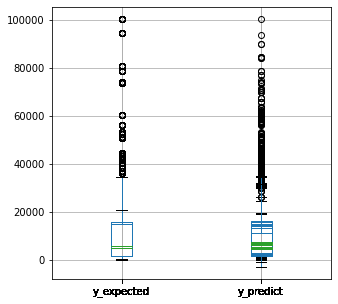

In [ ]:
d6_kfold()
run_model(RandomForestRegressor(n_estimators = 25, criterion = "mse", max_depth = None, min_samples_leaf = 1, random_state=0), X_train, y_train, X_val, y_val, 'RandomForestRegressor 1')
run_model(RandomForestRegressor(n_estimators = 25, criterion = "mse", max_depth = 15, min_samples_leaf = 1, random_state=0), X_train, y_train, X_val, y_val, 'RandomForestRegressor 2')
run_model(RandomForestRegressor(n_estimators = 250, criterion = "mse", max_depth = None, min_samples_leaf = 1, random_state=0), X_train, y_train, X_val, y_val, 'RandomForestRegressor 3')
run_model(RandomForestRegressor(n_estimators = 250, criterion = "mse", max_depth = 15, min_samples_leaf = 1, random_state=0), X_train, y_train, X_val, y_val, 'RandomForestRegressor 4')
run_model(KNeighborsRegressor(n_neighbors=10, weights="uniform", p=1, algorithm="brute"), X_train, y_train, X_val, y_val, 'KNeighborsRegressor 3')
run_model(KNeighborsRegressor(n_neighbors=10, weights="uniform", p=1, algorithm="kd_tree"), X_train, y_train, X_val, y_val, 'KNeighborsRegressor 3')
run_model(KNeighborsRegressor(n_neighbors=10, weights="uniform", p=1, algorithm="ball_tree"), X_train, y_train, X_val, y_val, 'KNeighborsRegressor 3')
run_model(KNeighborsRegressor(n_neighbors=5, weights="distance", p=1, algorithm="brute"), X_train, y_train, X_val, y_val, 'KNeighborsRegressor 3')
run_model(MLPRegressor(hidden_layer_sizes=(75), activation = "logistic", solver = "lbfgs", learning_rate = "adaptive", max_iter=1000, random_state=0), X_train, y_train, X_val, y_val, 'MLPRegressor 1')
run_model(MLPRegressor(hidden_layer_sizes=(75), activation = "logistic", solver = "lbfgs", learning_rate = "invscaling", max_iter=1000, random_state=0), X_train, y_train, X_val, y_val, 'MLPRegressor 1')
run_model(MLPRegressor(hidden_layer_sizes=(75), activation = "logistic", solver = "lbfgs", learning_rate = "constant", max_iter=1000, random_state=0), X_train, y_train, X_val, y_val, 'MLPRegressor 1')
run_model(MLPRegressor(hidden_layer_sizes=(100), activation = "logistic", solver = "lbfgs", learning_rate = "adaptive", max_iter=1000, random_state=0), X_train, y_train, X_val, y_val, 'MLPRegressor 1')



d9_kfold
0.9733970708009889 0.7319104965442893 2864.2496200385135 11050.537415202985 1663.9407494149689 4950.575886507931 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
0.9653679757197129 0.7313504481886117 3268.0227674503053 11062.073873041267 2112.068068615356 4970.224143967792 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'w

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



0.9457461475008572 0.6031826119802928 4090.3589948099516 13444.32000964051 2560.359182728635 8225.179319447047 {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 75, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


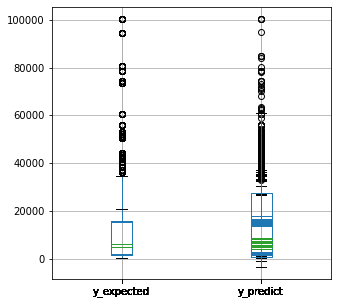

In [ ]:
d9_kfold()
run_model(RandomForestRegressor(n_estimators = 500, criterion = "mse", max_depth = 15, min_samples_leaf = 1, random_state=0), X_train, y_train, X_val, y_val, 'RandomForestRegressor 1')
run_model(RandomForestRegressor(n_estimators = 500, criterion = "mse", max_depth = 5, min_samples_leaf = 1, random_state=0), X_train, y_train, X_val, y_val, 'RandomForestRegressor 2')
run_model(RandomForestRegressor(n_estimators = 250, criterion = "mse", max_depth = 5, min_samples_leaf = 1, random_state=0), X_train, y_train, X_val, y_val, 'RandomForestRegressor 3')
run_model(RandomForestRegressor(n_estimators = 250, criterion = "mse", max_depth = 15, min_samples_leaf = 1, random_state=0), X_train, y_train, X_val, y_val, 'RandomForestRegressor 4')
run_model(KNeighborsRegressor(n_neighbors=10, weights="distance", p=1, algorithm="brute"), X_train, y_train, X_val, y_val, 'KNeighborsRegressor 3')
run_model(KNeighborsRegressor(n_neighbors=10, weights="distance", p=1, algorithm="kd_tree"), X_train, y_train, X_val, y_val, 'KNeighborsRegressor 3')
run_model(KNeighborsRegressor(n_neighbors=10, weights="distance", p=1, algorithm="ball_tree"), X_train, y_train, X_val, y_val, 'KNeighborsRegressor 3')
run_model(KNeighborsRegressor(n_neighbors=15, weights="distance", p=1, algorithm="brute"), X_train, y_train, X_val, y_val, 'KNeighborsRegressor 3')
run_model(MLPRegressor(hidden_layer_sizes=(75, 75), activation = "logistic", solver = "lbfgs", learning_rate = "adaptive", max_iter=1000, random_state=0), X_train, y_train, X_val, y_val, 'MLPRegressor 1')
run_model(MLPRegressor(hidden_layer_sizes=(75, 75), activation = "logistic", solver = "lbfgs", learning_rate = "invscaling", max_iter=1000, random_state=0), X_train, y_train, X_val, y_val, 'MLPRegressor 1')
run_model(MLPRegressor(hidden_layer_sizes=(75, 75), activation = "logistic", solver = "lbfgs", learning_rate = "constant", max_iter=1000, random_state=0), X_train, y_train, X_val, y_val, 'MLPRegressor 1')
run_model(MLPRegressor(hidden_layer_sizes=(75), activation = "logistic", solver = "lbfgs", learning_rate = "adaptive", max_iter=1000, random_state=0), X_train, y_train, X_val, y_val, 'MLPRegressor 1')

##### Resultados

> Agora parecem que estes modelos estão mais bem sucedidos em generalizar, uma vez que os modelos anteriores estavam alcançando 0.5 no conjunto de validação, agora está se alcançando 0.7. É preciso considerar que há a presença de mais elementos de treino no conjunto de testes. Porém, pode não ser o caso que essa melhor generalização tenha se dado apenas por isso. Um resultado melhor que 10^4 já pode ser considerado um avanço na predição.

#### Predições

> Novamente, serão testados os três modelos. Porém, a preferência será pelo RandomForestRegressor pela simplicidade, em seguida ao KNeighboorsRegressor e, por fim, ao MLPRegressor.

In [ ]:
d6_kfold()
predict_model = RandomForestRegressor(n_estimators = 250, criterion = "mse", max_depth = None, min_samples_leaf = 1, random_state=0).fit(X_train, y_train)
results = pd.DataFrame()
results = X_na.dropna()
results["y_predict"] = predict_model.predict(results)
results

d6_kfold


Individuals using the Internet (per 100 inhabitants)  ...  y_predict
71                                                21.0     ...  49535.148
75                                                73.0     ...  49535.148
86                                                73.0     ...  49535.148
129                                               48.0     ...  49535.148
153                                               52.0     ...  49535.148
234                                               89.0     ...  49535.148

[6 rows x 7 columns]

In [ ]:
d9_kfold()
predict_model = RandomForestRegressor(n_estimators = 500, criterion = "mse", max_depth = 15, min_samples_leaf = 1, random_state=0).fit(X_train, y_train)
results = pd.DataFrame()
results = X_na.dropna()
results["y_predict"] = predict_model.predict(results)
results

d9_kfold


Individuals using the Internet (per 100 inhabitants)  ...   y_predict
71                                                21.0     ...  51000.4666
75                                                73.0     ...  59339.1470
86                                                73.0     ...  50221.8974
129                                               48.0     ...  47095.8674
153                                               52.0     ...  48805.8138
234                                               89.0     ...  43667.9132

[6 rows x 10 columns]

In [ ]:
predict_model = KNeighborsRegressor(n_neighbors=10, weights="distance", p=1, algorithm="brute").fit(X_train, y_train)
results = pd.DataFrame()
results = X_na.dropna()
results["y_predict"] = predict_model.predict(results)
results

Individuals using the Internet (per 100 inhabitants)  ...     y_predict
71                                                21.0     ...  16233.581851
75                                                73.0     ...  16237.237956
86                                                73.0     ...  16237.904689
129                                               48.0     ...  16244.703242
153                                               52.0     ...  16242.806582
234                                               89.0     ...  16239.439796

[6 rows x 7 columns]

In [ ]:
d6_kfold()
predict_model = MLPRegressor(hidden_layer_sizes=(75), activation = "logistic", solver = "lbfgs", learning_rate = "adaptive", max_iter=1000, random_state=0).fit(X_train, y_train)
results = pd.DataFrame()
results = X_na.dropna()
results["y_predict"] = predict_model.predict(results)
results

d6_kfold


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Individuals using the Internet (per 100 inhabitants)  ...     y_predict
71                                                21.0     ...  88518.395276
75                                                73.0     ...  65742.893898
86                                                73.0     ...  68345.564447
129                                               48.0     ...  75559.428983
153                                               52.0     ...  70742.682871
234                                               89.0     ...  62947.762364

[6 rows x 7 columns]

In [ ]:
d6_kfold()
predict_model = MLPRegressor(hidden_layer_sizes=(100), activation = "logistic", solver = "lbfgs", learning_rate = "adaptive", max_iter=1000, random_state=0).fit(X_train, y_train)
results = pd.DataFrame()
results = X_na.dropna()
results["y_predict"] = predict_model.predict(results)
results

d6_kfold


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Individuals using the Internet (per 100 inhabitants)  ...     y_predict
71                                                21.0     ...  95625.073902
75                                                73.0     ...  82052.755018
86                                                73.0     ...  92517.386713
129                                               48.0     ...  93289.686309
153                                               52.0     ...  88780.975143
234                                               89.0     ...  65116.596475

[6 rows x 7 columns]

In [ ]:
d9_kfold()
predict_model = MLPRegressor(hidden_layer_sizes=(75, 75), activation = "logistic", solver = "lbfgs", learning_rate = "constant", max_iter=1000, random_state=0).fit(X_train, y_train)
results = pd.DataFrame()
results = X_na.dropna()
results["y_predict"] = predict_model.predict(results)
results

d9_kfold


Individuals using the Internet (per 100 inhabitants)  ...     y_predict
71                                                21.0     ...  44548.873706
75                                                73.0     ...  27125.680326
86                                                73.0     ...  44548.873706
129                                               48.0     ...  44548.873706
153                                               52.0     ...  27125.680326
234                                               89.0     ...  18659.593741

[6 rows x 10 columns]

In [ ]:
d9_kfold()
predict_model = MLPRegressor(hidden_layer_sizes=(75), activation = "logistic", solver = "lbfgs", learning_rate = "adaptive", max_iter=1000, random_state=0).fit(X_train, y_train)
results = pd.DataFrame()
results = X_na.dropna()
results["y_predict"] = predict_model.predict(results)
results

d9_kfold


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Individuals using the Internet (per 100 inhabitants)  ...     y_predict
71                                                21.0     ...  92542.433549
75                                                73.0     ...  59117.571318
86                                                73.0     ...  78574.245141
129                                               48.0     ...  82936.332375
153                                               52.0     ...  56802.372904
234                                               89.0     ...  60134.856800

[6 rows x 10 columns]

In [ ]:
country_profiles[country_profiles.index.isin(results.index)]['country']

70     Falkland Islands (Malvinas)
71                   Faroe Islands
75                   French Guiana
86                      Guadeloupe
129                     Martinique
153                           Niue
177      Saint Pierre and Miquelon
234      Wallis and Futuna Islands
Name: country, dtype: object

##### PIB per capita dos países acima
- Per capita 	US$ 55 400

- Per capita	\$61,325 (not ranked)

- Per capita	€15,270 (US$17,100)

- Per capita	€19,810 (US$25,479)

- Per capita	€23,900

- Per capita 	US$ 28.000

- Não encontrado

- Per capita 	US\$ 3 800

(fonte wikipédia)

##### Conclusão

> Exceto a primeira predição, todas as demais variaram, além do MLPRegressor está dando estimativas mais realistas, diferenciando-se dos primeiros modelos. Isto significa que o modelo pode estar generalizando um pouco melhor. Porém, os resultados não demonstraram-se satisfatório. Talvez seja mais necessário mais conhecimento acerca do domínio do problema para verificar se essas colunas realmente contém informações acerca do PIB per capita e/ou verificar se os dados das tabelas estão satisfatórios.